## 작업표준+표준위험+위험벡터 데이터 프레임

In [1]:
import pandas as pd
from tqdm import tqdm
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from konlpy.tag import Mecab
mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")

In [127]:
stop_word = "전 난 일 걸 뭐 줄 만 건 작업 분 위 개 끝 송 잼 이거 부 동 번 중 듯 차 때 게 내 말 나 수 거 점 것 등 측 의 급 후 간 단 시 곳 에 인 조"
stop_word = stop_word.split(' ')

In [128]:
df = pd.read_excel('./data/working_standard.xlsx')
df

작업표준       단위작업                             작업행동  \
0     [선실생산_선실_목의장] 선행화기(Door)      작업 준비             도어 포장 제거 (도어 데미지 주의)   
1     [선실생산_선실_목의장] 선행화기(Door)      작업 준비                     운반전 설치 위치 점검   
2     [선실생산_선실_목의장] 선행화기(Door)  자재 정위치 이동        도어와 도어 프레임 분리 (도어 데미지 주의)   
3     [선실생산_선실_목의장] 선행화기(Door)  자재 정위치 이동  2인1조로 도어를 설치 위치로 운반 (도어 데미지 주의)   
4     [선실생산_선실_목의장] 선행화기(Door)   도어 화기 작업                도어 오프닝에 도어 프레임 삽입   
...                        ...        ...                              ...   
7758   [기능_입출고_입출고] 내자재 입출고 작업      자재 하차           지게차 및 천정크레인 활용하여 자재 하차   
7759   [기능_입출고_입출고] 내자재 입출고 작업      자재 적치                       Bin에 자재 적치   
7760   [기능_입출고_입출고] 내자재 입출고 작업      자재 선별   Pallet Car 활용하여 Lighting 선별 작업   
7761   [기능_입출고_입출고] 내자재 입출고 작업      자재 선별   Pallet Car 활용하여 Lighting 선별 작업   
7762   [기능_입출고_입출고] 내자재 입출고 작업      자재 출고           지게차 및 천정크레인 활용하여 자재 출고   

                                 체크정보  
0                                 NaN  
1      각종 의장품의 돌출부 확인하고 안전에 문제 없는지 점검  
2                                 NaN  
3                                 NaN  
4     오프닝 곡직 여부 확인, 도어 프레임 수평 및 수직 확인  
...                               ...  
7758     하차전 팔레트 위 자재 상태 확인, 고박 상태 확인  
7759         20kg 초과 자재 취급시 2인 1조로 작업  
7760        Pallet Car로 자재 이동 시 후진 주행  
7761         20kg 초과 자재 취급시 2인 1조로 작업  
7762            상차된 자재는 출발 전 고박상태 재확인  

[7763 rows x 4 columns]

In [129]:
df_act = df['작업행동']

## 영어 단어 추출

In [146]:
eng_results = []
for sentence in tqdm(df_act):
    sentence = str(sentence)
    result = []
#     tokenizer = RegexpTokenizer("[\w]+")
    tokenizer = RegexpTokenizer("[^가-힣0-9]+")
    tokens = tokenizer.tokenize(sentence)
    for token in tokens:
        token = token.upper().strip().strip("(").strip(")").strip("/").strip("±").strip("mm").strip("?").strip("-").strip(".").strip(",")
        if token not in stop_word and token != '':
            result.append(token)
    eng_results.append(result)

100%|████████████████████████████████████████████████████████████████████| 7763/7763 [00:00<00:00, 41878.09it/s]


In [147]:
len(eng_results)

7763

## 한글 형태소 추출

In [148]:
kor_results = []
for sentence in tqdm(df_act):
    sentence = str(sentence)
    result = []
    for noun in mecab.nouns(sentence):
        if noun not in stop_word:
            result.append(noun)
    targets.append(sentence)
    kor_results.append(result)

100%|████████████████████████████████████████████████████████████████████| 7763/7763 [00:00<00:00, 14963.38it/s]


In [149]:
len(kor_results)

7763

### 한글-영문 키워드 통합

In [150]:
keywords = []
for i in range(len(kor_results)):
    keywords.append(eng_results[i]+kor_results[i])    

In [151]:
keywords

[['도어', '포장', '제거', '도어', '데미지', '주의'],
 ['운반', '설치', '위치', '점검'],
 ['도어', '도어', '프레임', '분리', '도어', '데미지', '주의'],
 ['도어', '설치', '위치', '운반', '도어', '데미지', '주의'],
 ['도어', '오프닝', '프레임', '삽입'],
 ['도어', '프레임', '용접'],
 ['용접', '부위', '그라인더', '실시'],
 ['도어', '프레임', '도어', '설치'],
 ['작업장', '주변', '정리정돈', '실시'],
 ['유티', '탑재', '위치', '룸', '넘버', '마킹'],
 ['유티', '탑재', '지그', '사용', '정위치', '탑재'],
 ['유티', '포장', '제거'],
 ['유티', '정위치', '셋팅'],
 ['용접', '실시'],
 ['작업장', '주변', '정리정돈', '실시'],
 ['작업장', '정리', '방화수', '위치', '확인', '통행로', '확보'],
 ['코밍', '분류', '커팅'],
 ['TACK', '코밍', '용접'],
 ['코밍', '정식', '용접'],
 ['그라인더', '징크', '도포'],
 ['작업장', '주변', '정리정돈', '실시'],
 ['자재', '탑재', '운반'],
 ['자재', '분류', '커팅'],
 ['TACK', '찬넬', '용접'],
 ['찬넬', '정식', '용접'],
 ['그라인더', '징크', '도포'],
 ['작업장', '주변', '정리정돈', '실시'],
 ['DS', '도면', '구역', '확인'],
 ['DS', 'STEEL PLATE', '테이프', '부착'],
 ['작업장', '주변', '정리정돈', '실시'],
 ['자재', '분류', '운반', '근태', '판넬'],
 ['근태', '설치'],
 ['근태', '설치'],
 ['LIGHTING', '도면', '위치', '확인', '설치'],
 ['WALL PANEL', '설치'],
 ['SPLINE', 

### 데이터프레임에 통합

In [152]:
df['keyword'] = keywords

In [167]:
df['keyword'][:10]

0         [도어, 포장, 제거, 도어, 데미지, 주의]
1                  [운반, 설치, 위치, 점검]
2    [도어, 도어, 프레임, 분리, 도어, 데미지, 주의]
3     [도어, 설치, 위치, 운반, 도어, 데미지, 주의]
4                [도어, 오프닝, 프레임, 삽입]
5                     [도어, 프레임, 용접]
6                [용접, 부위, 그라인더, 실시]
7                 [도어, 프레임, 도어, 설치]
8               [작업장, 주변, 정리정돈, 실시]
9           [유티, 탑재, 위치, 룸, 넘버, 마킹]
Name: keyword, dtype: object

## 표준위험 매칭

In [202]:
risks = pd.read_excel("./data/표준 위험요인.xlsx")
risks

id   위험요인            키워드  R_vector
0  위_1  위험요인1      크레인, 슬링벨트       NaN
1  위_2  위험요인2   용접, 슬래그, 용접기       NaN
2  위_3  위험요인3            지게차       NaN
3  위_4  위험요인4             도어       NaN
4  위_5  위험요인5             포장       NaN
5  위_6  위험요인6            사다리       NaN
6  위_7  위험요인7       취부, 그라인더       NaN
7  위_8  위험요인8   캐리지, 취부, 사다리       NaN
8  위_9  위험요인9    작업대, 피스, 취부       NaN

In [203]:
total_basket = []
for n, words in enumerate(df['keyword']):
    basket = []
    for word in words:    
        
        for p, risk in enumerate(risks['키워드']):
            risk = str(risk).split(",")   # 키워드 그룹도 하나씩 불러서 리스트로 변환
            compare = []     # 전처리된 키워드를 담을 리스트
            for a in risk:
                a = a.strip(" ")   # 혹시 있을 공란 제거후
                compare.append(a) 
    #            print(compare)

            if word in compare:
                if risks['id'][p] not in basket:
                    basket.append(risks['id'][p])
    #                 print(basket)
                else:
                    pass

    total_basket.append(basket)
            

In [206]:
len(total_basket)

7763

In [207]:
df["위험_id"] = total_basket

In [208]:
df

작업표준       단위작업                             작업행동  \
0     [선실생산_선실_목의장] 선행화기(Door)      작업 준비             도어 포장 제거 (도어 데미지 주의)   
1     [선실생산_선실_목의장] 선행화기(Door)      작업 준비                     운반전 설치 위치 점검   
2     [선실생산_선실_목의장] 선행화기(Door)  자재 정위치 이동        도어와 도어 프레임 분리 (도어 데미지 주의)   
3     [선실생산_선실_목의장] 선행화기(Door)  자재 정위치 이동  2인1조로 도어를 설치 위치로 운반 (도어 데미지 주의)   
4     [선실생산_선실_목의장] 선행화기(Door)   도어 화기 작업                도어 오프닝에 도어 프레임 삽입   
...                        ...        ...                              ...   
7758   [기능_입출고_입출고] 내자재 입출고 작업      자재 하차           지게차 및 천정크레인 활용하여 자재 하차   
7759   [기능_입출고_입출고] 내자재 입출고 작업      자재 적치                       Bin에 자재 적치   
7760   [기능_입출고_입출고] 내자재 입출고 작업      자재 선별   Pallet Car 활용하여 Lighting 선별 작업   
7761   [기능_입출고_입출고] 내자재 입출고 작업      자재 선별   Pallet Car 활용하여 Lighting 선별 작업   
7762   [기능_입출고_입출고] 내자재 입출고 작업      자재 출고           지게차 및 천정크레인 활용하여 자재 출고   

                                 체크정보                         keyword  \
0                                 NaN       [도어, 포장, 제거, 도어, 데미지, 주의]   
1      각종 의장품의 돌출부 확인하고 안전에 문제 없는지 점검                [운반, 설치, 위치, 점검]   
2                                 NaN  [도어, 도어, 프레임, 분리, 도어, 데미지, 주의]   
3                                 NaN   [도어, 설치, 위치, 운반, 도어, 데미지, 주의]   
4     오프닝 곡직 여부 확인, 도어 프레임 수평 및 수직 확인              [도어, 오프닝, 프레임, 삽입]   
...                               ...                             ...   
7758     하차전 팔레트 위 자재 상태 확인, 고박 상태 확인      [지게차, 천정, 크레인, 활용, 자재, 하차]   
7759         20kg 초과 자재 취급시 2인 1조로 작업                   [BIN, 자재, 적치]   
7760        Pallet Car로 자재 이동 시 후진 주행  [PALLET CAR, LIGHTING, 활용, 선별]   
7761         20kg 초과 자재 취급시 2인 1조로 작업  [PALLET CAR, LIGHTING, 활용, 선별]   
7762            상차된 자재는 출발 전 고박상태 재확인      [지게차, 천정, 크레인, 활용, 자재, 출고]   

           위험_id  
0     [위_4, 위_5]  
1             []  
2          [위_4]  
3          [위_4]  
4          [위_4]  
...          ...  
7758  [위_3, 위_1]  
7759          []  
7760          []  
7761          []  
7762  [위_3, 위_1]  

[7763 rows x 6 columns]

## 위험 벡터 매칭

In [234]:
vectors = pd.read_excel("./data/위험벡터.xlsx")
vectors.T

0     1   2    3    4    5     6    7   8   9    10   11  12  13  14
키워드   크레인  슬링벨트  용접  슬래그  지게차  사다리  그라인더  캐리지  취부  피스  작업대  용접기  절단  도장  도어
위험지수    5     5   4    2    3    1     4    2   4   2    2  3.5   3   3   1

In [242]:
points = []
for words in df['keyword']:
    point = 0
    for word in words:

        if word in list(vectors['키워드']):
            point += float(vectors.loc[vectors['키워드'] == word, '위험지수'])
        else:
            point += 0
        
    points.append(point)

In [243]:
len(points)

7763

In [244]:
df['R_vector'] = points

In [278]:
df.to_excel('./result/mother_file.xlsx')

### 작업표준별 위험 벡터의 합 구하기

In [300]:
dff = df.groupby("작업표준", as_index=False)['R_vector'].sum()

In [301]:
len(dff['작업표준'])

597

In [286]:
dff.loc[dff["R_vector"]>50,["작업표준","R_vector"]]

작업표준  R_vector
157                            [기능_용접_선각용접] EGW 용접(건조)     176.0
160                         [기능_용접_선각용접] HEBE SAW 자동용접      95.5
195                          [선실생산_선각_선실건조] 후PE2 취부/용접      63.5
500  [의장생산_Pipe류_SUS Pipe PCS/Pump Tower] Pump Towe...      83.0
501  [의장생산_Pipe류_SUS Pipe PCS/Pump Tower] Pump Towe...     114.0
518                            [의장생산_철의장_철의장1] 철의장품 제작     371.0

## 시각화

In [254]:
import dash
import dash_html_components as html
import dash_core_components as dcc
import plotly.graph_objs as go

In [255]:
app = dash.Dash()

In [293]:
app.layout = html.Div([
    
    dcc.Graph(
        id = 'bar_chart',
        figure = {
            'data':[
                go.Bar(
                    x = dff['작업표준'],
                    y = dff['R_vector'],
                    #mode='markers'
                )
            ],
            'layout':go.Layout(
                title="test",
                xaxis={'title':'Working Standard'},
                yaxis={'title':'Risk Vector(SUM)'}
            )
        }

    )
])

In [294]:
if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


In [295]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator
import numpy as np
import pandas as pd
import json
from urllib.request import urlopen

In [299]:
fig = go.Figure()

fig.add_trace(go.Bar(x=dff['작업표준'], y=dff['R_vector']))
fig.update_layout()
fig.show()
fig.write_html("./result/test1.html")

## Wordcloud

In [328]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt

In [329]:
import matplotlib.font_manager as fm
fontpath = './font/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family="NanumGothic")
mpl.font_manager._rebuild()

In [330]:
df['keyword'][0]

['도어', '포장', '제거', '도어', '데미지', '주의']

[LNG공사_MEMB._MEMB.  S/OPENING 보온]  CARGO TANK MEMB. S/OPENING 보온
[LNG공사_MEMB._MEMB. MARKING]  CARGO TANK MEMB. MARKING
[LNG공사_MEMB._MEMB. PANEL보온]  CARGO TANK MEMB. PANEL보온 I/P 설치
[LNG공사_MEMB._MEMB. PANEL보온]  CARGO TANK MEMB. PANEL보온 TPX/TBP 설치
[LNG공사_MEMB._MEMB. 설치]  CARGO TANK MEMB. 설치 MEMB. FIT-UP
[LNG공사_MEMB._MEMB. 설치]  CARGO TANK MEMB. 설치 MEMB. 용접
[LNG공사_MEMB._MEMB. 의장설치]  CARGO TANK MEMB.의장설치 G/DOME 
[LNG공사_MEMB._MEMB. 의장설치]  CARGO TANK MEMB.의장설치 N2 PIPE 
[LNG공사_MEMB._MEMB. 의장설치]  CARGO TANK MEMB.의장설치 NH3 PIPE 
[LNG공사_MEMB._MEMB. 의장설치]  CARGO TANK MEMB.의장설치 P/TOWER 
[LNG공사_MEMB._MEMB. 의장설치]  CARGO TANK MEMB.의장설치 SENSOR 
[LNG공사_MEMB._MEMB. 의장설치]  CARGO TANK MEMB.의장설치 SPRAY LINE 
[LNG공사_MEMB._MEMB. 테스트]  CARGO TANK TIGHTNESS TEST
[LNG공사_Truss_Truss 조립/탑재/설치/해체] LNG Truss 설치
[LNG공사_Truss_Truss 조립/탑재/설치/해체] LNG Truss 조립
[LNG공사_Truss_Truss 조립/탑재/설치/해체] LNG Truss 탑재
[LNG공사_Truss_Truss 조립/탑재/설치/해체] LNG Truss 해체
[건조_반목_반목] 반목 설치
[건조_선각_건조철의장] 일반철의장
[건조_선각_검사] Tank Air Test
[건조_선각_검사] Tan

c:\my_develop\nlp_prac\venv\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



[건조_선각_대형철의장] 대형철의장(라싱브릿지)
[건조_선각_대형철의장] 대형철의장(해치카바)
[건조_선각_대형철의장] 대형철의장(홀드)
[건조_선각_취부용접] DOCK 취부용접
[건조_선각_취부용접] 외판 Draft Mark 시공
[건조_선각_취부용접] 후PE2 취부용접
[건조_선각_탑재] DOCK 철목
[건조_선각_탑재] 후PE 철목
[공사지원_고소차_고소차] 고소장비 라디에이터 교환
[공사지원_고소차_고소차] 고소장비 밧데리 교환
[공사지원_고소차_고소차] 고소장비 붐 스윙 모터 탈 부착 작업
[공사지원_고소차_고소차] 고소장비 붐 트랙 가이드 정비
[공사지원_고소차_고소차] 고소장비 시동모터, 제네레이터  (탈, 부착) 작업
[공사지원_고소차_고소차] 고소장비 안전 운전
[공사지원_고소차_고소차] 고소장비 연료주입 요령
[공사지원_고소차_고소차] 고소장비 예방정비 
[공사지원_고소차_고소차] 고소장비 유압펌프 교체 탈/부착 작업
[공사지원_고소차_고소차] 고소장비 점검 및 조작점검
[공사지원_고소차_고소차] 고소차 관리(도크 및 PE장)
[공사지원_고소차_고소차] 고소차 붐 실린더 분해수리 작업
[공사지원_고소차_고소차] 고소차 붐 와이어 점검/조정 작업
[공사지원_고소차_고소차] 고소차 이동(Dock 및 호선 내,외부)
[공사지원_고소차_고소차] 고소차 타이어 교환 작업
[공사지원_고소차_고소차] 리미트 스위치 교환
[공사지원_고소차_고소차] 마이티 카 크레인 작업 방법
[공사지원_블록입출고_블록입출고] 블록 입/출고 작업
[공사지원_유틸리티_유틸리티] BALLASTING 작업
[공사지원_유틸리티_유틸리티] D/W 지원 작업
[공사지원_유틸리티_유틸리티] DEBALLASTING 작업
[공사지원_유틸리티_유틸리티] SHORE POWER(S/P) CABLE 설치 및 철거
[공사지원_유틸리티_유틸리티] STRENGTH TEST 지원
[공사지원_유틸리티_유틸리티] U/T, S/P 철거 및 설치
[공사지원_유틸리티_유틸리티] 비상 설비 설치 및 철거
[공사지원

[시운전_작동_기관]  STEAM TRACING LINE CHECK
[시운전_작동_기관]  T/GEN. 운전(터빈 제너레이터)
[시운전_작동_기관]  TANK SOUNDING 작업
[시운전_작동_기관]  VACUUM UNIT
[시운전_작동_기관]  VALVES OPERATION
[시운전_작동_기관]  명명식
[시운전_작동_기관]  작업장 이동
[시운전_작동_기관] AIR SYSTEM 운전 및 검사
[시운전_작동_기관] BOILER 운전
[시운전_작동_기관] BUNKERING
[시운전_작동_기관] D/G 운전
[시운전_작동_기관] DOMESTIC FRESH WATER SYSTEM 운전
[시운전_작동_기관] F.O SYSTEM AIR BLOWING 참관
[시운전_작동_기관] LAY-UP 관리
[시운전_작동_기관] PUMP 운전
[시운전_작동_기관] STEAM BLOWING
[시운전_작동_기관] WATER FILLING
[시운전_작동_기관] 공구 BOX 탑재 및 하선
[시운전_작동_기관] 기관실 SYSTEM CHECK
[시운전_작동_기관] 유지보수 관리
[시운전_작동_기관] 잡유 CAN 및 CHEMICAL 탑재
[시운전_작동_기관] 조수기 운전 및 검사
[시운전_작동_기관] 해상 시운전(가스선)
[시운전_작동_기관] 해상 시운전(일반)
[시운전_작동_선장] AUS
[시운전_작동_선장] Anchor chain 탑재
[시운전_작동_선장] Anchoring test
[시운전_작동_선장] Anti-heeling system
[시운전_작동_선장] BWTS(Ballast water treatment system)
[시운전_작동_선장] Bilge suction system
[시운전_작동_선장] Bilge suction system(COSP 사용)
[시운전_작동_선장] Bilge suction system(IS bilge well)
[시운전_작동_선장] Bow loading system
[시운전_작동_선장] Bow thruster
[시운전_작동_선장] Cargo oil pump


[의장생산_도장_도장] 블라스팅
[의장생산_도장_도장] 스프레이
[의장생산_철의장_철의장1] 철의장품 제작
[의장생산_철의장_철의장2] H/cover fitting류 절단
[의장생산_철의장_철의장2] H/cover fitting류 제작
[의장생산_철의장_철의장2] Moudule unit 절단
[의장생산_철의장_철의장2] Moudule unit 제작
[의장생산_철의장_철의장2] 러그 절단
[의장생산_철의장_철의장2] 러그 제작
[후행도장_도장_도장] 가네트 블라스팅
[후행도장_도장_도장] 소지
[후행도장_도장_도장] 스프레이
[후행도장_도장_도장] 청수 세척(워싱)
[후행도장_도장_도장] 탱크 도장 착수전 점검
[후행도장_도장_도장] 터치업
[후행의장_CHS_검사] CARGO LINE N2 TEST
[후행의장_CHS_검사] SMR LEAK TEST
[후행의장_CHS_검사] 시운전부 LN2 TEST
[후행의장_CHS_배관] CARGO BELLOWS 설치
[후행의장_CHS_배관] GAS DOME 의장 작업
[후행의장_CHS_배관] LIQUID DOME 의장 작업
[후행의장_CHS_장비&UNIT] SMR SKID 설치
[후행의장_도장_도장] 소지
[후행의장_도장_도장] 스프레이
[후행의장_도장_도장] 전로도장
[후행의장_도장_도장] 청수 세척(워싱)
[후행의장_도장_도장] 탱크 도장 착수전 점검
[후행의장_도장_도장] 터치업
[후행의장_의장_검사] 배관 검사_PIPING HYD. TEST (Oil)
[후행의장_의장_검사] 배관 검사_PIPING HYD. TEST (Pneumatic)
[후행의장_의장_검사] 배관 검사_PIPING HYD. TEST (Water)
[후행의장_의장_검사] 철의장 검사_ACC./PILOT SLANT LADDER TEST
[후행의장_의장_검사] 철의장 검사_DAVIT & CRANE Test
[후행의장_의장_검사] 철의장 검사_DOOR & HATCH  CHALK & HOSE TEST
[후행의장_의장_검사] 철의장 검사_FAN & DAMPER O

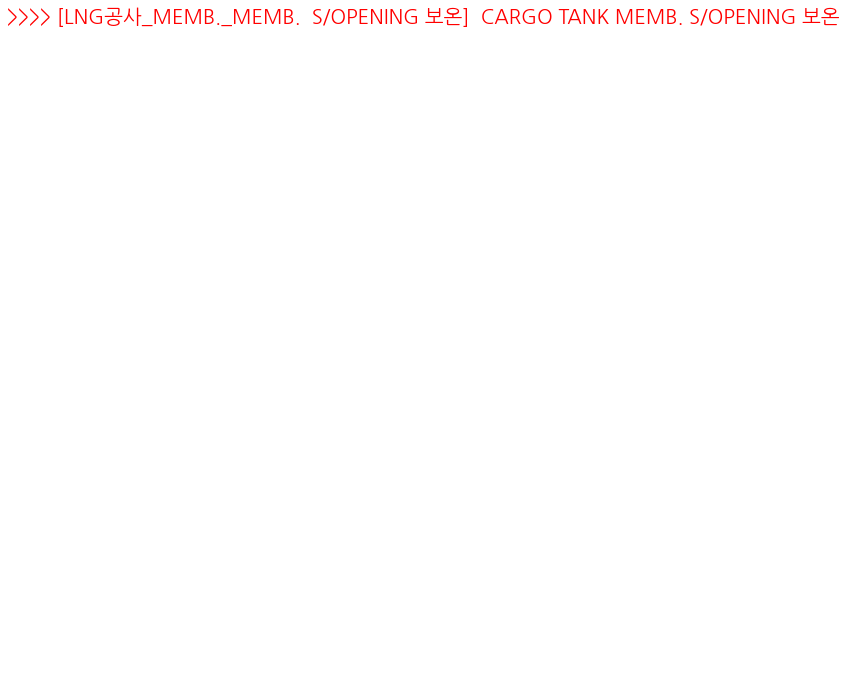

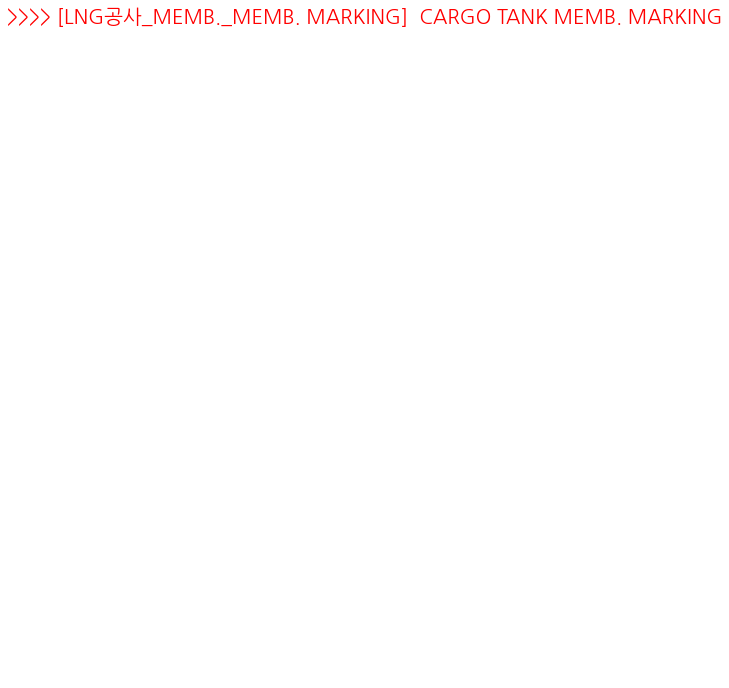

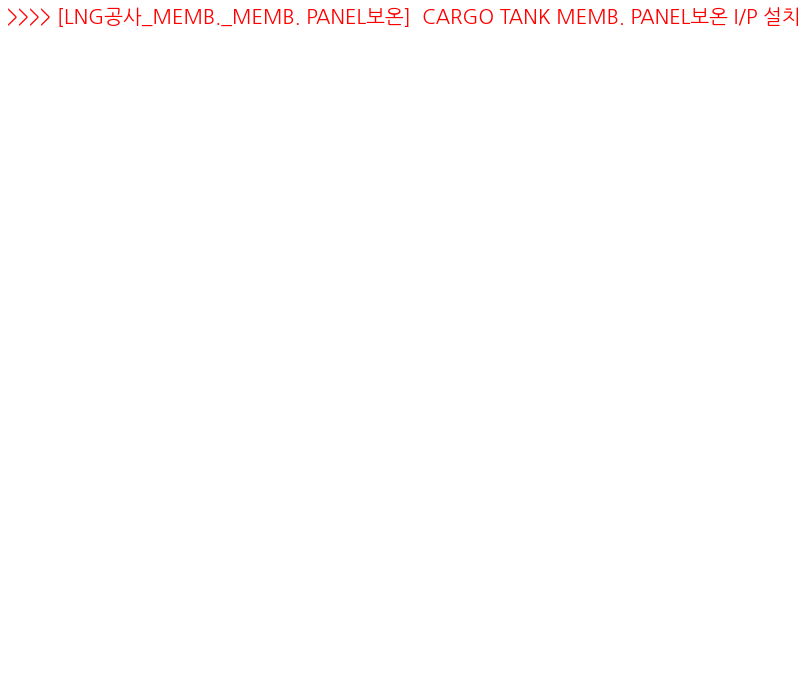

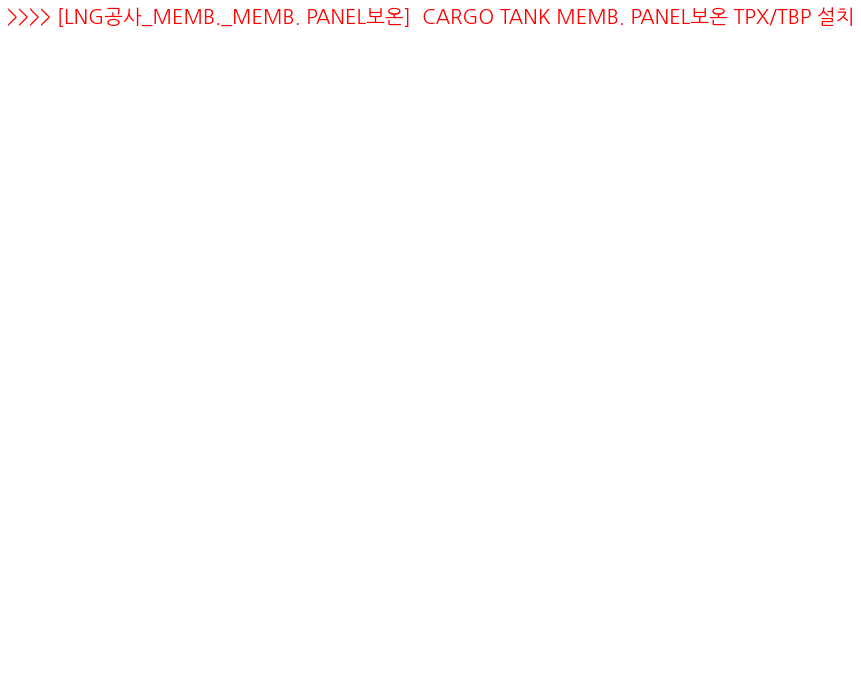

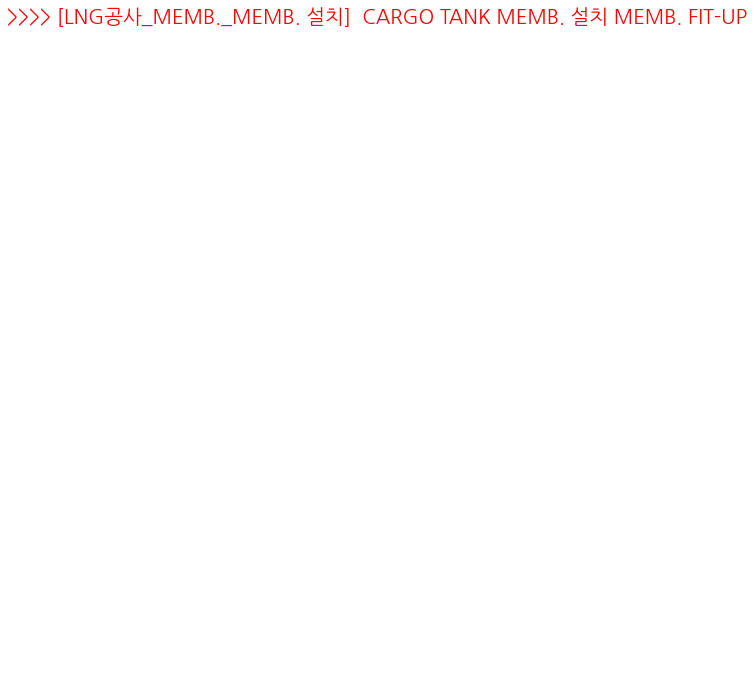

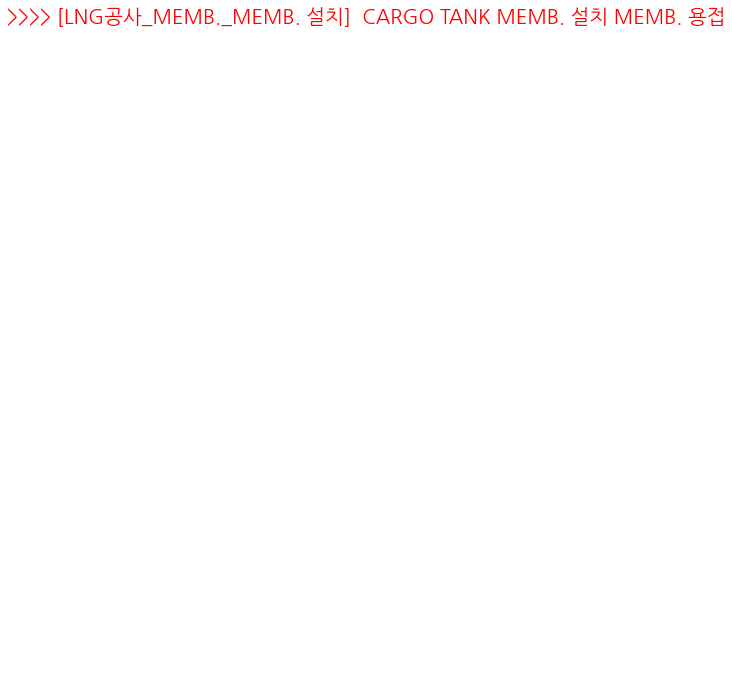

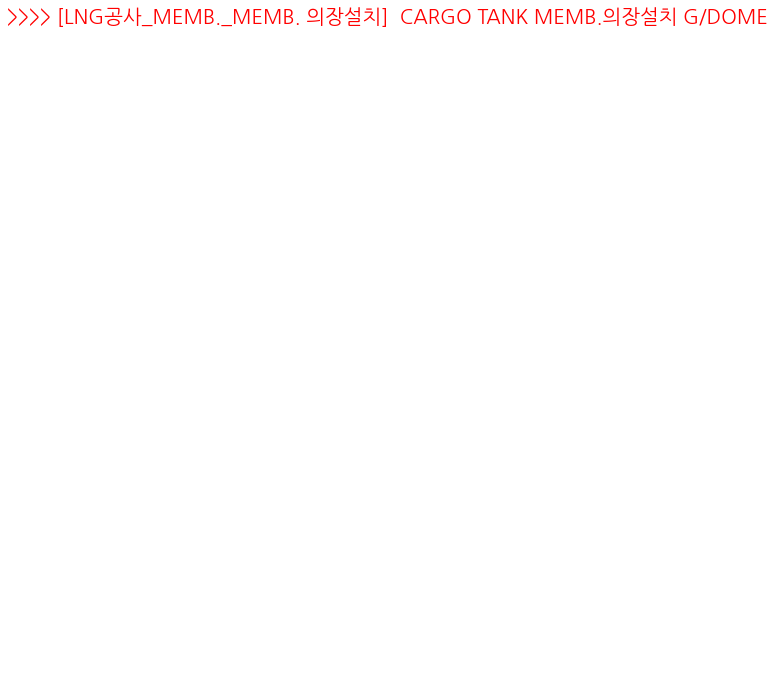

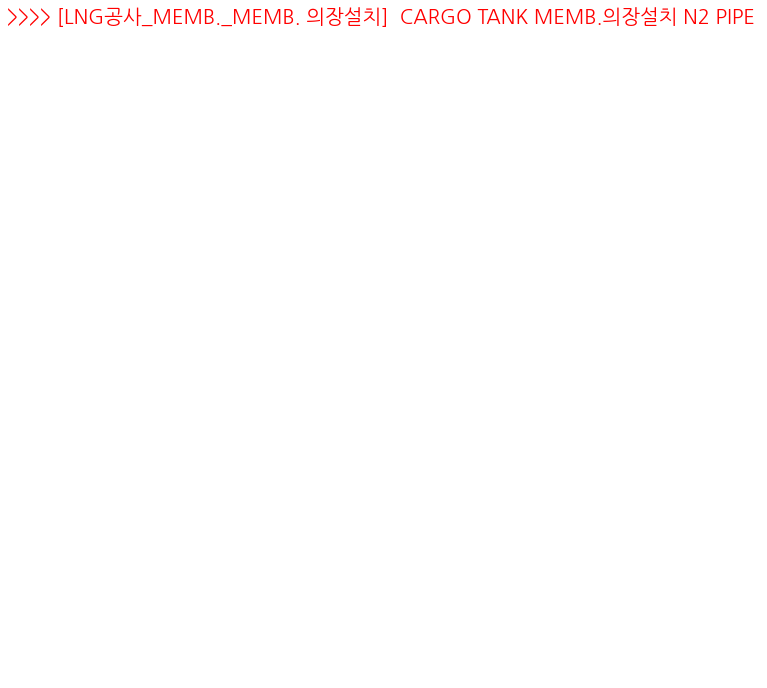

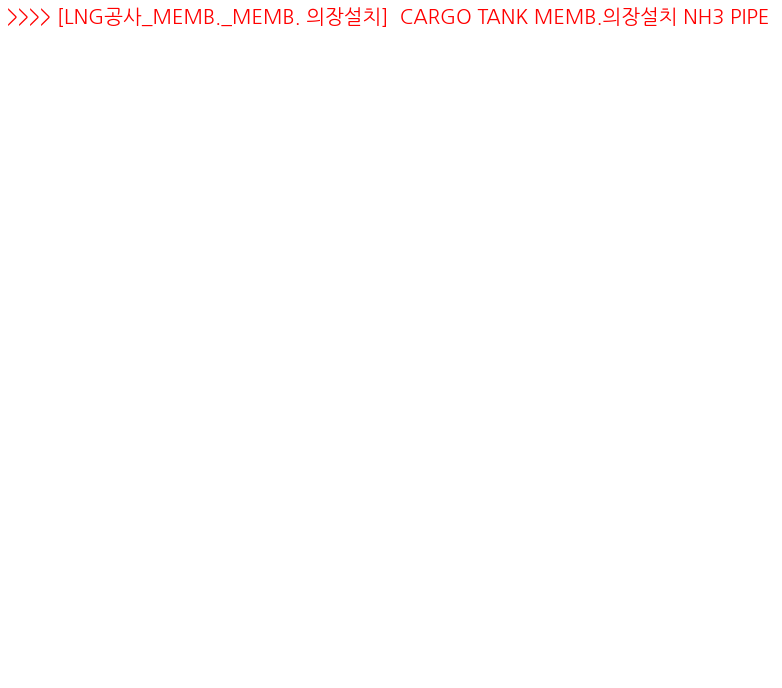

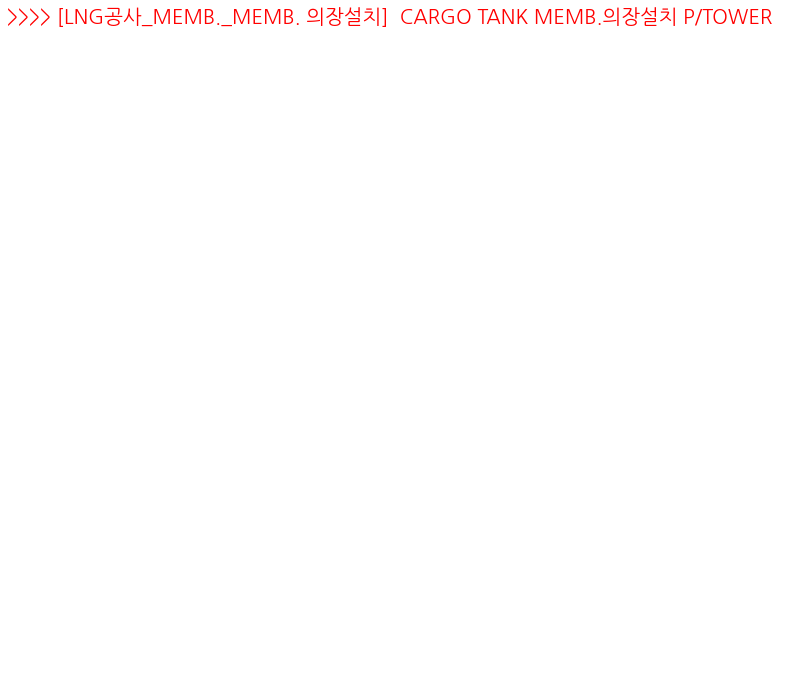

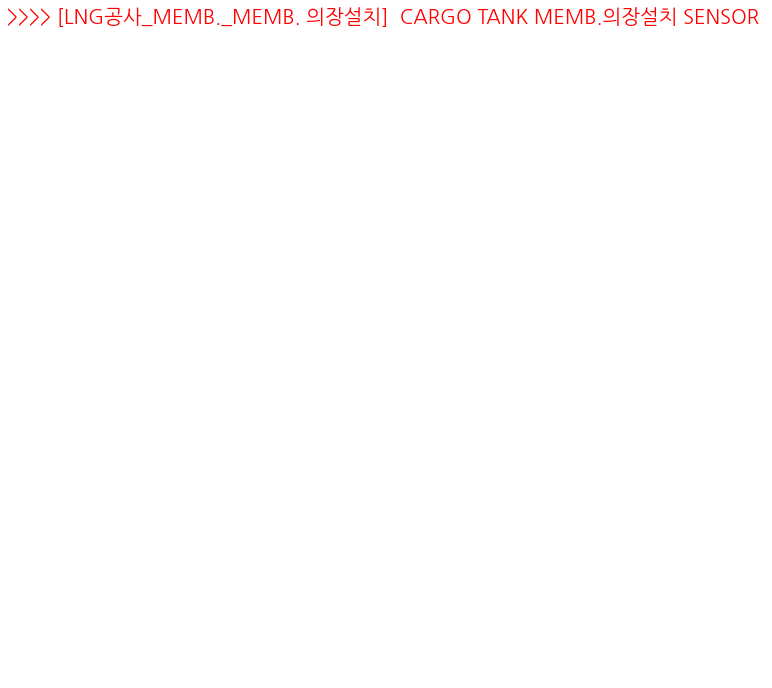

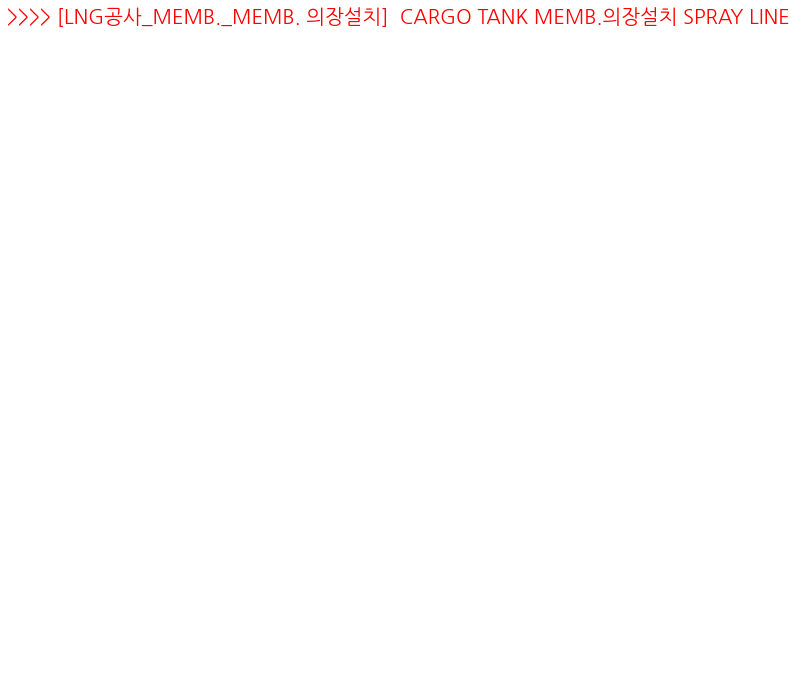

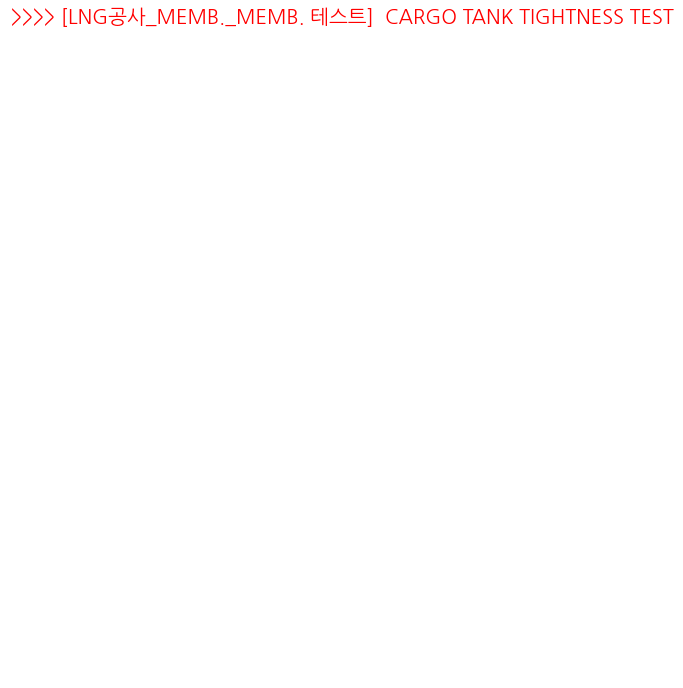

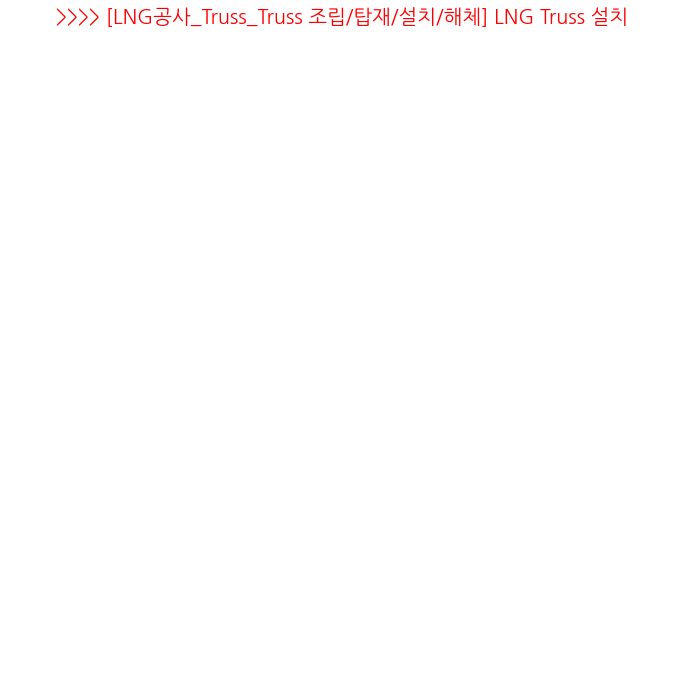

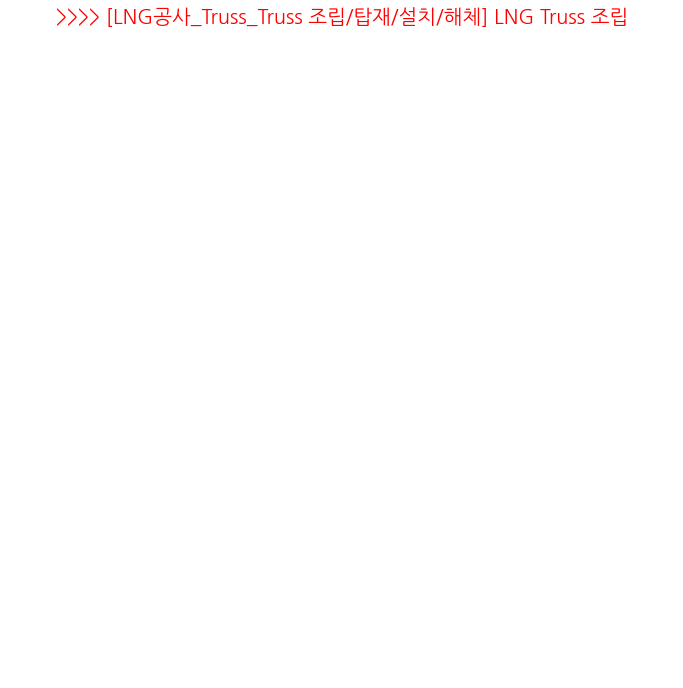

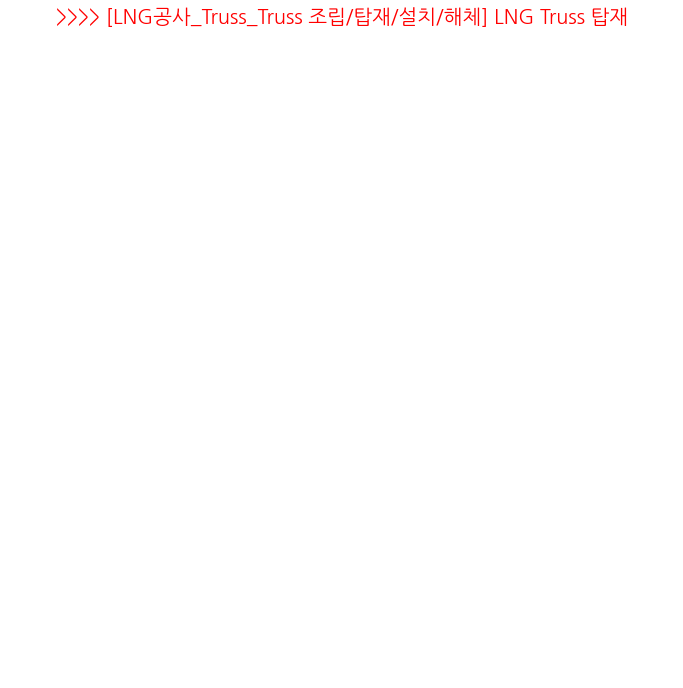

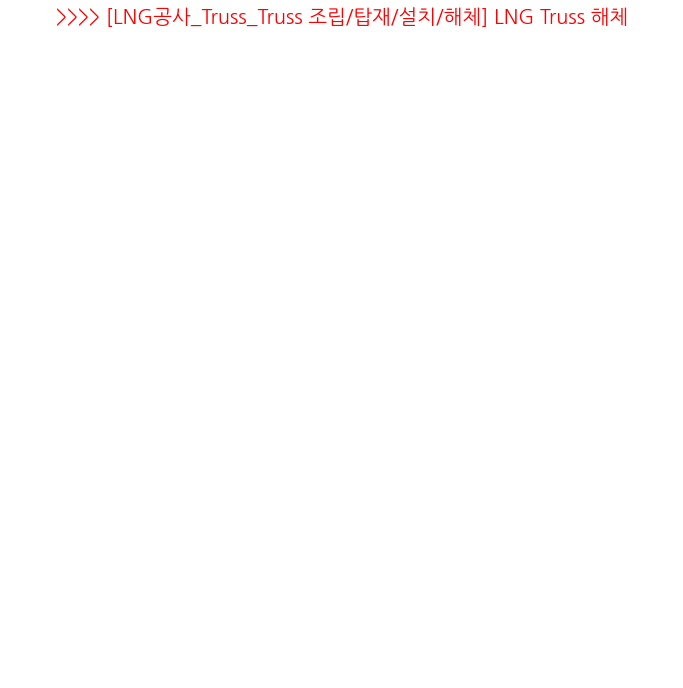

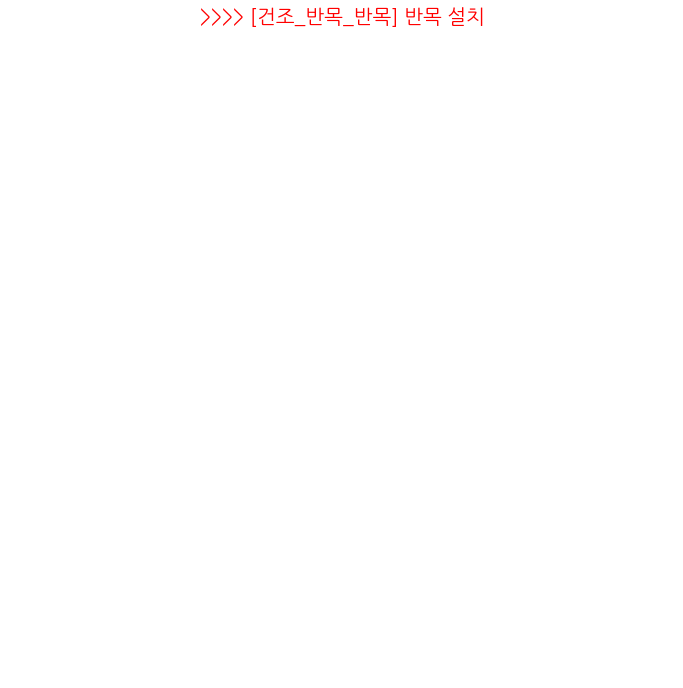

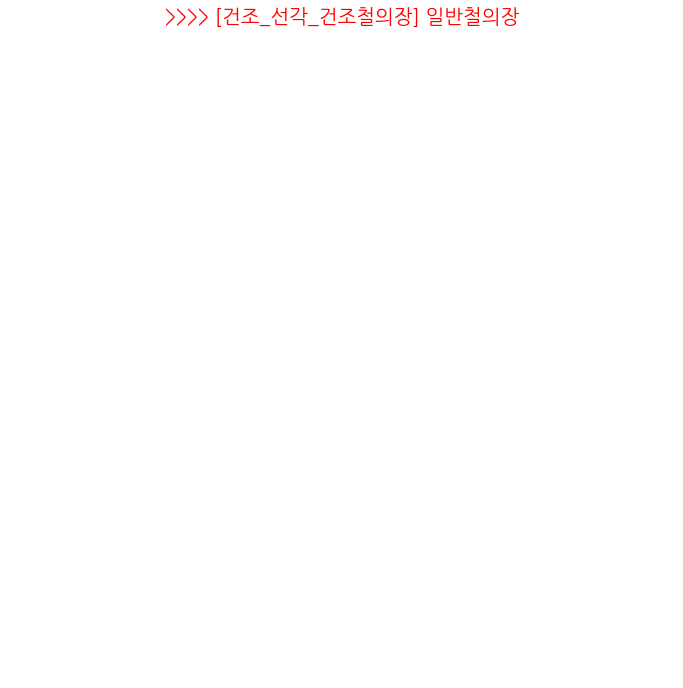

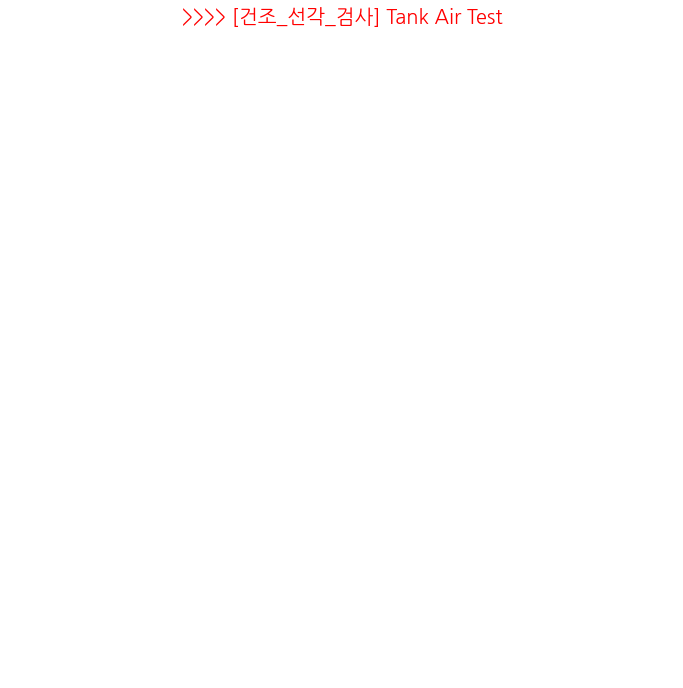

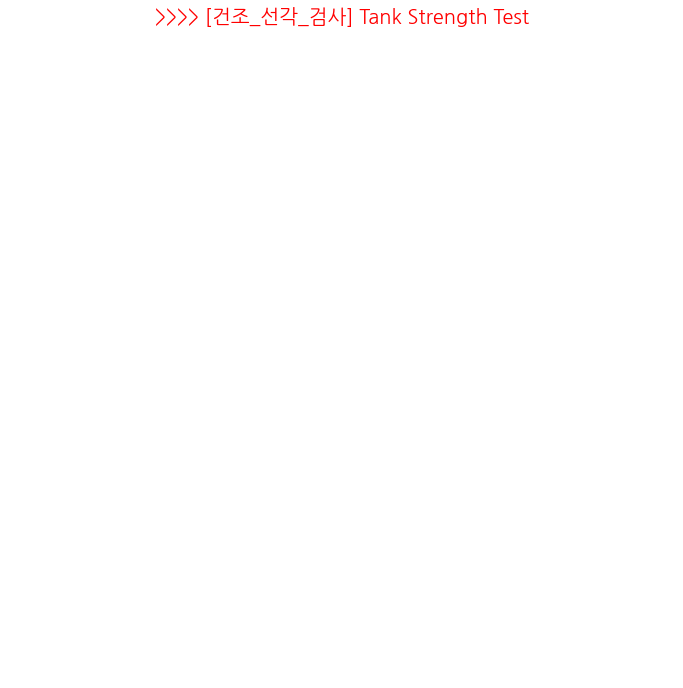

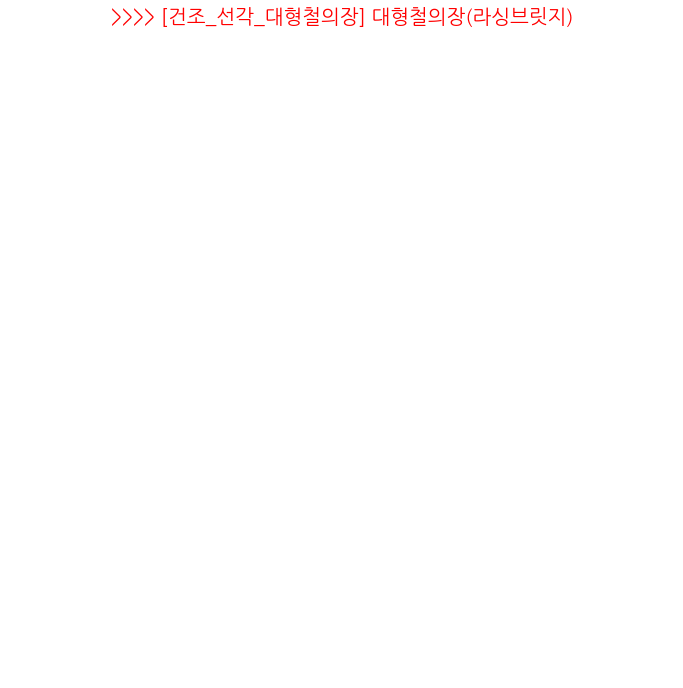

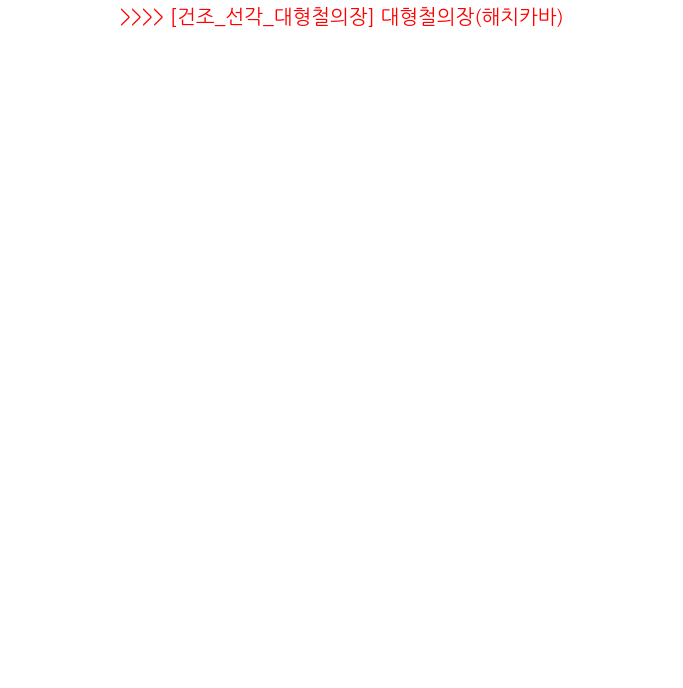

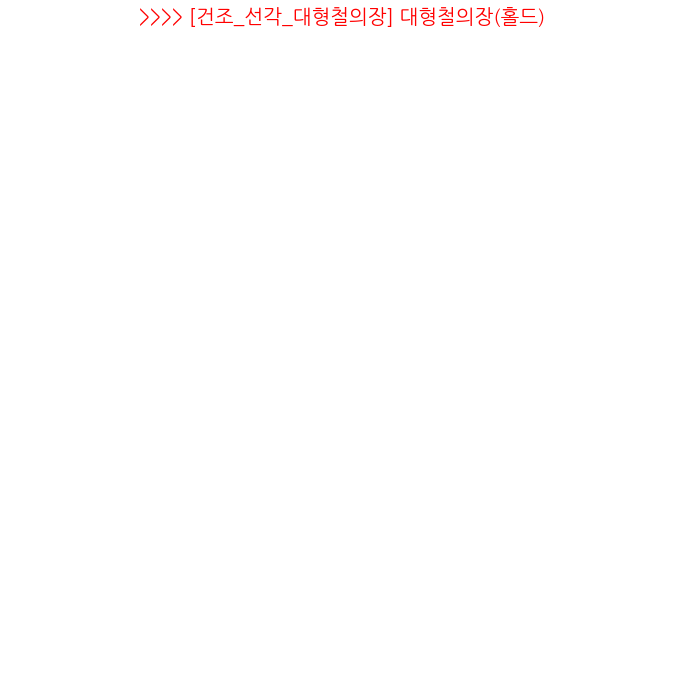

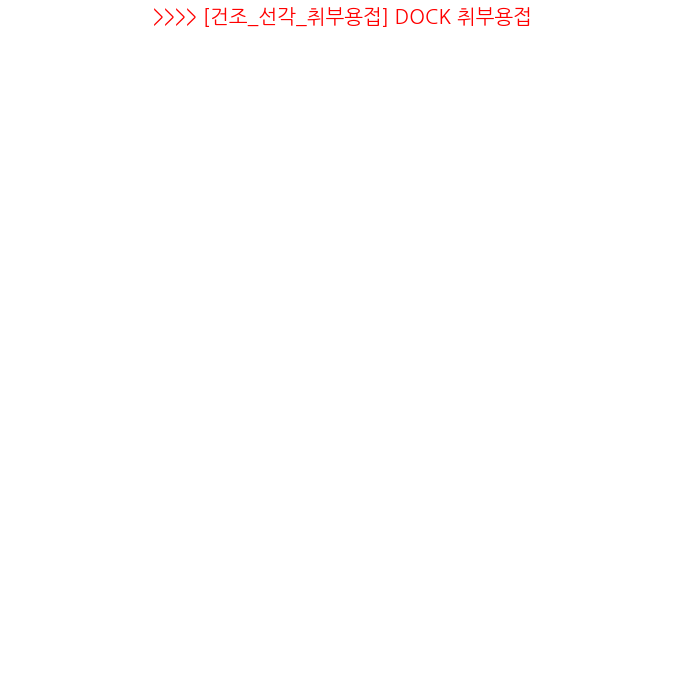

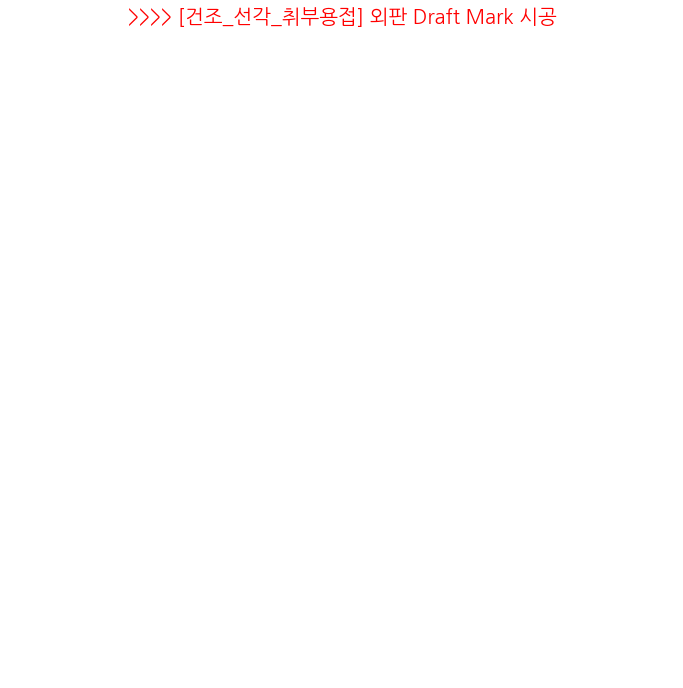

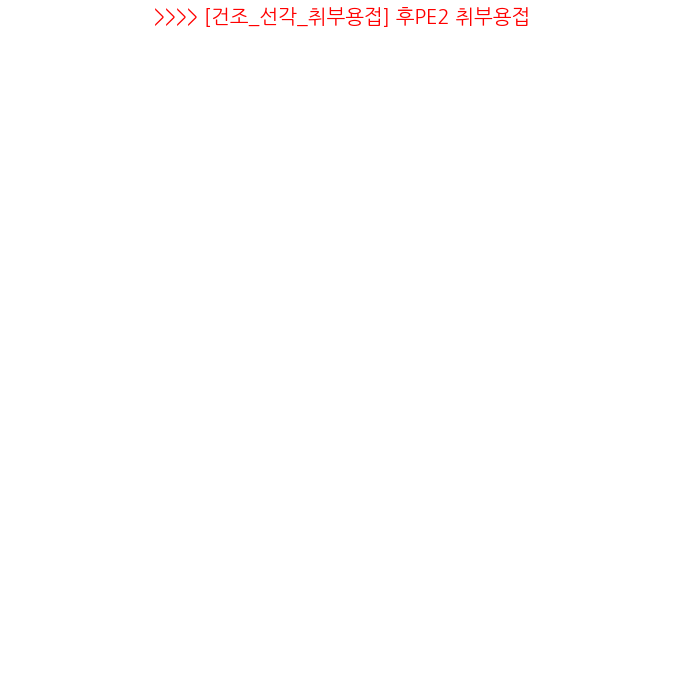

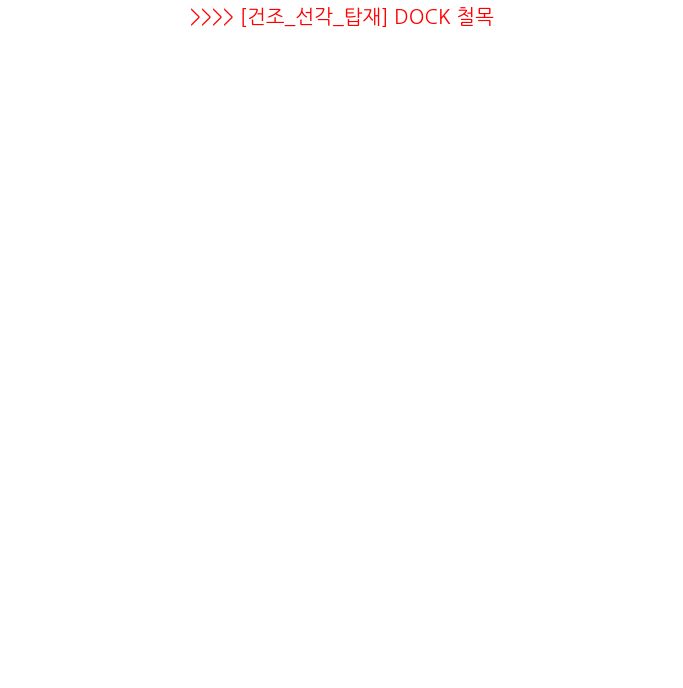

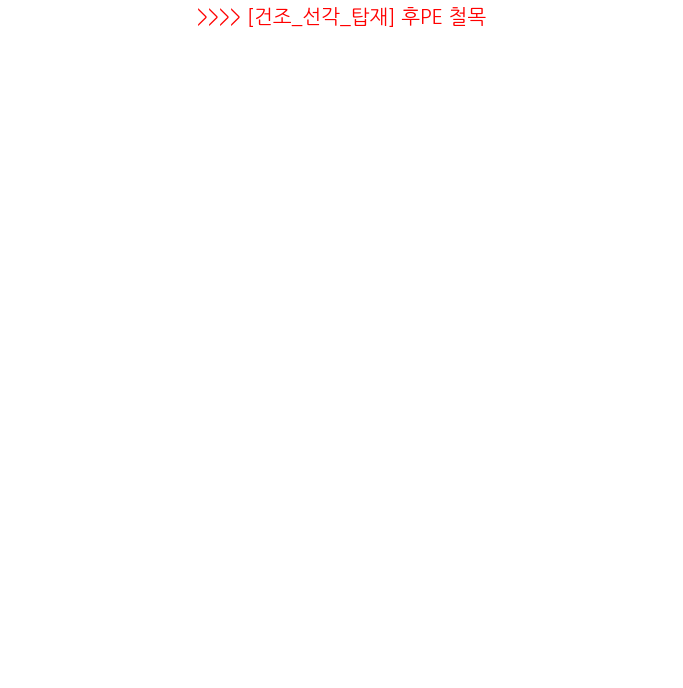

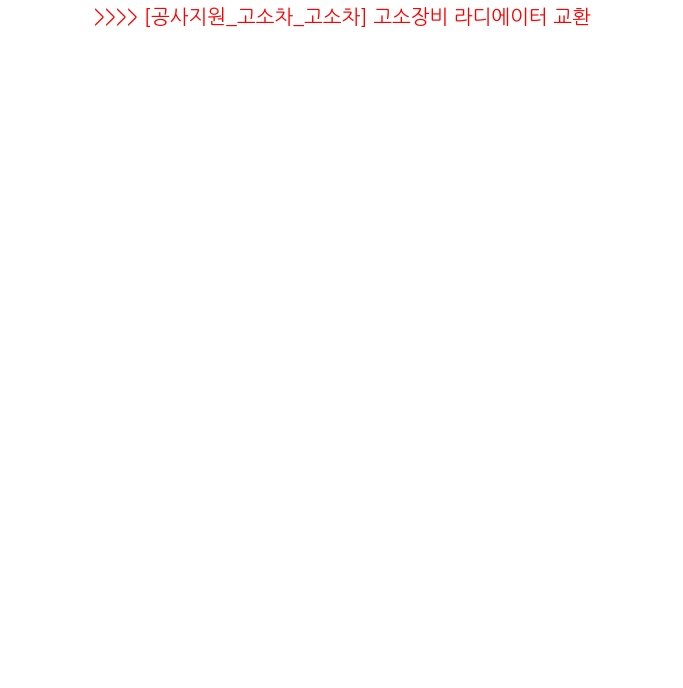

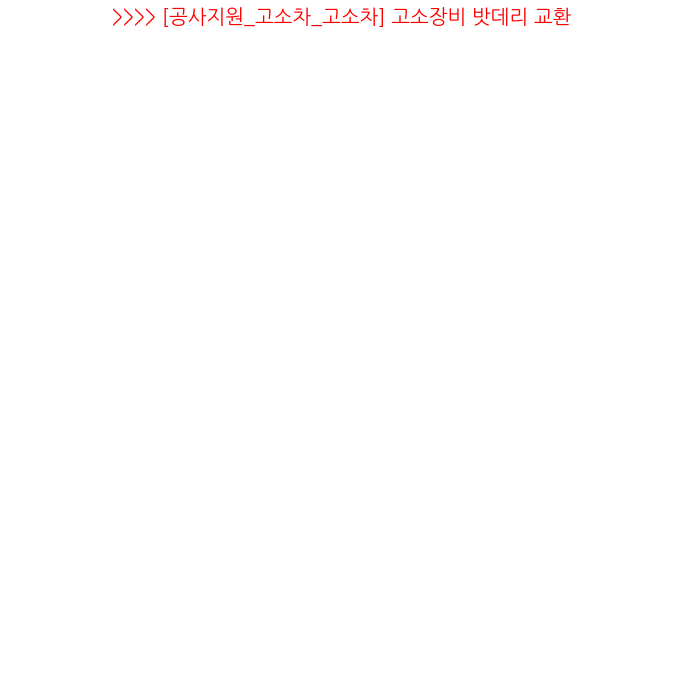

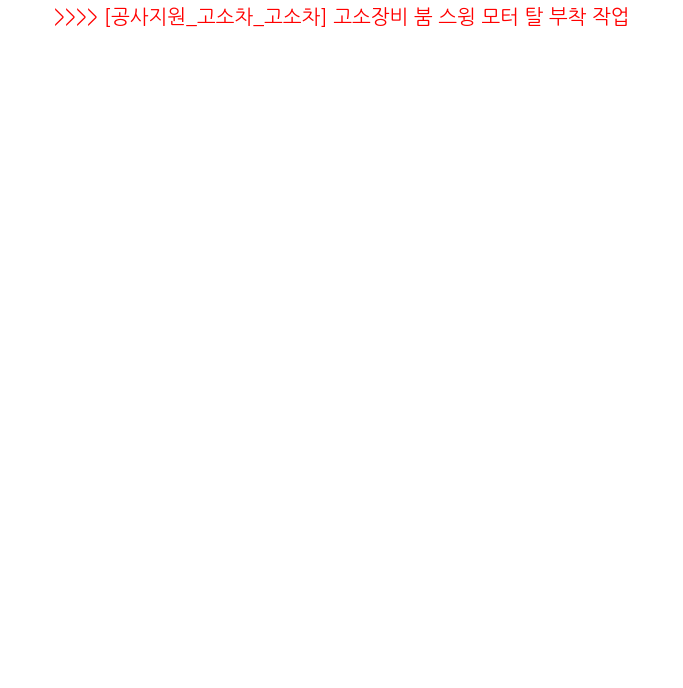

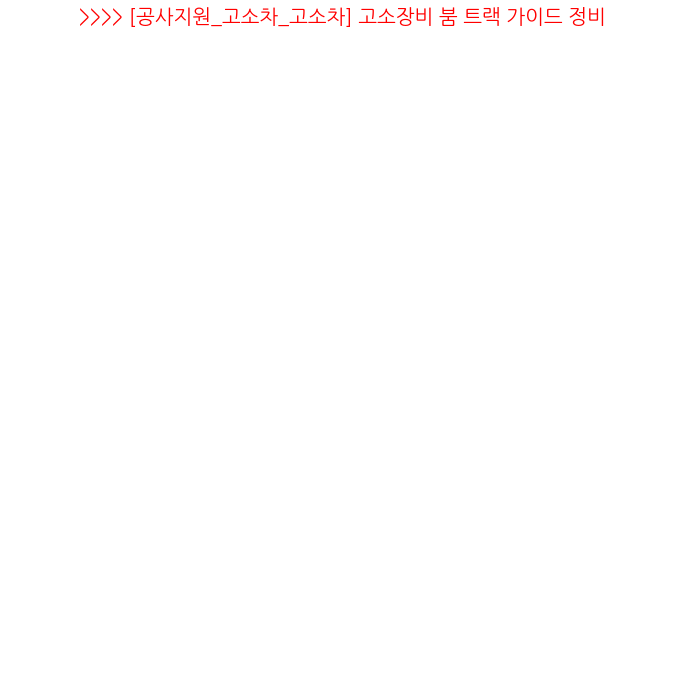

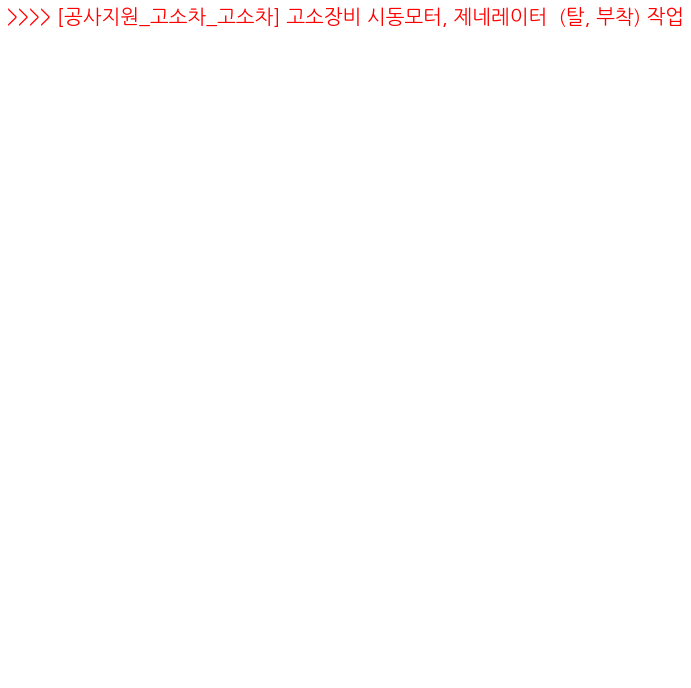

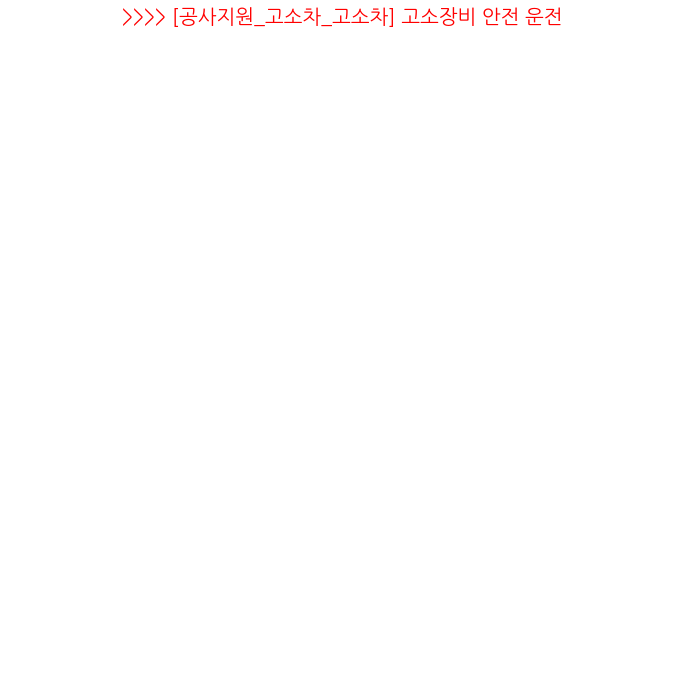

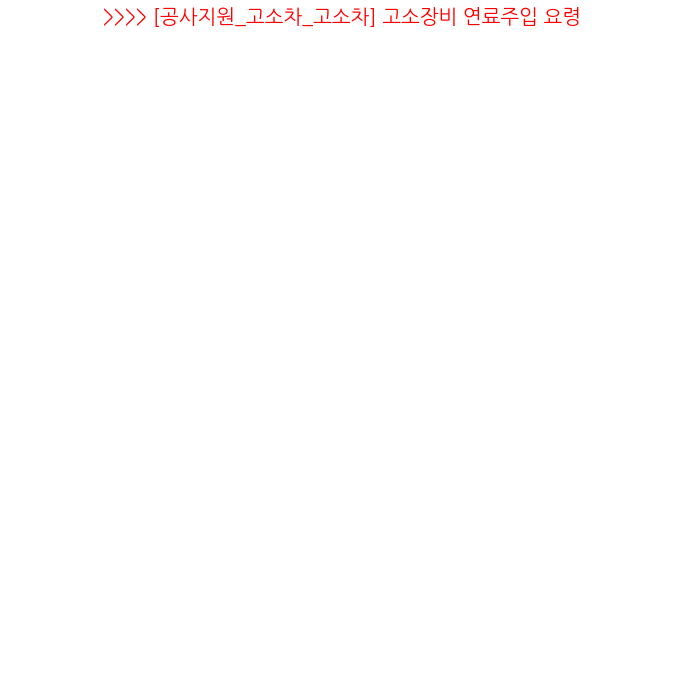

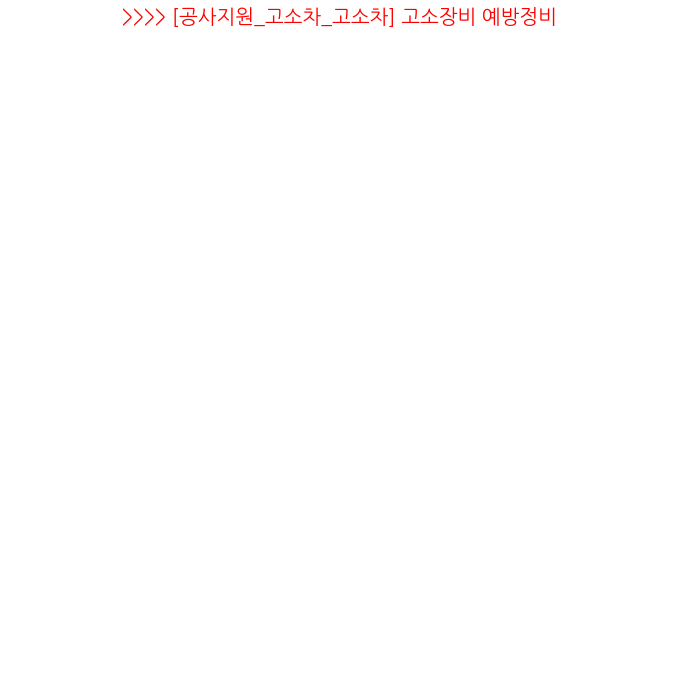

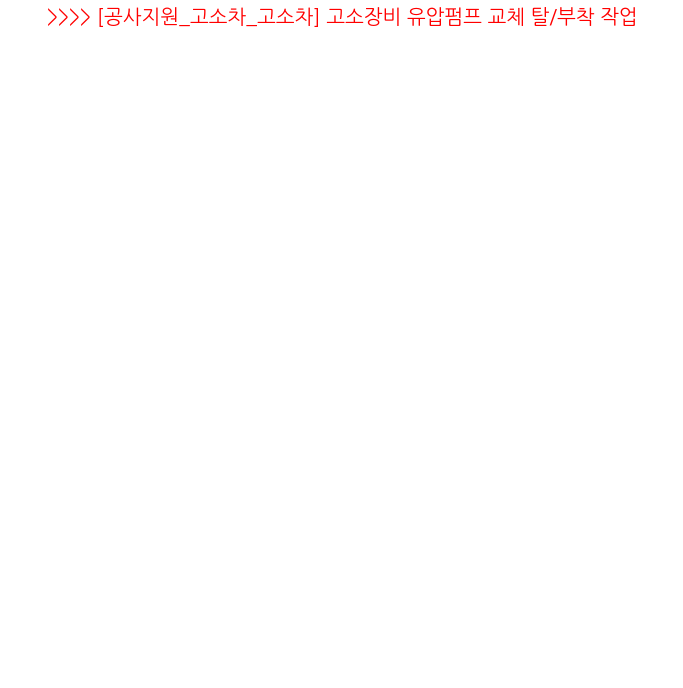

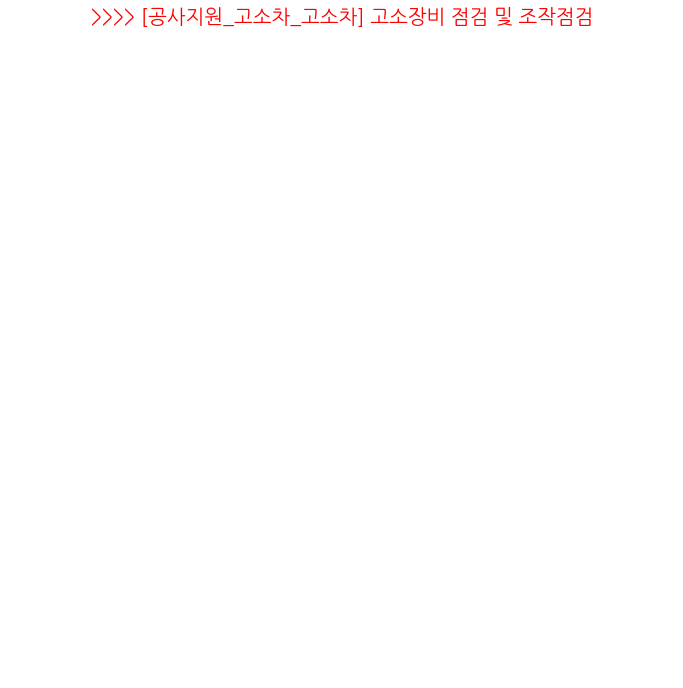

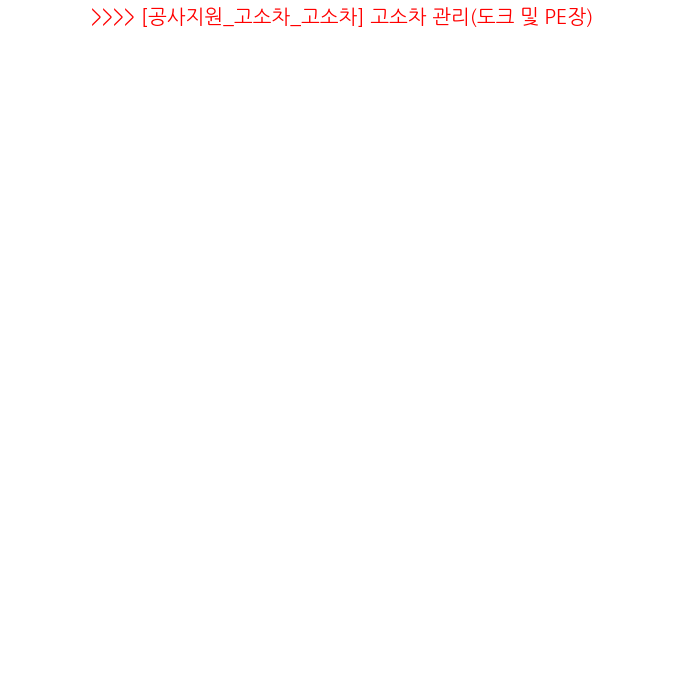

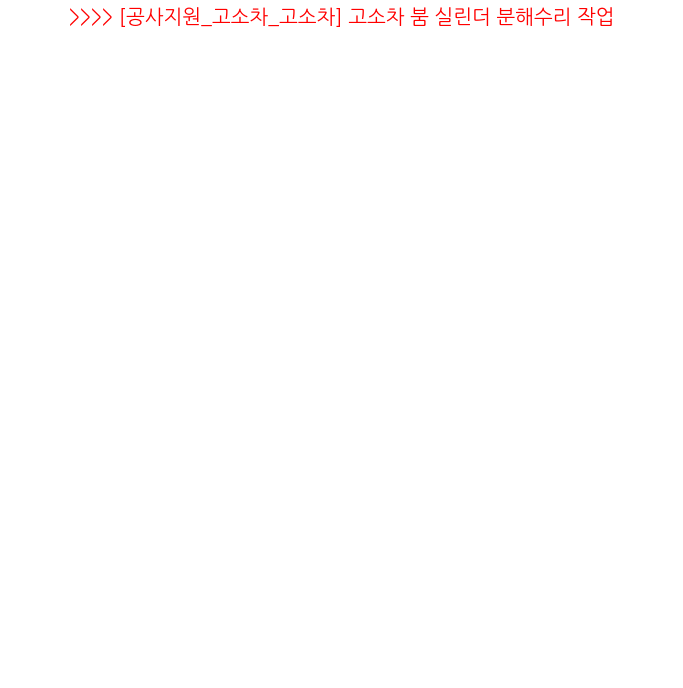

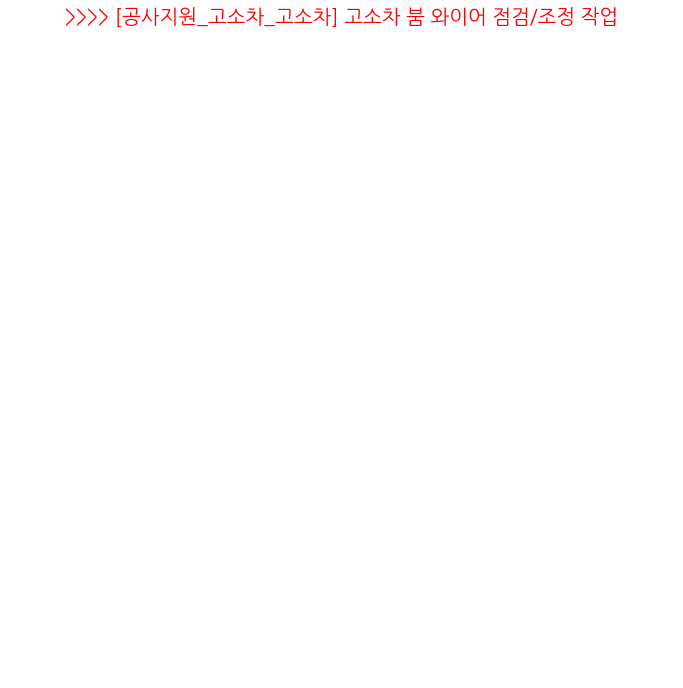

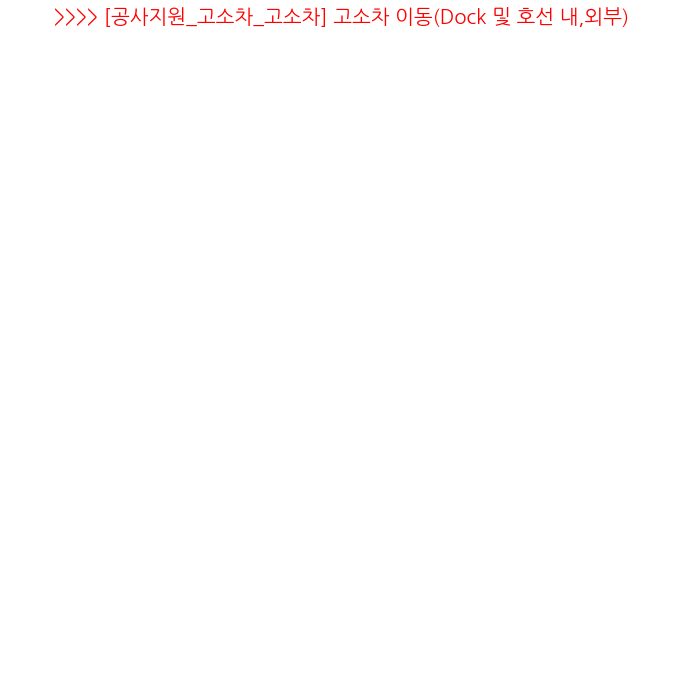

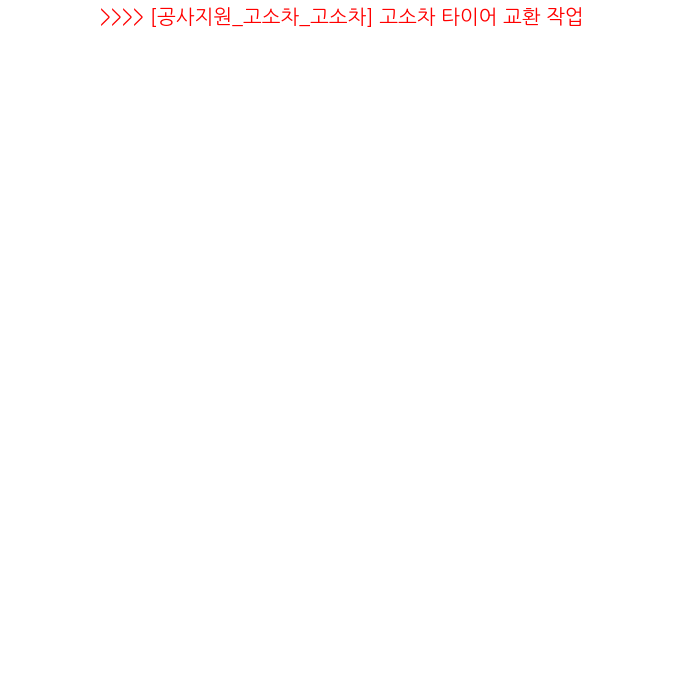

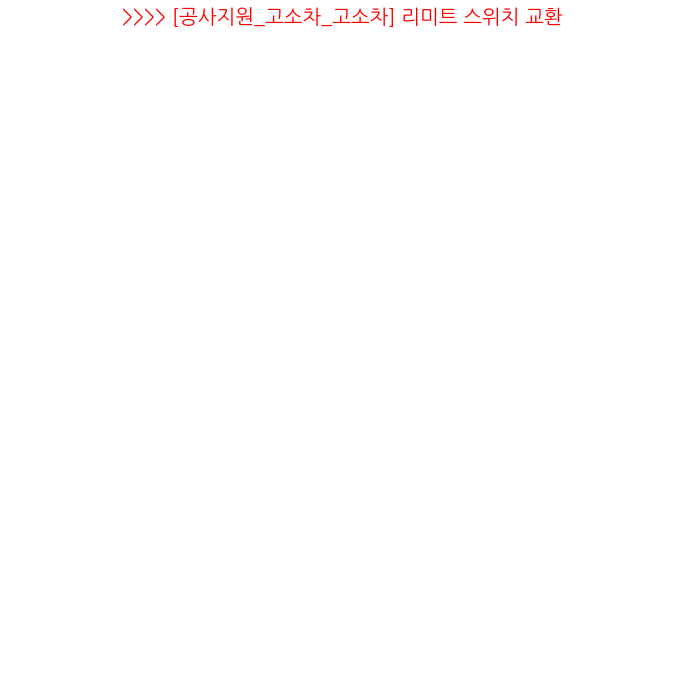

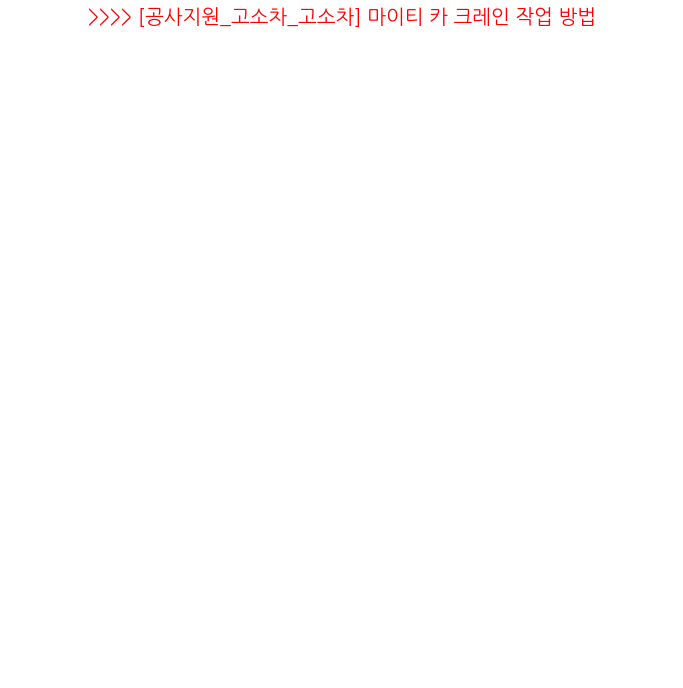

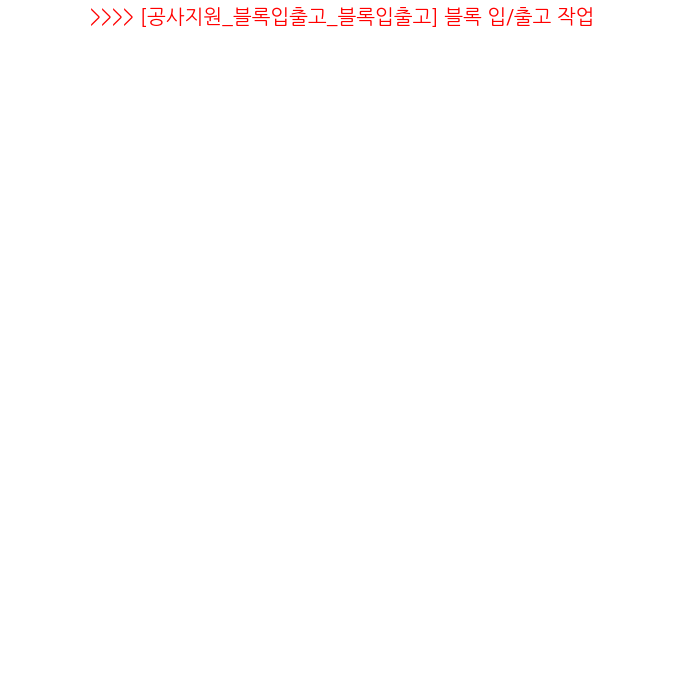

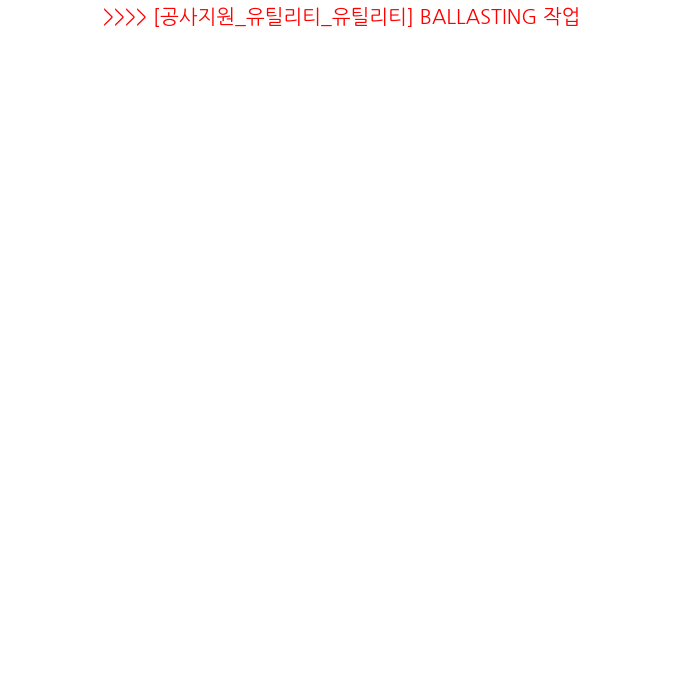

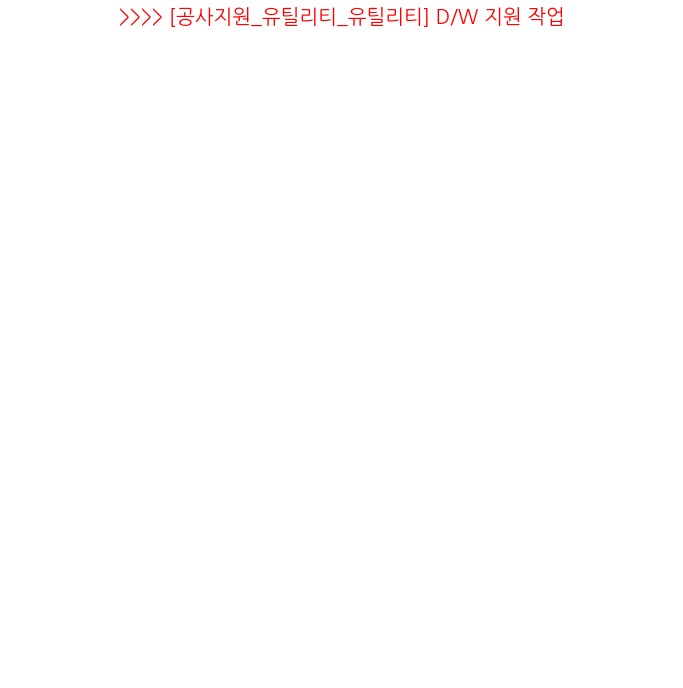

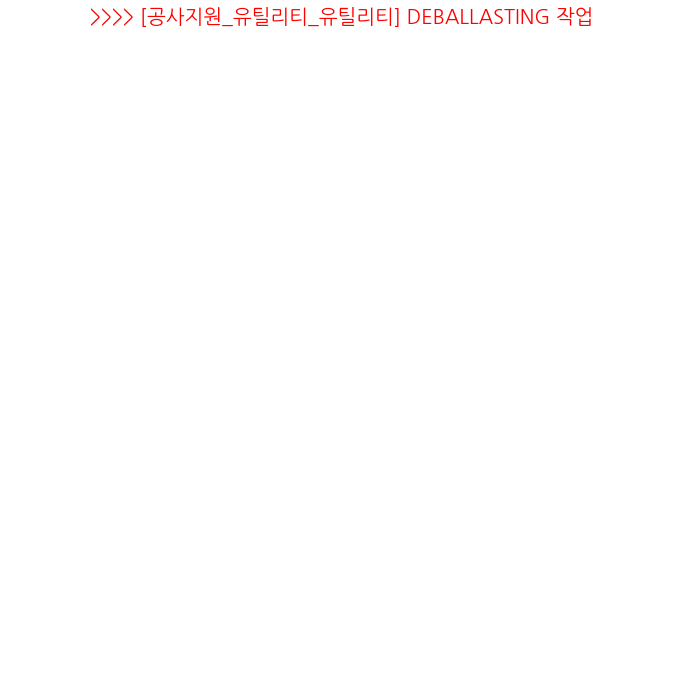

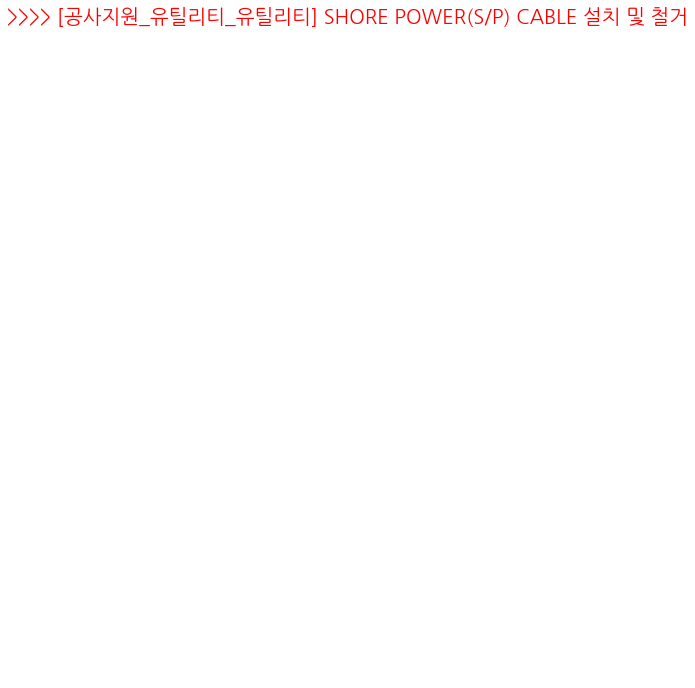

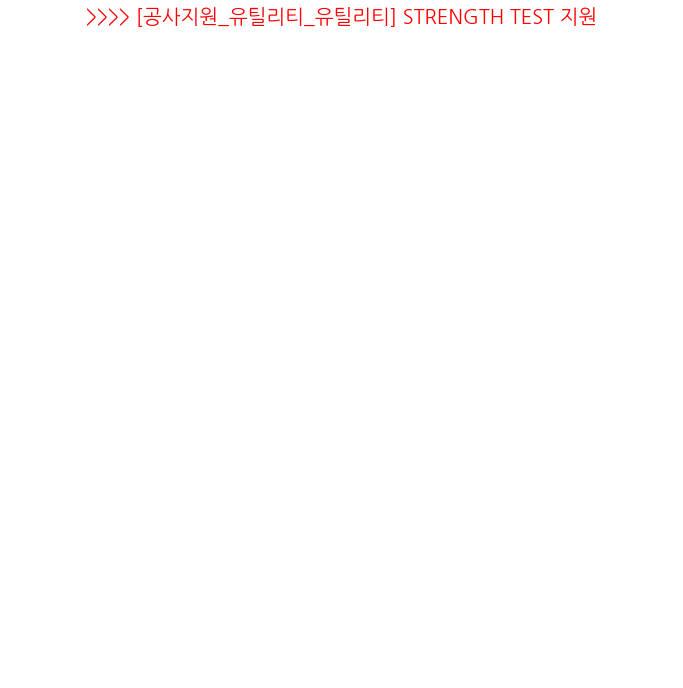

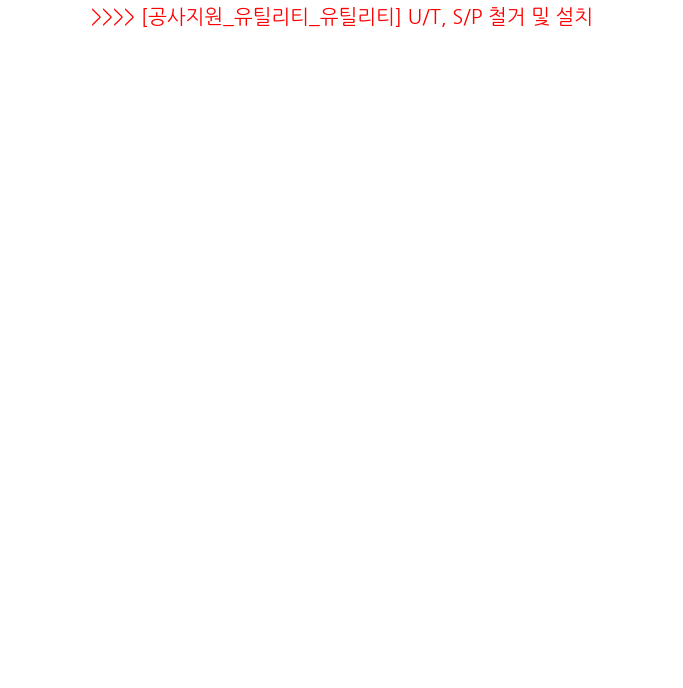

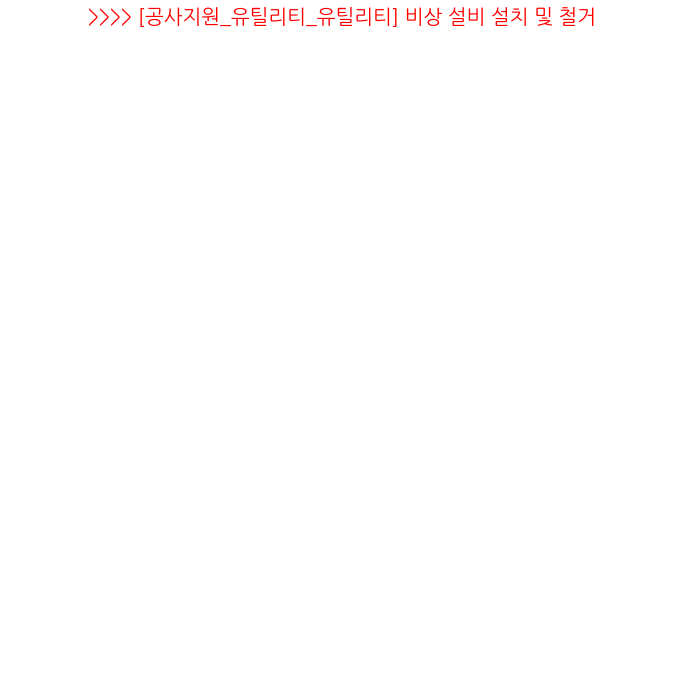

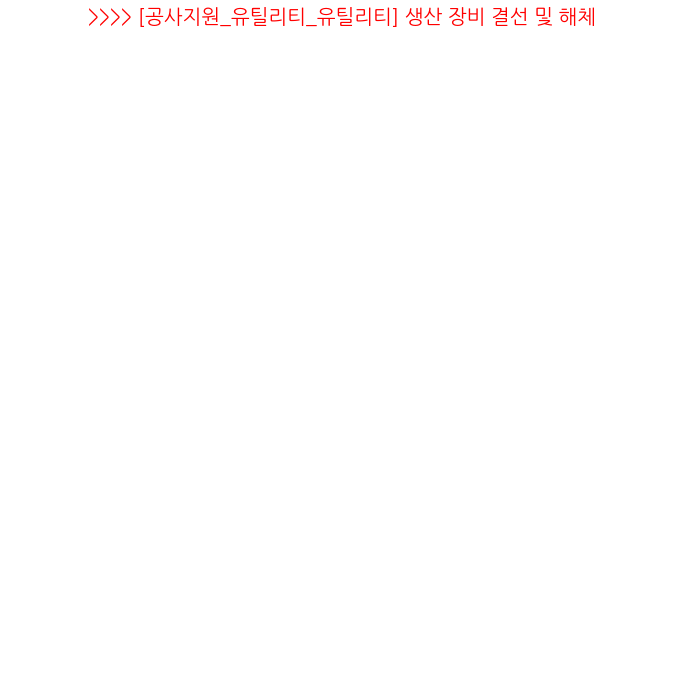

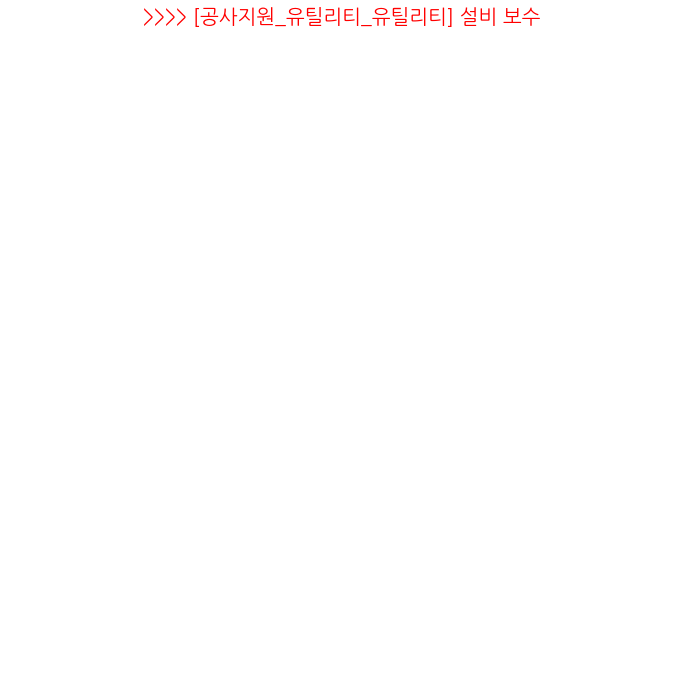

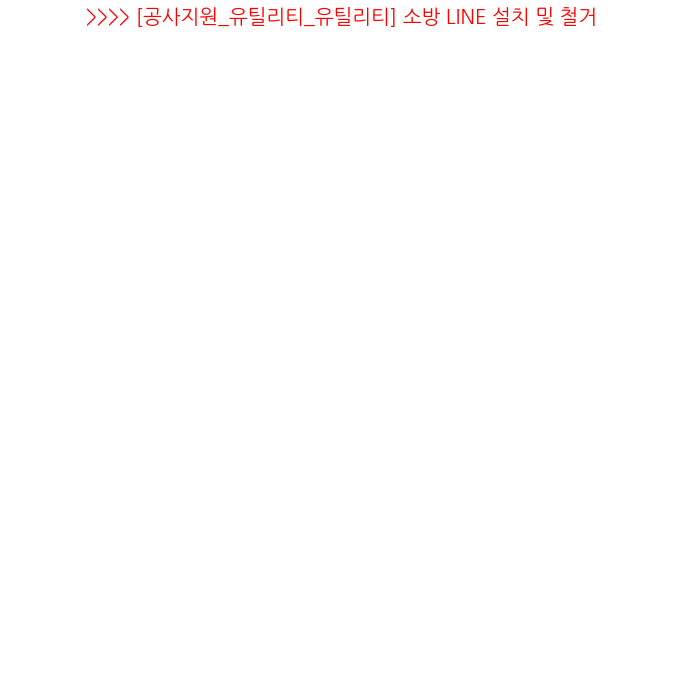

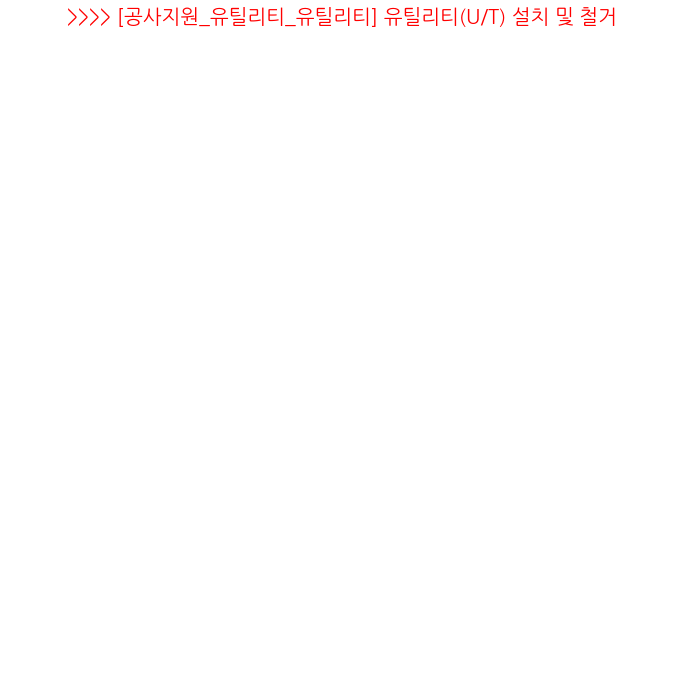

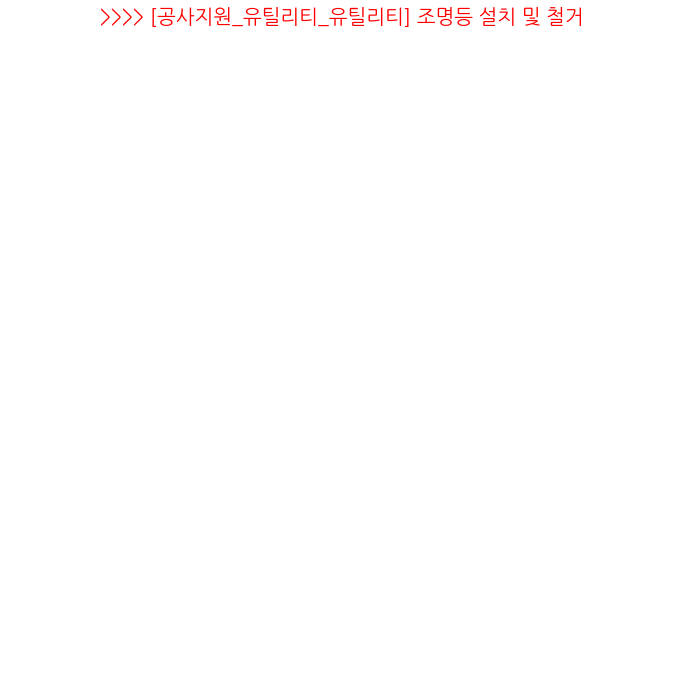

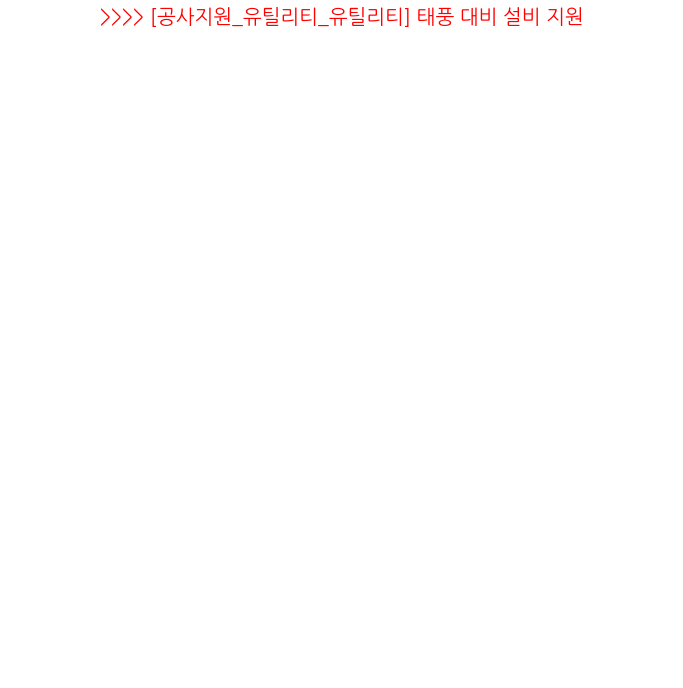

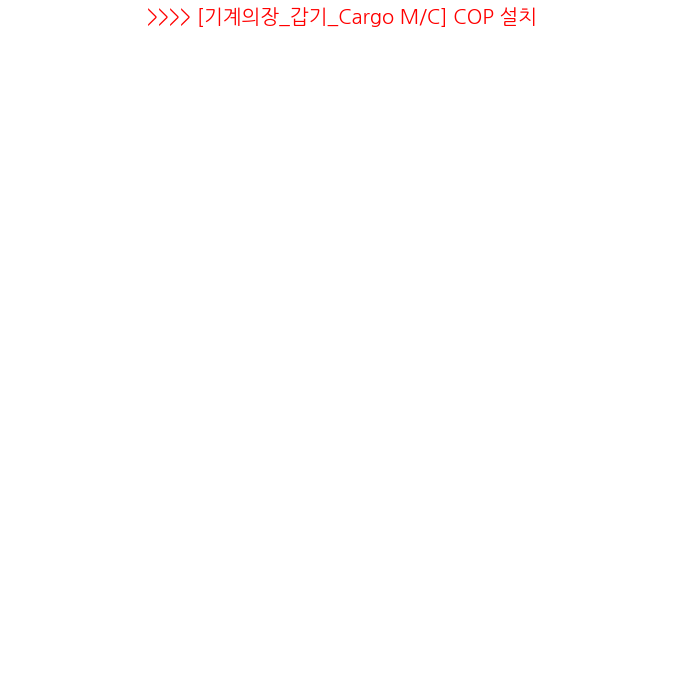

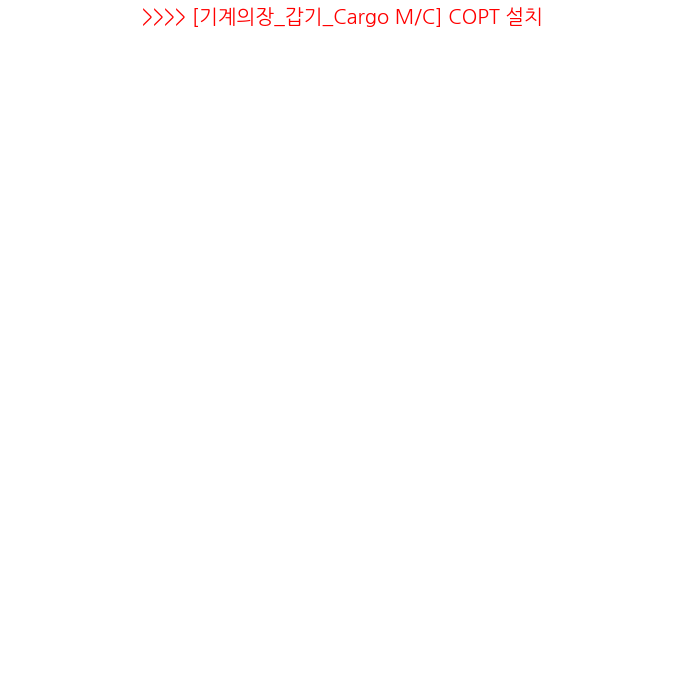

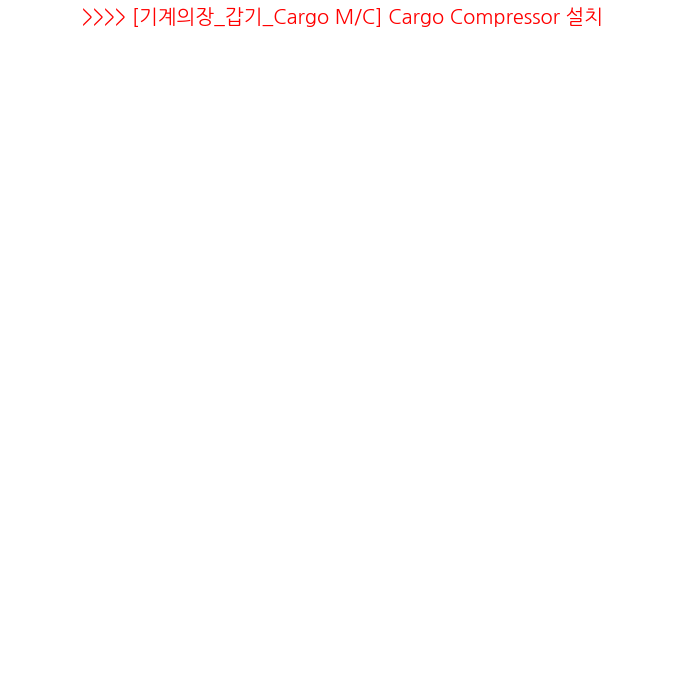

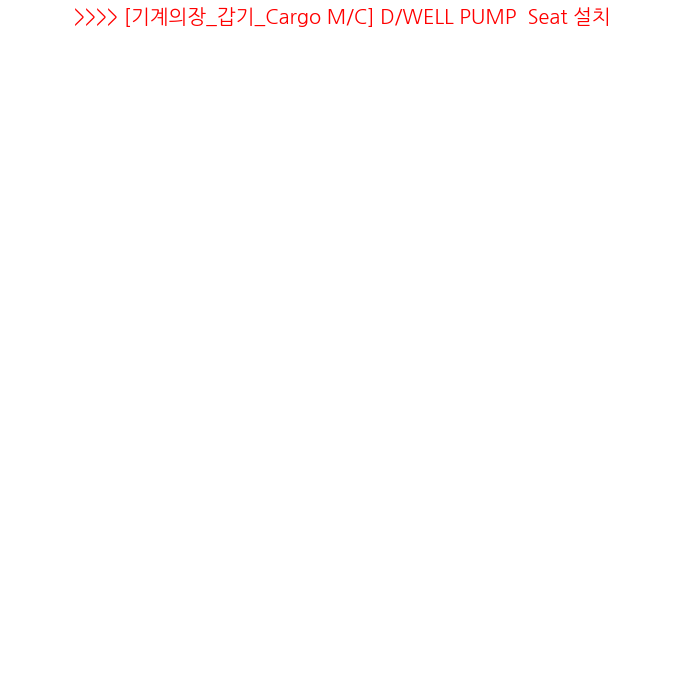

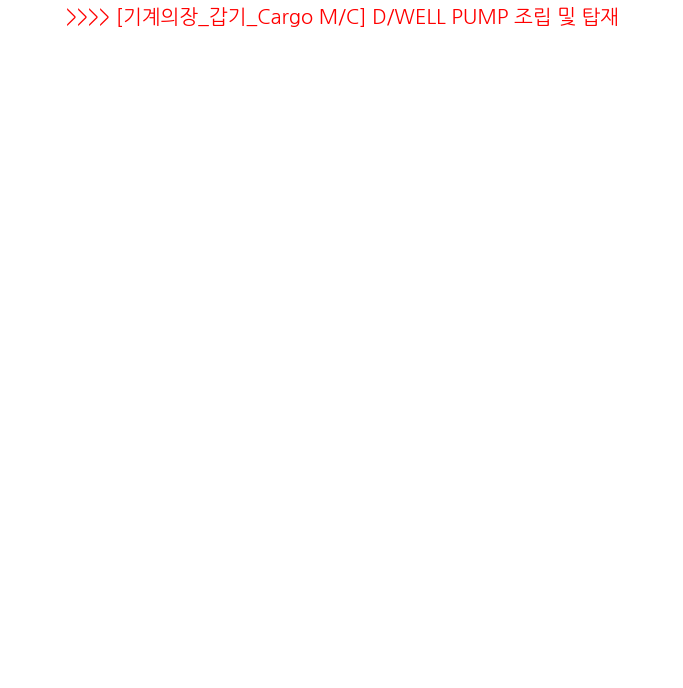

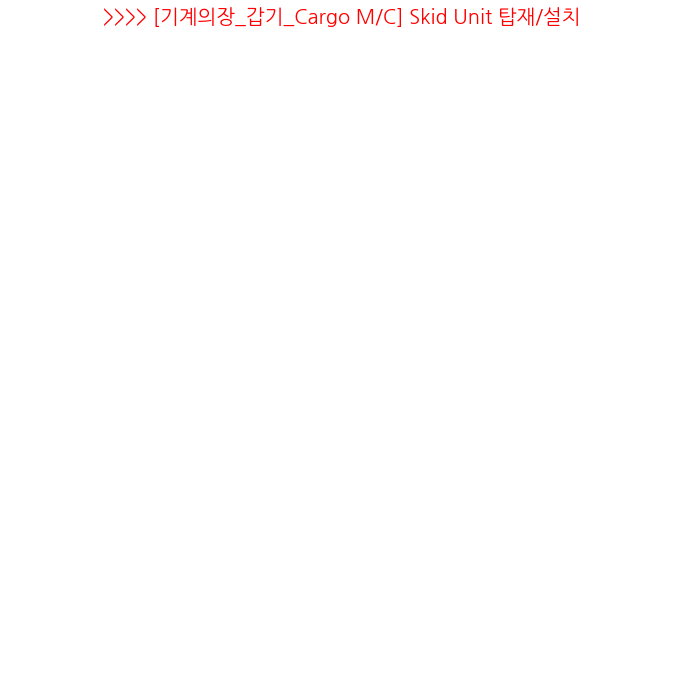

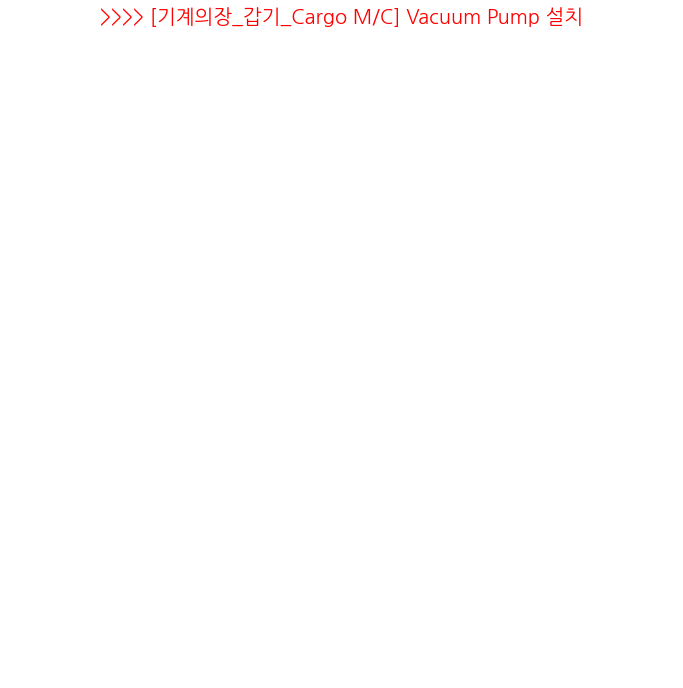

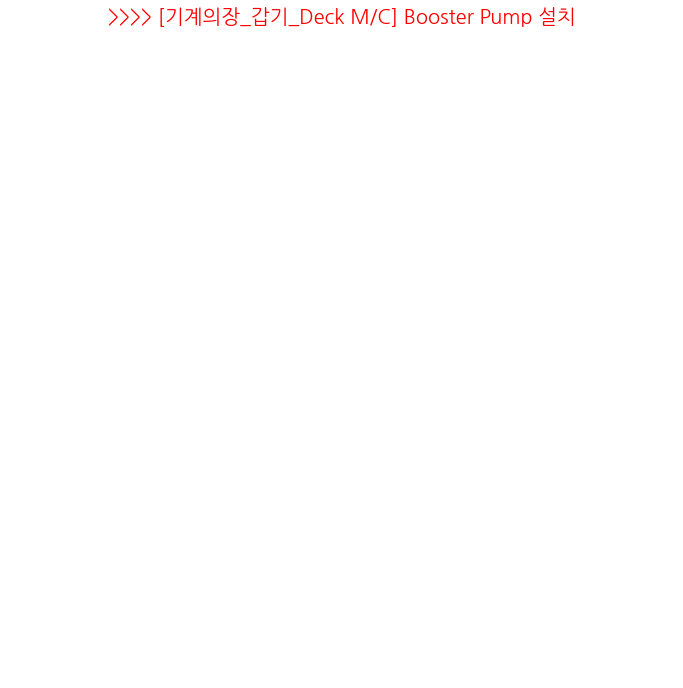

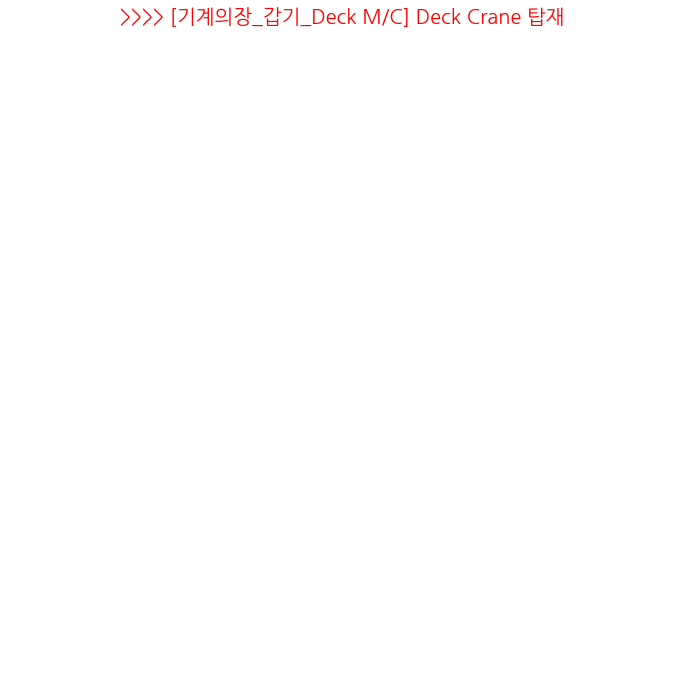

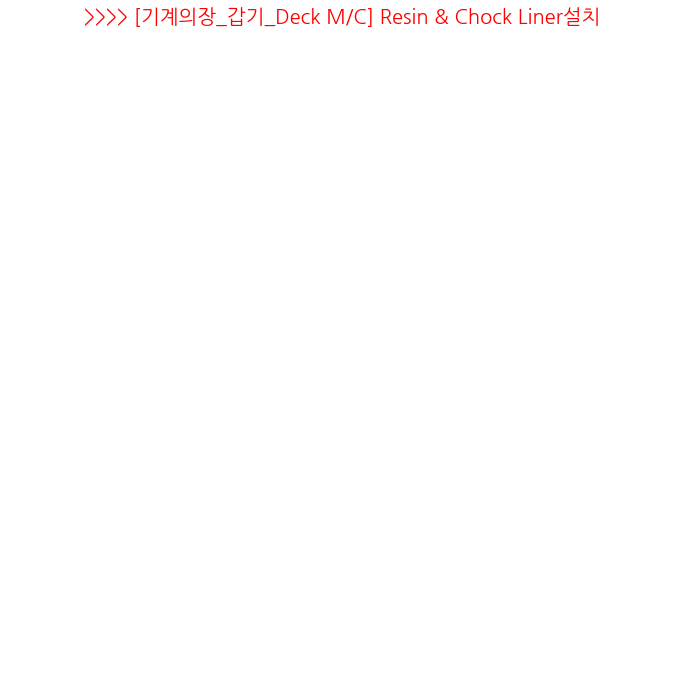

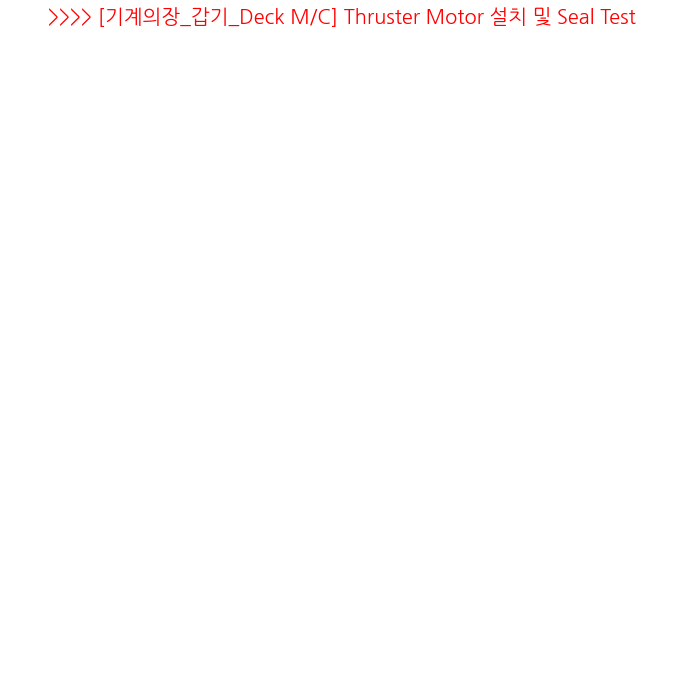

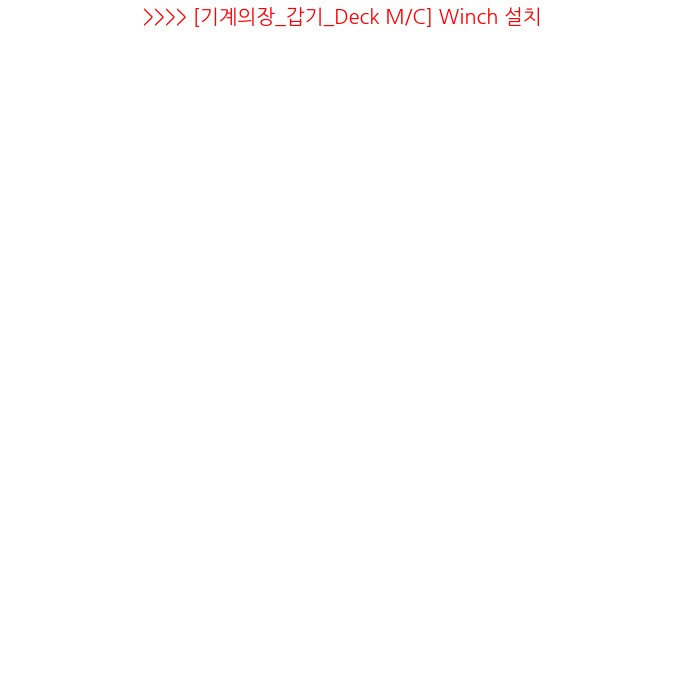

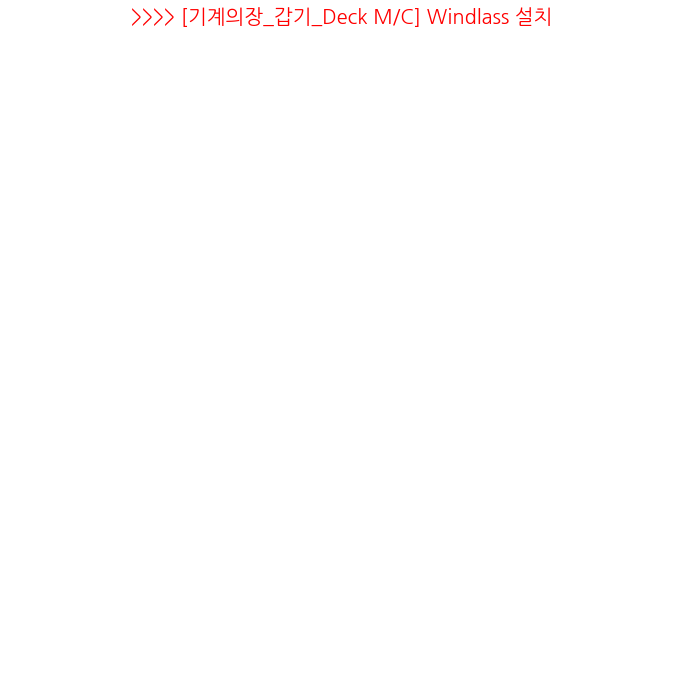

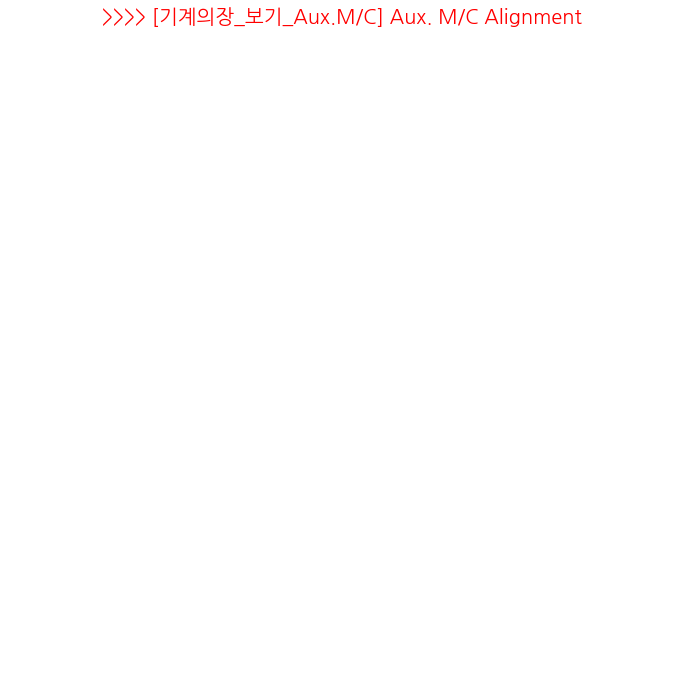

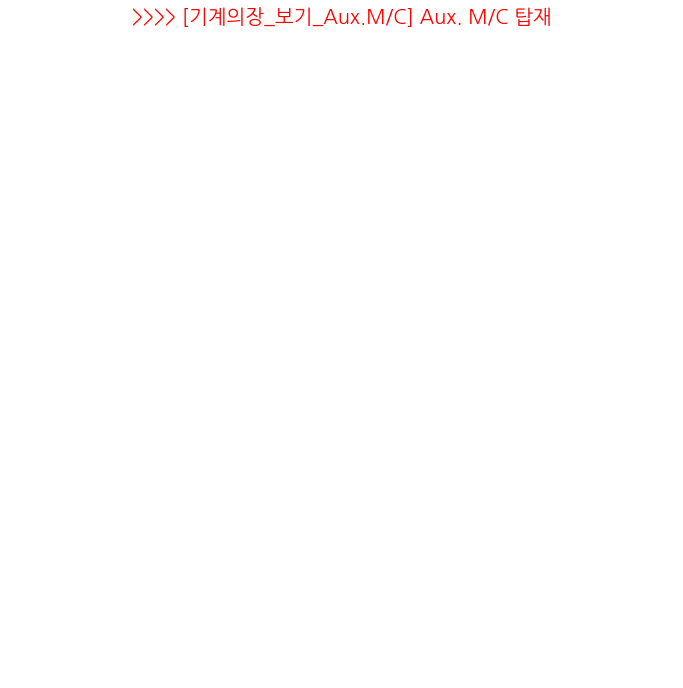

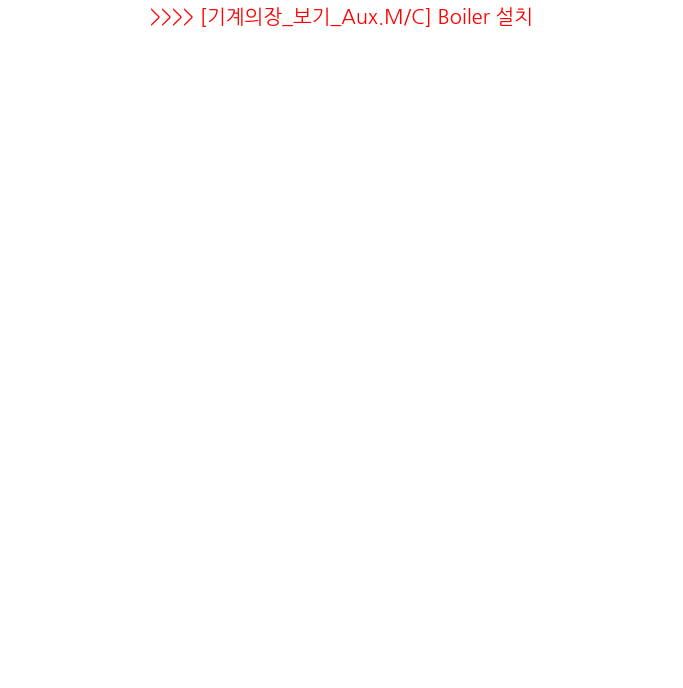

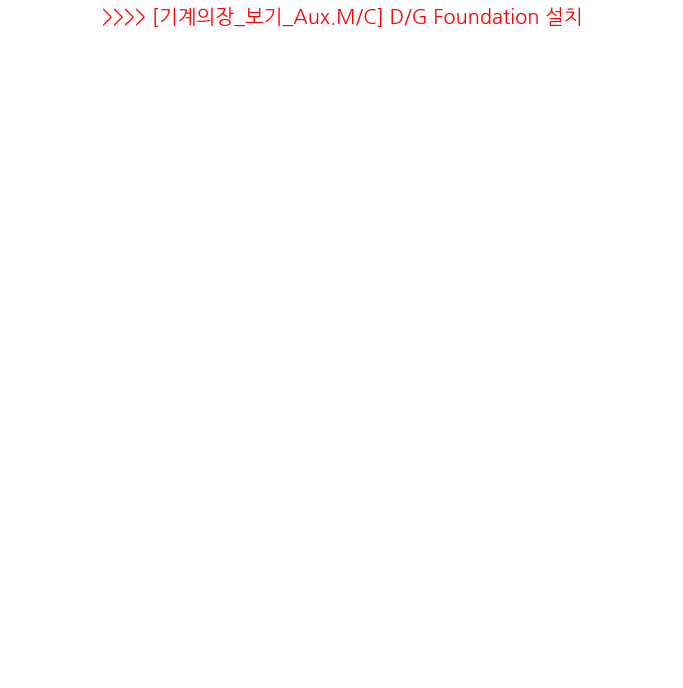

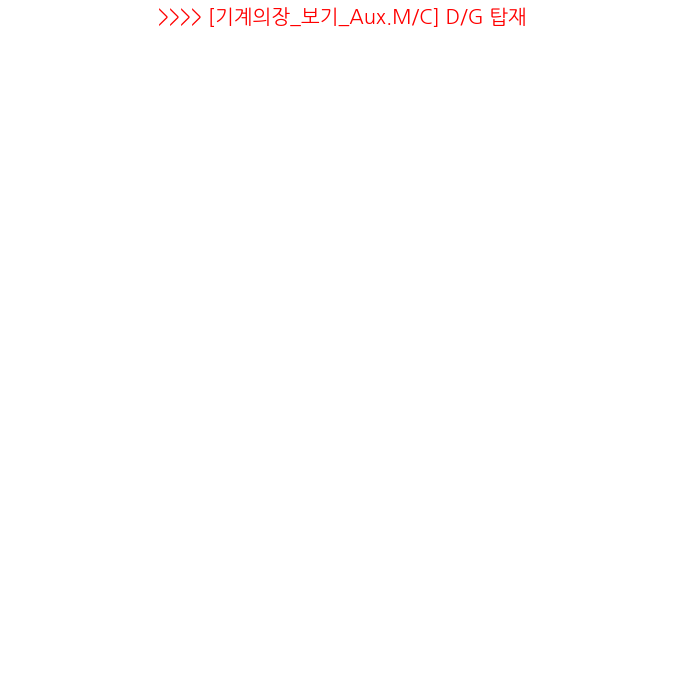

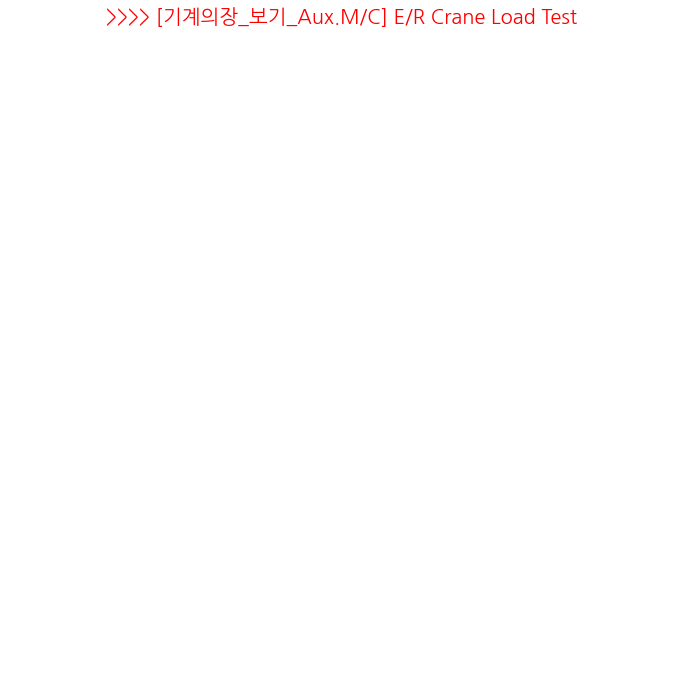

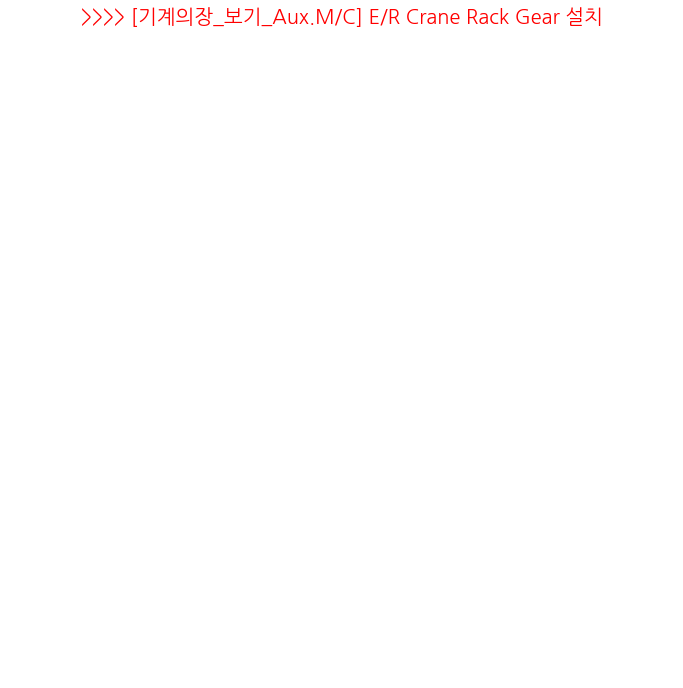

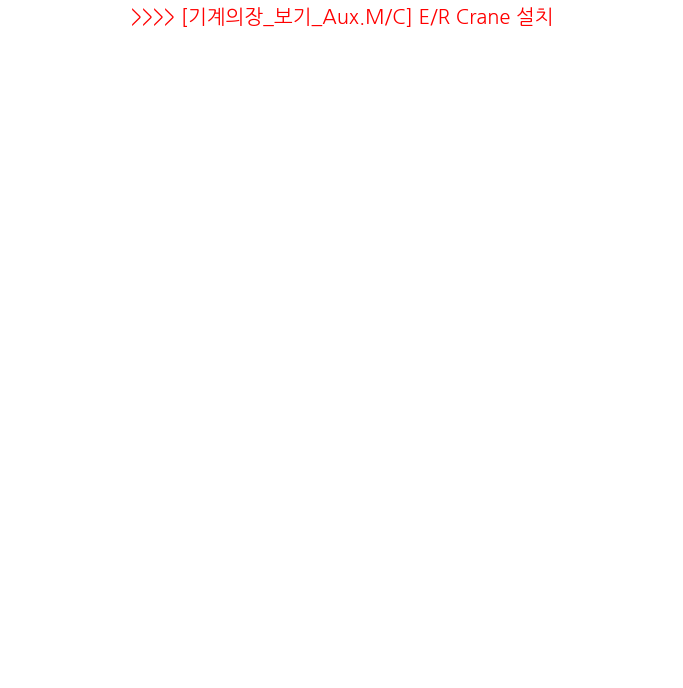

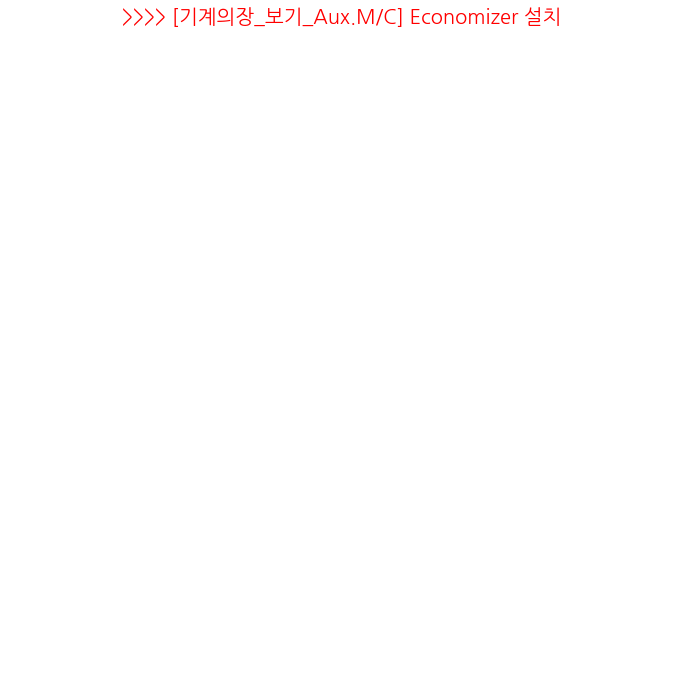

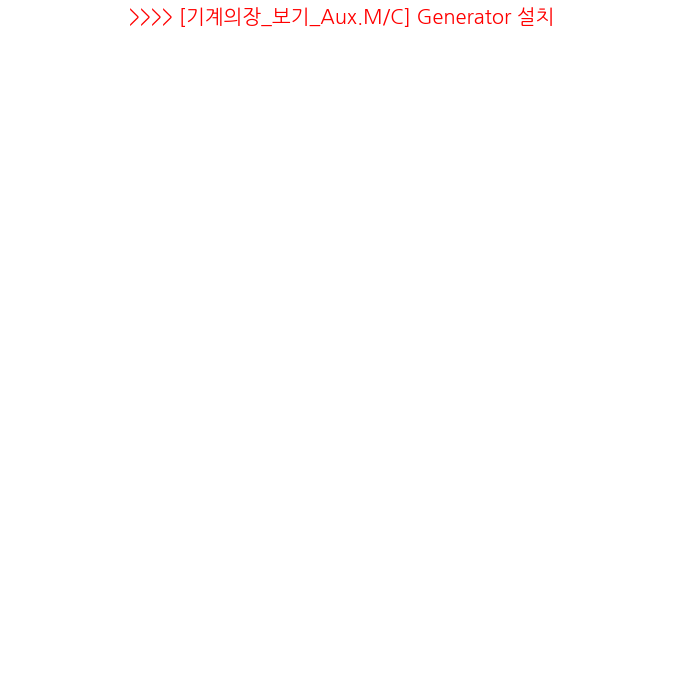

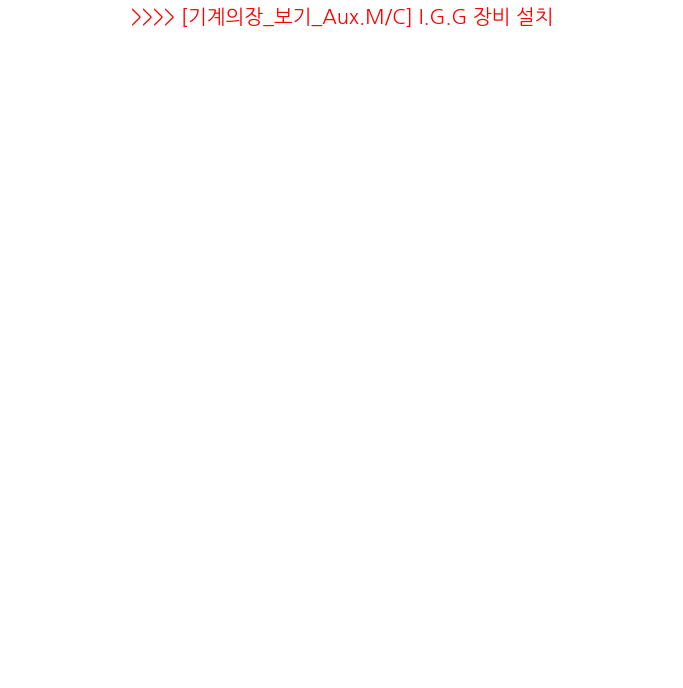

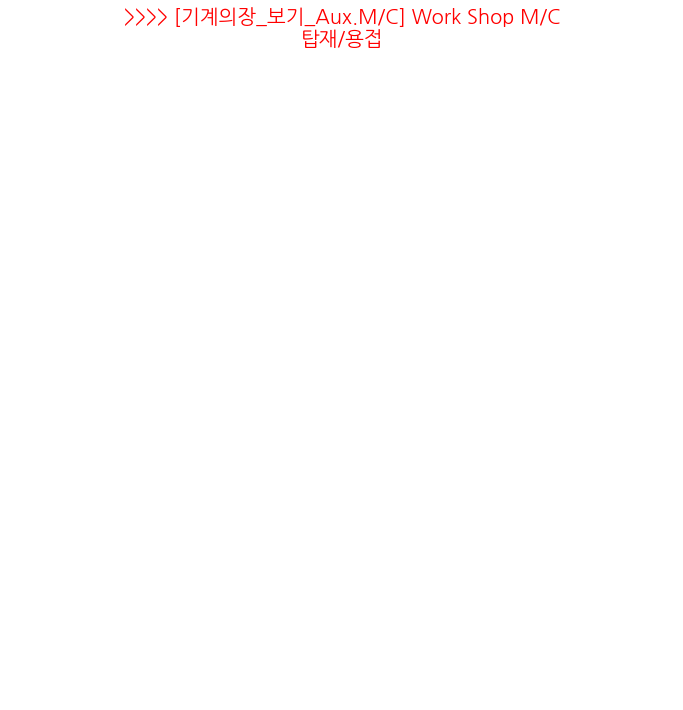

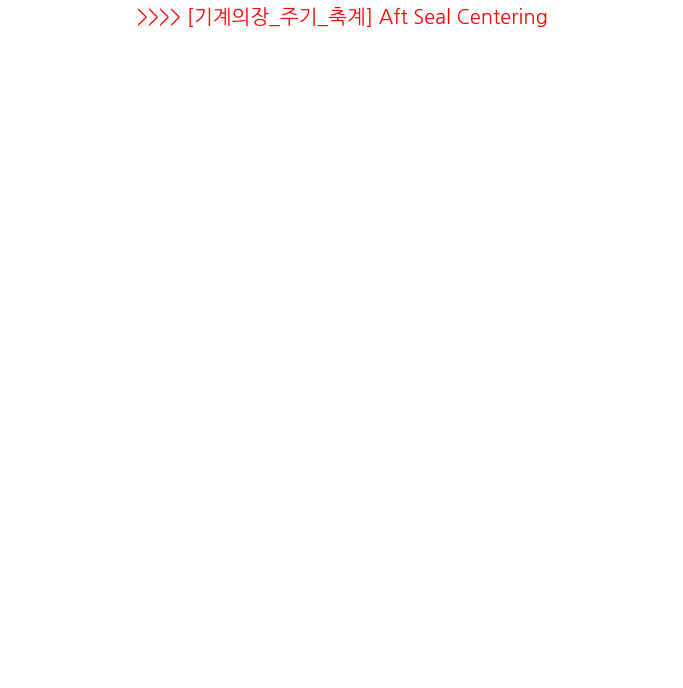

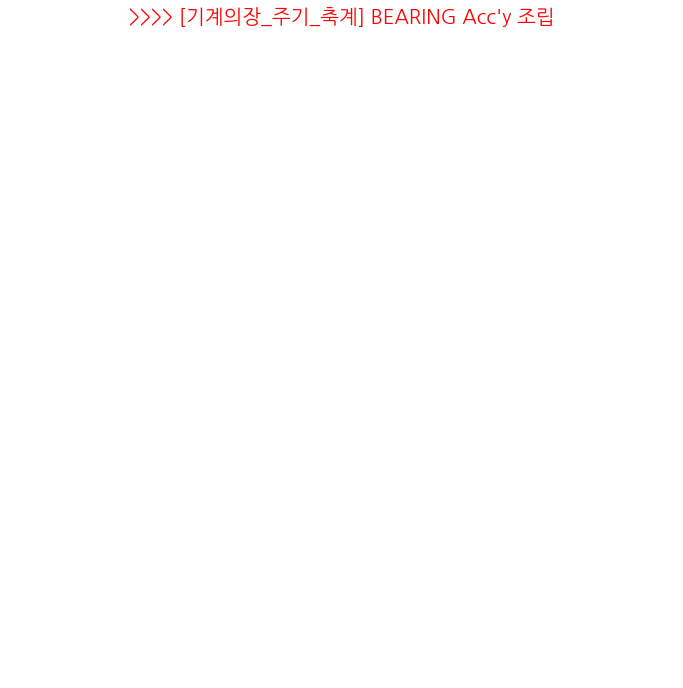

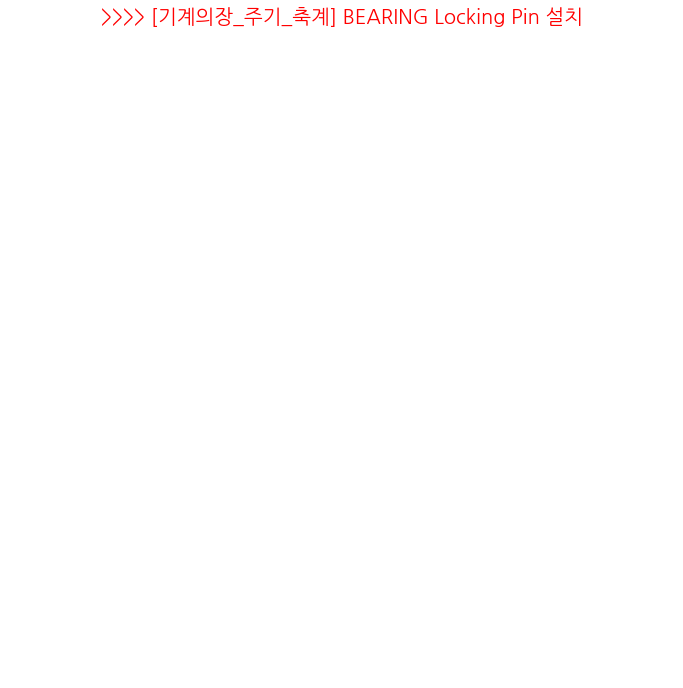

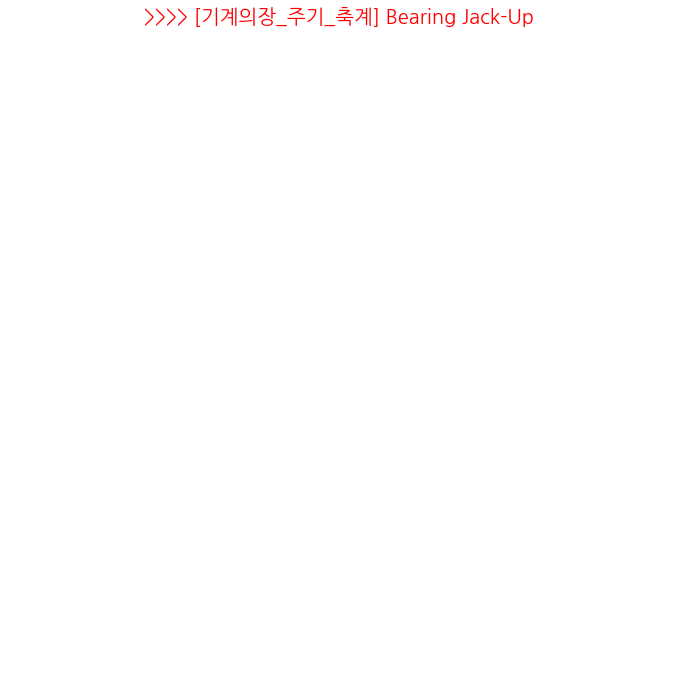

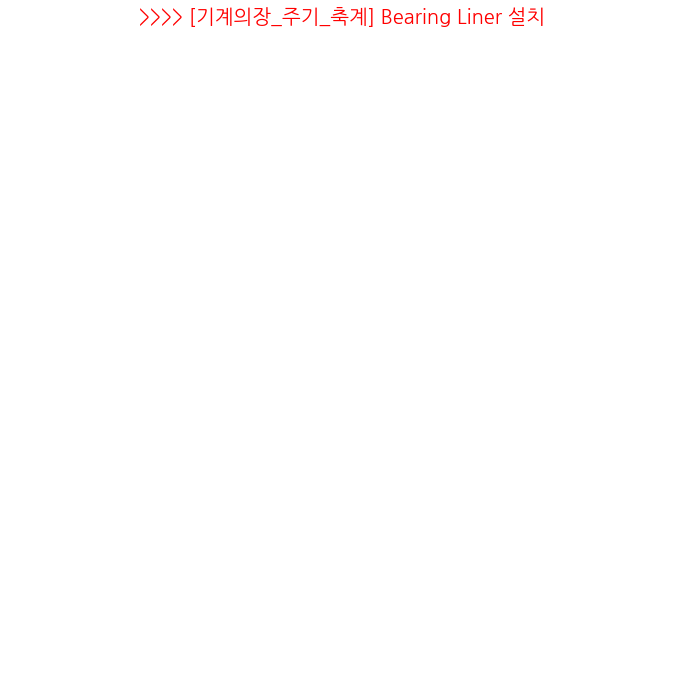

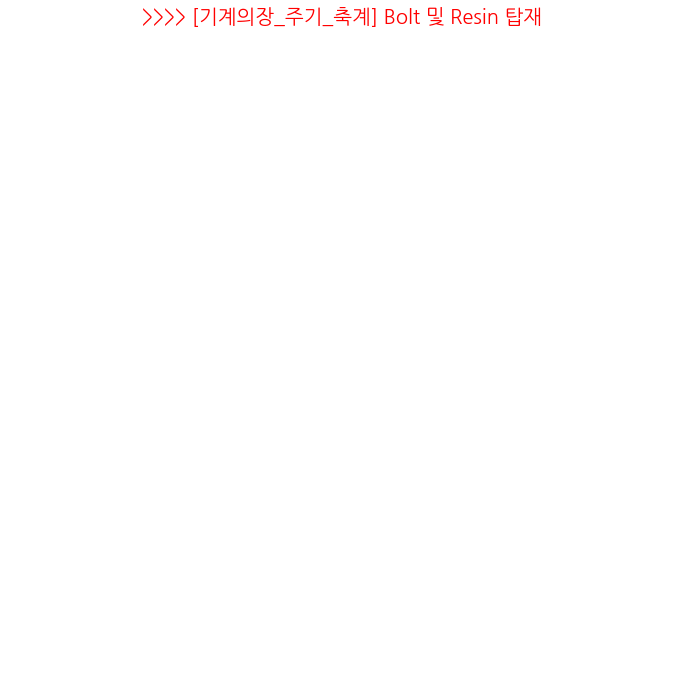

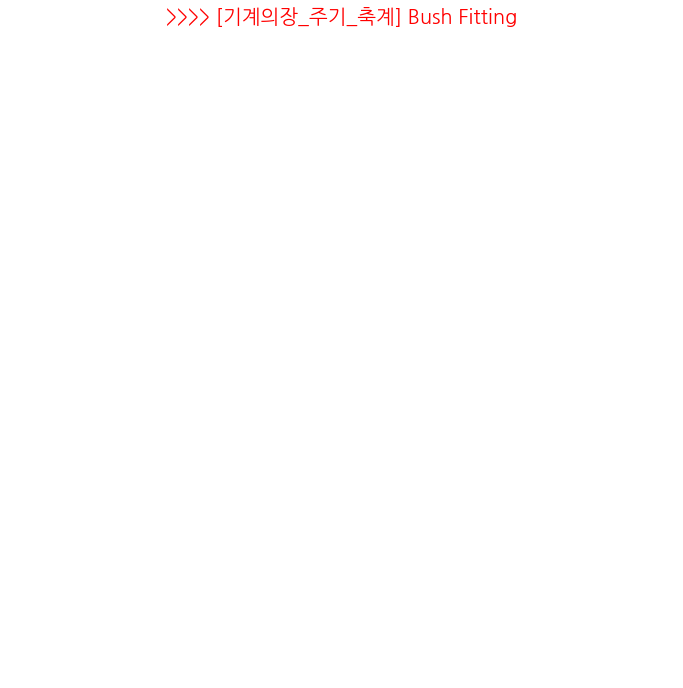

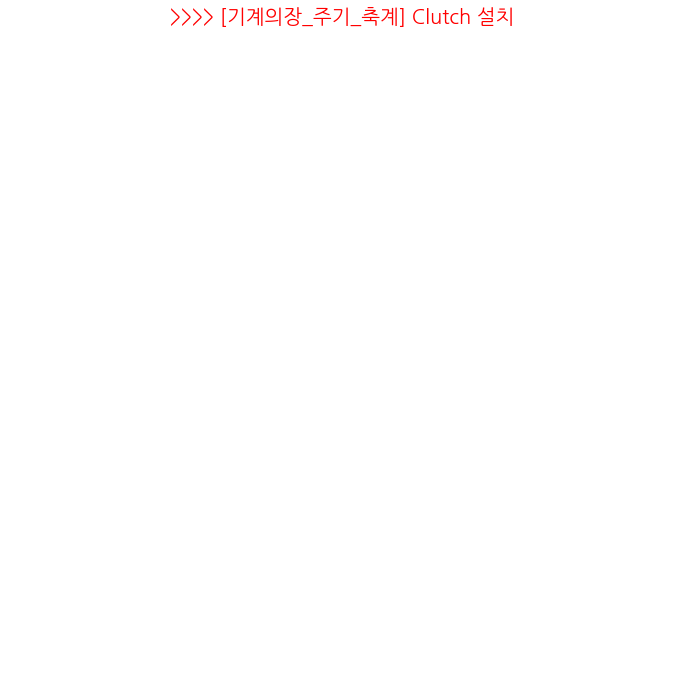

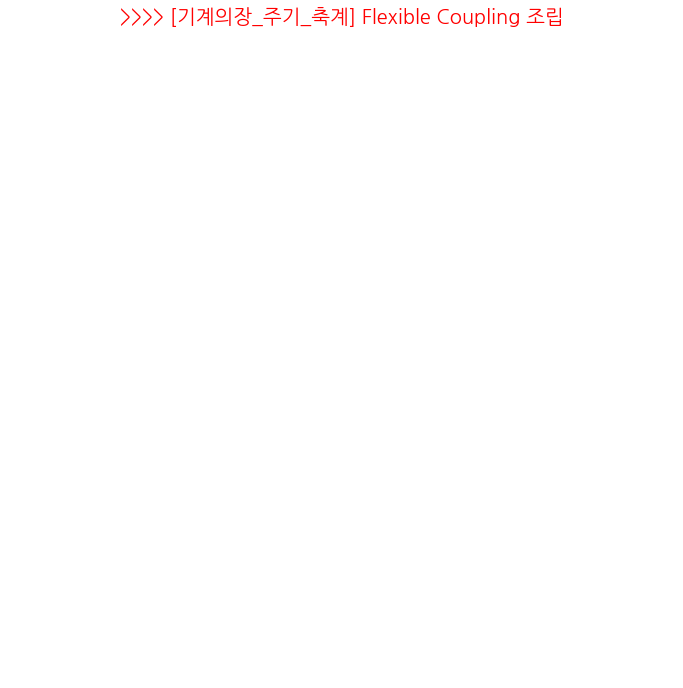

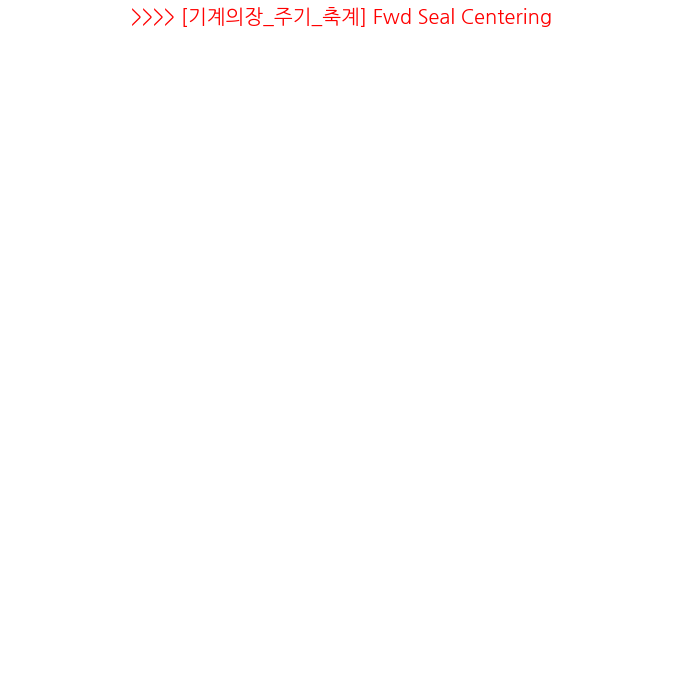

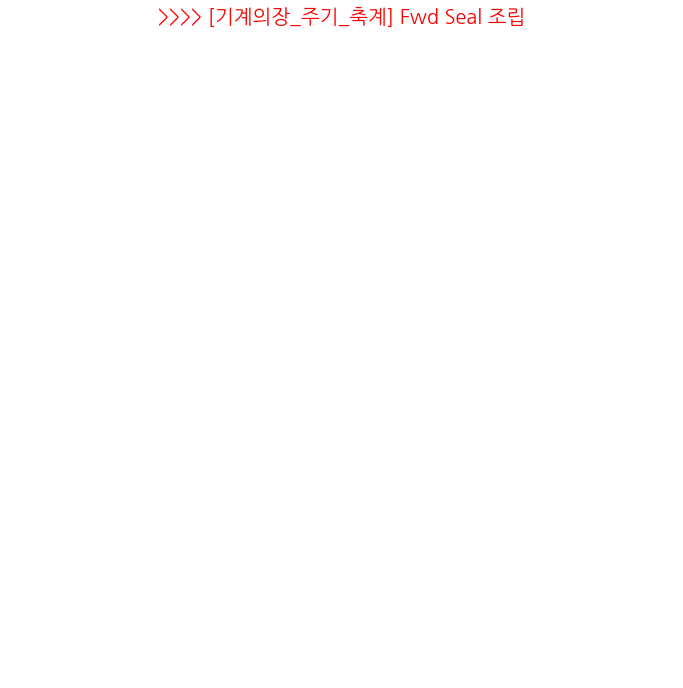

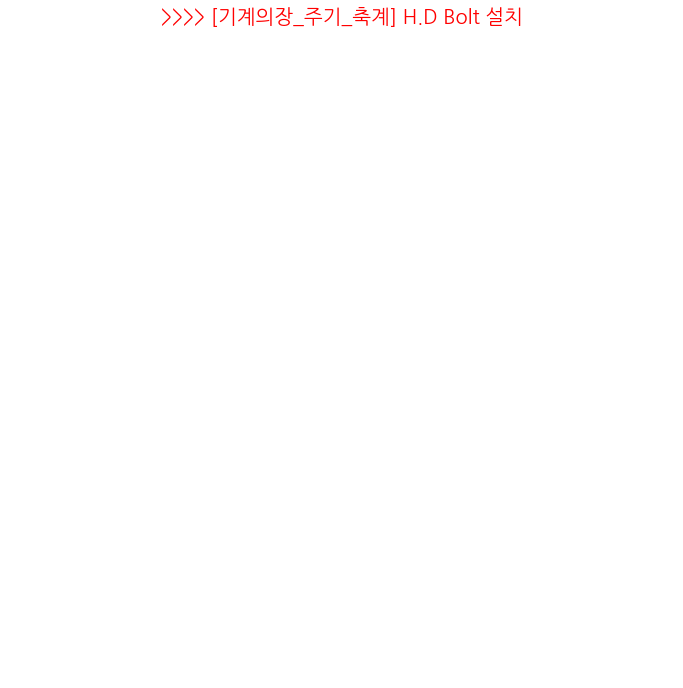

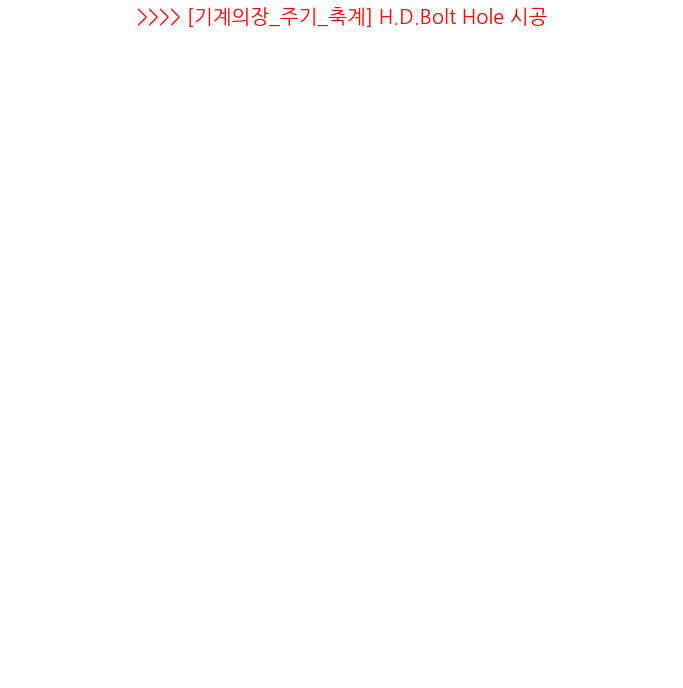

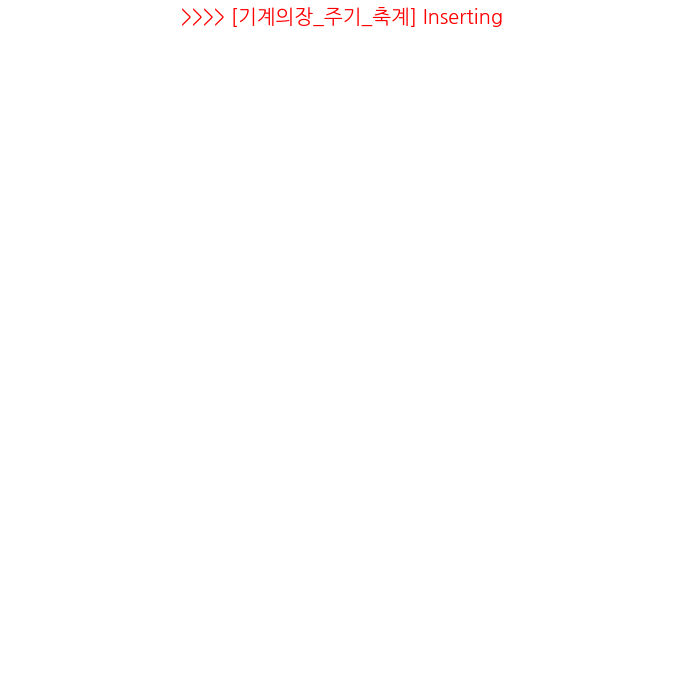

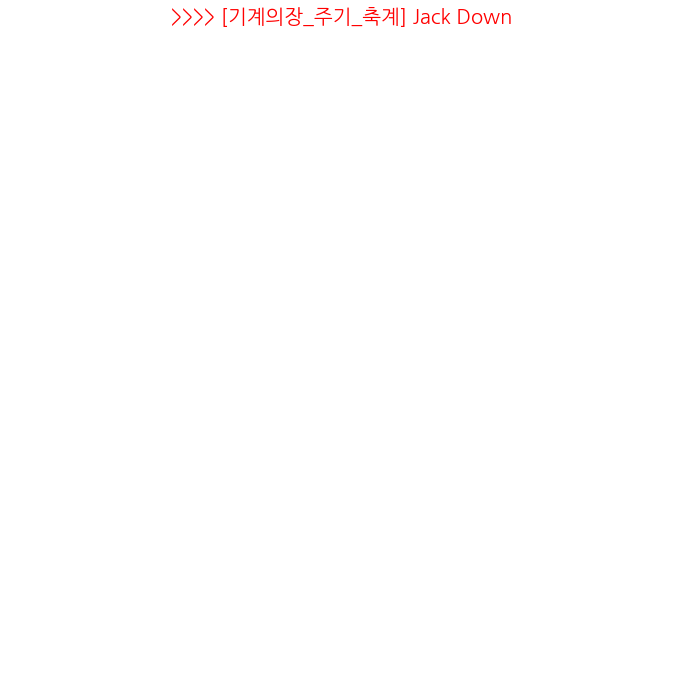

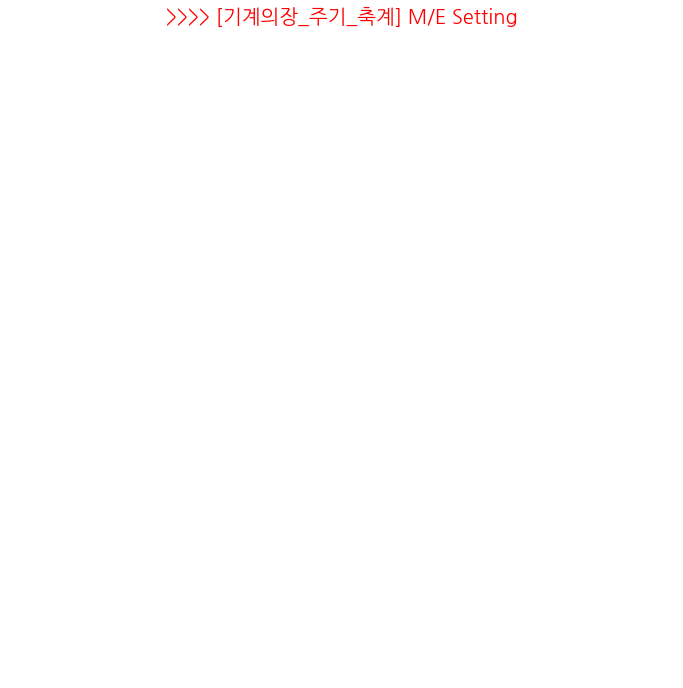

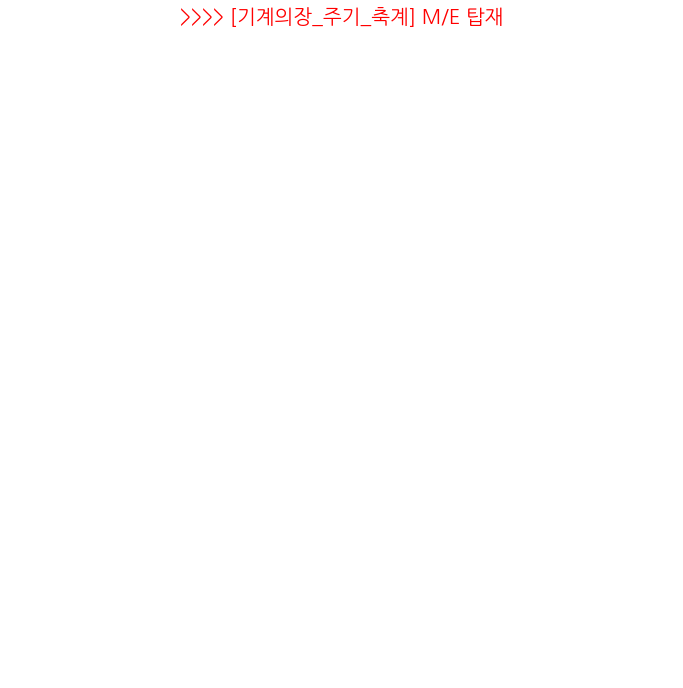

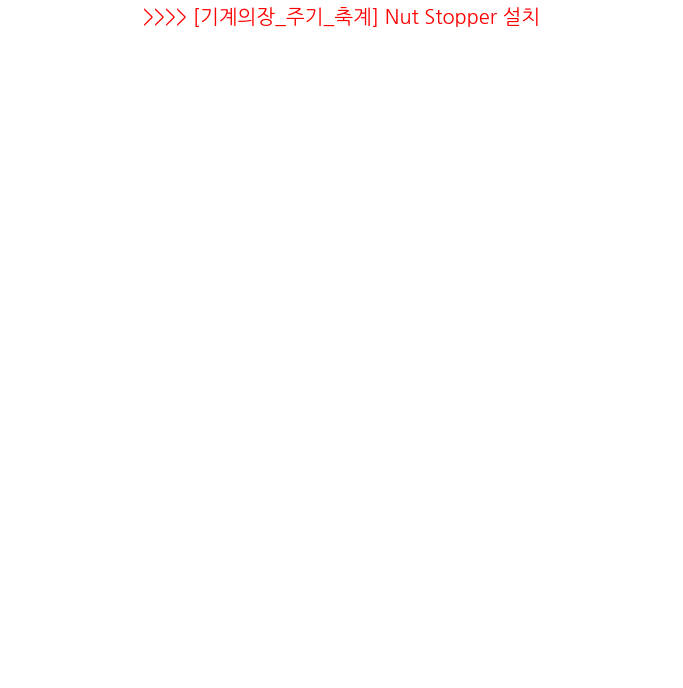

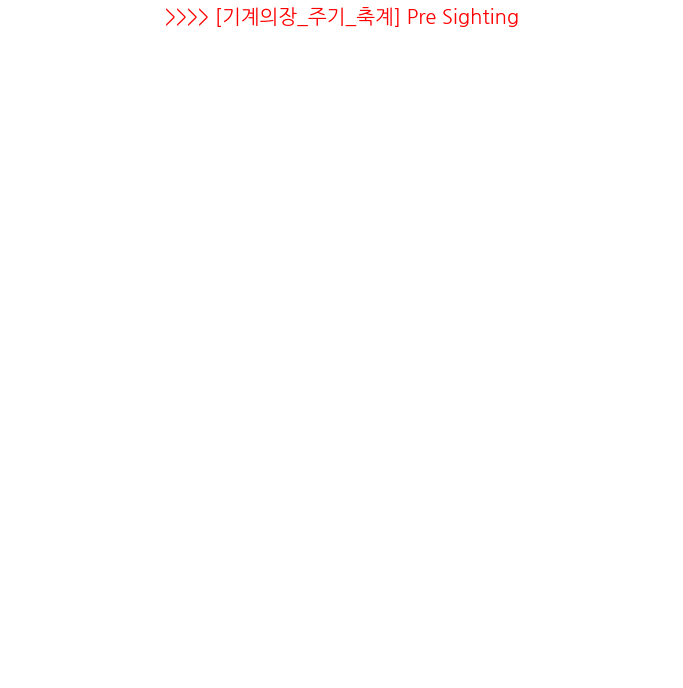

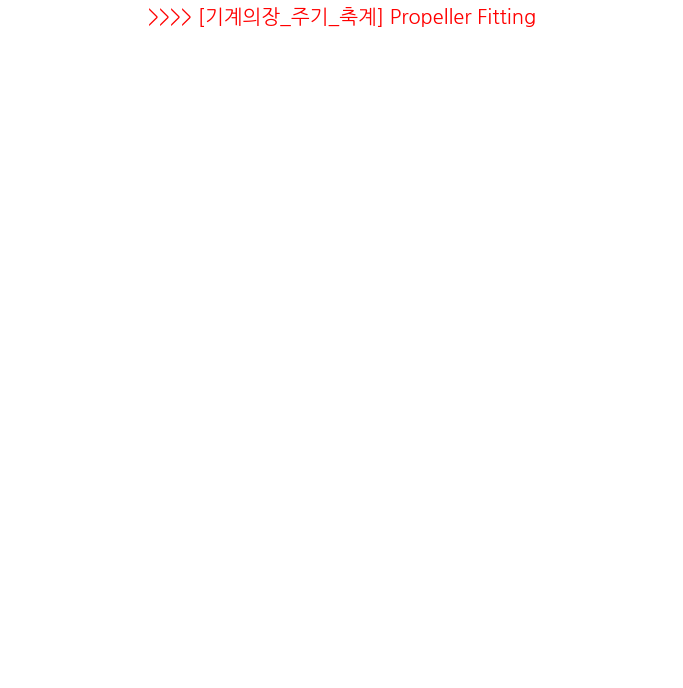

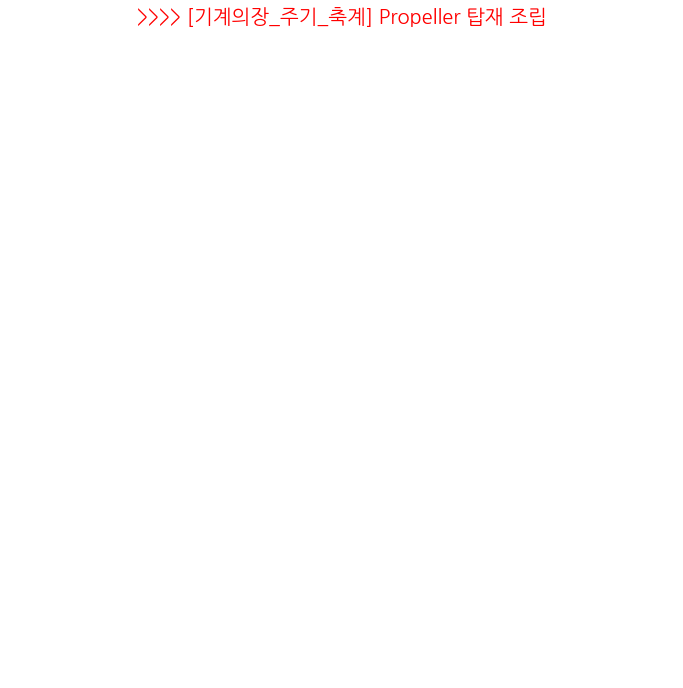

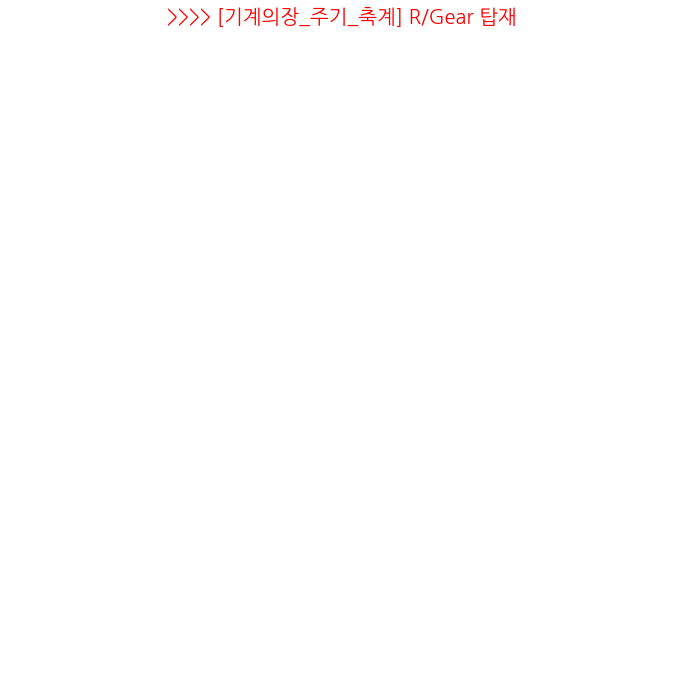

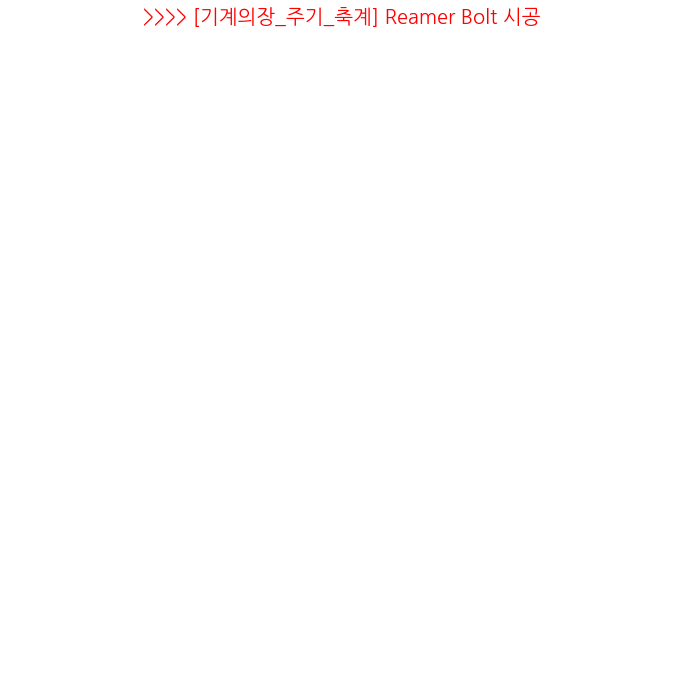

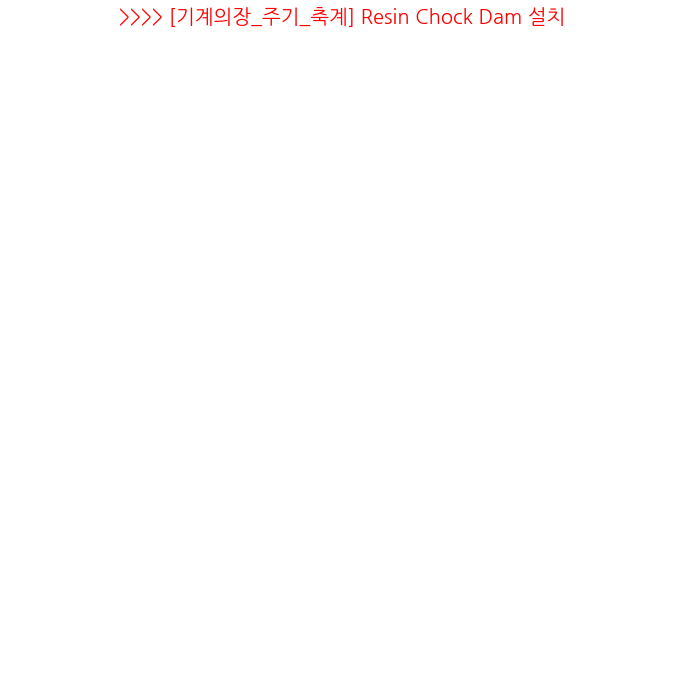

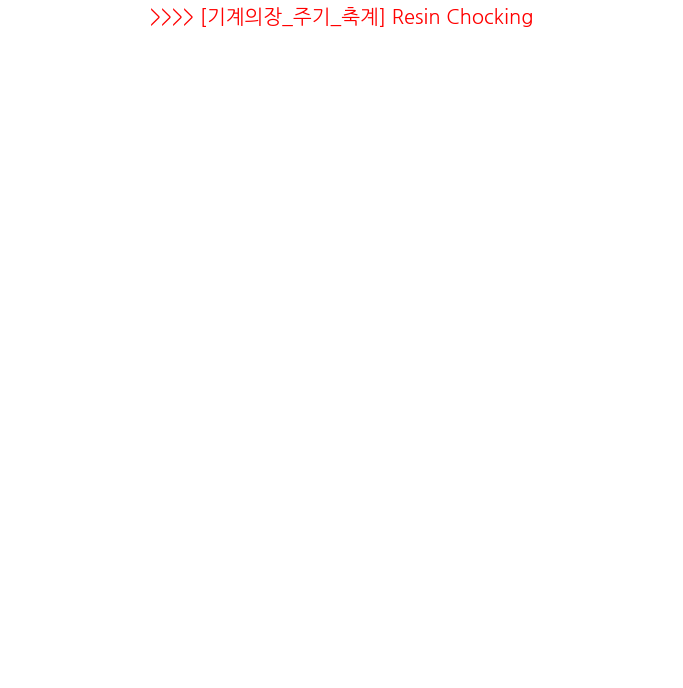

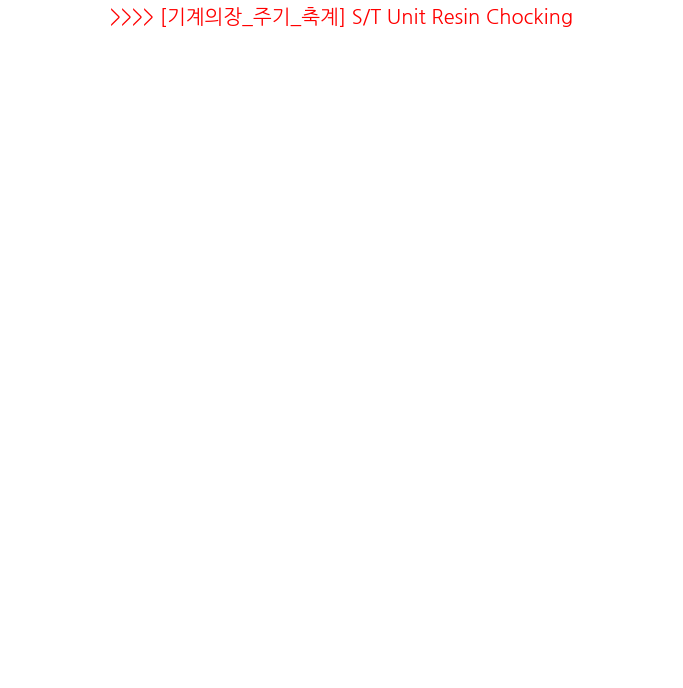

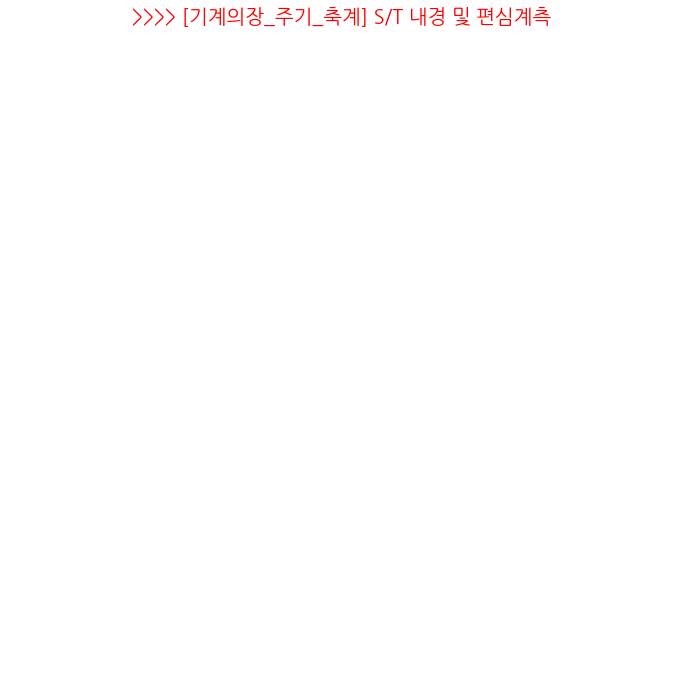

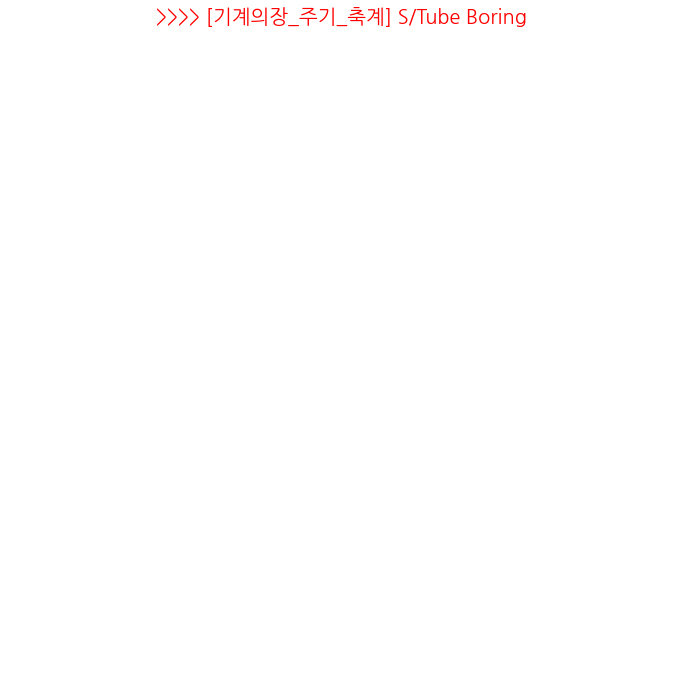

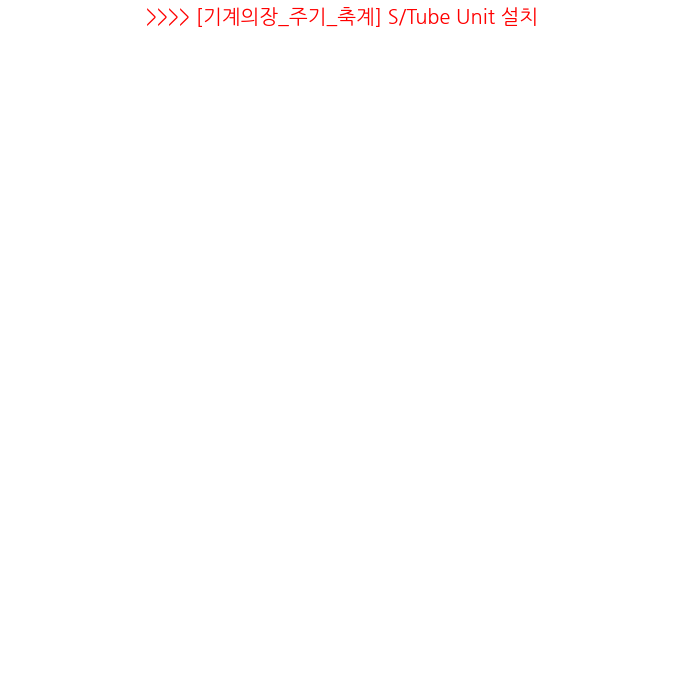

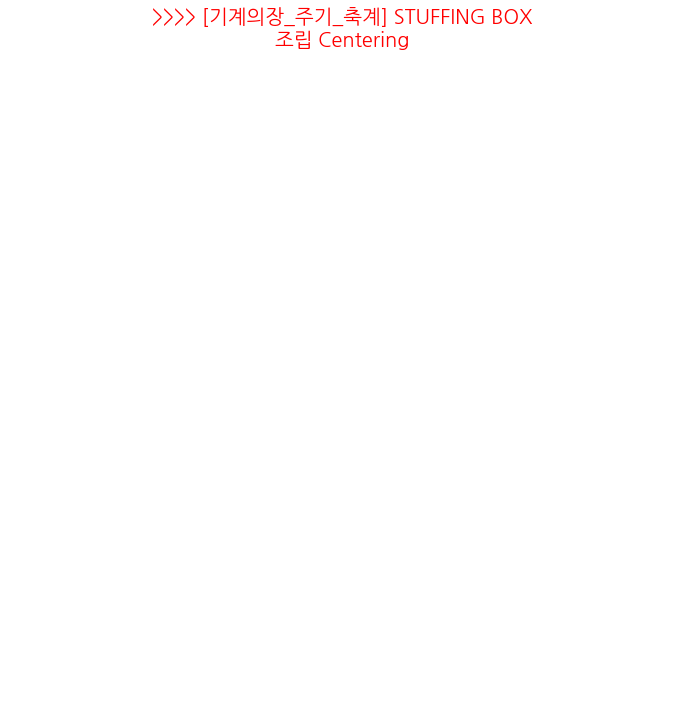

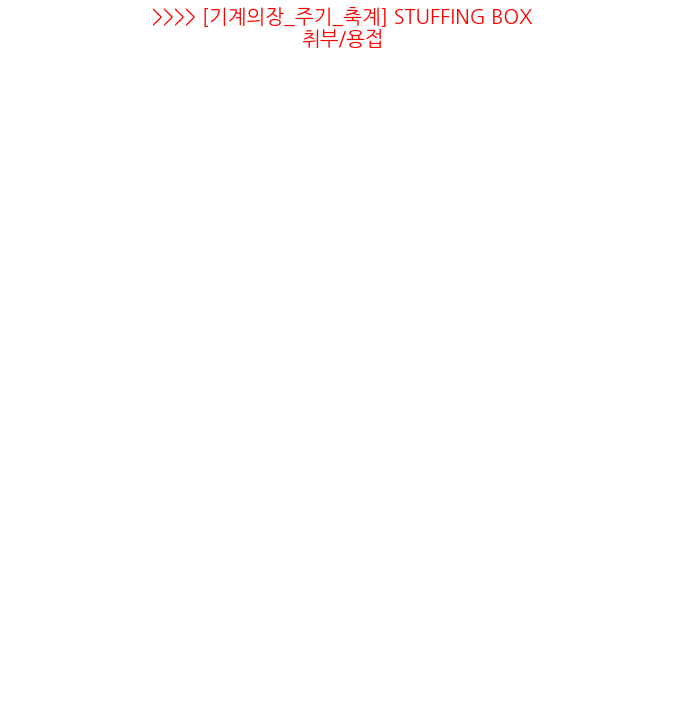

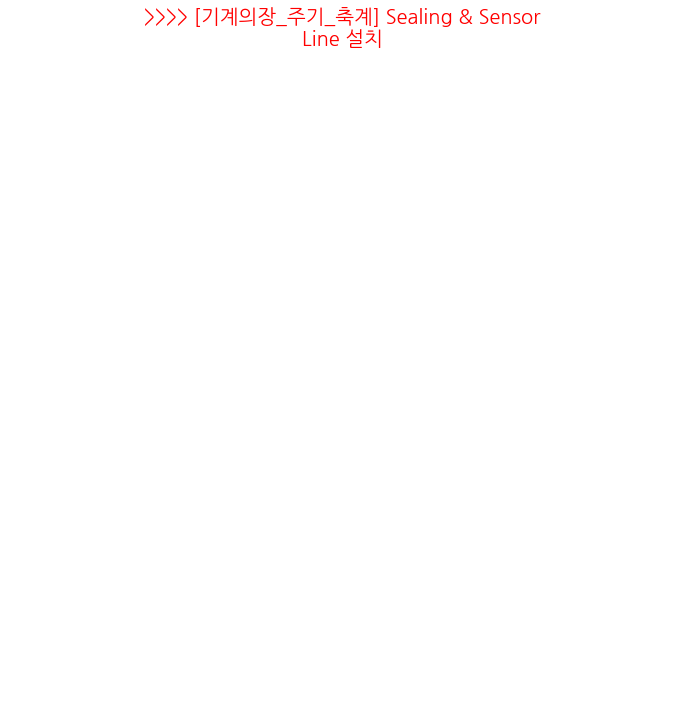

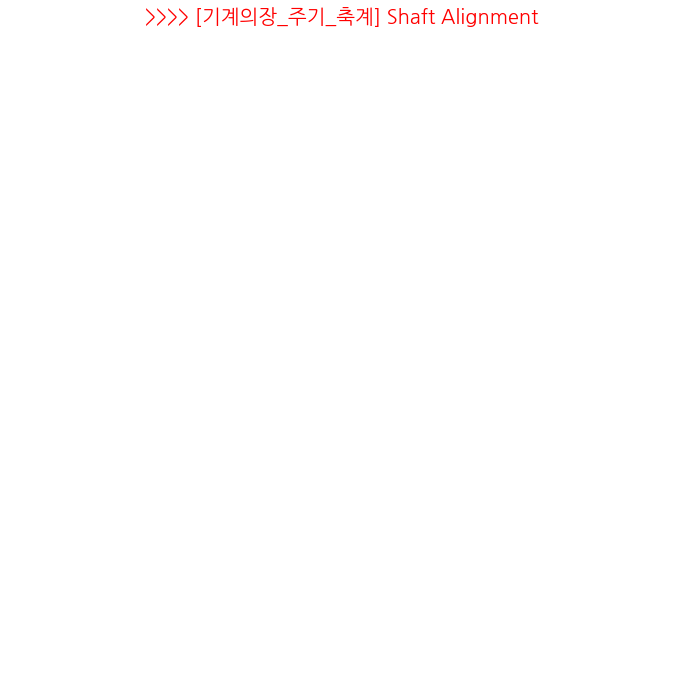

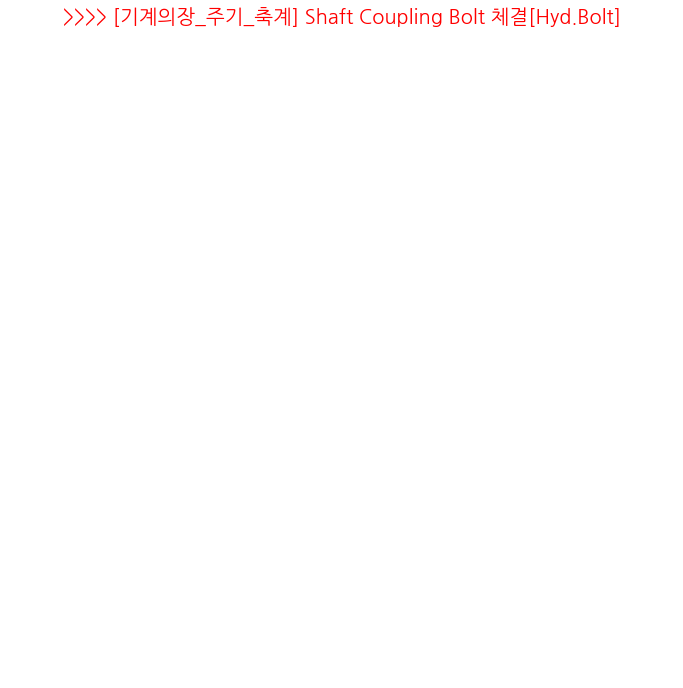

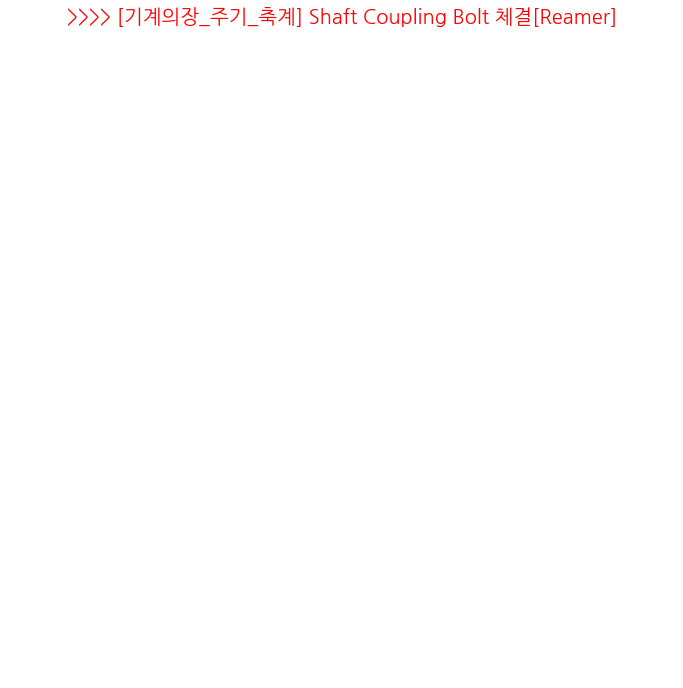

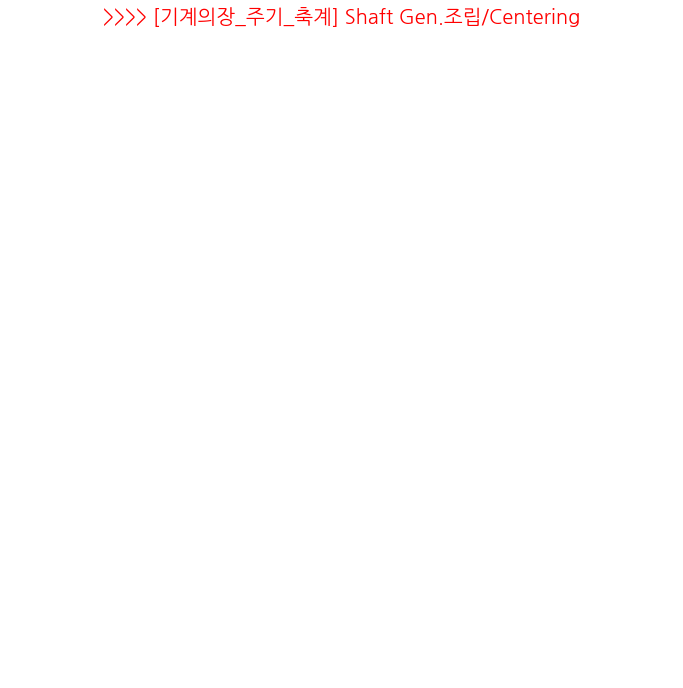

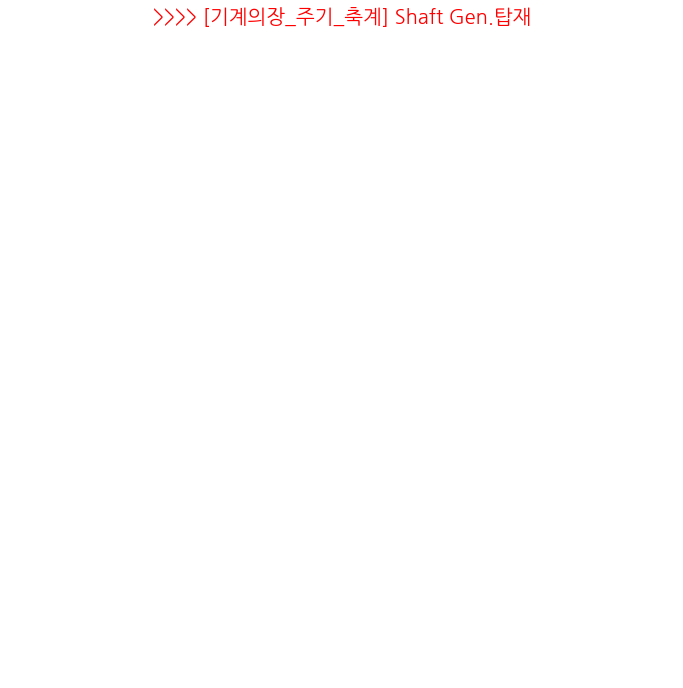

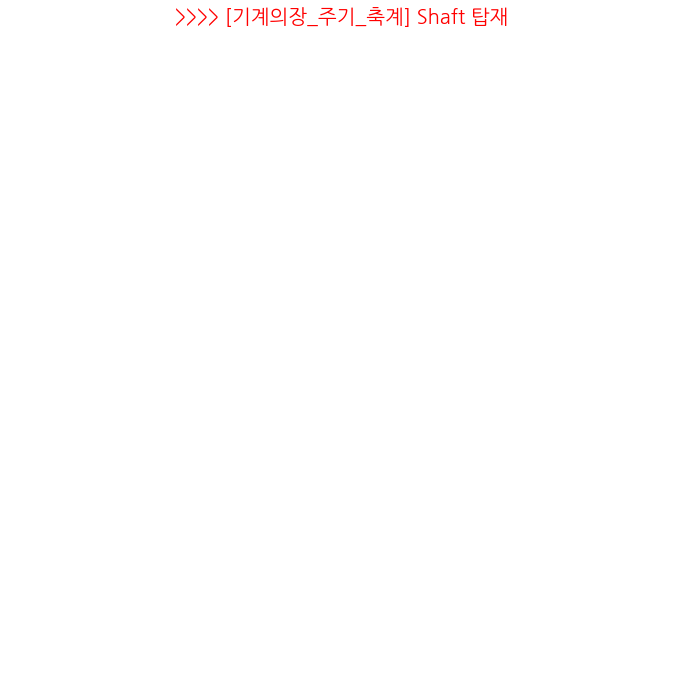

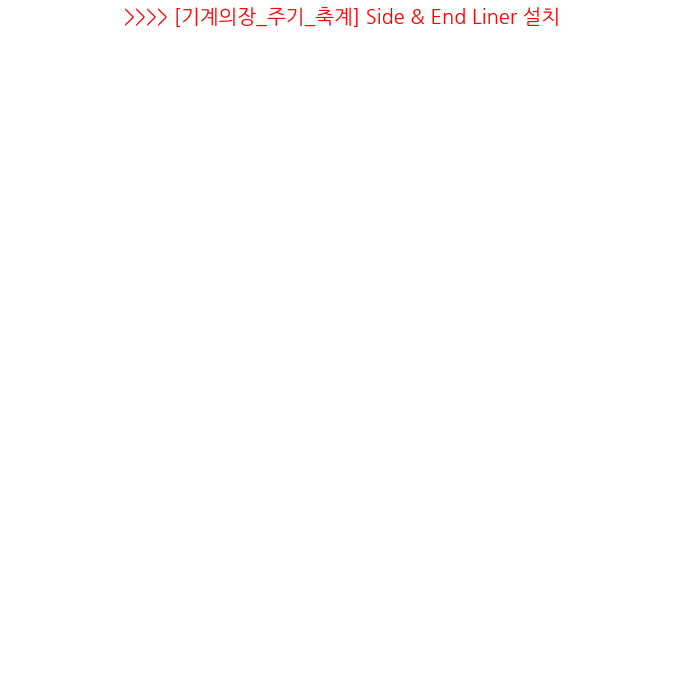

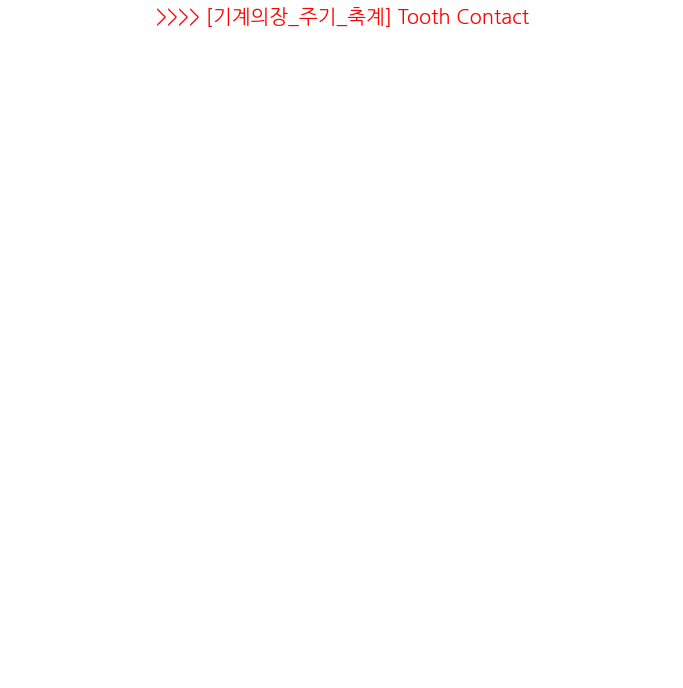

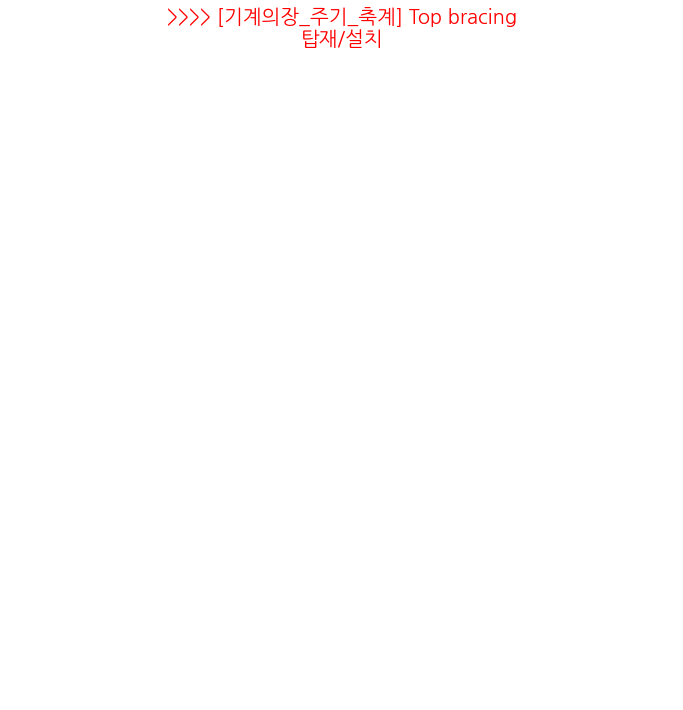

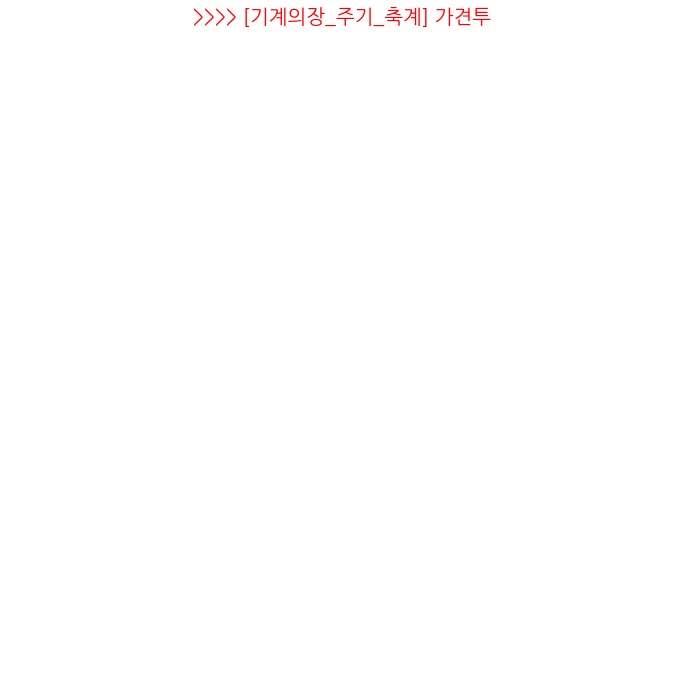

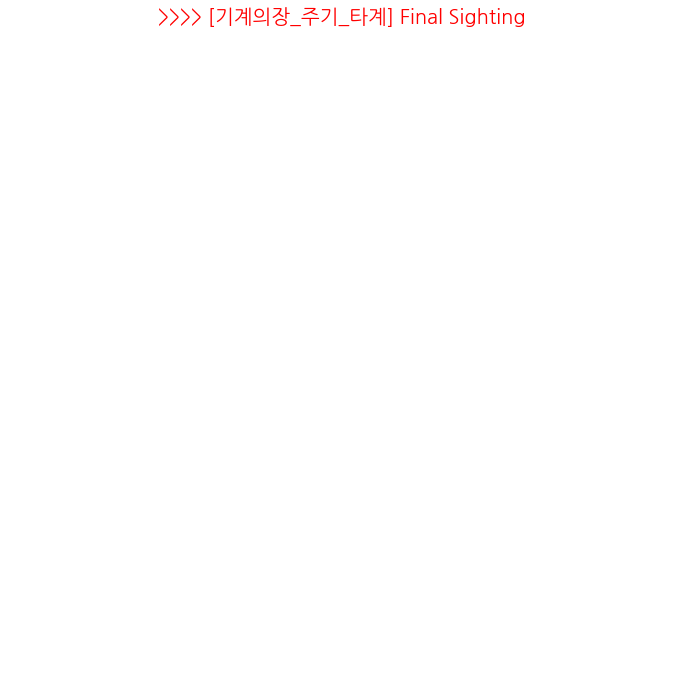

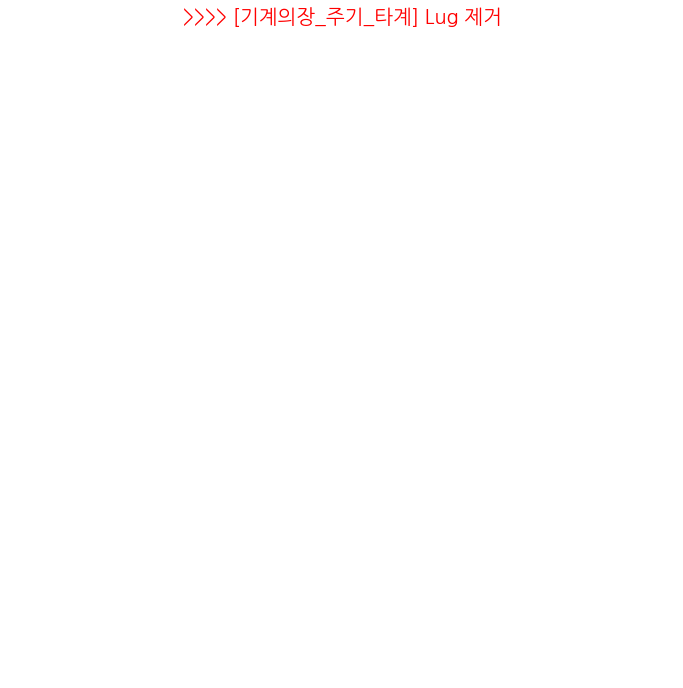

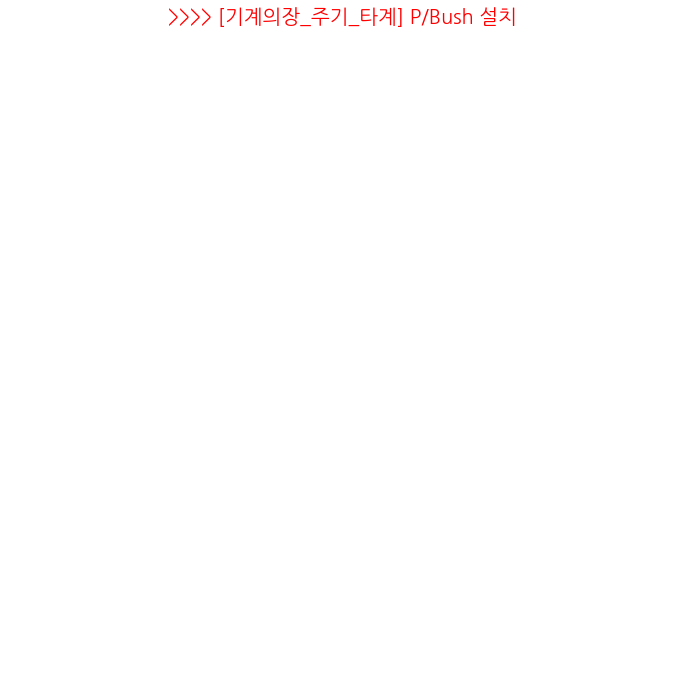

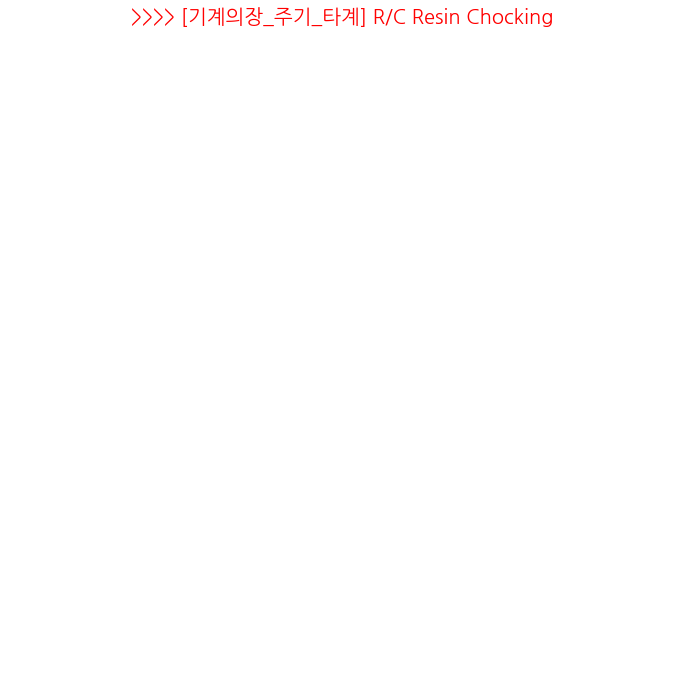

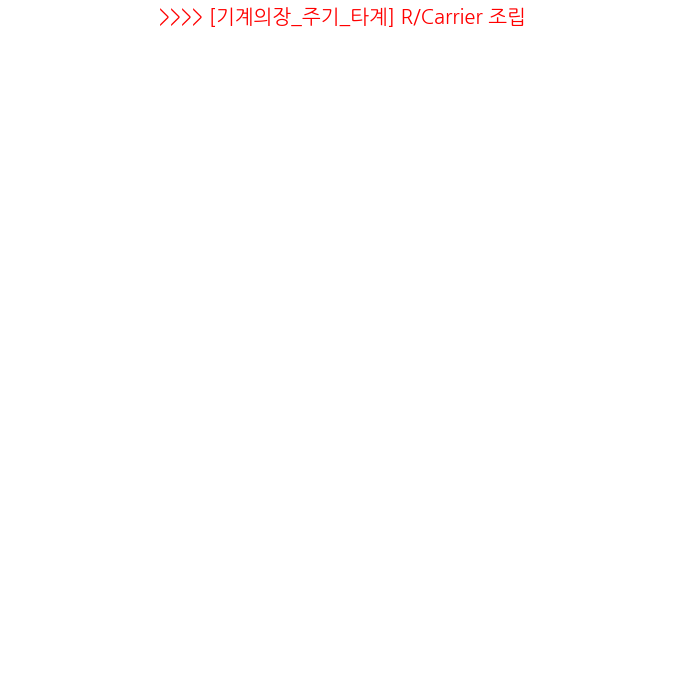

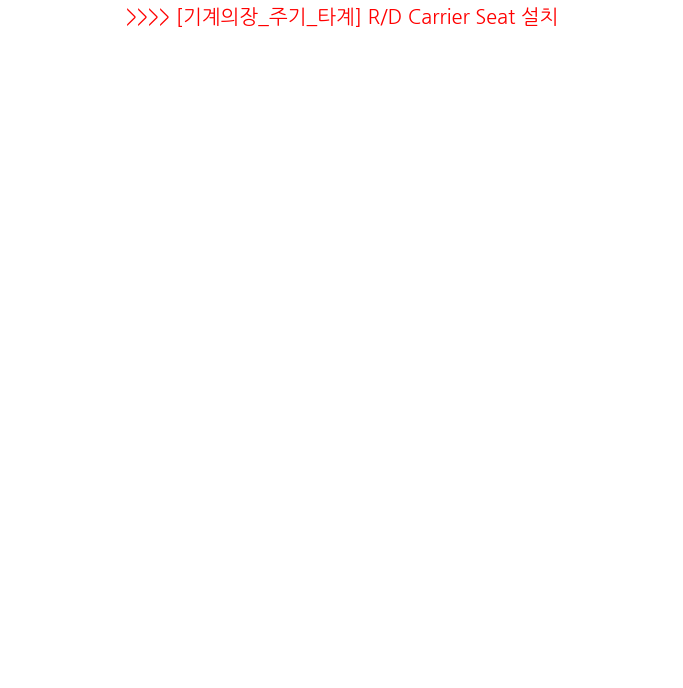

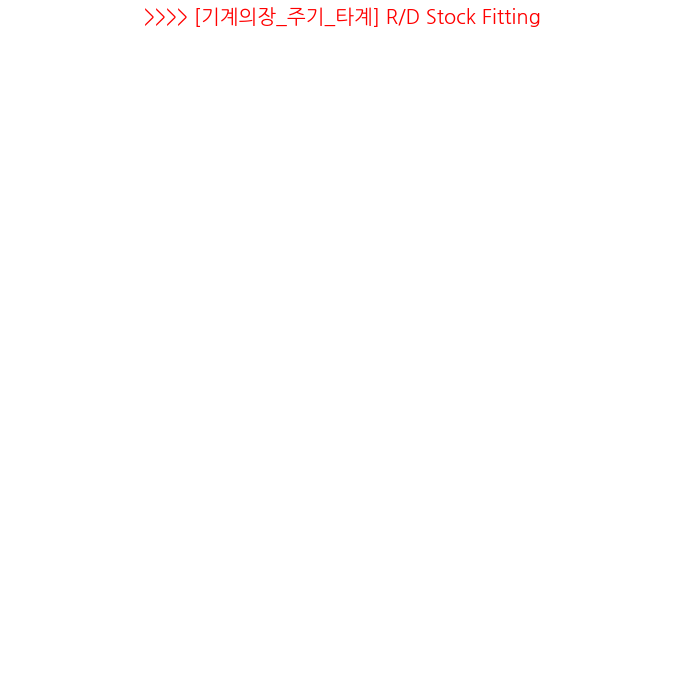

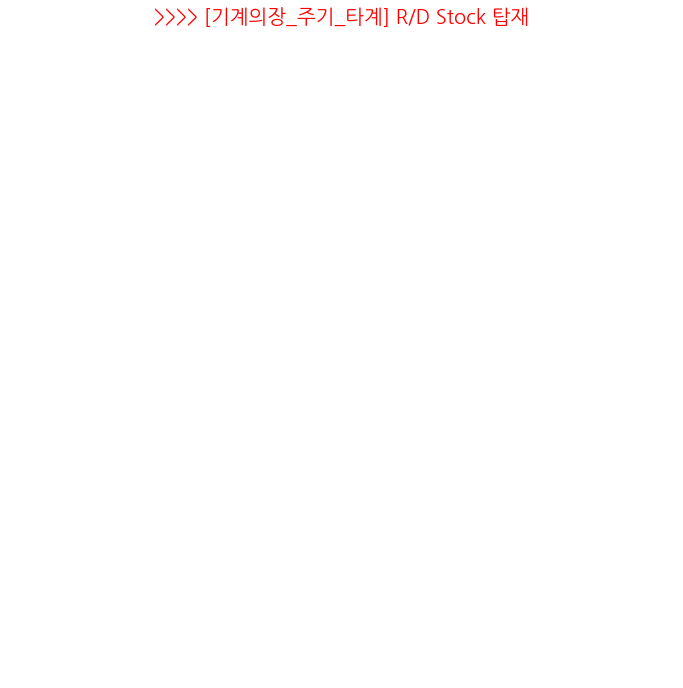

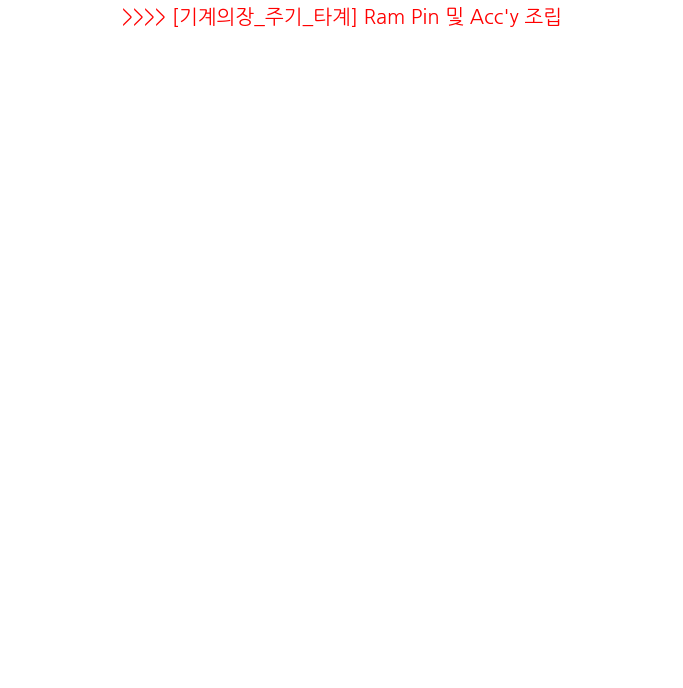

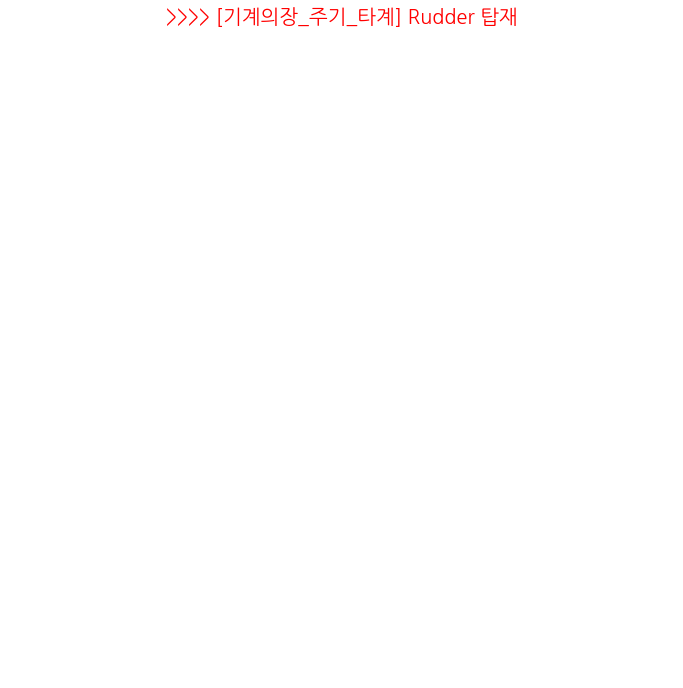

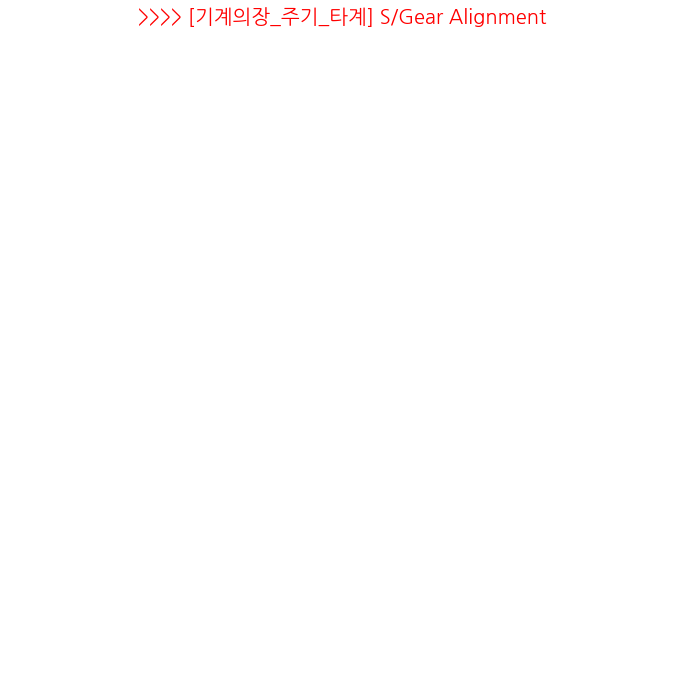

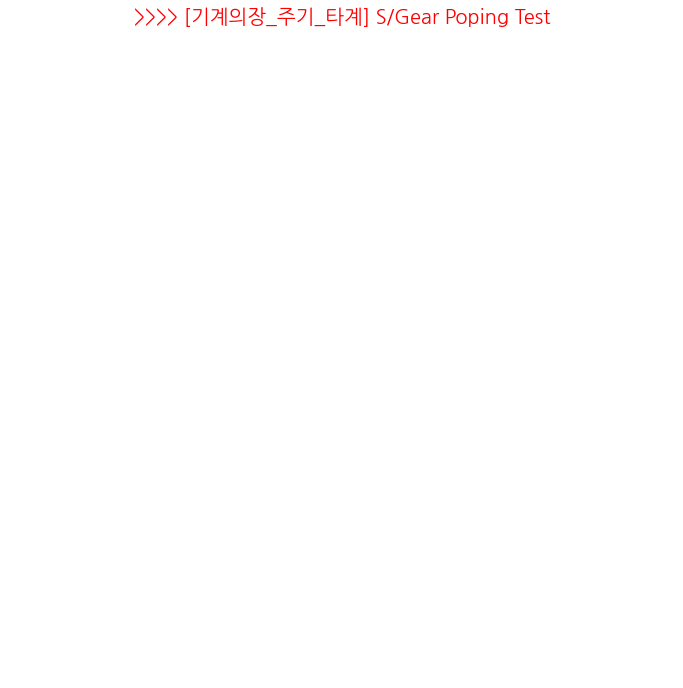

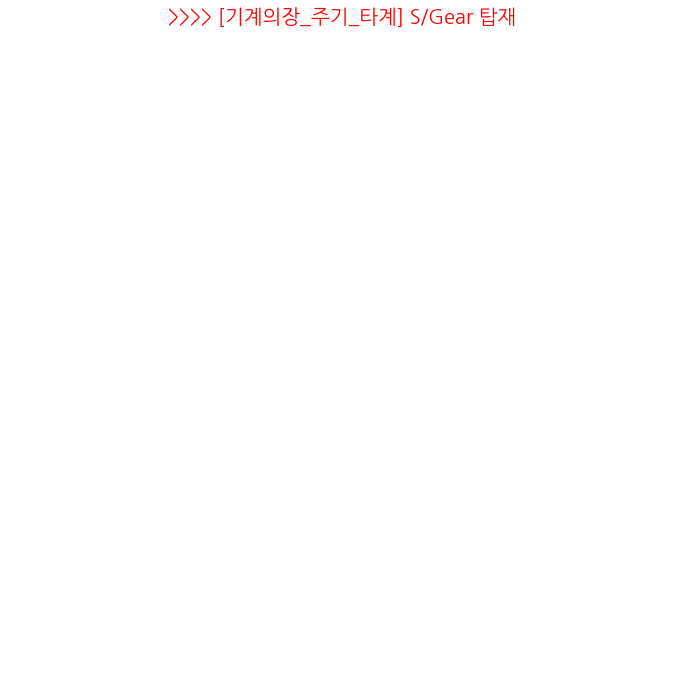

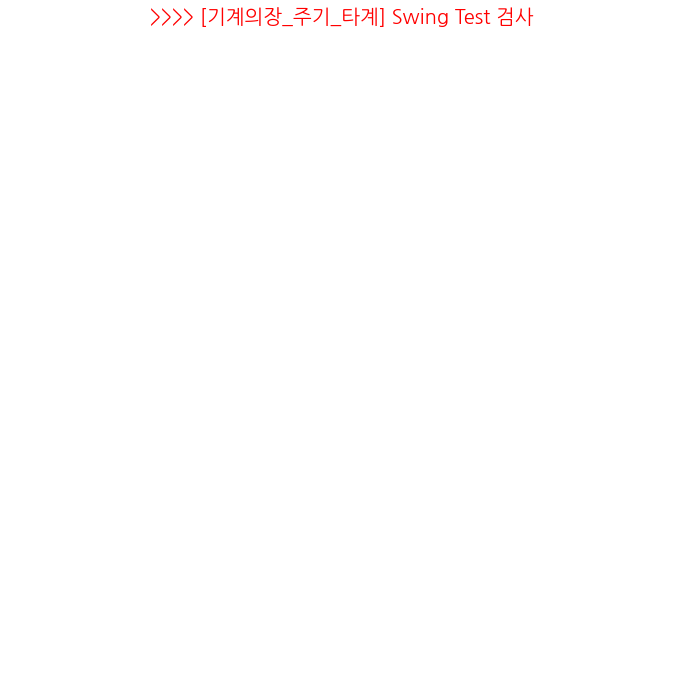

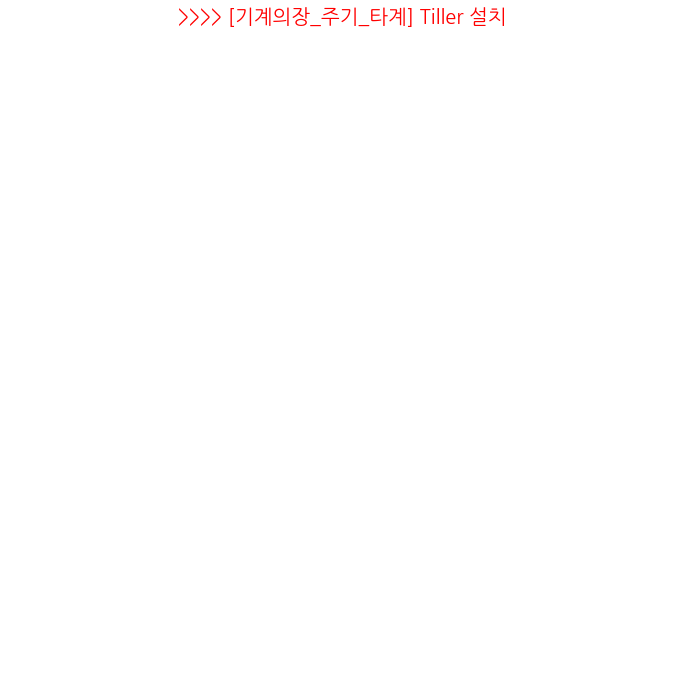

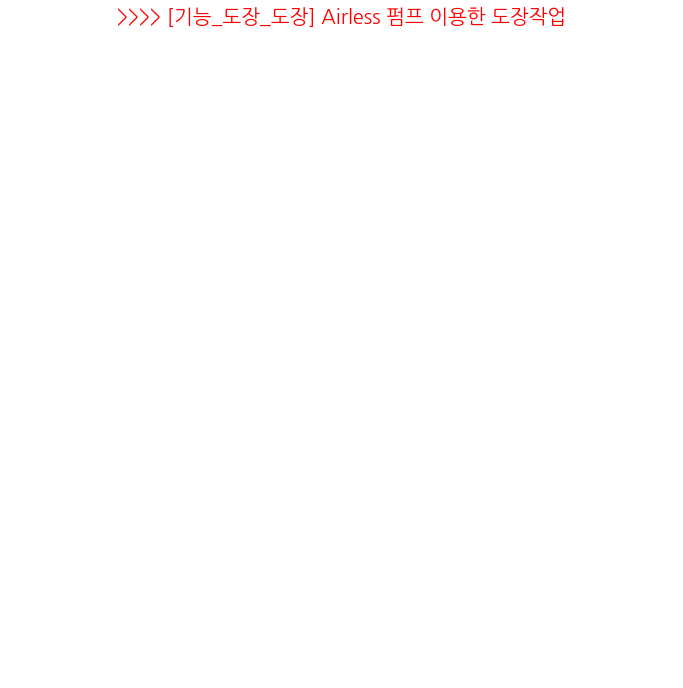

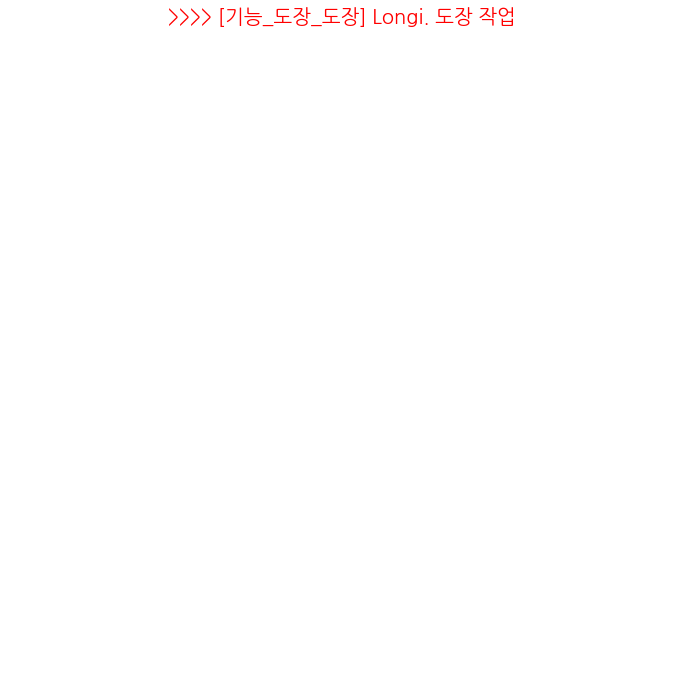

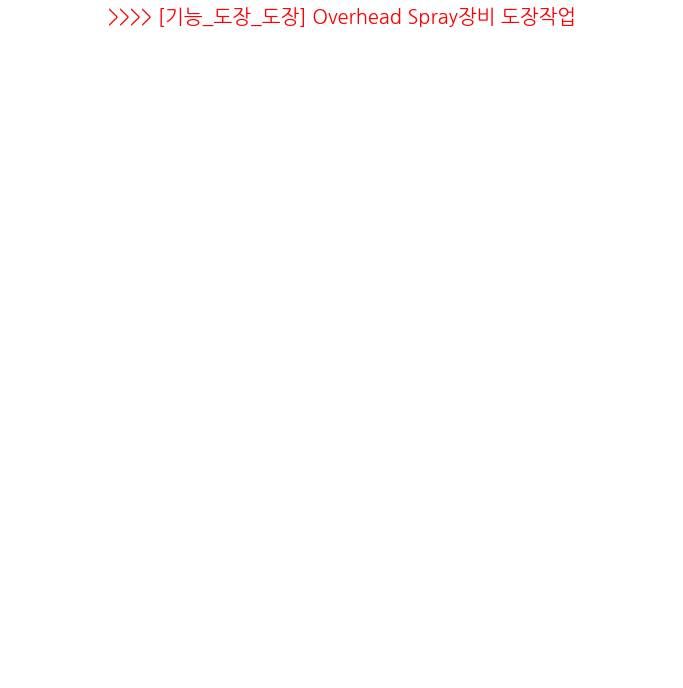

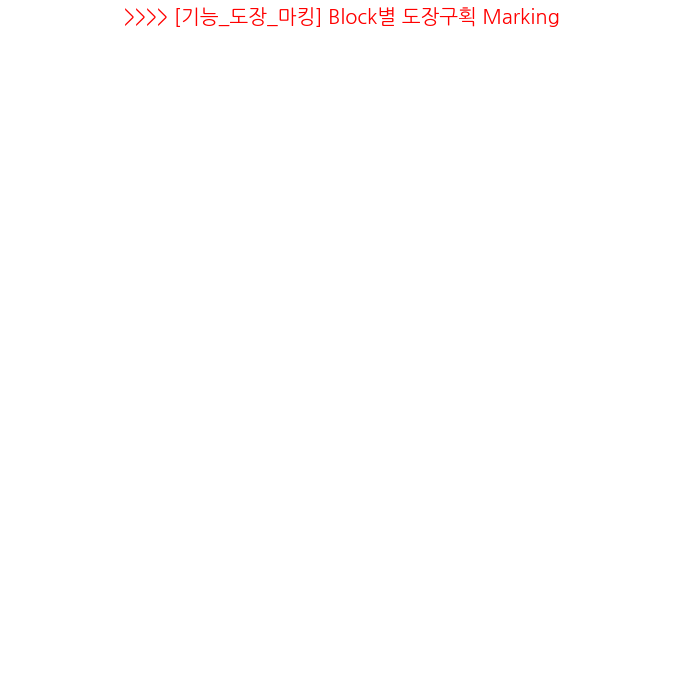

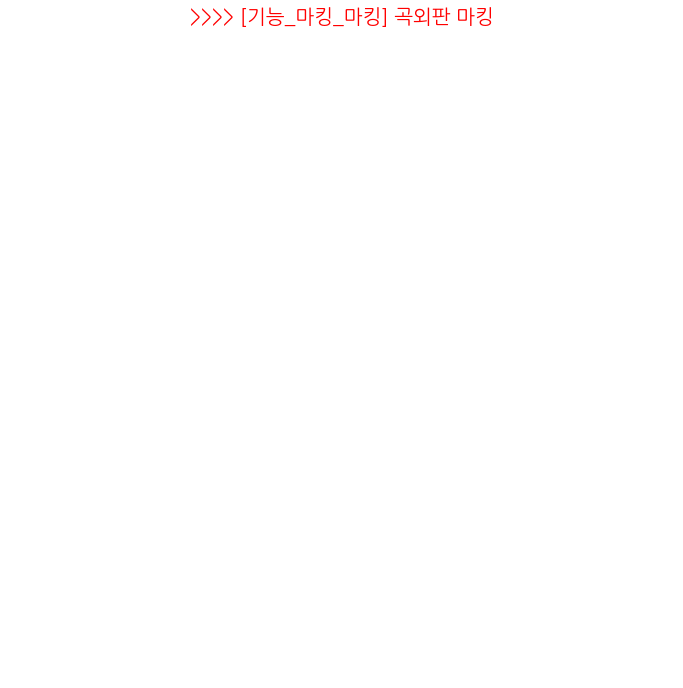

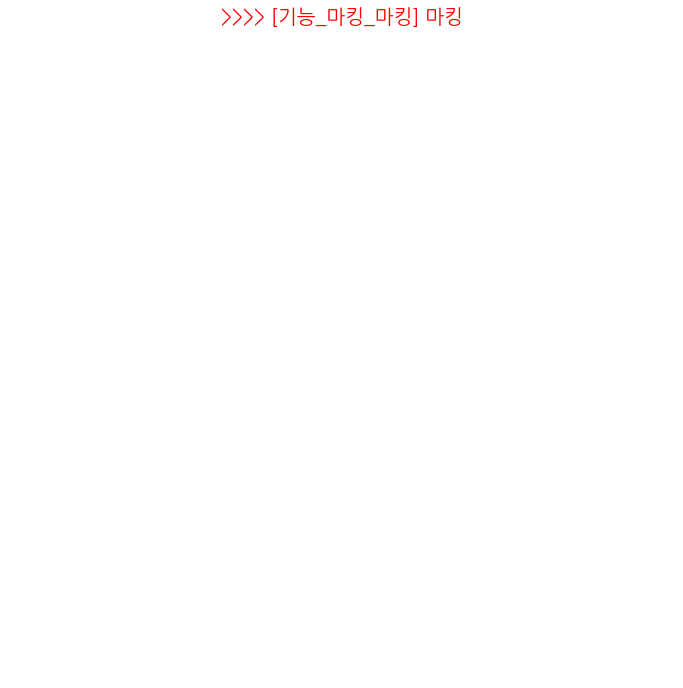

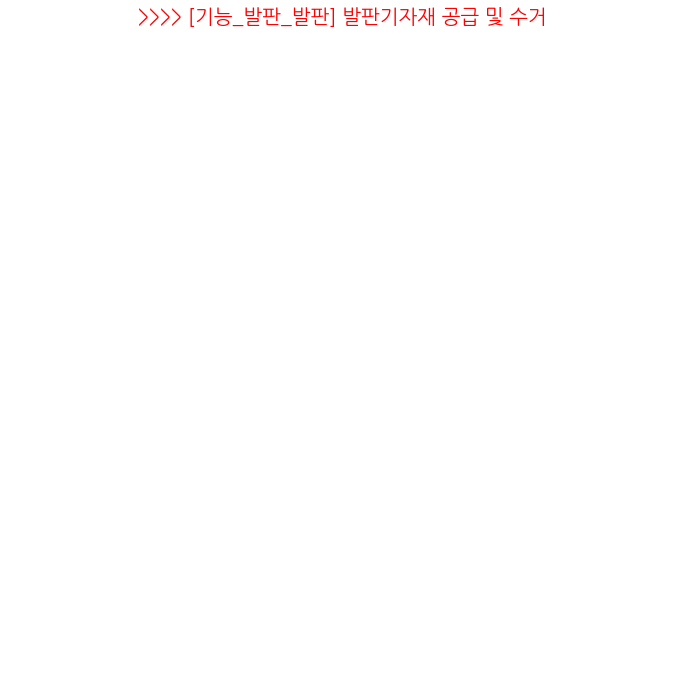

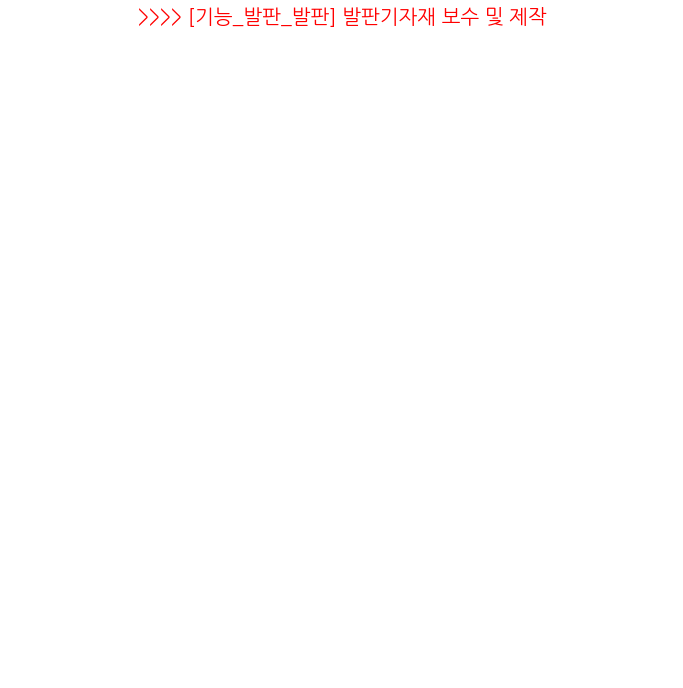

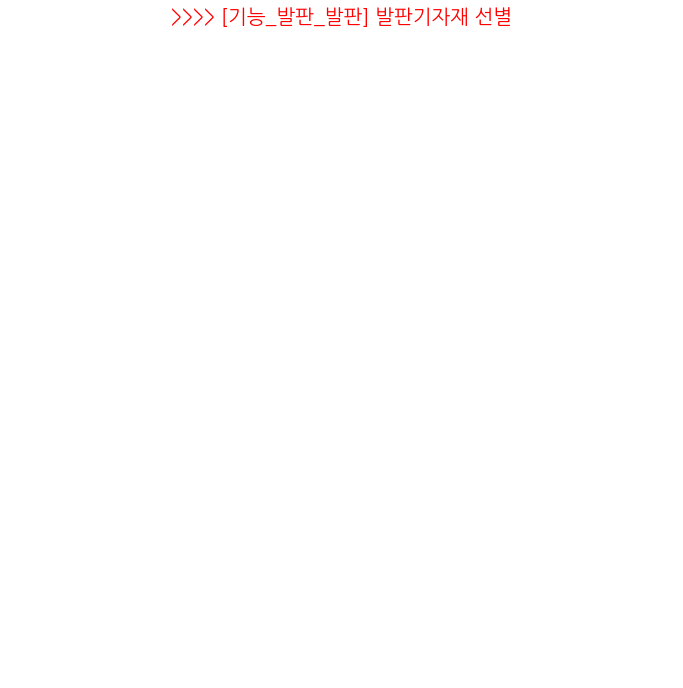

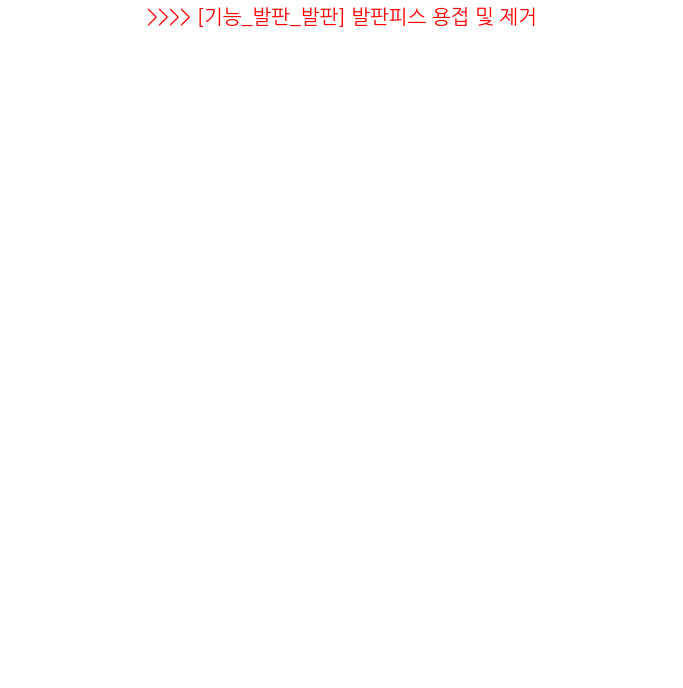

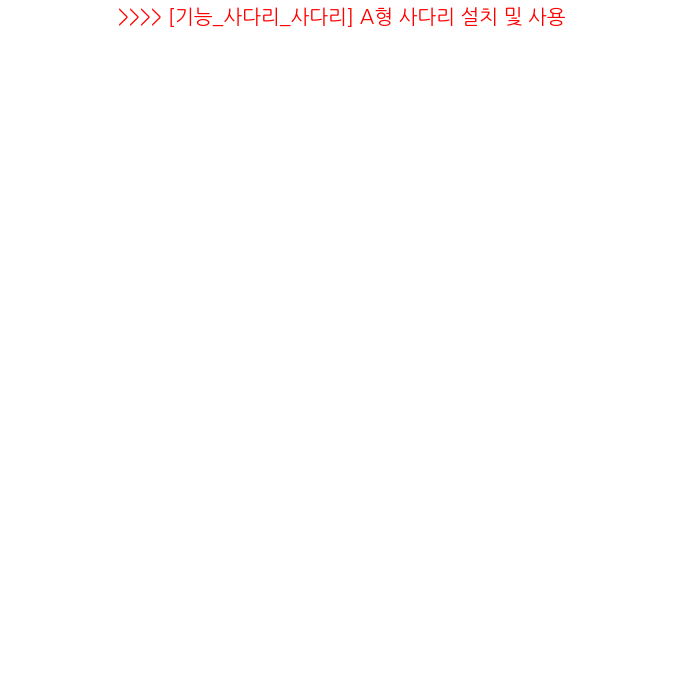

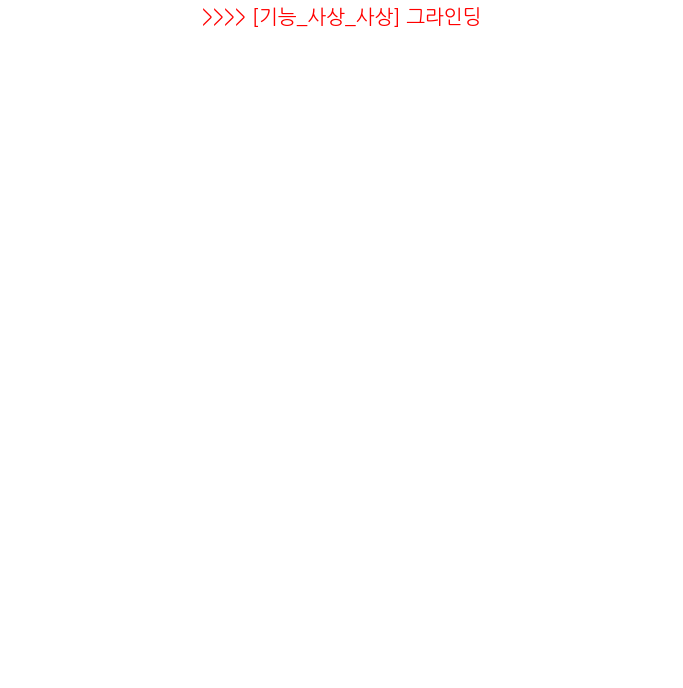

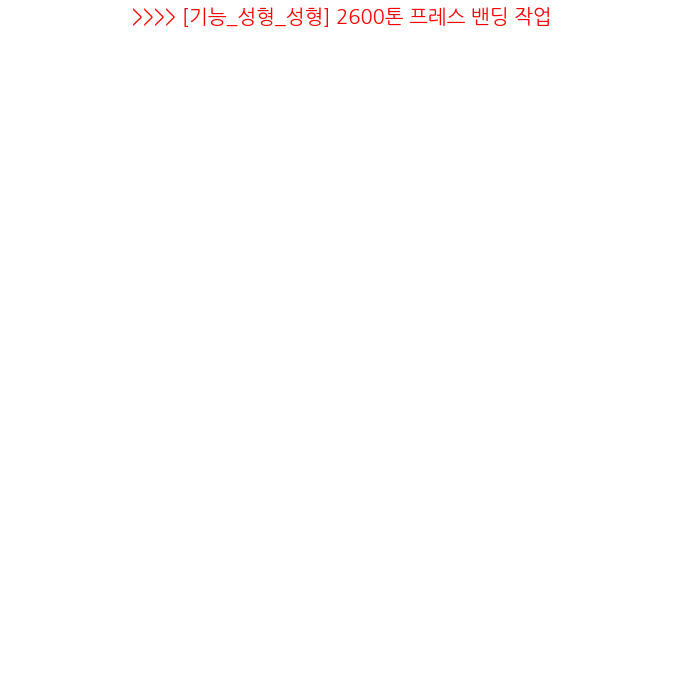

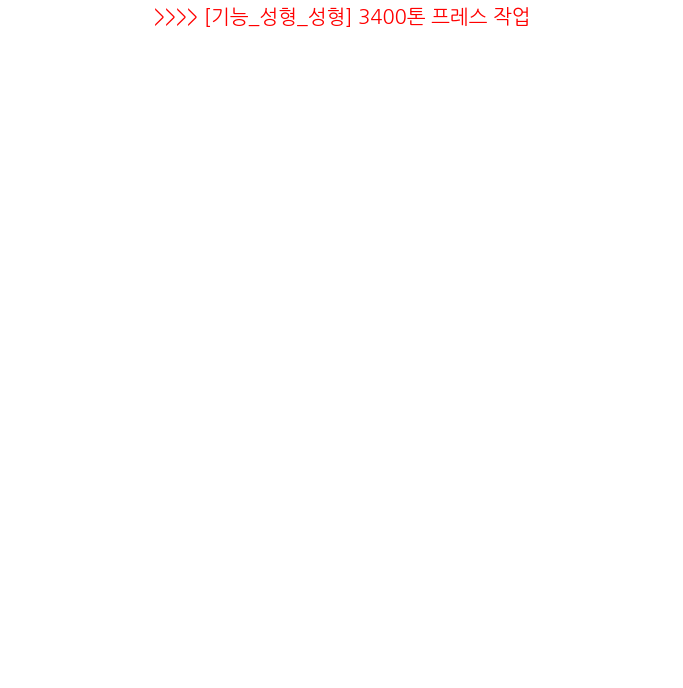

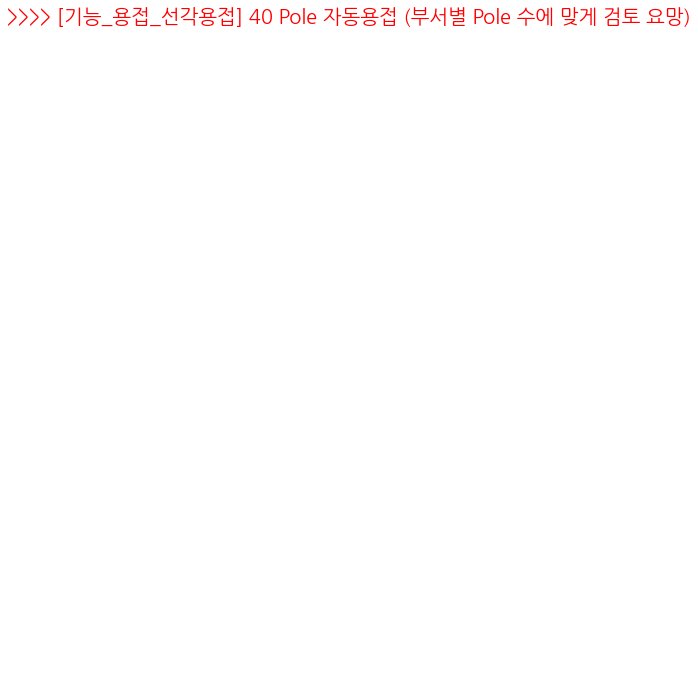

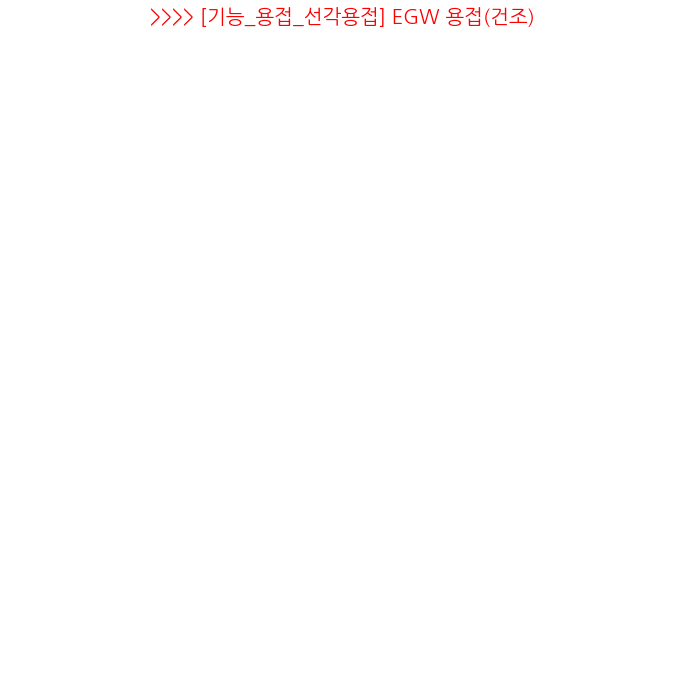

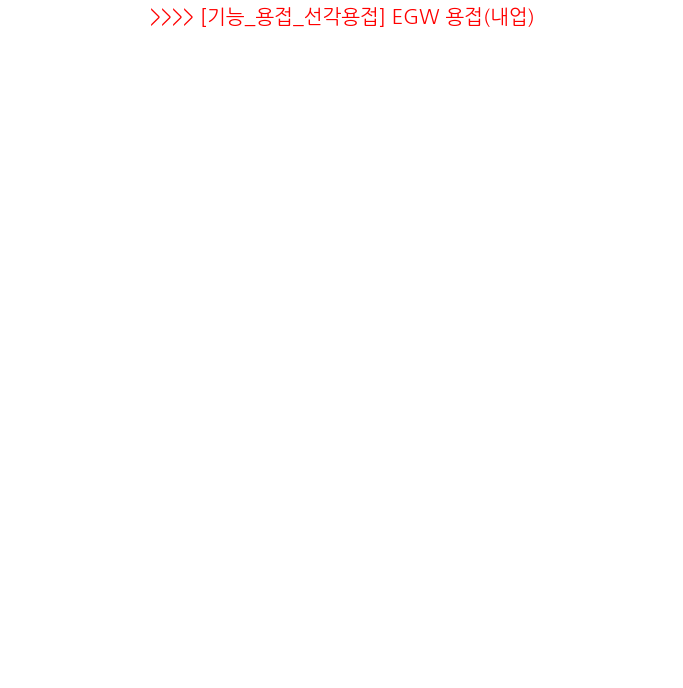

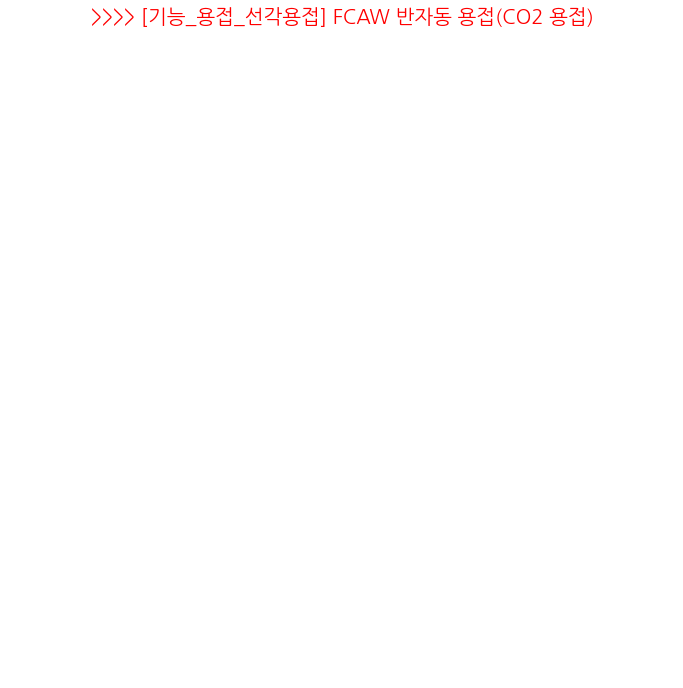

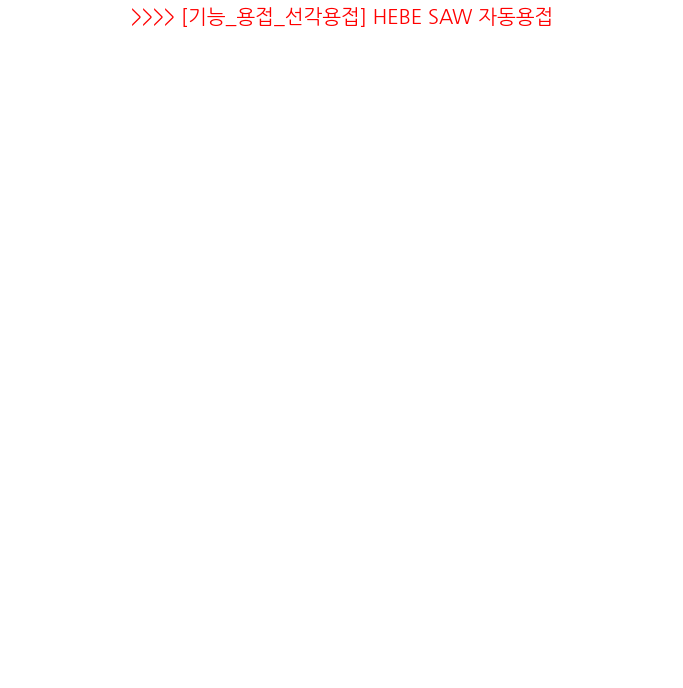

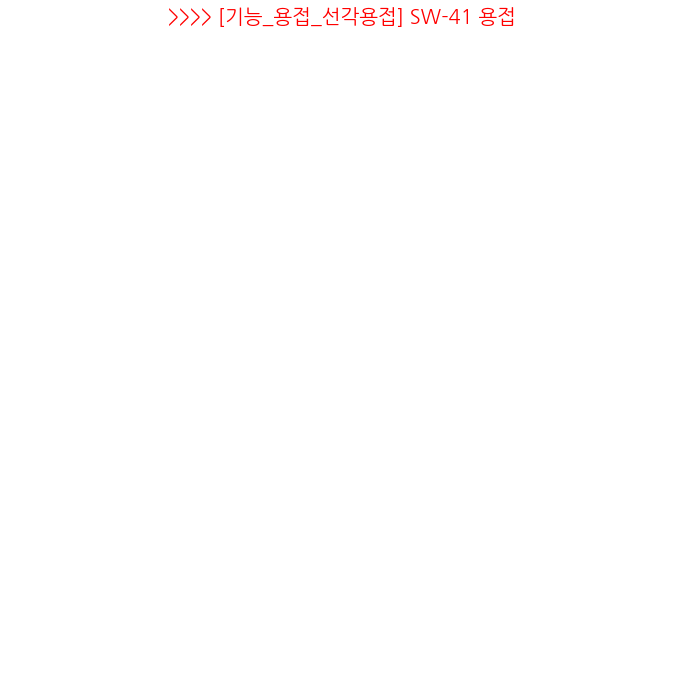

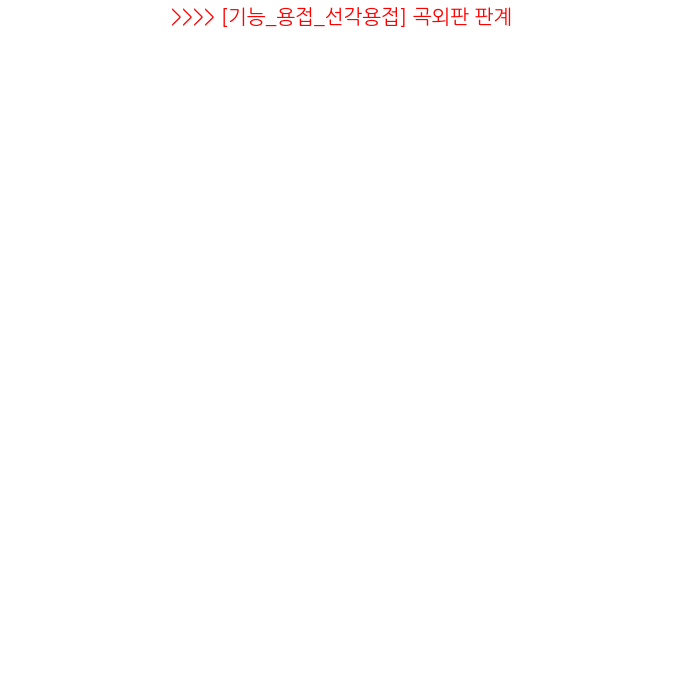

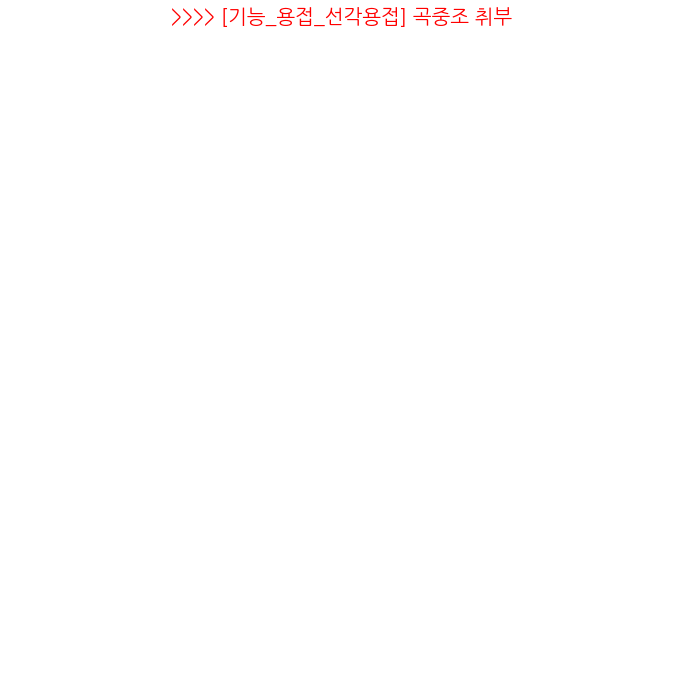

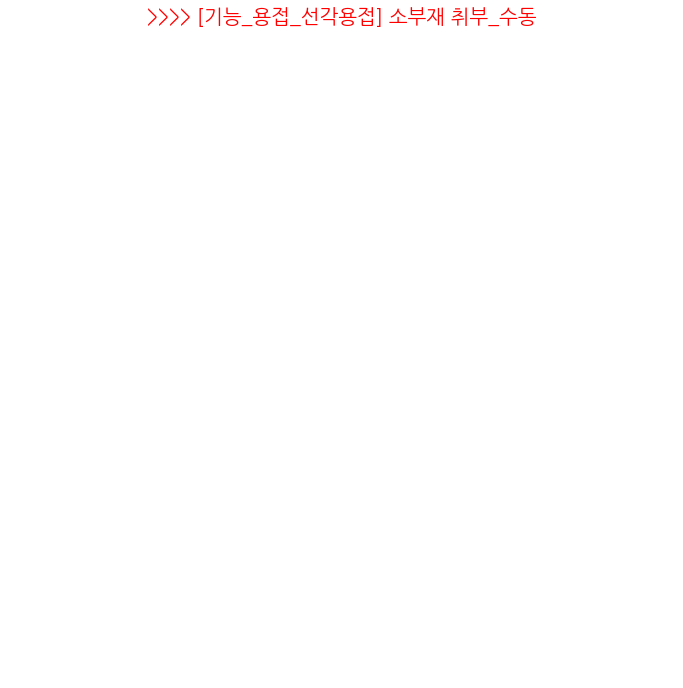

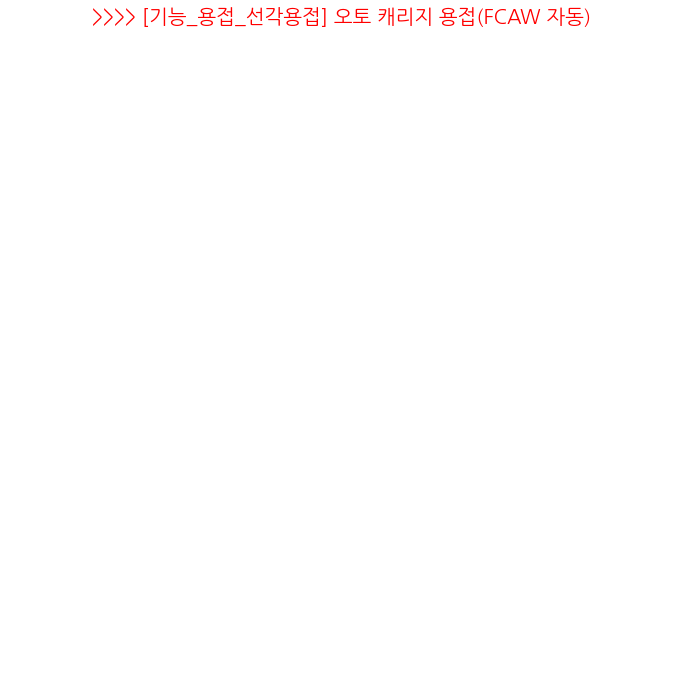

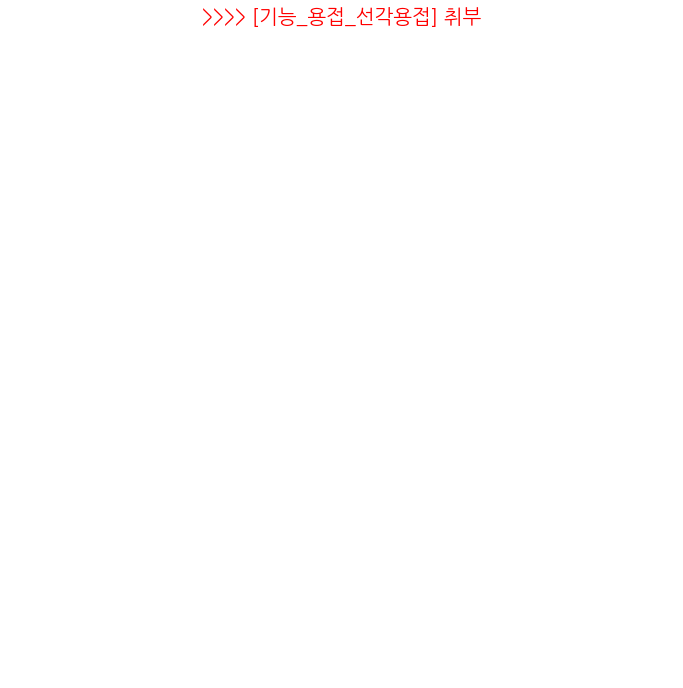

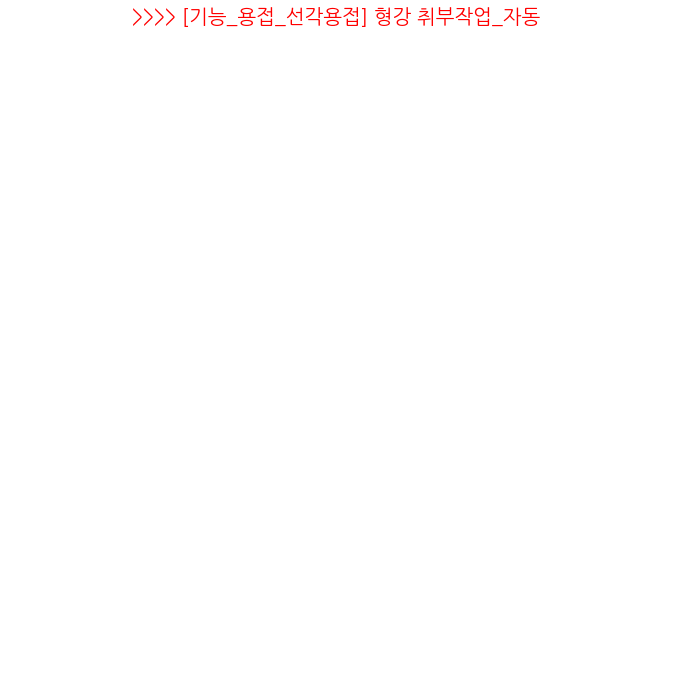

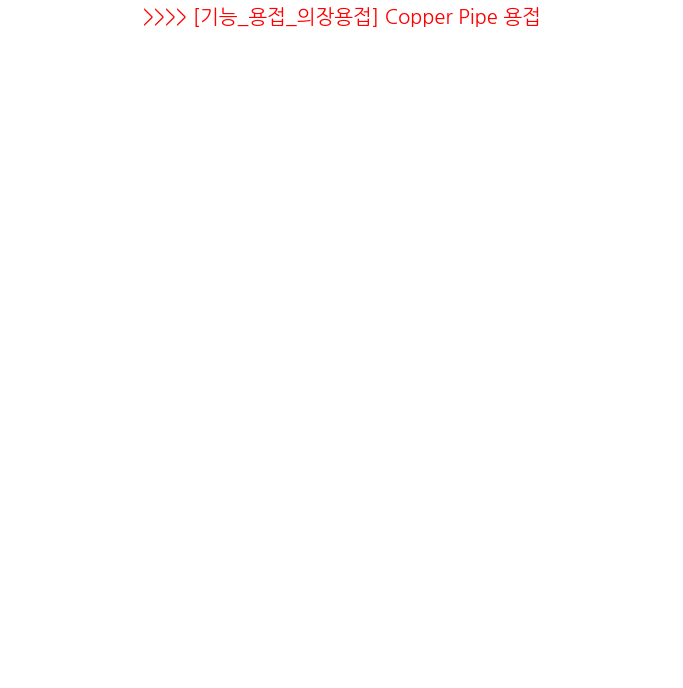

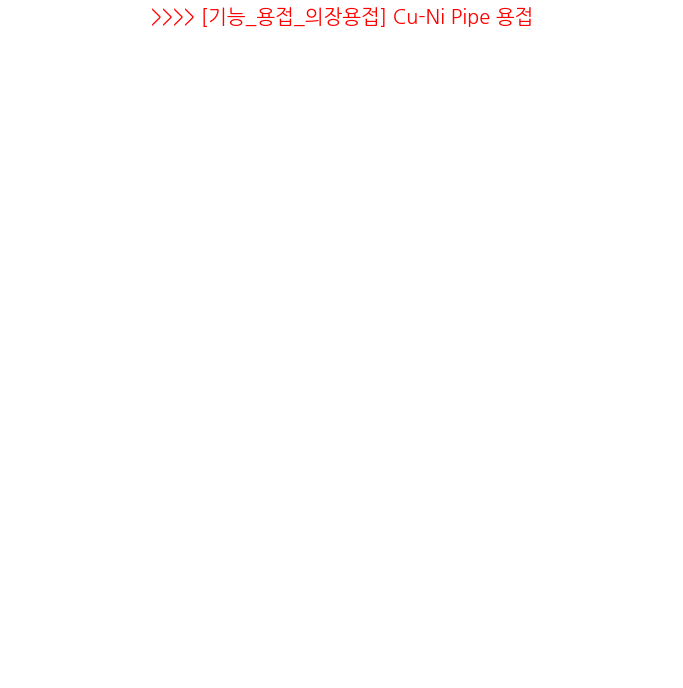

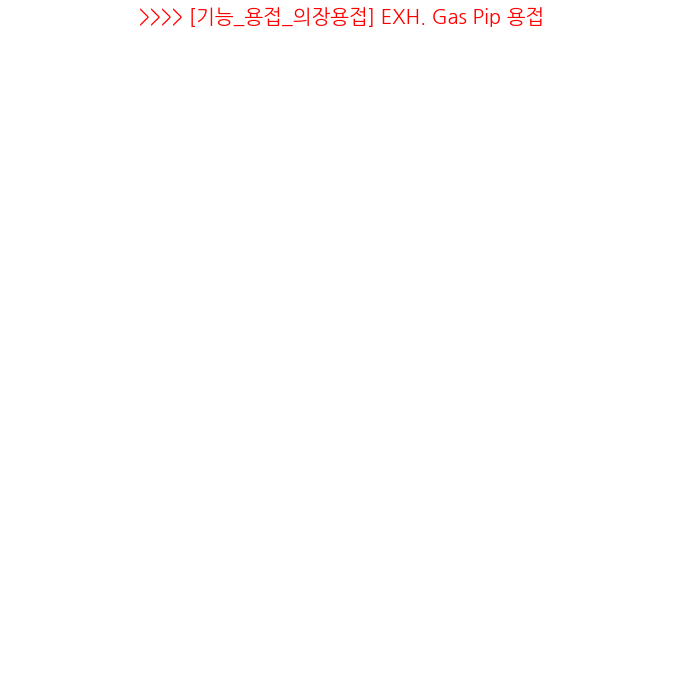

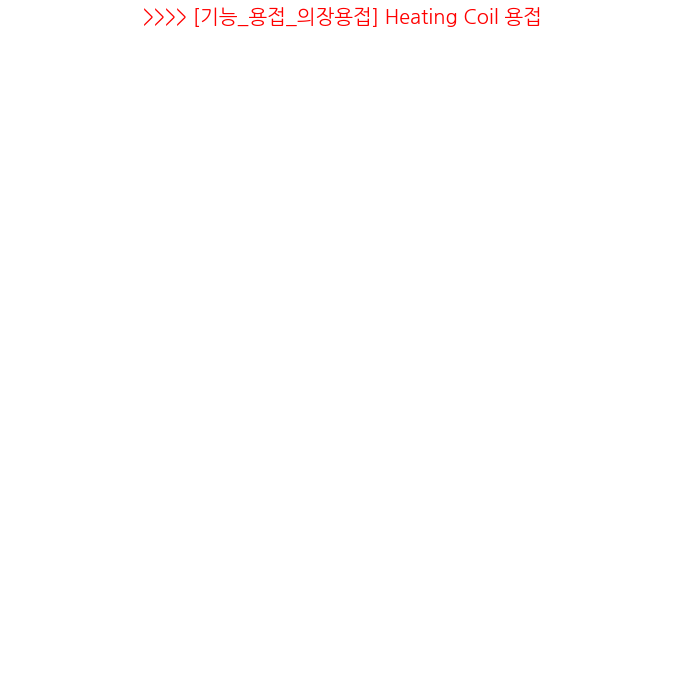

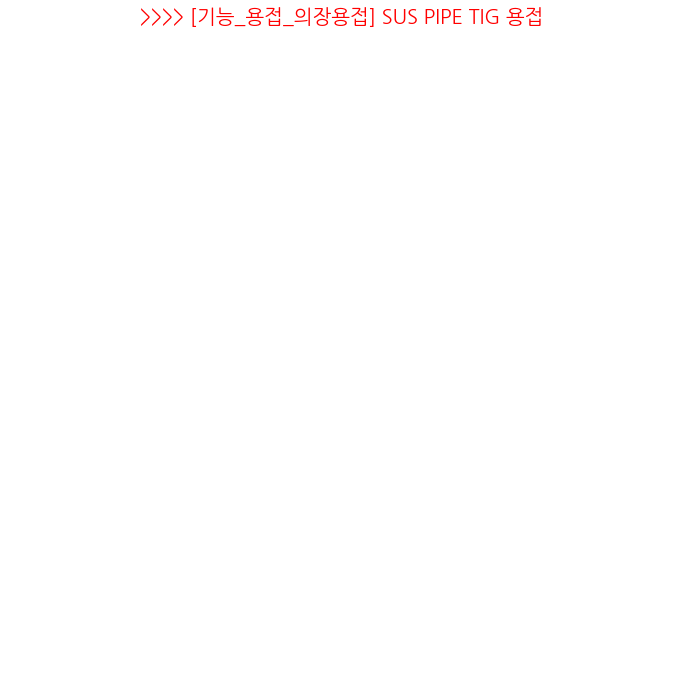

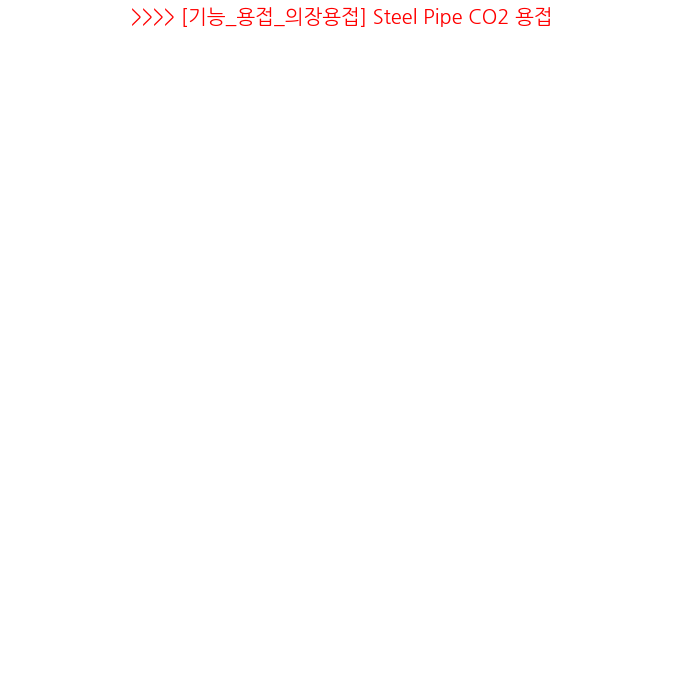

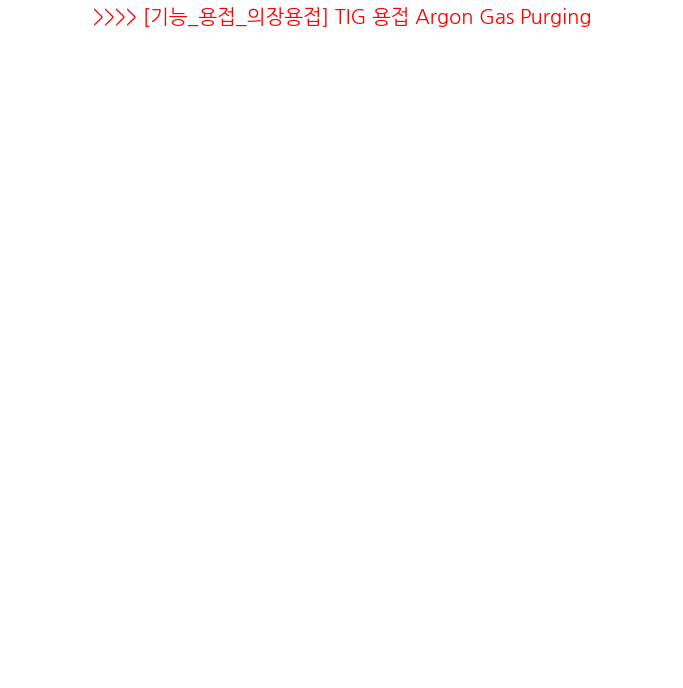

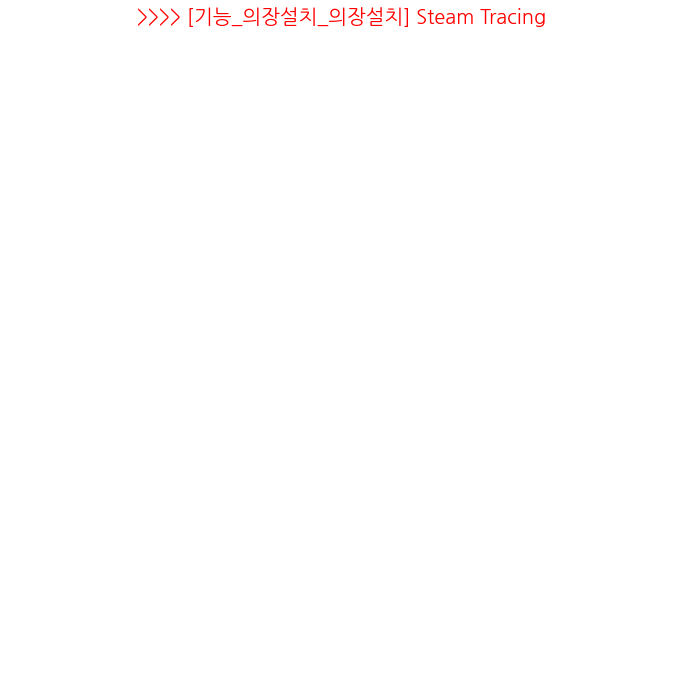

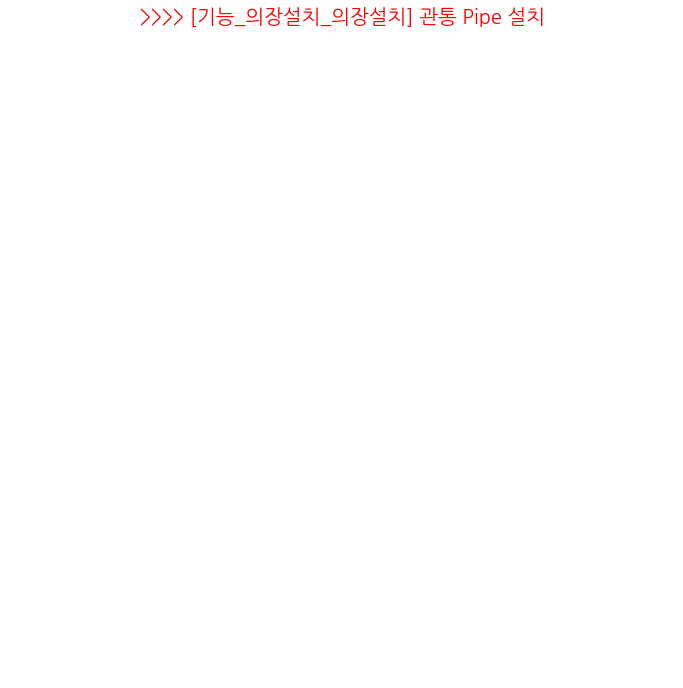

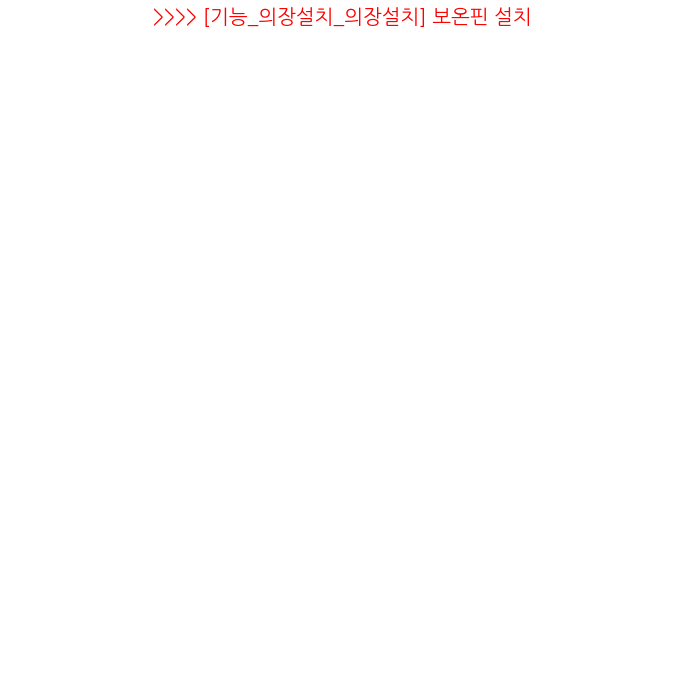

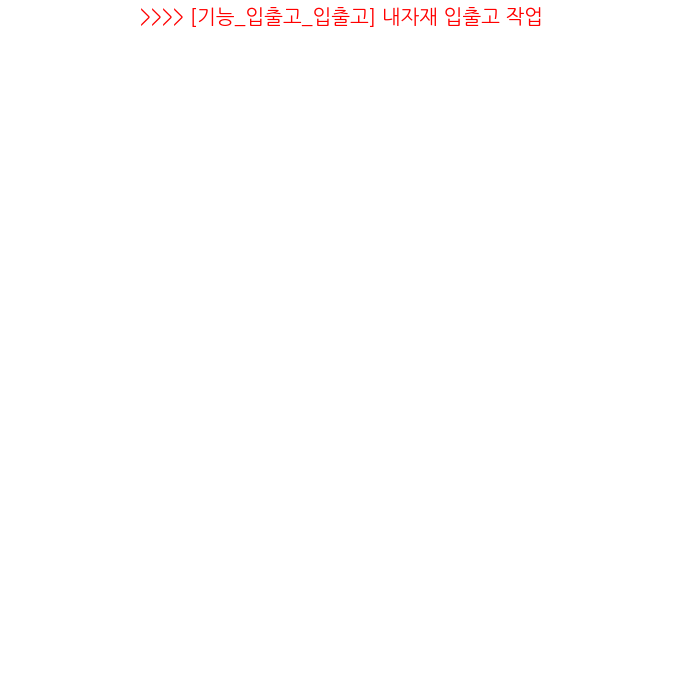

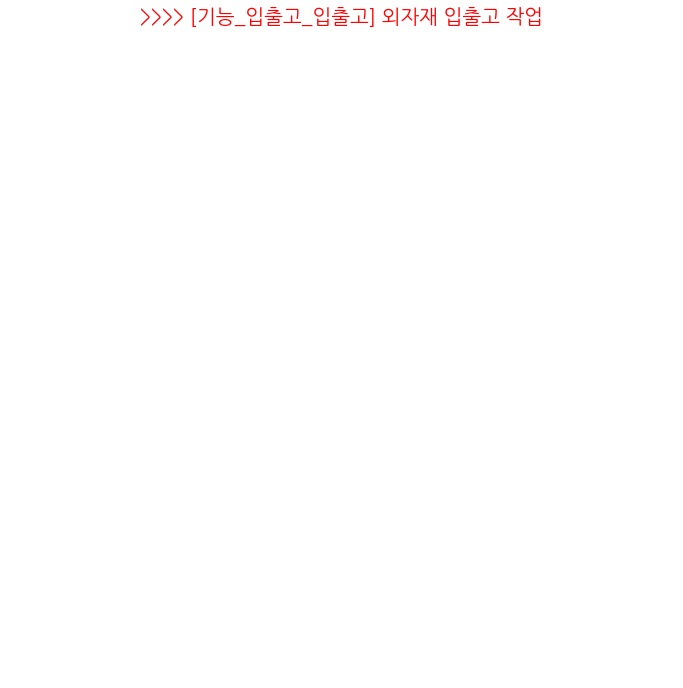

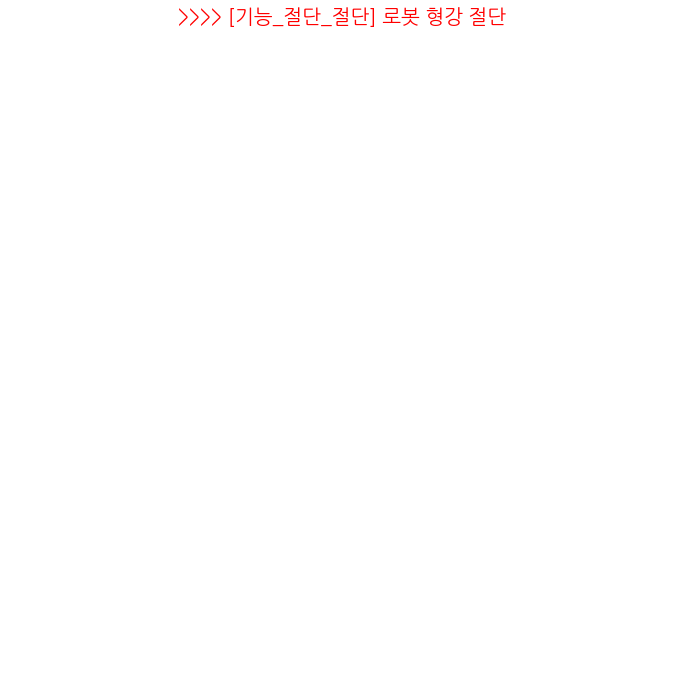

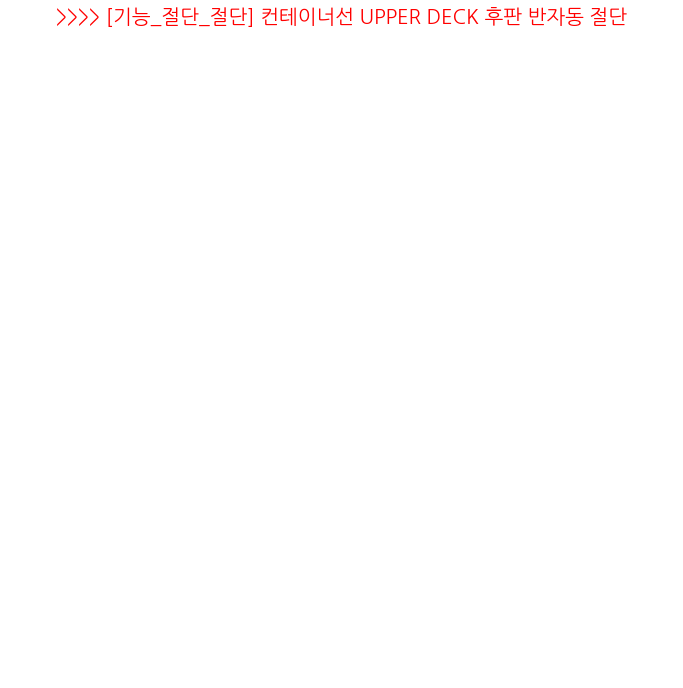

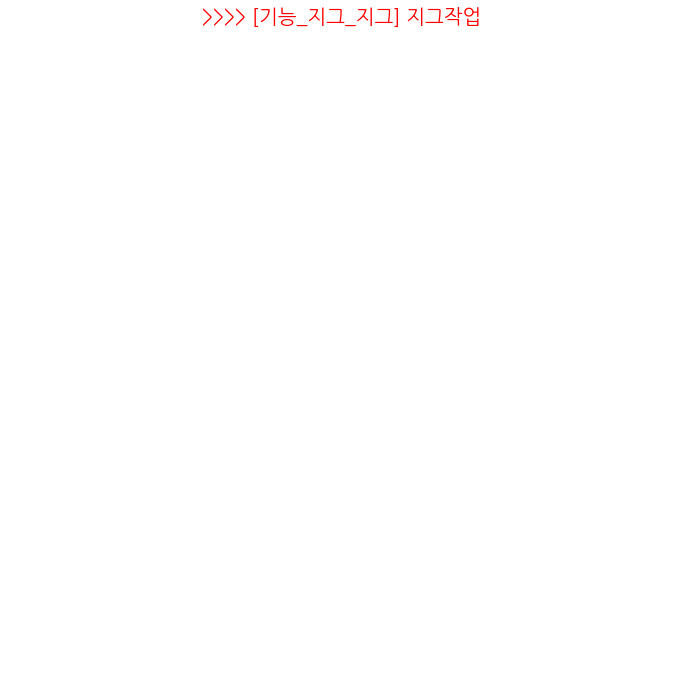

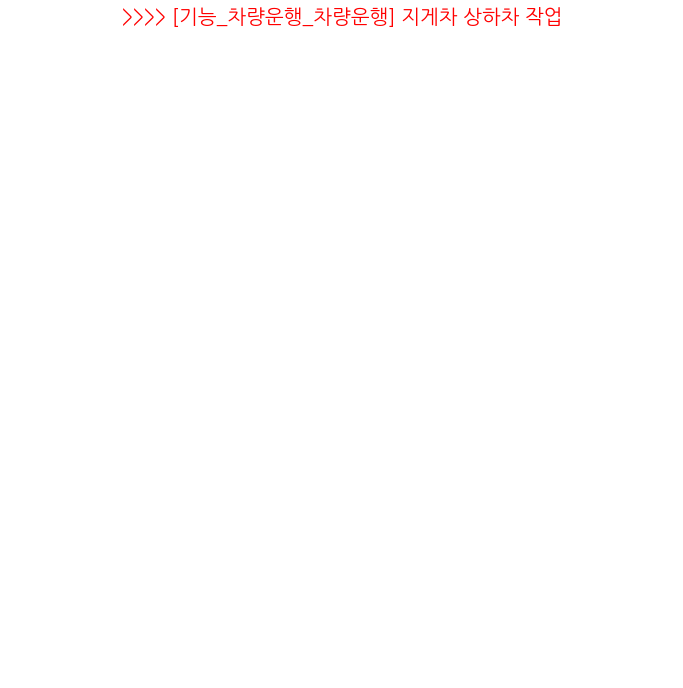

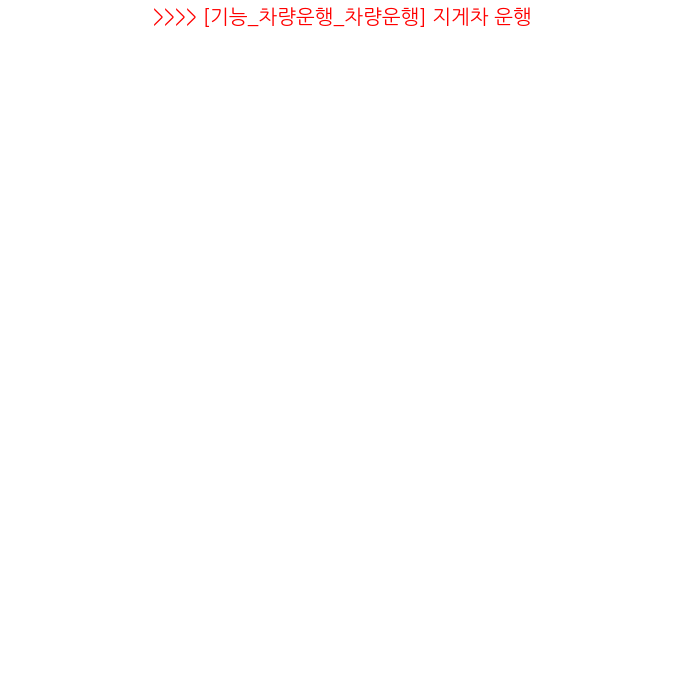

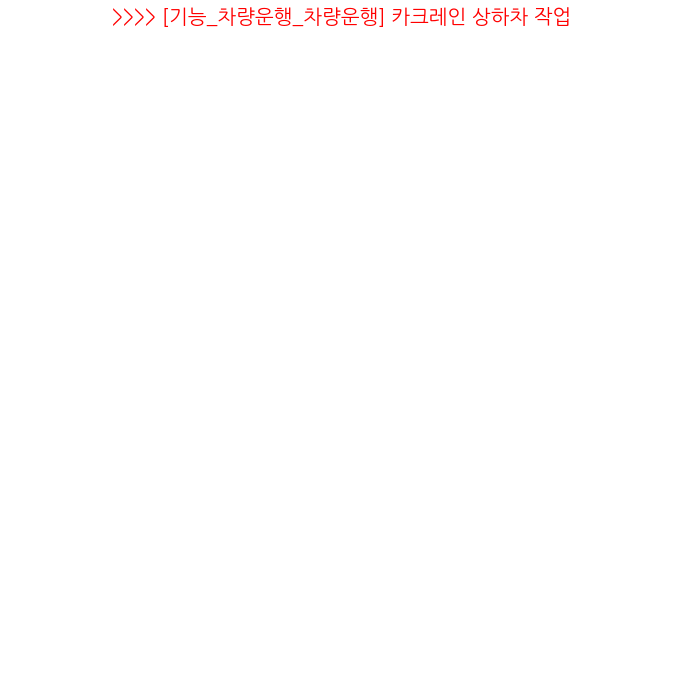

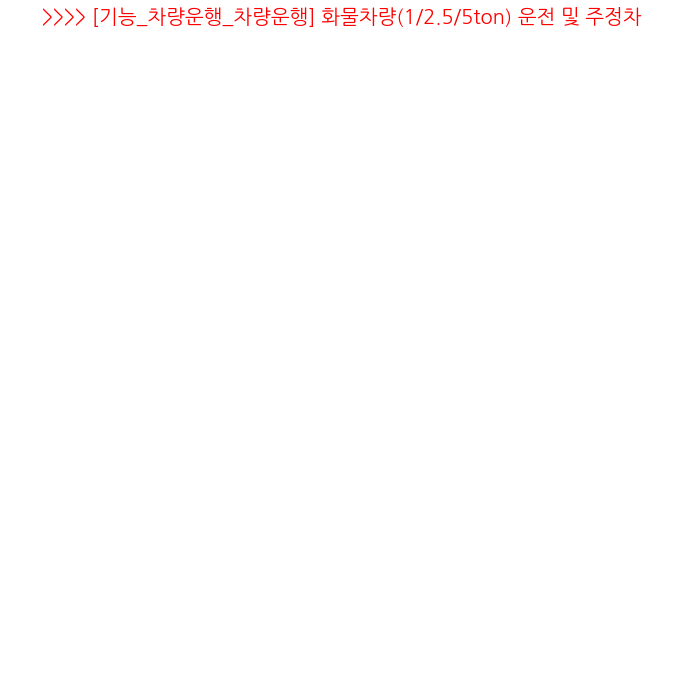

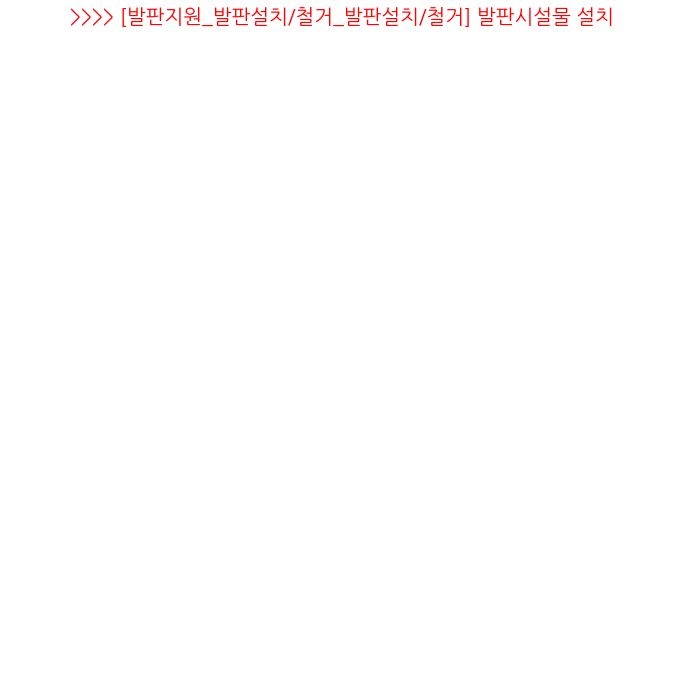

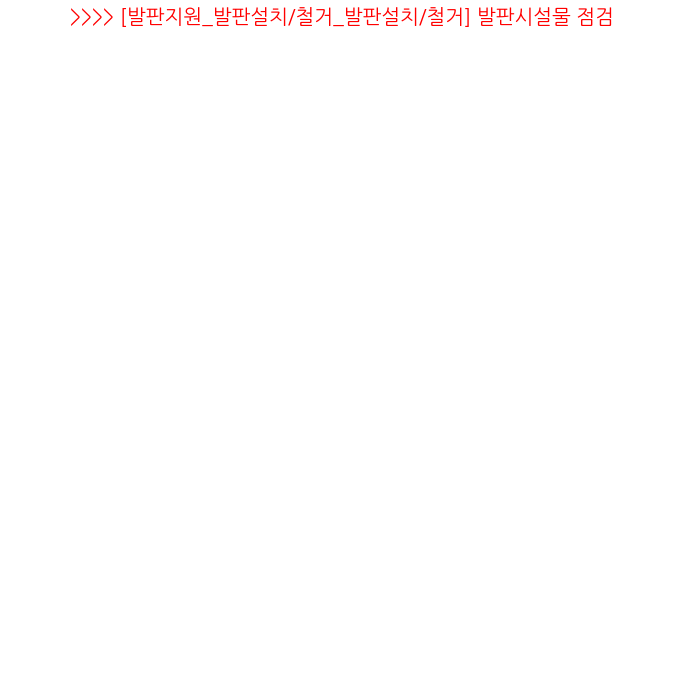

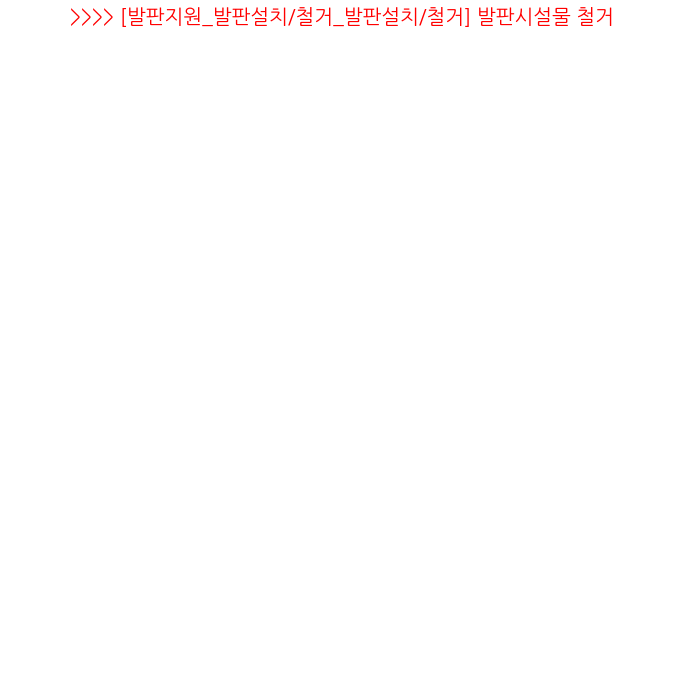

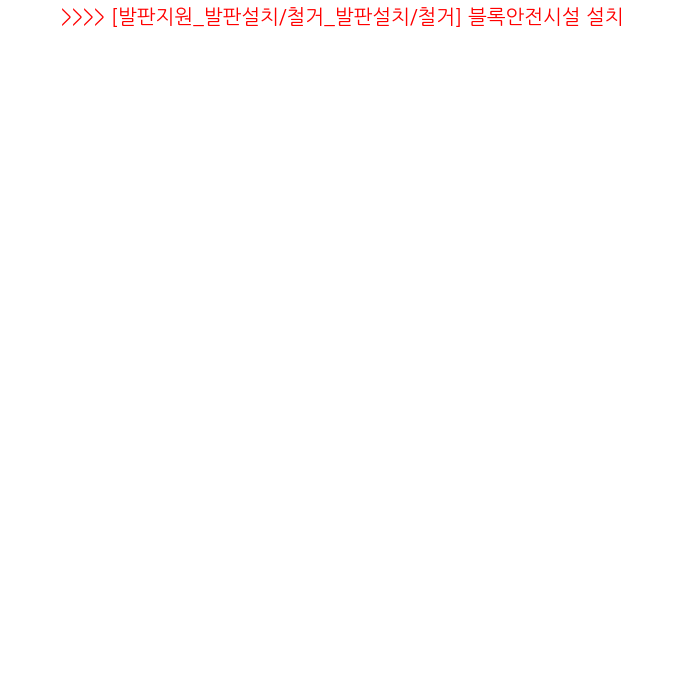

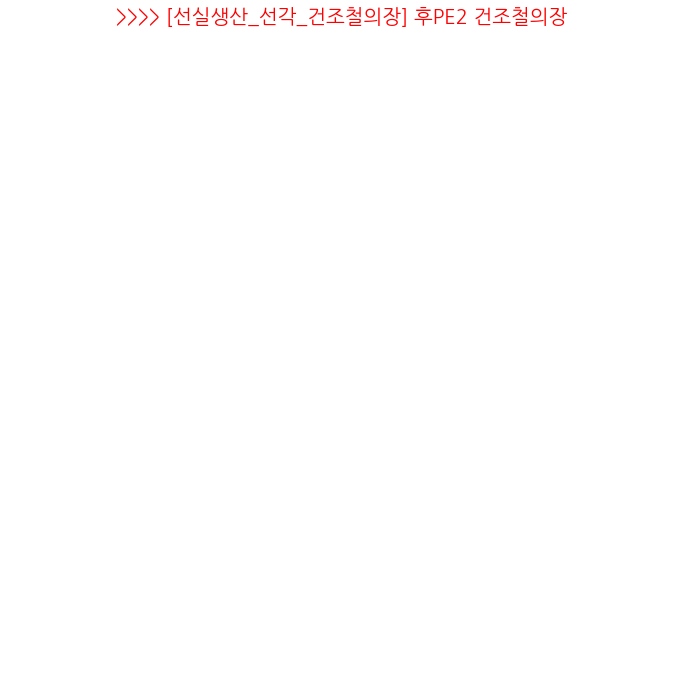

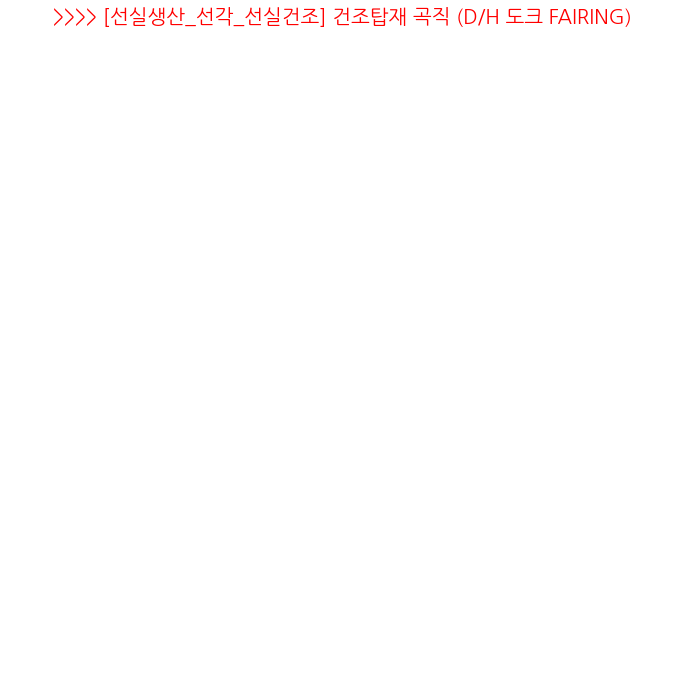

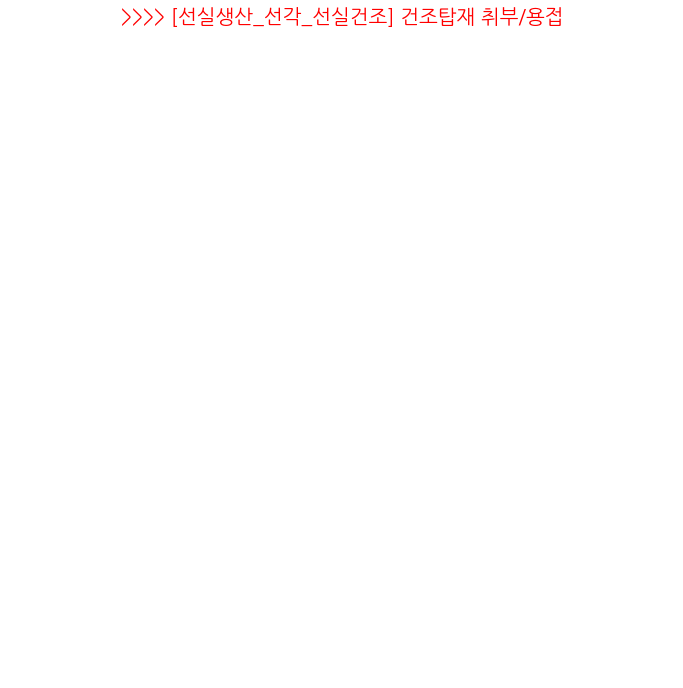

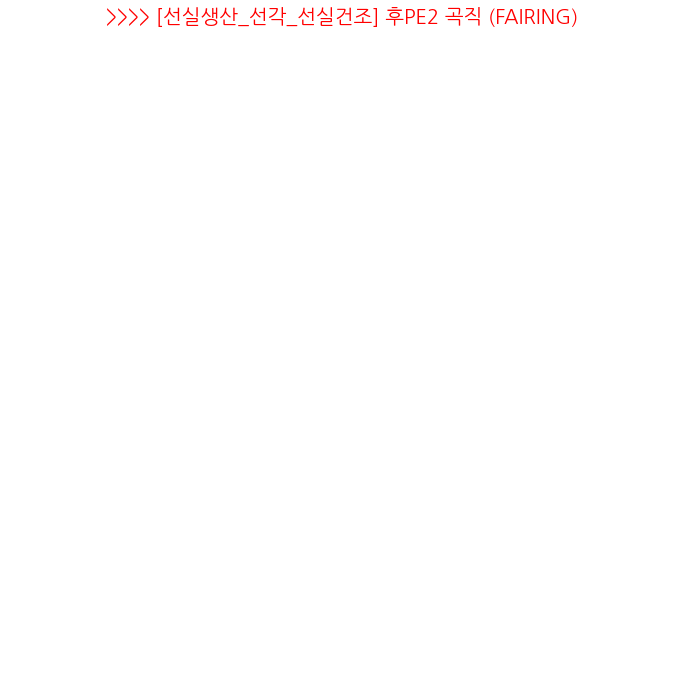

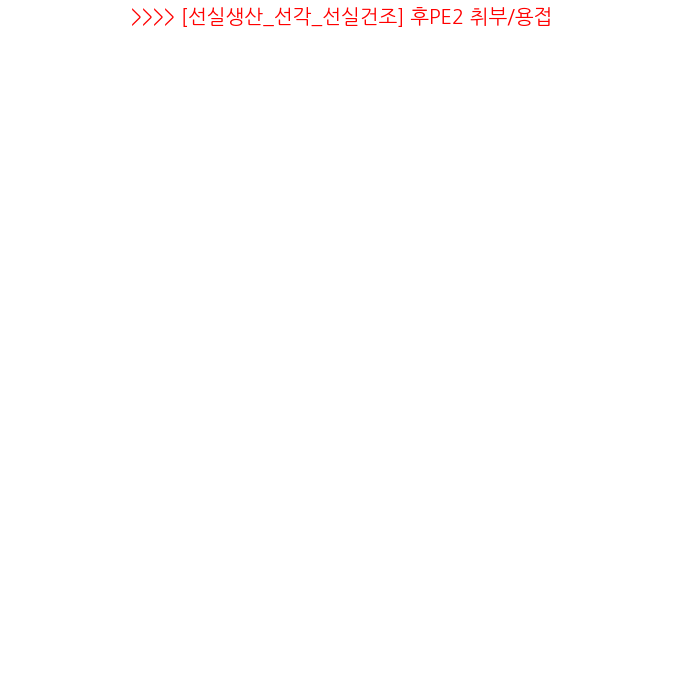

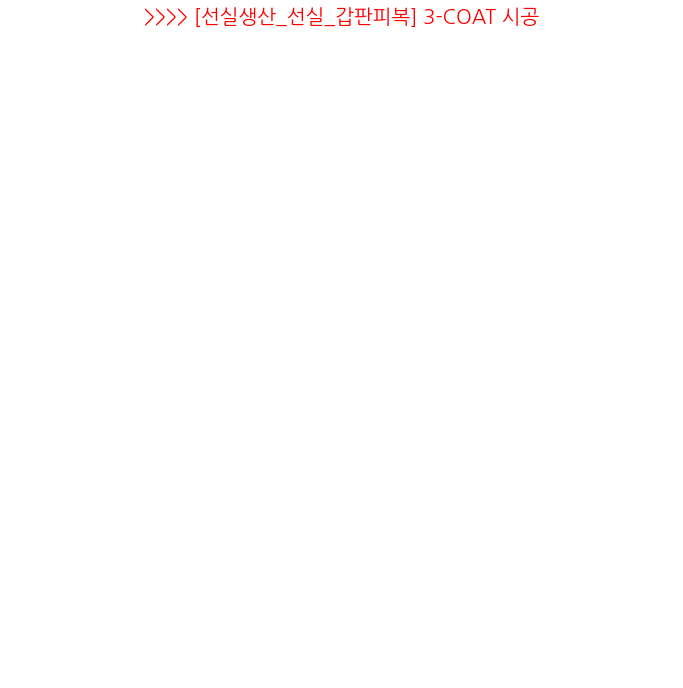

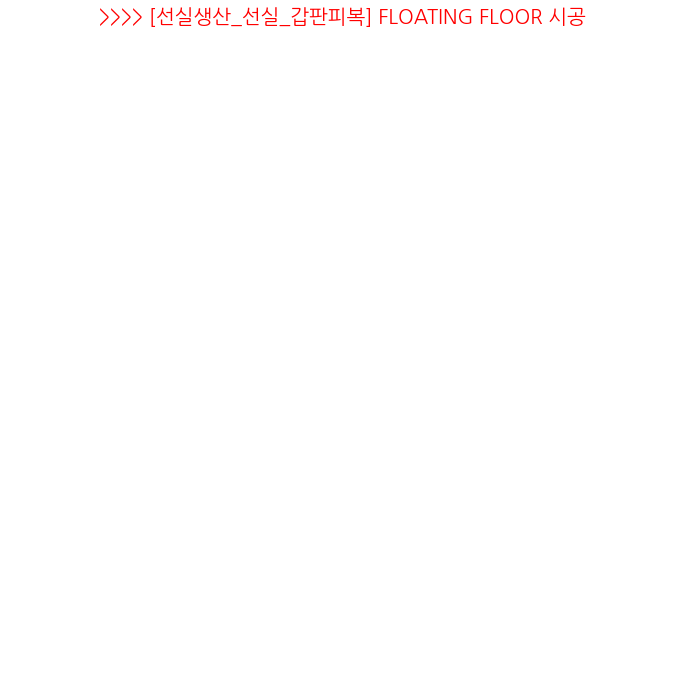

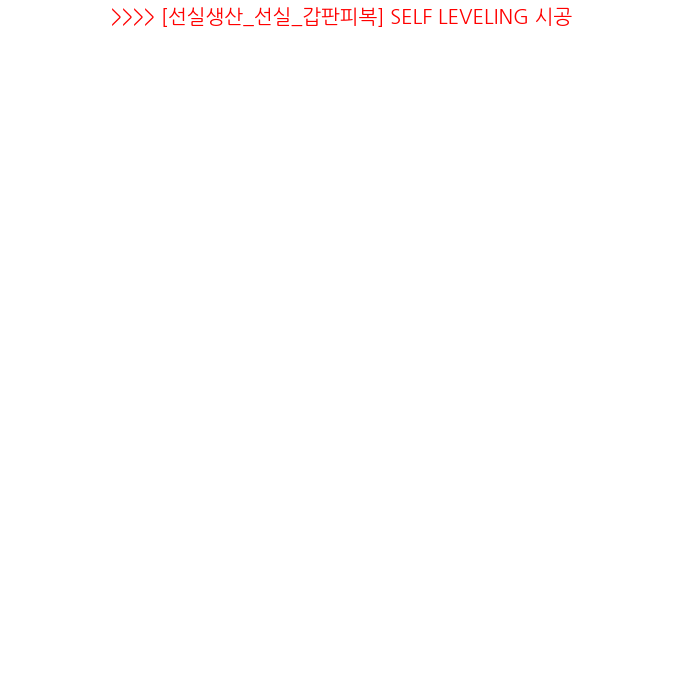

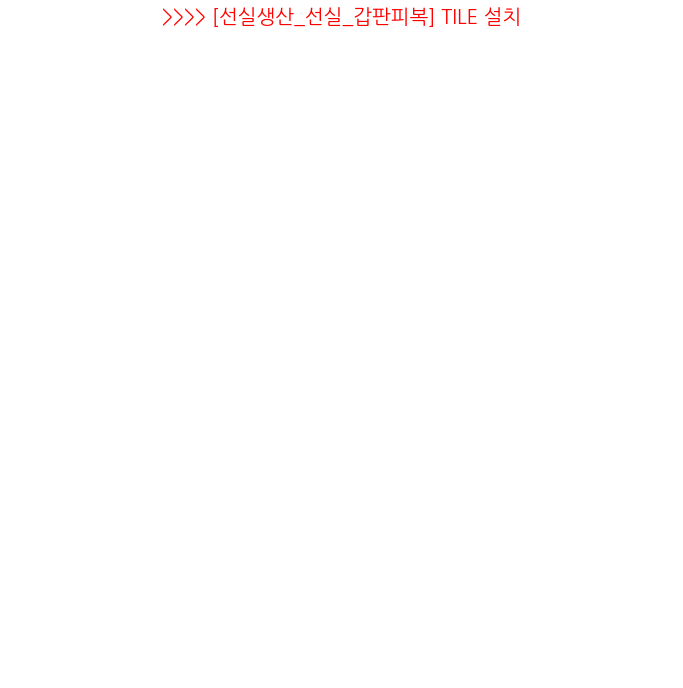

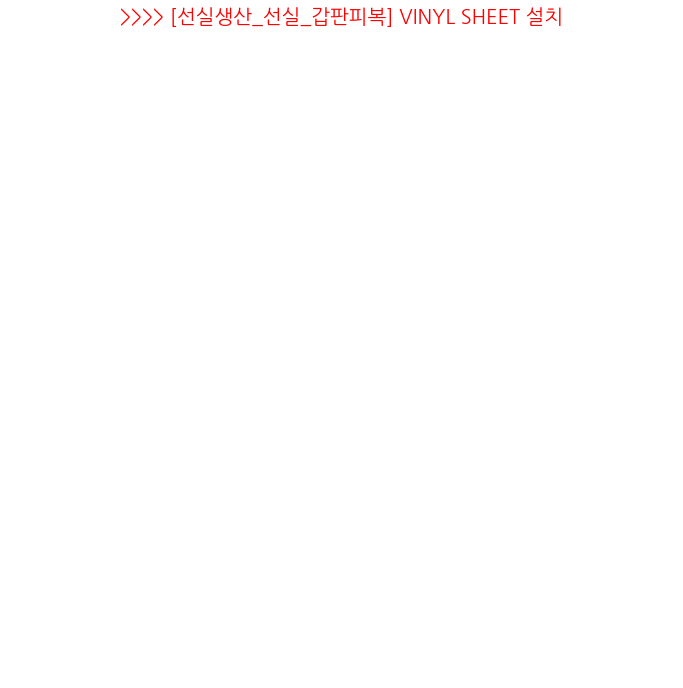

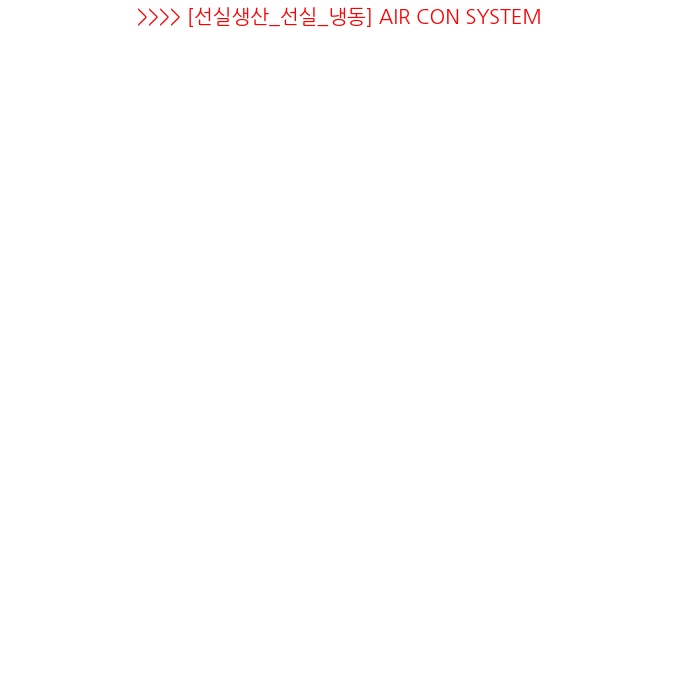

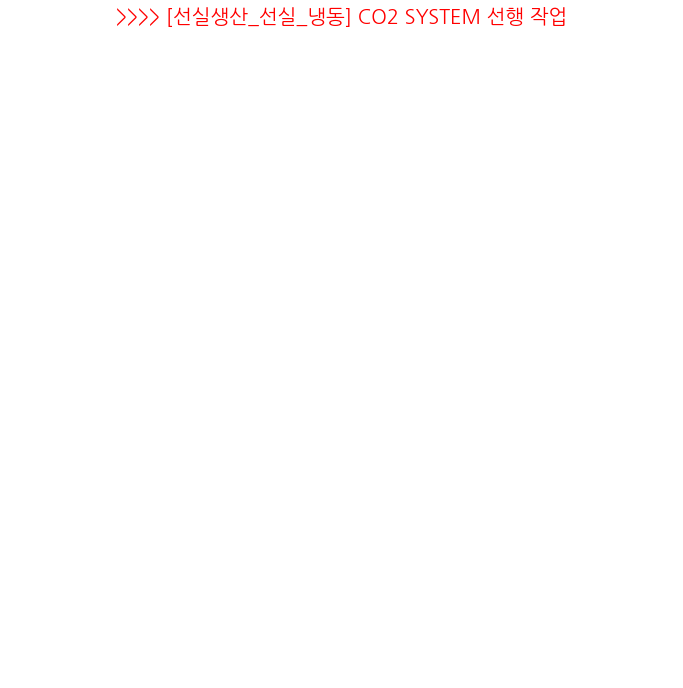

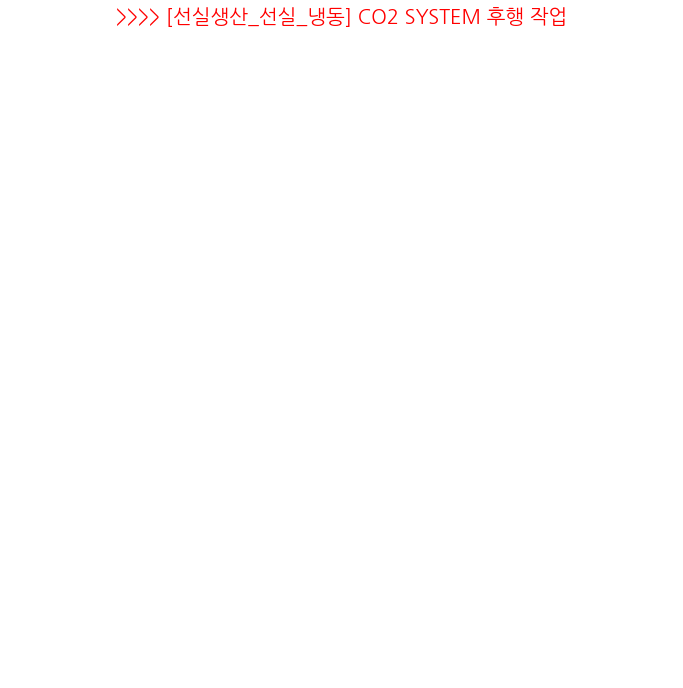

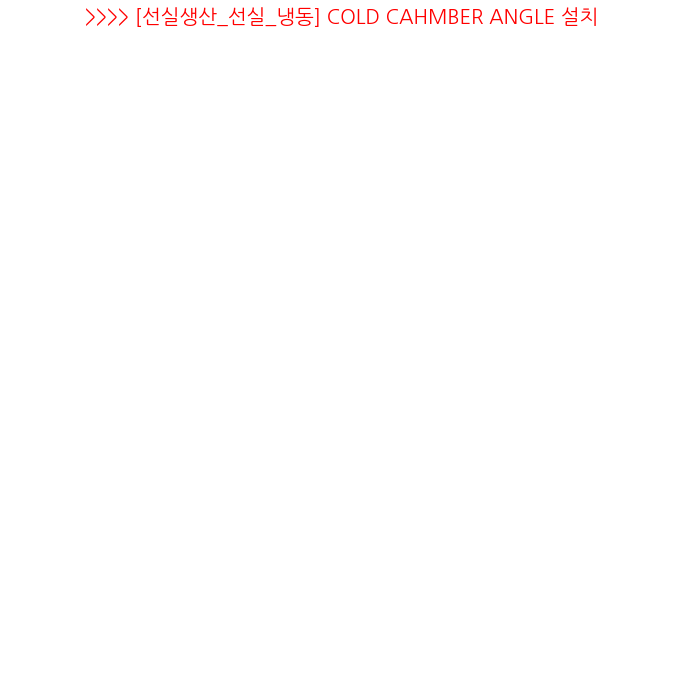

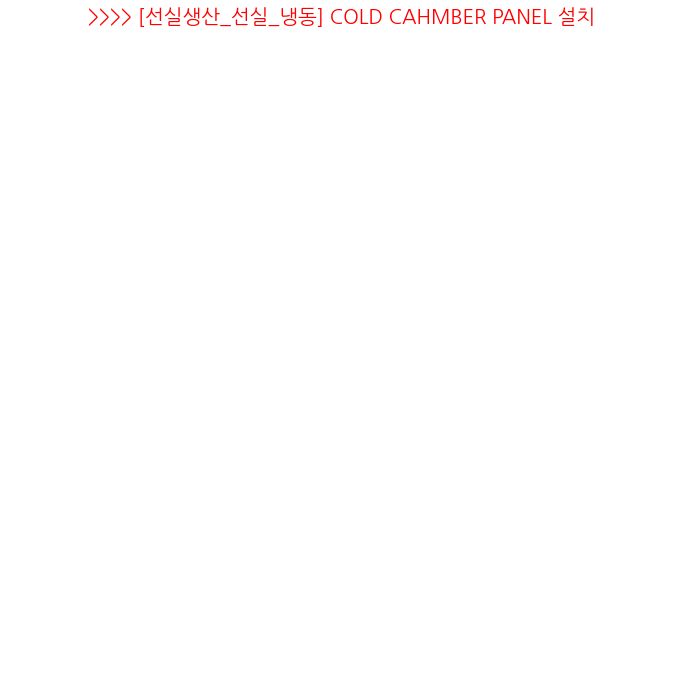

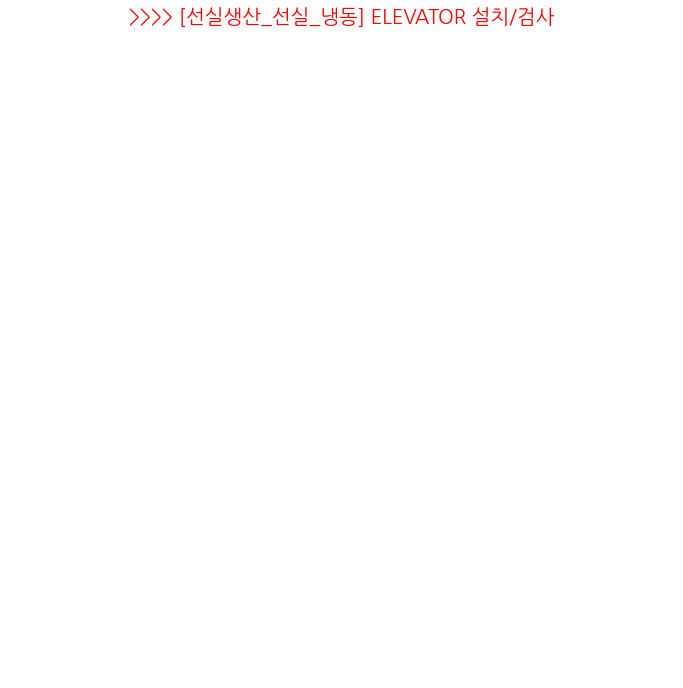

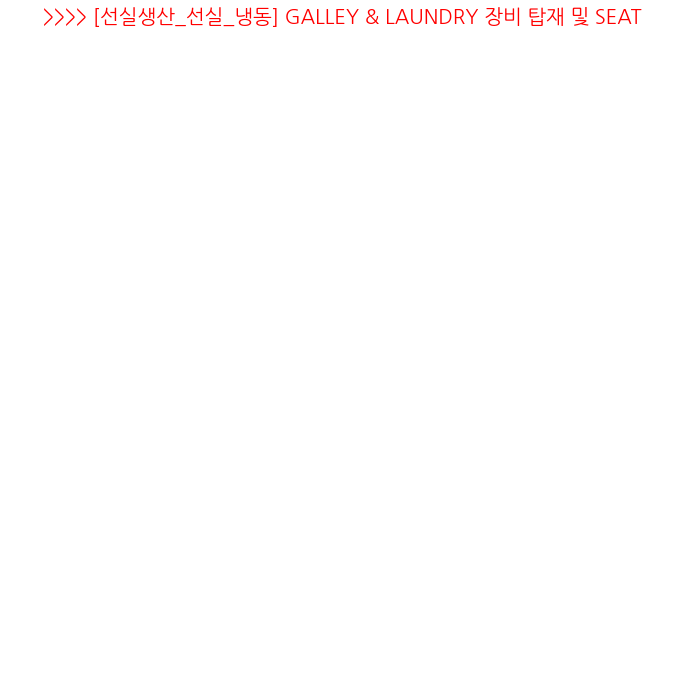

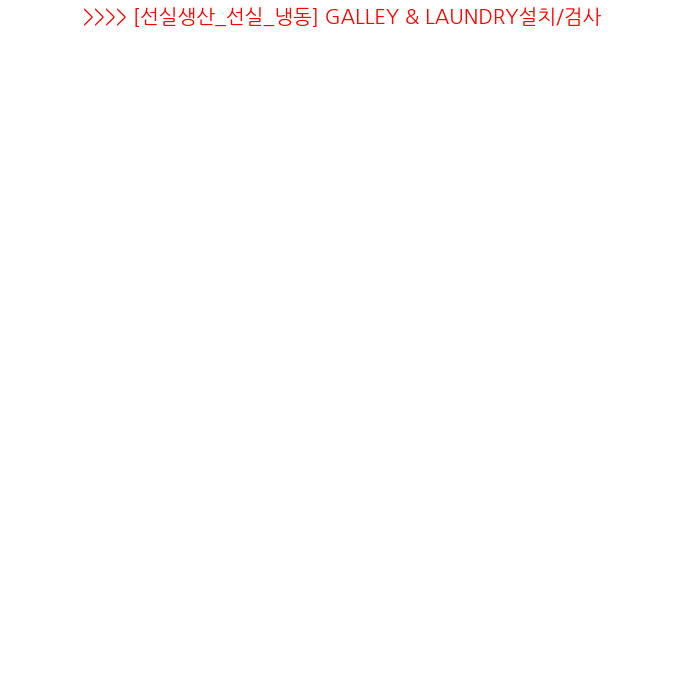

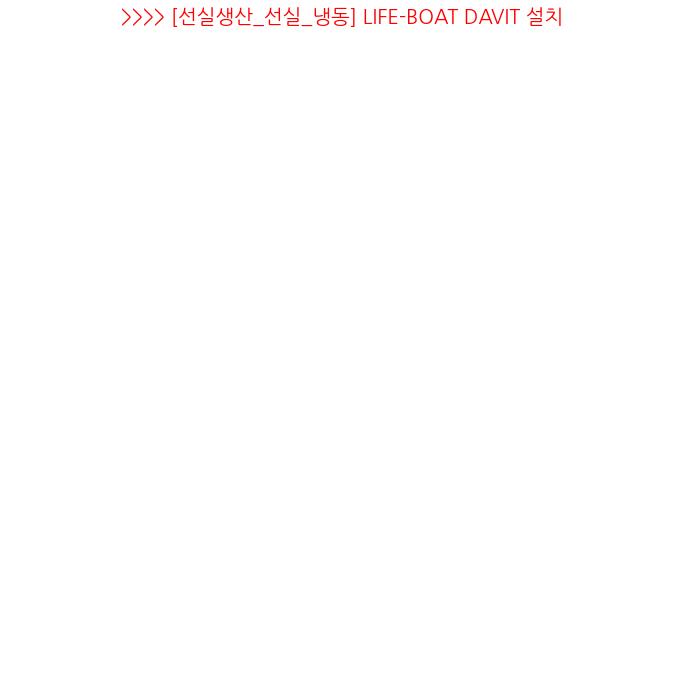

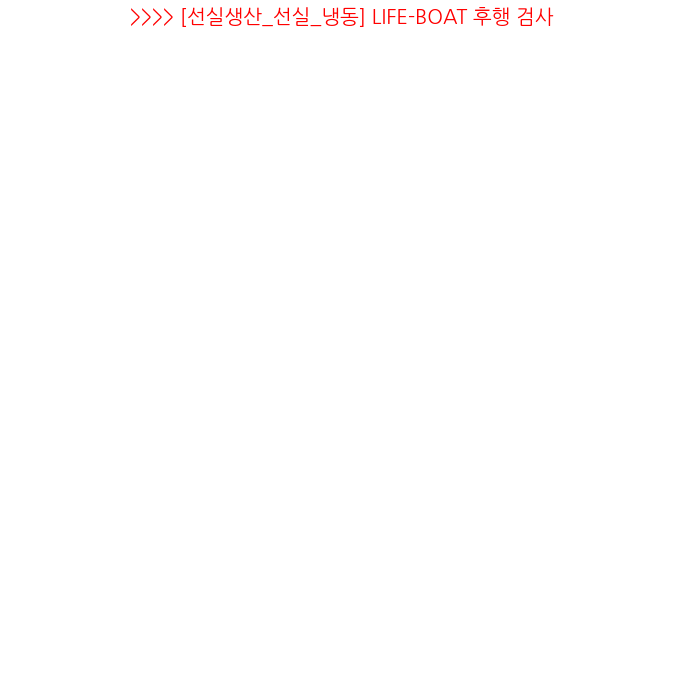

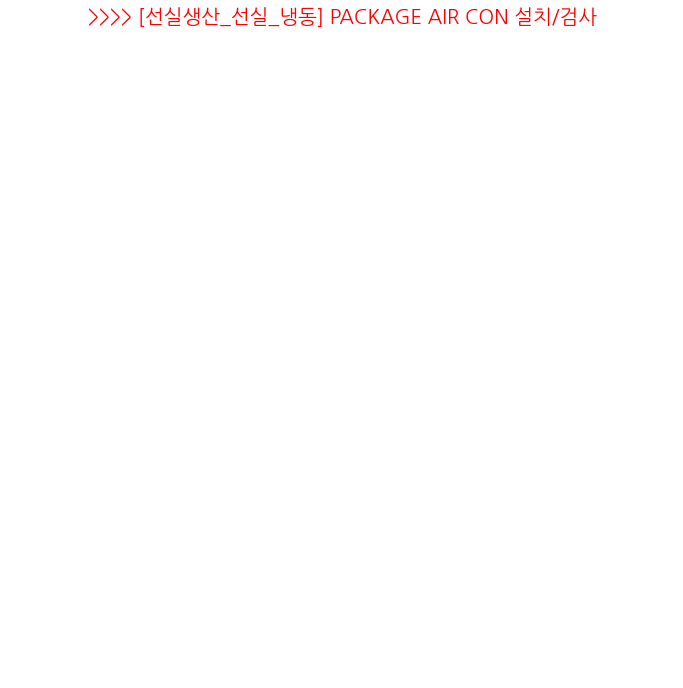

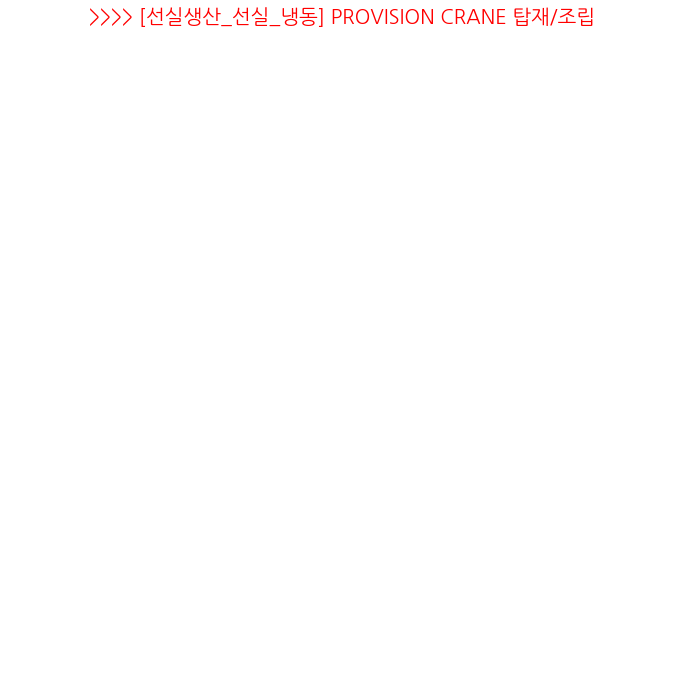

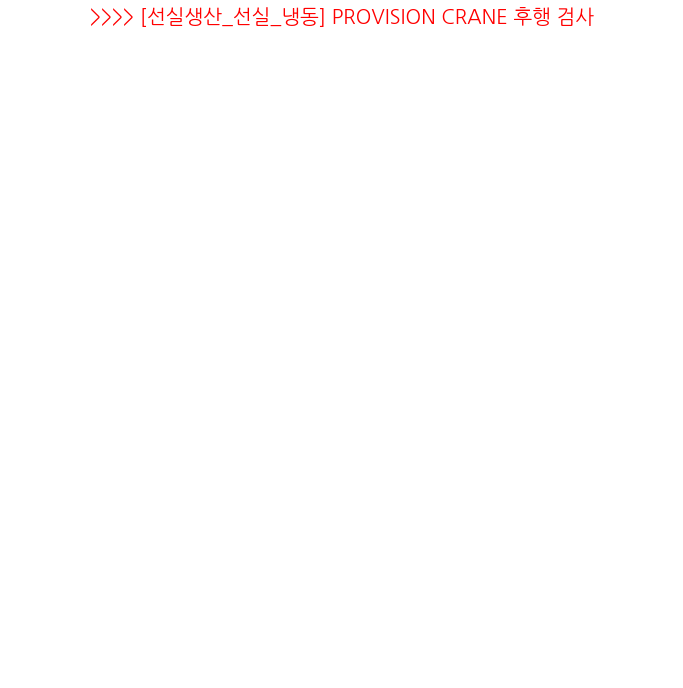

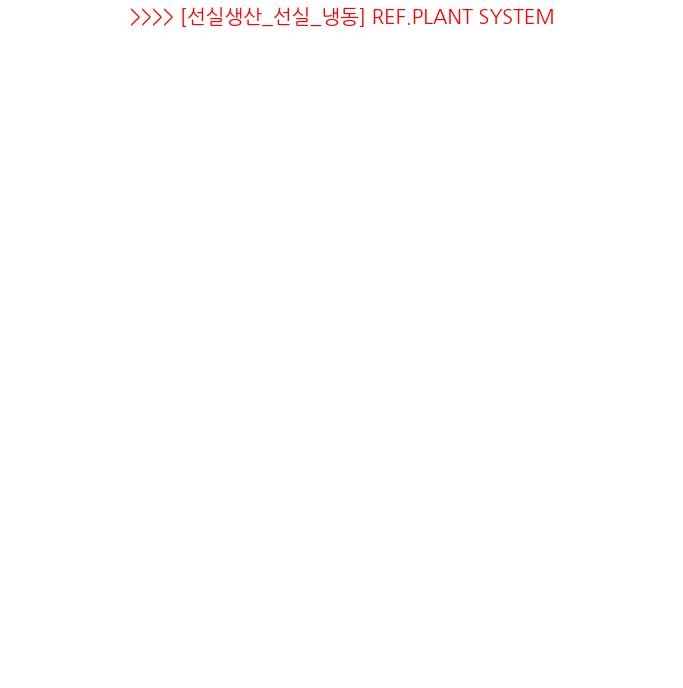

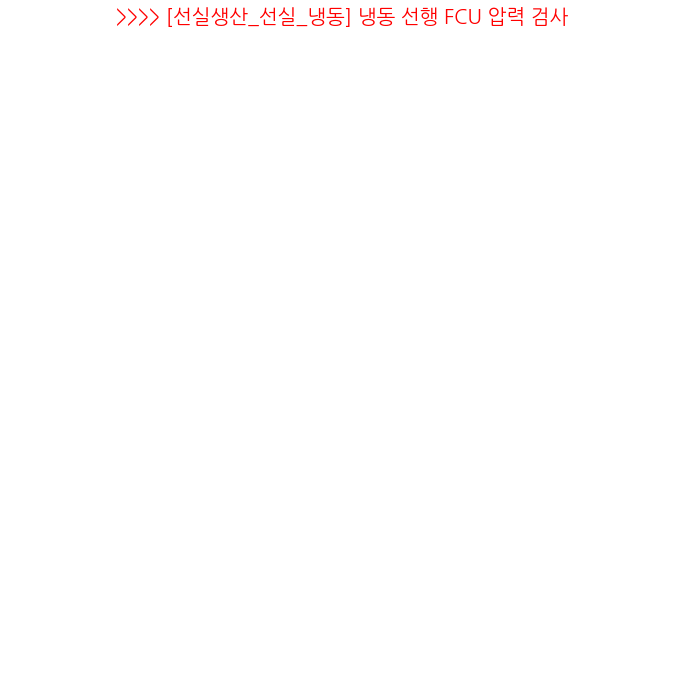

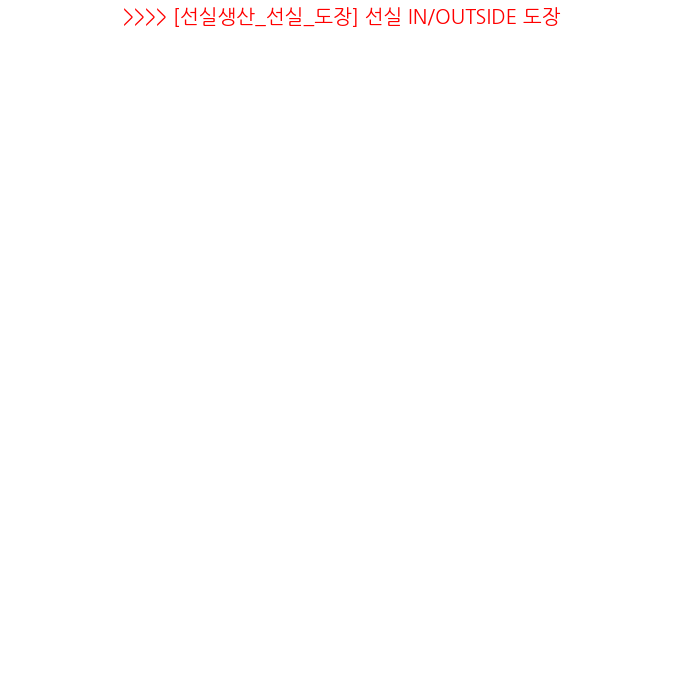

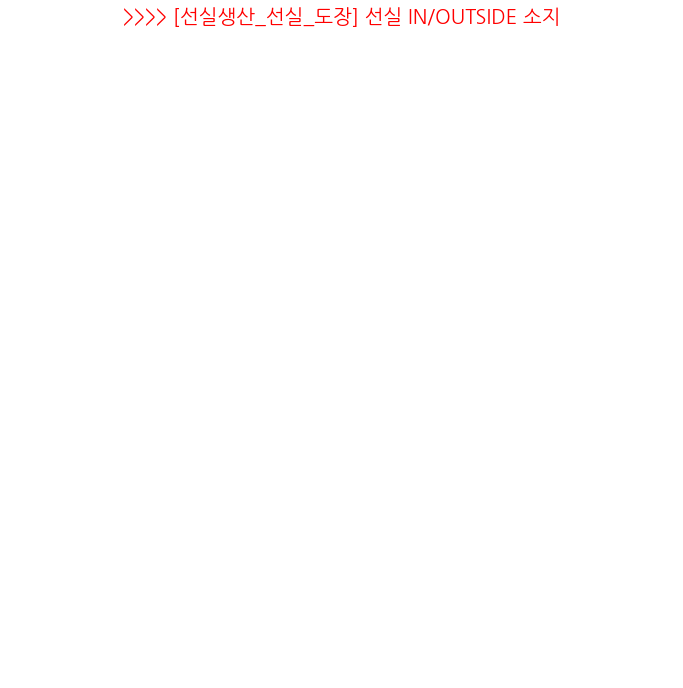

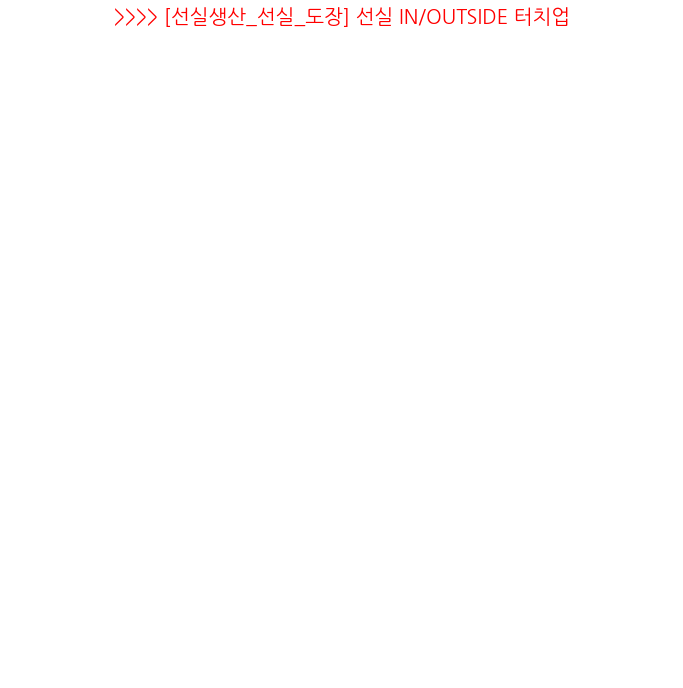

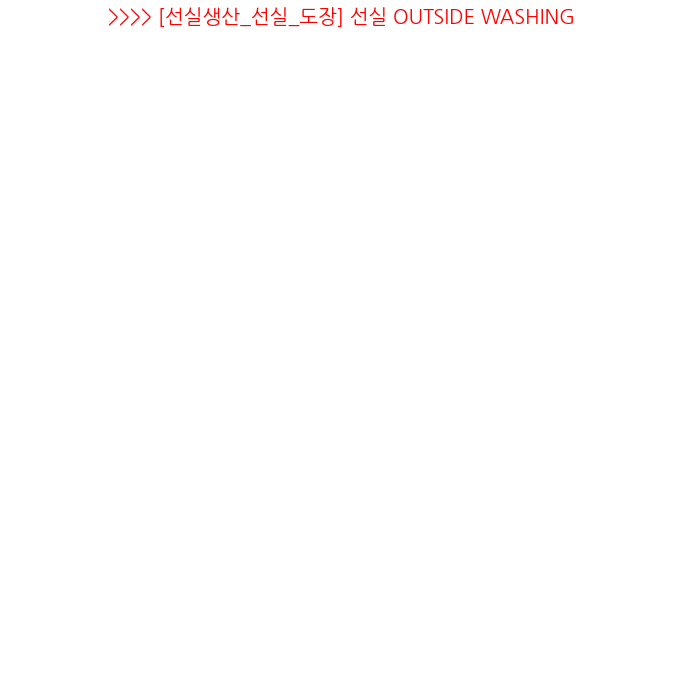

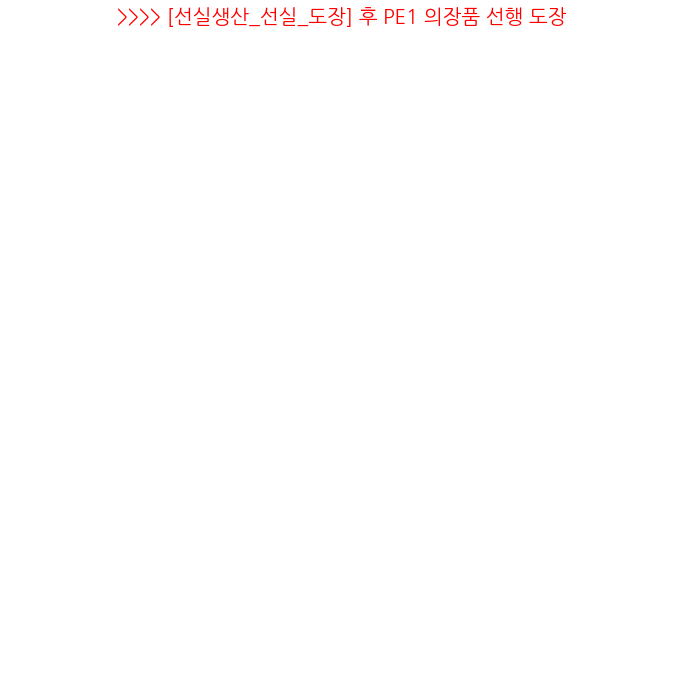

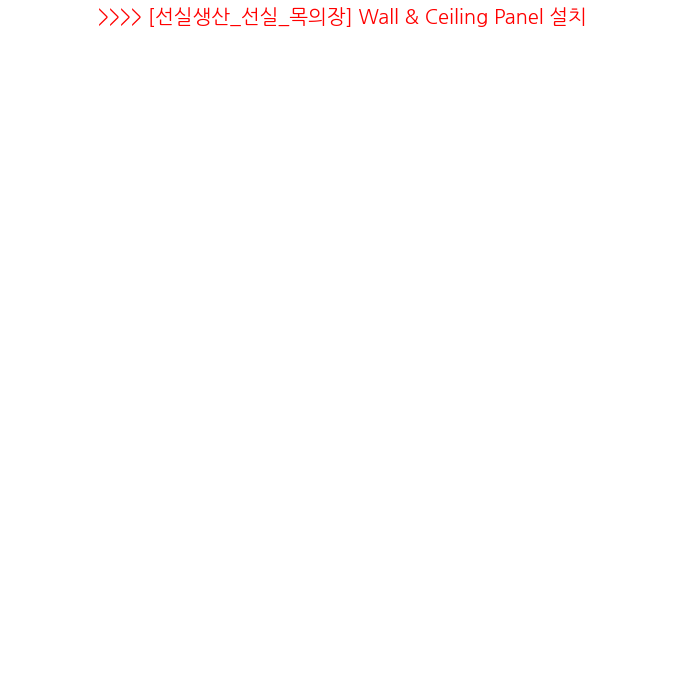

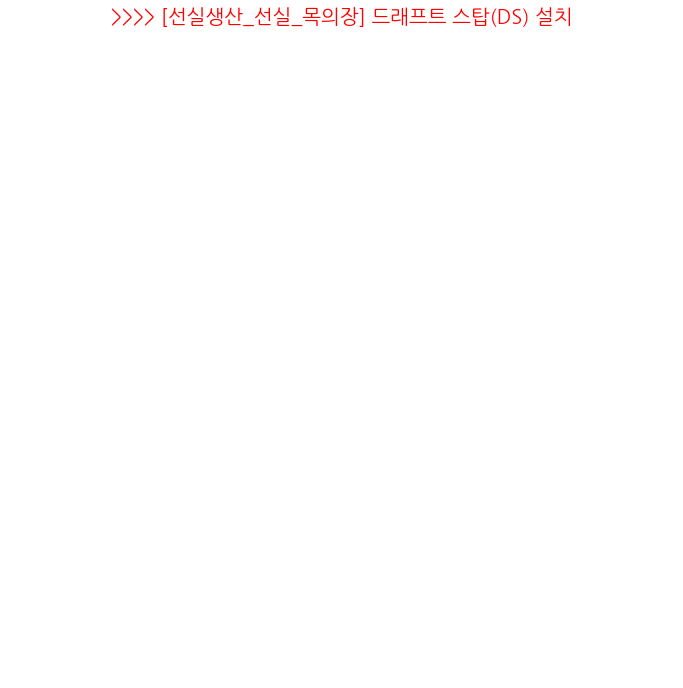

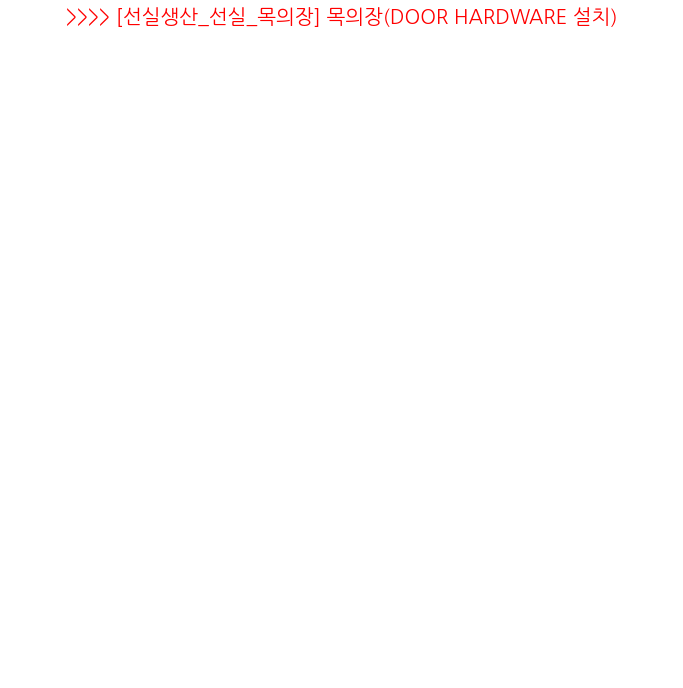

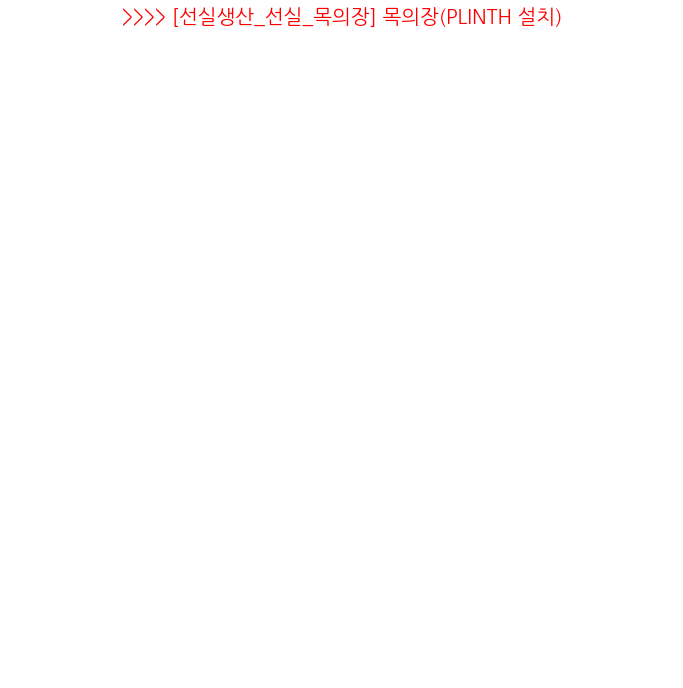

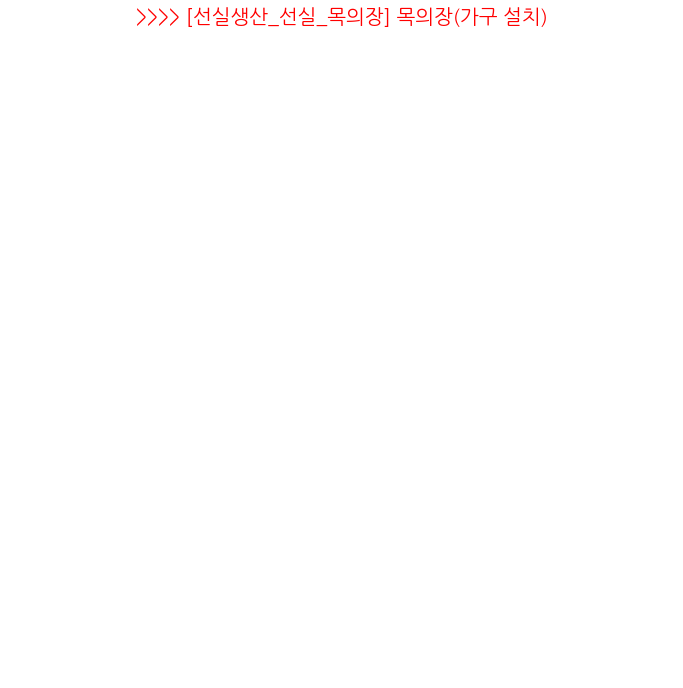

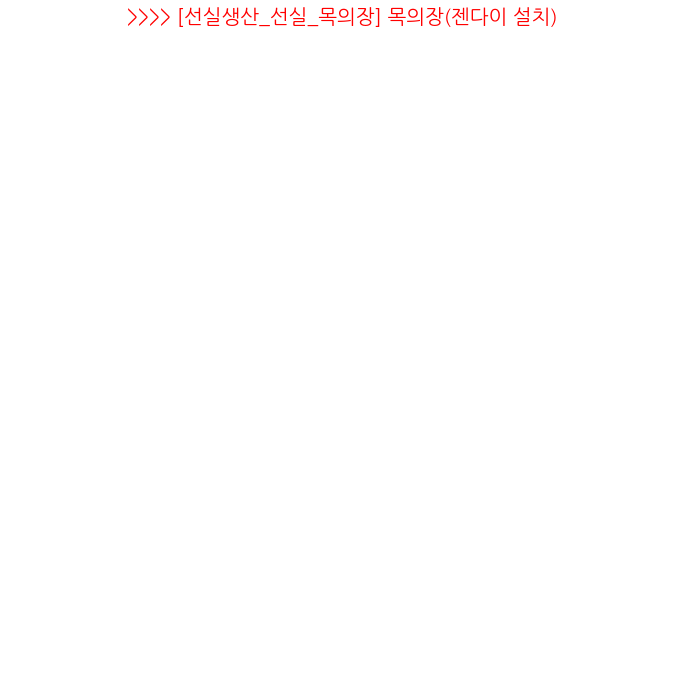

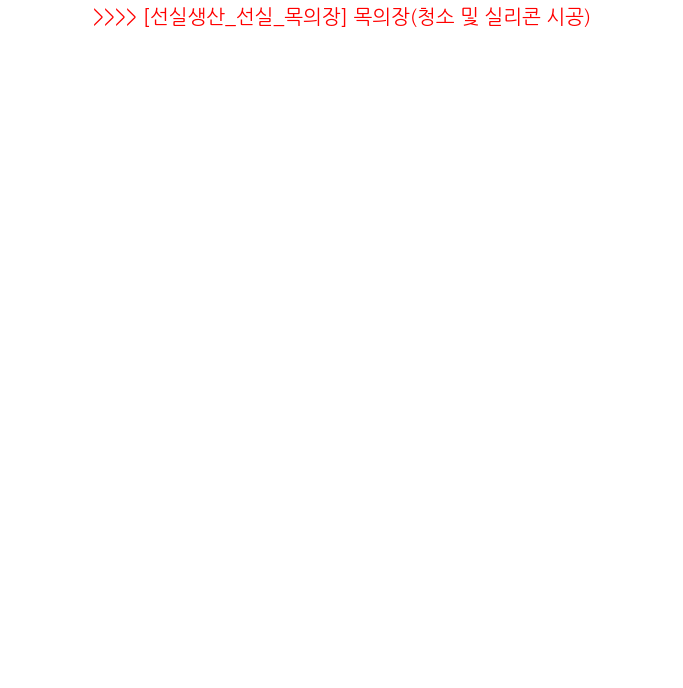

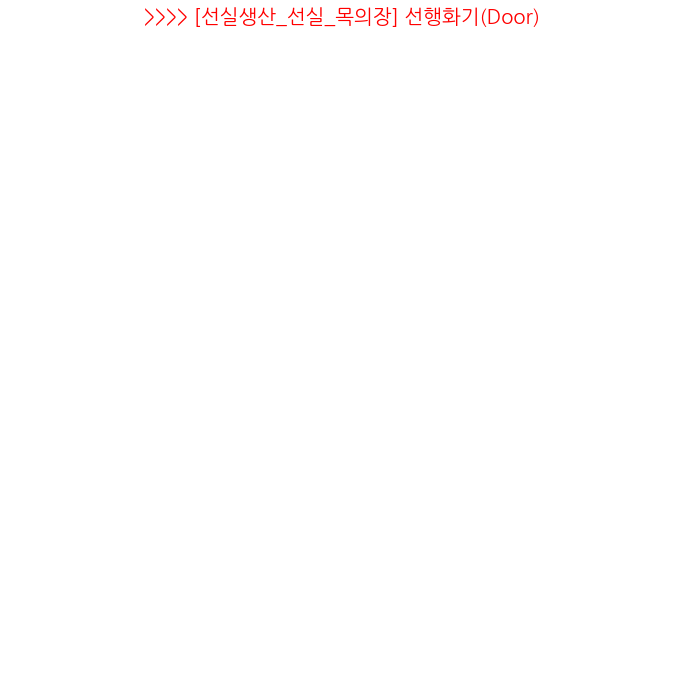

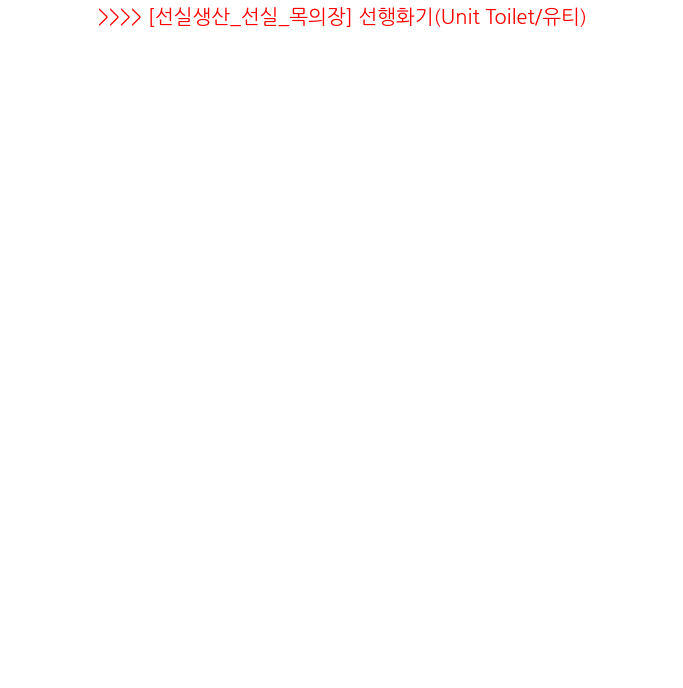

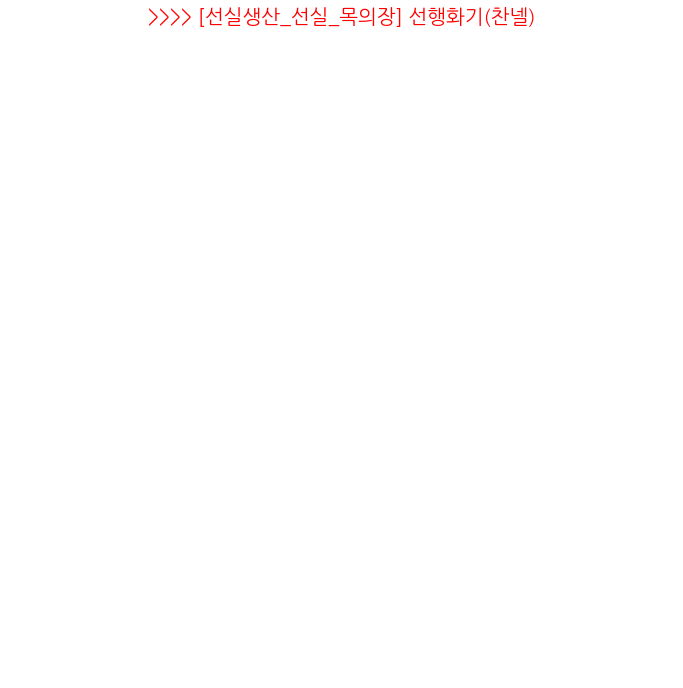

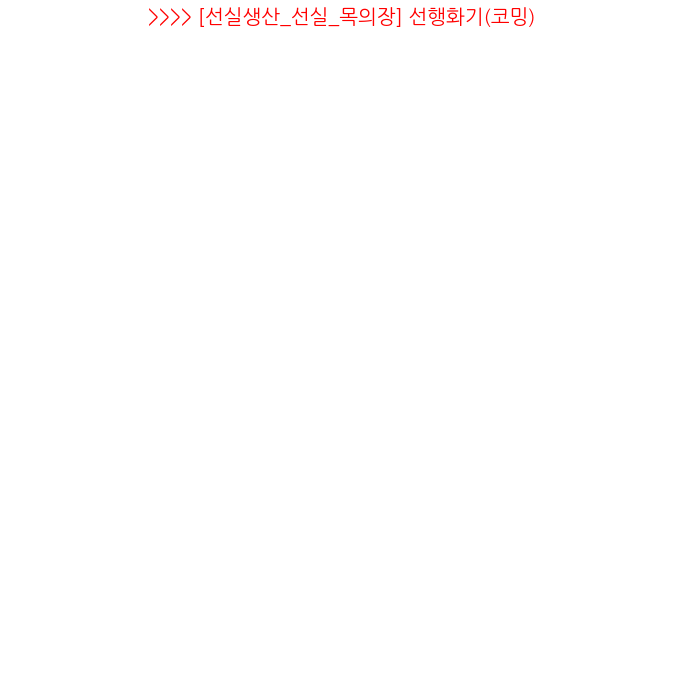

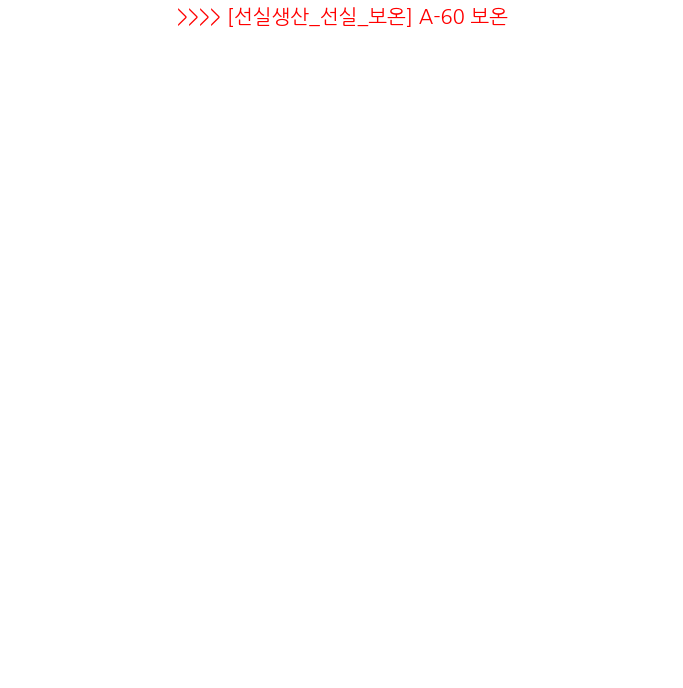

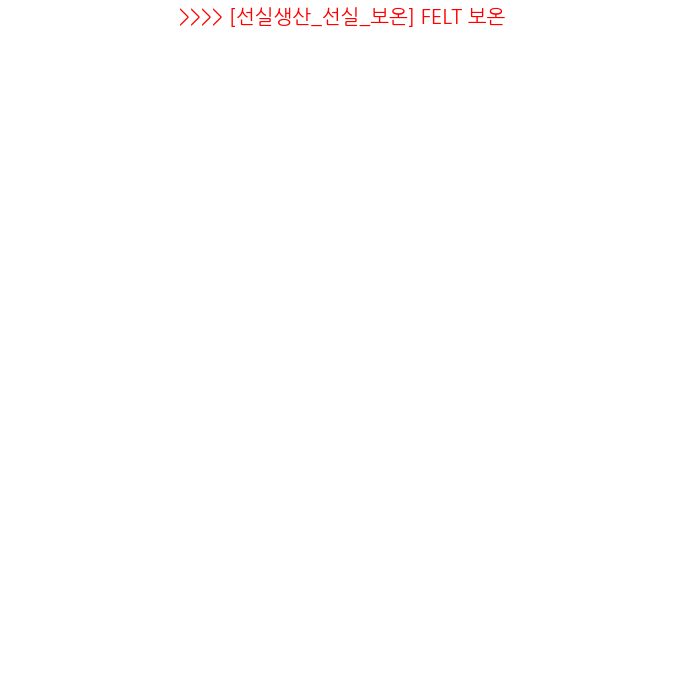

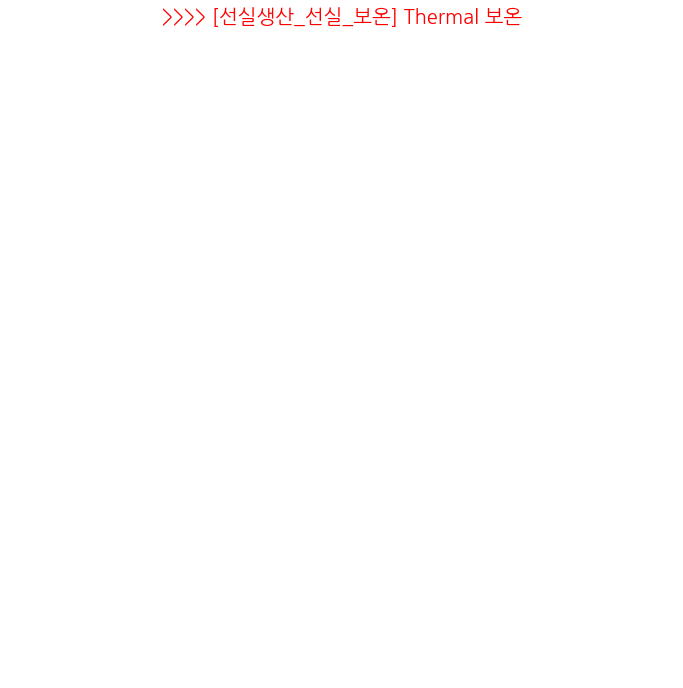

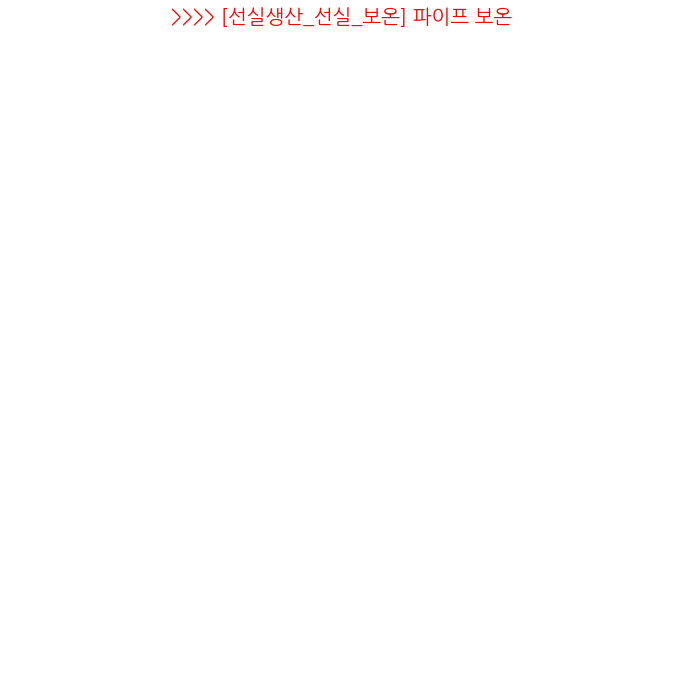

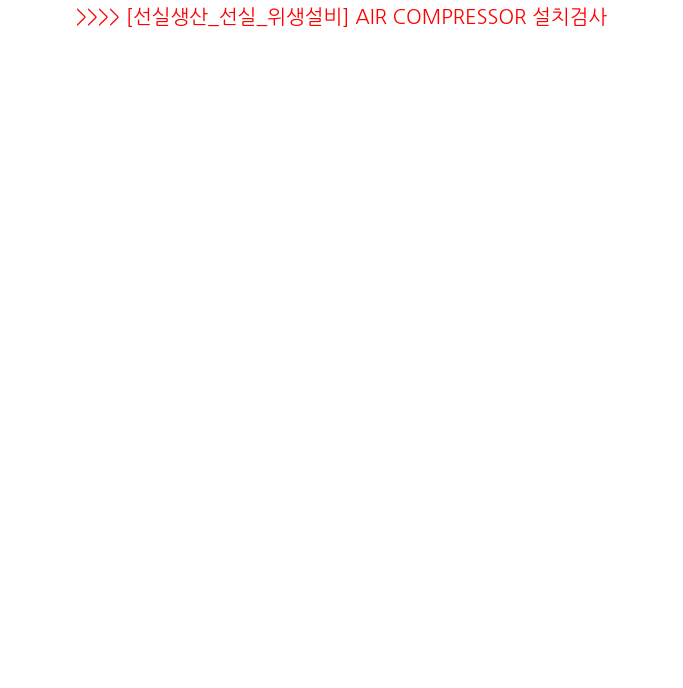

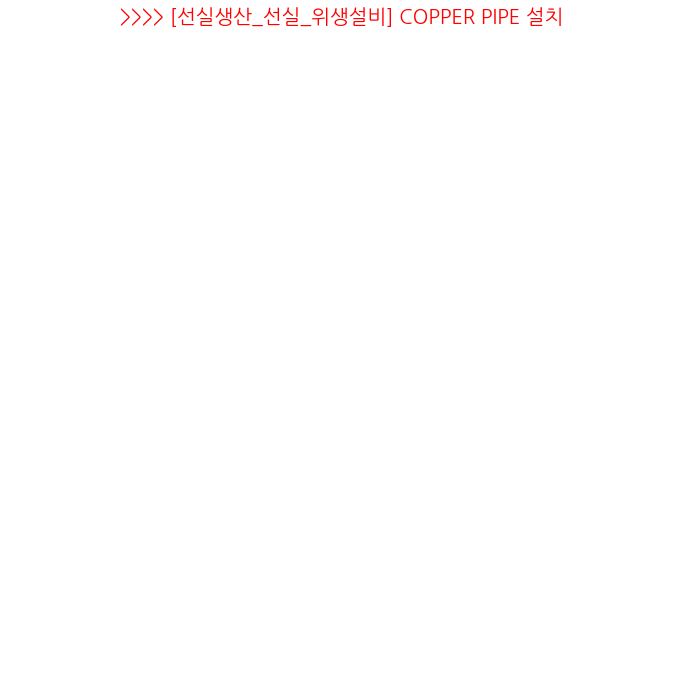

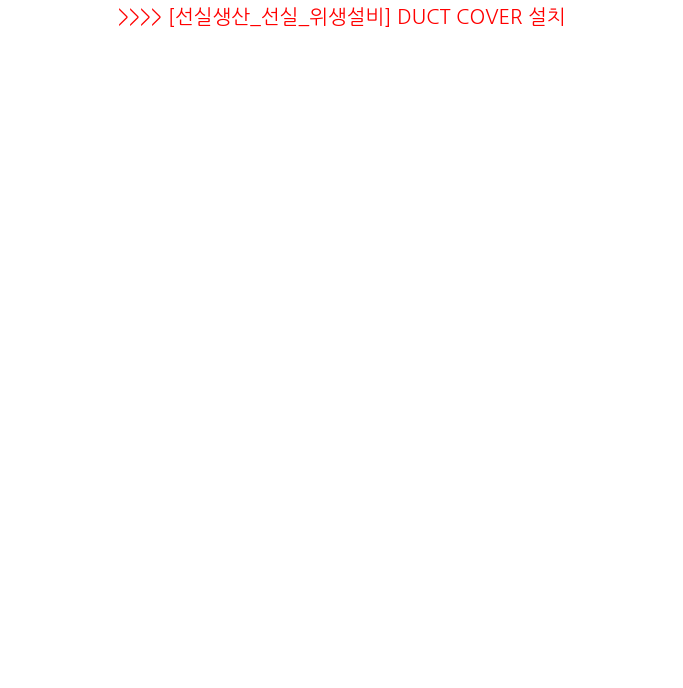

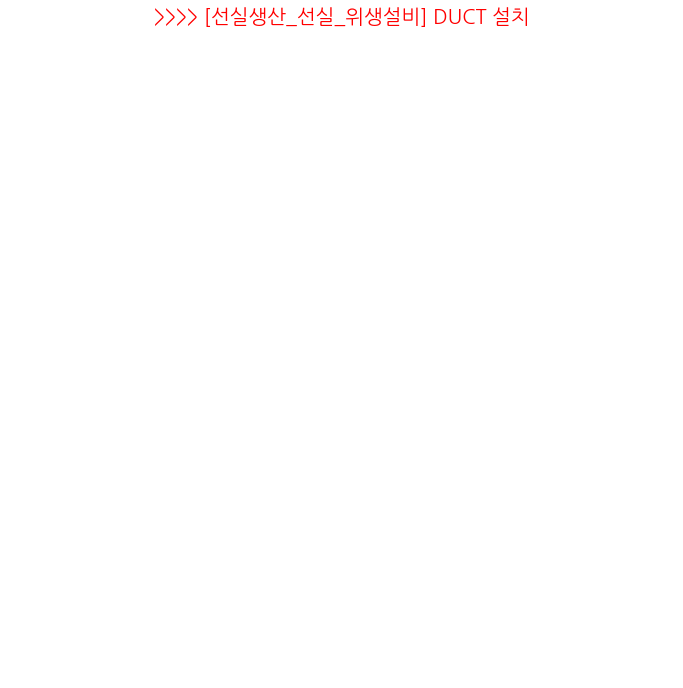

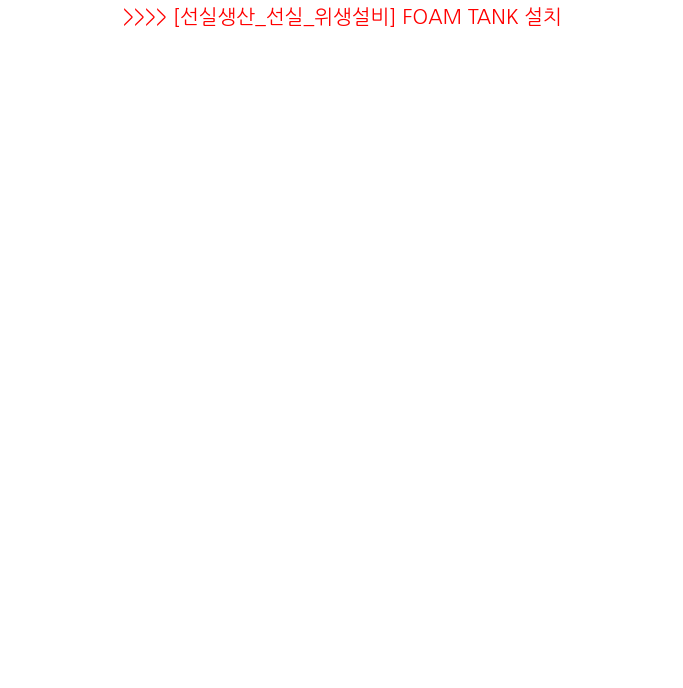

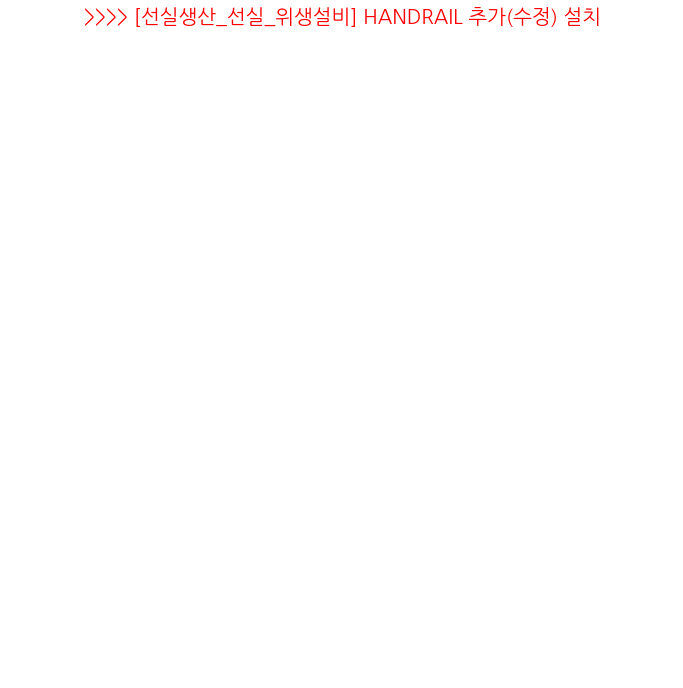

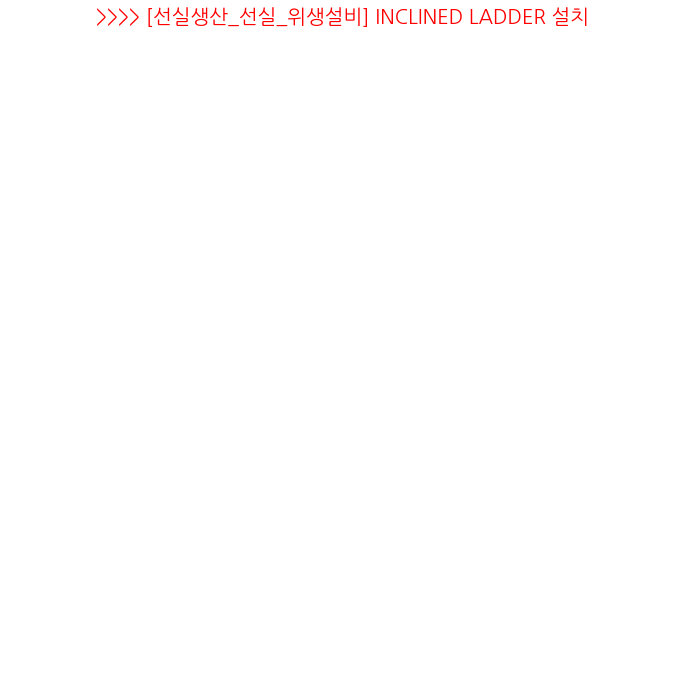

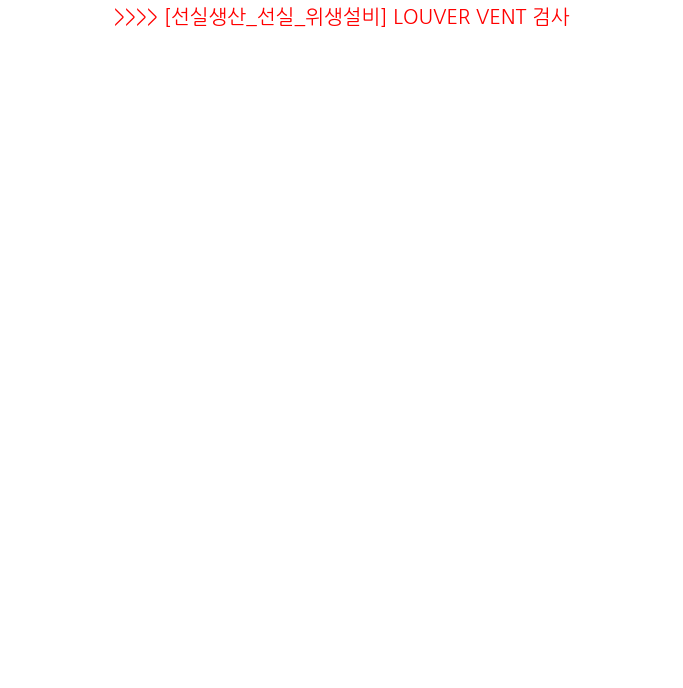

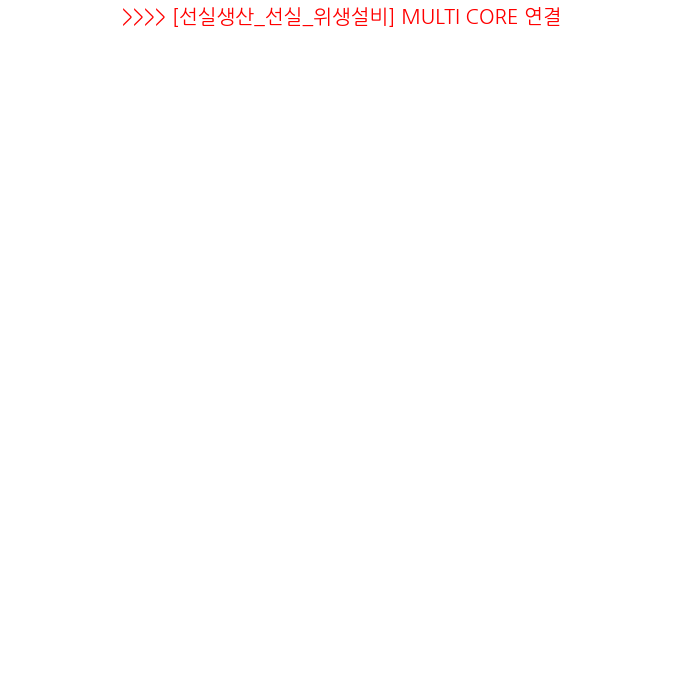

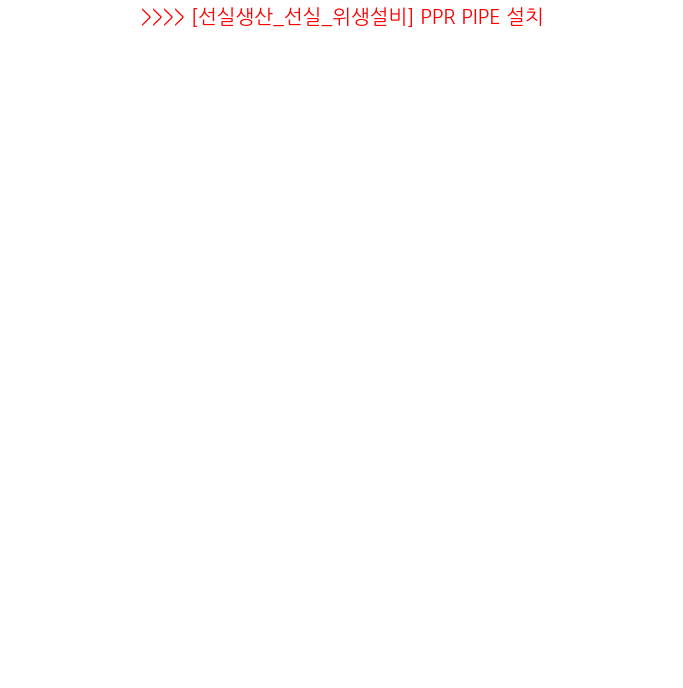

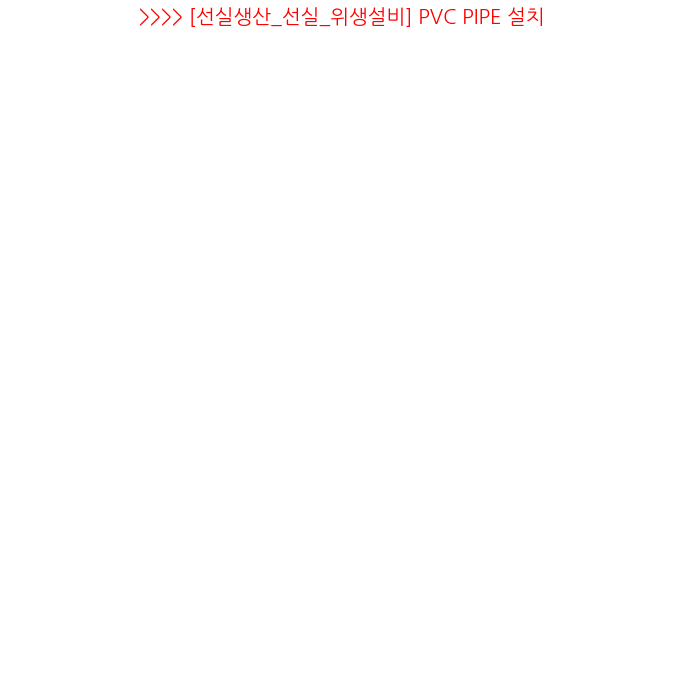

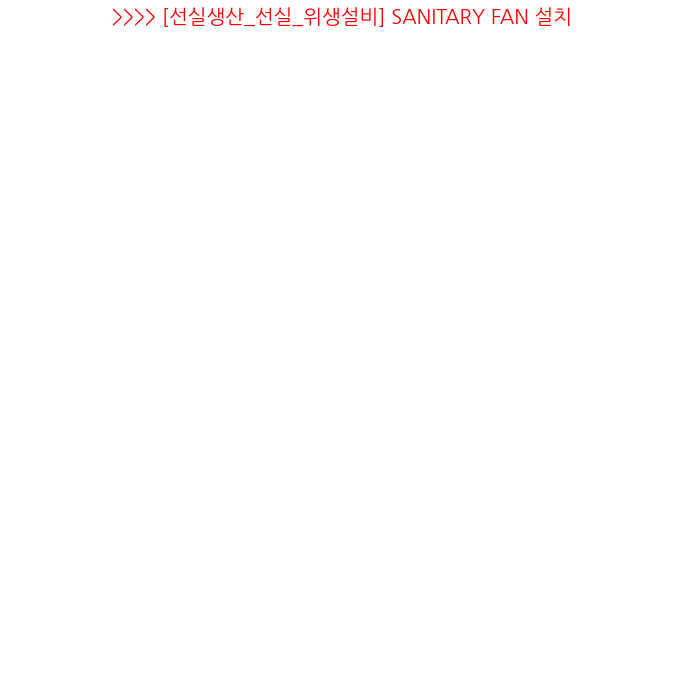

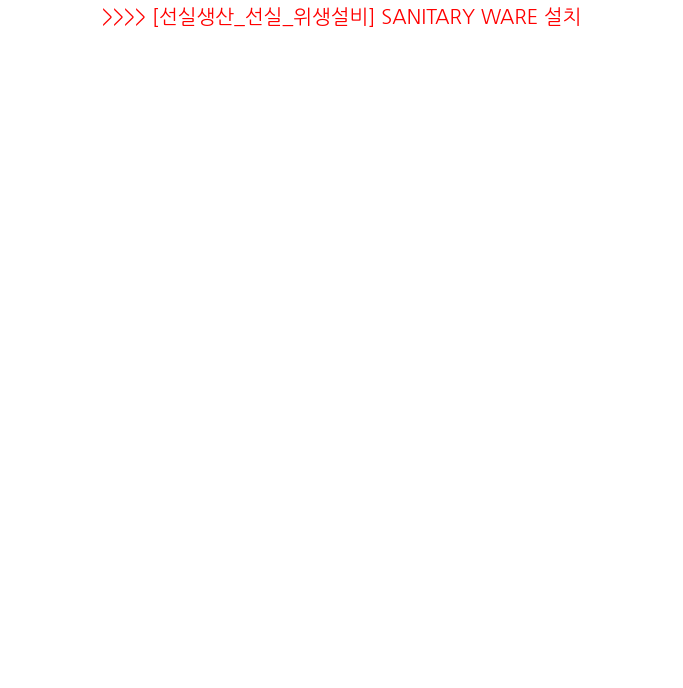

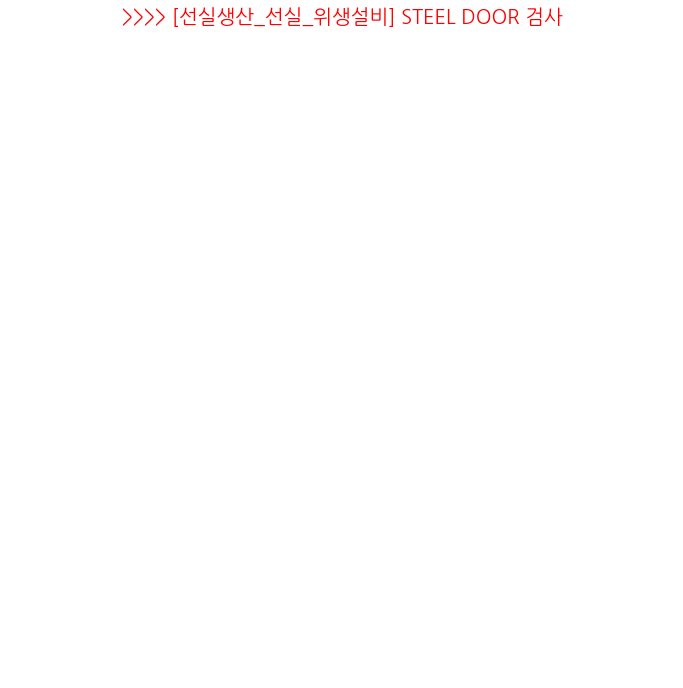

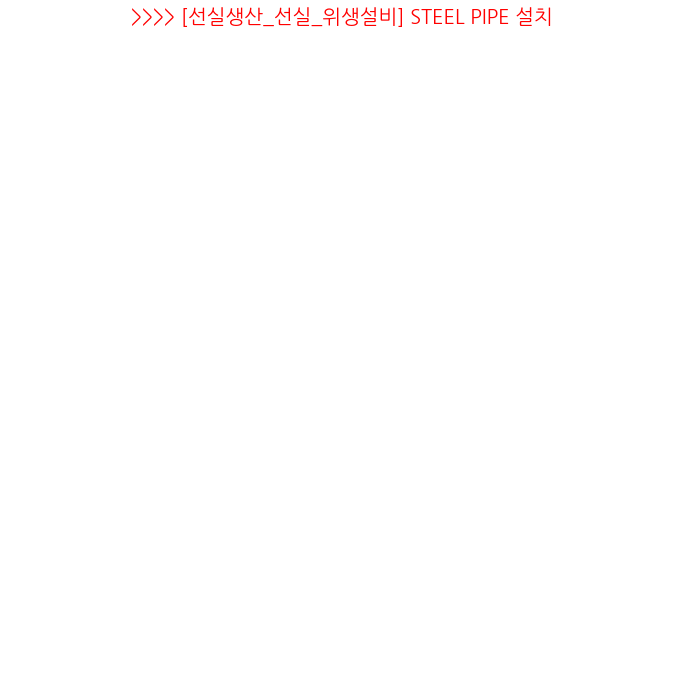

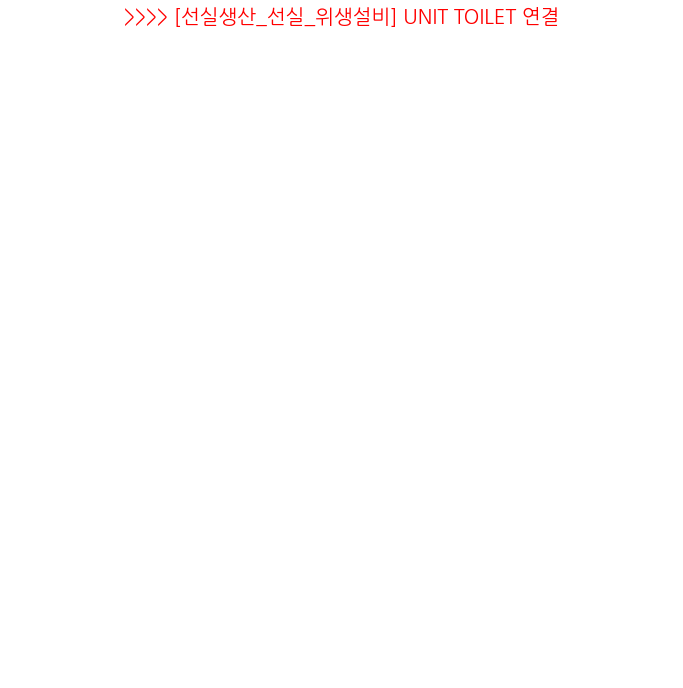

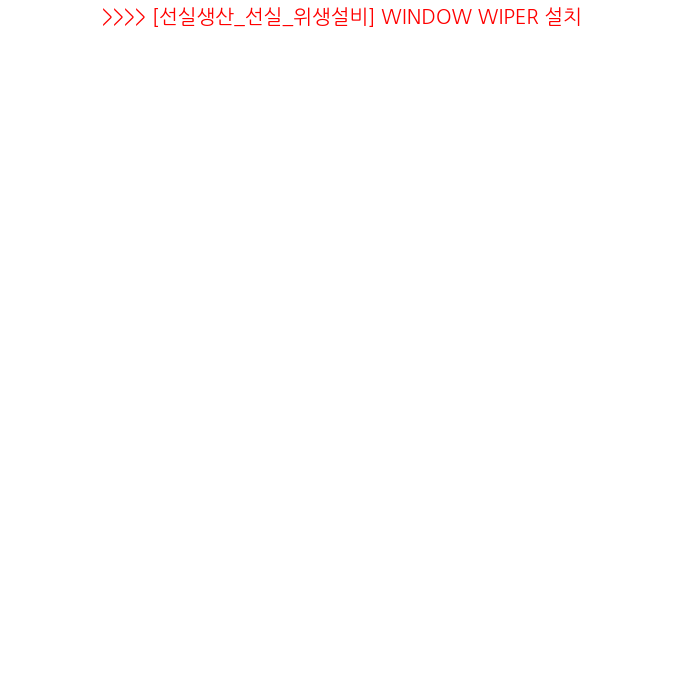

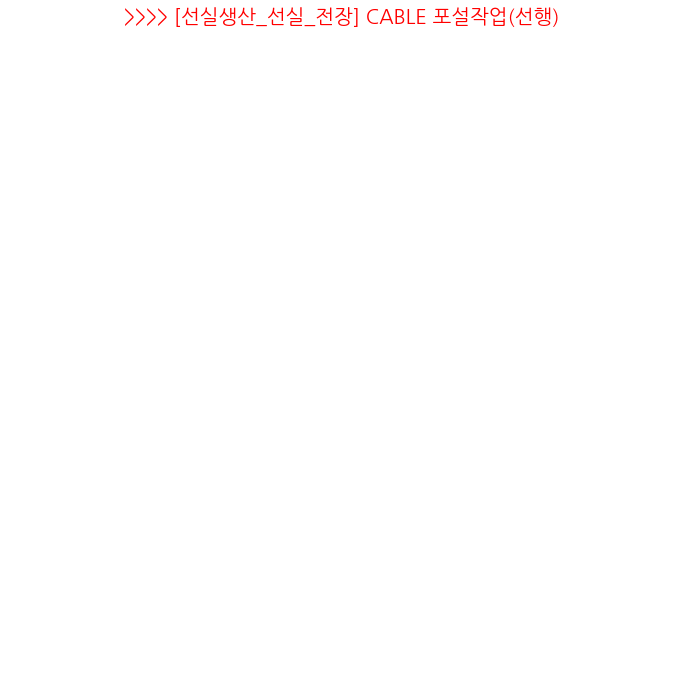

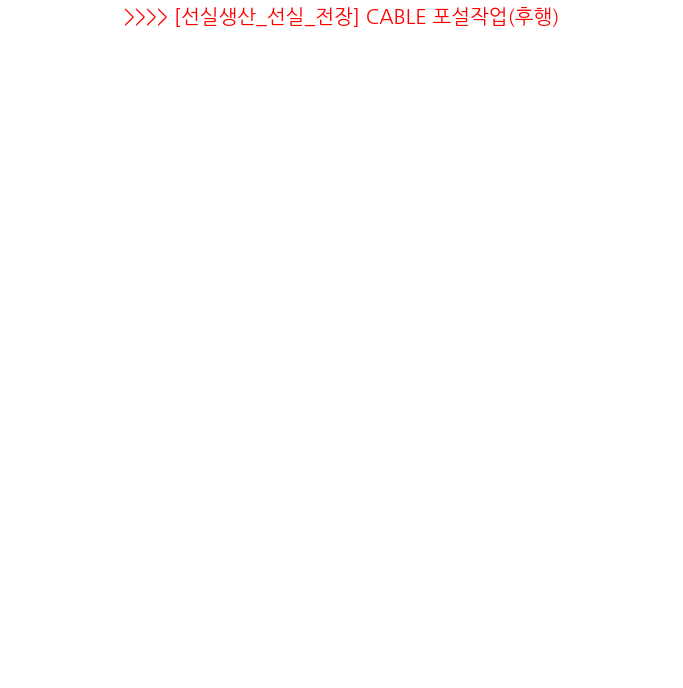

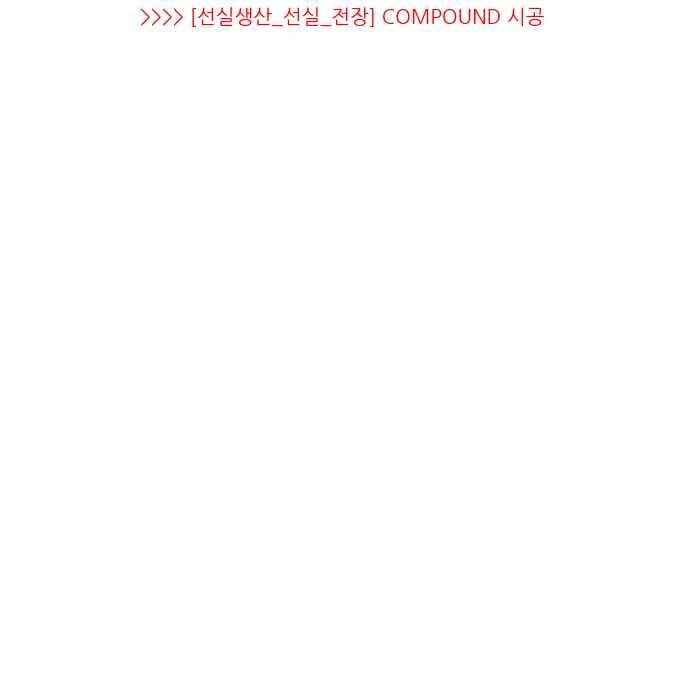

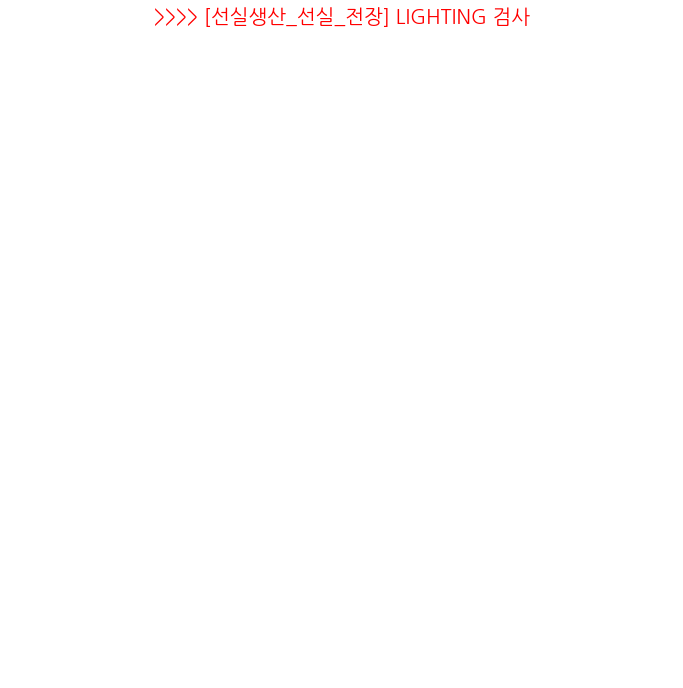

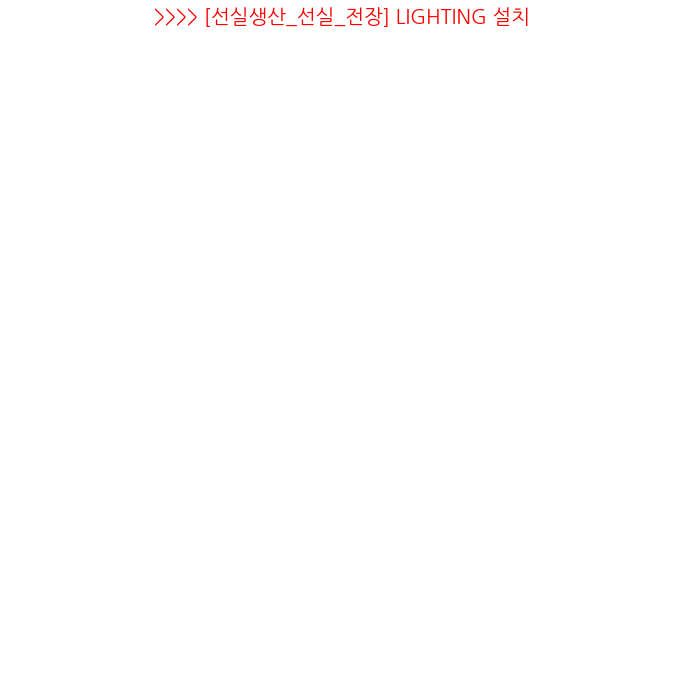

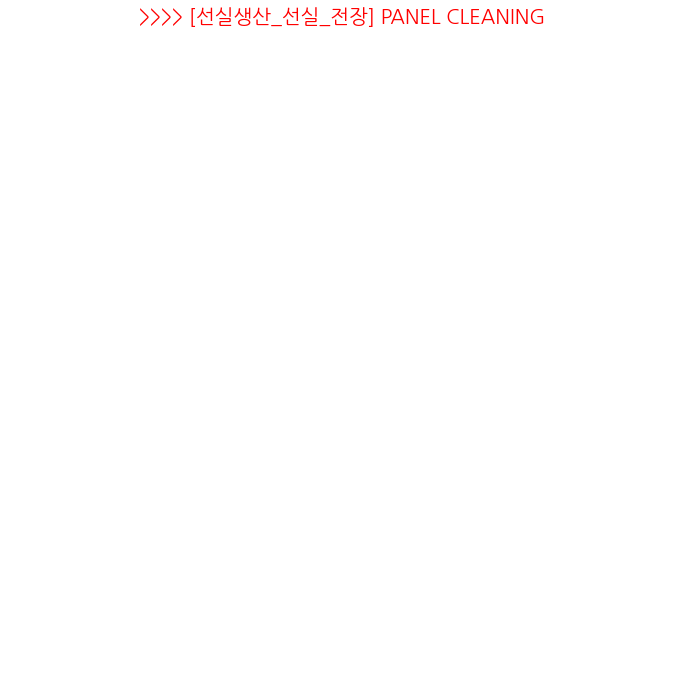

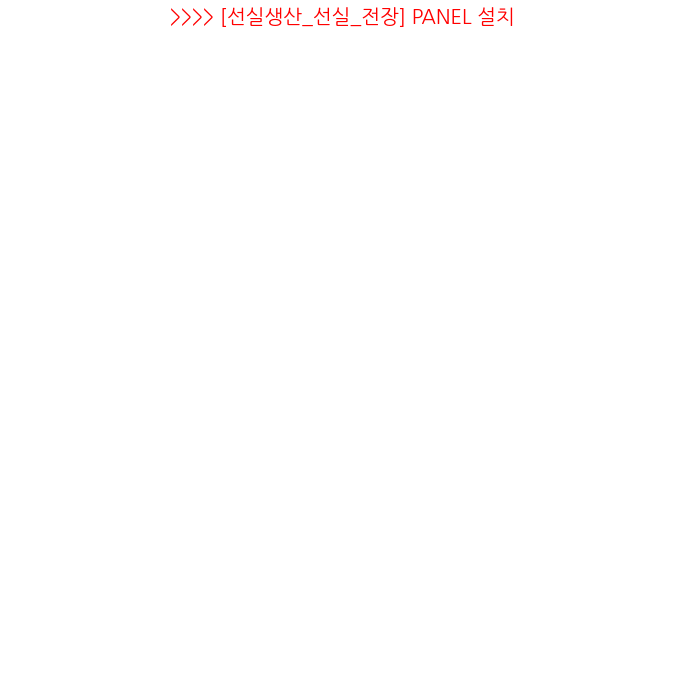

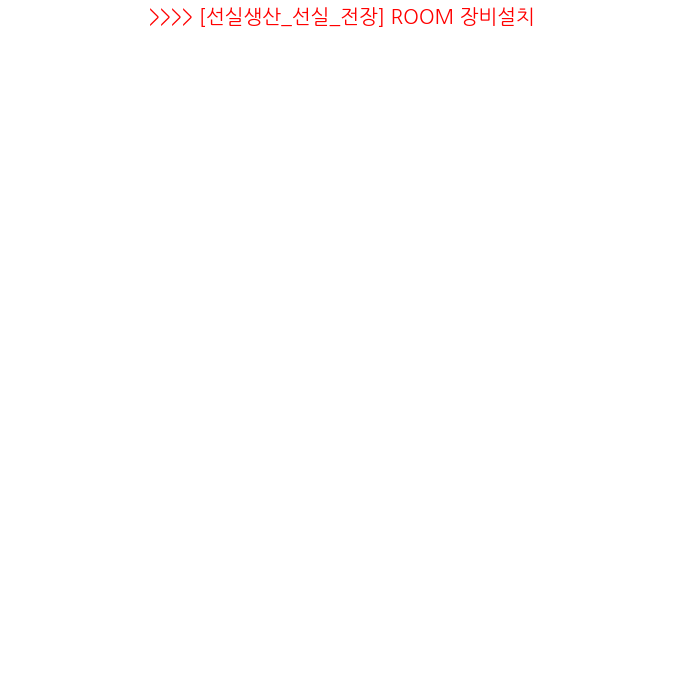

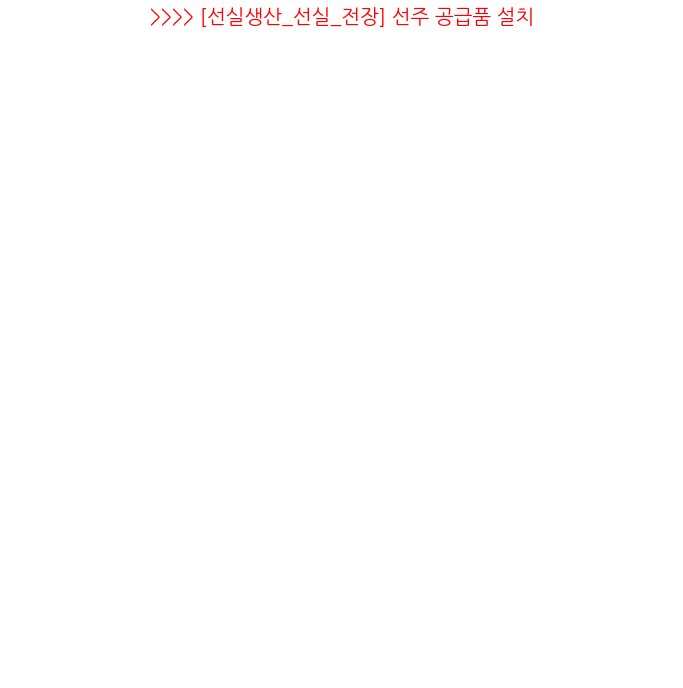

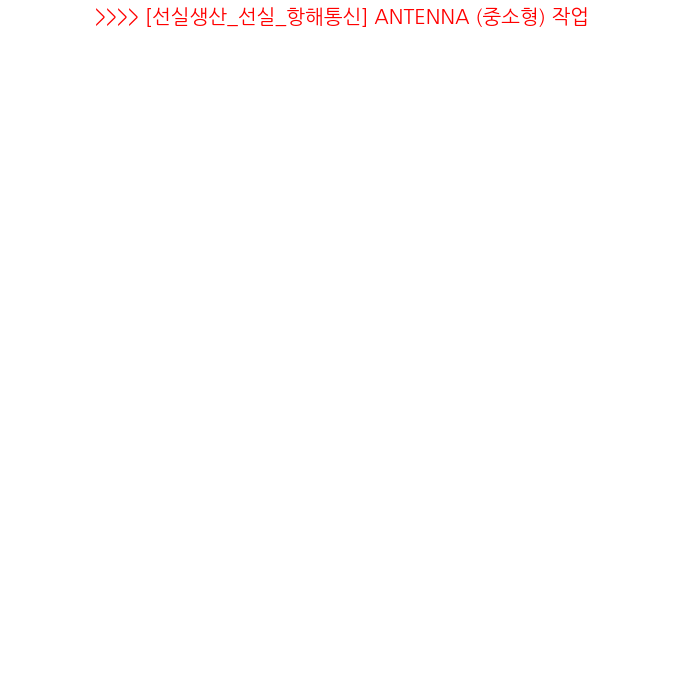

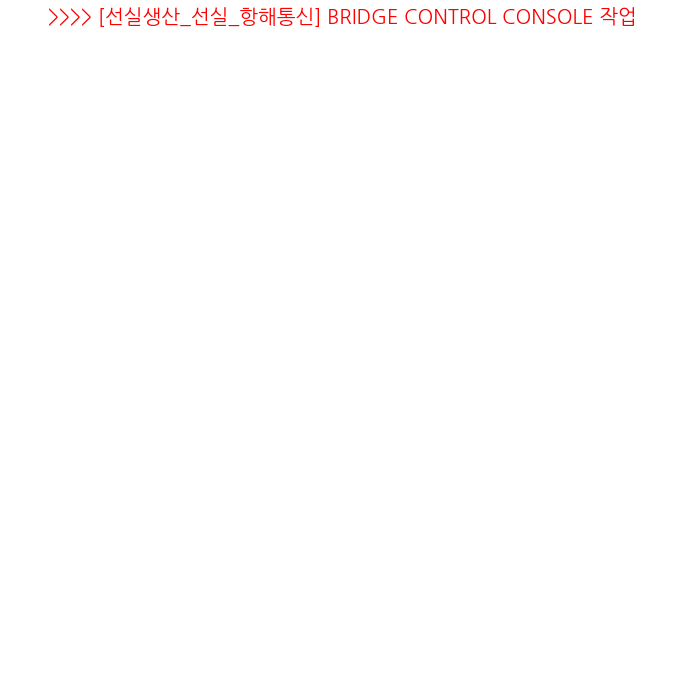

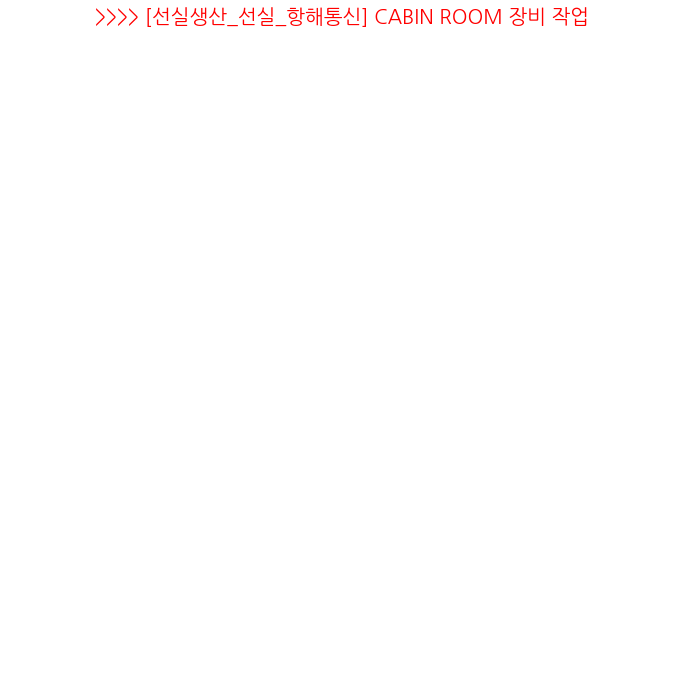

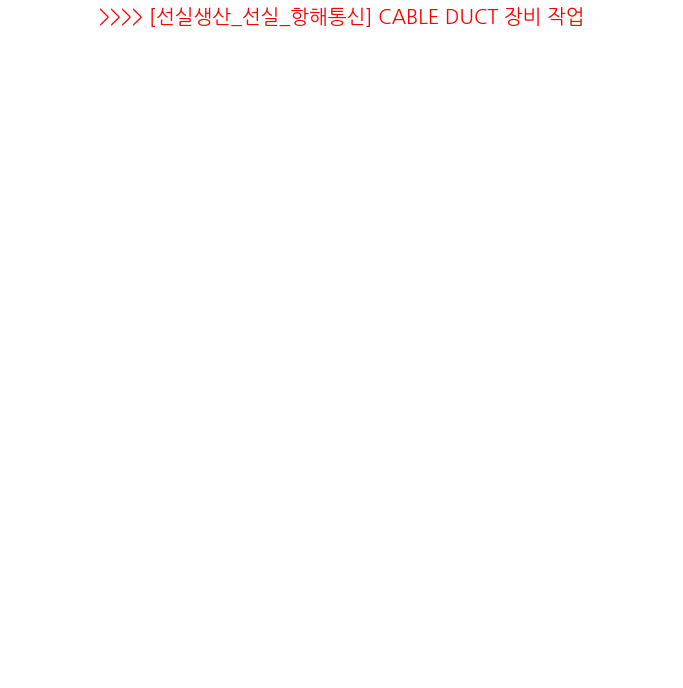

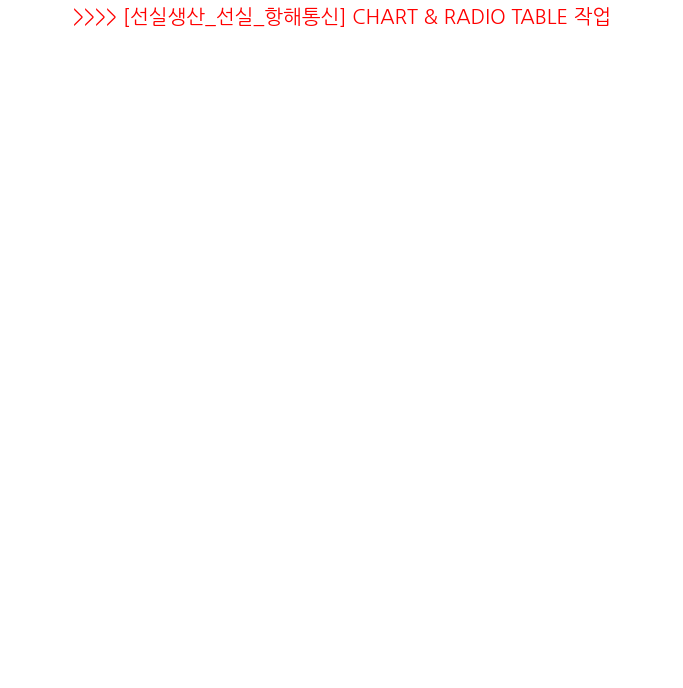

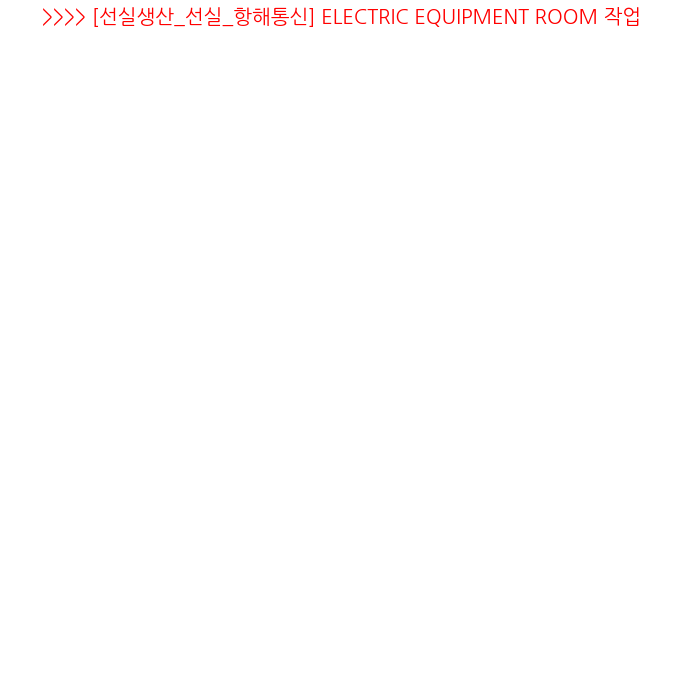

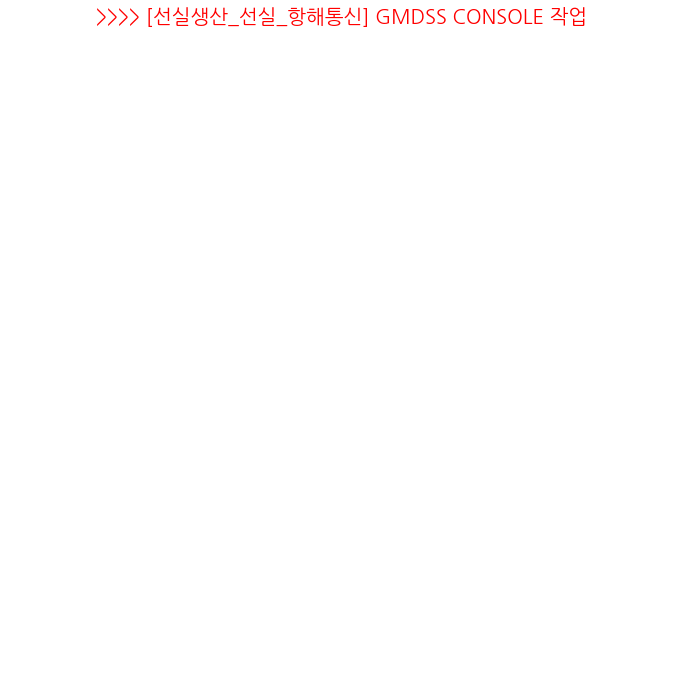

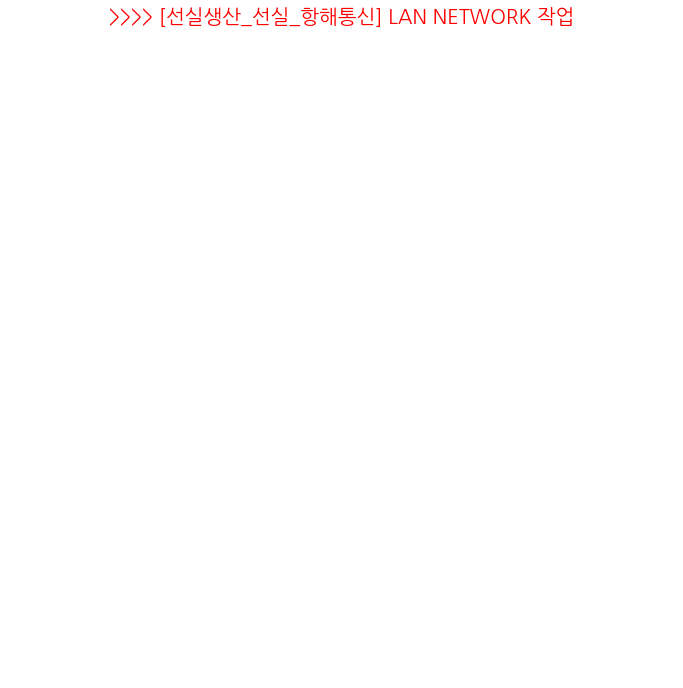

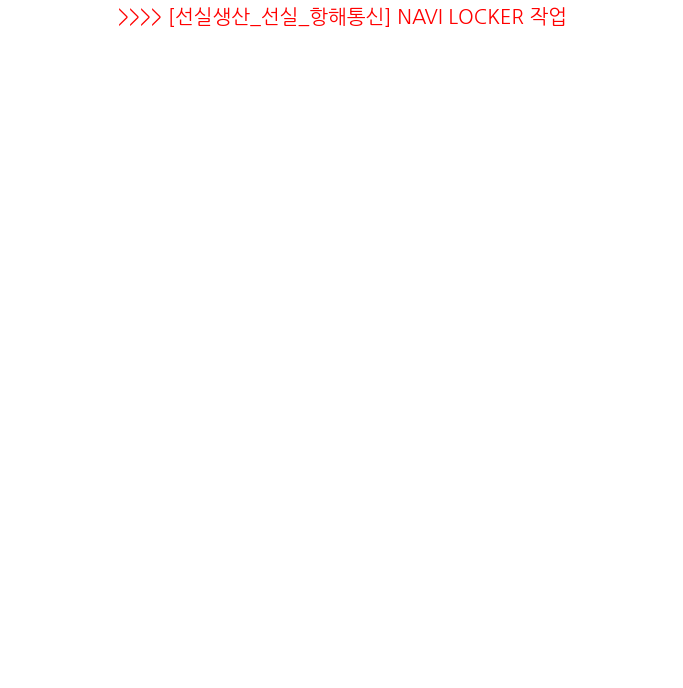

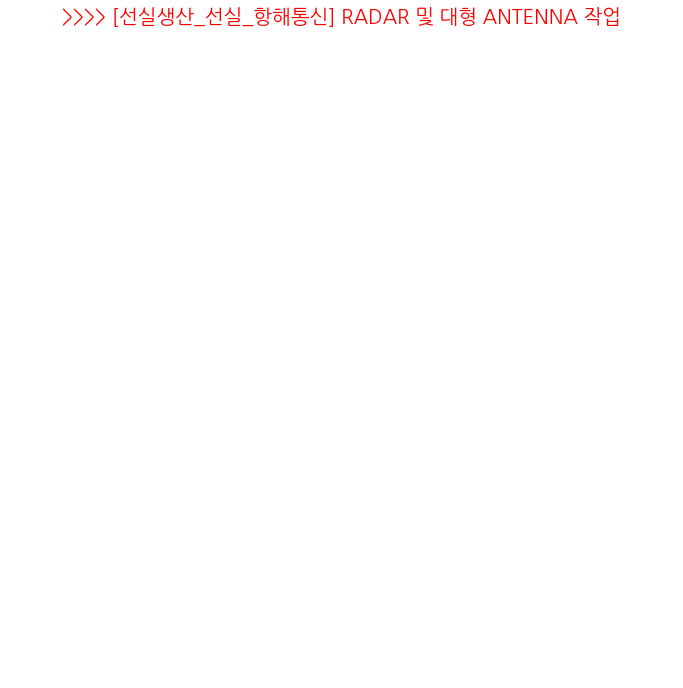

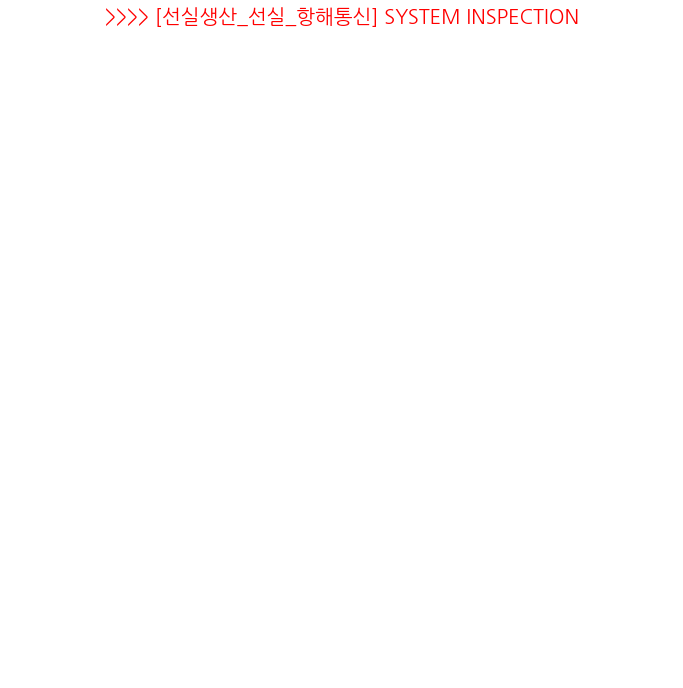

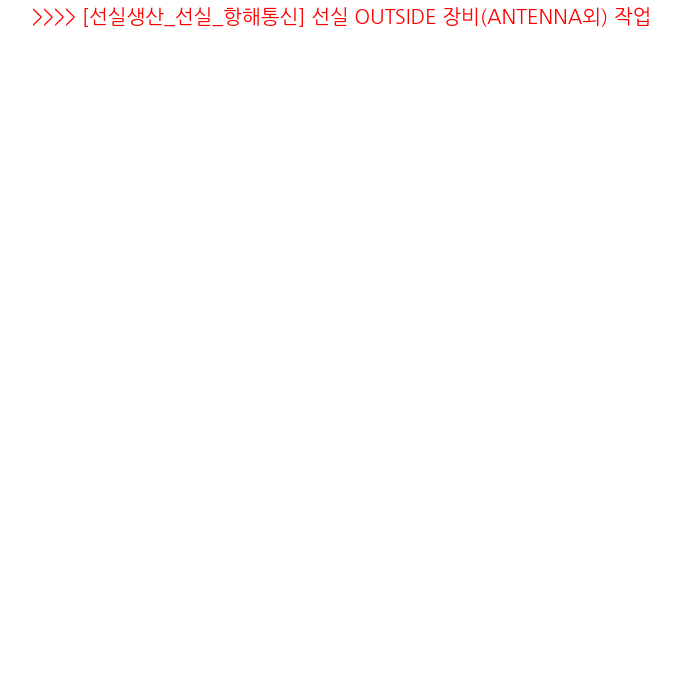

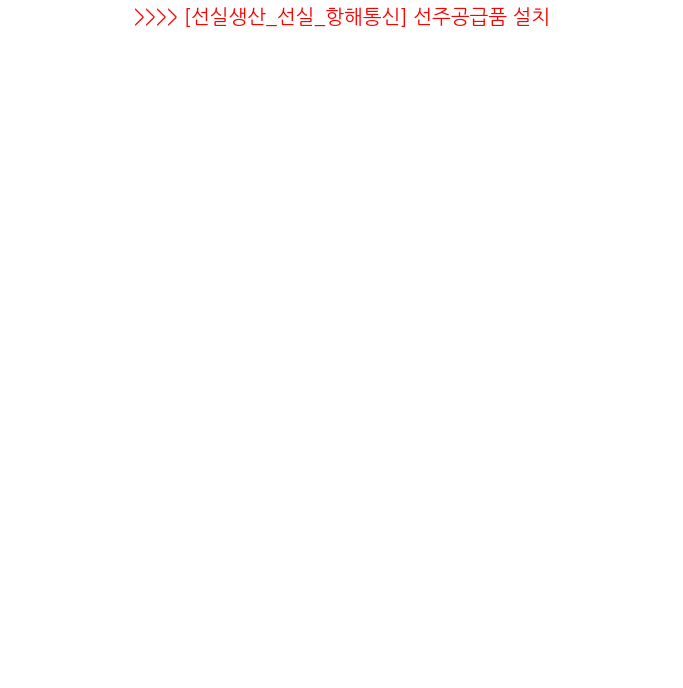

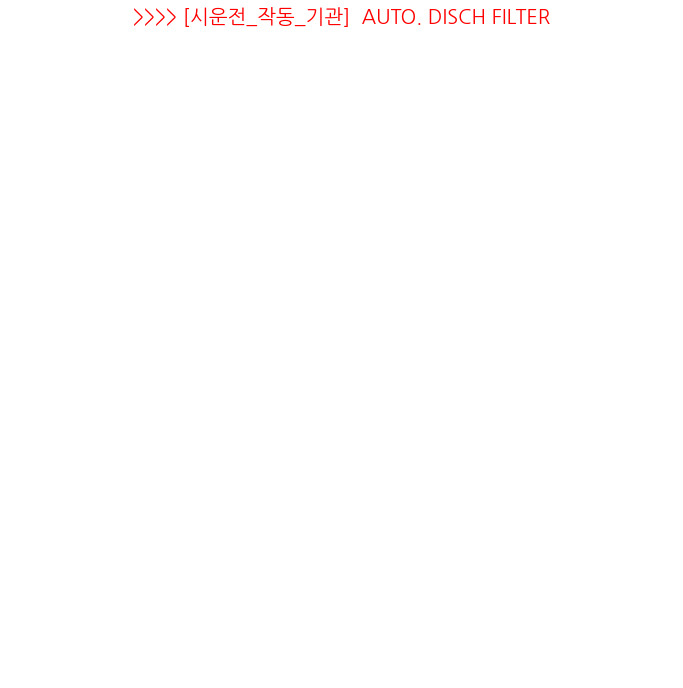

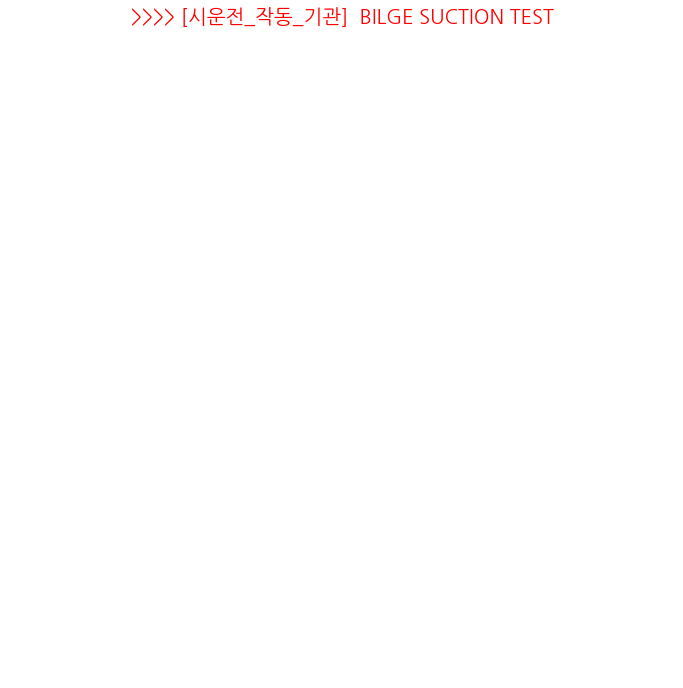

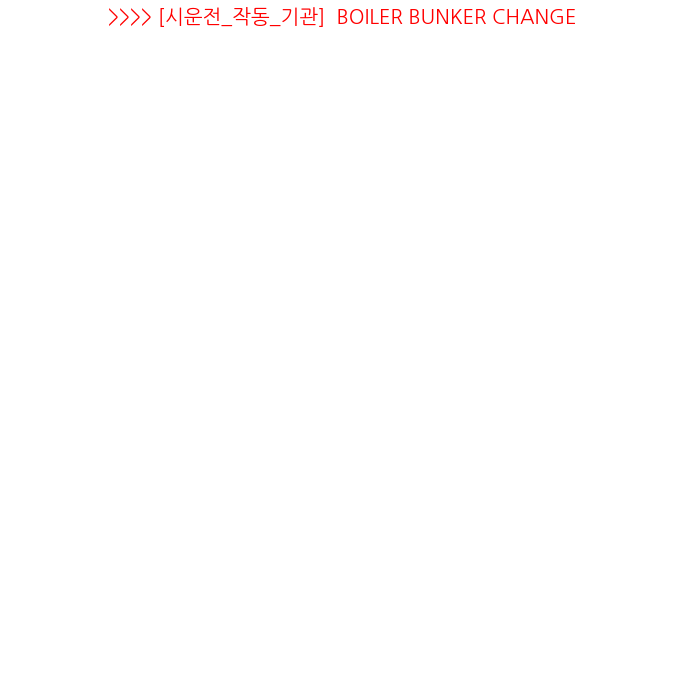

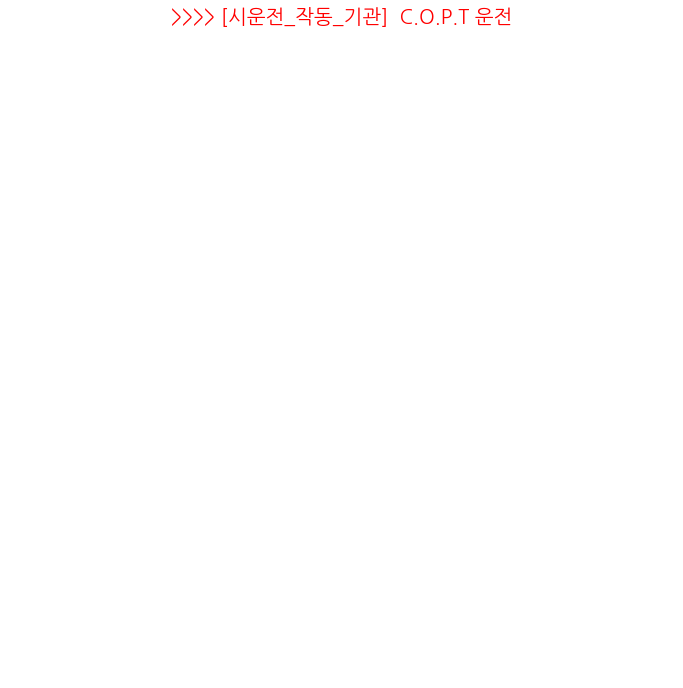

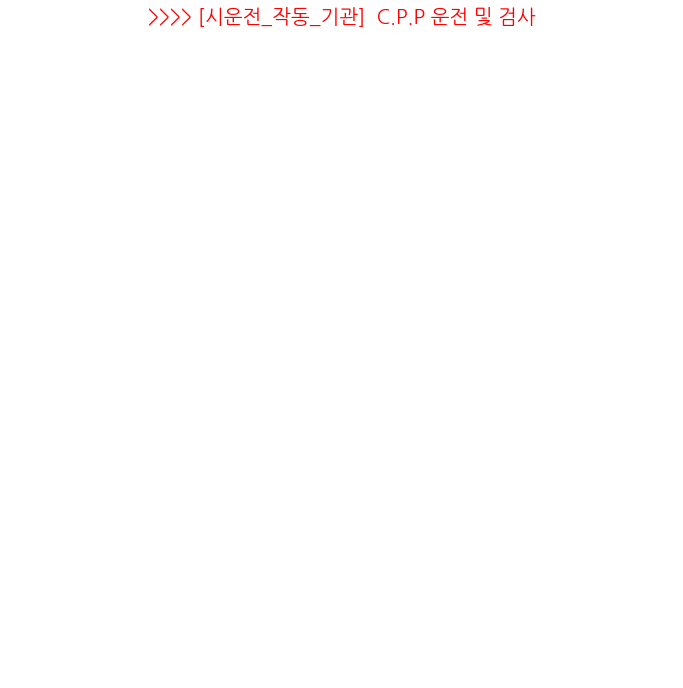

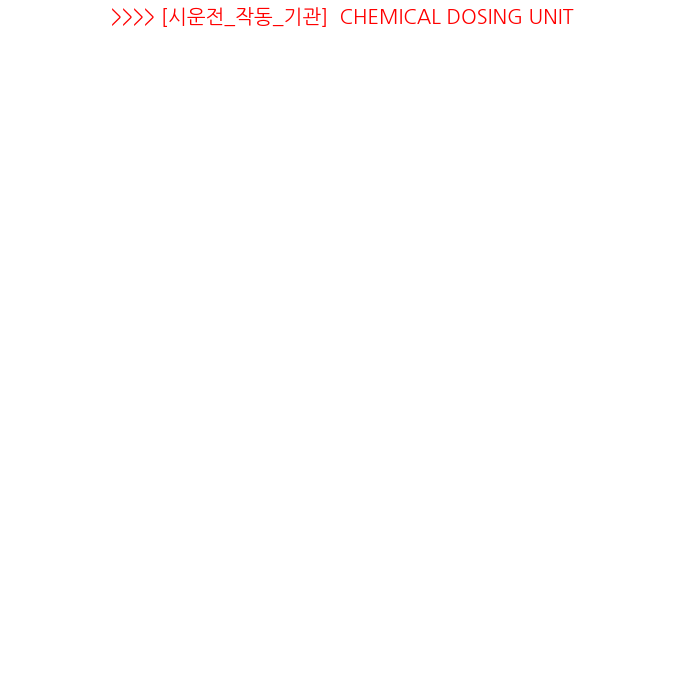

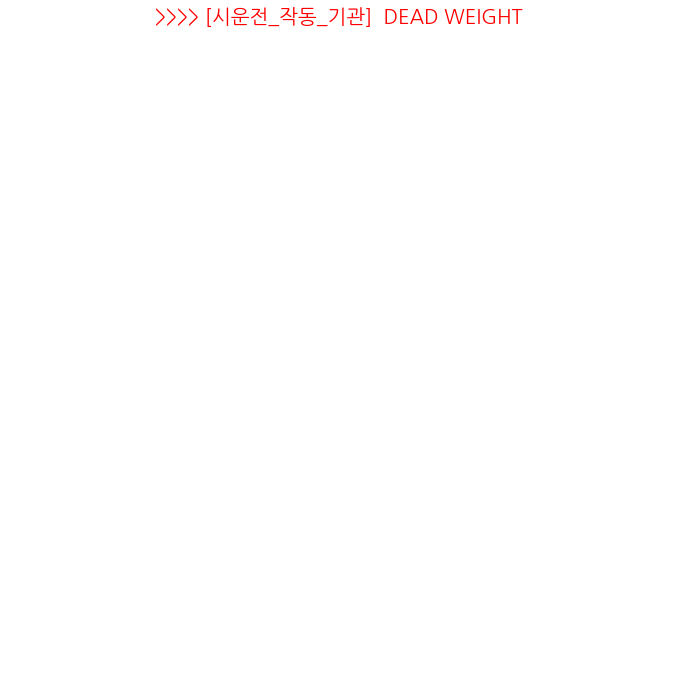

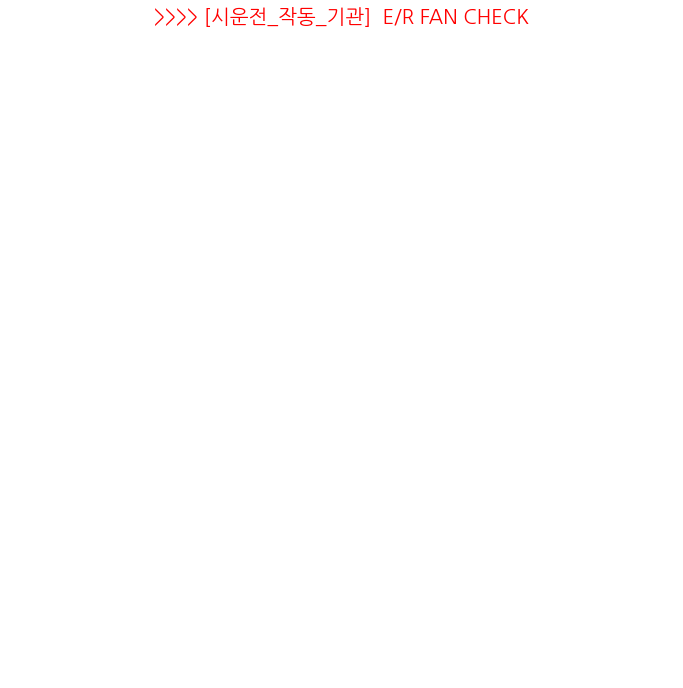

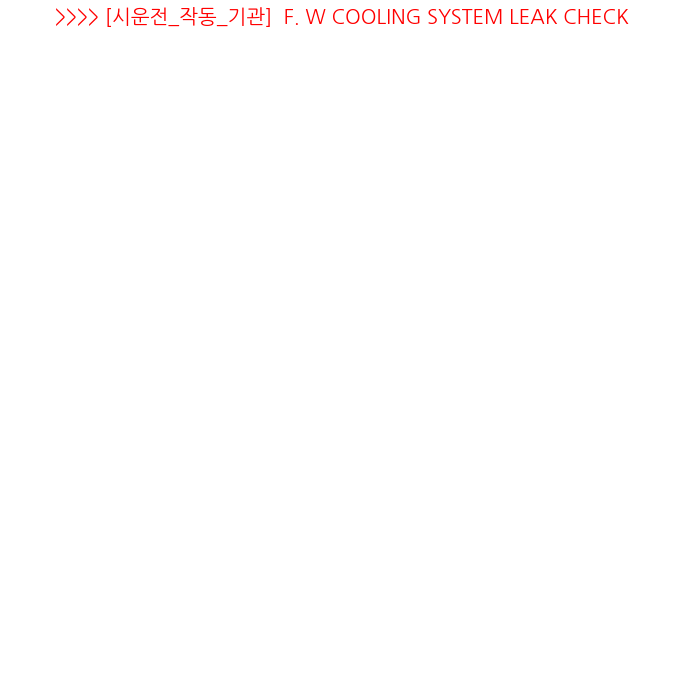

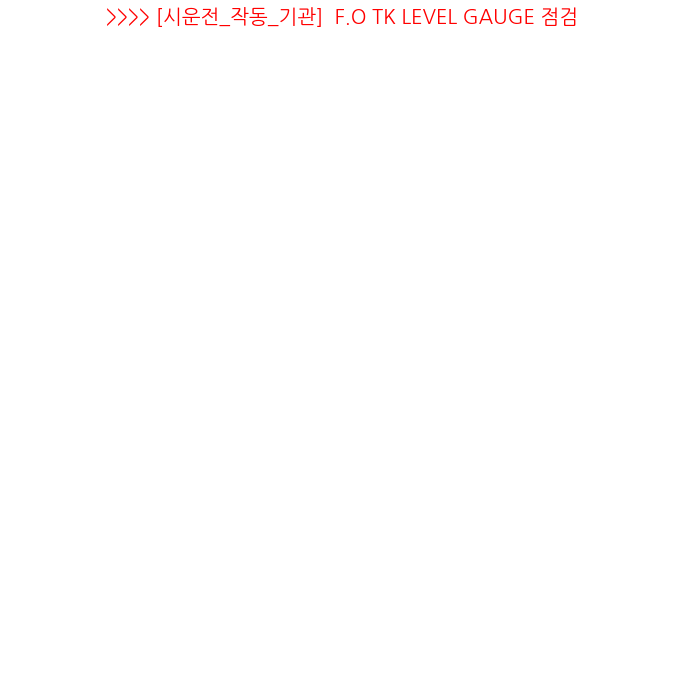

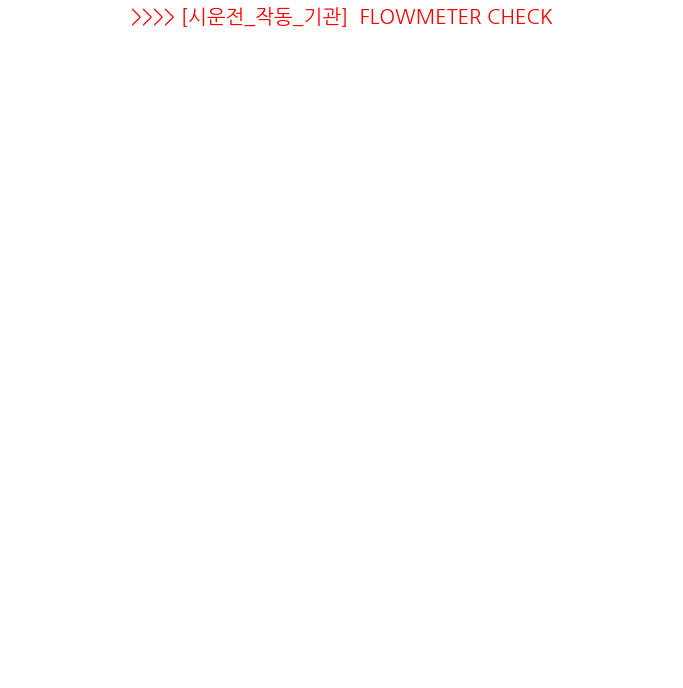

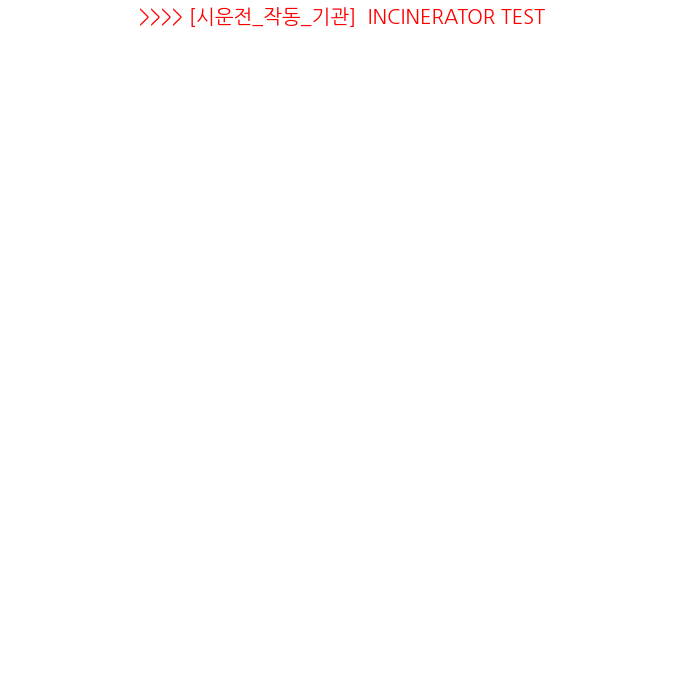

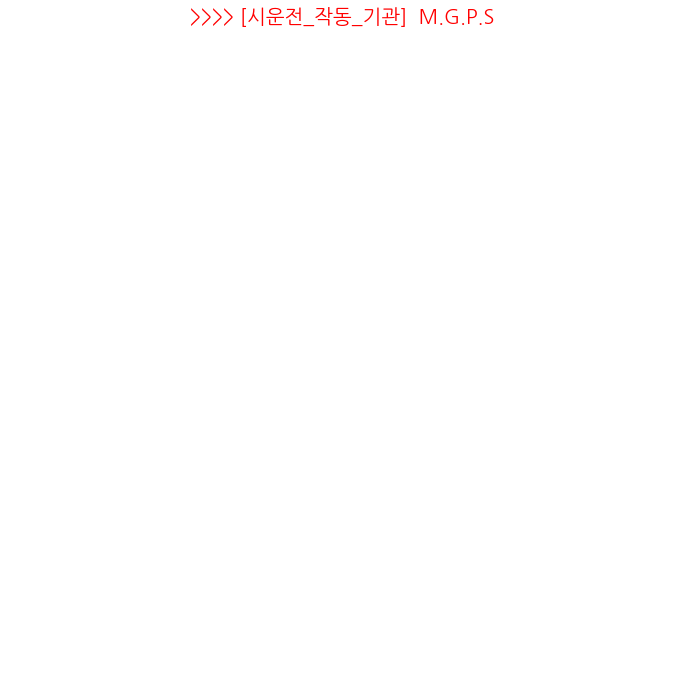

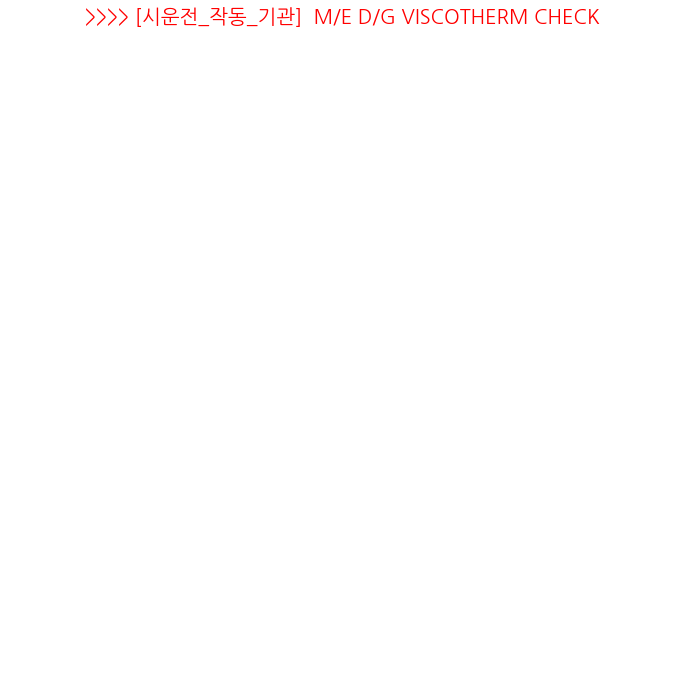

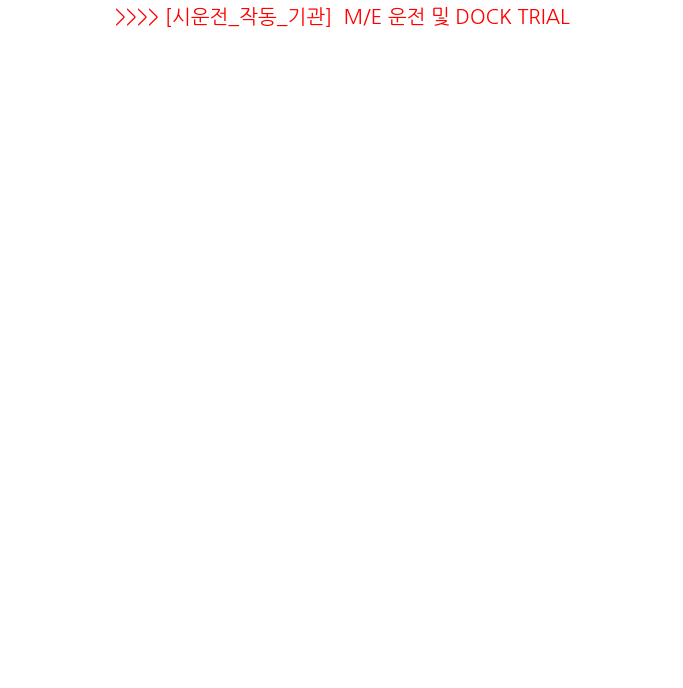

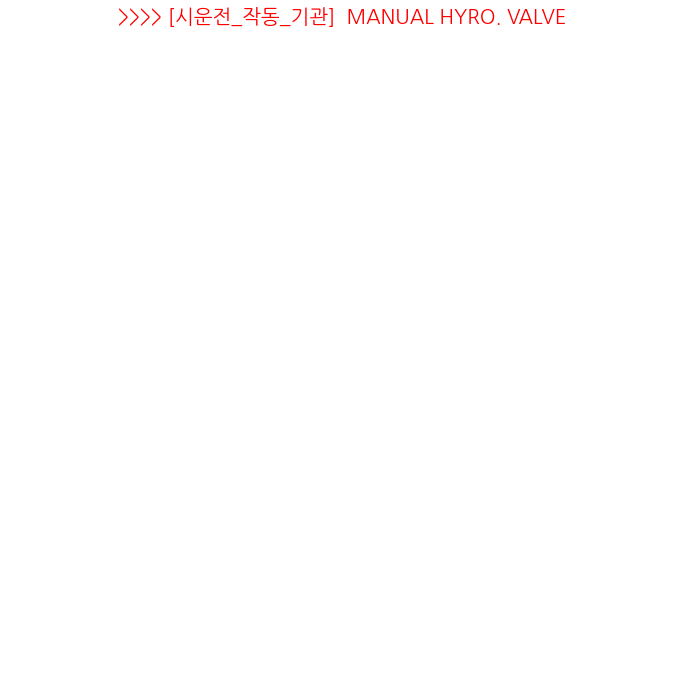

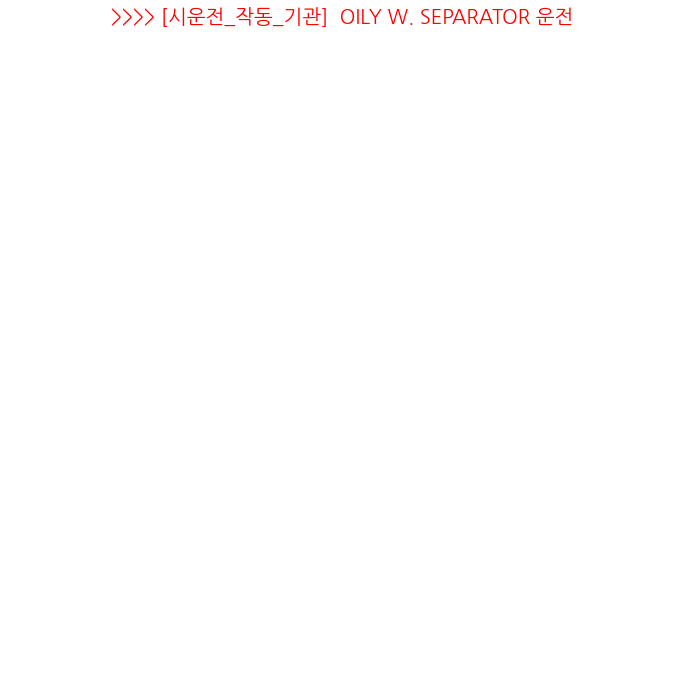

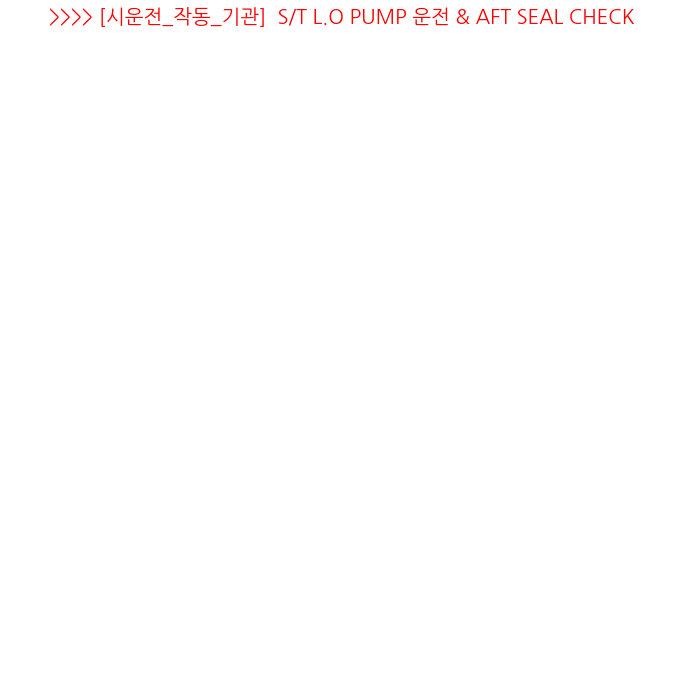

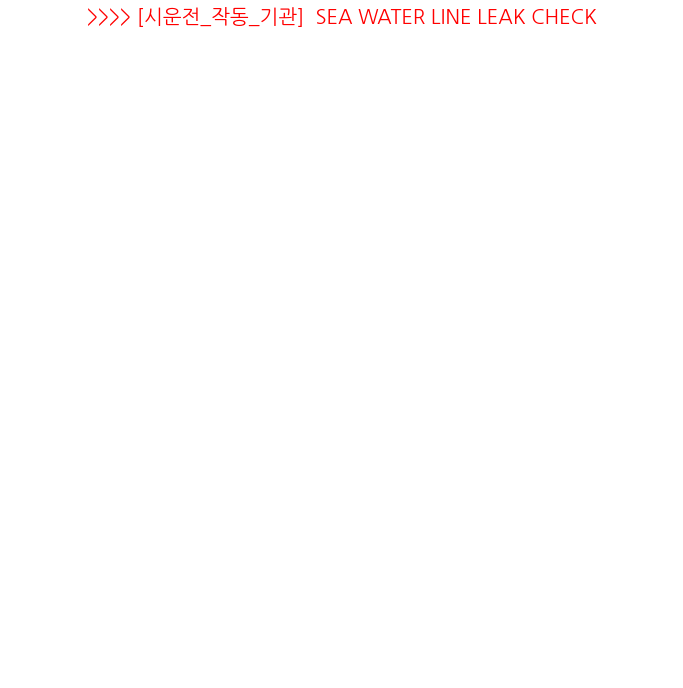

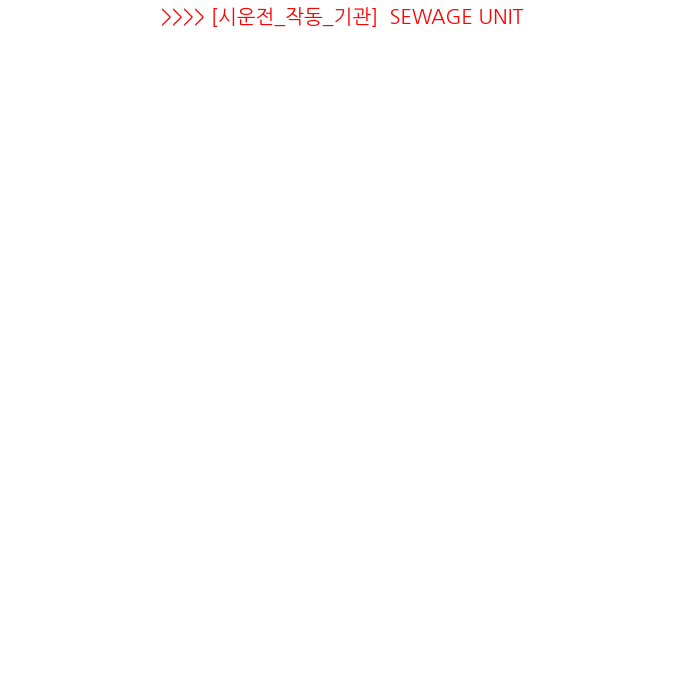

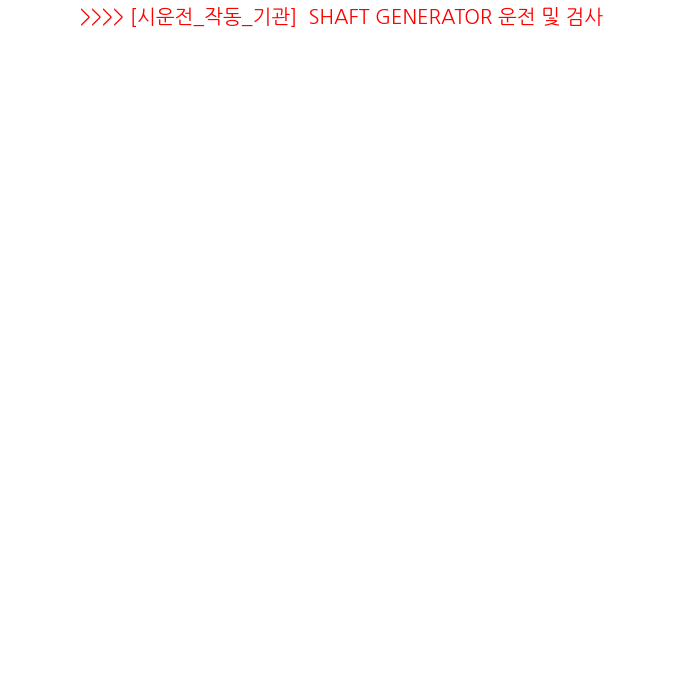

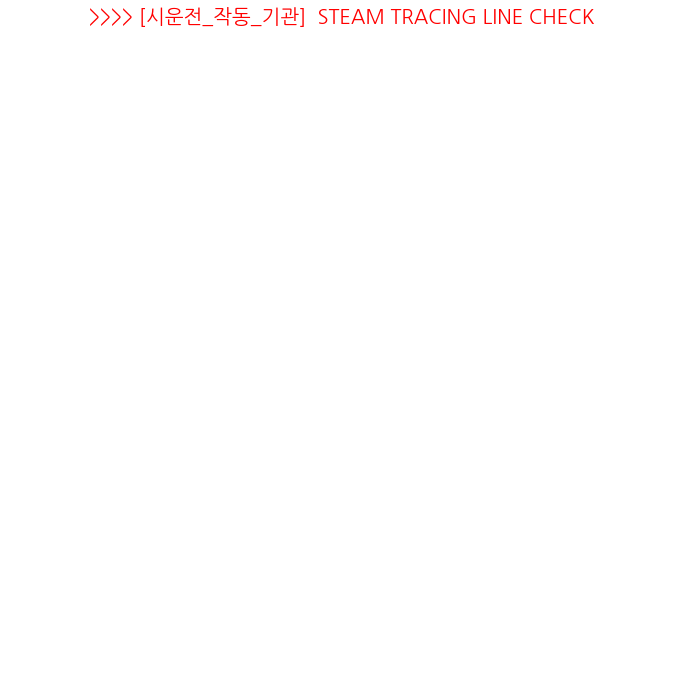

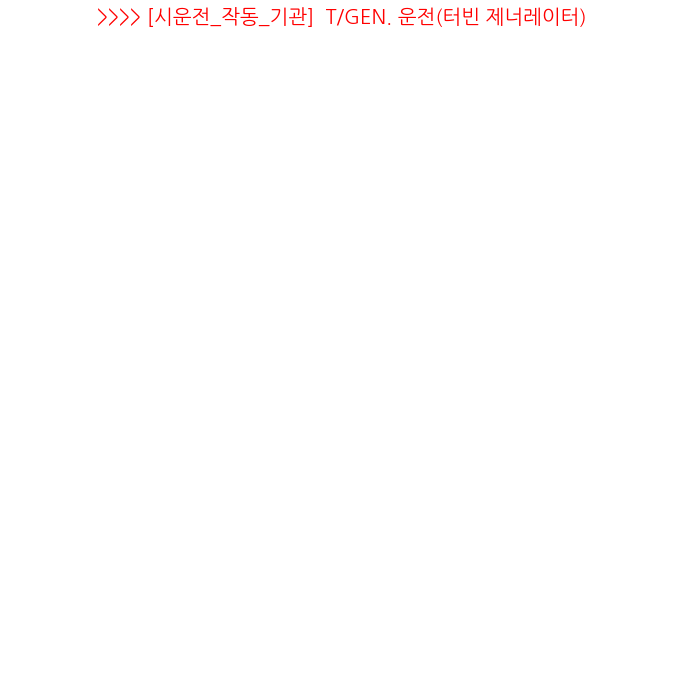

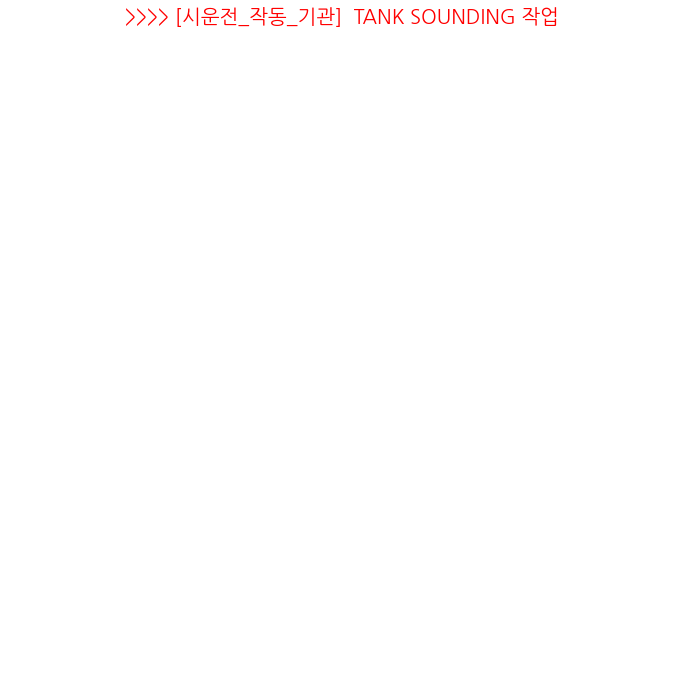

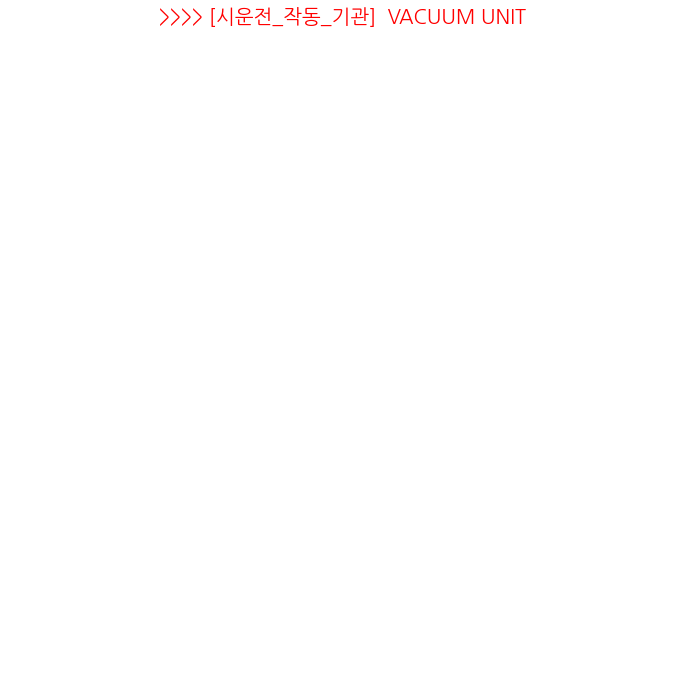

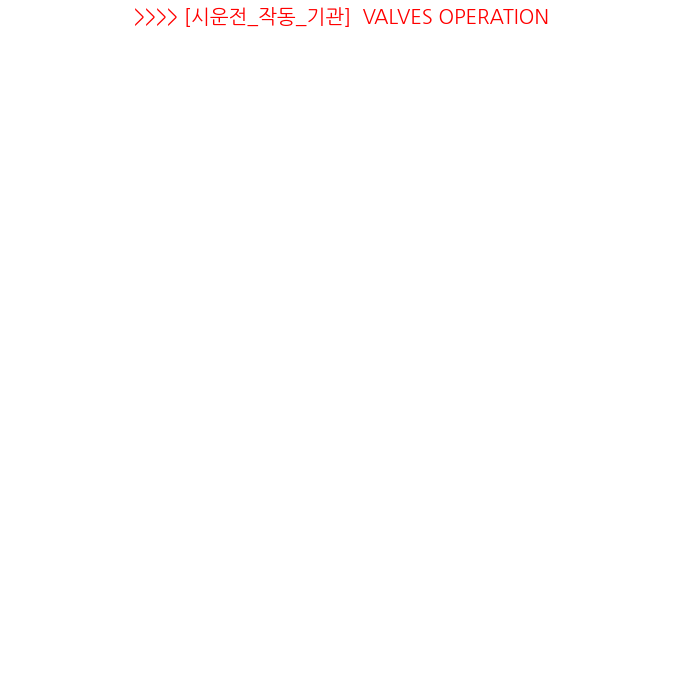

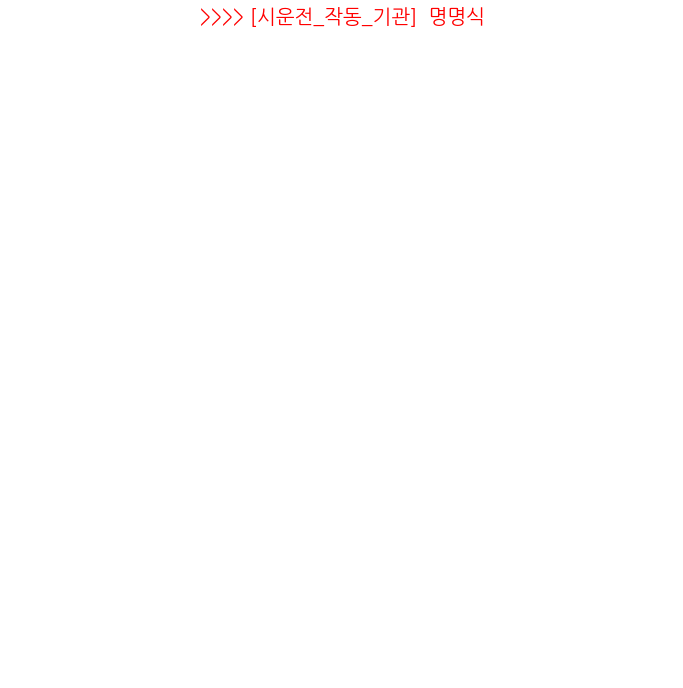

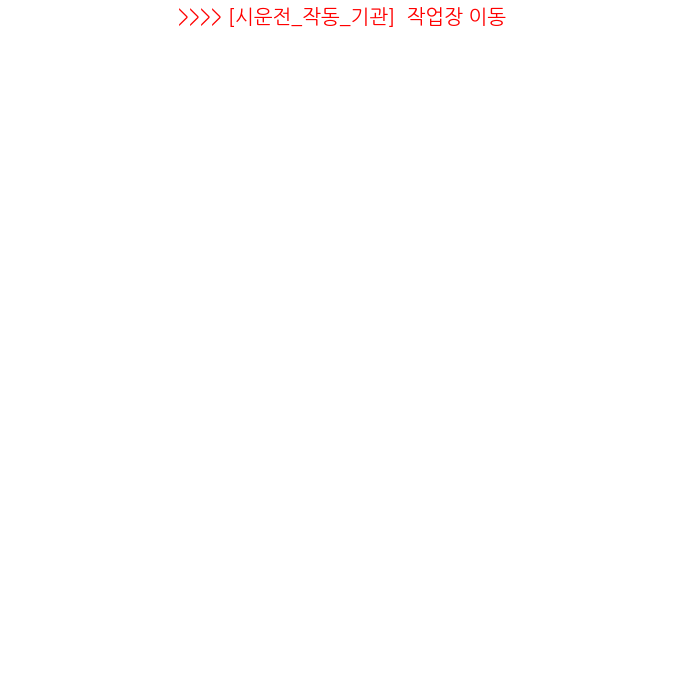

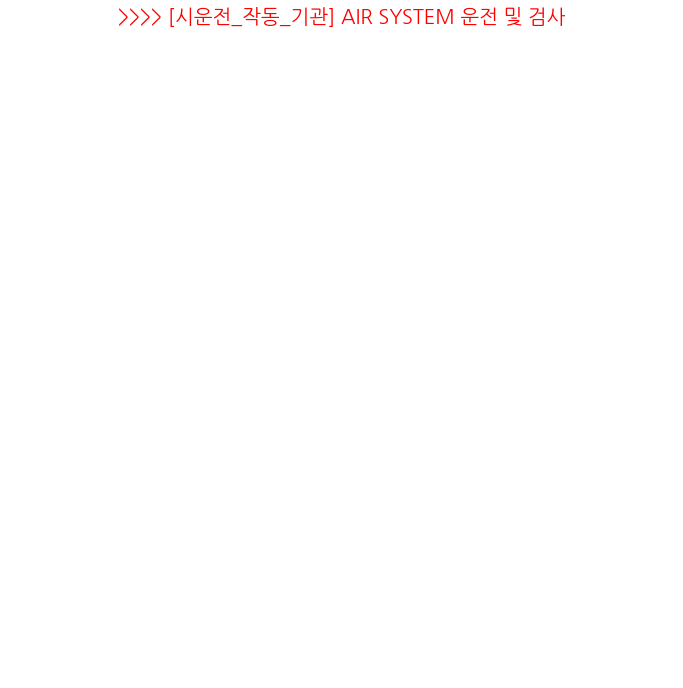

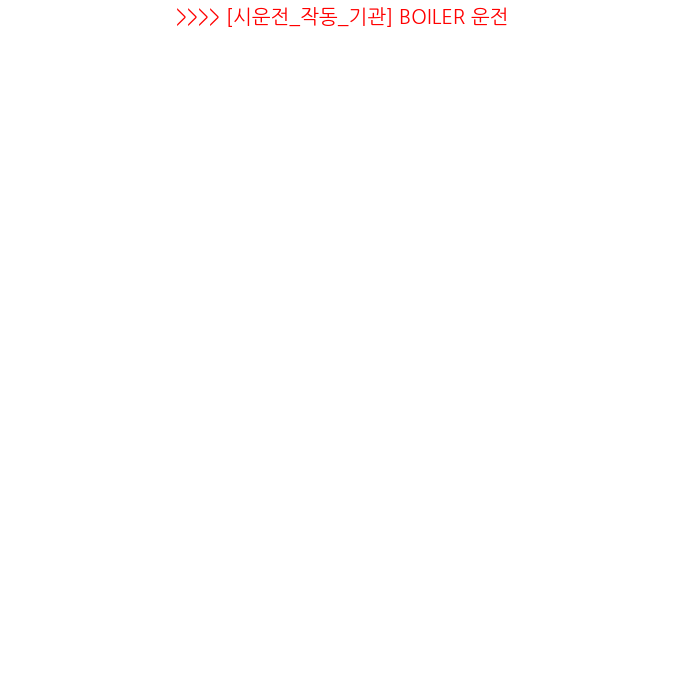

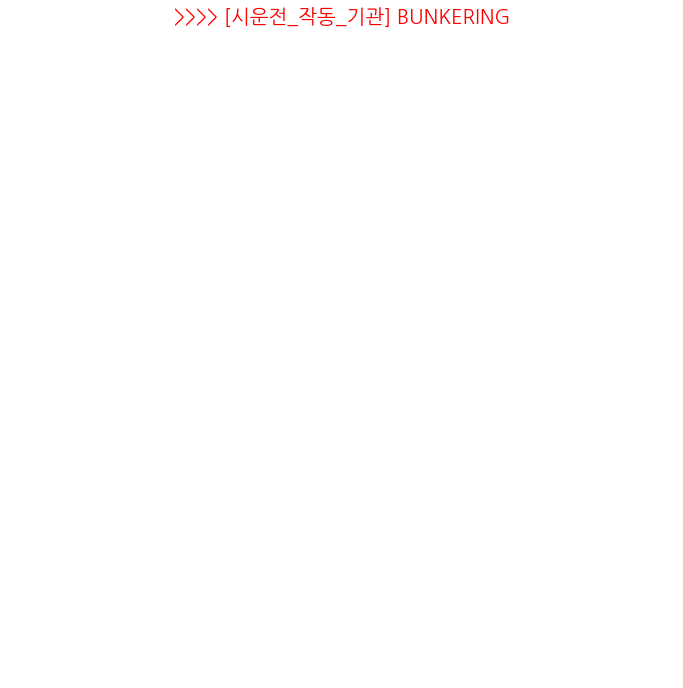

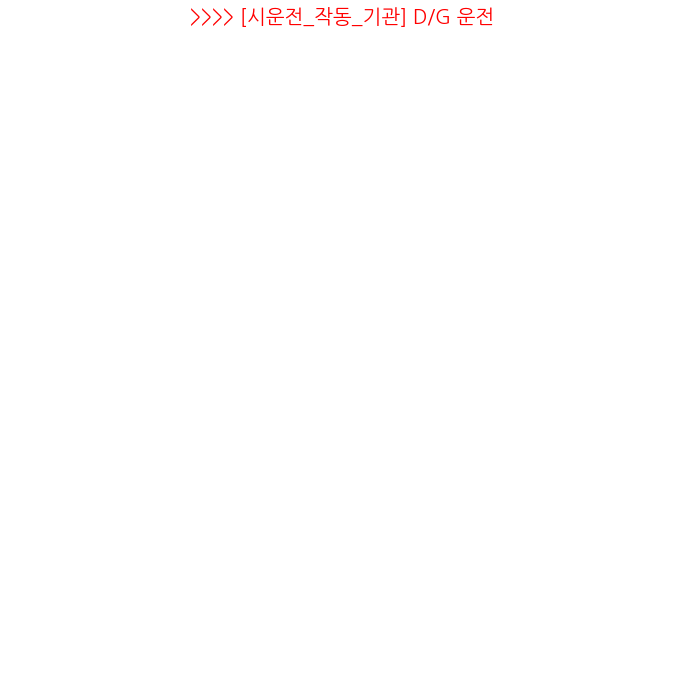

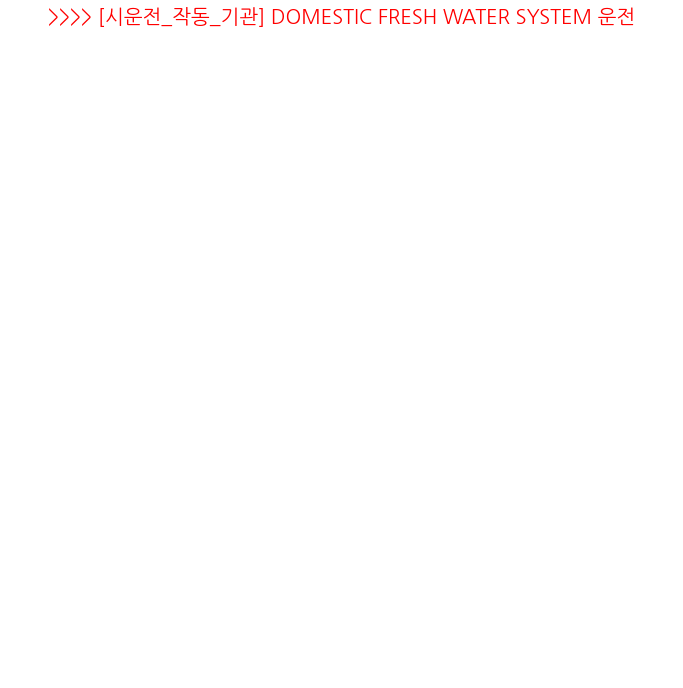

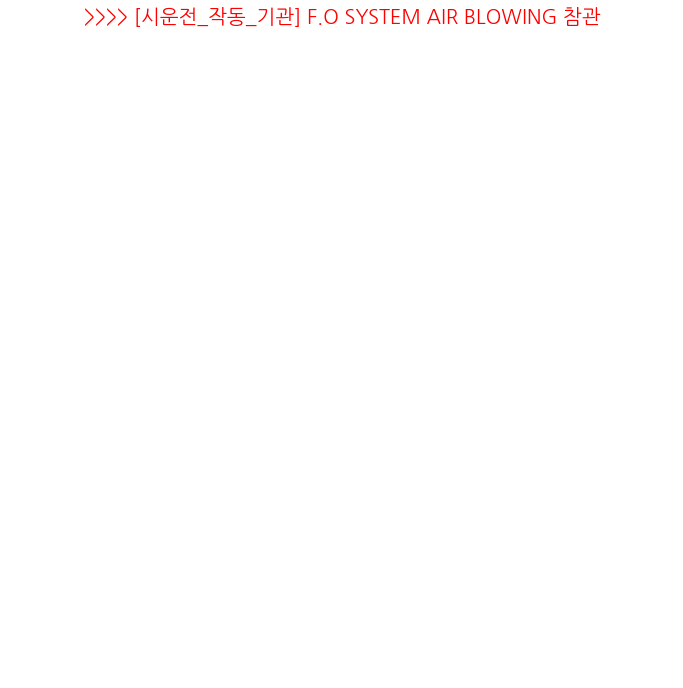

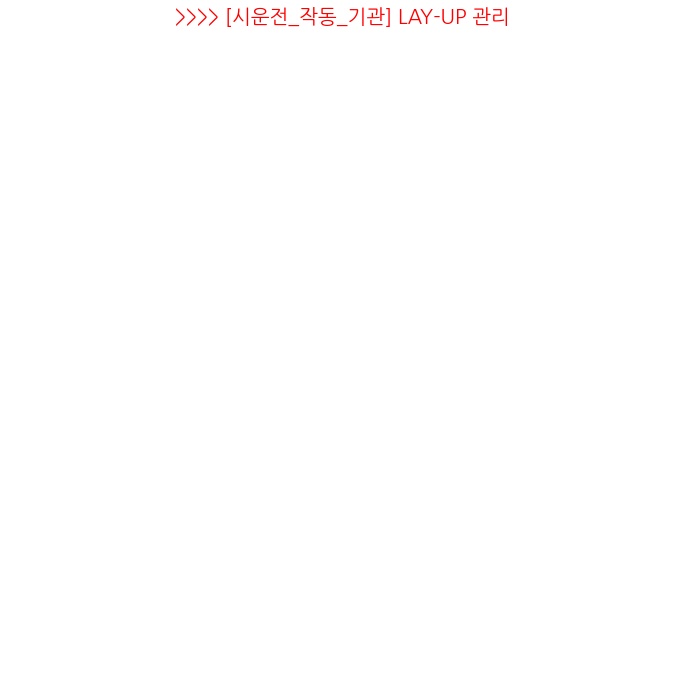

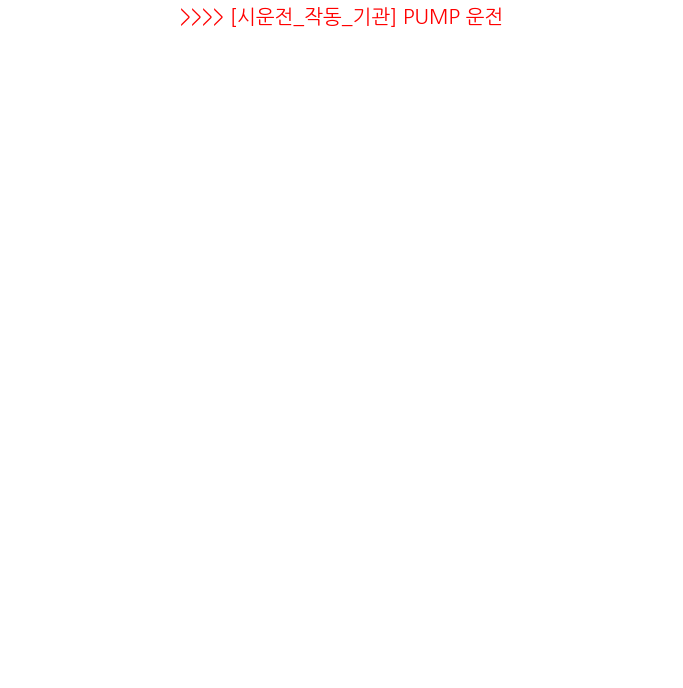

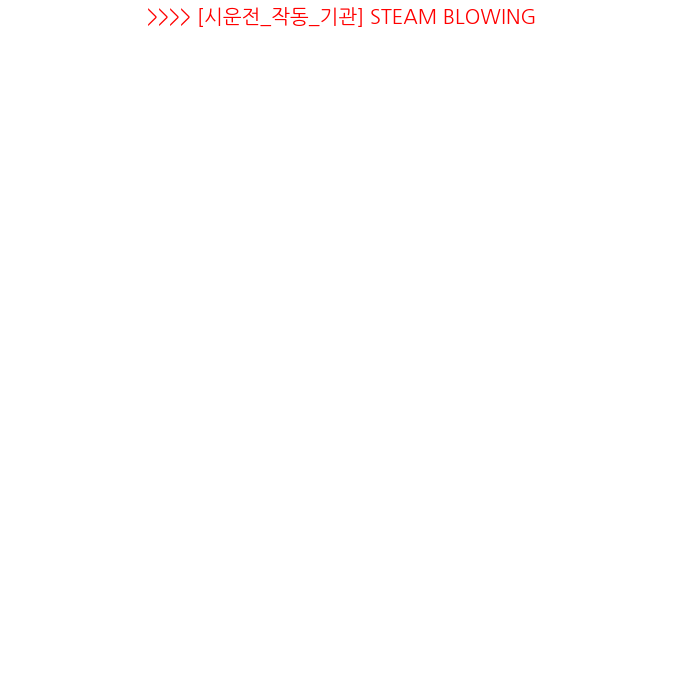

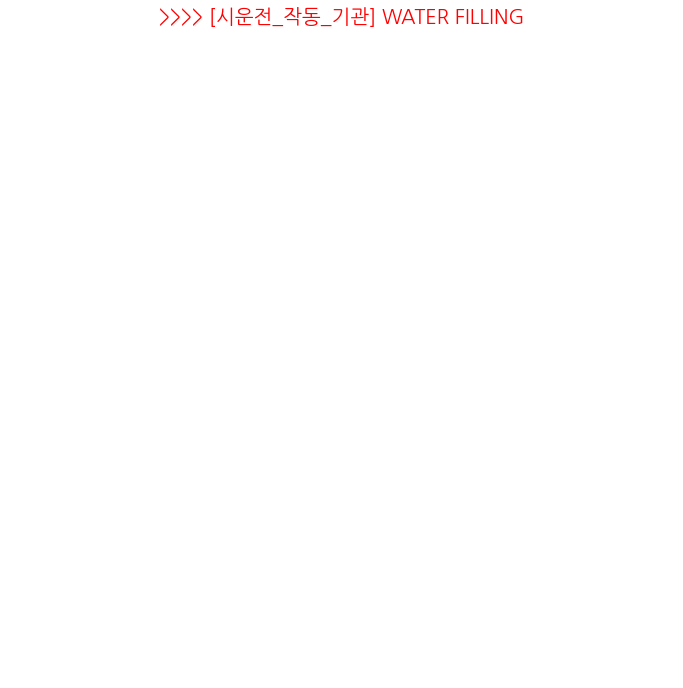

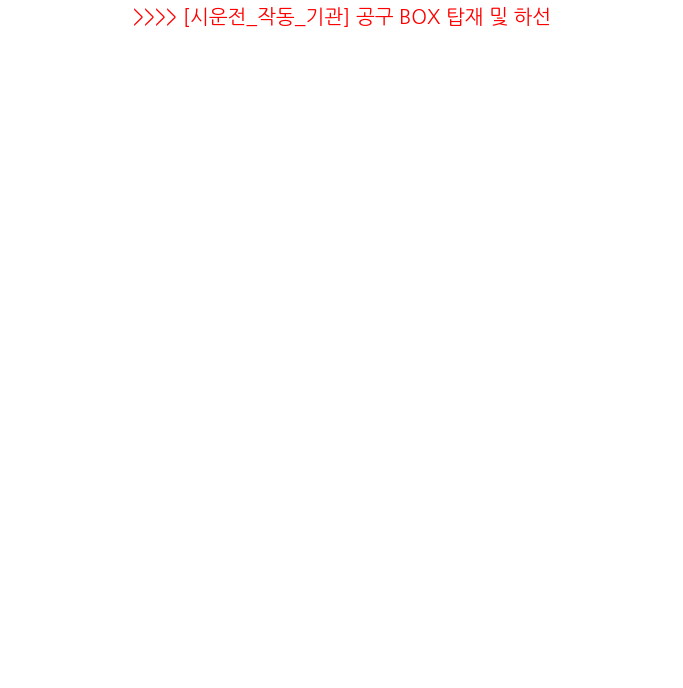

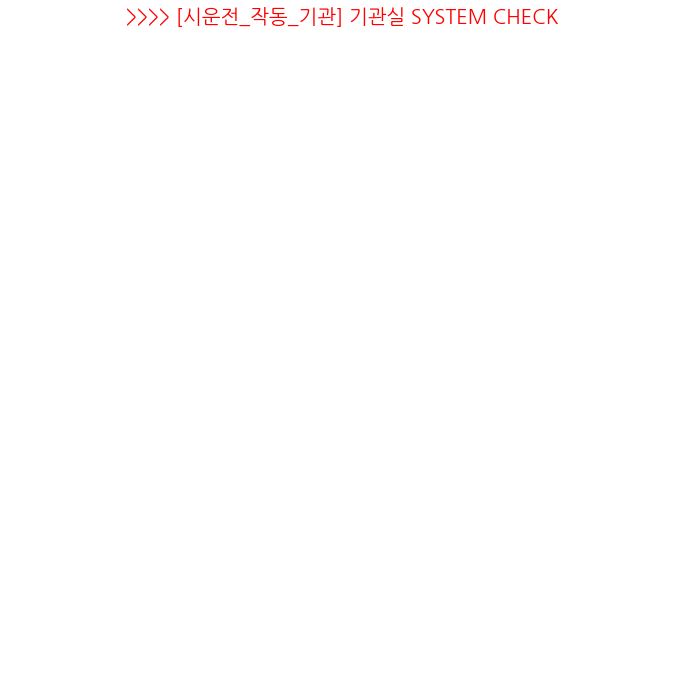

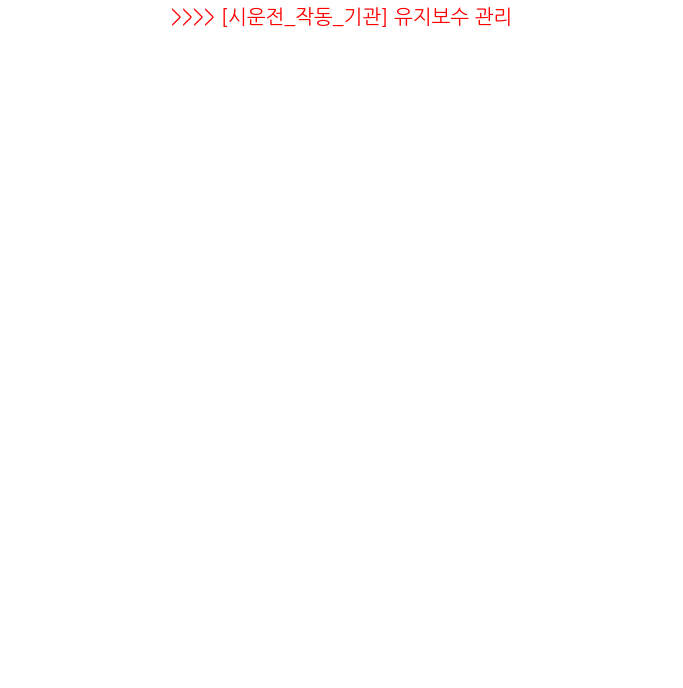

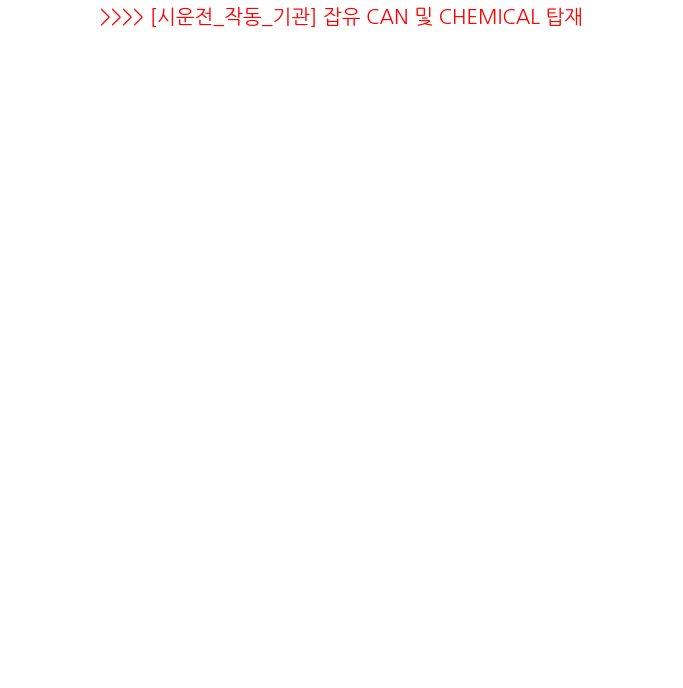

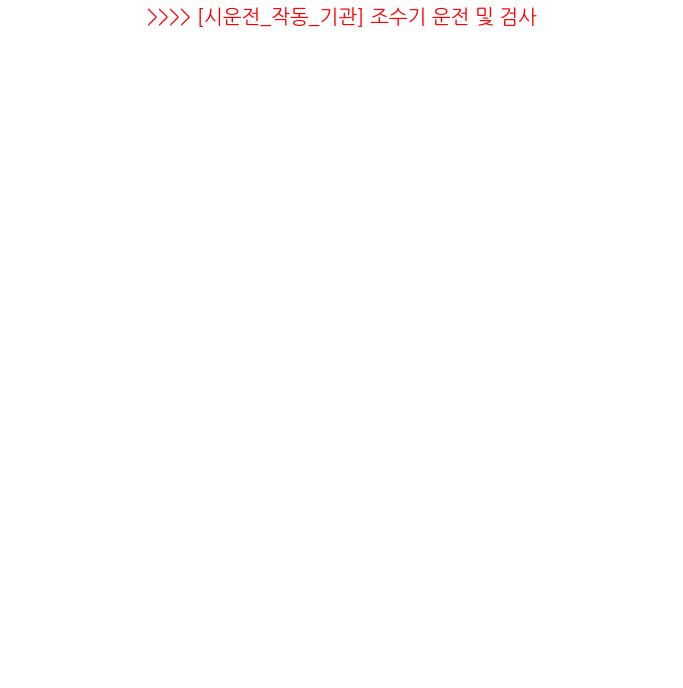

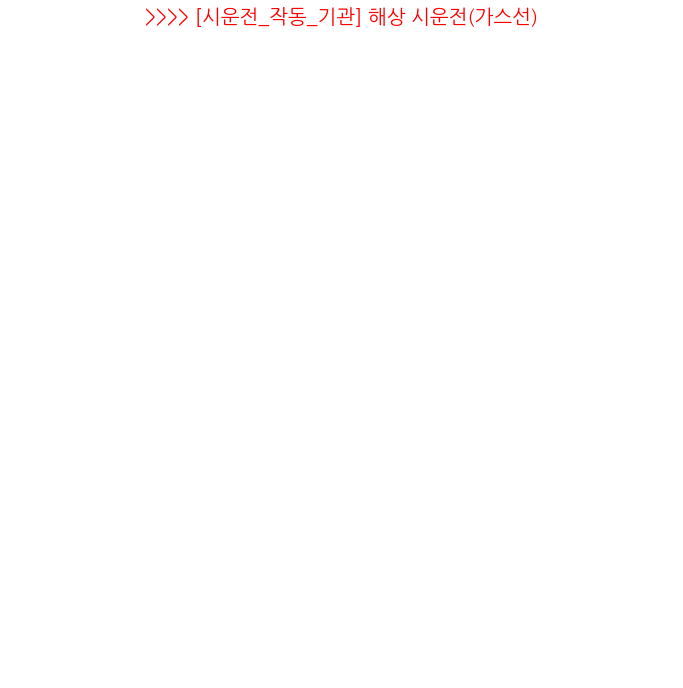

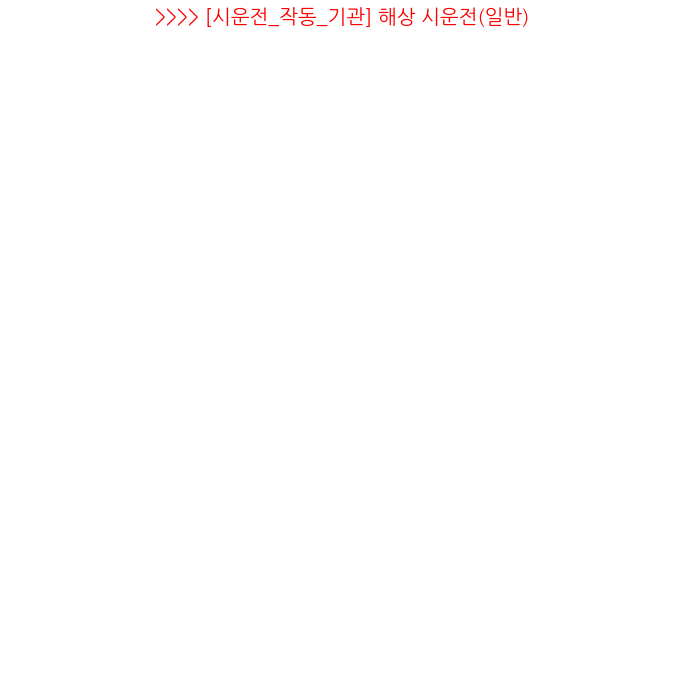

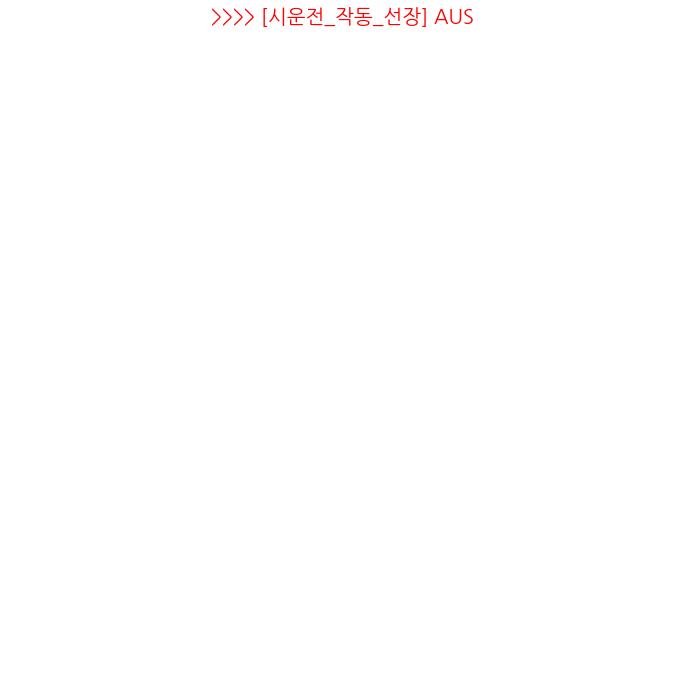

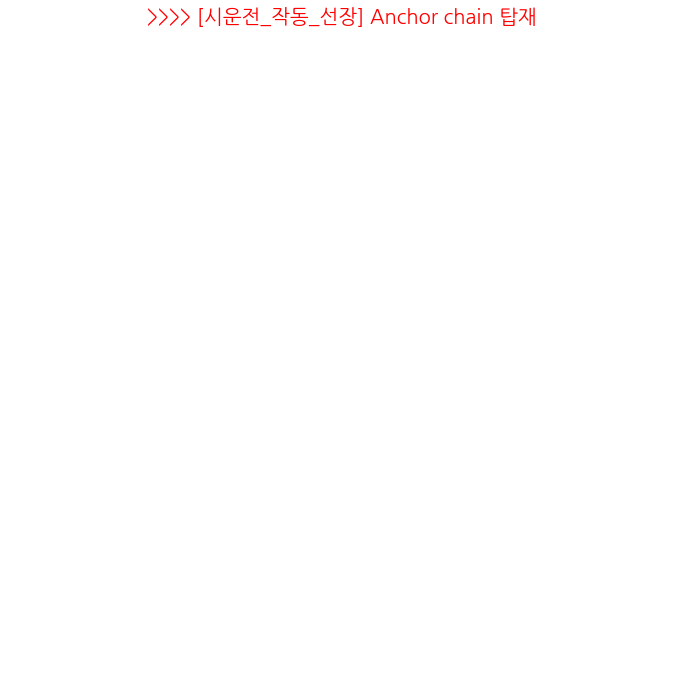

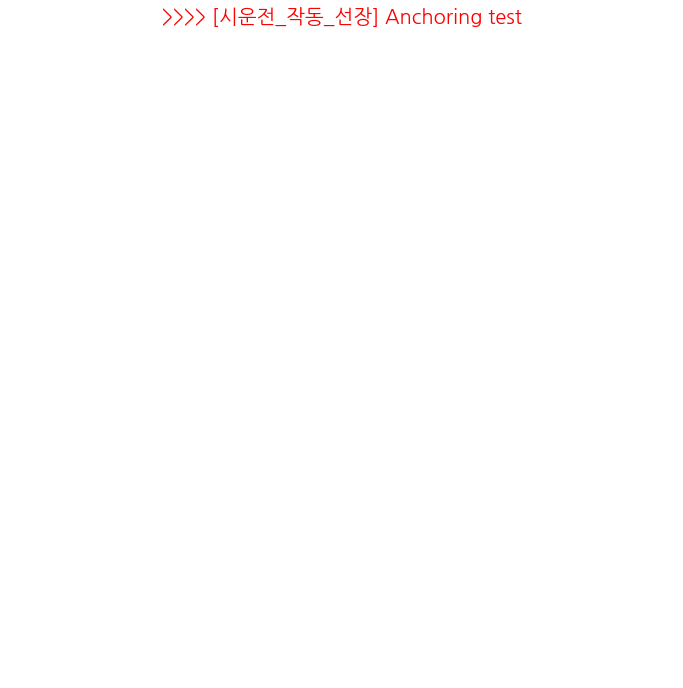

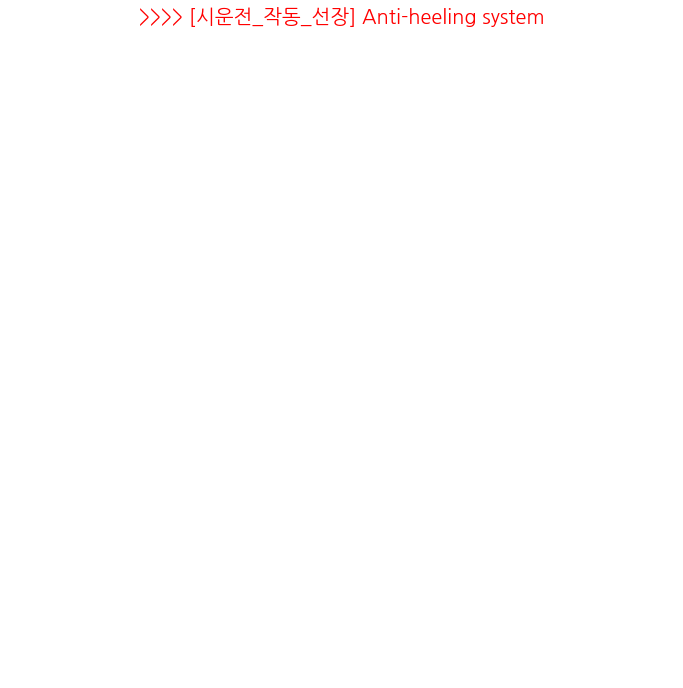

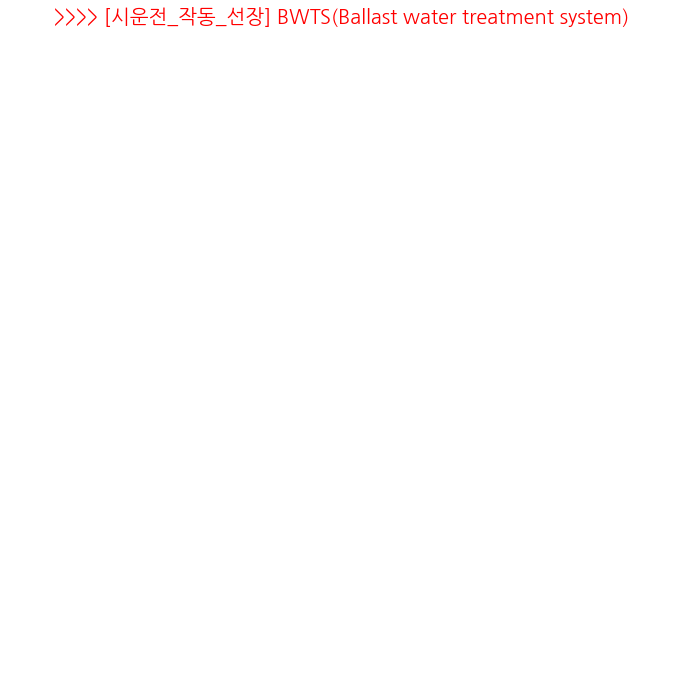

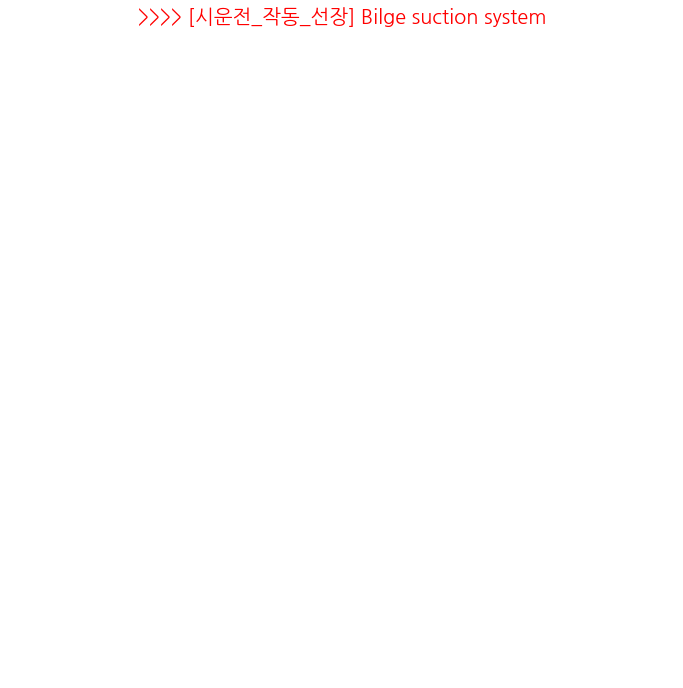

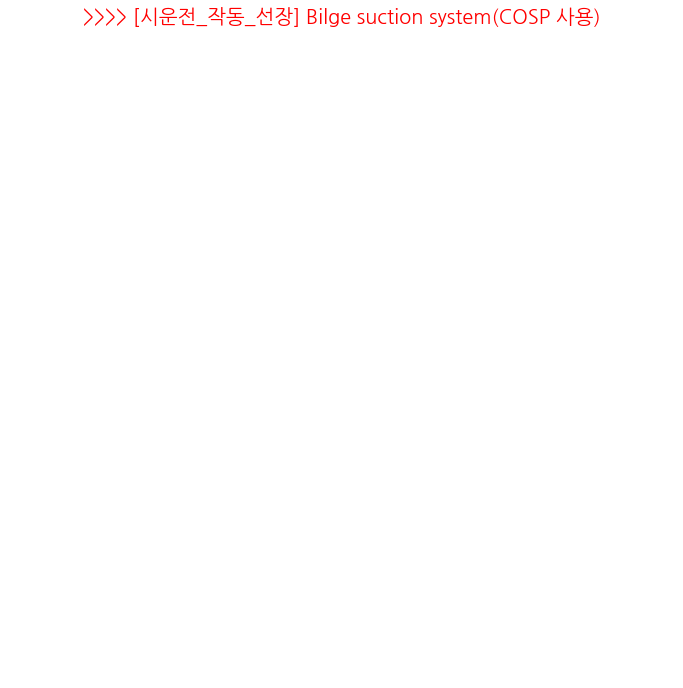

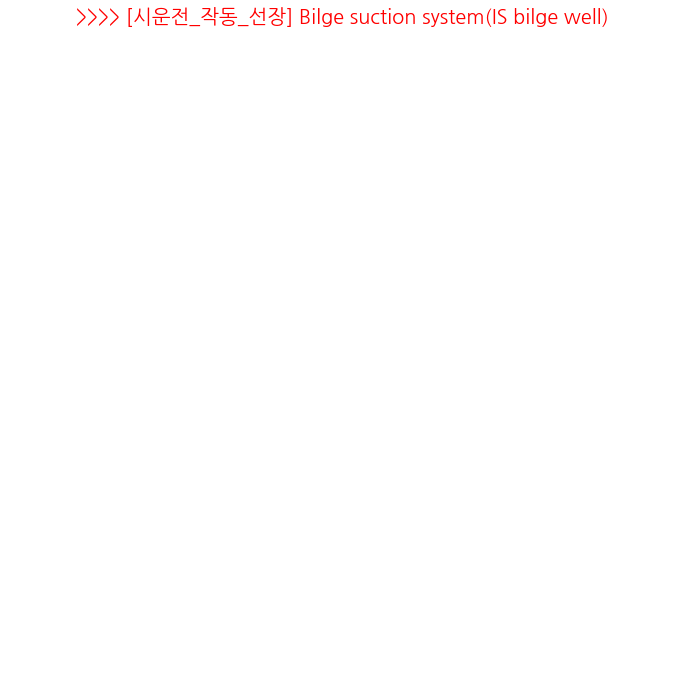

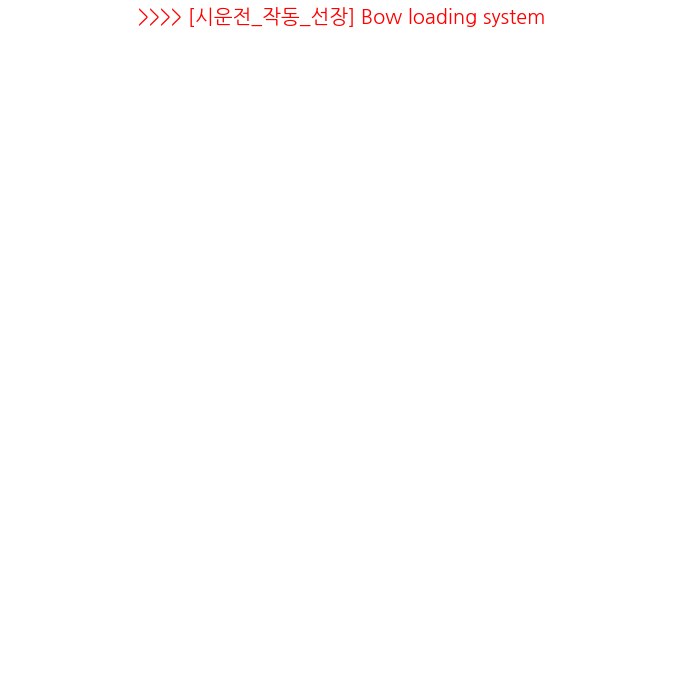

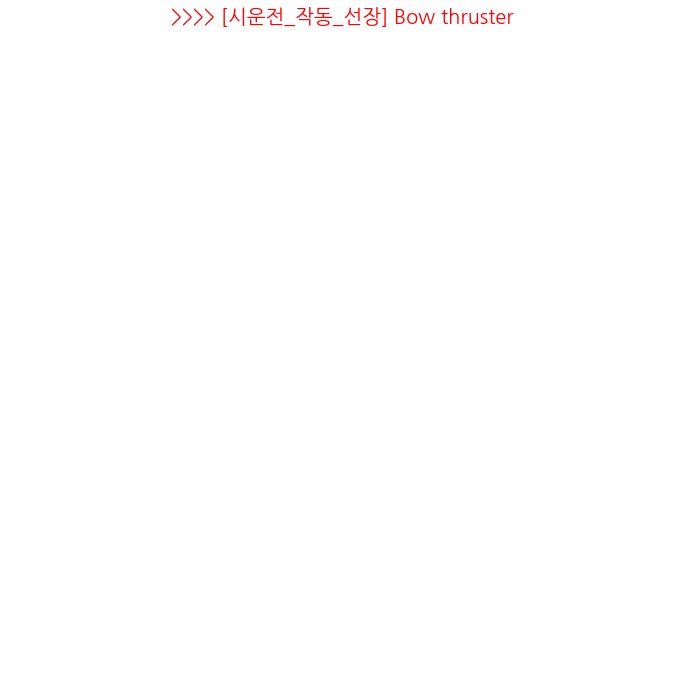

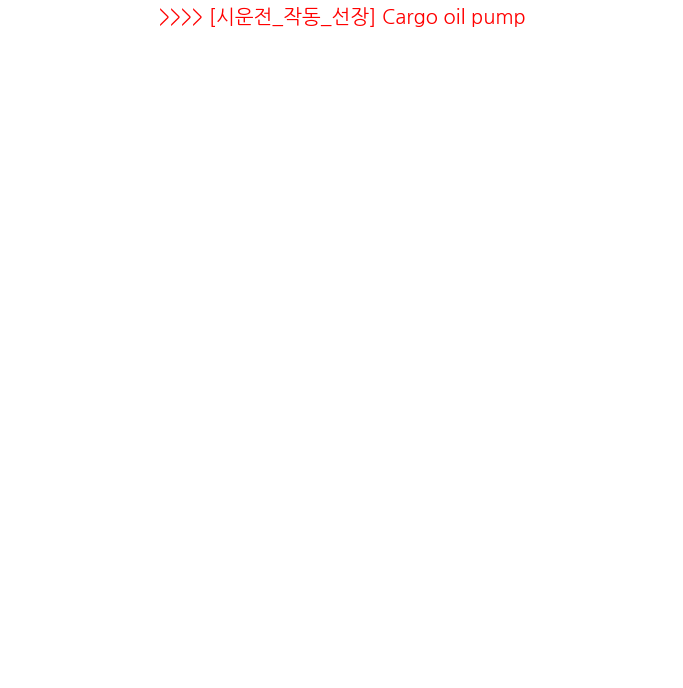

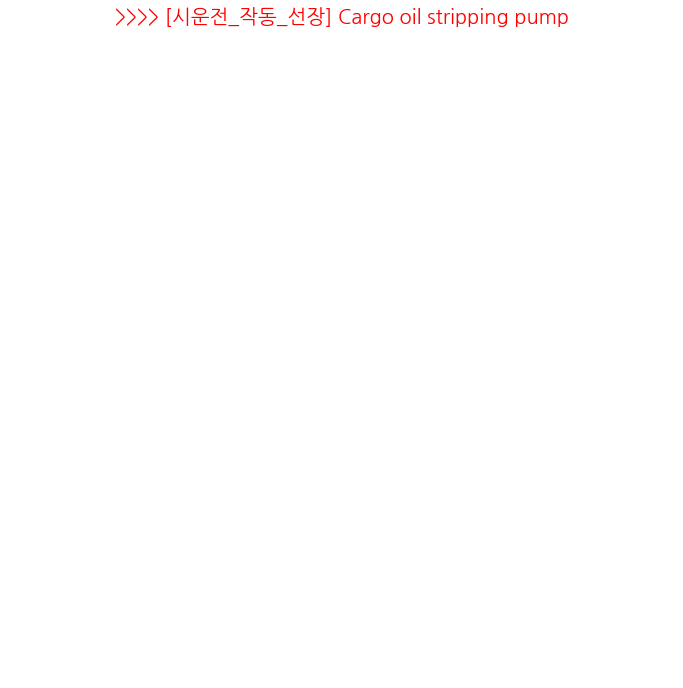

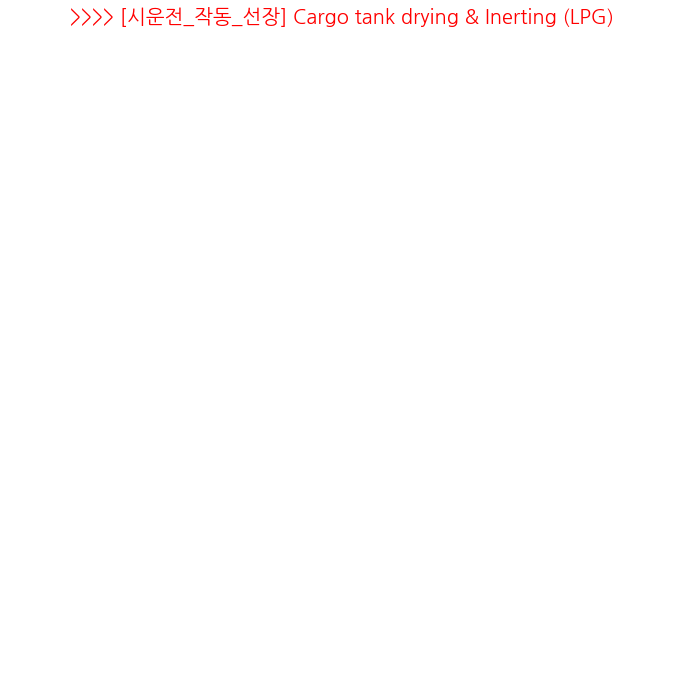

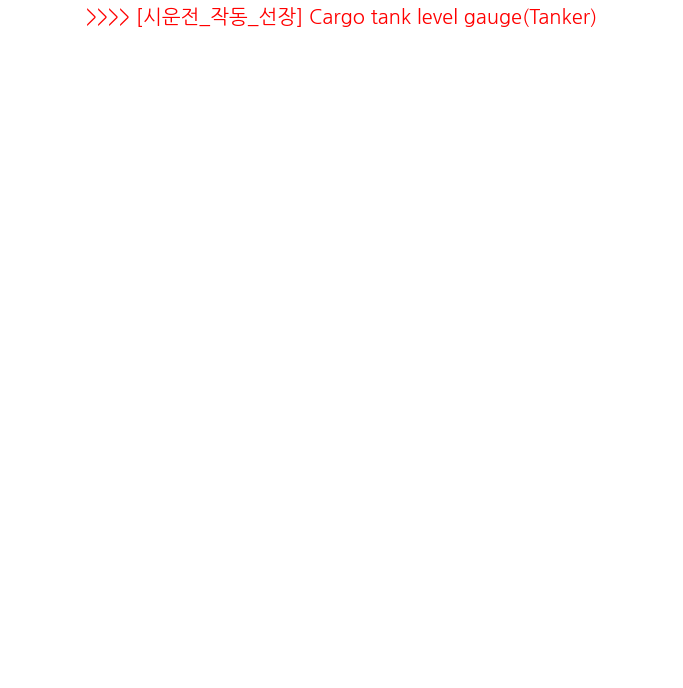

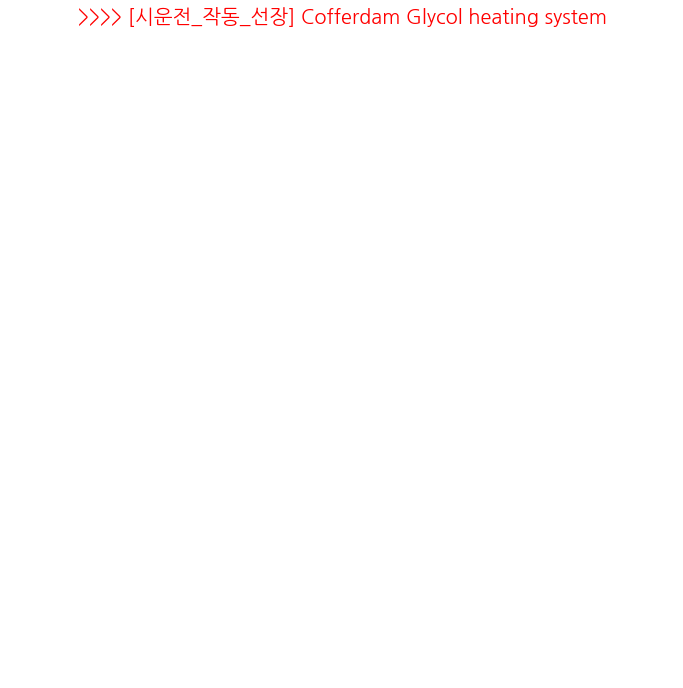

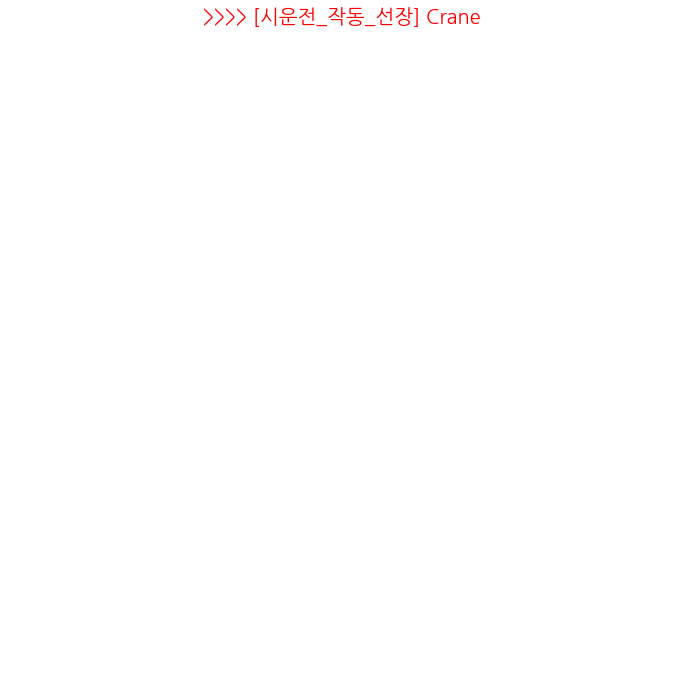

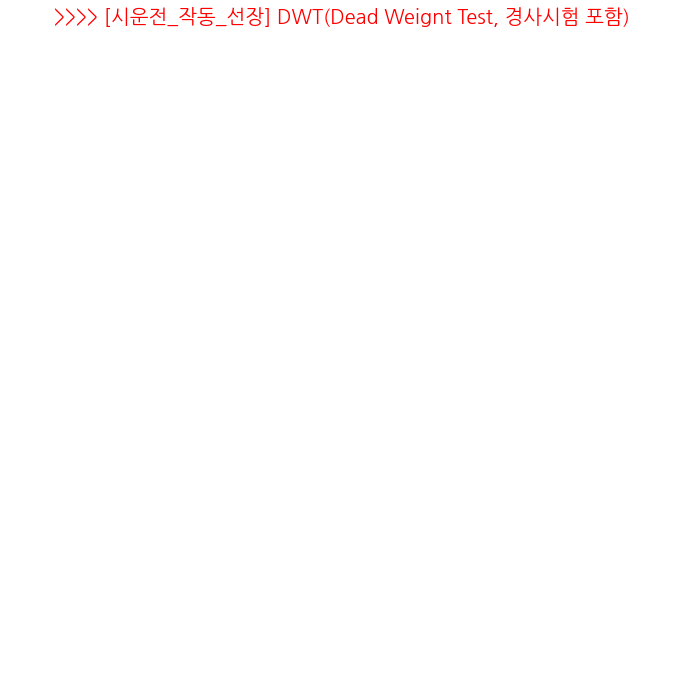

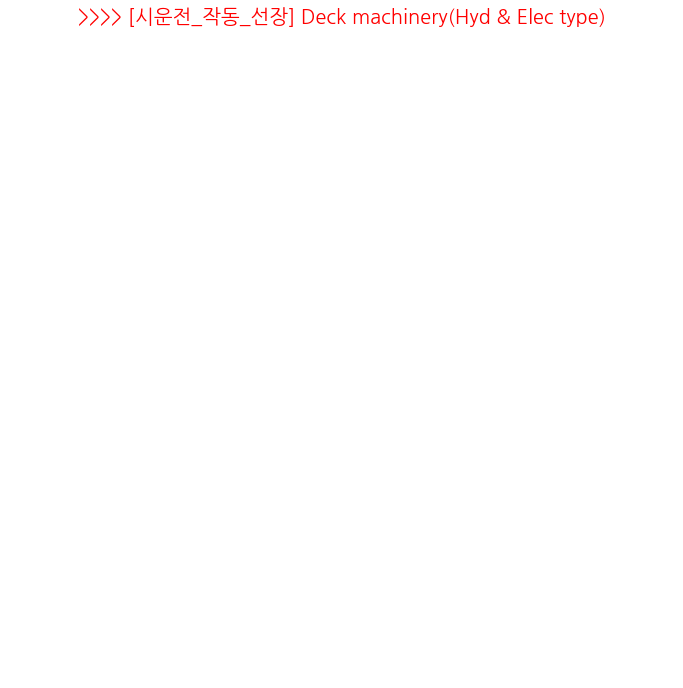

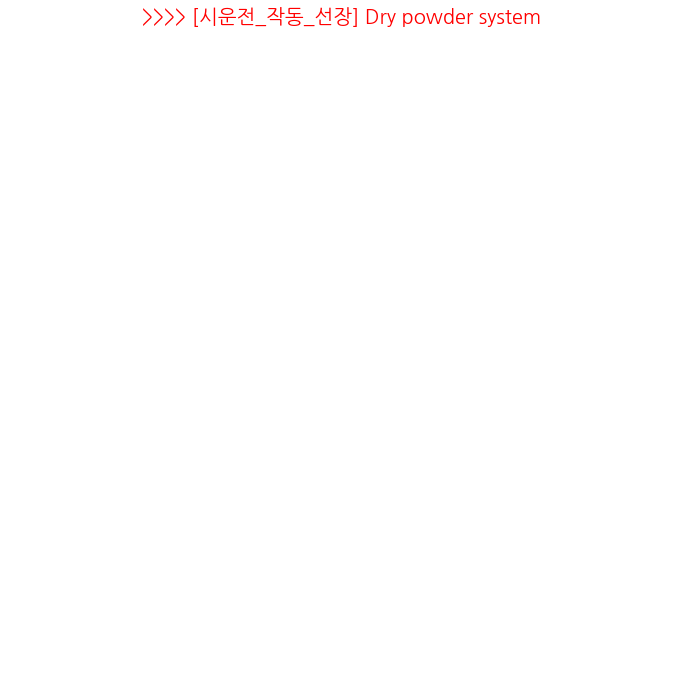

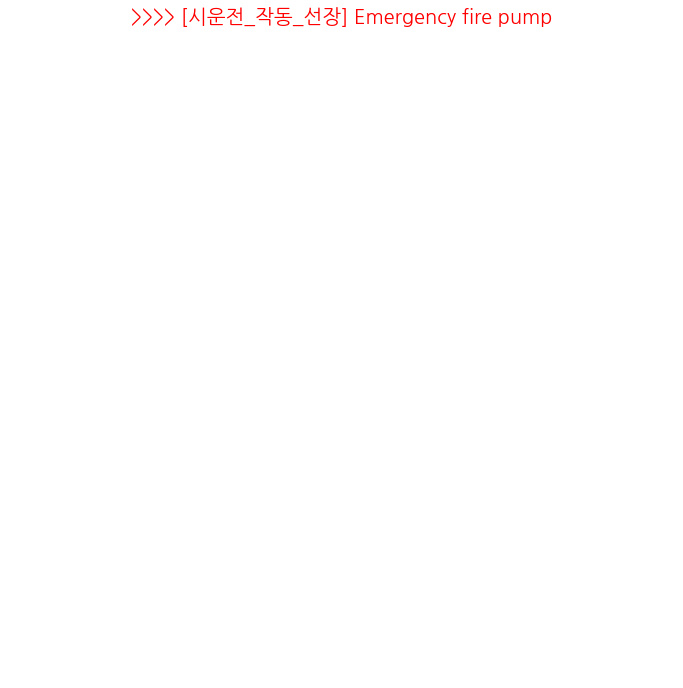

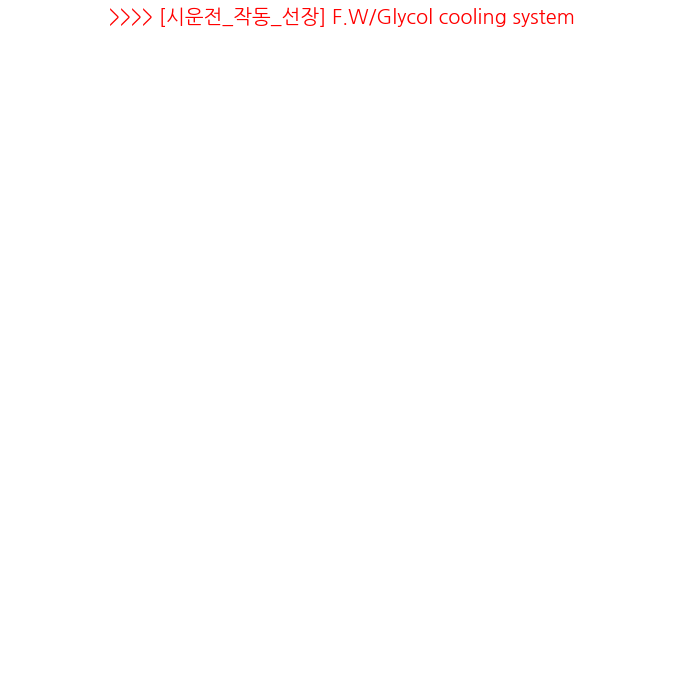

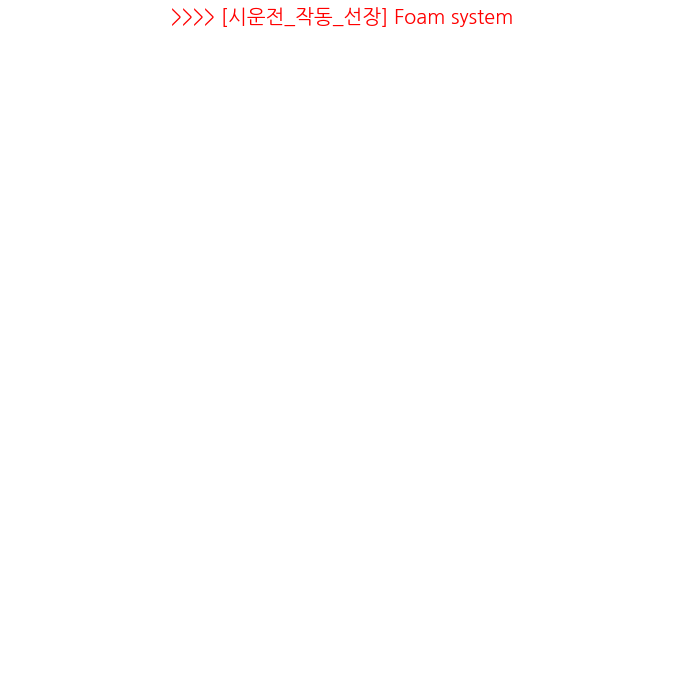

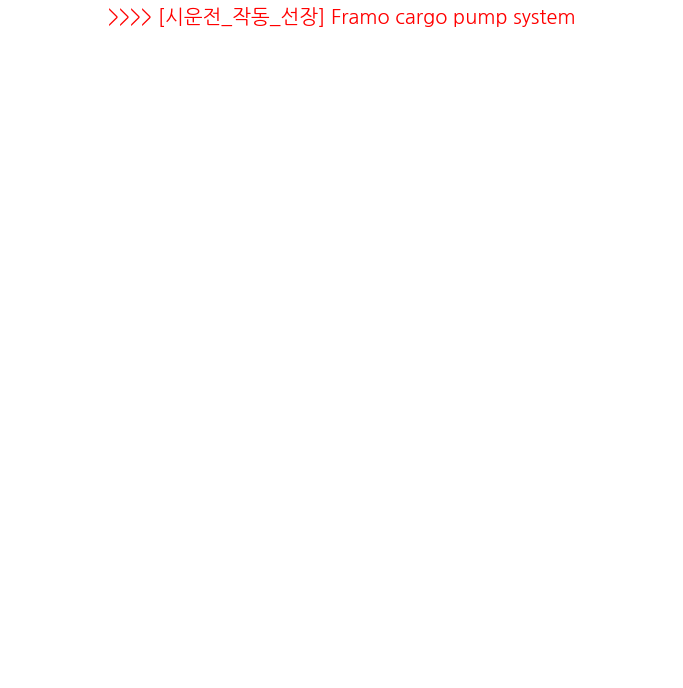

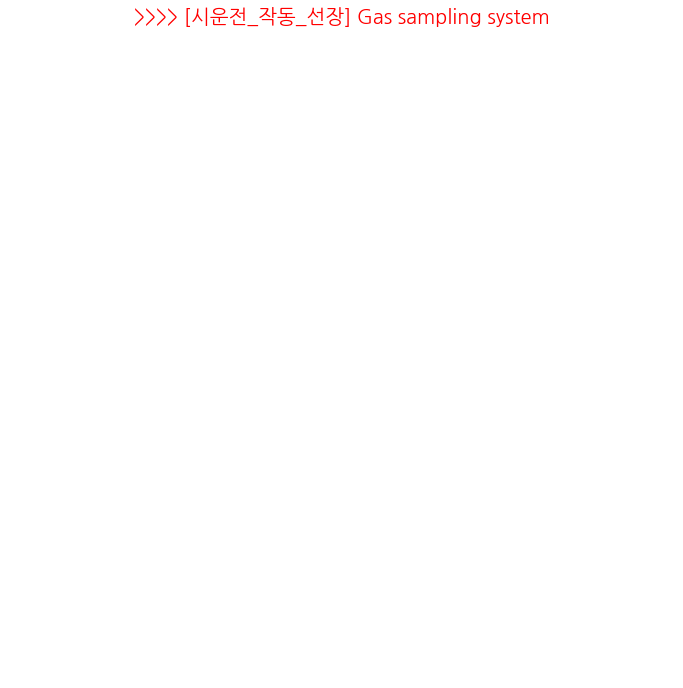

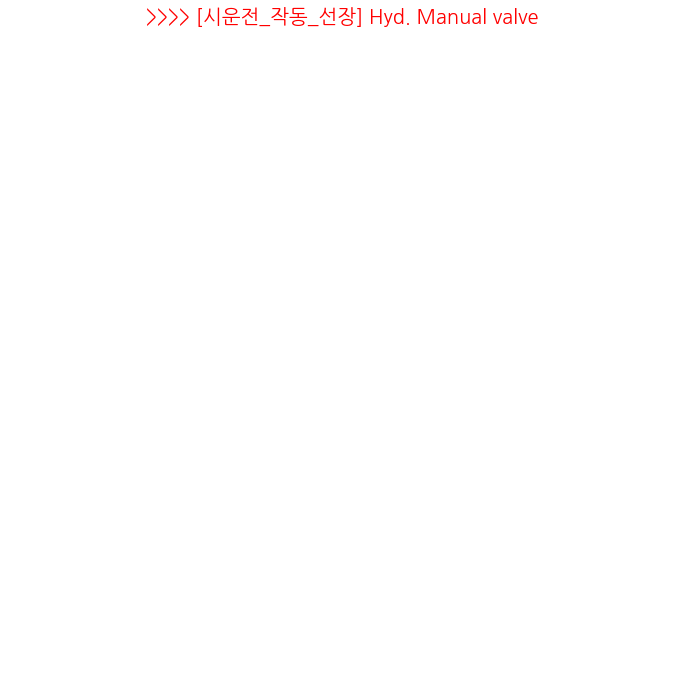

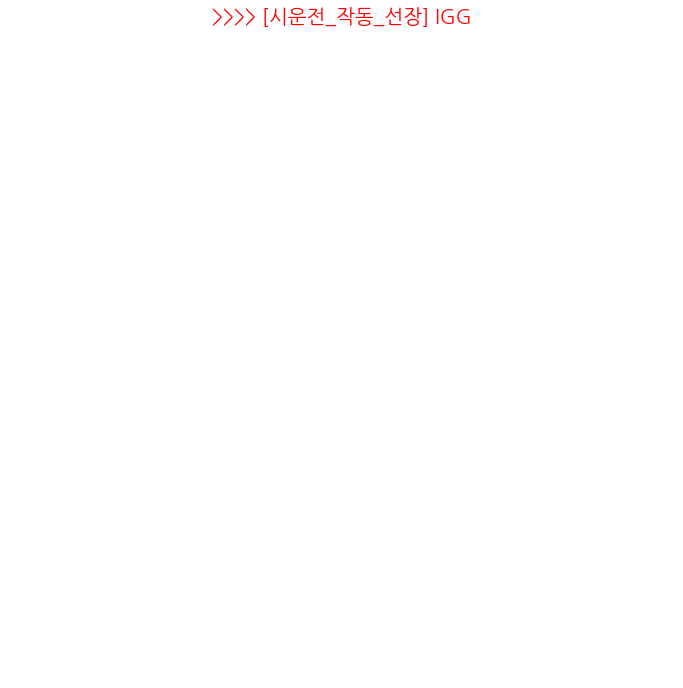

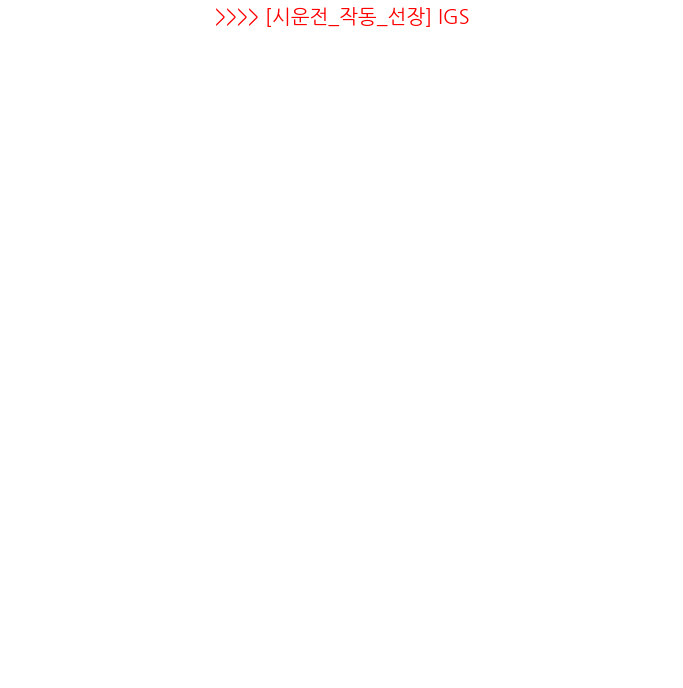

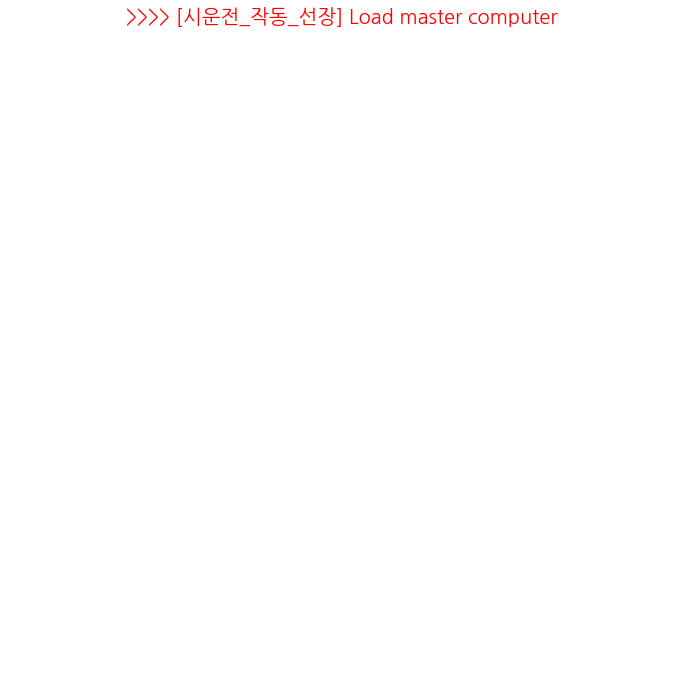

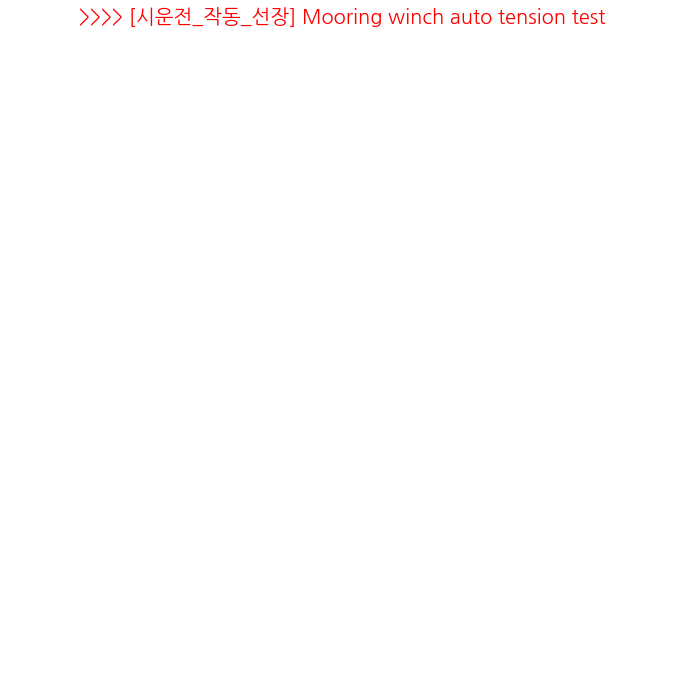

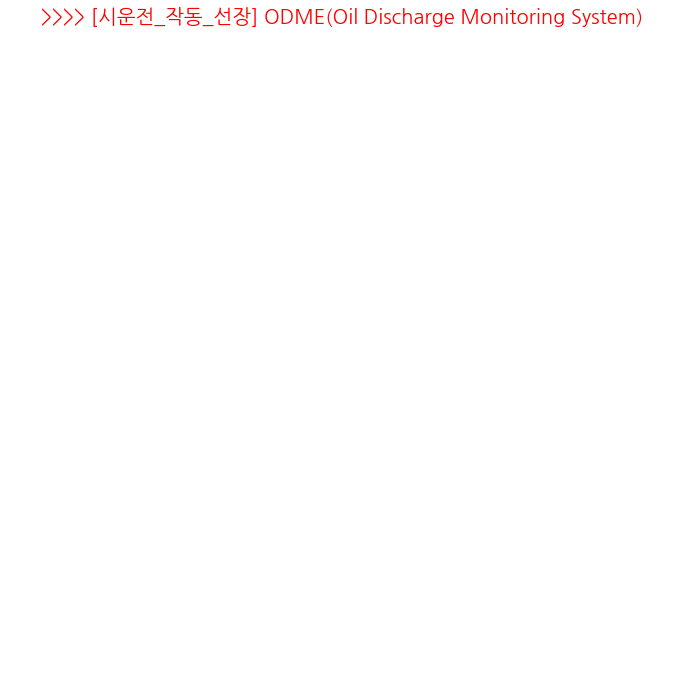

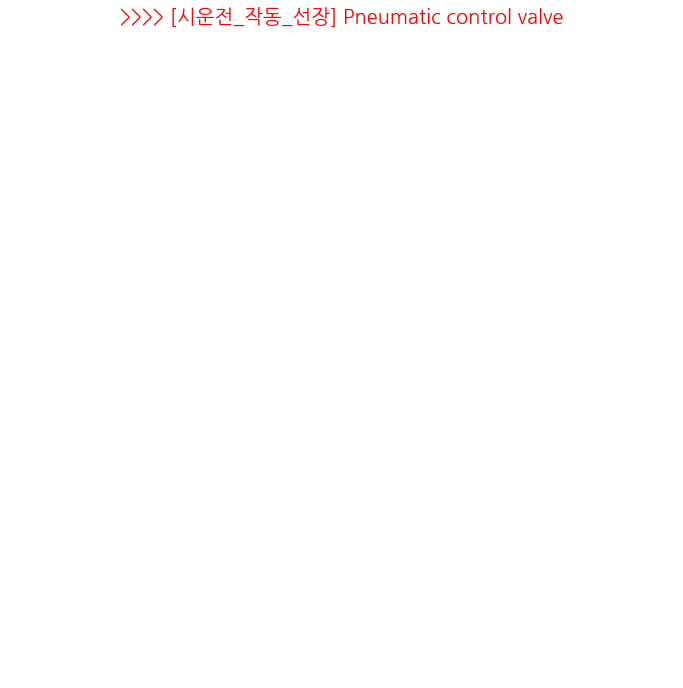

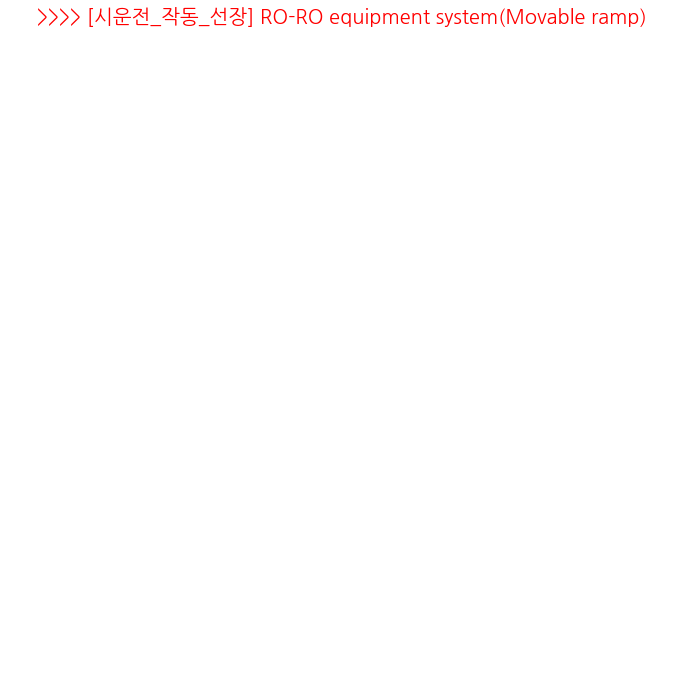

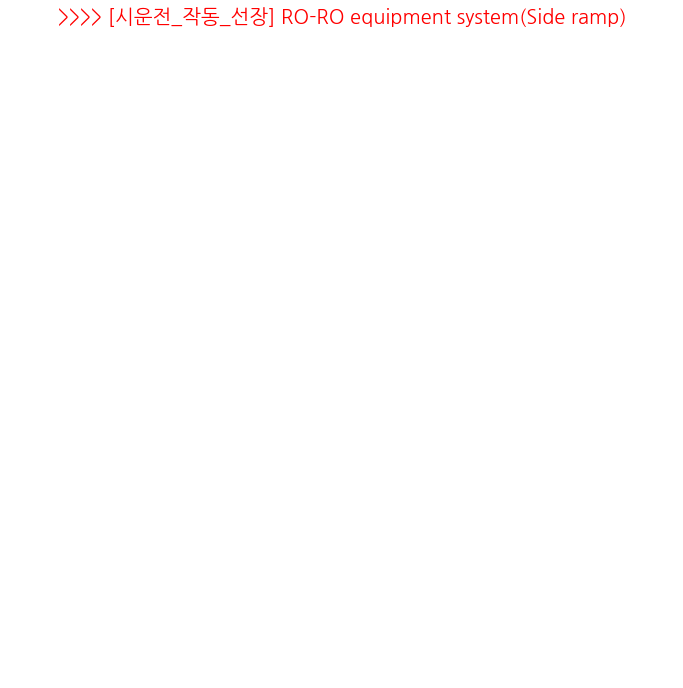

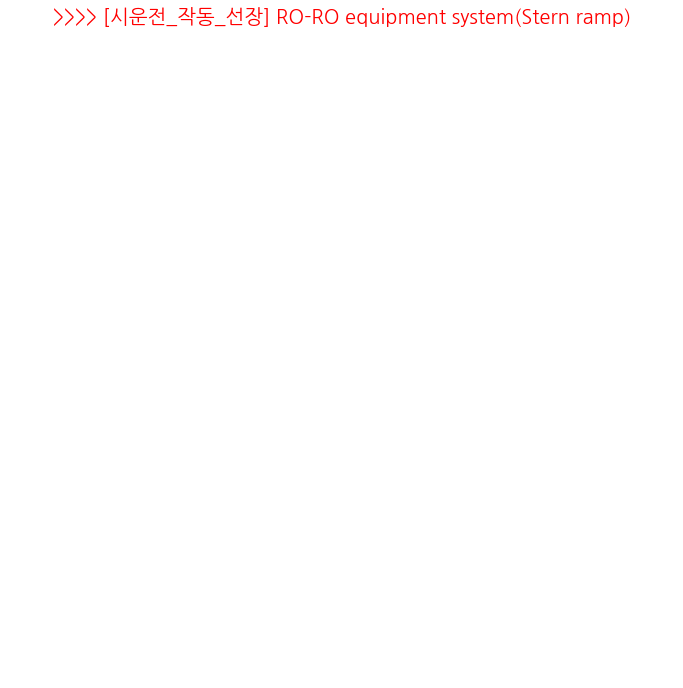

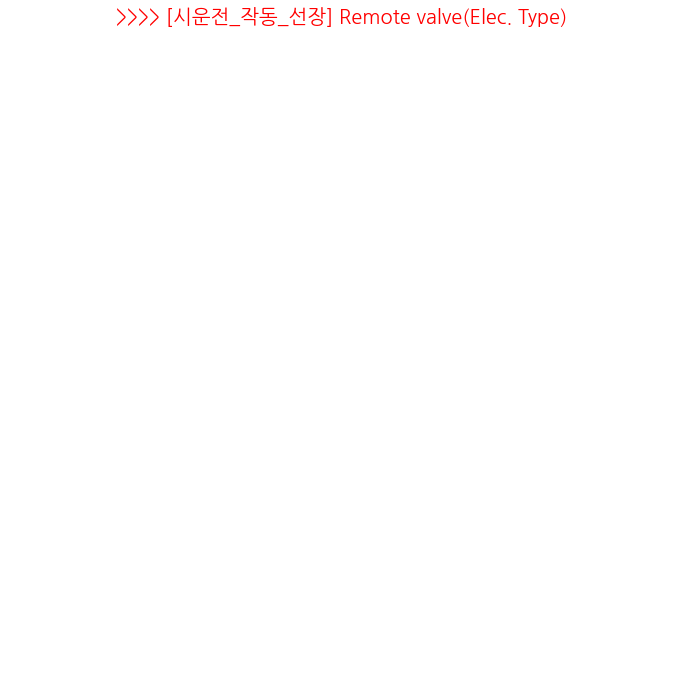

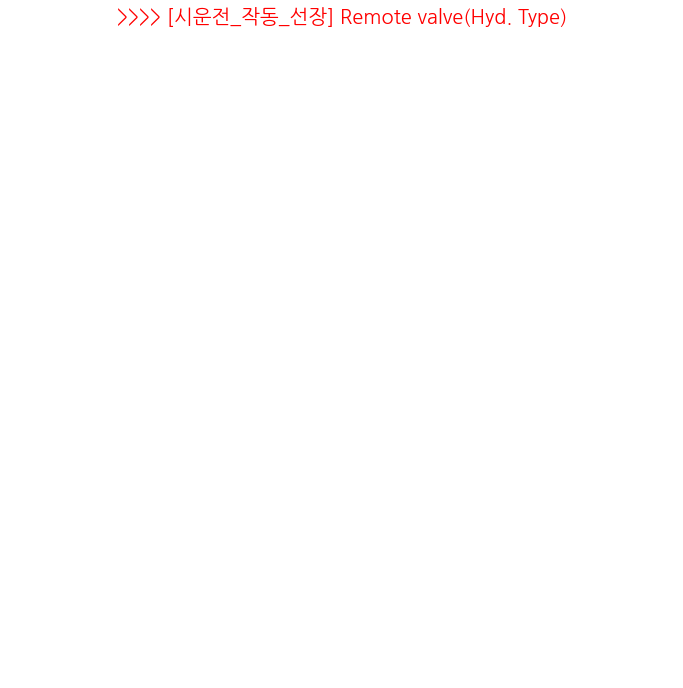

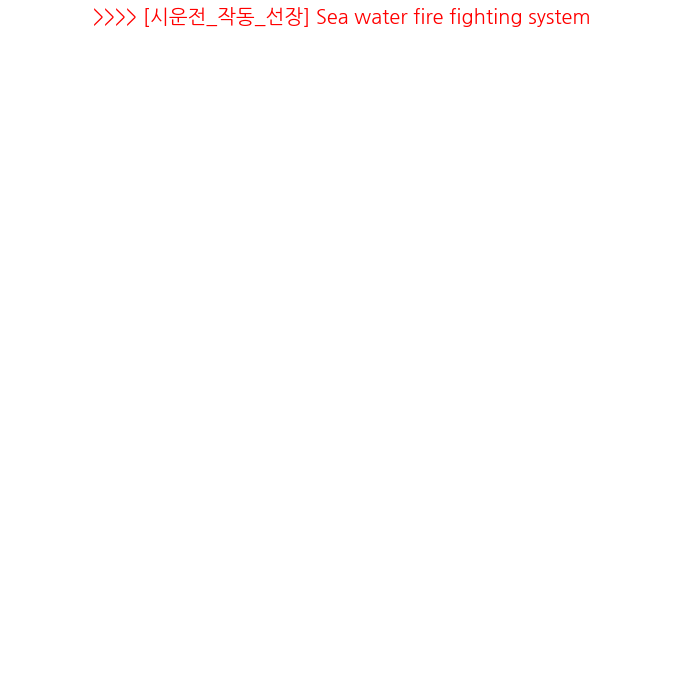

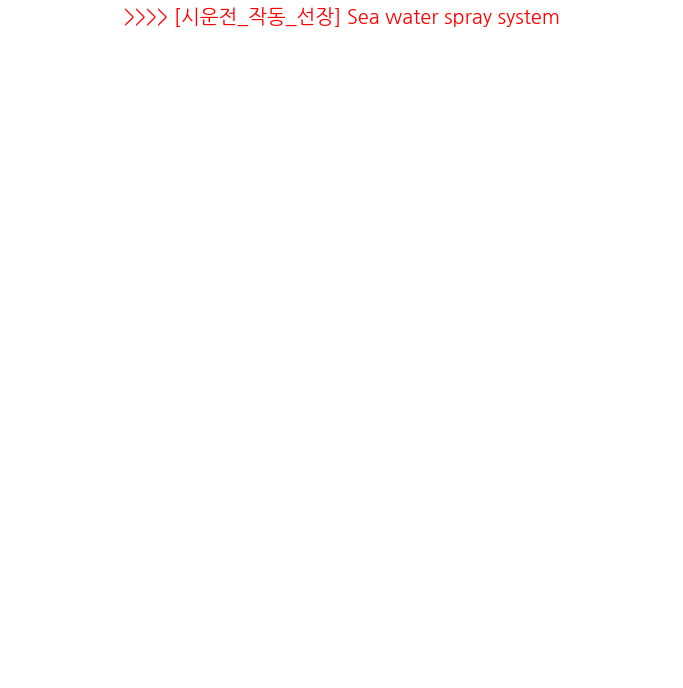

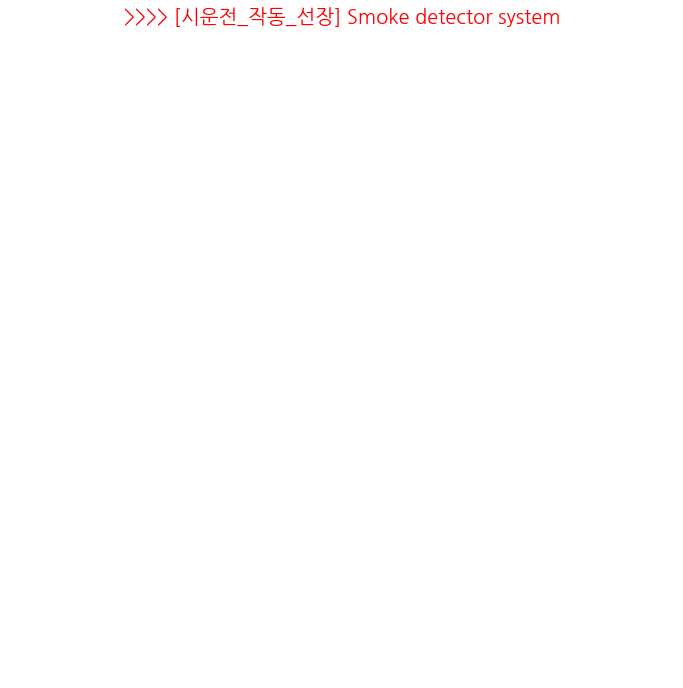

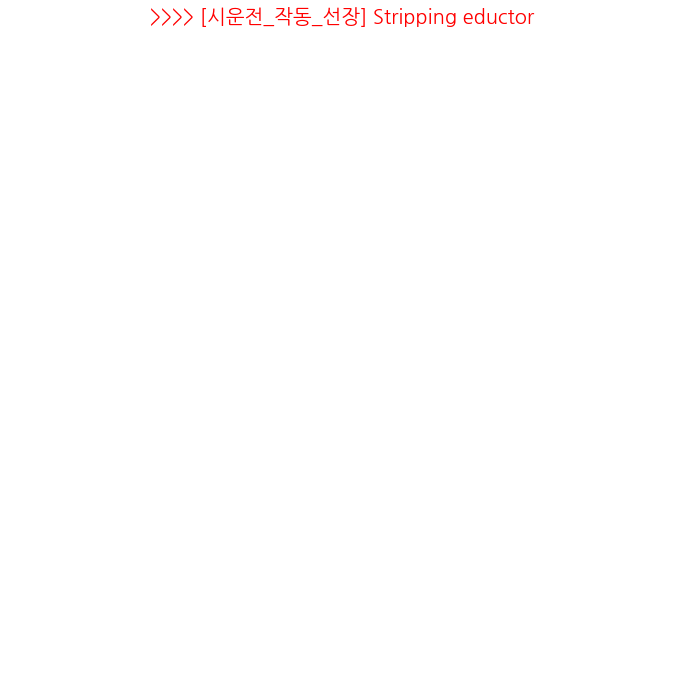

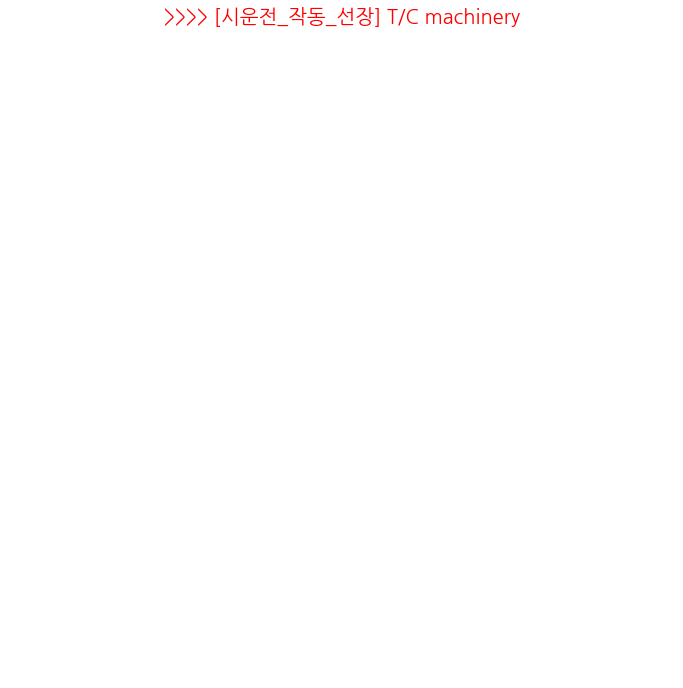

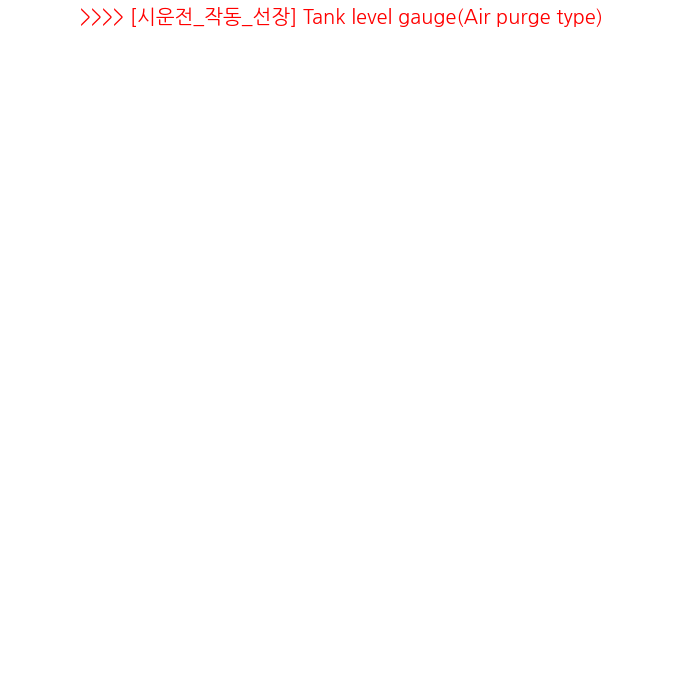

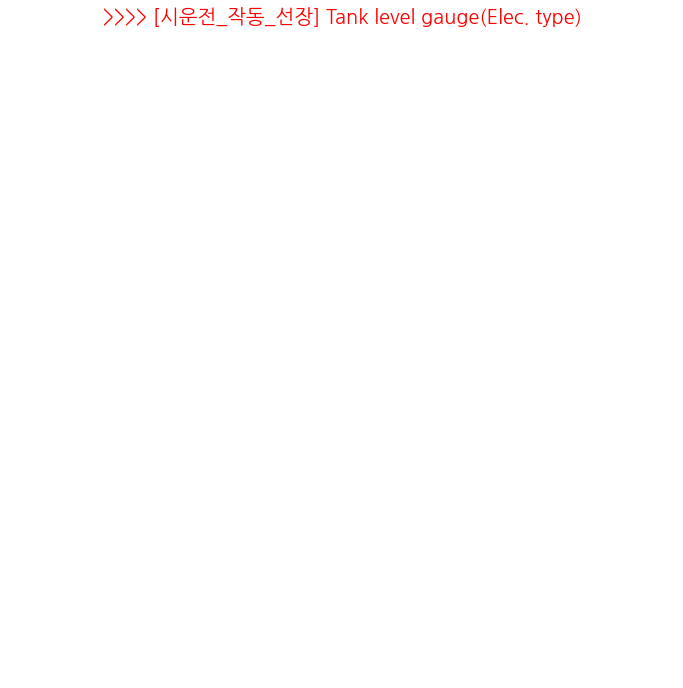

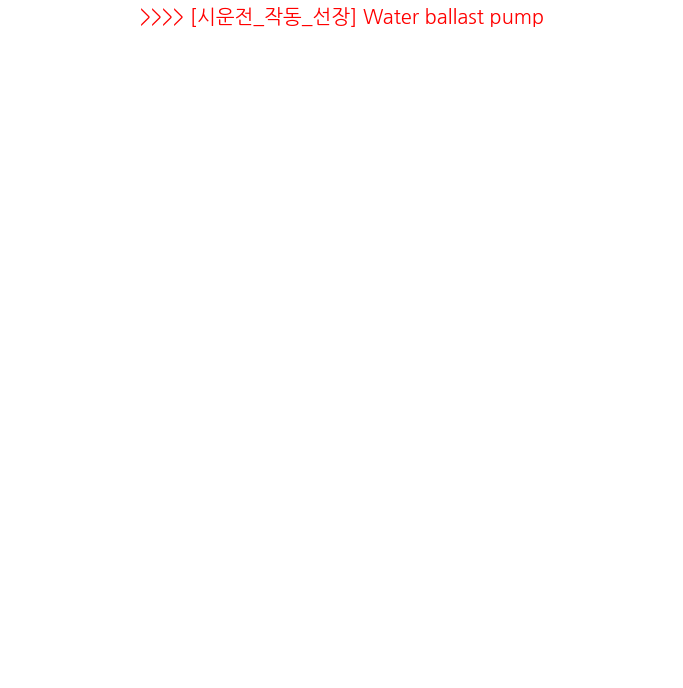

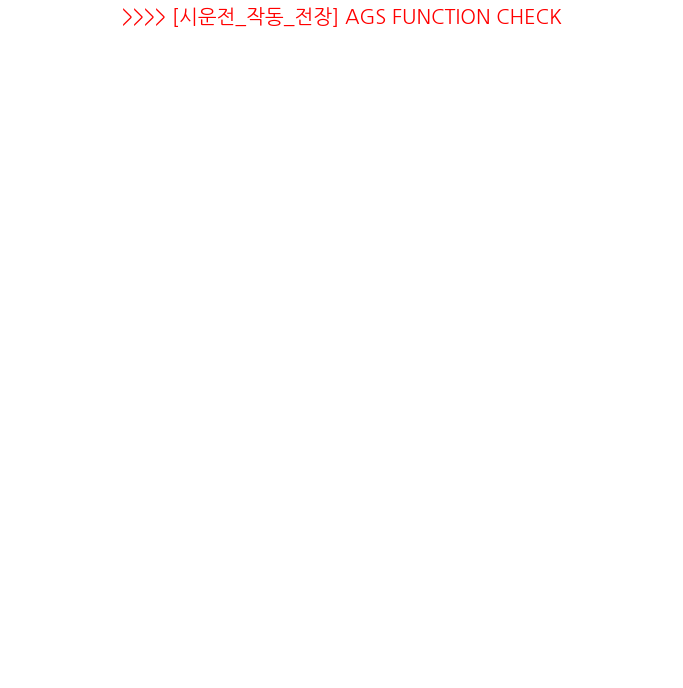

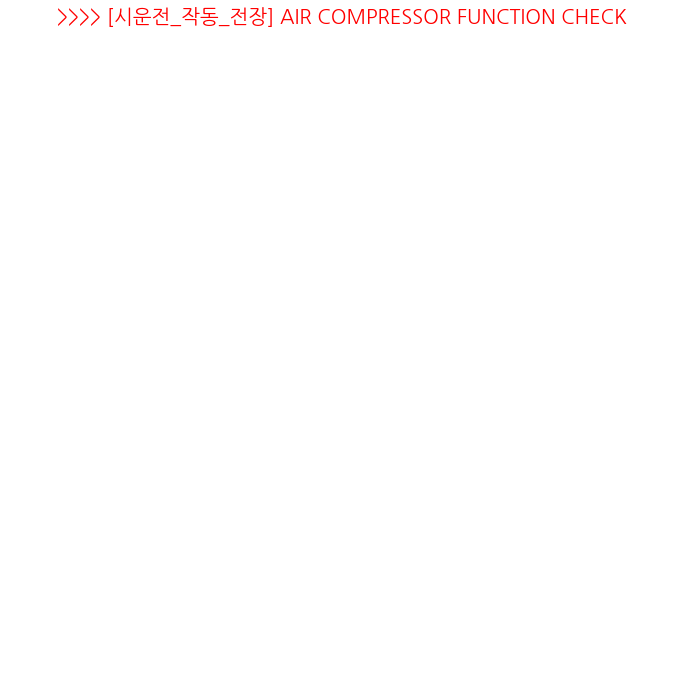

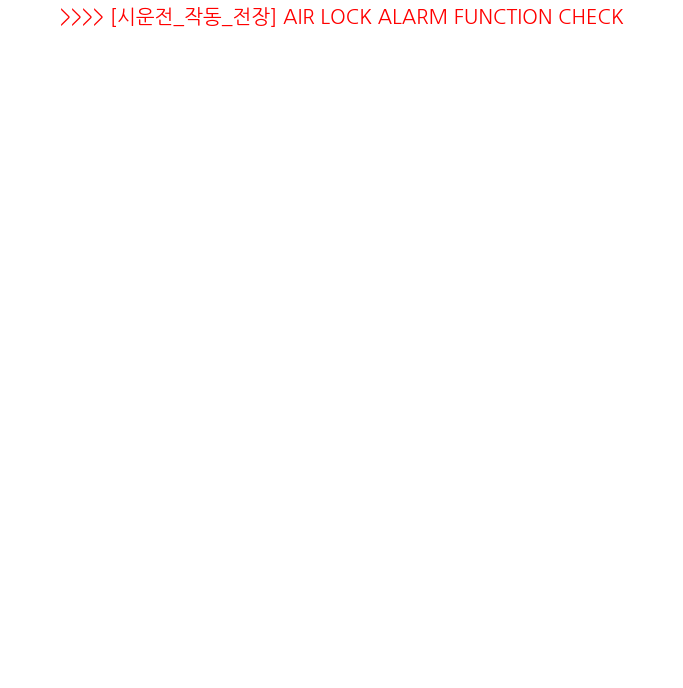

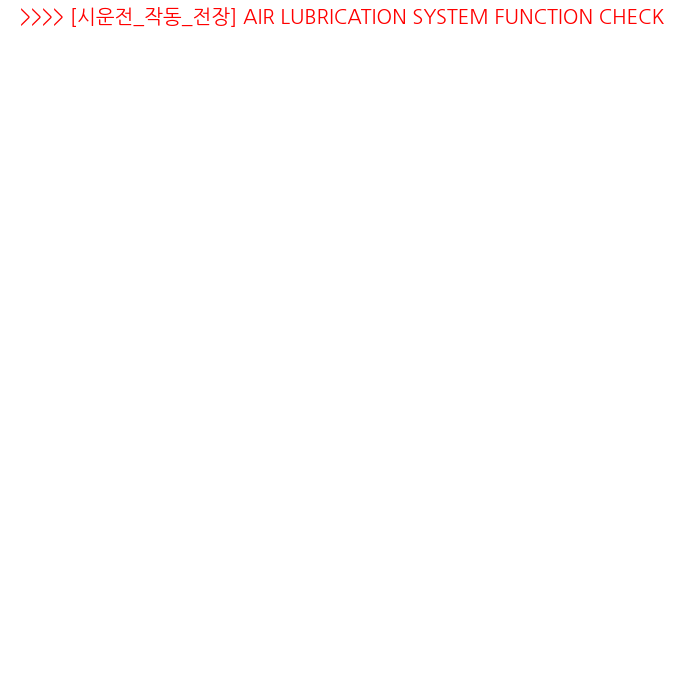

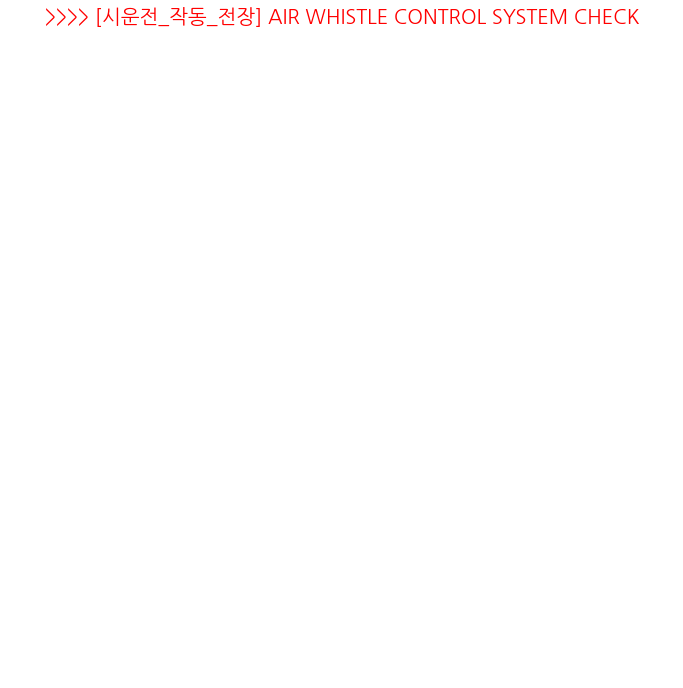

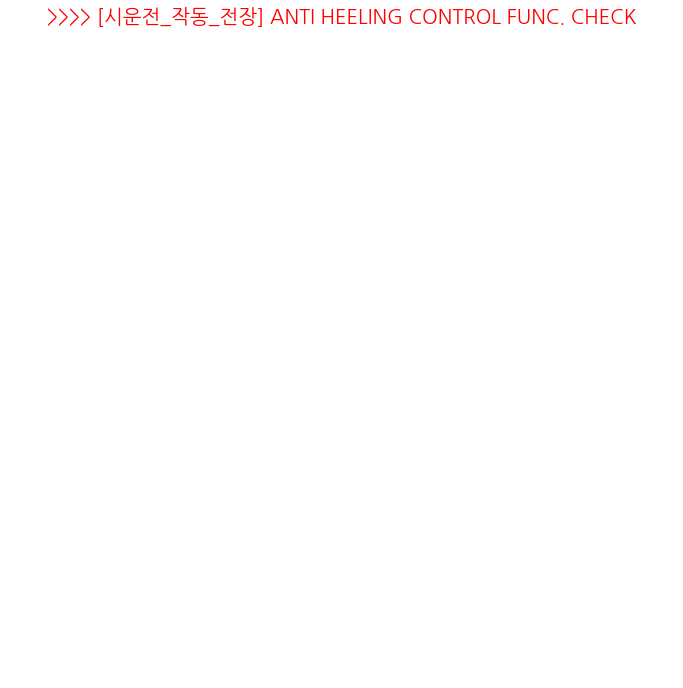

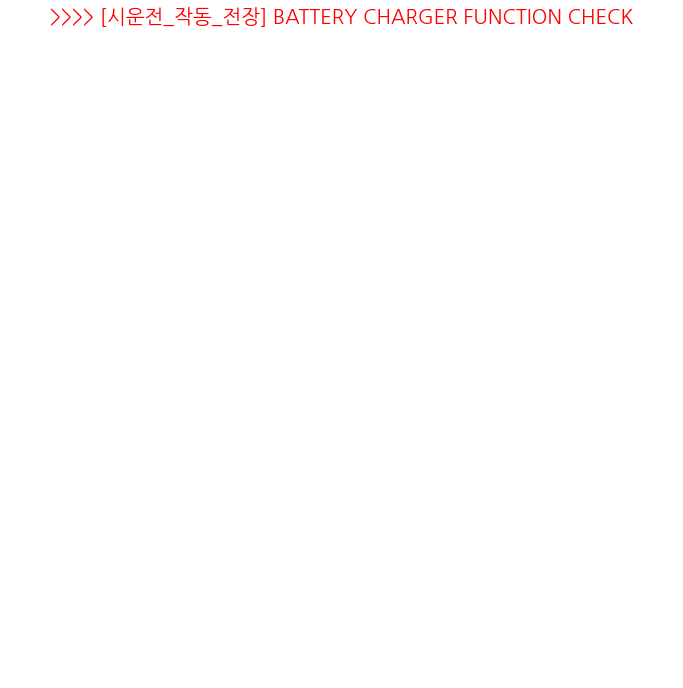

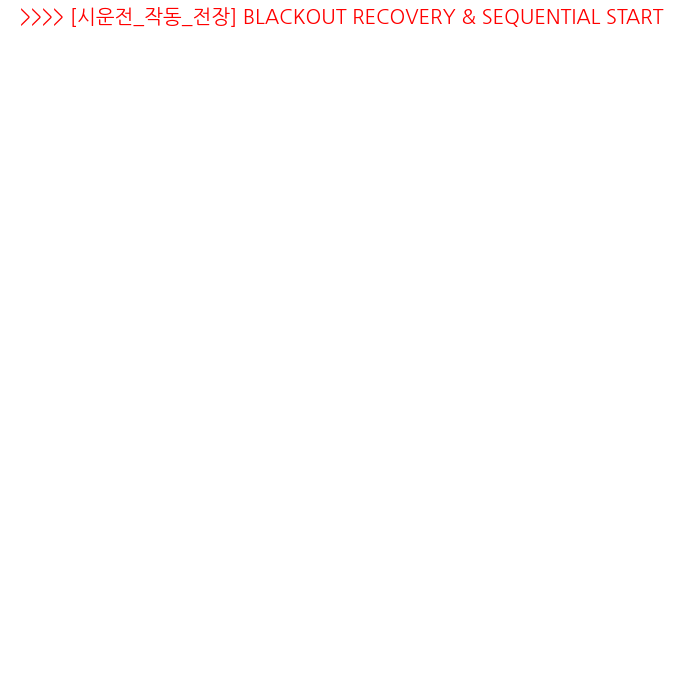

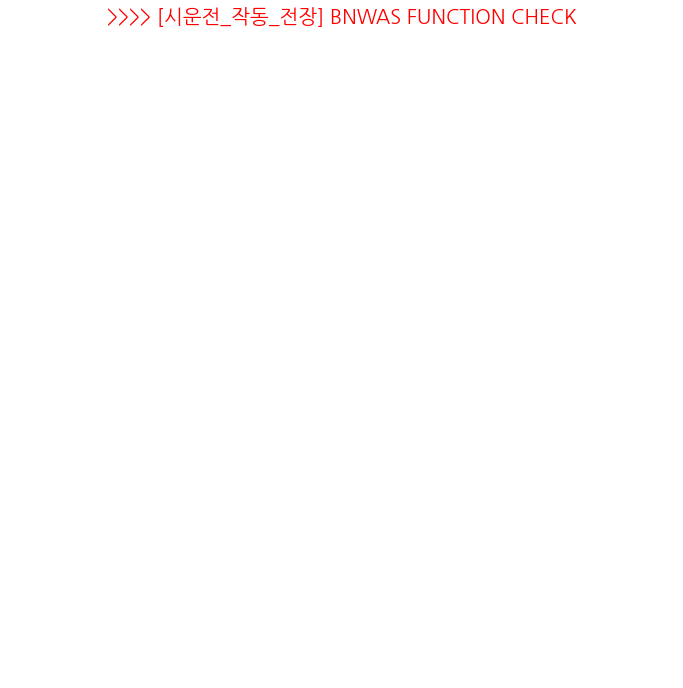

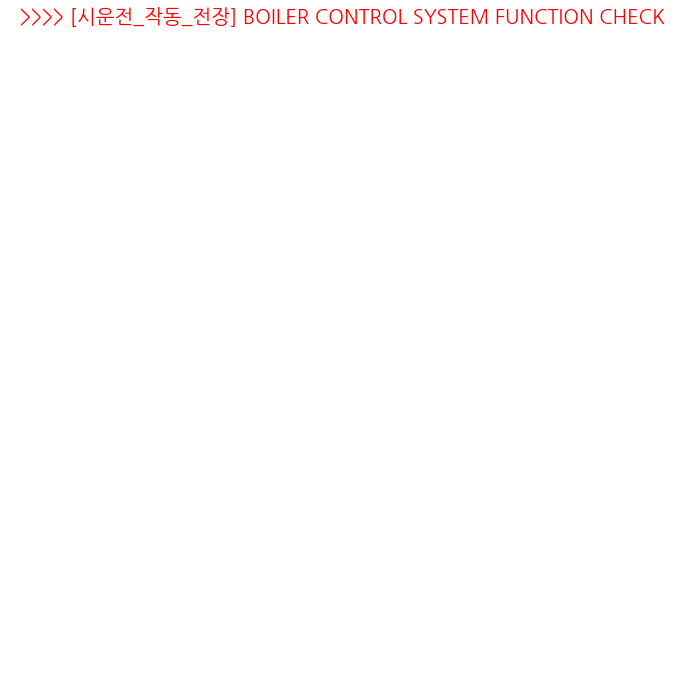

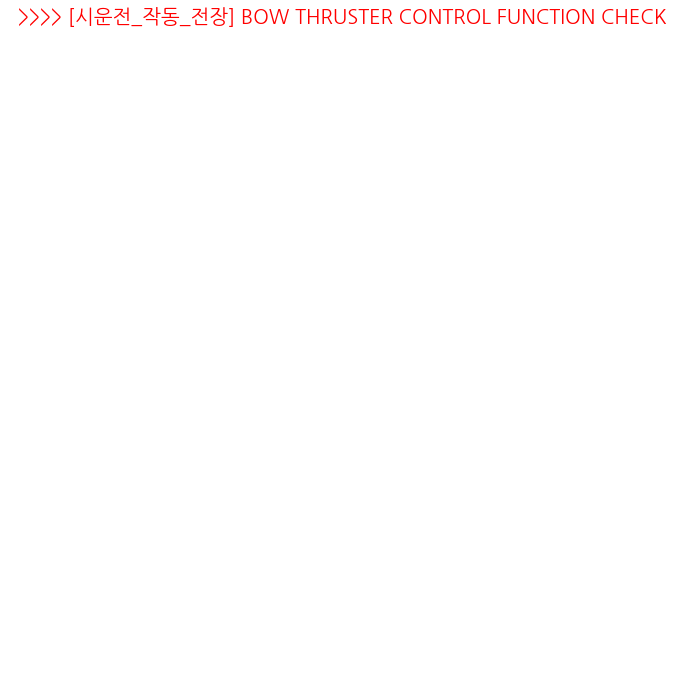

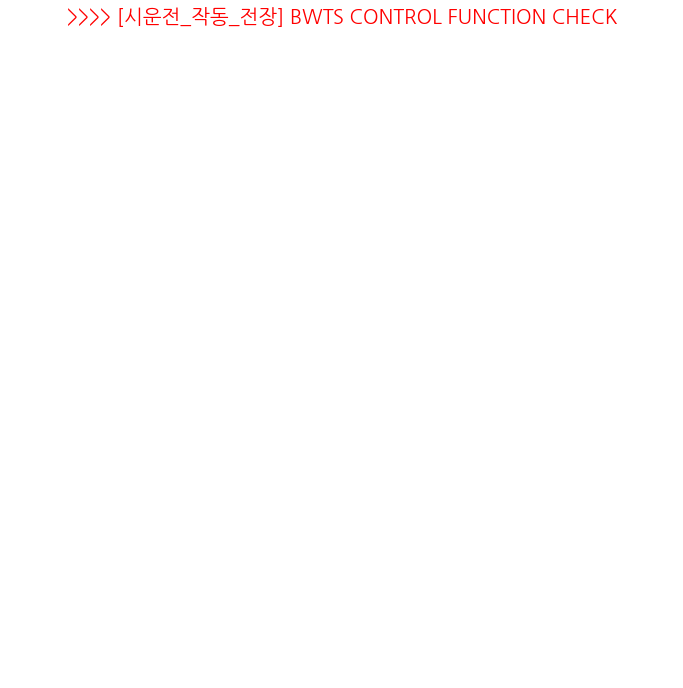

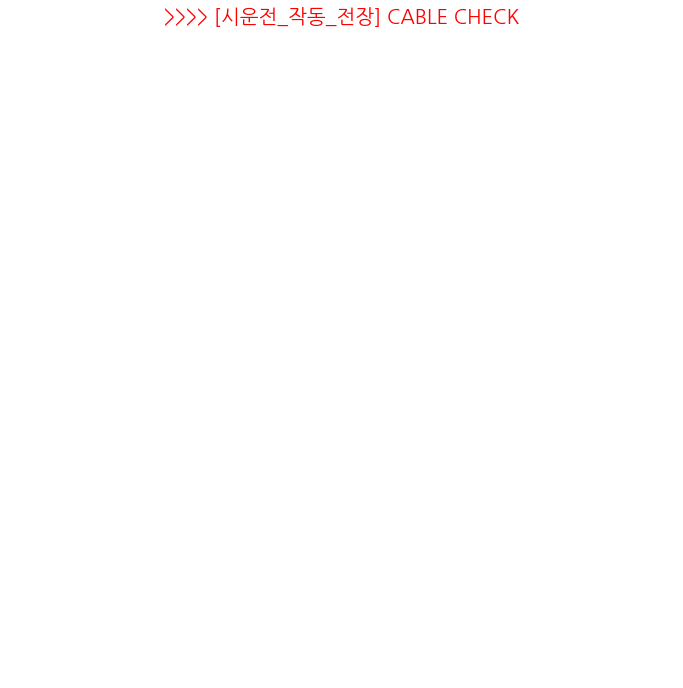

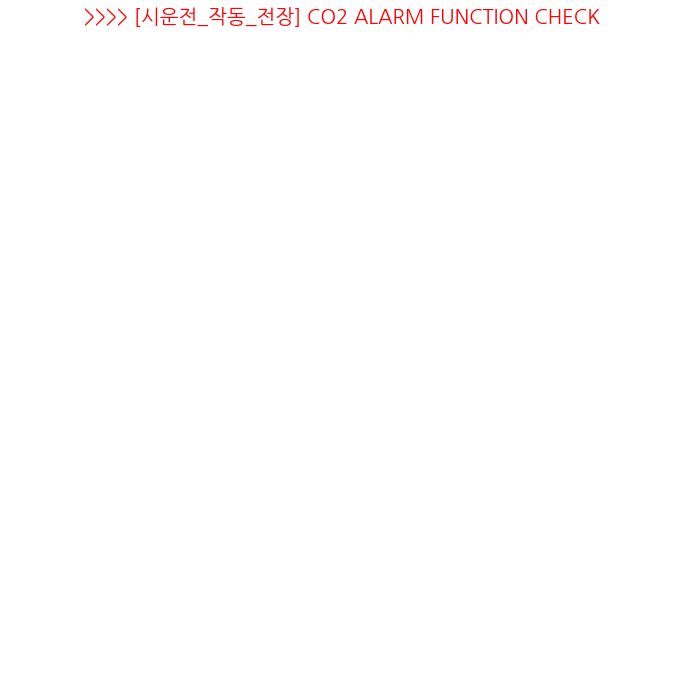

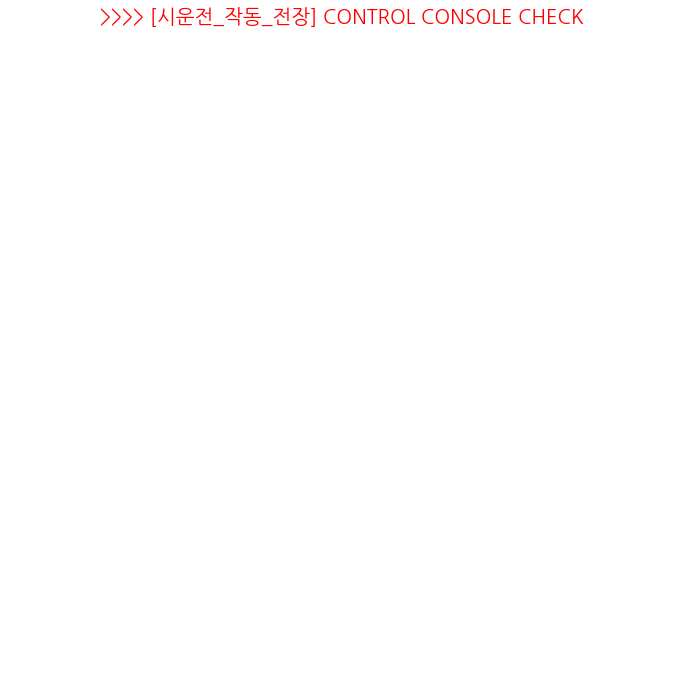

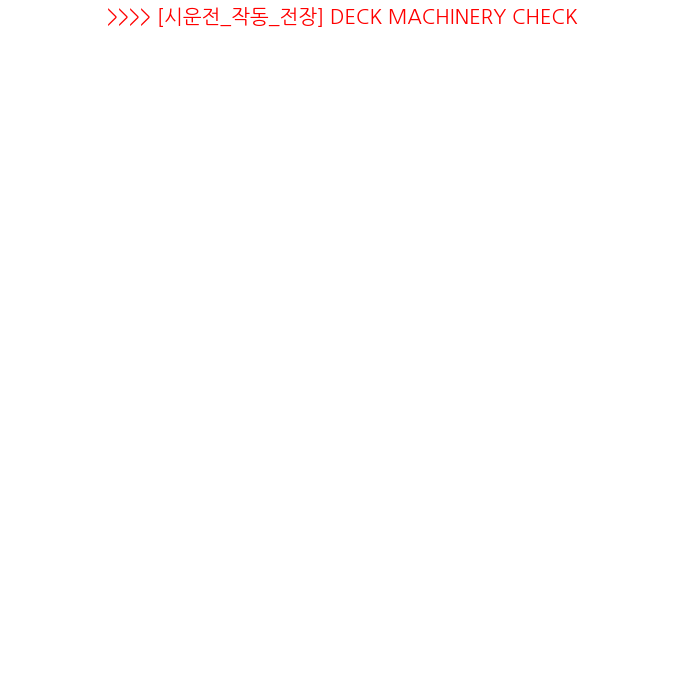

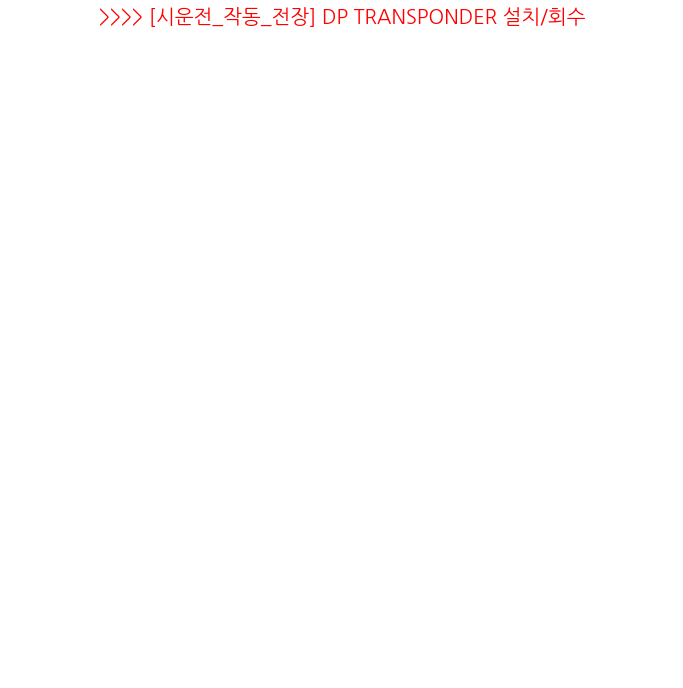

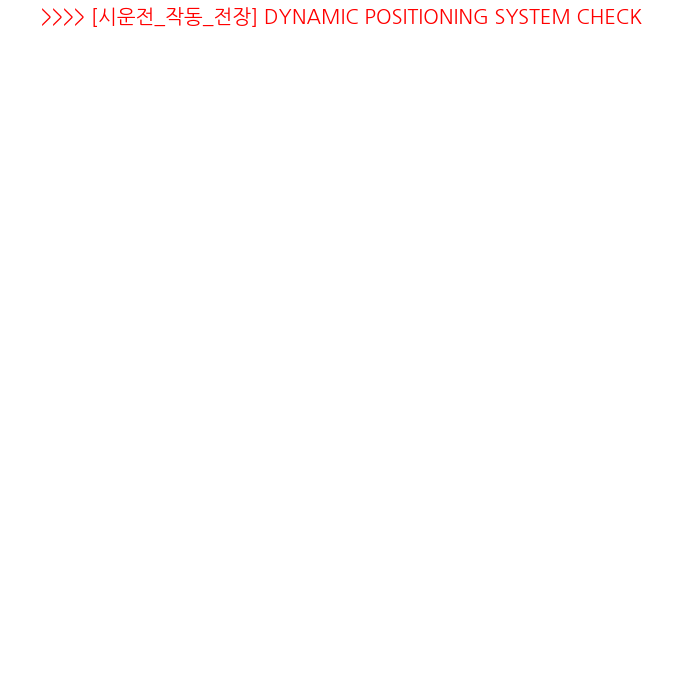

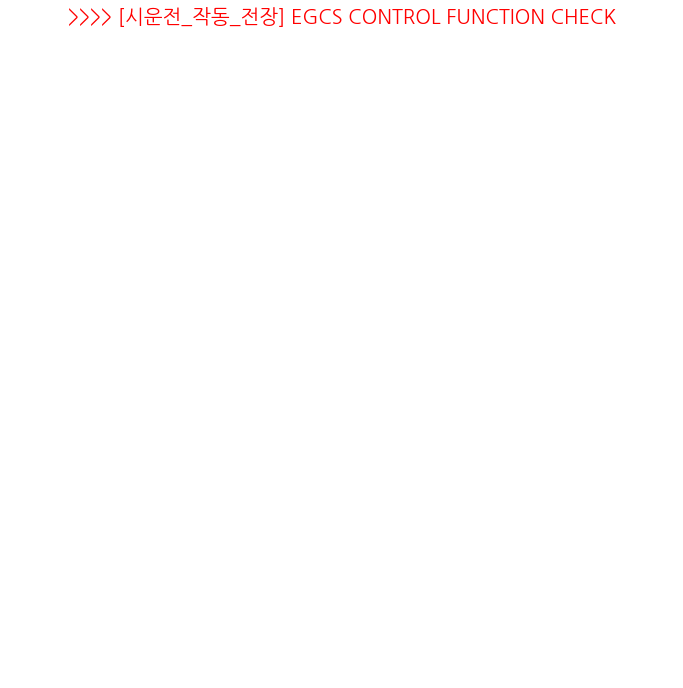

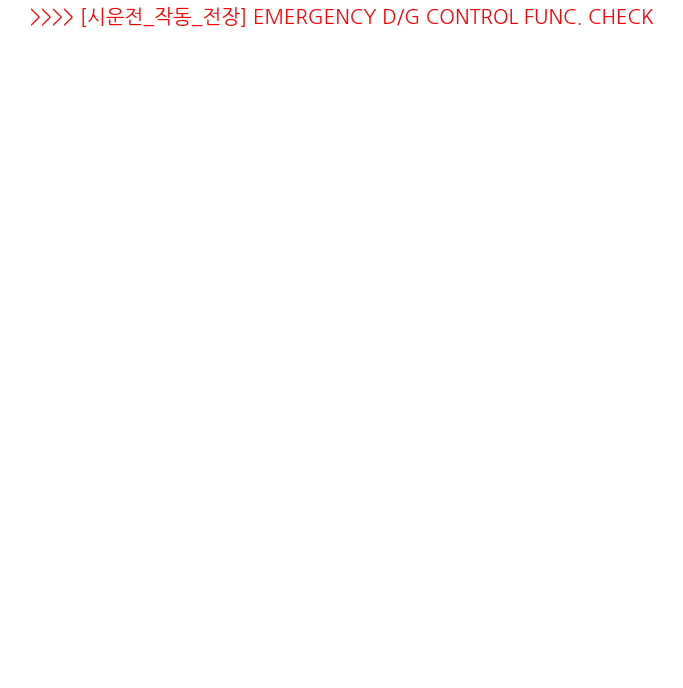

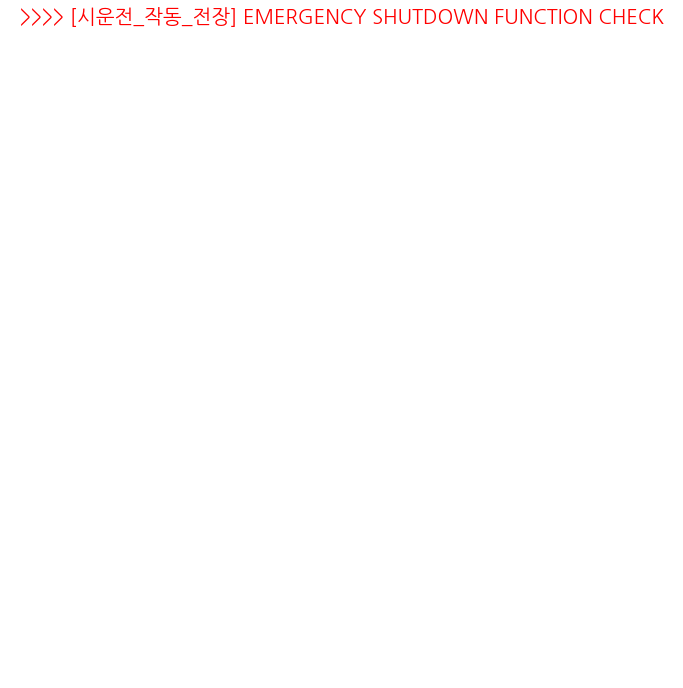

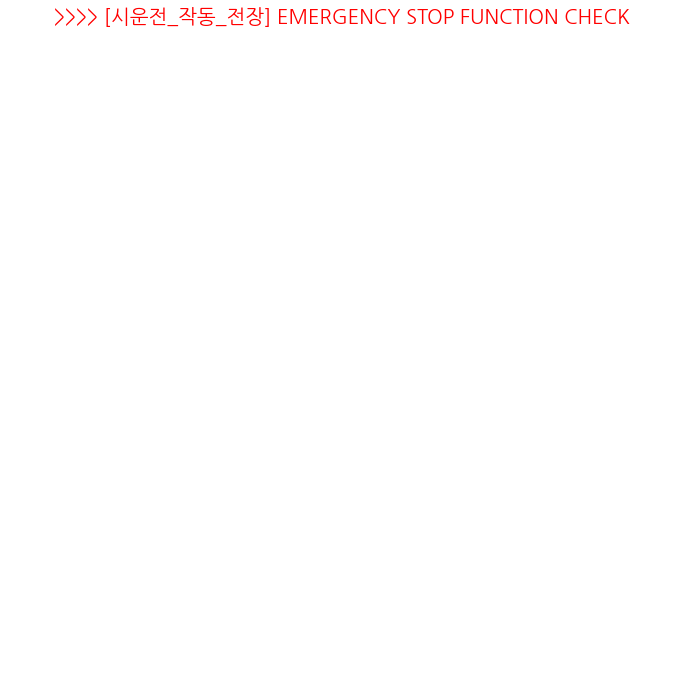

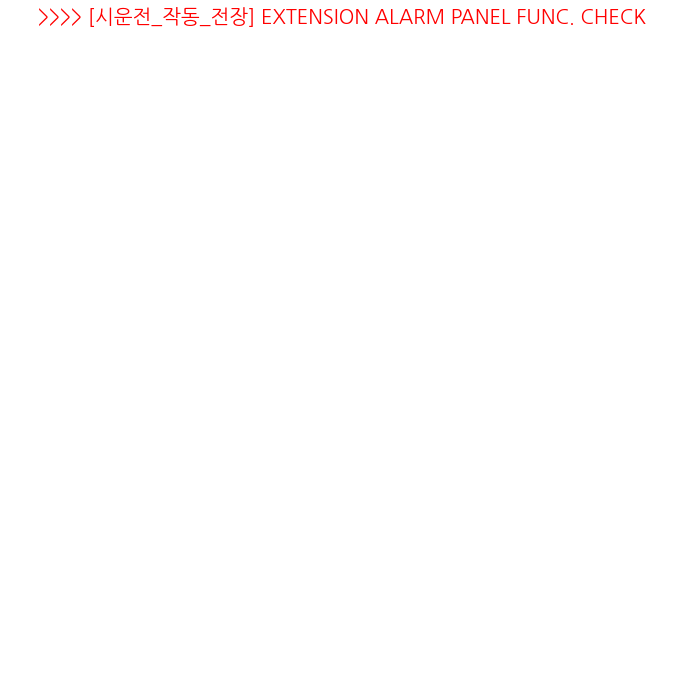

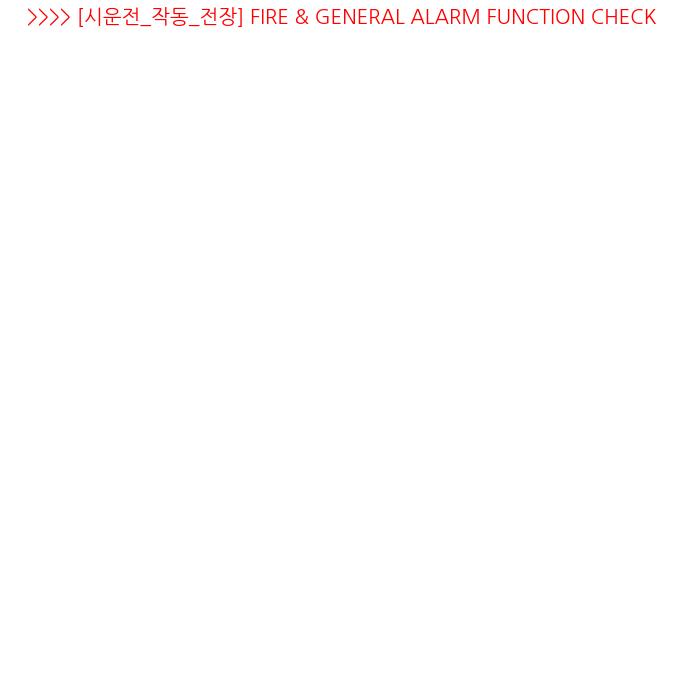

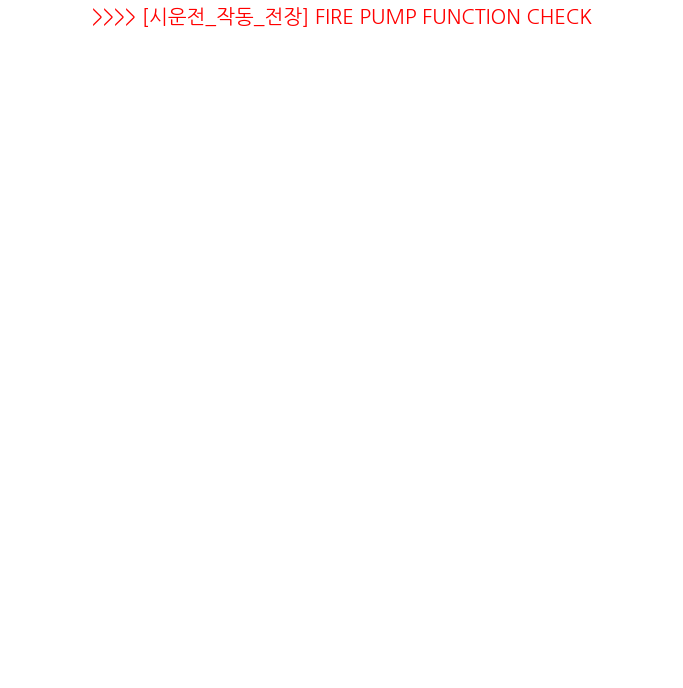

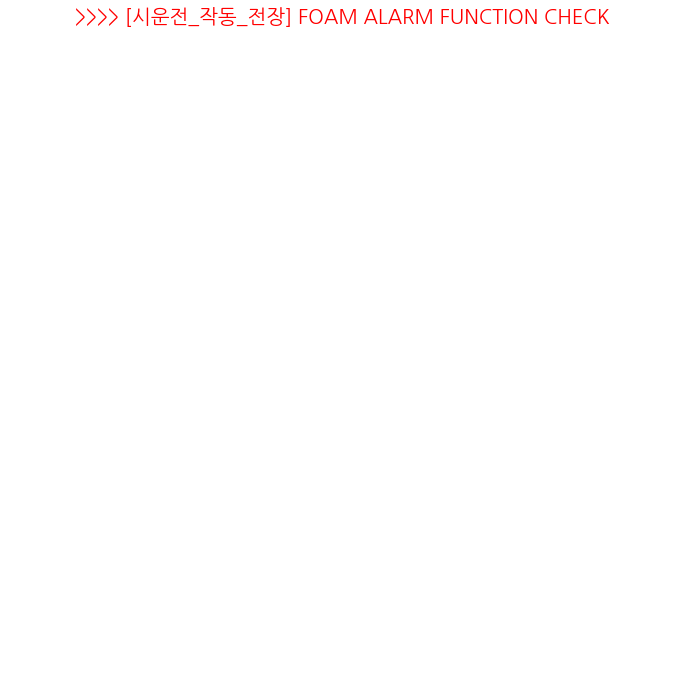

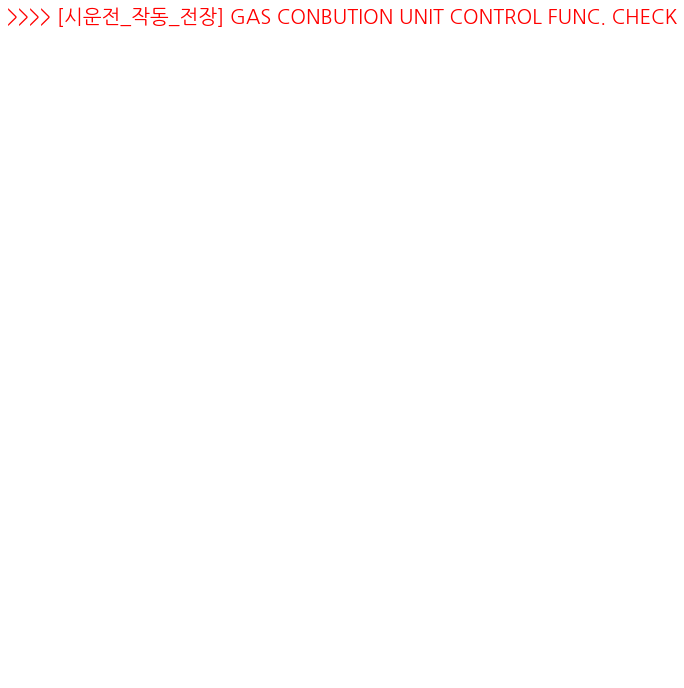

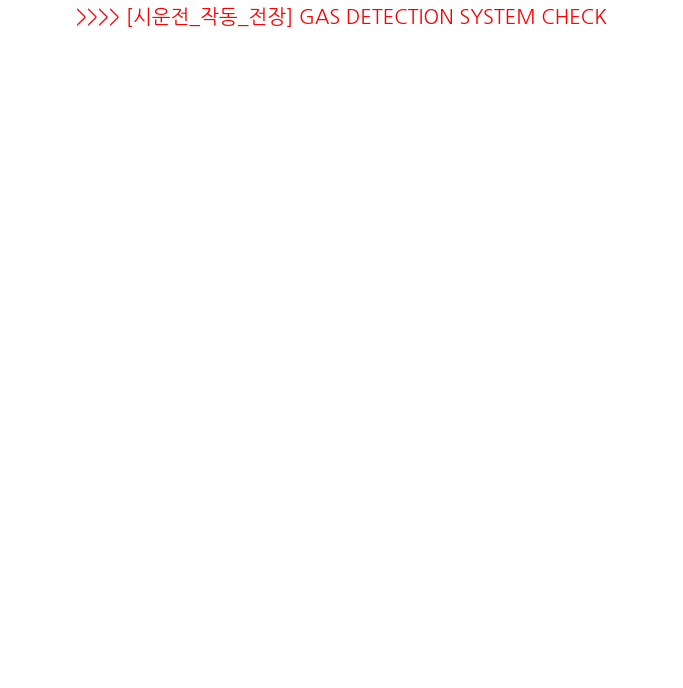

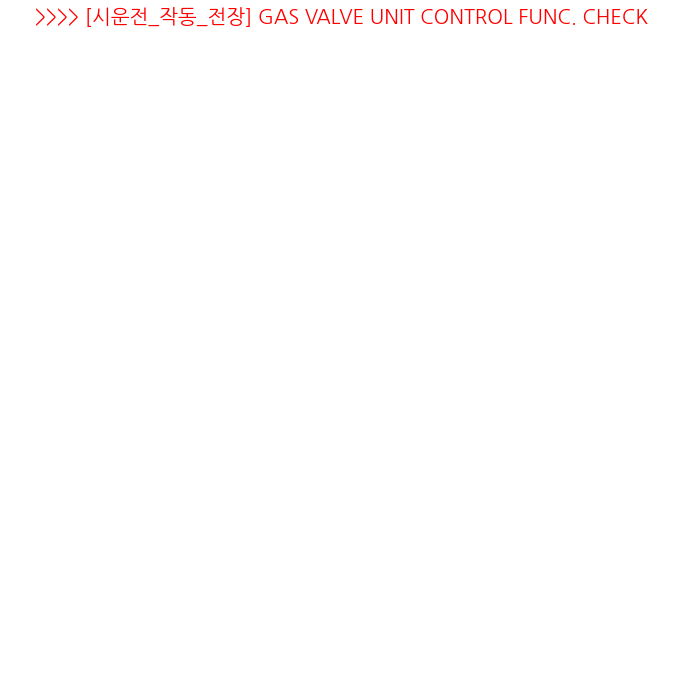

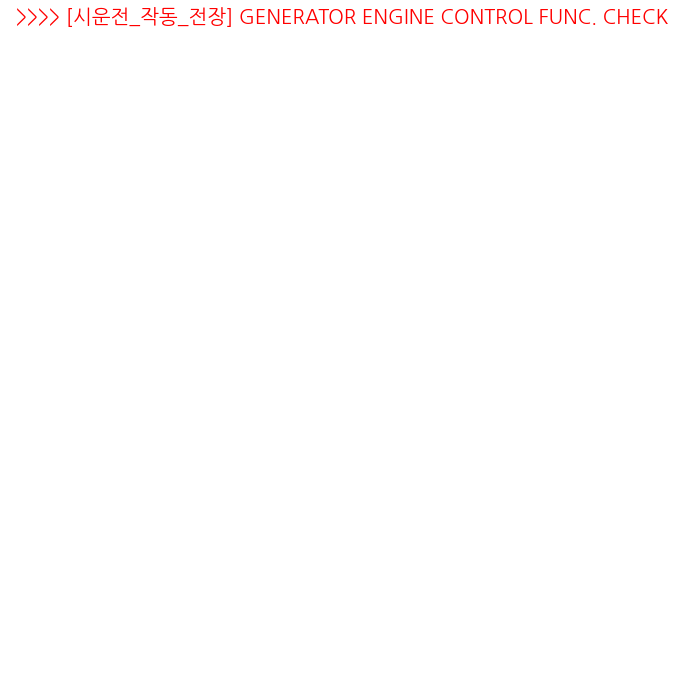

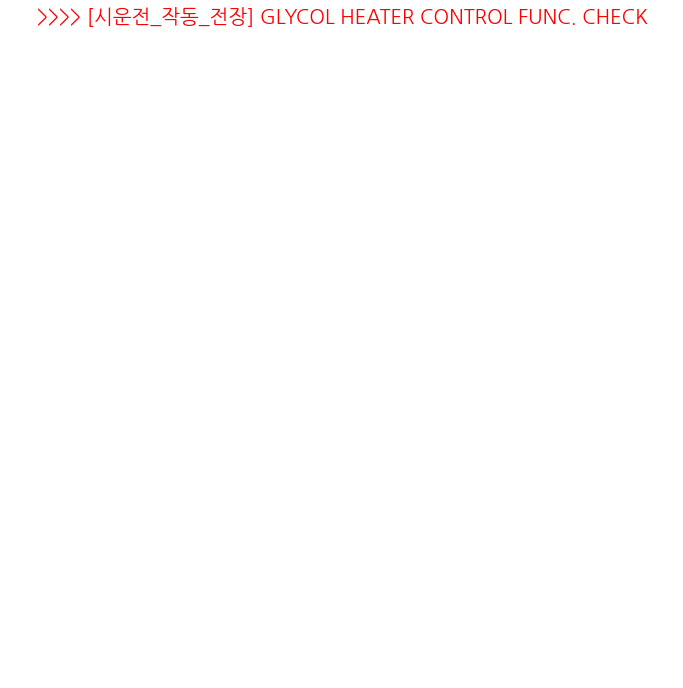

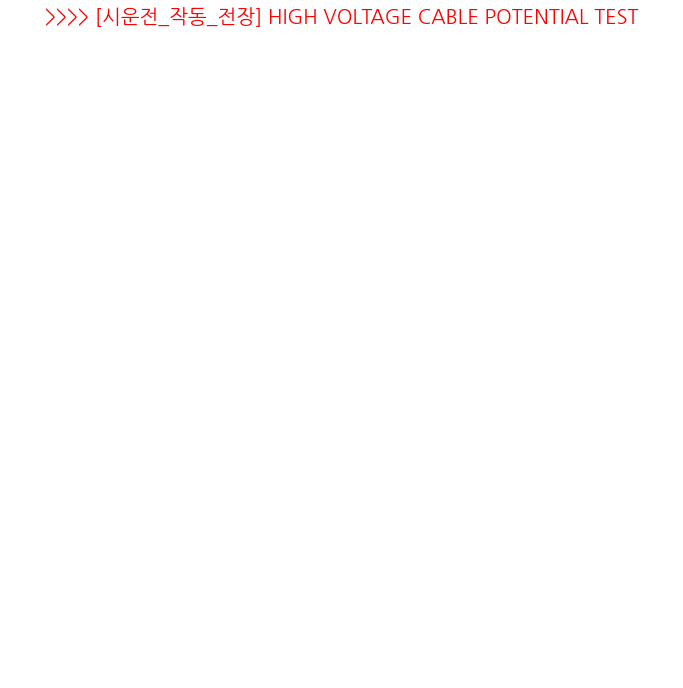

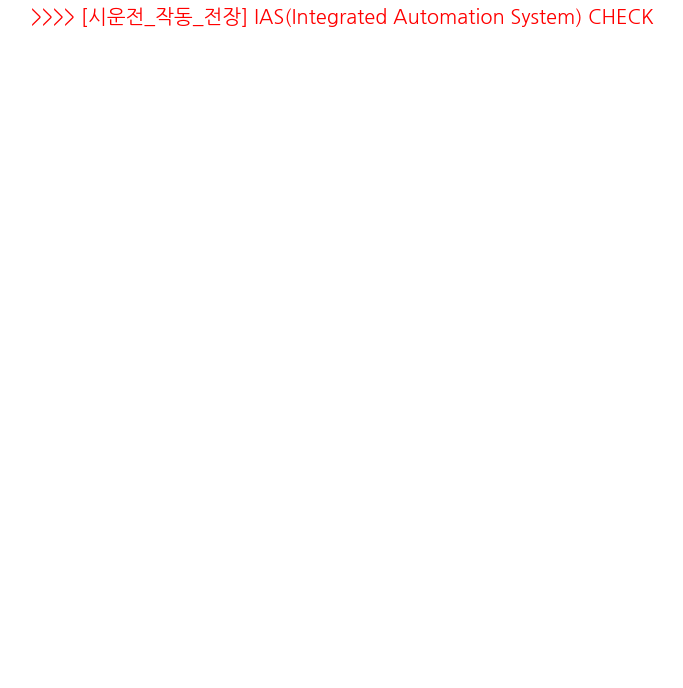

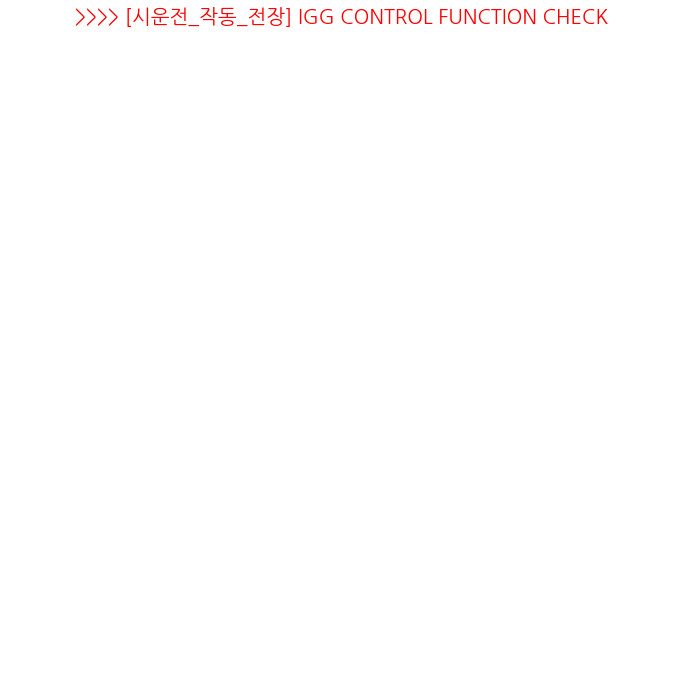

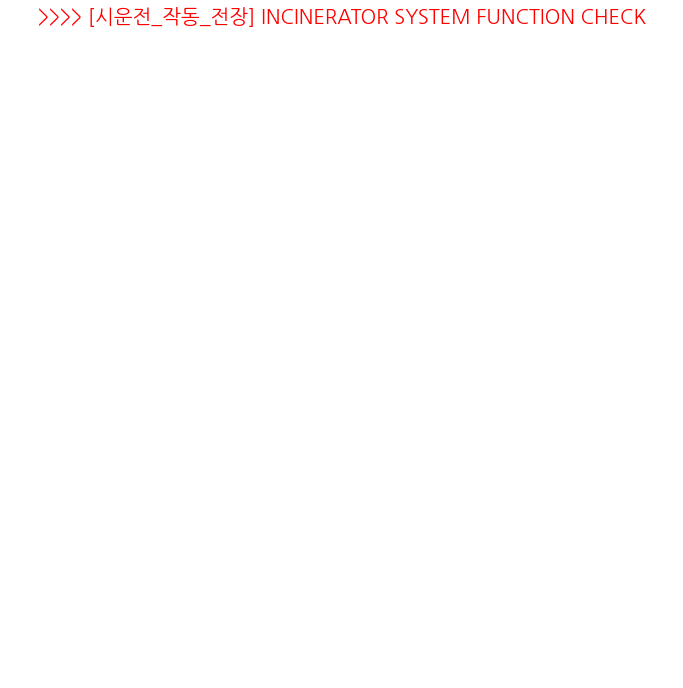

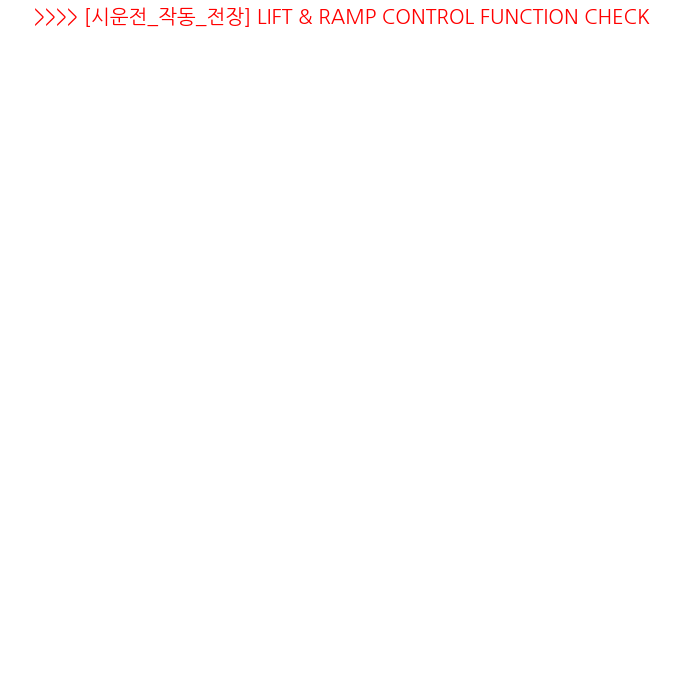

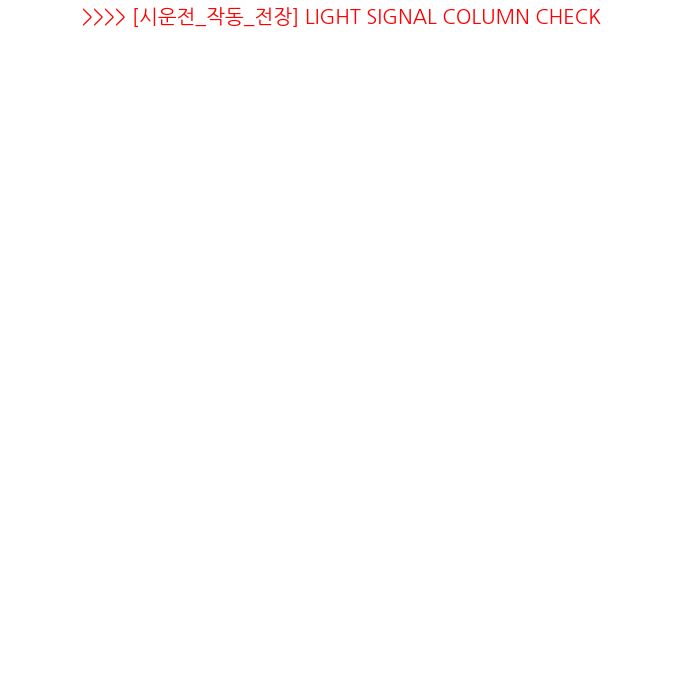

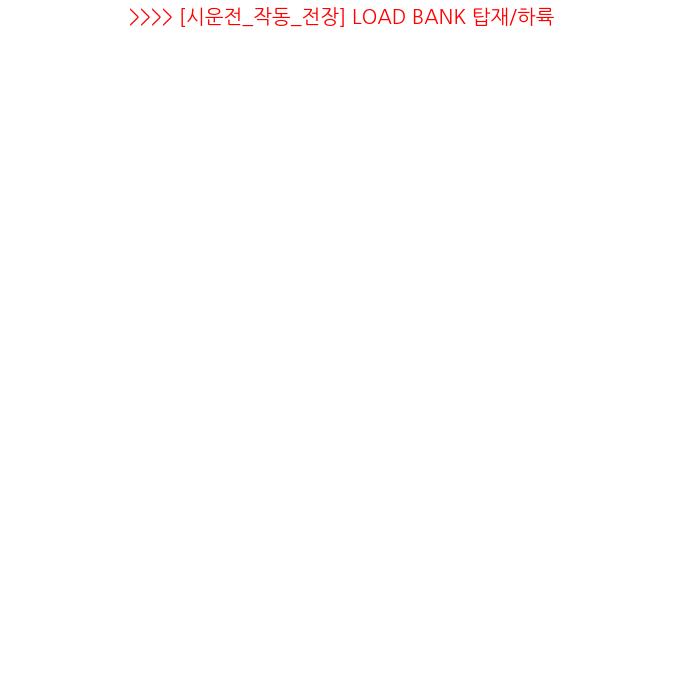

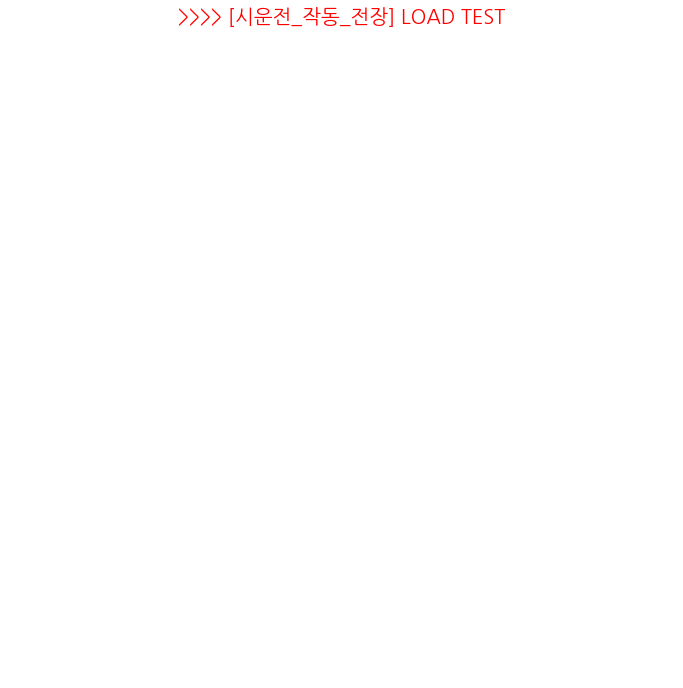

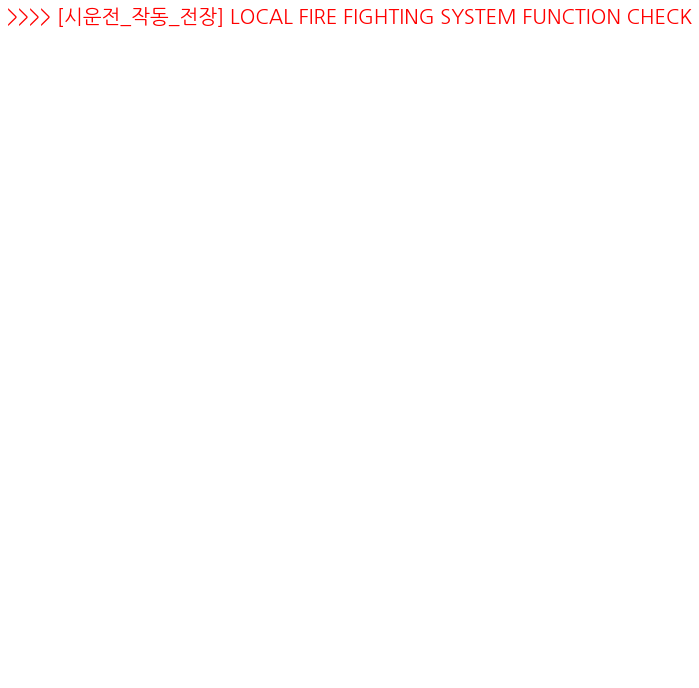

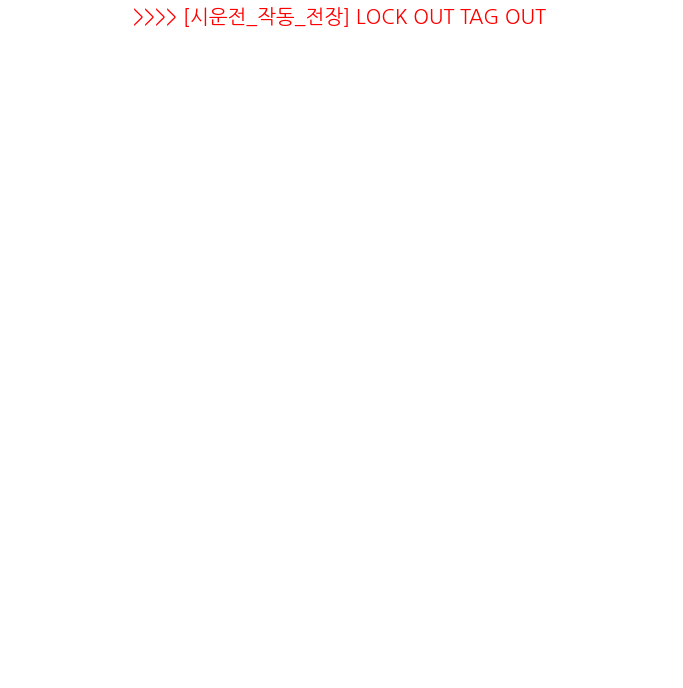

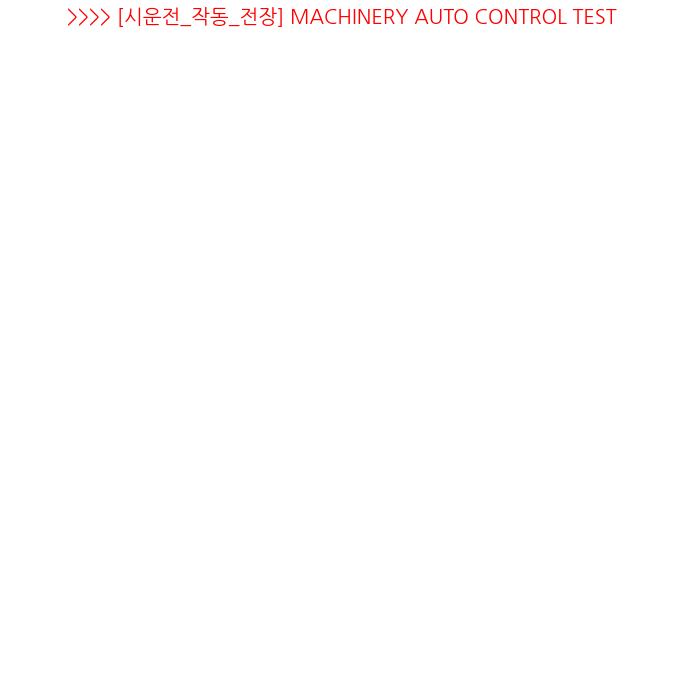

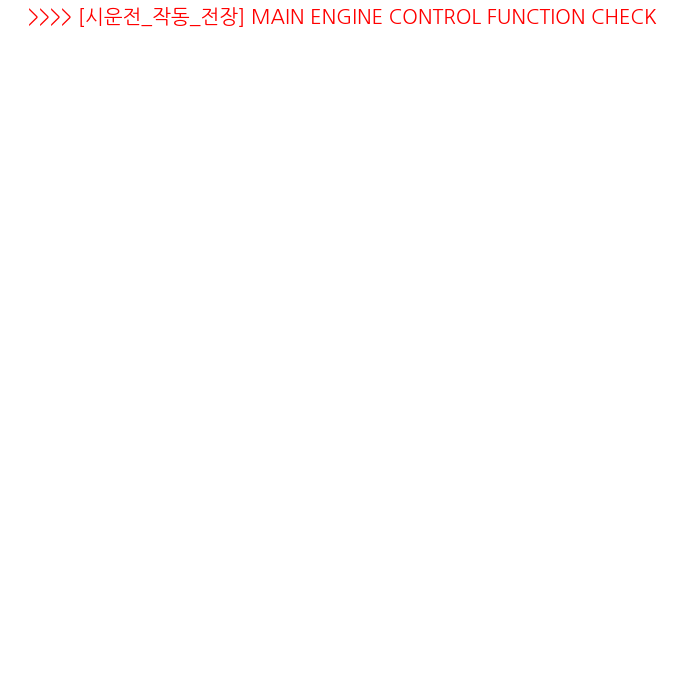

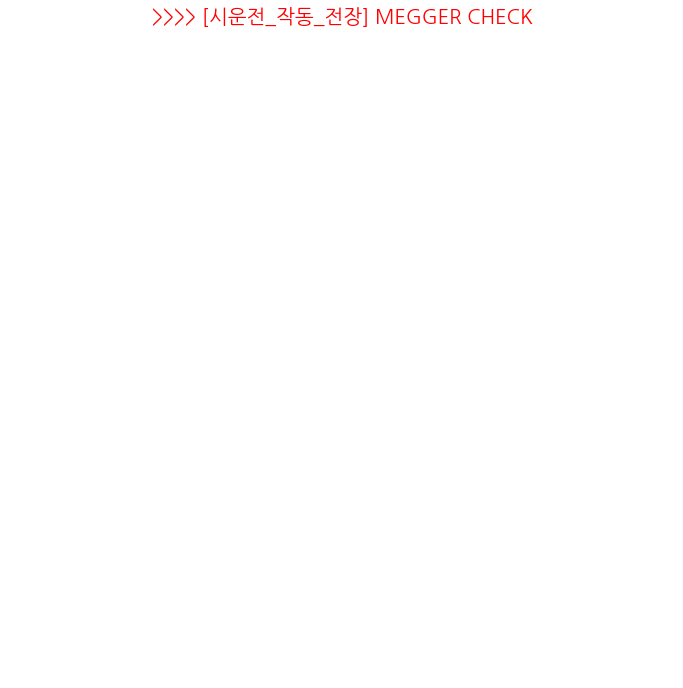

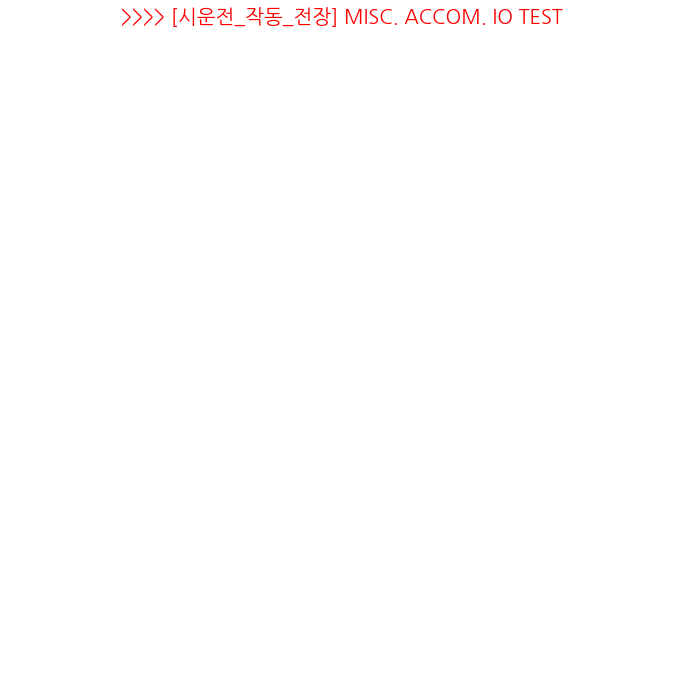

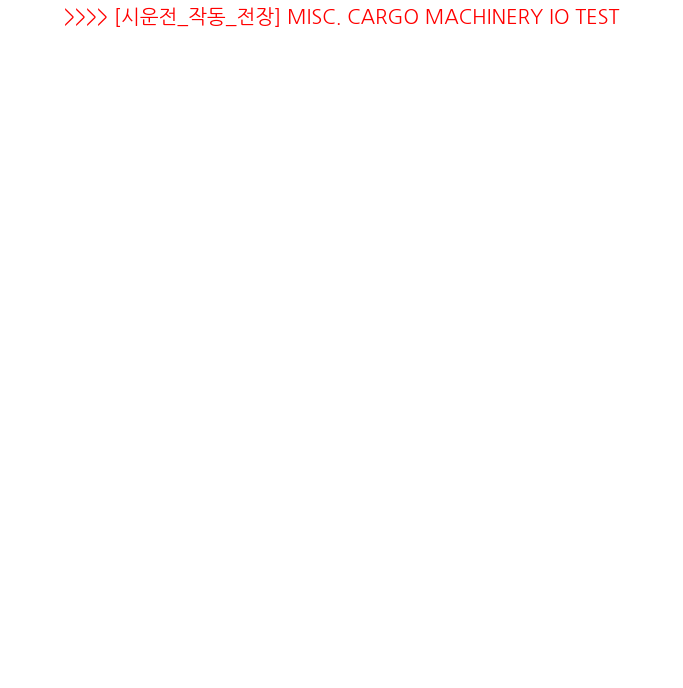

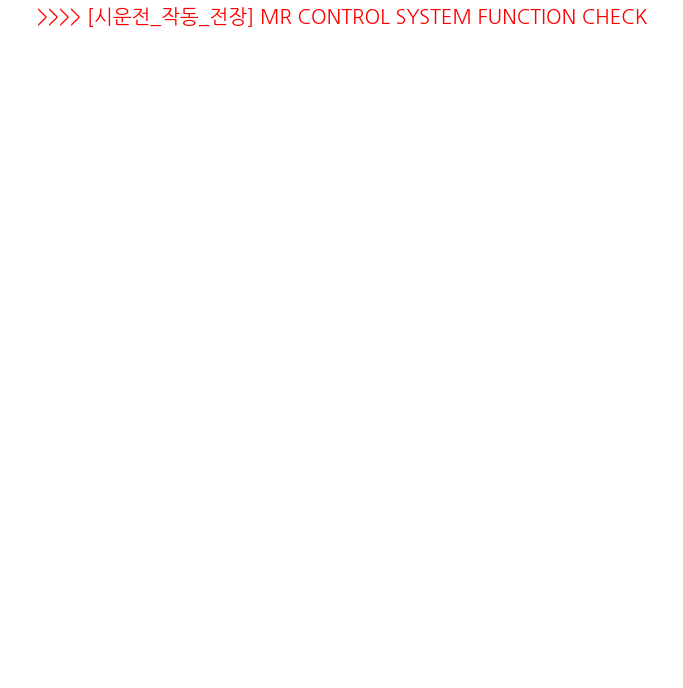

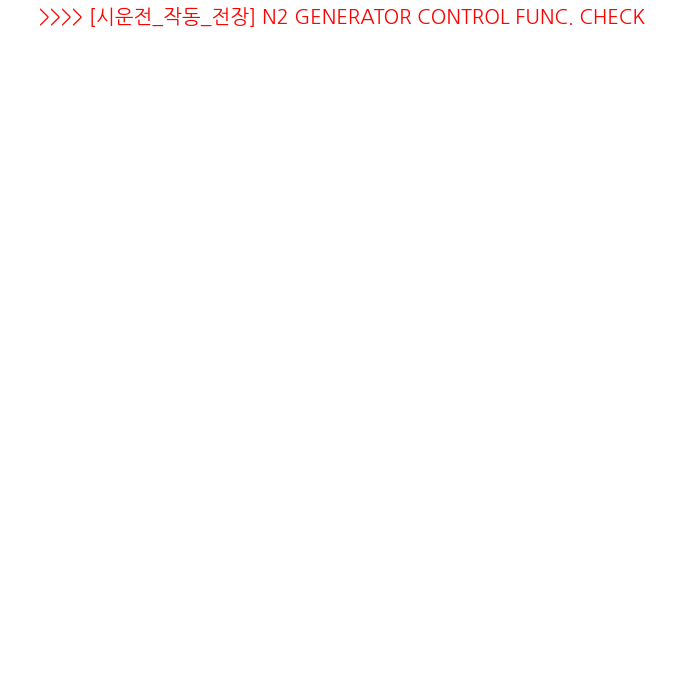

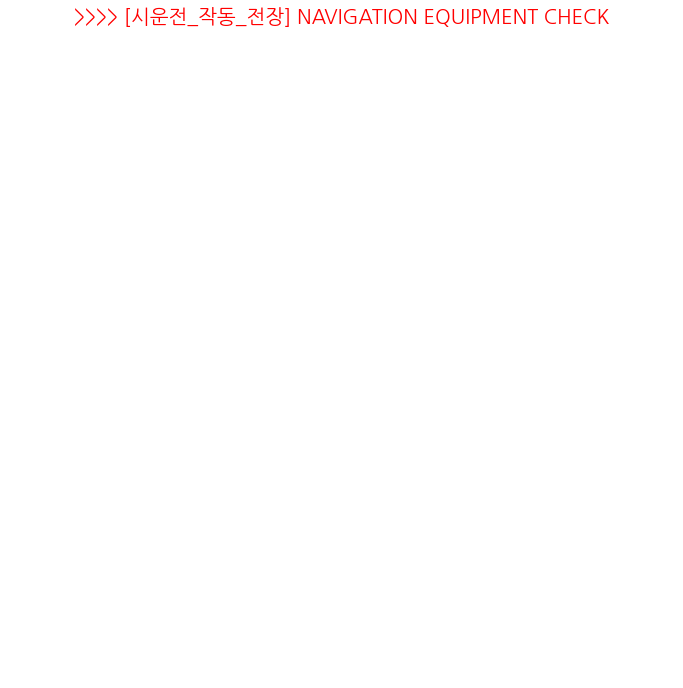

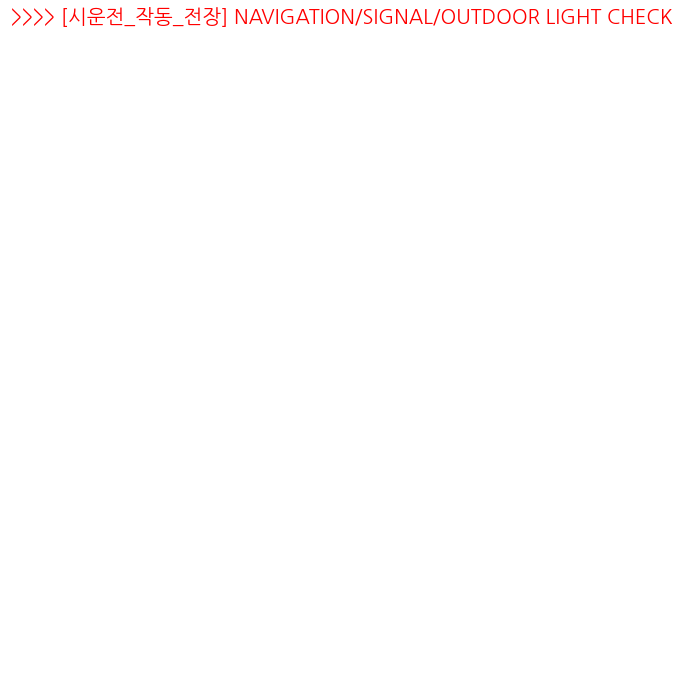

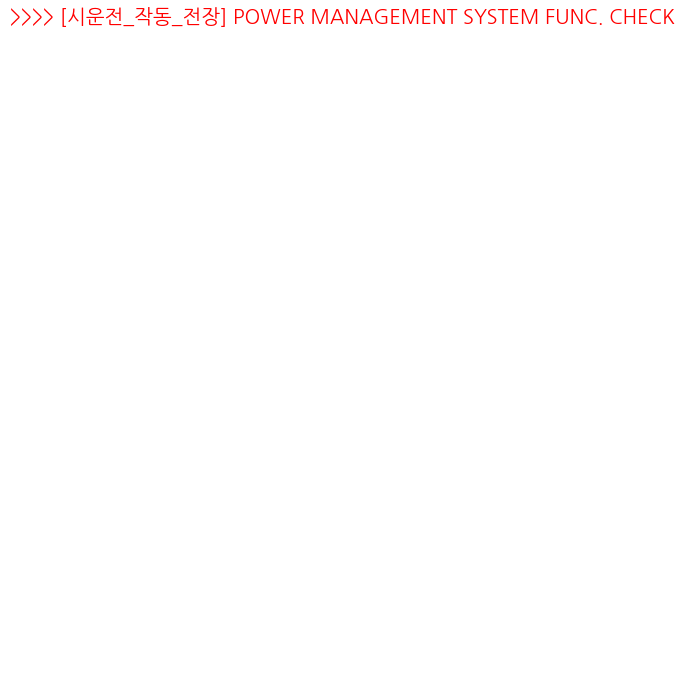

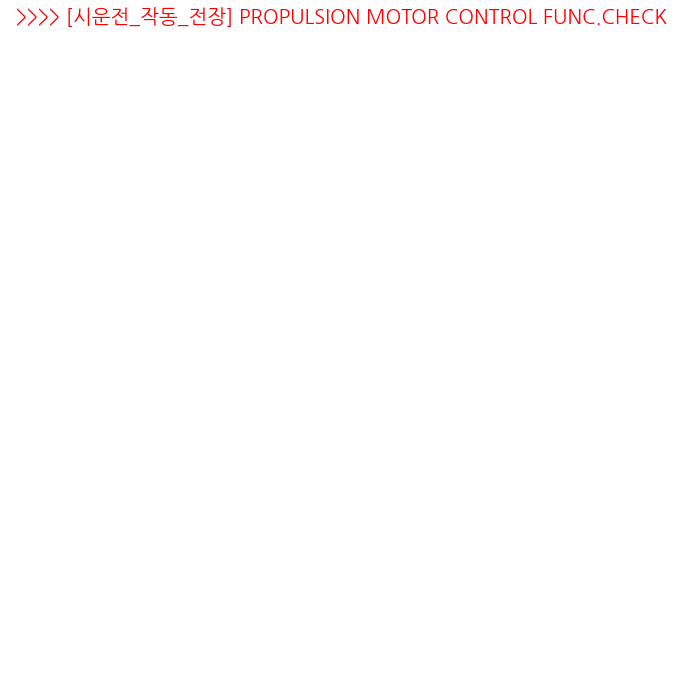

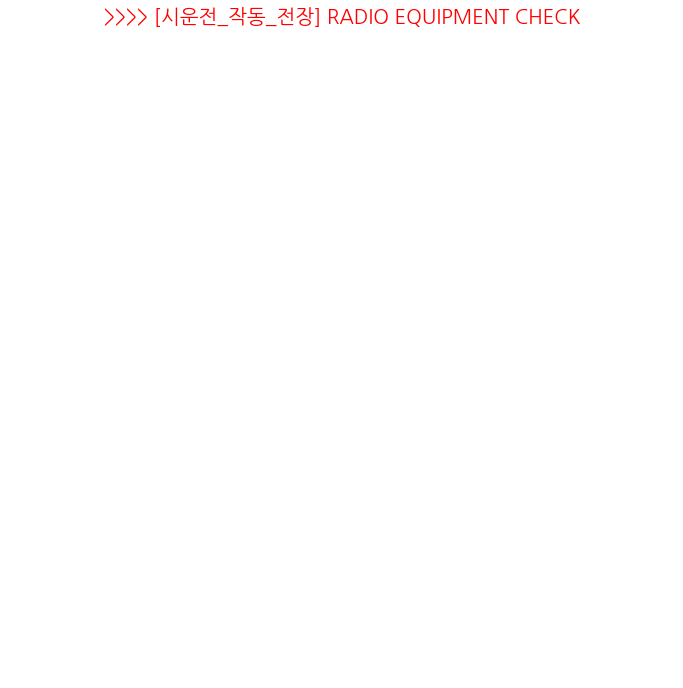

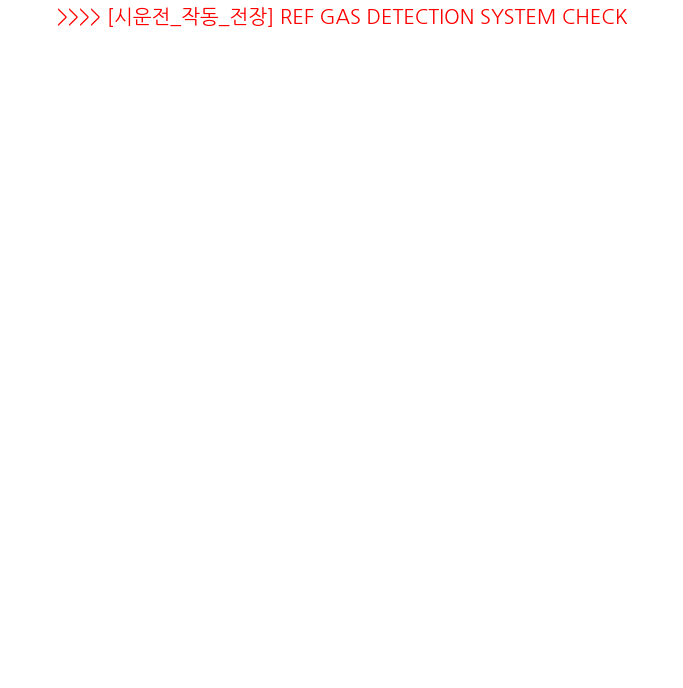

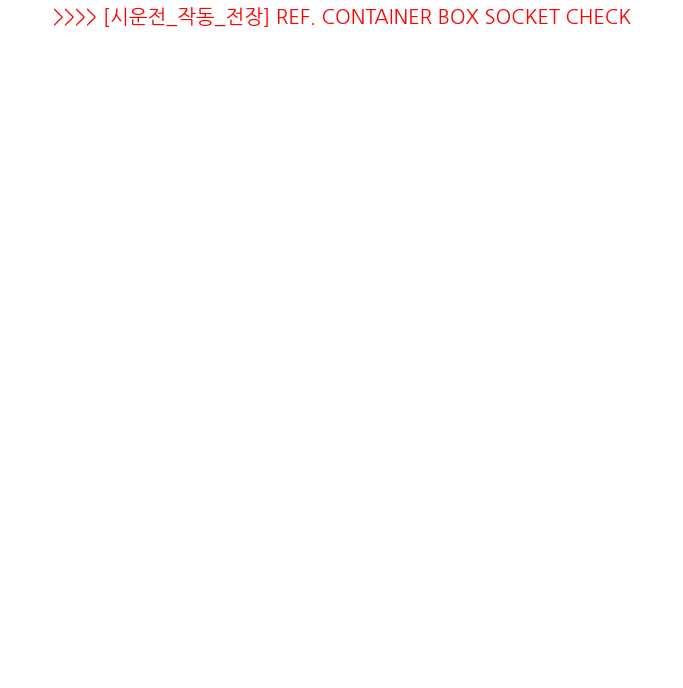

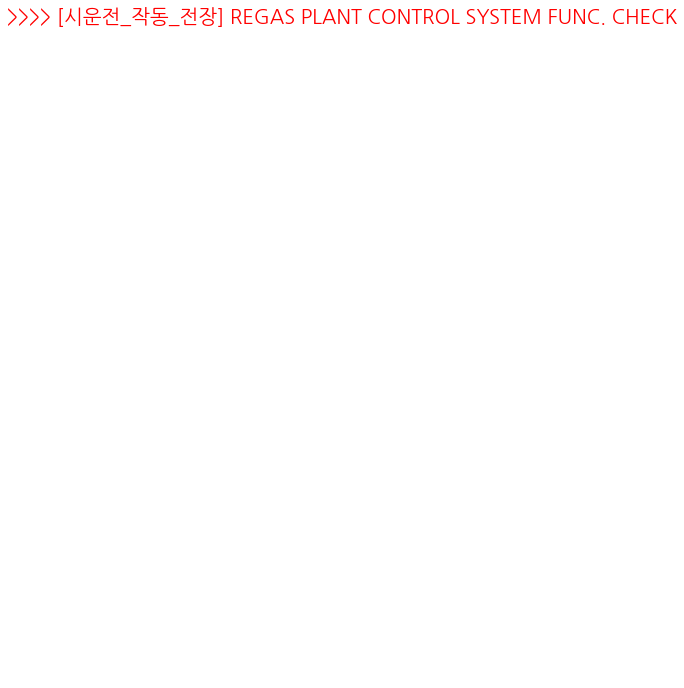

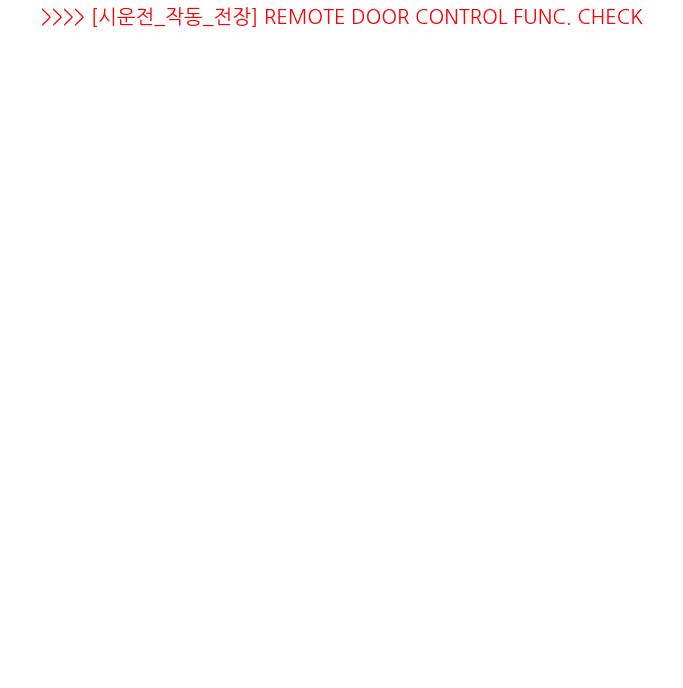

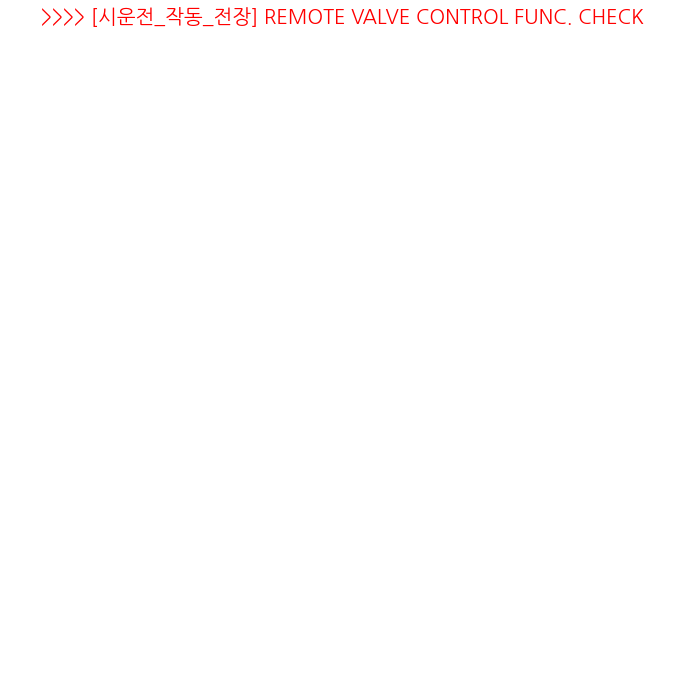

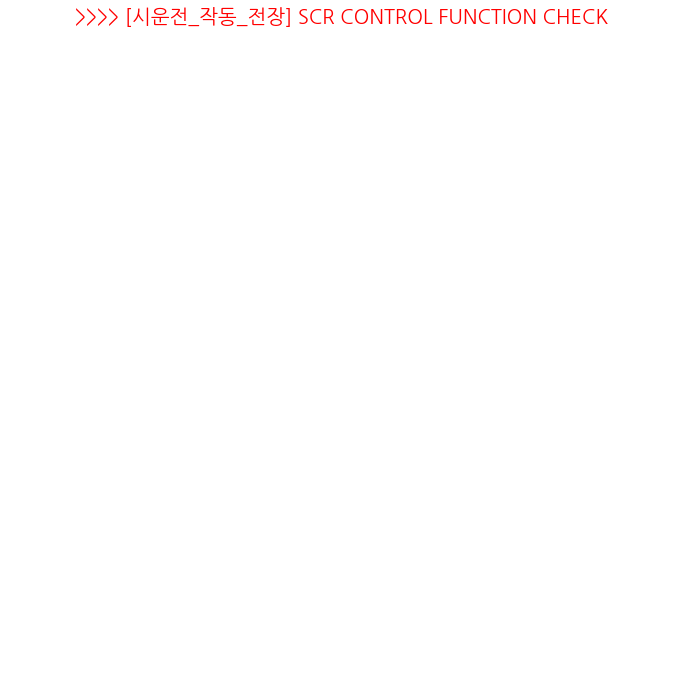

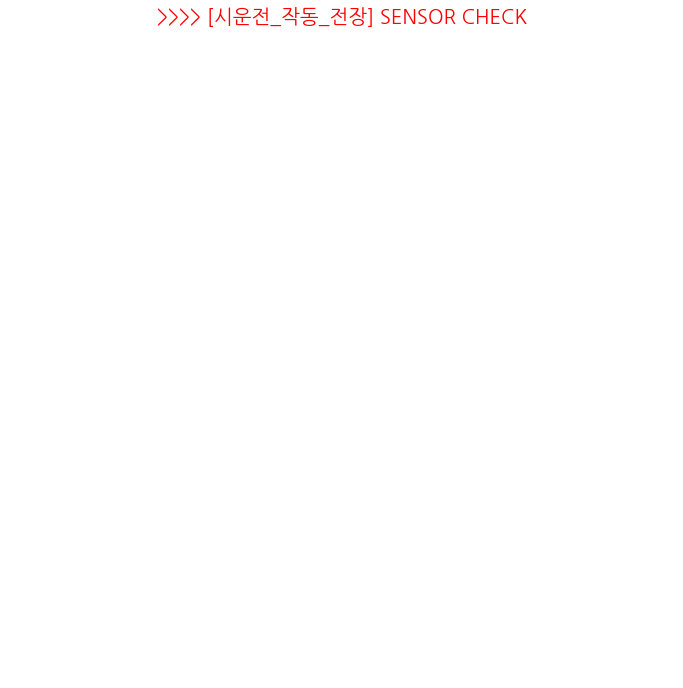

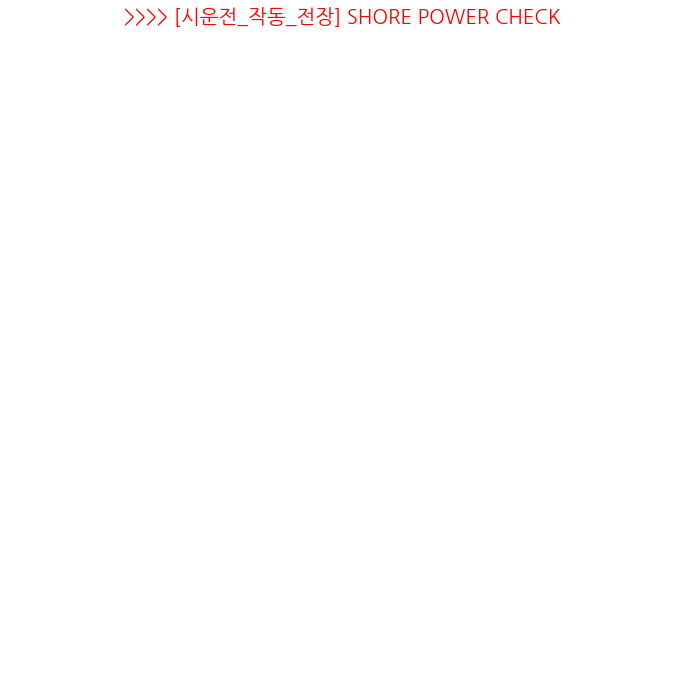

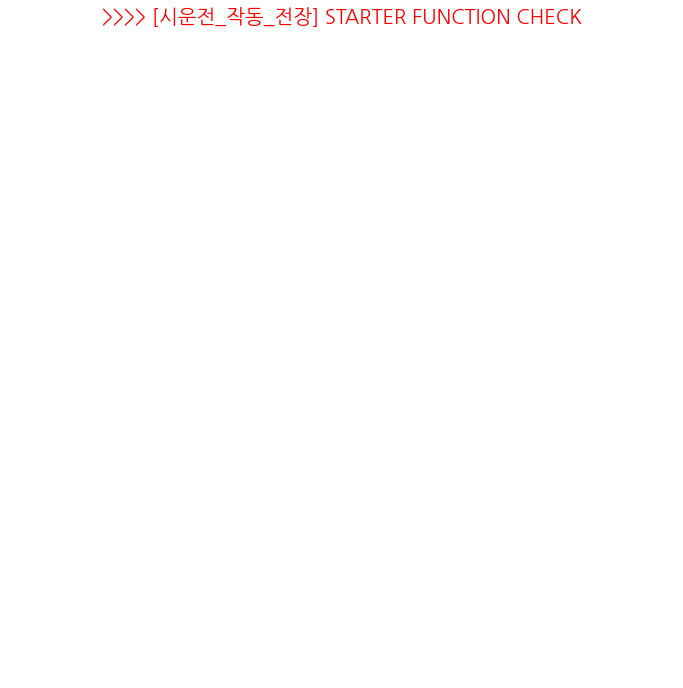

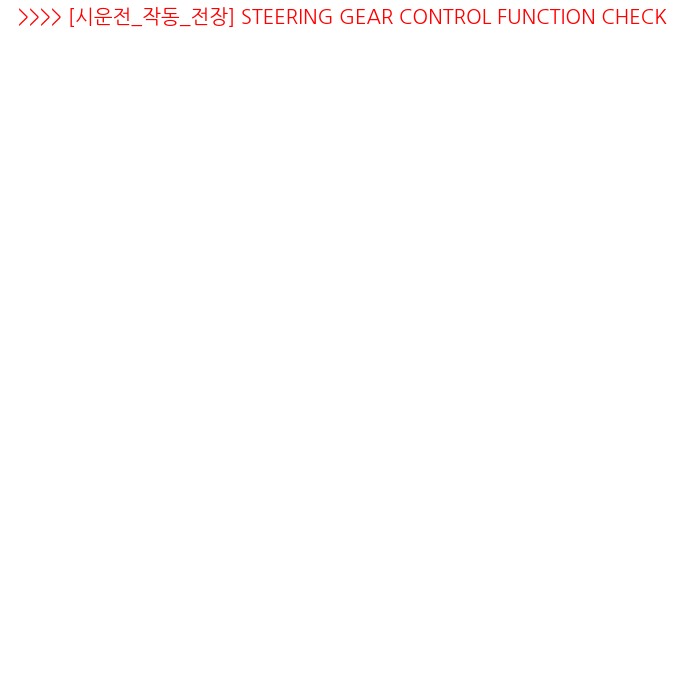

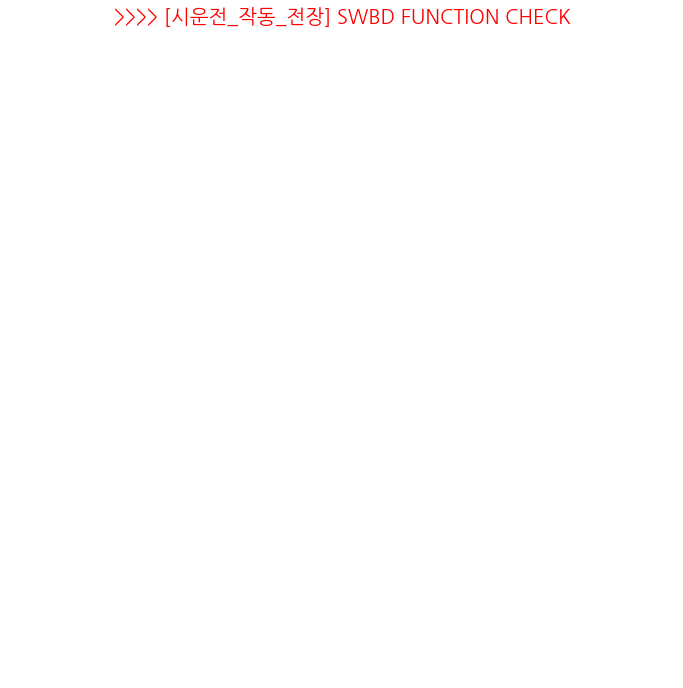

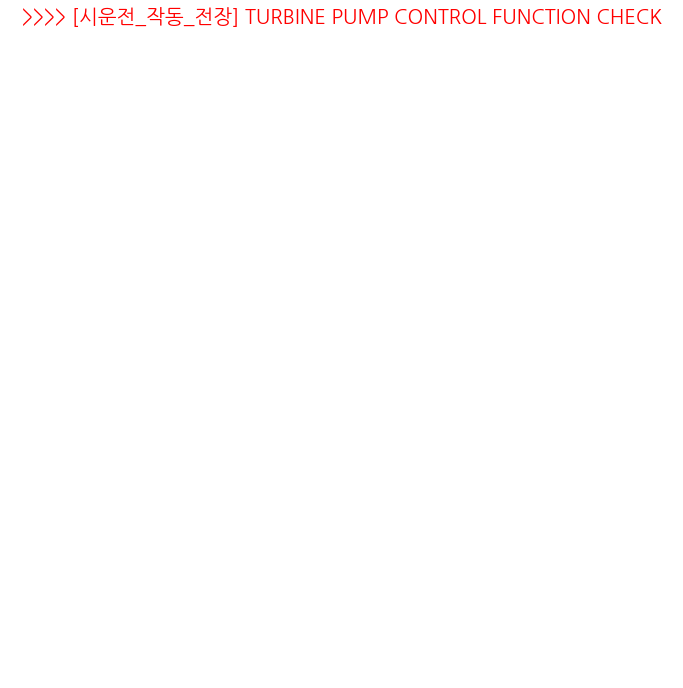

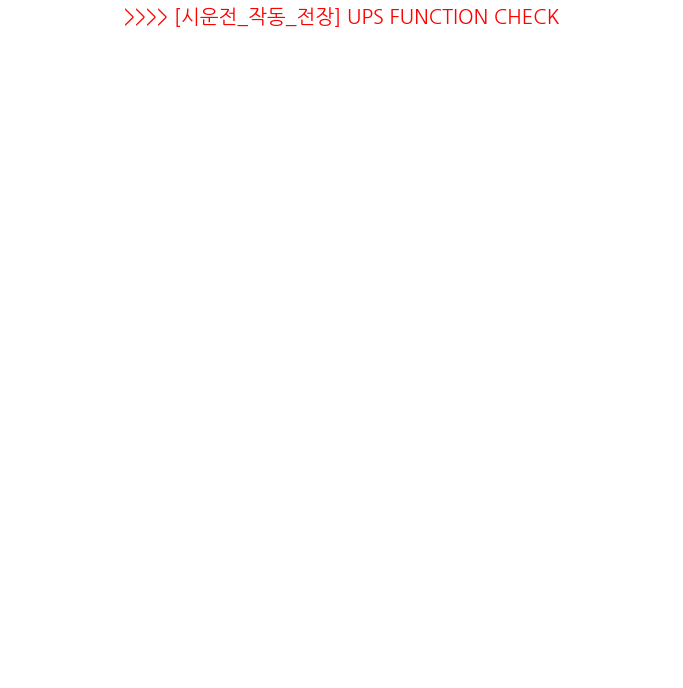

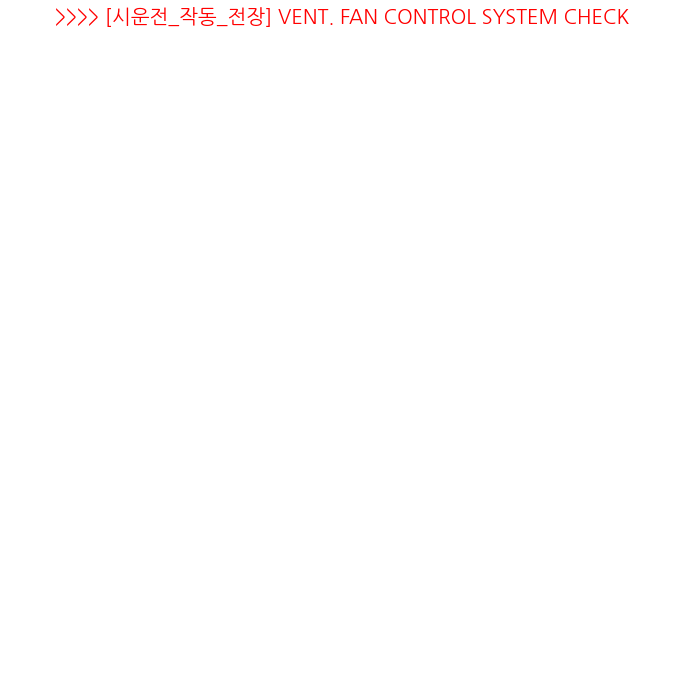

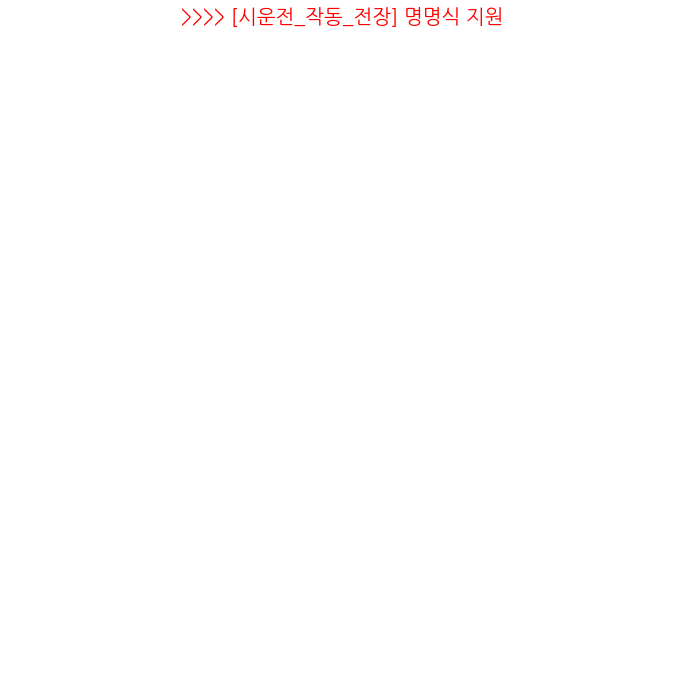

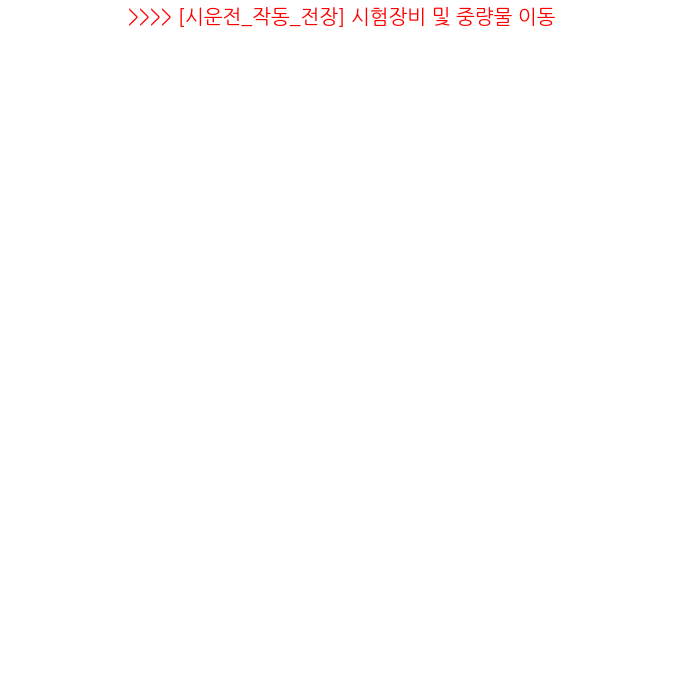

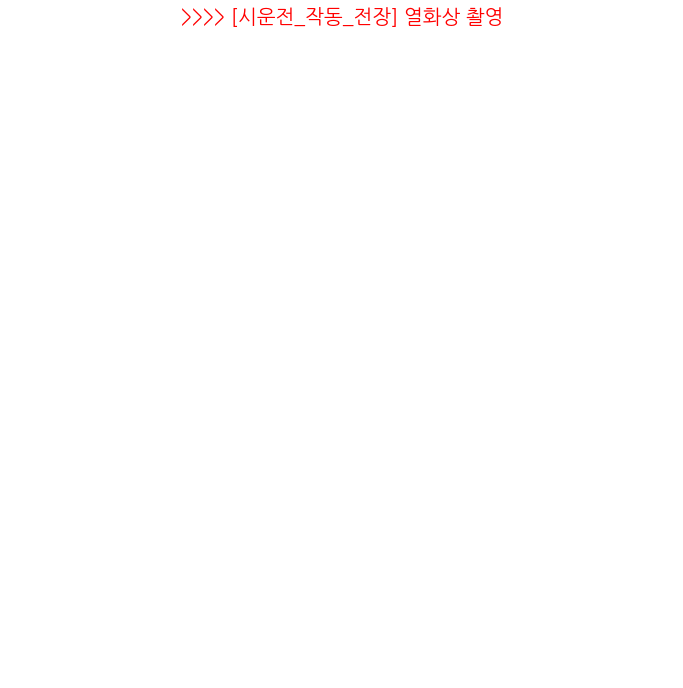

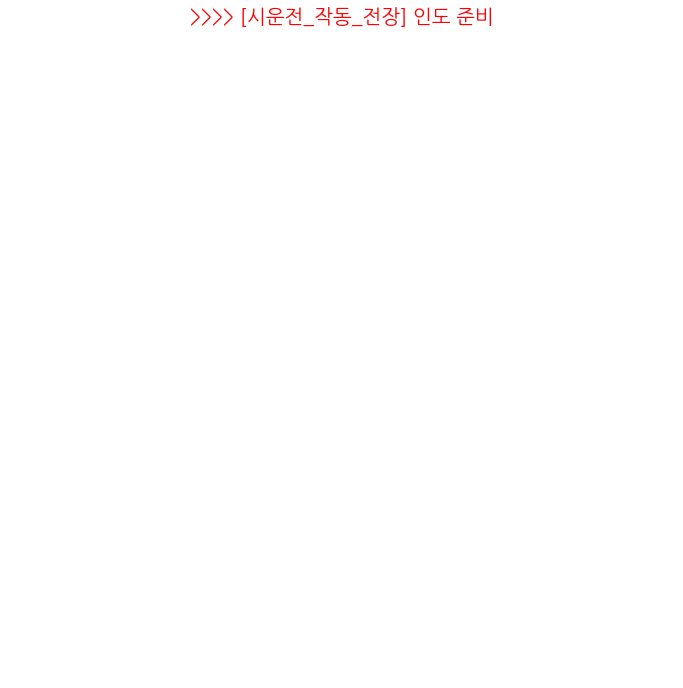

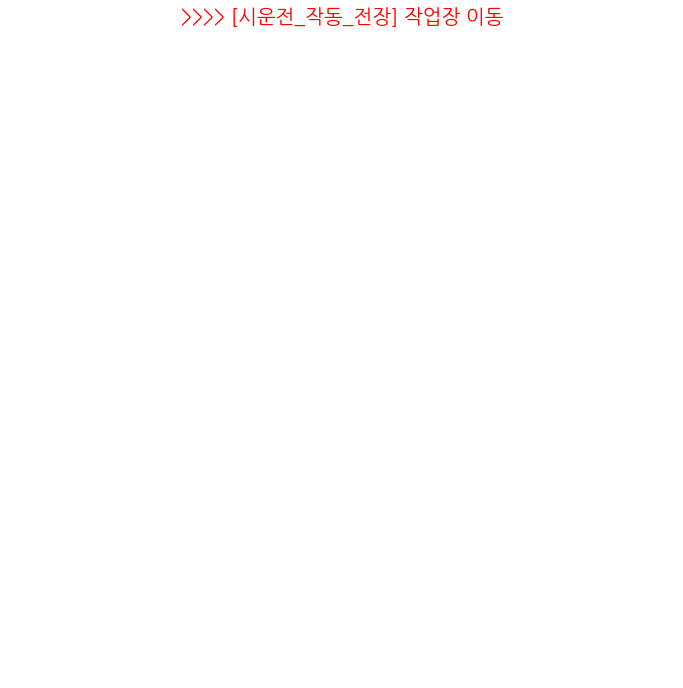

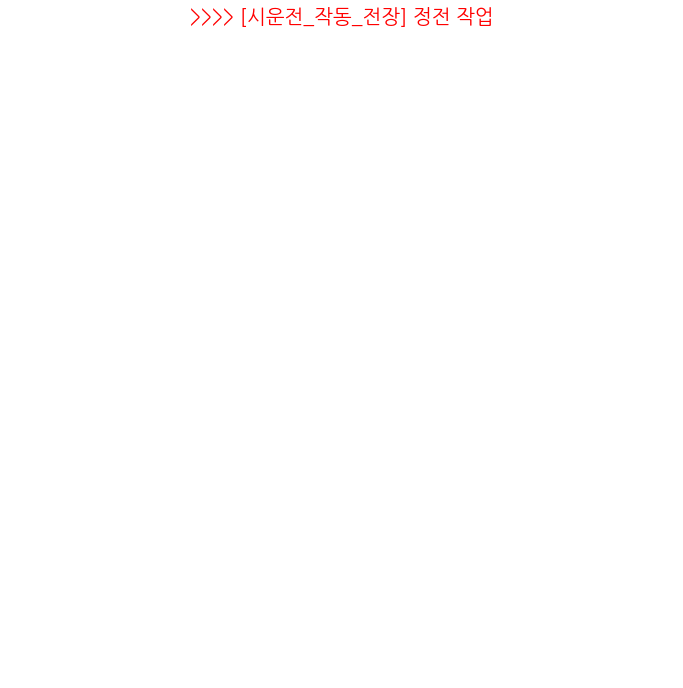

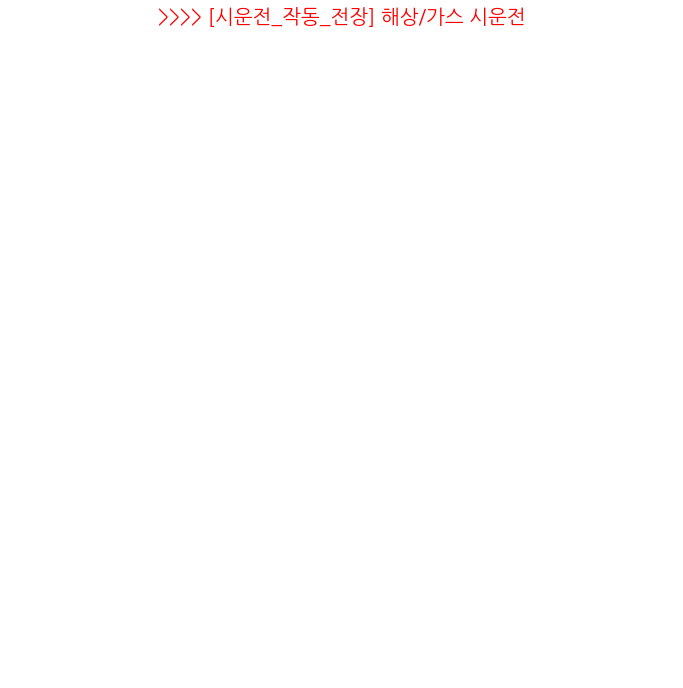

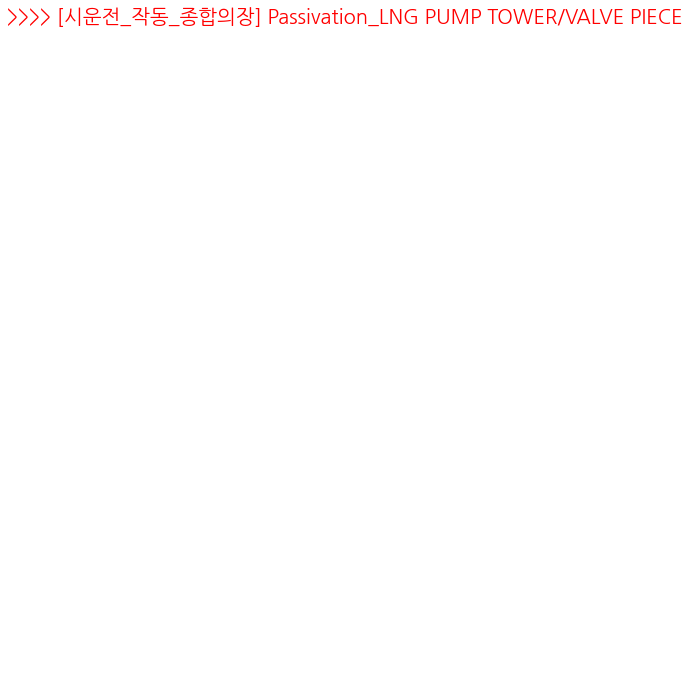

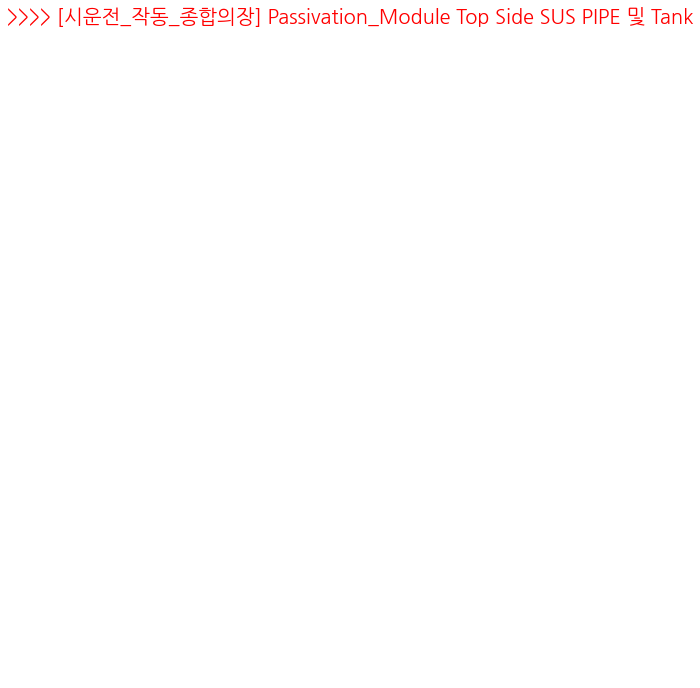

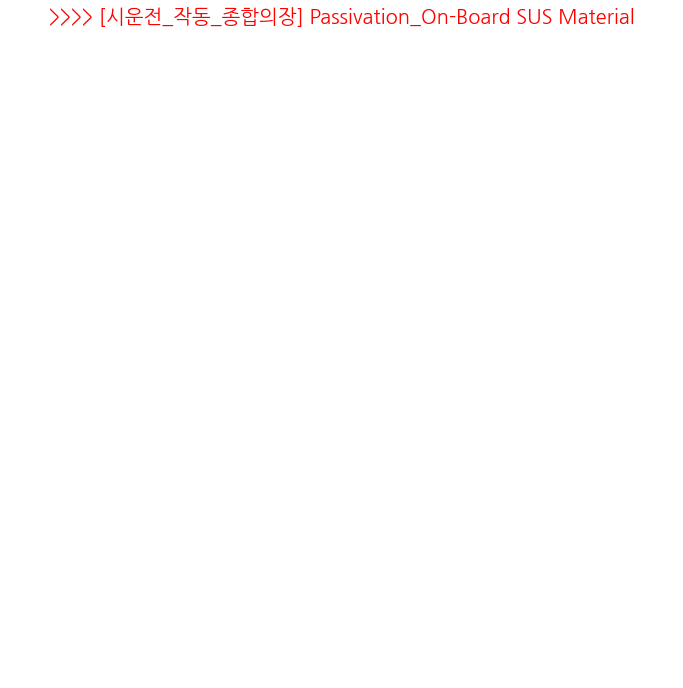

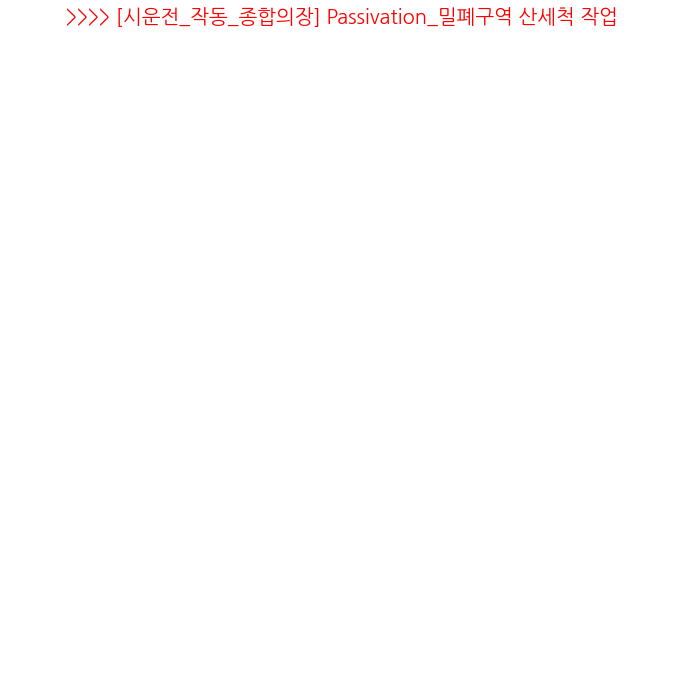

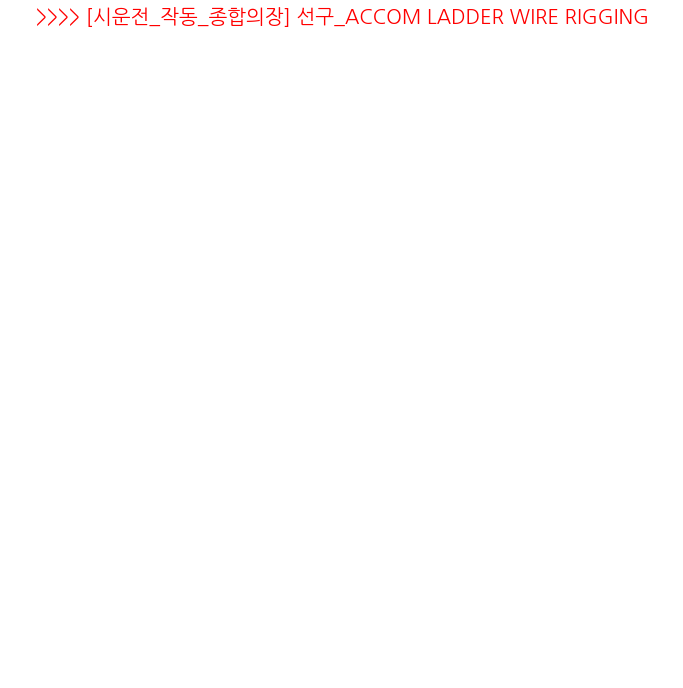

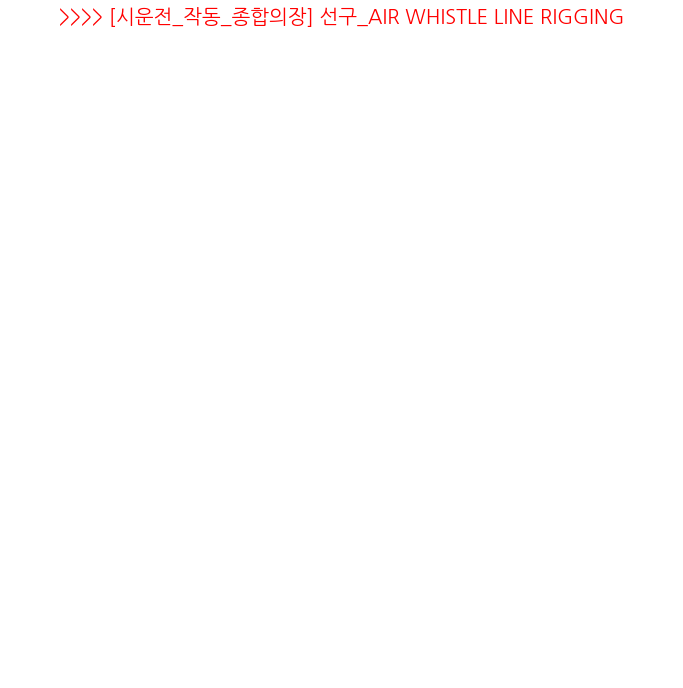

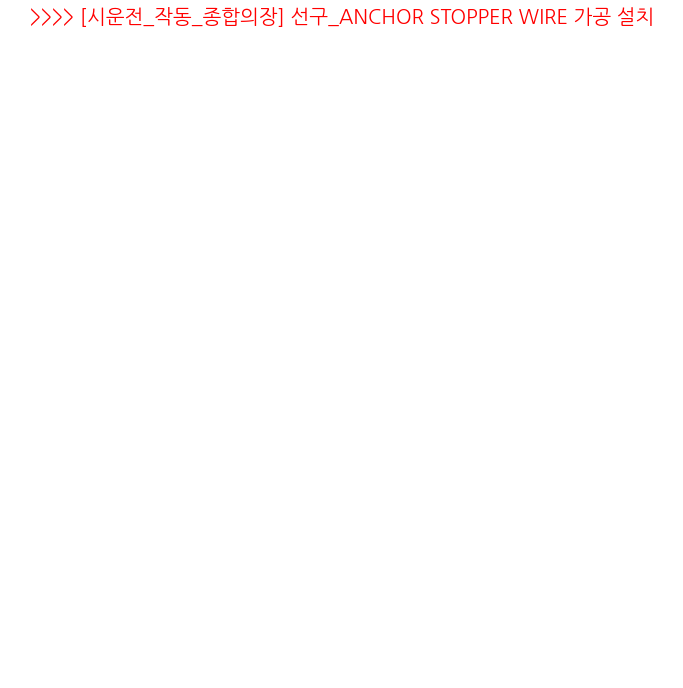

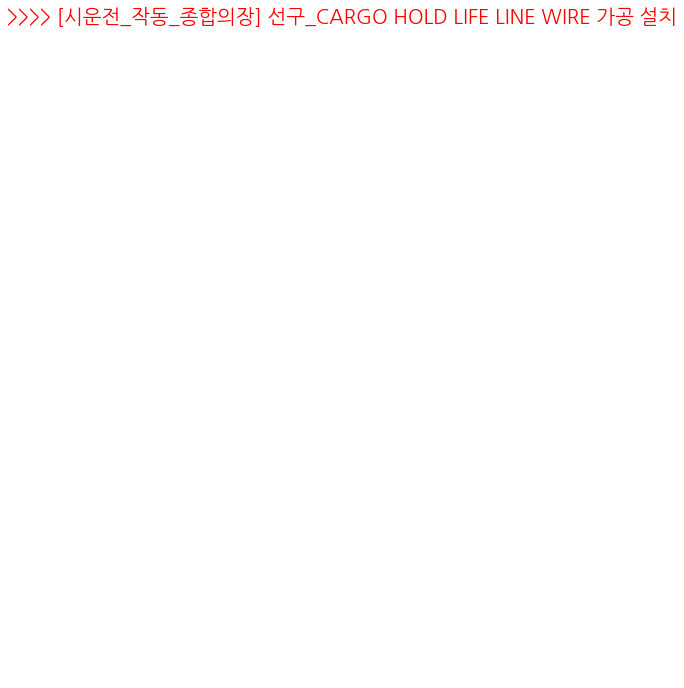

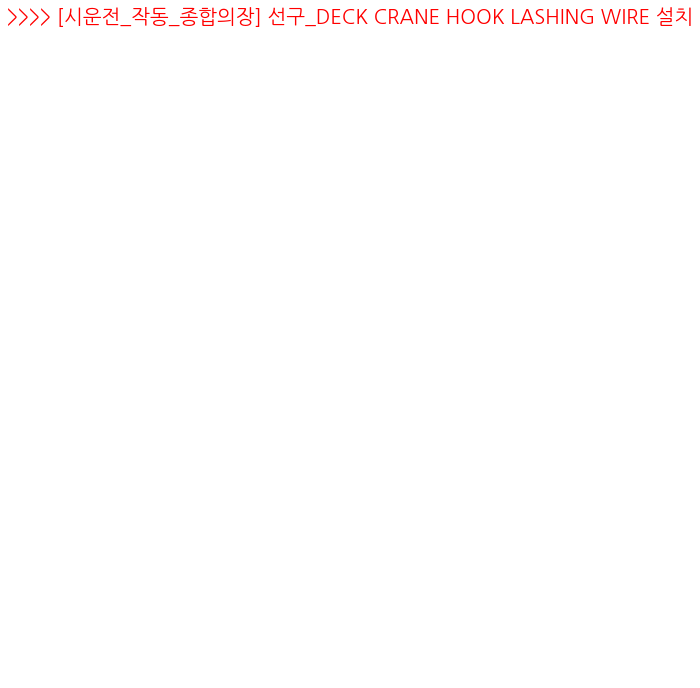

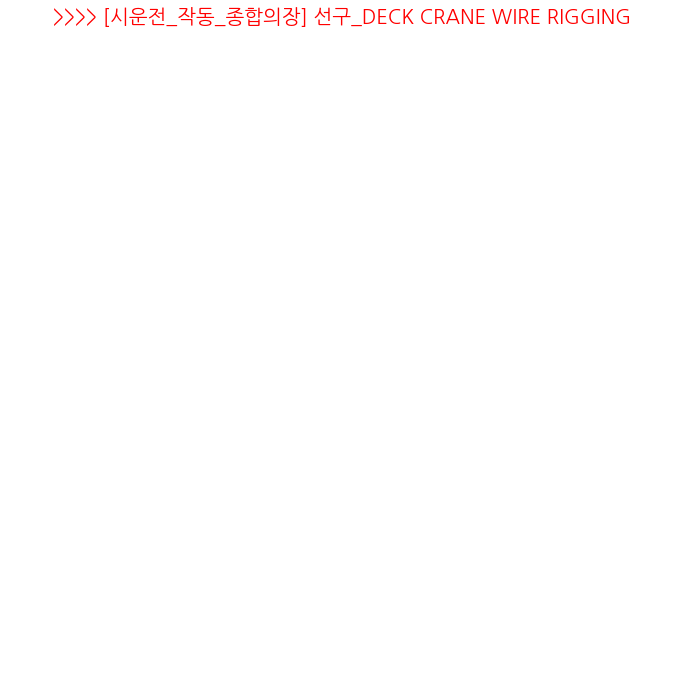

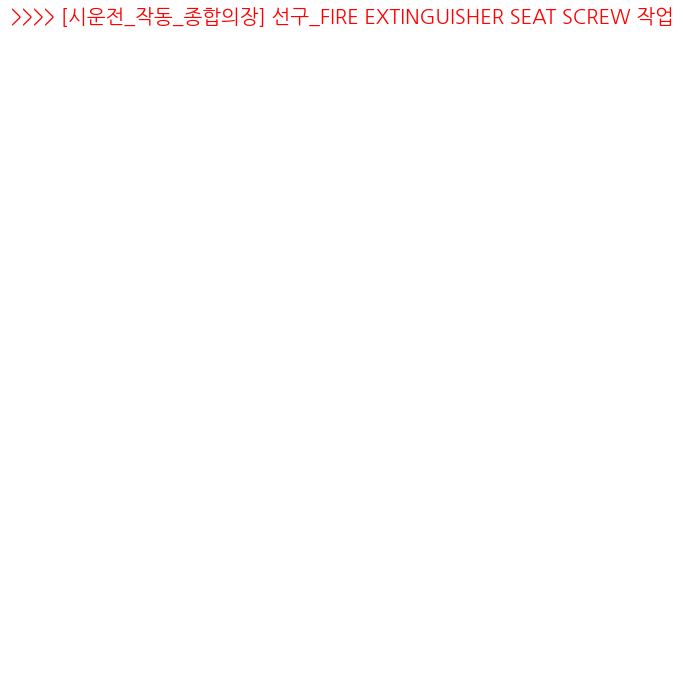

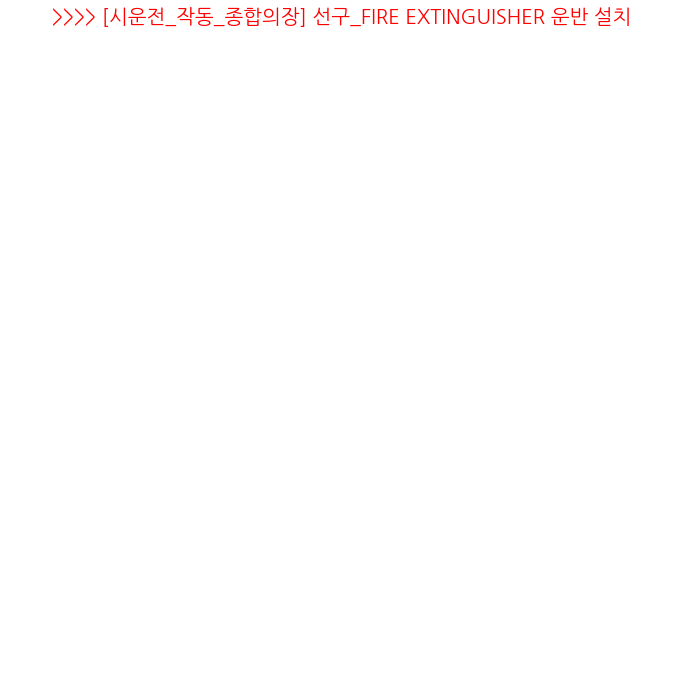

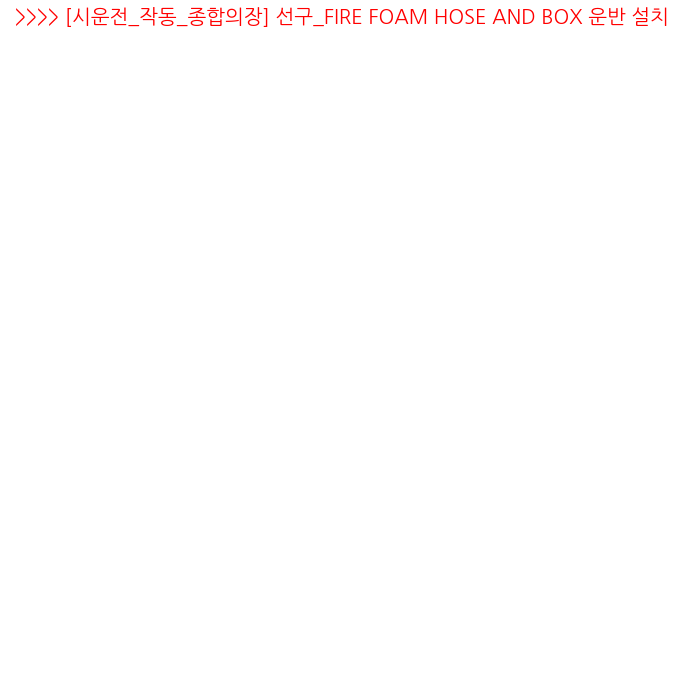

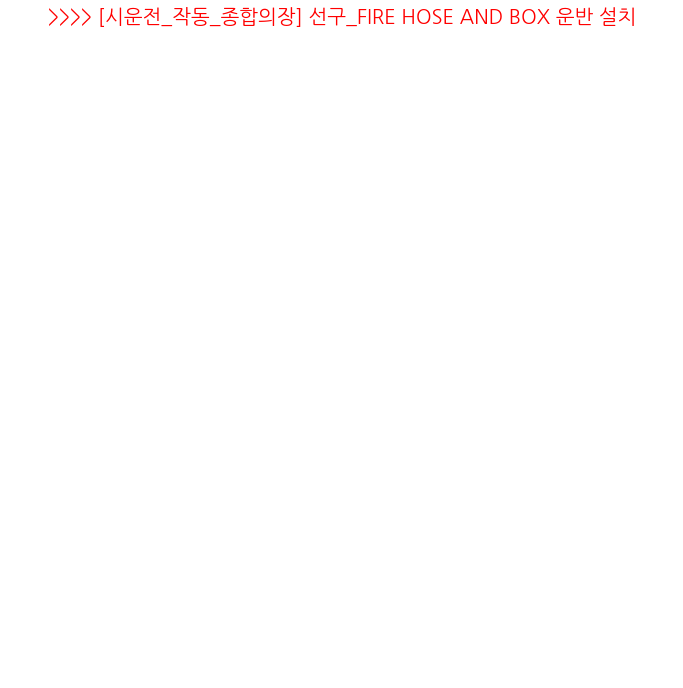

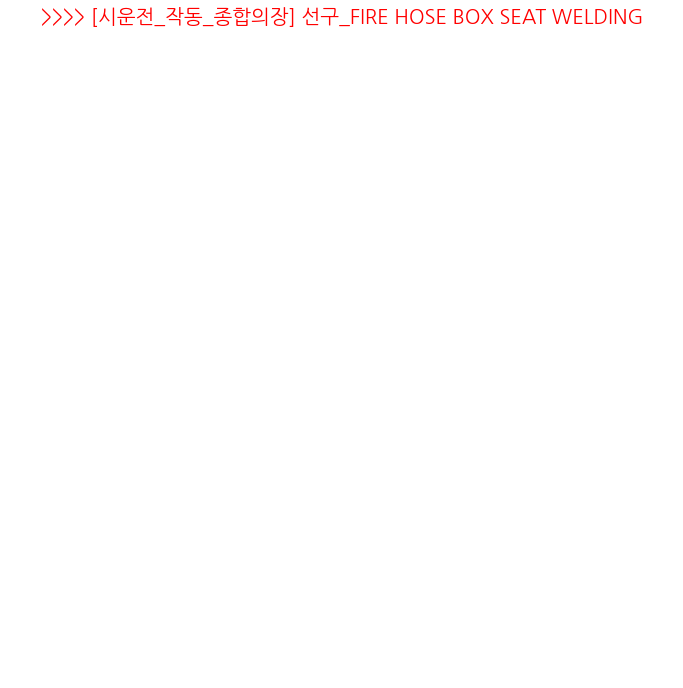

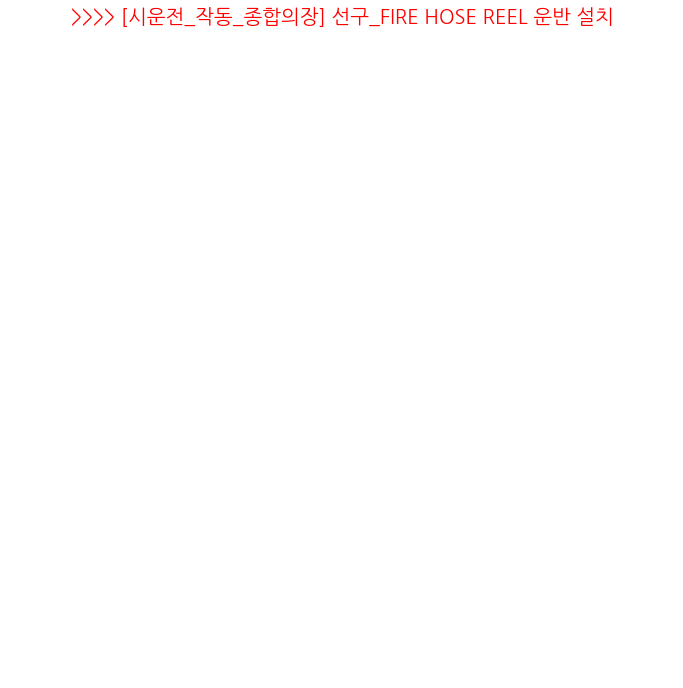

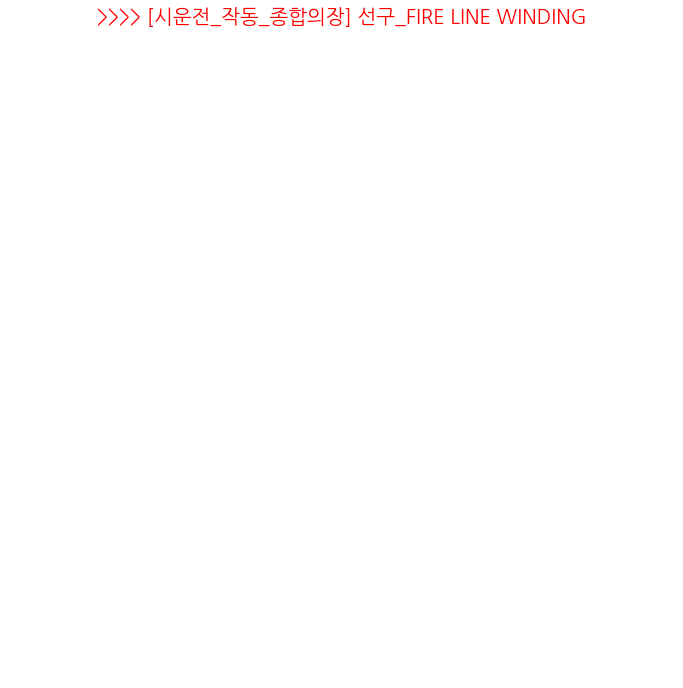

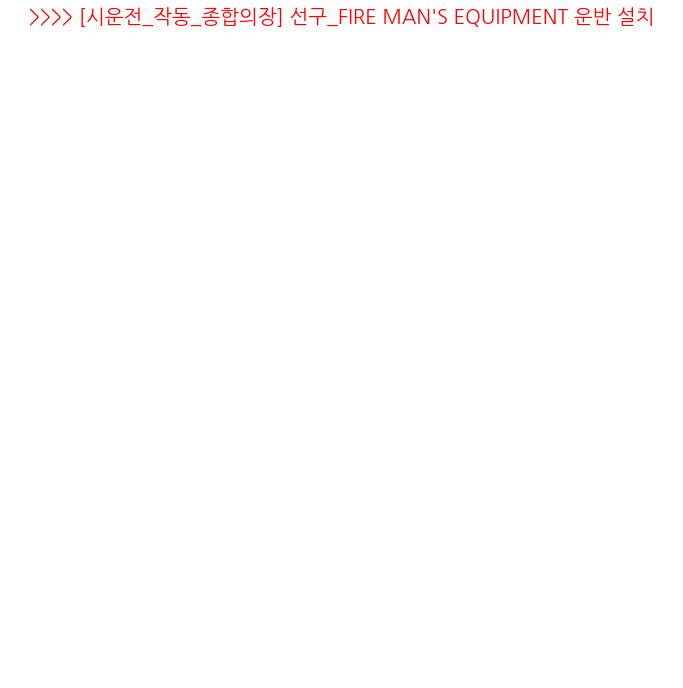

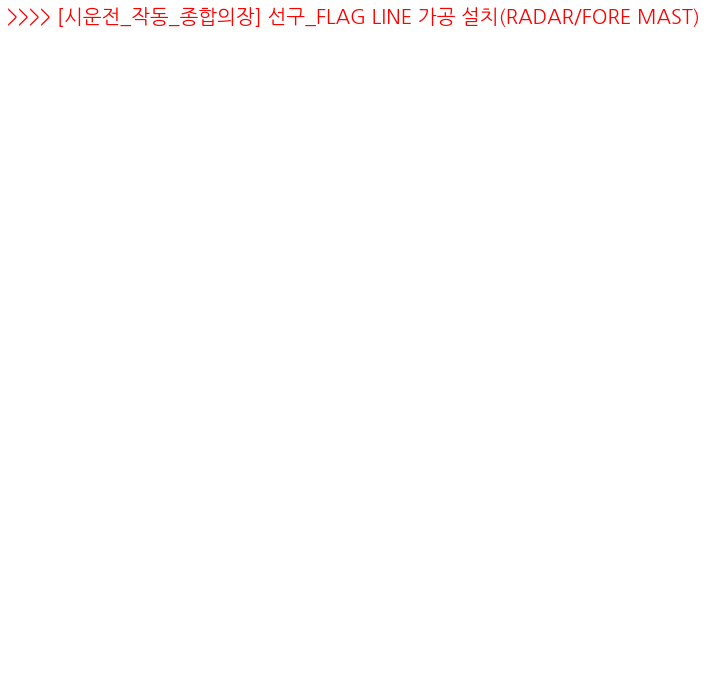

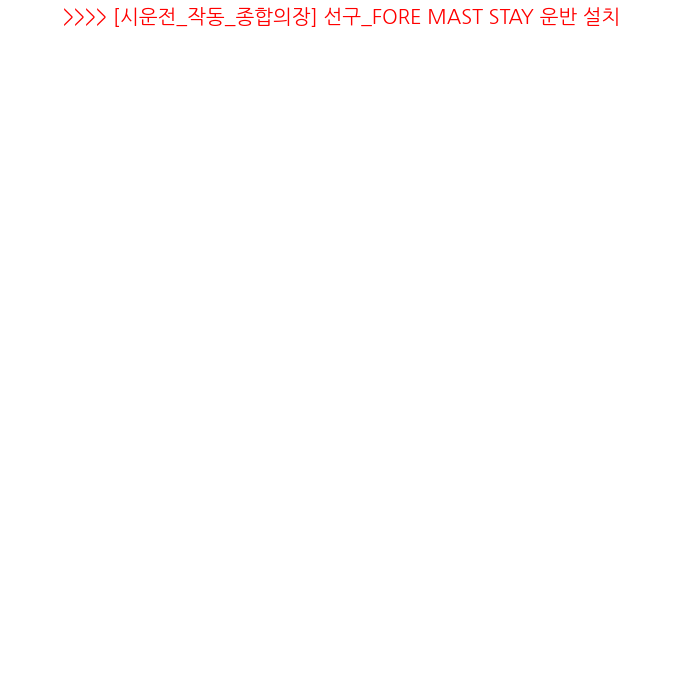

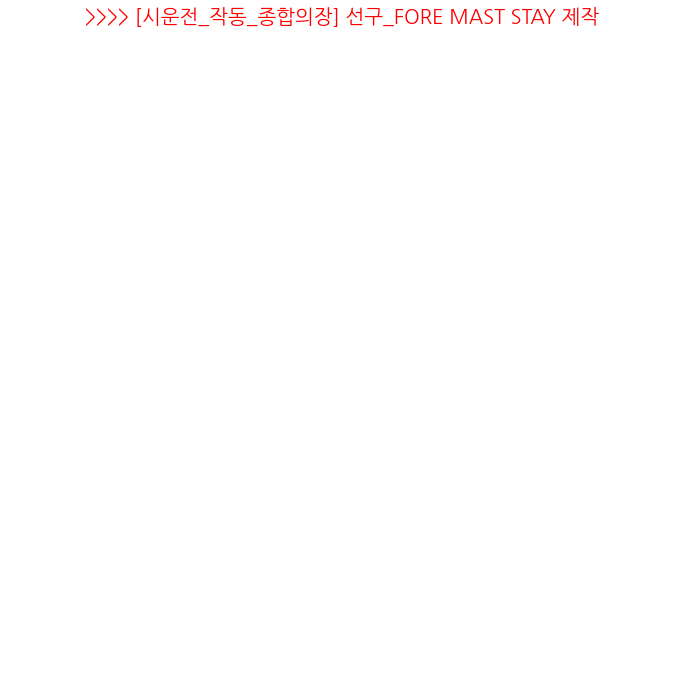

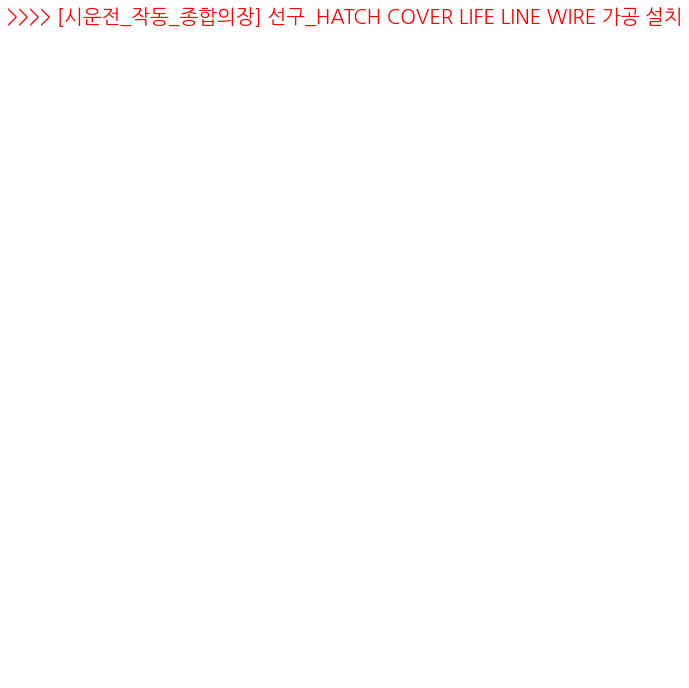

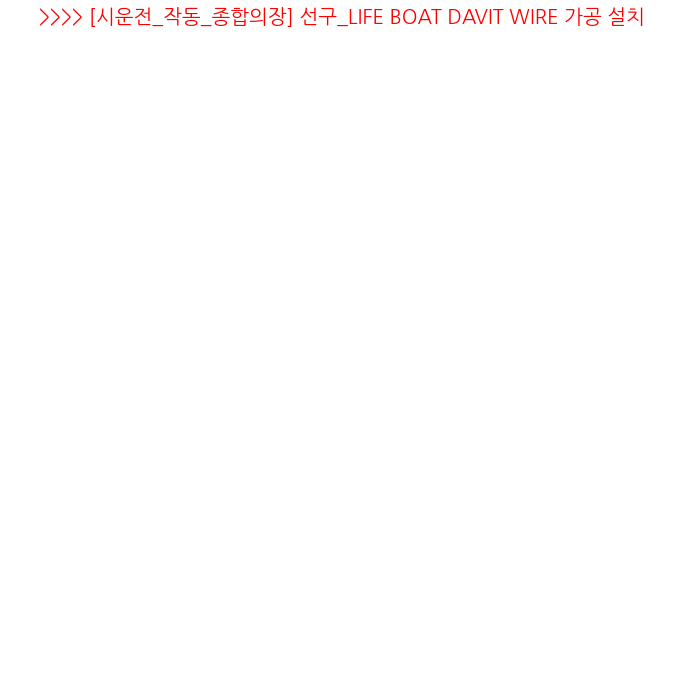

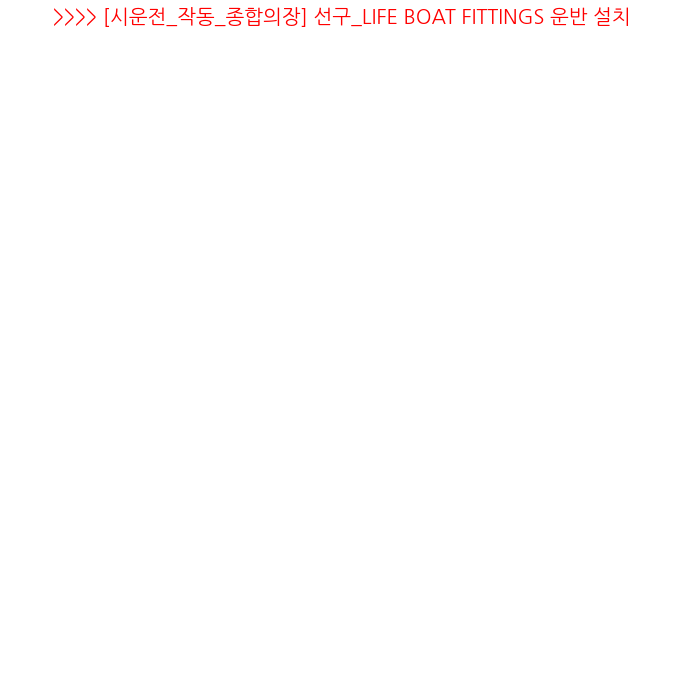

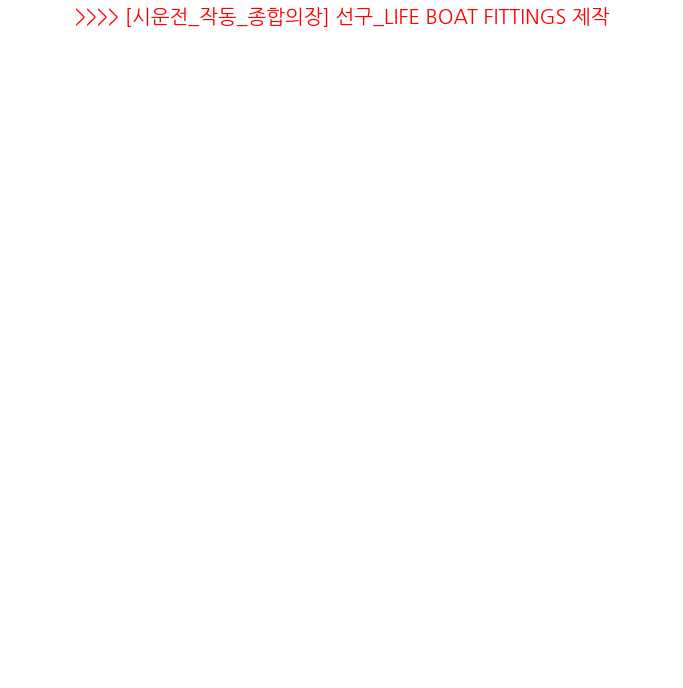

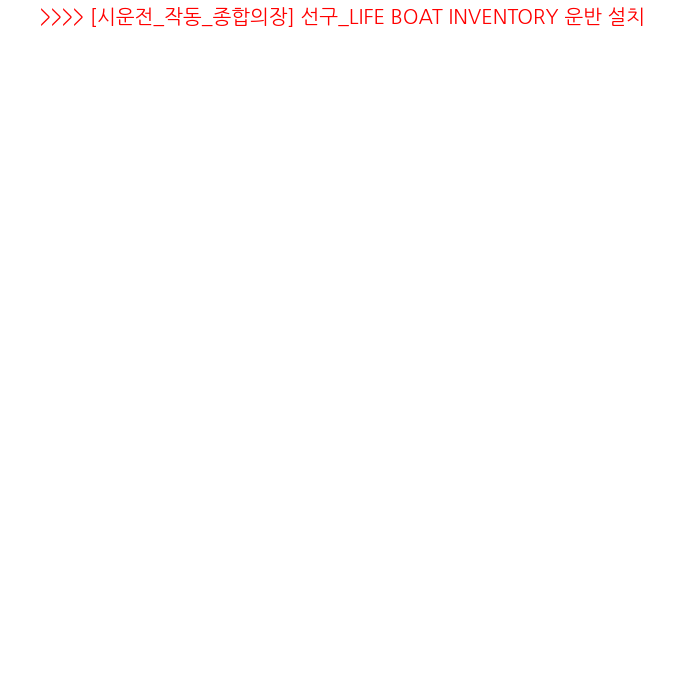

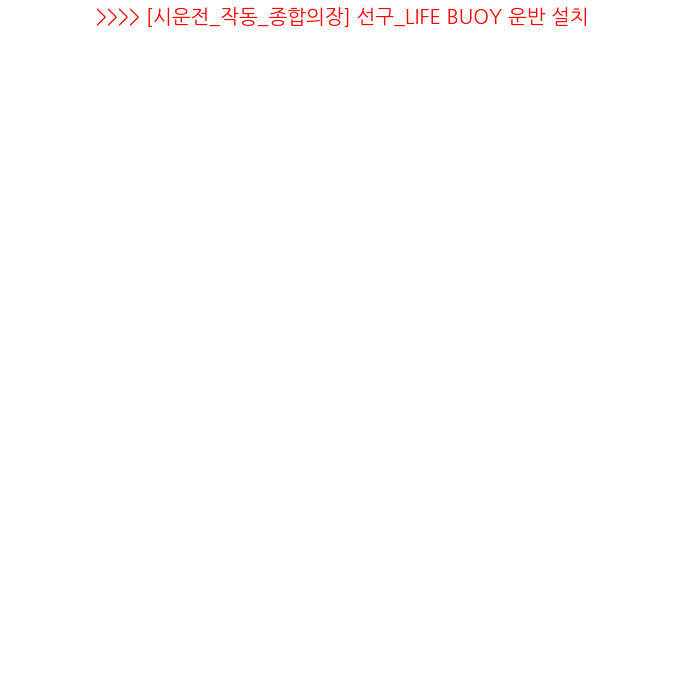

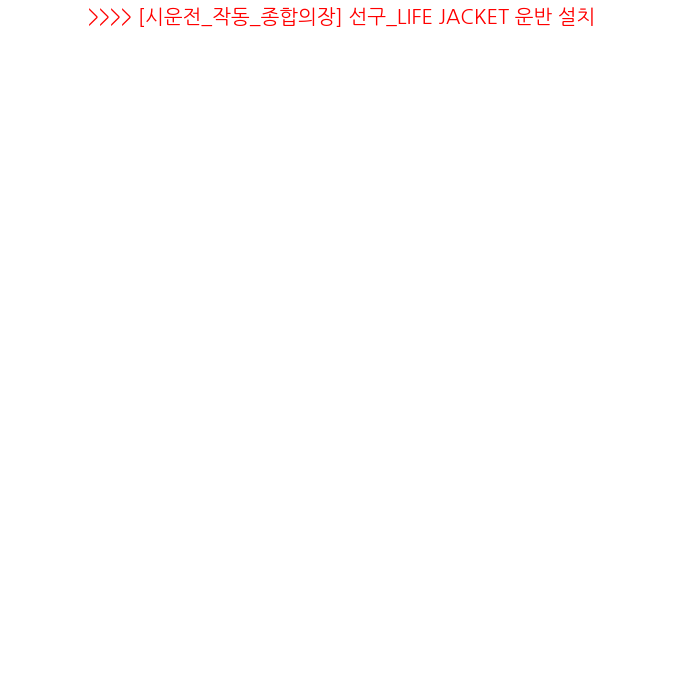

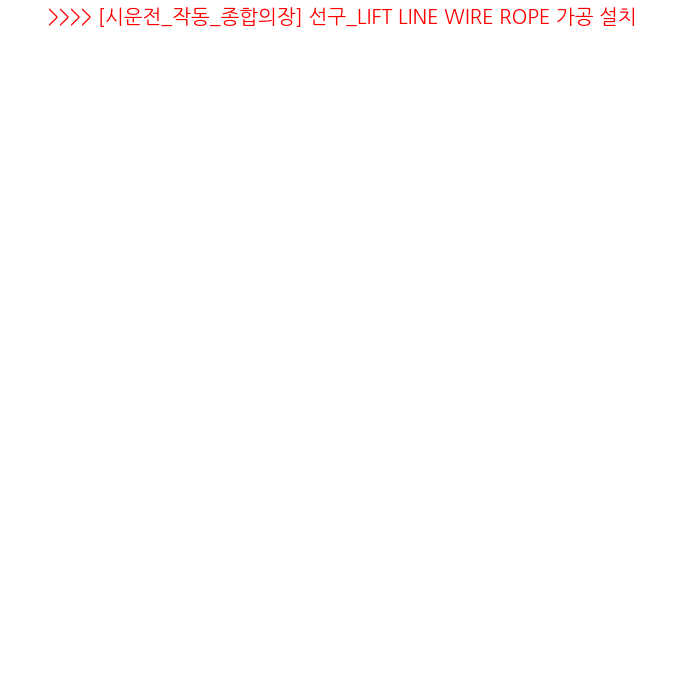

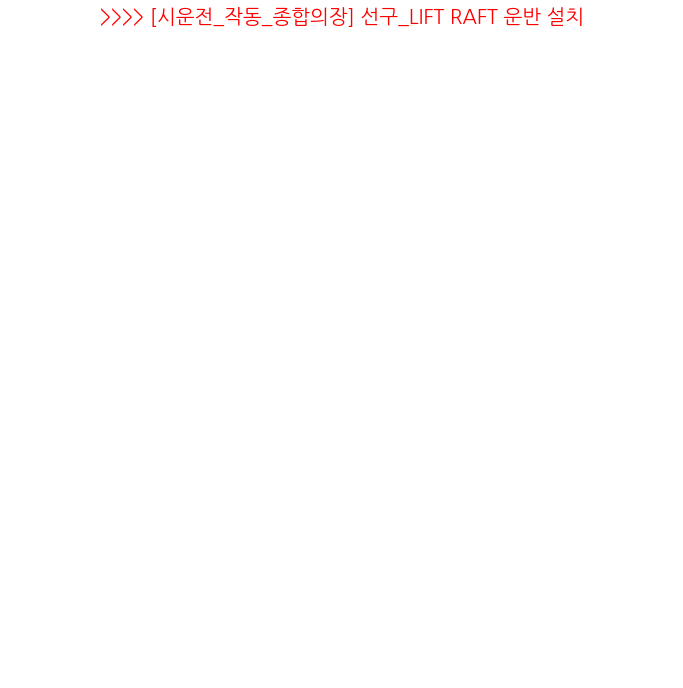

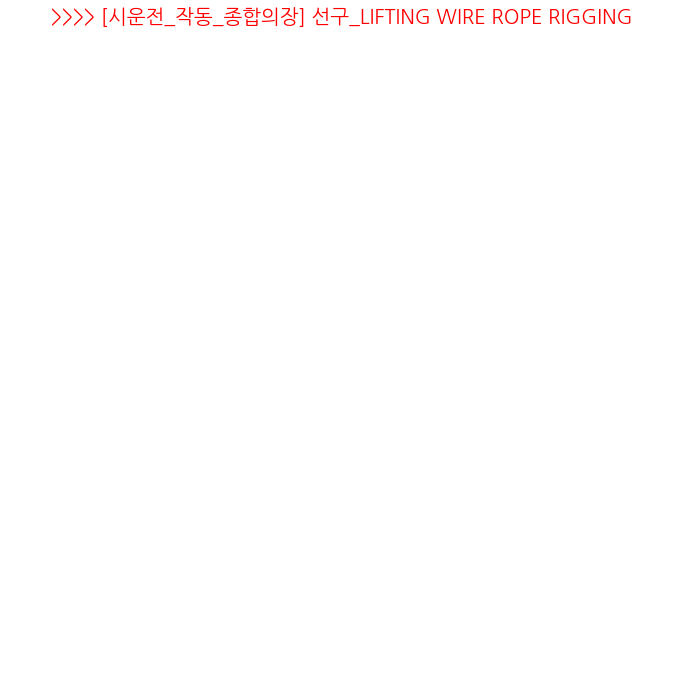

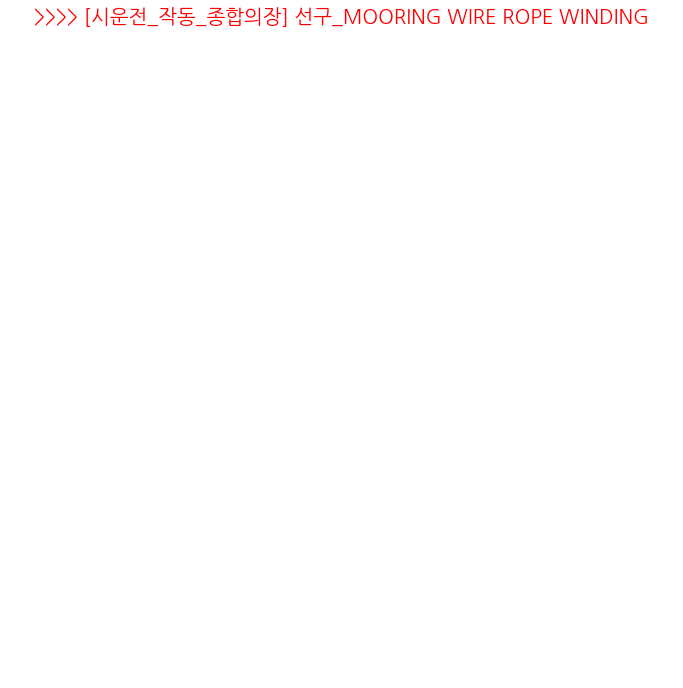

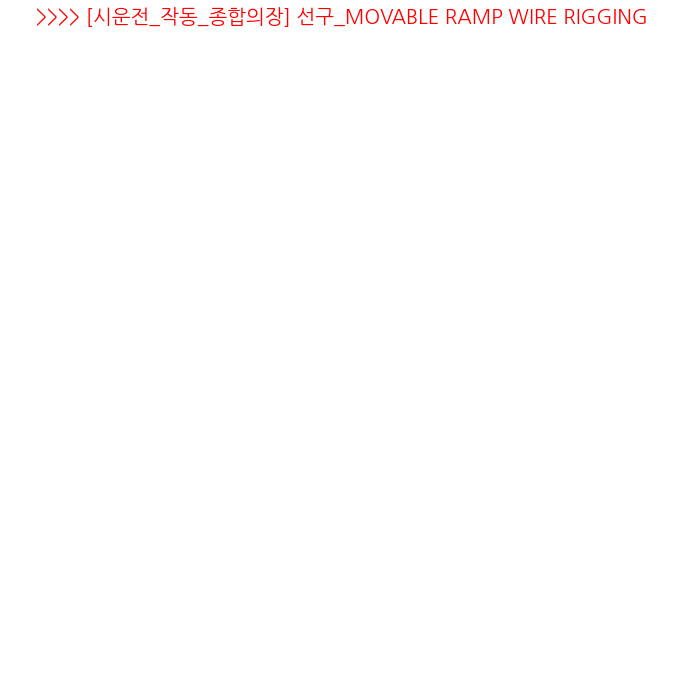

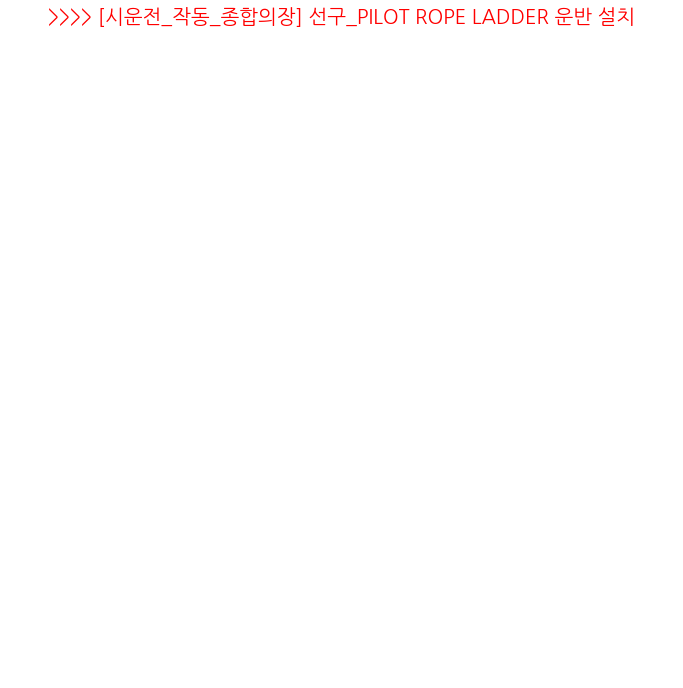

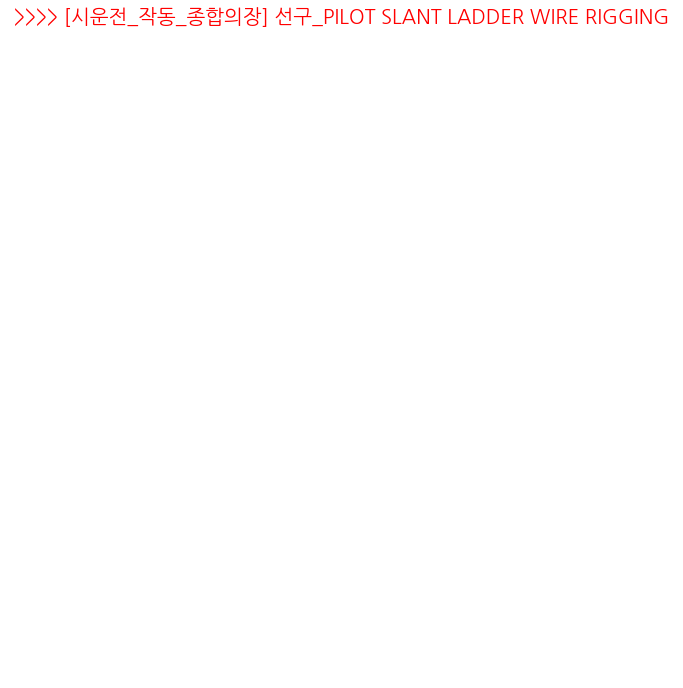

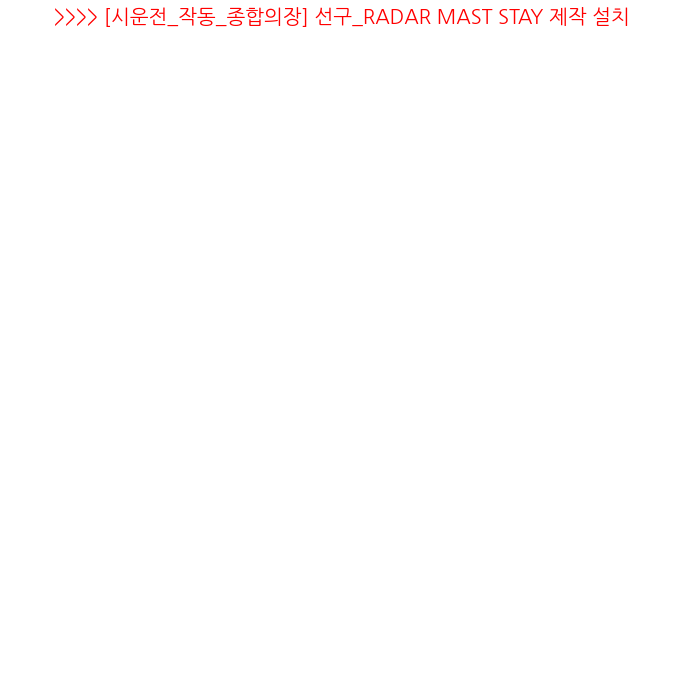

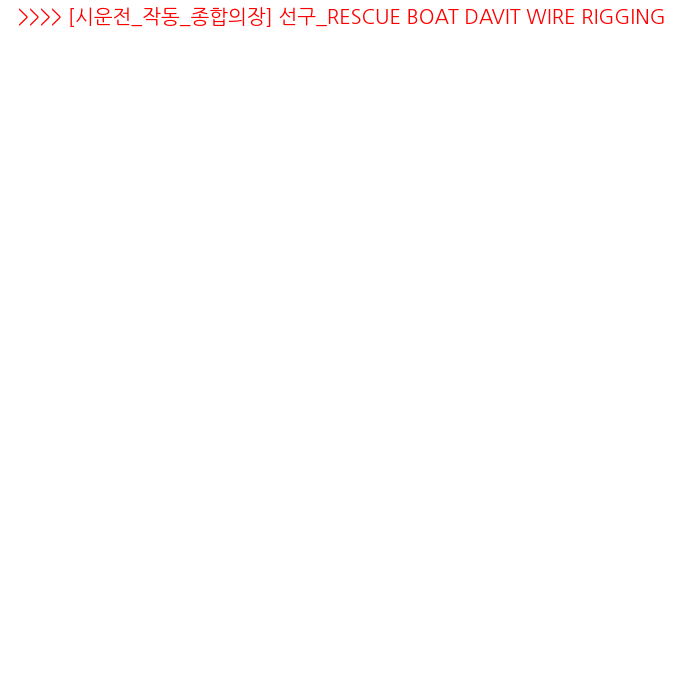

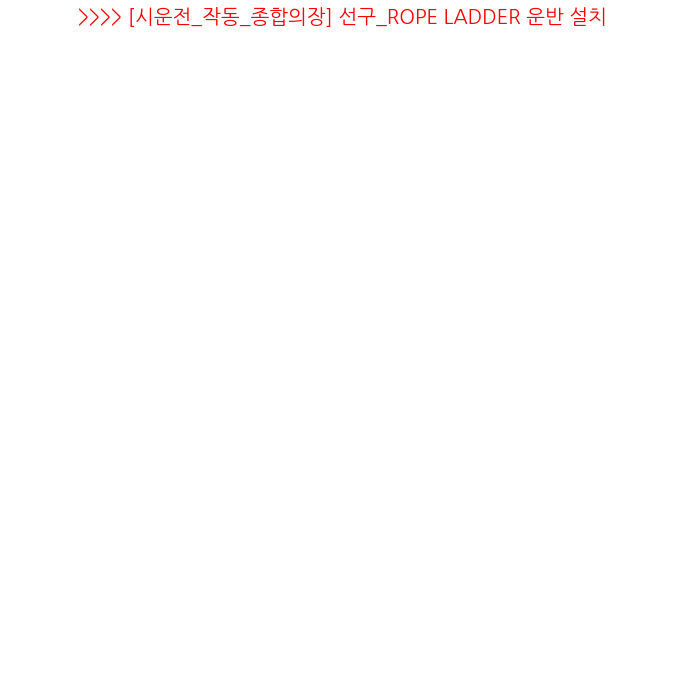

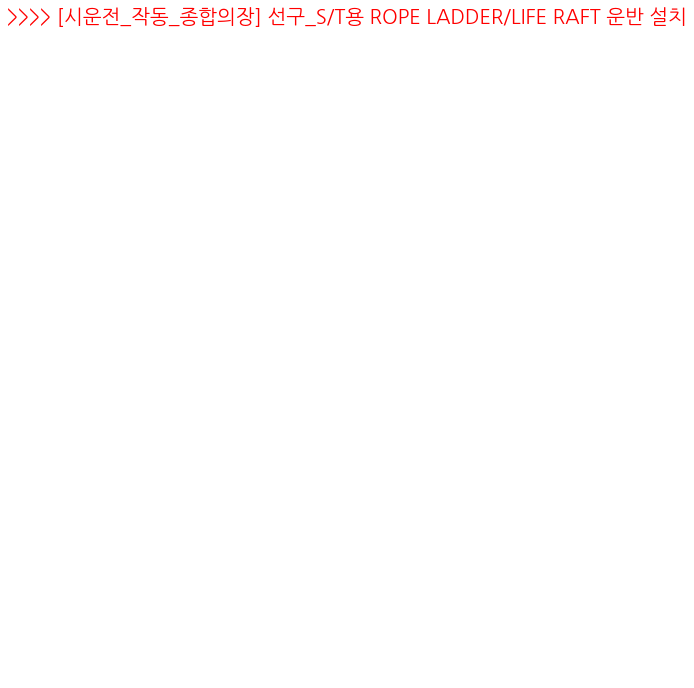

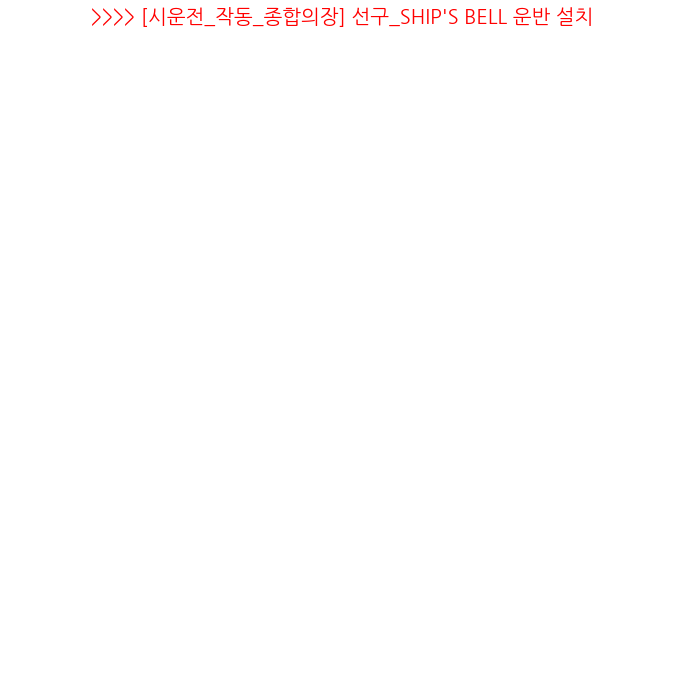

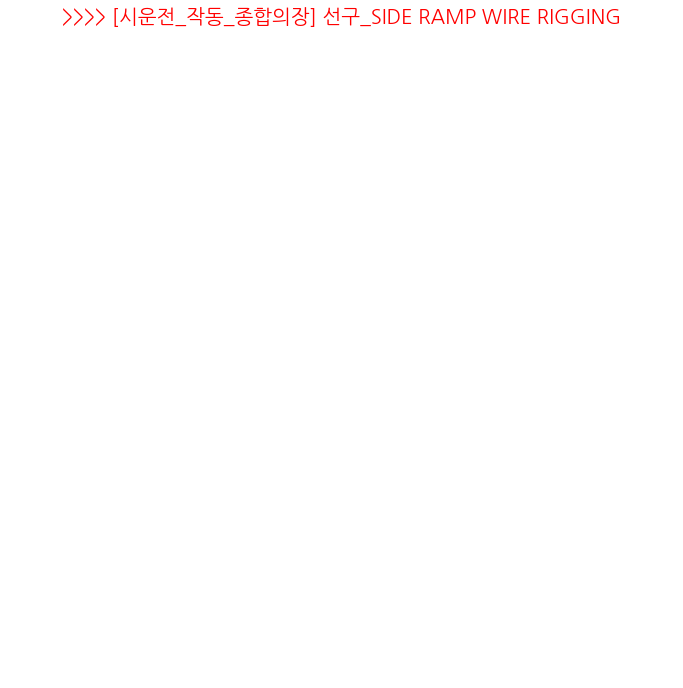

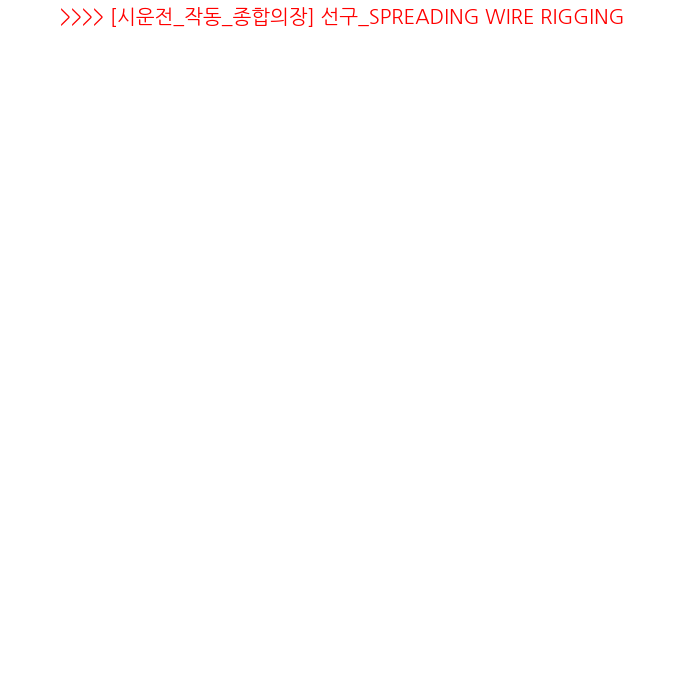

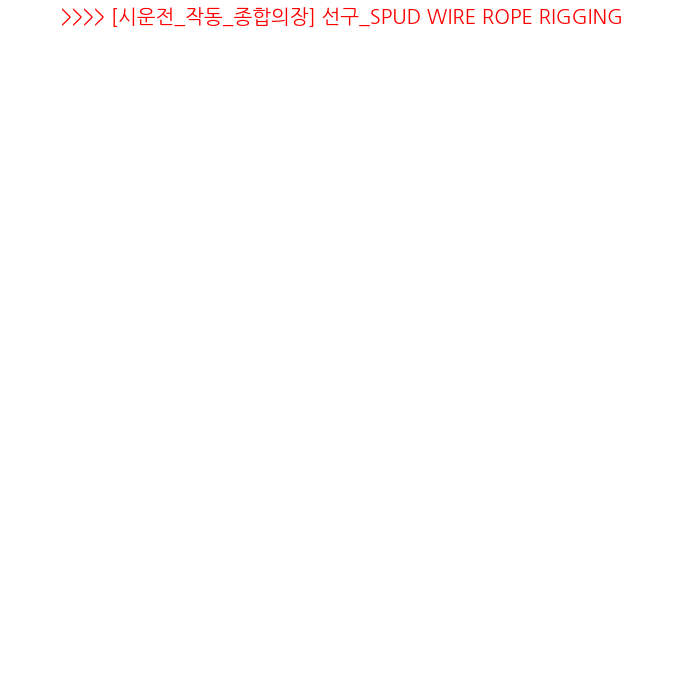

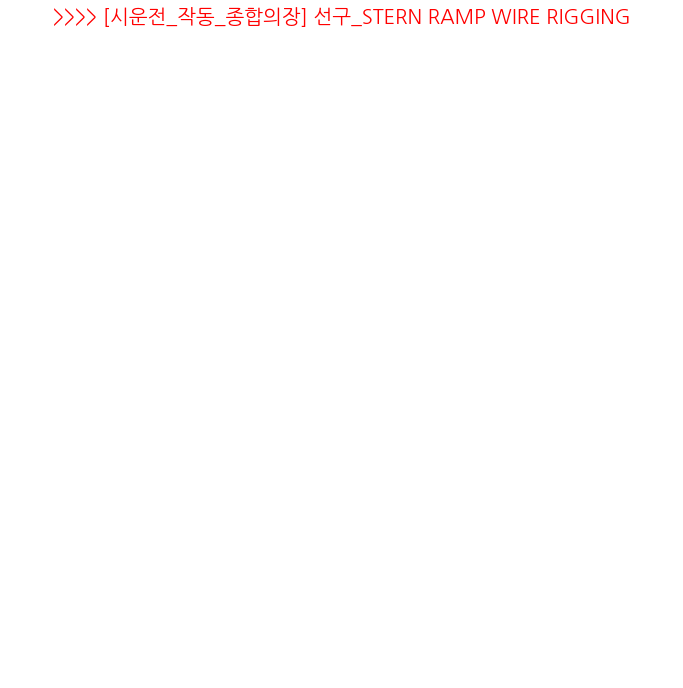

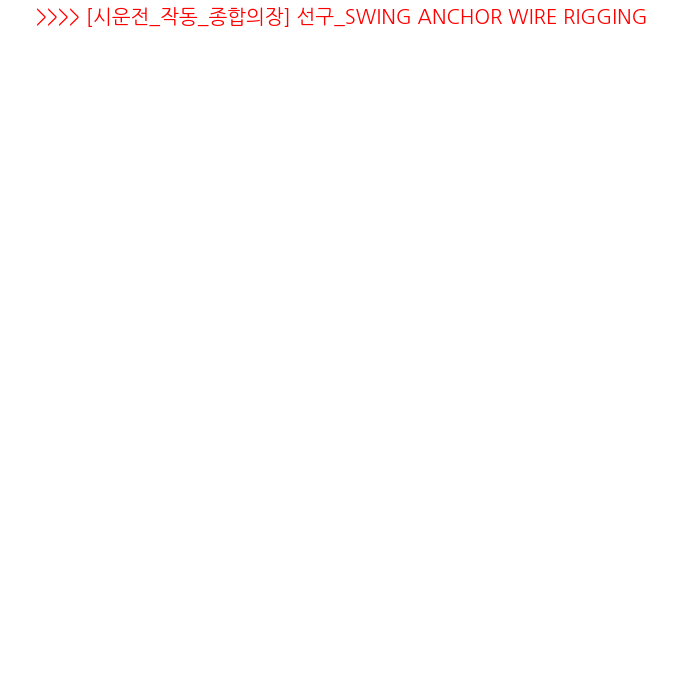

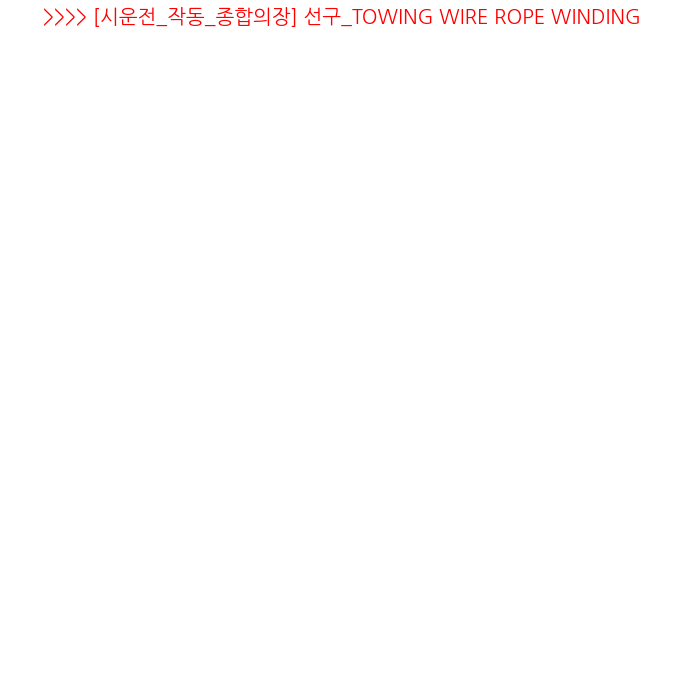

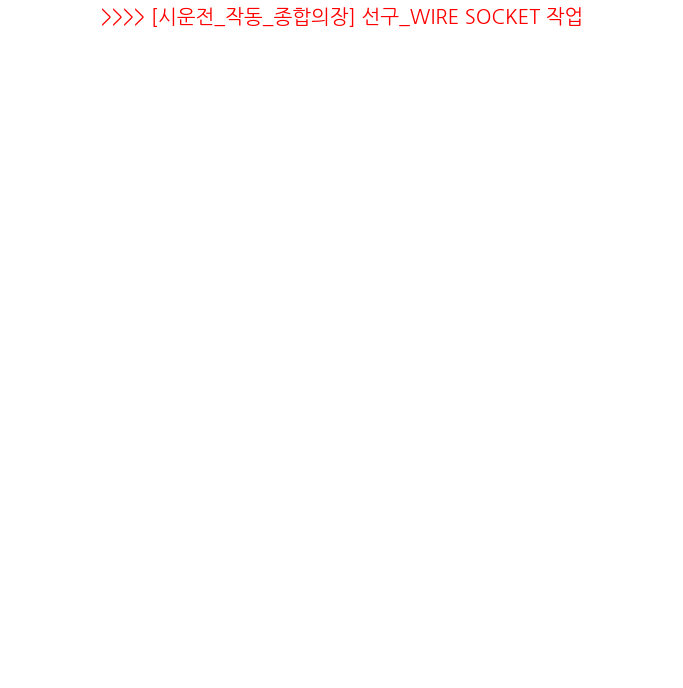

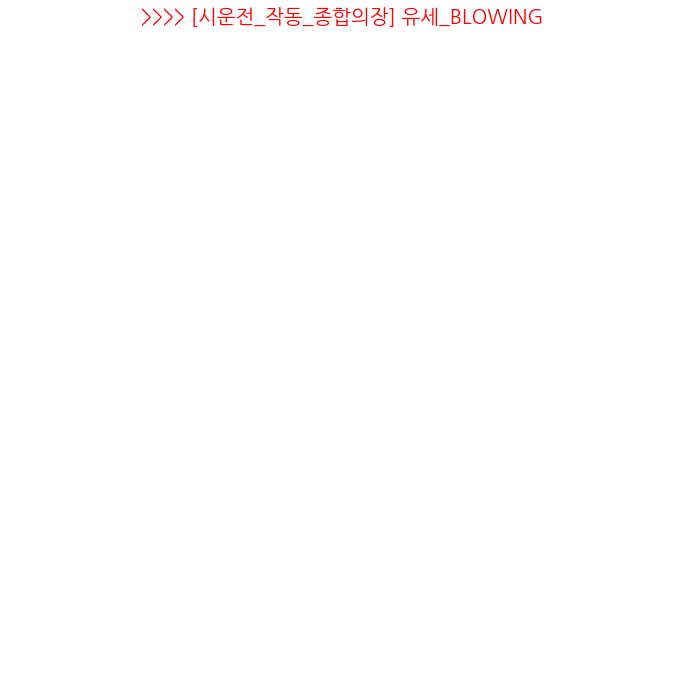

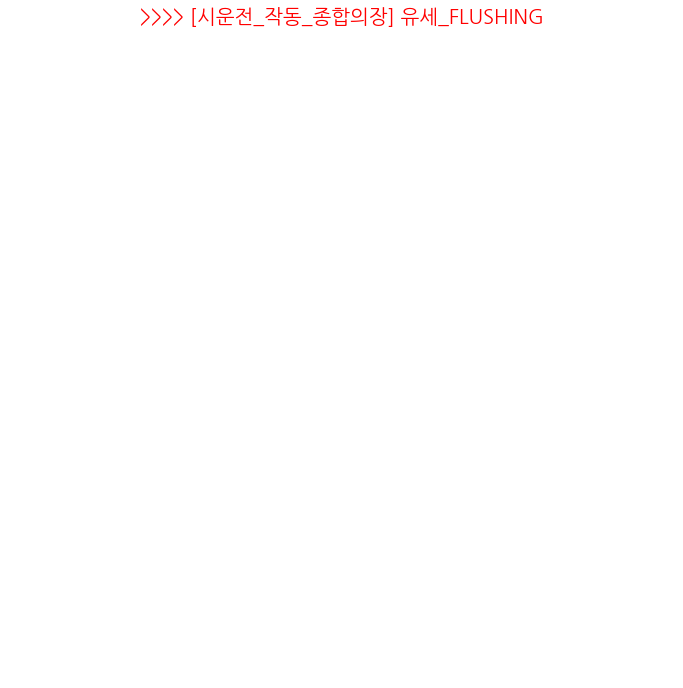

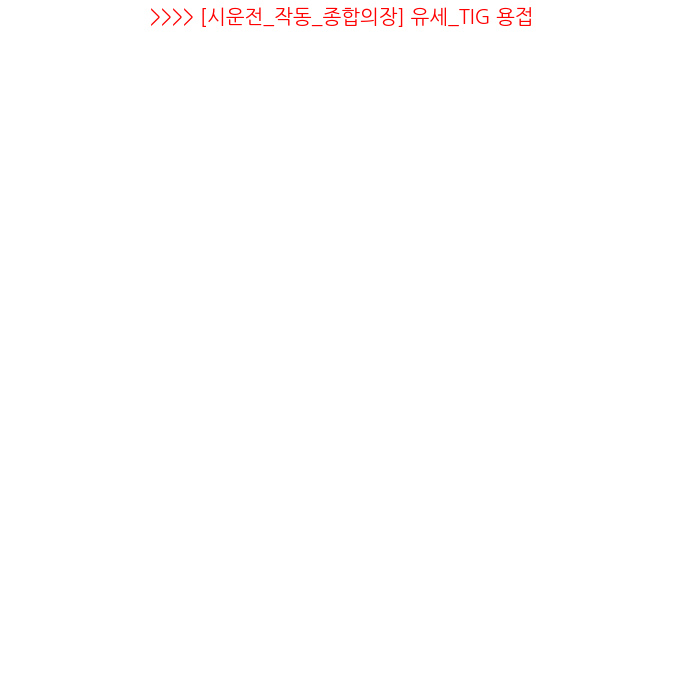

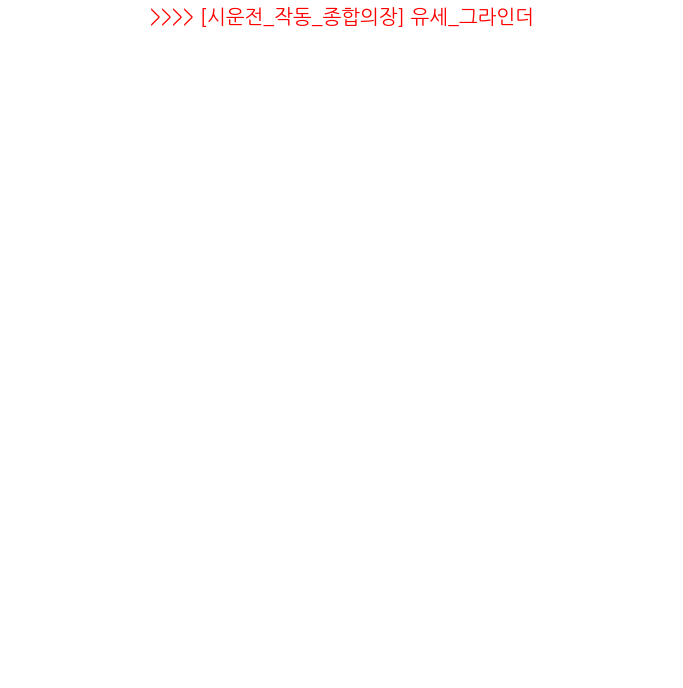

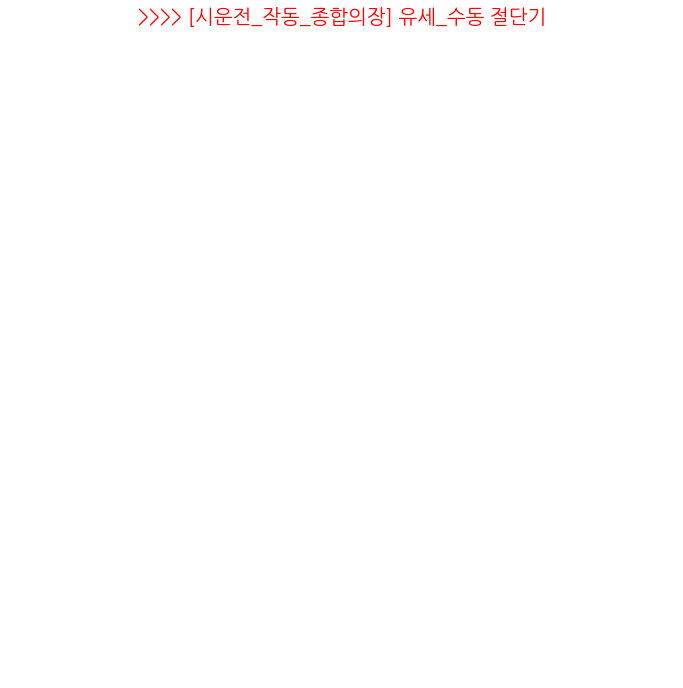

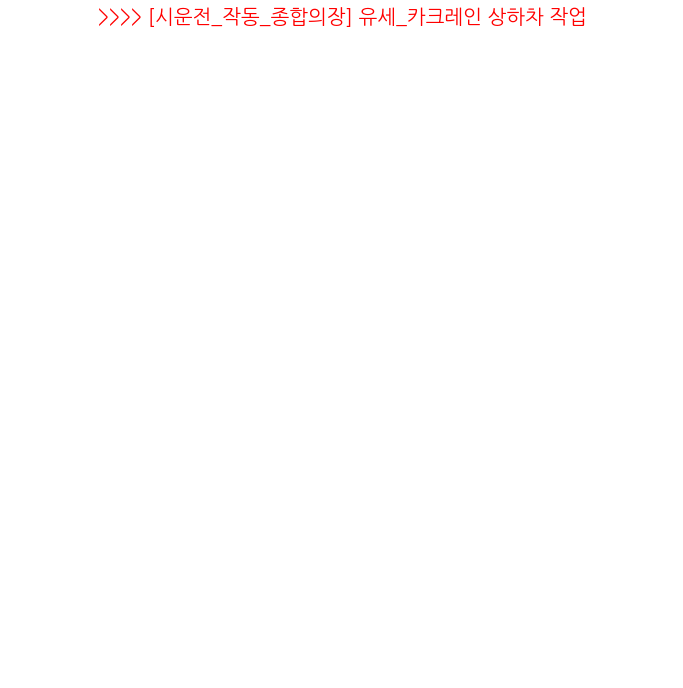

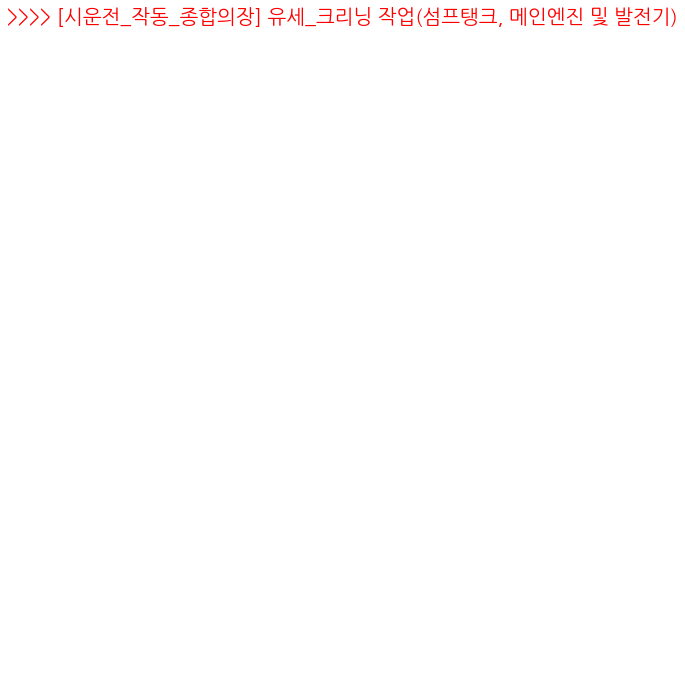

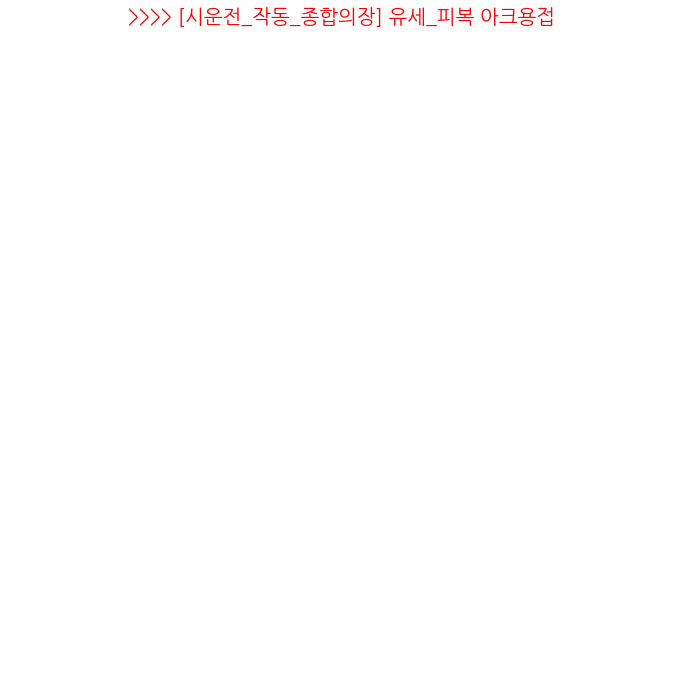

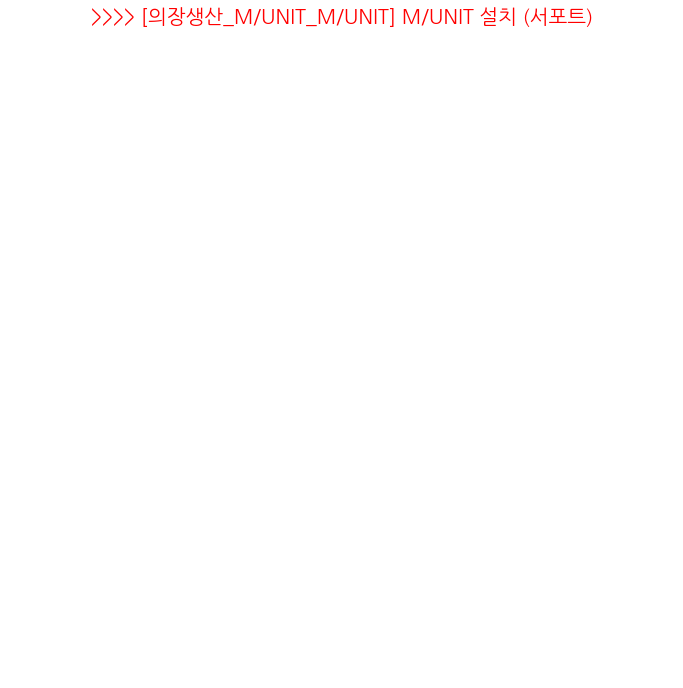

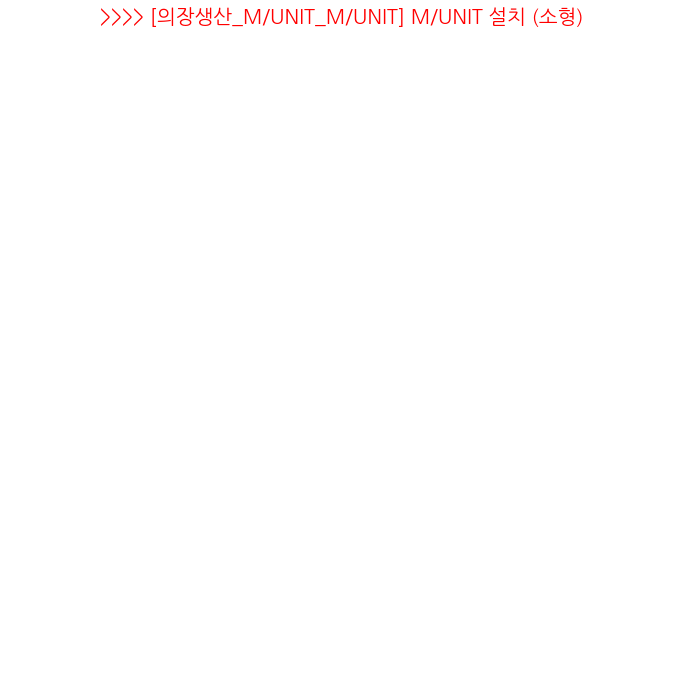

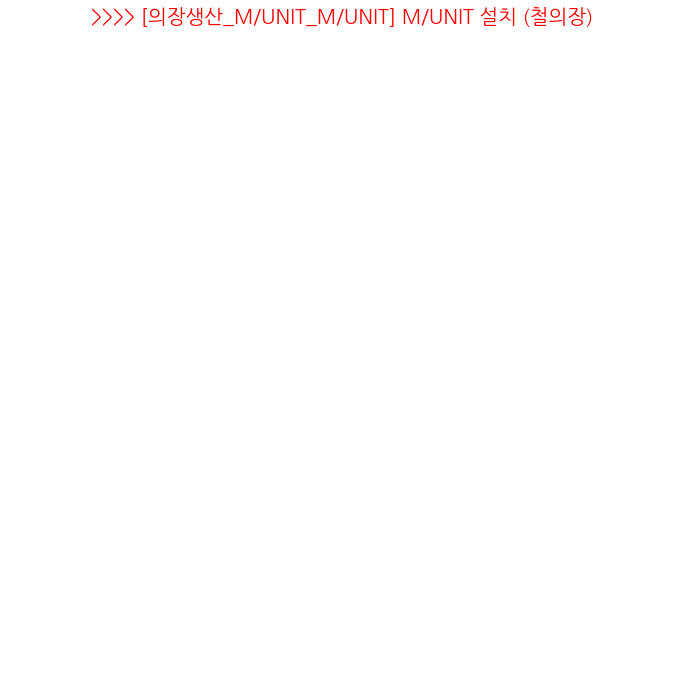

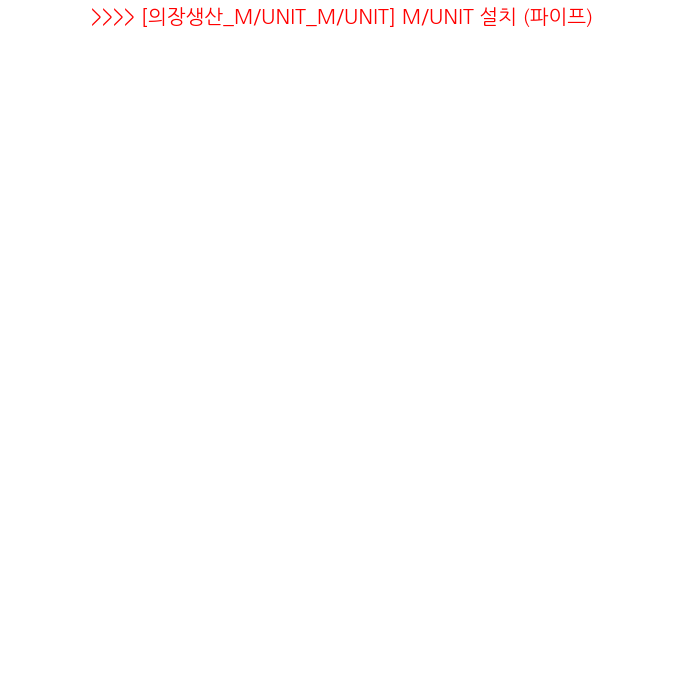

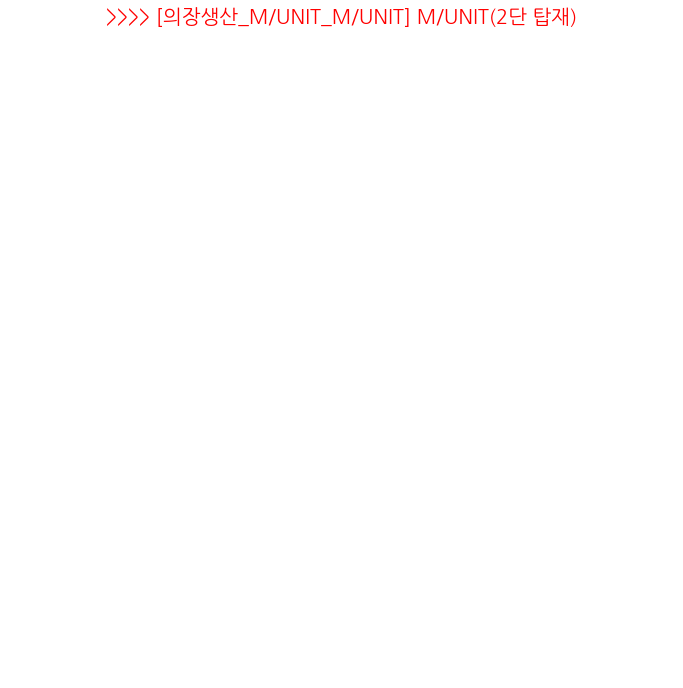

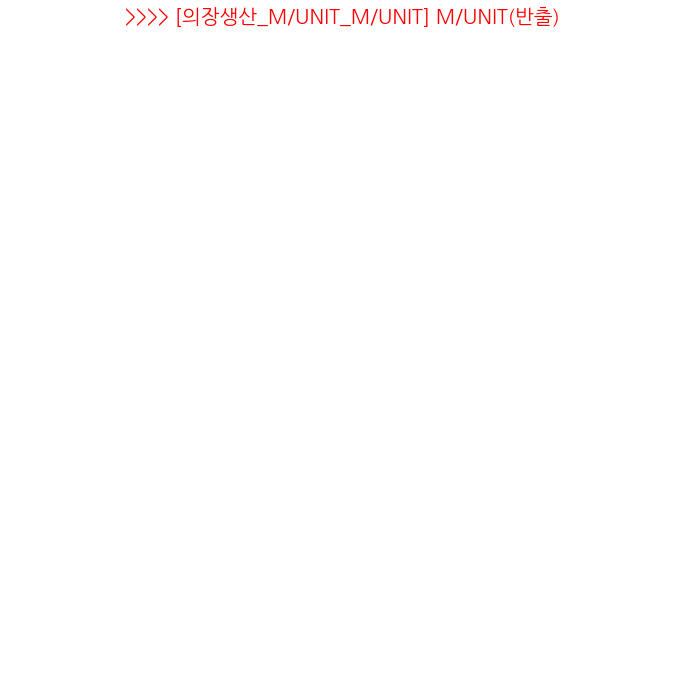

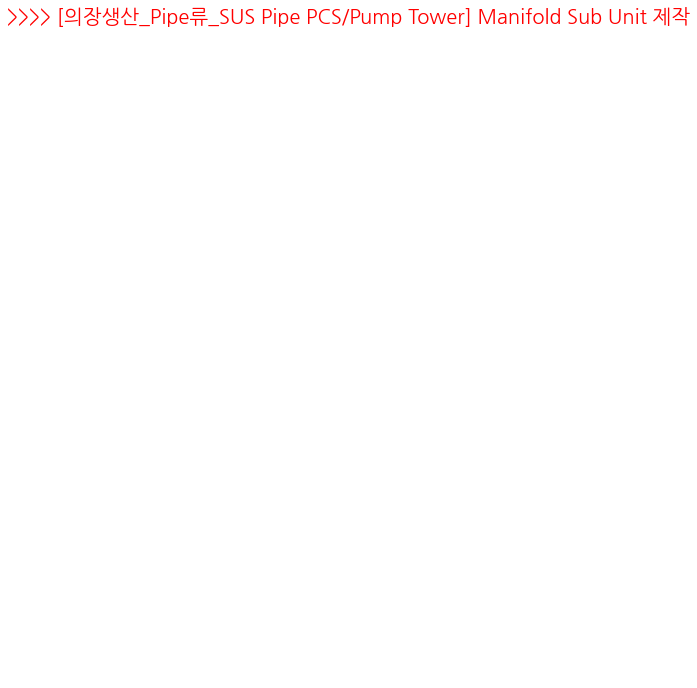

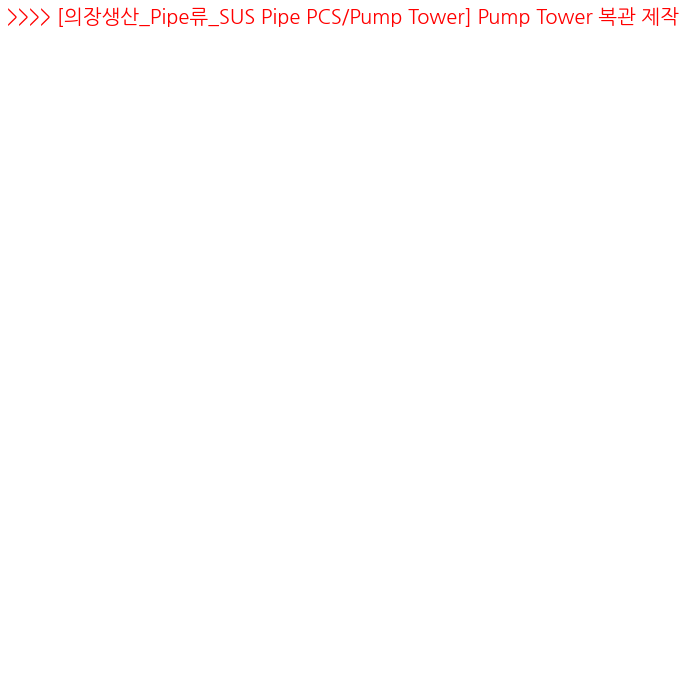

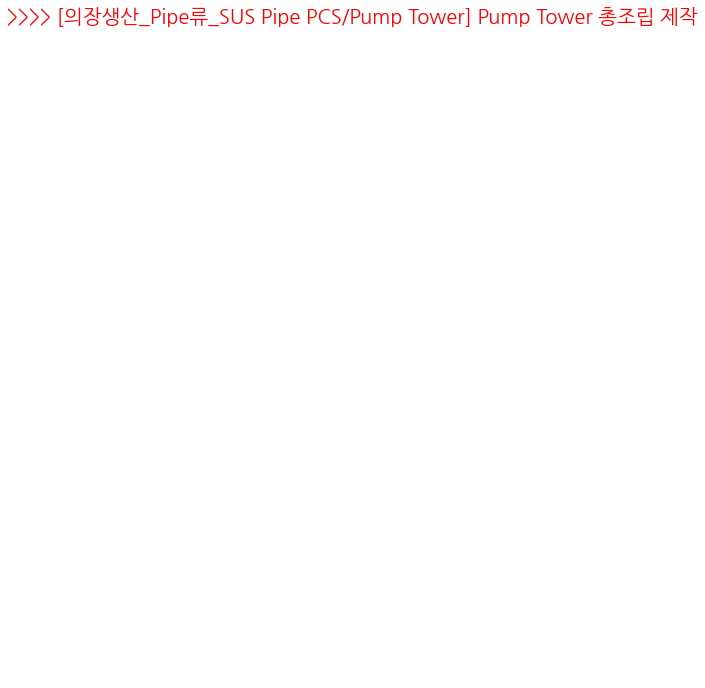

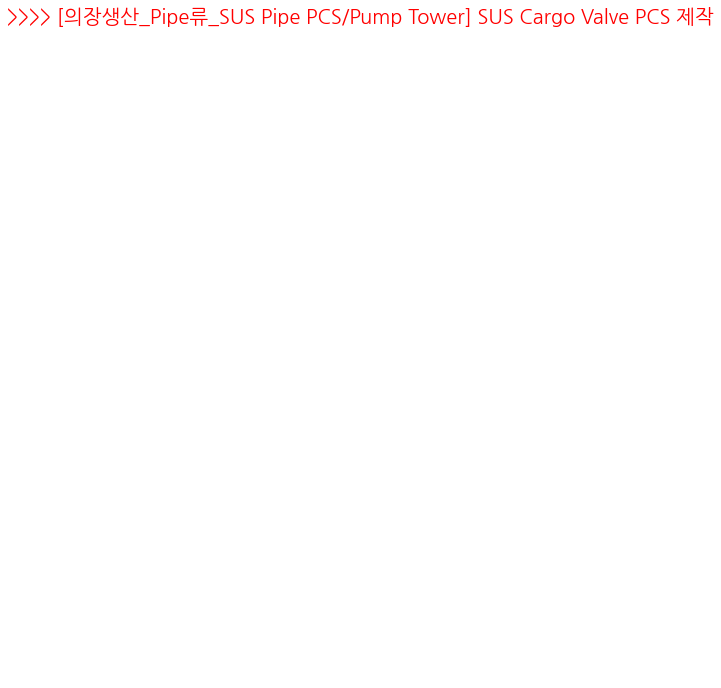

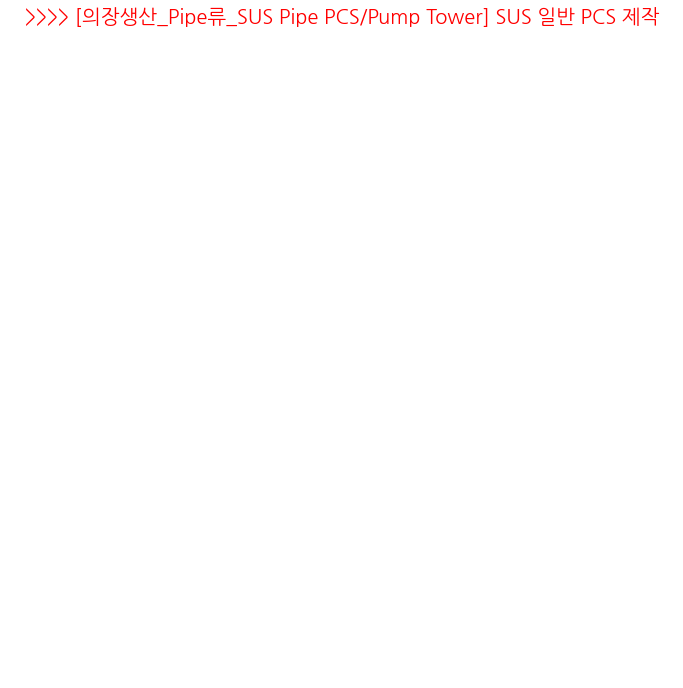

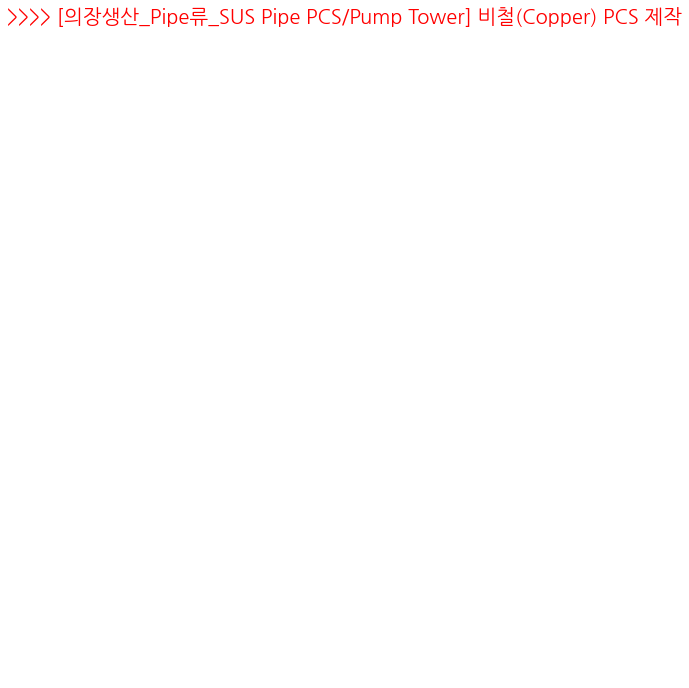

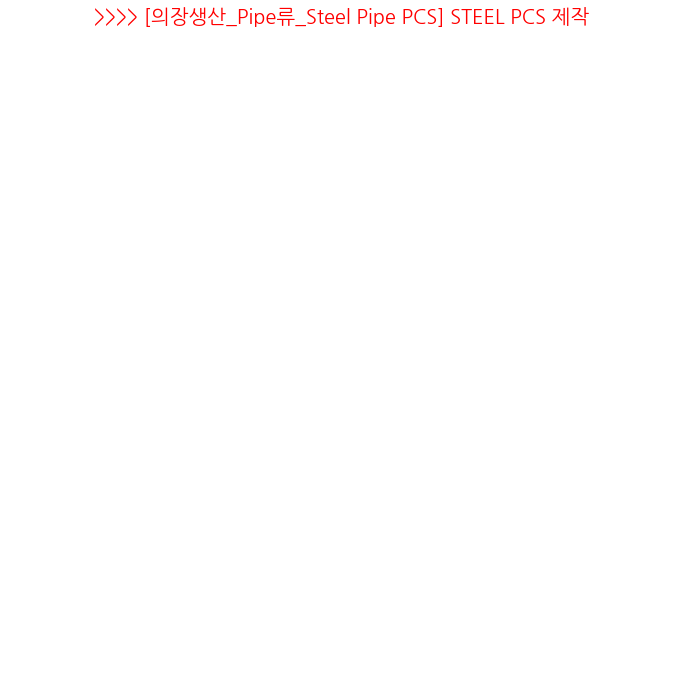

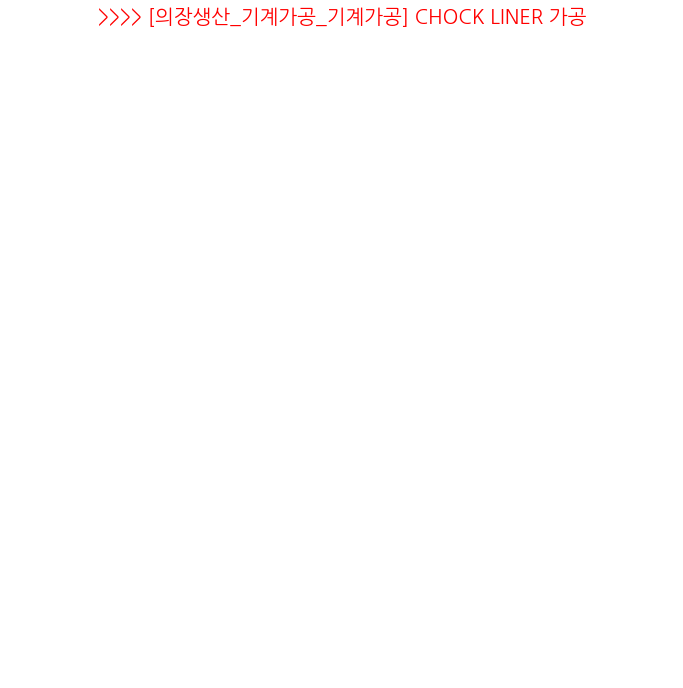

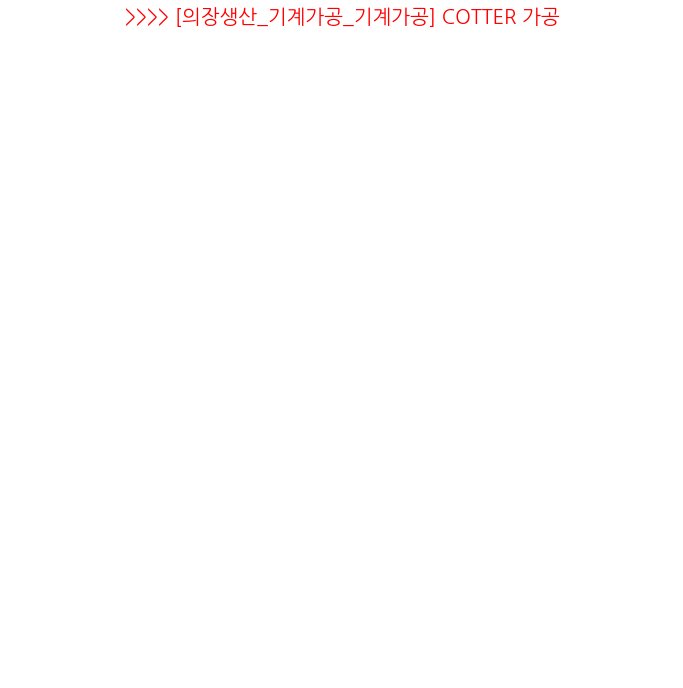

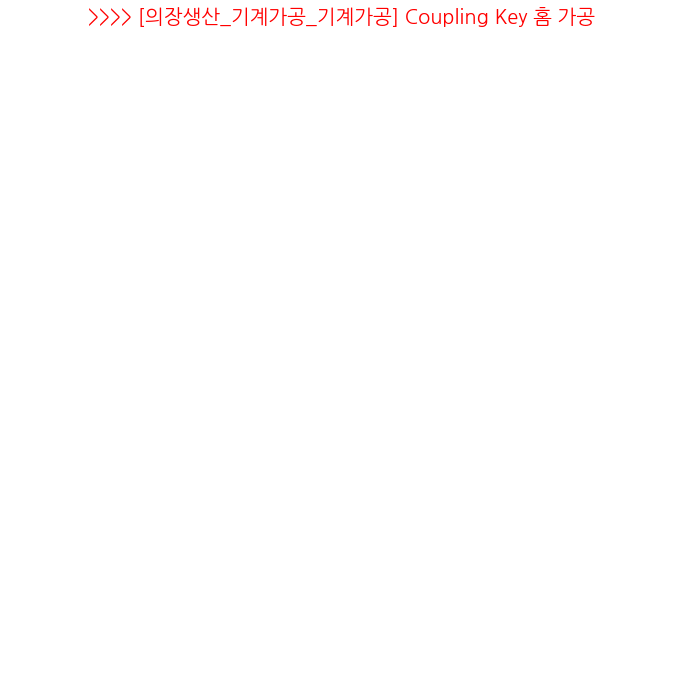

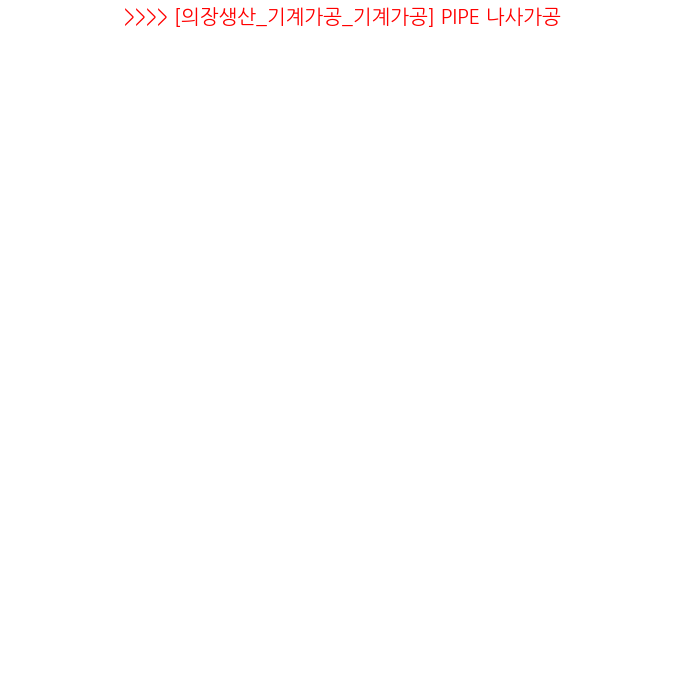

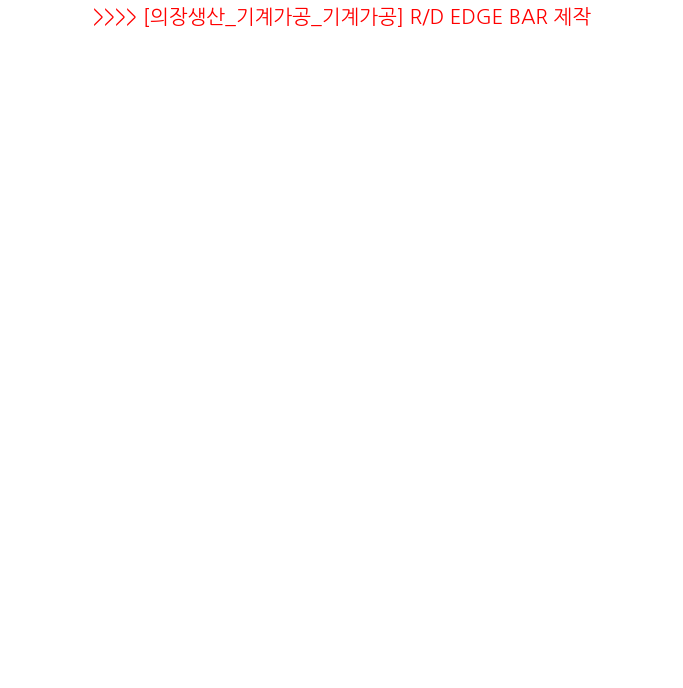

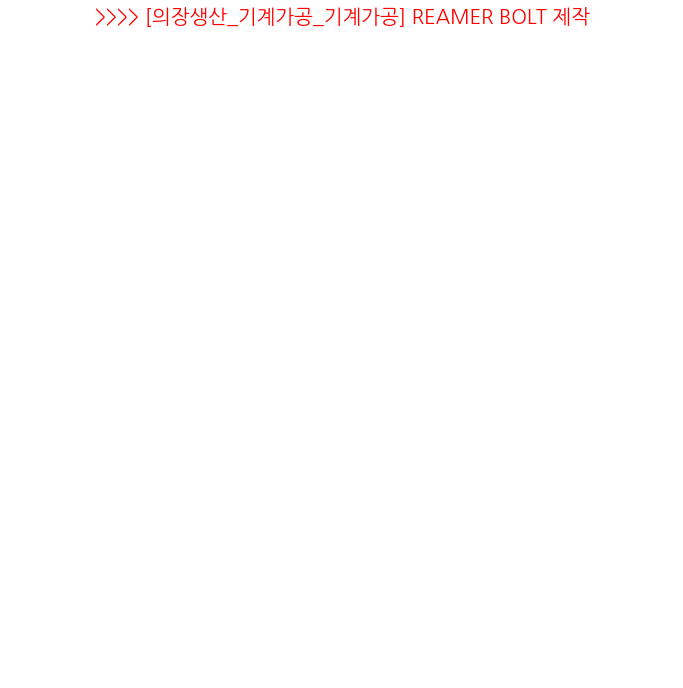

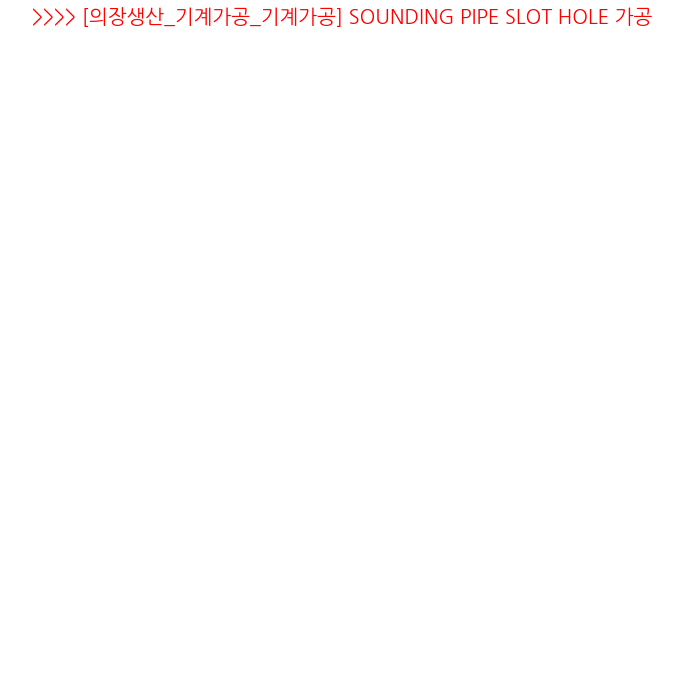

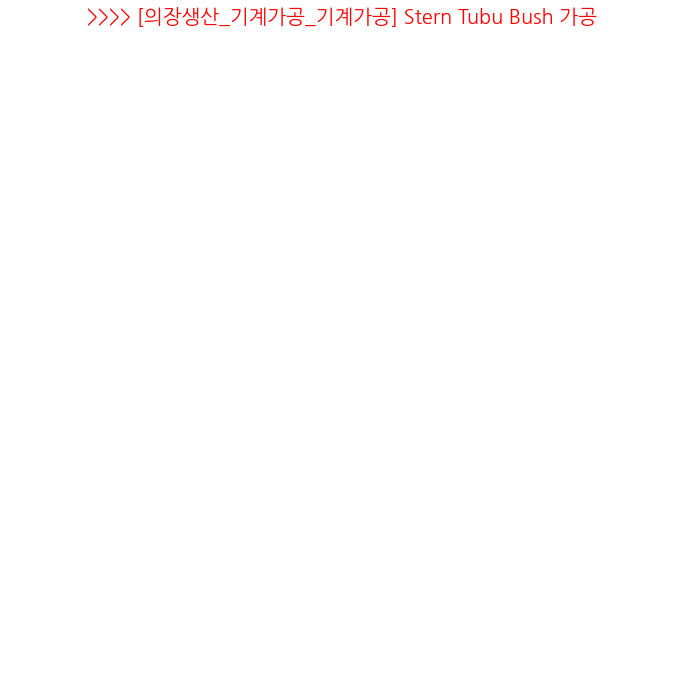

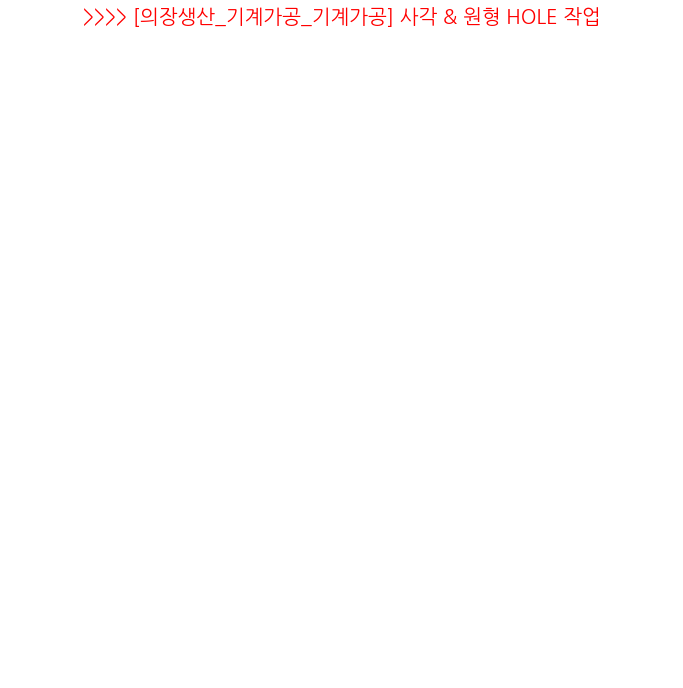

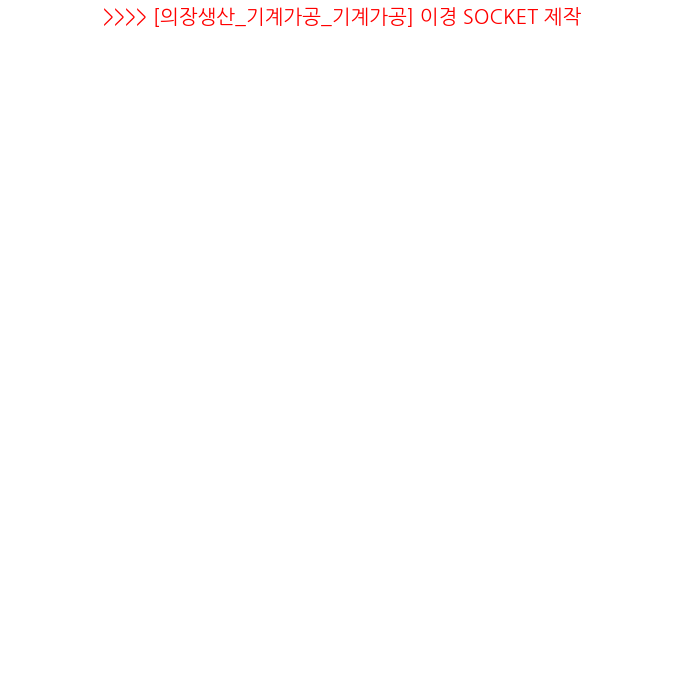

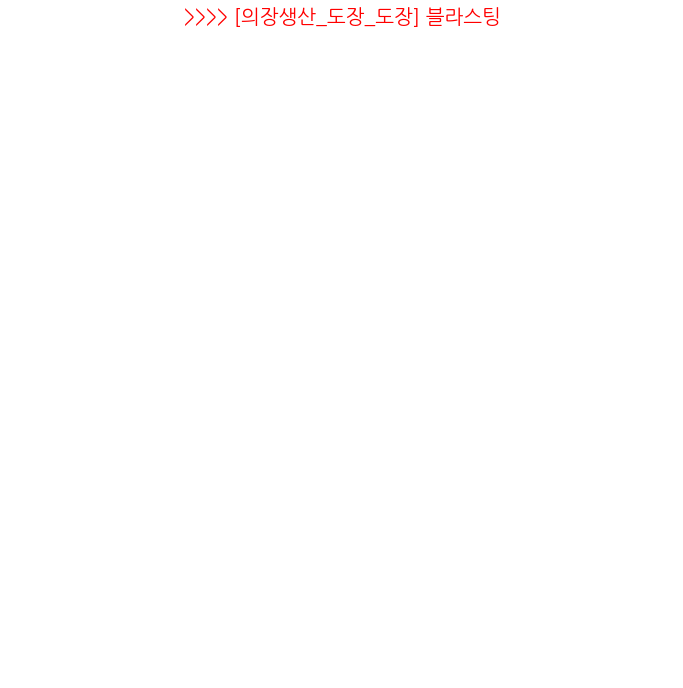

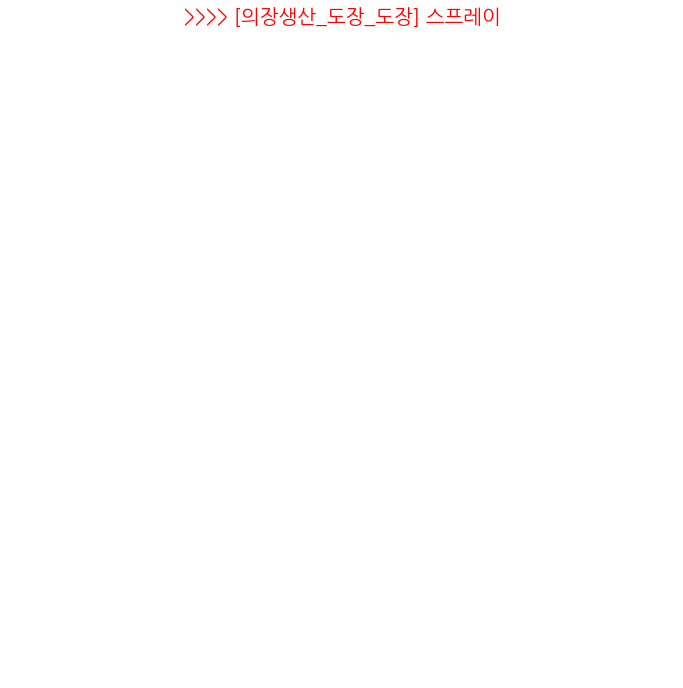

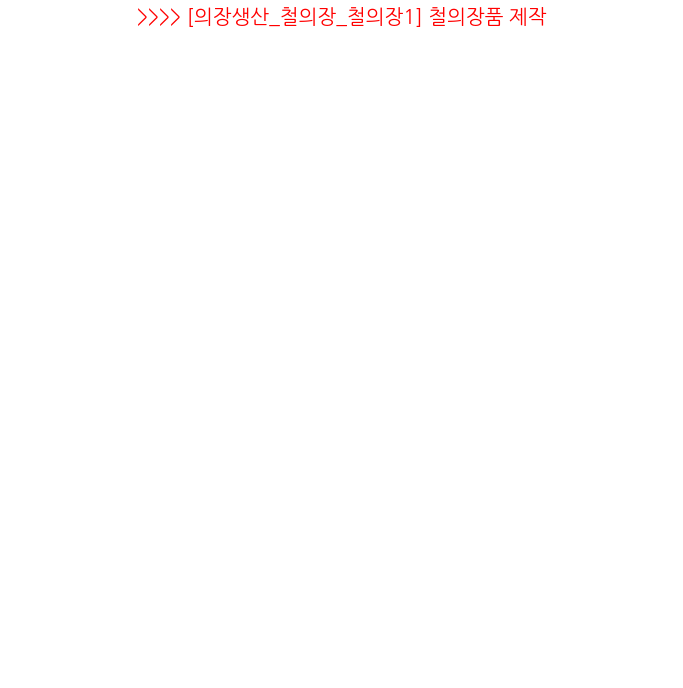

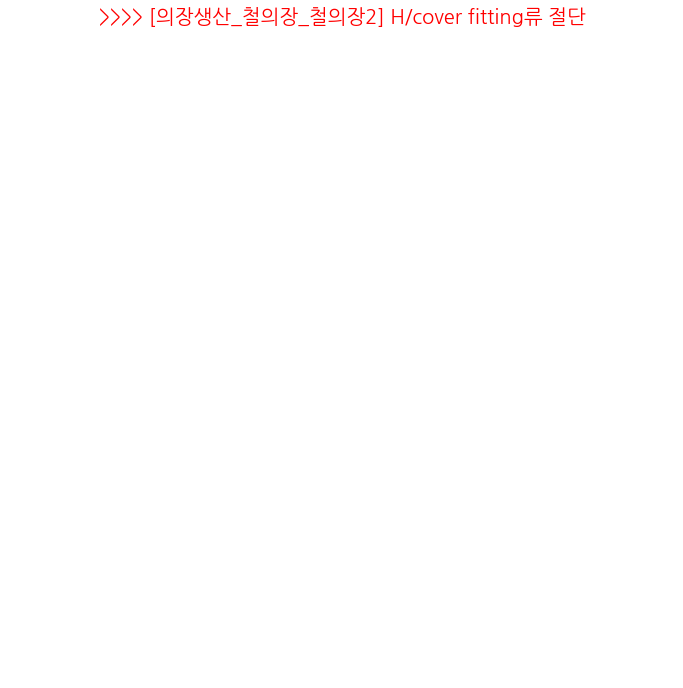

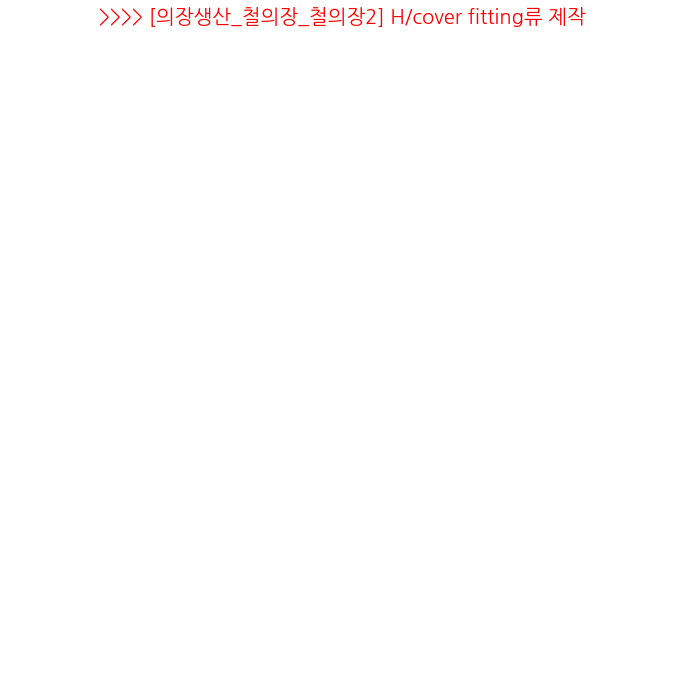

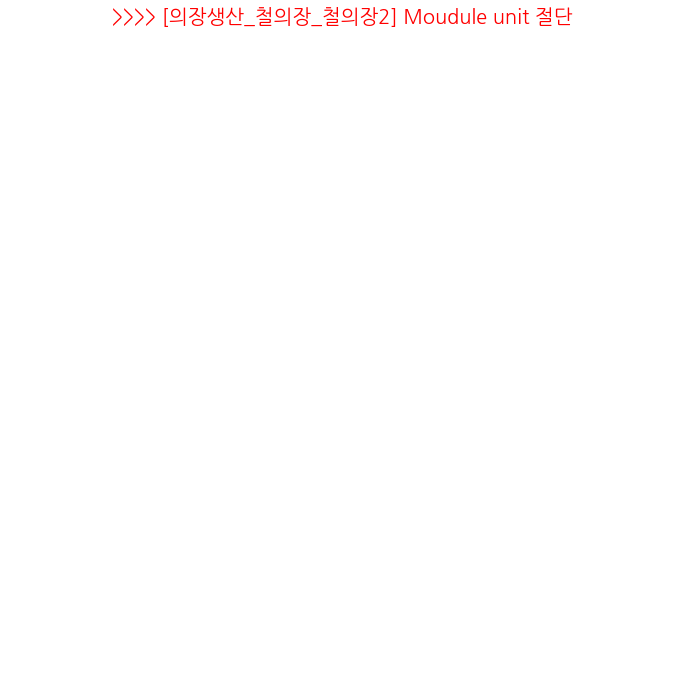

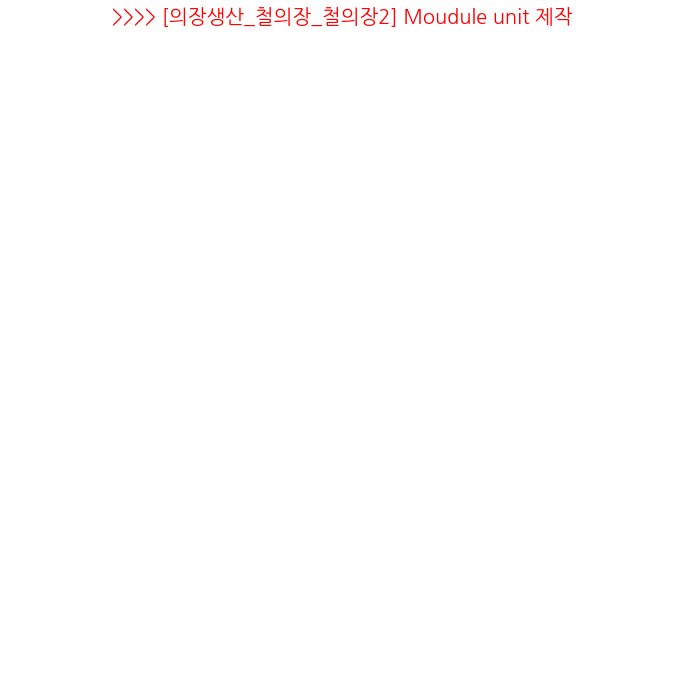

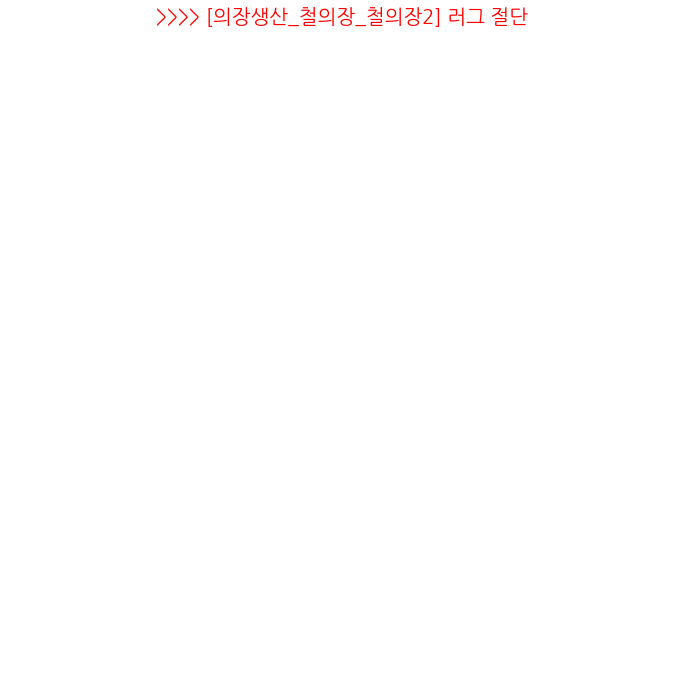

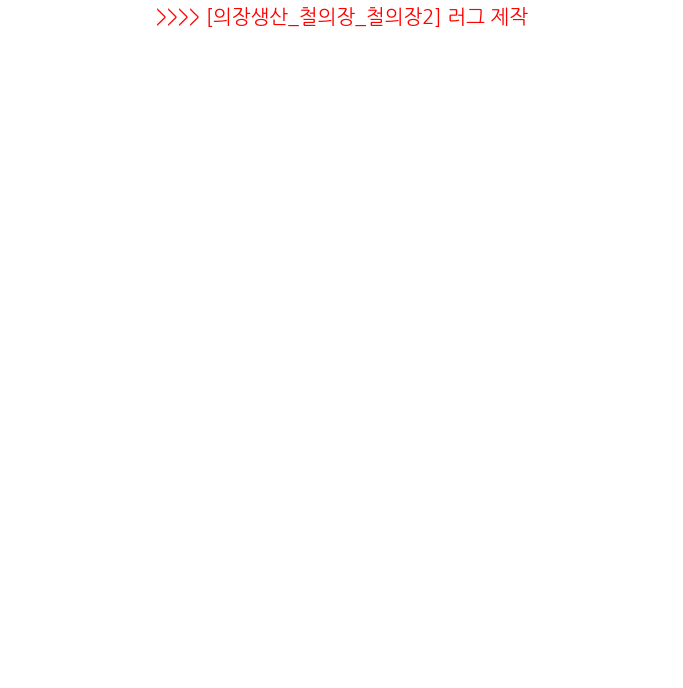

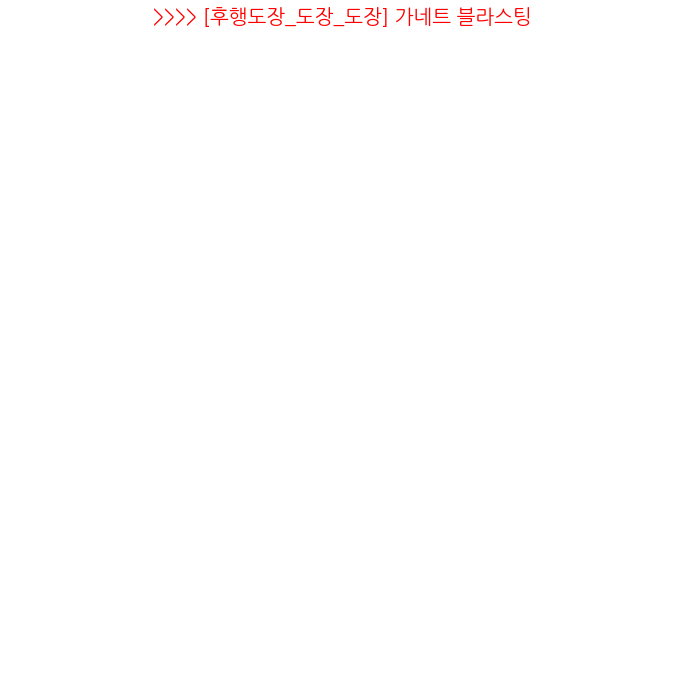

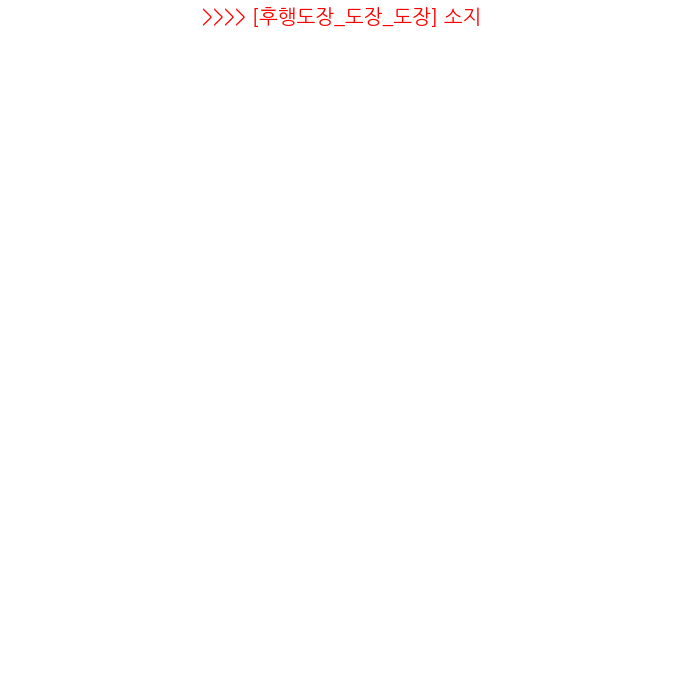

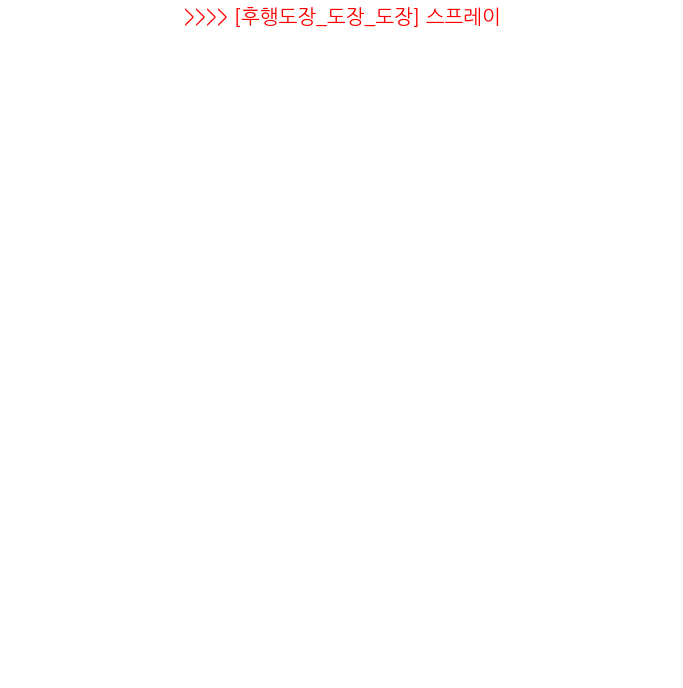

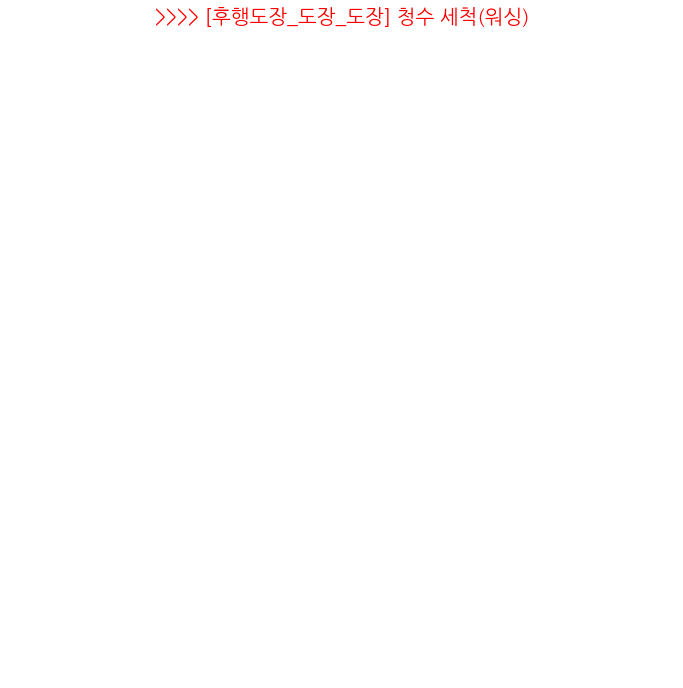

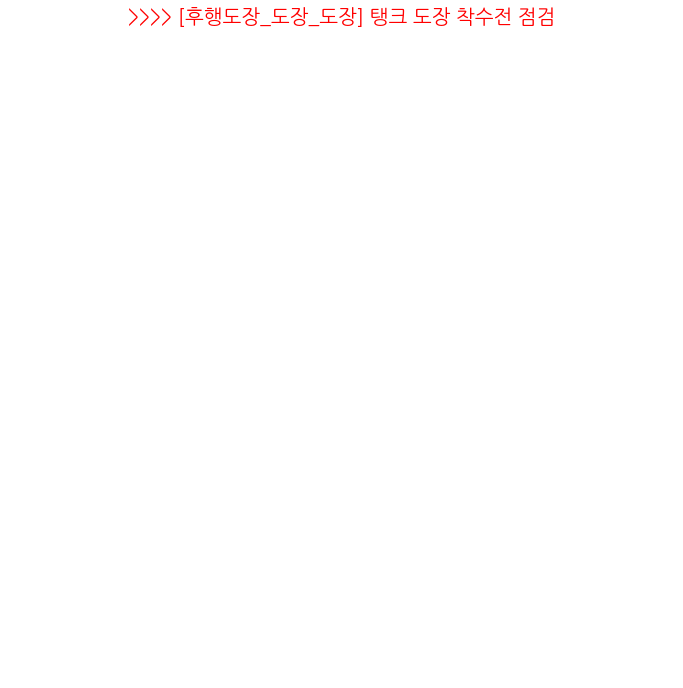

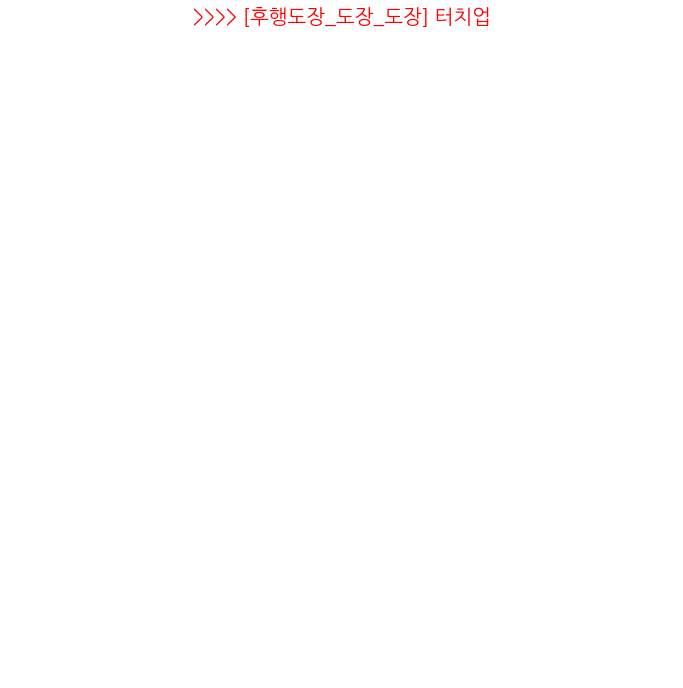

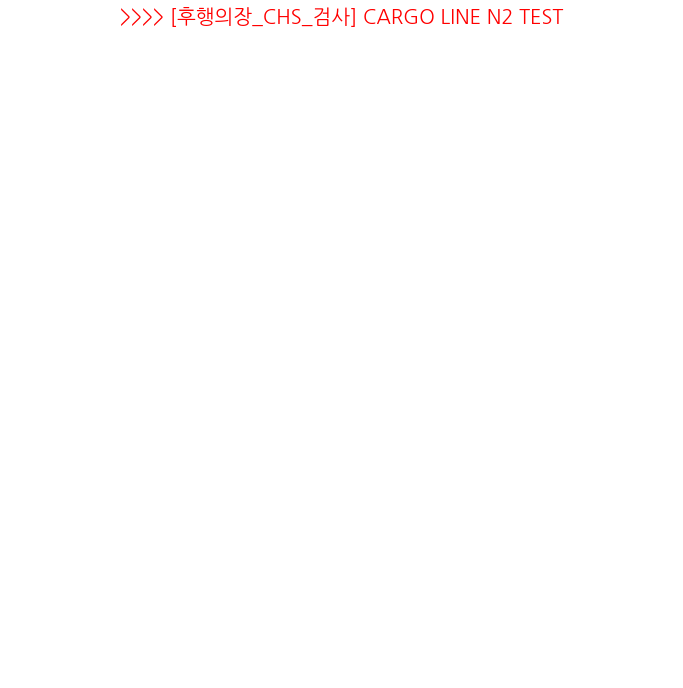

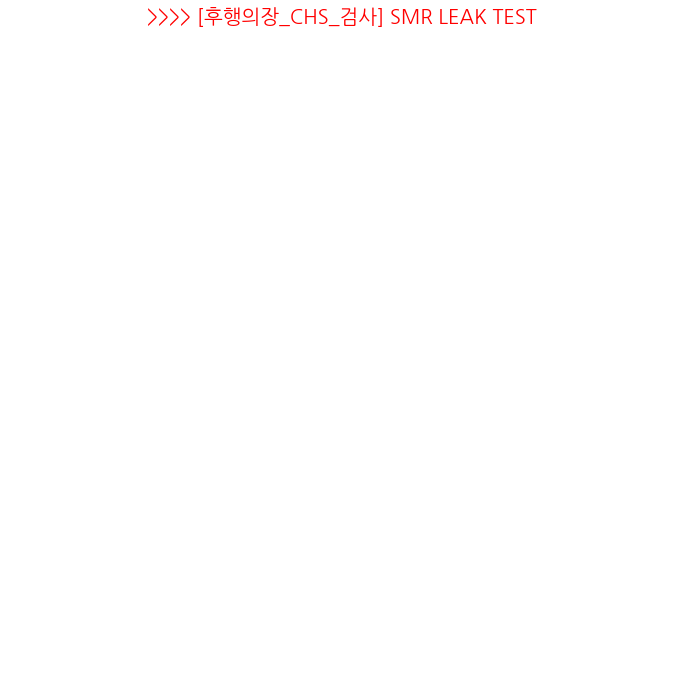

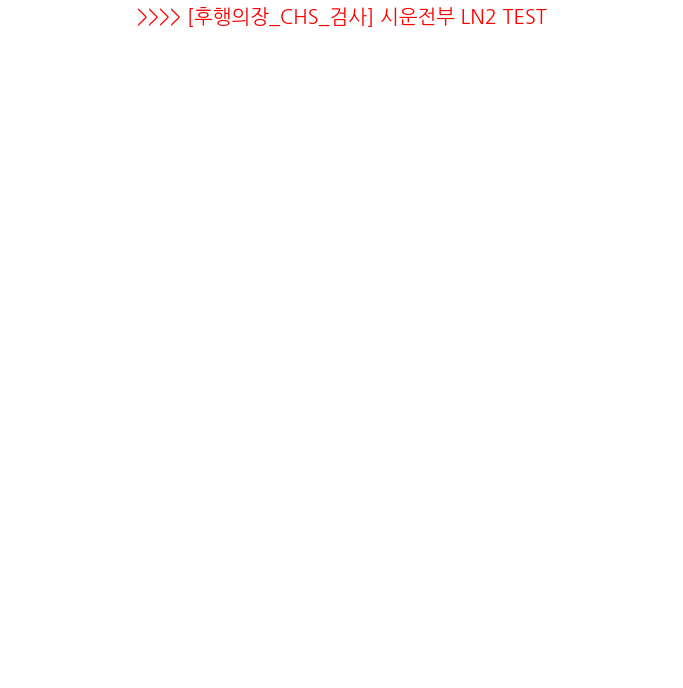

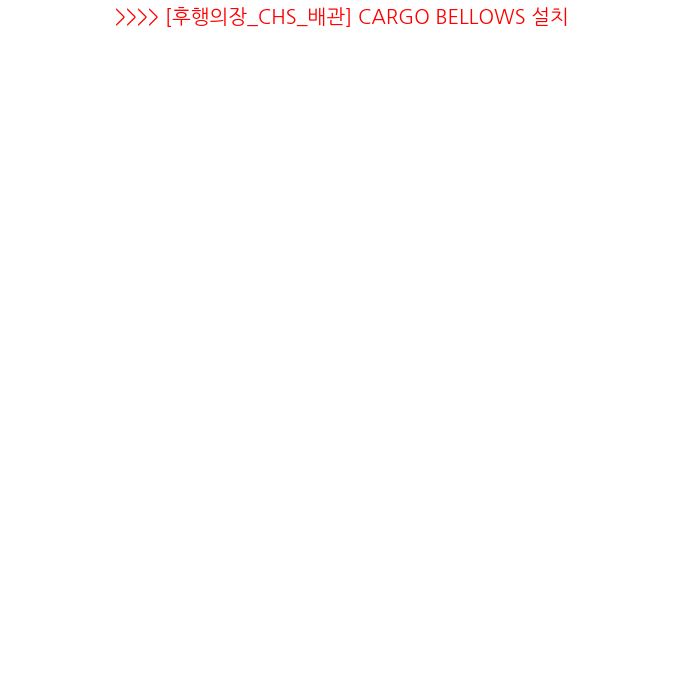

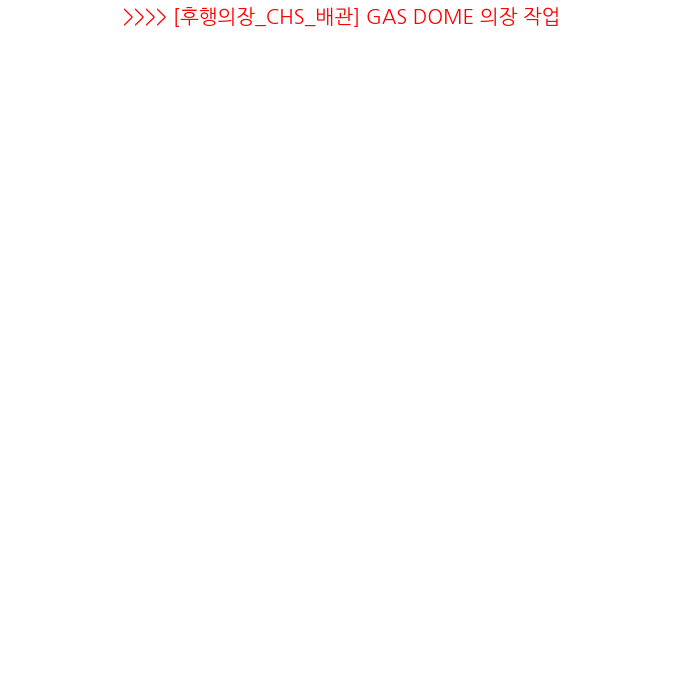

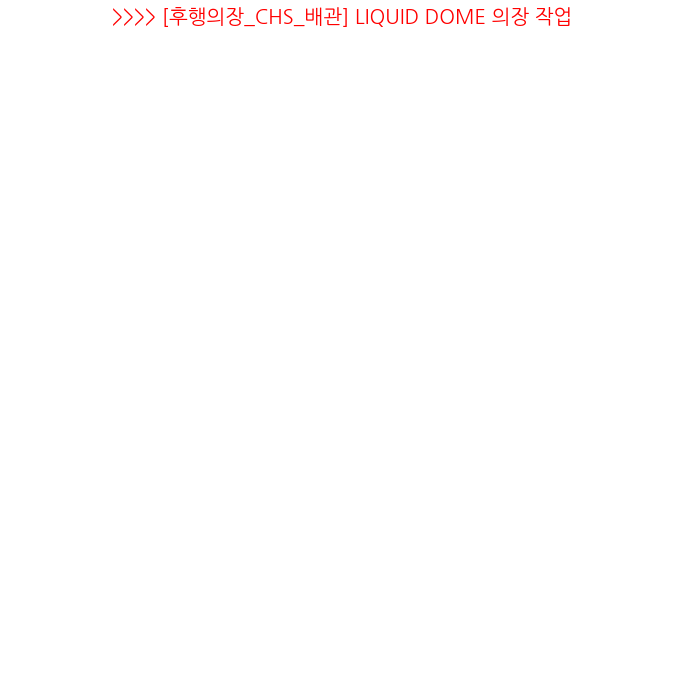

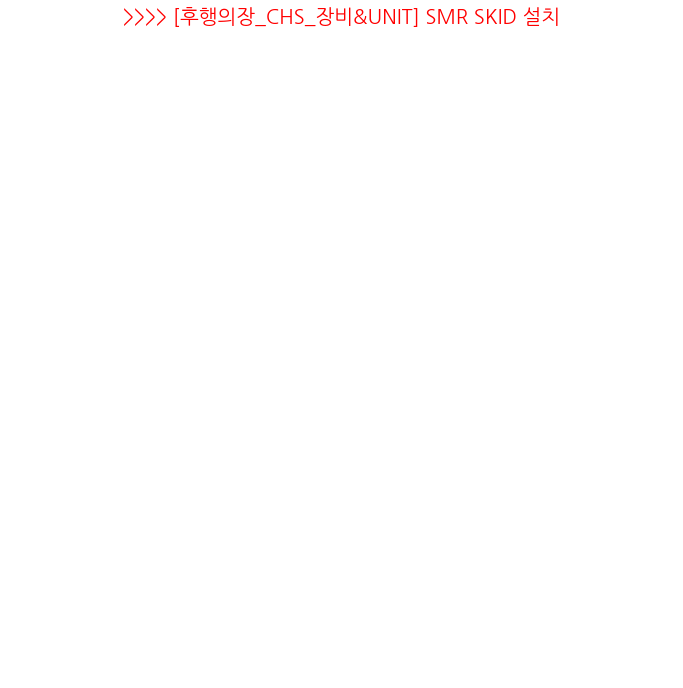

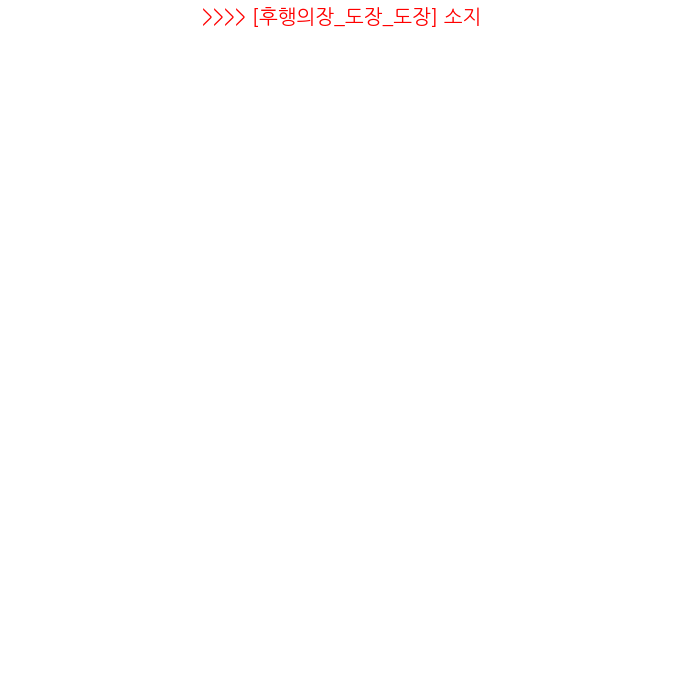

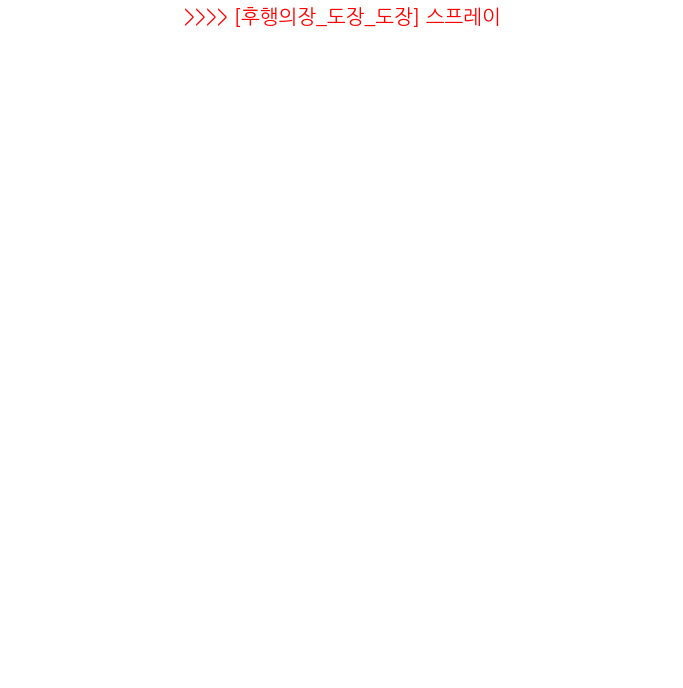

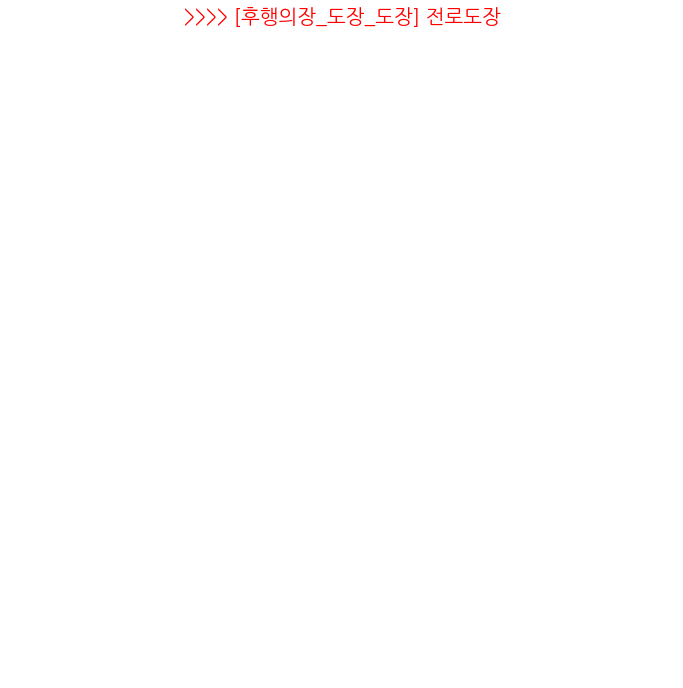

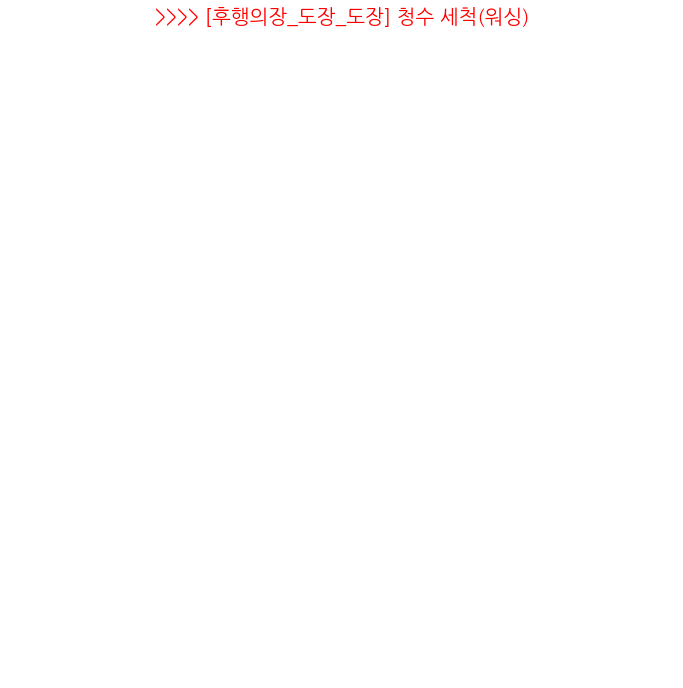

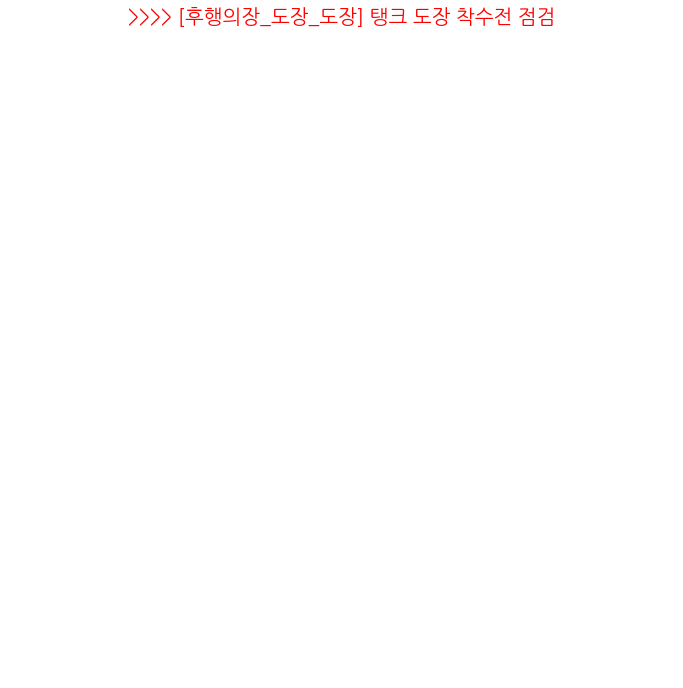

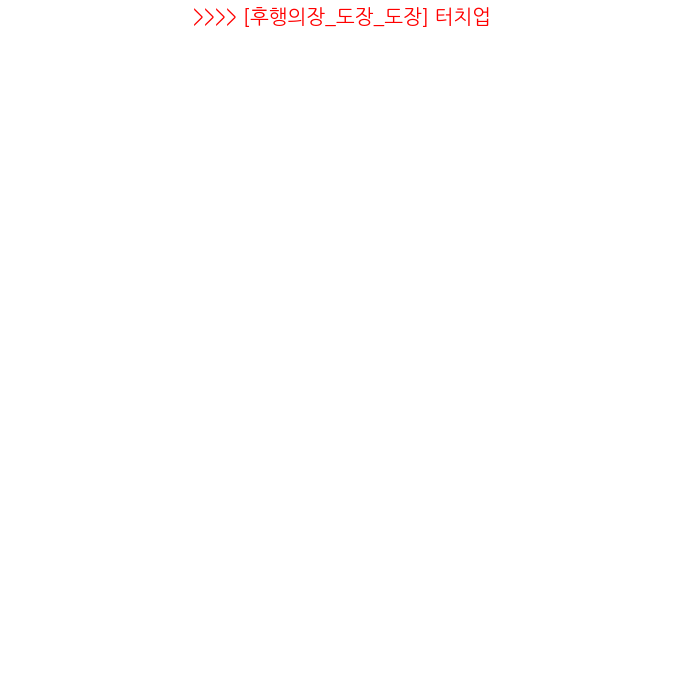

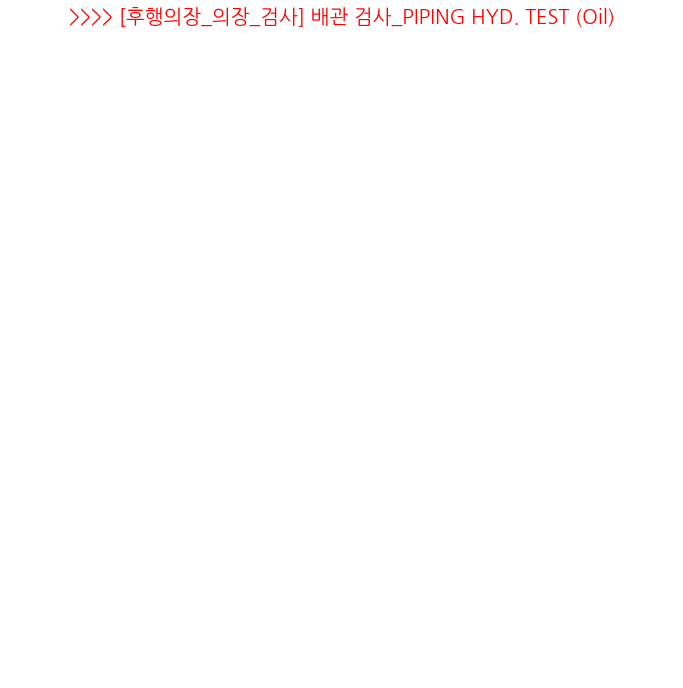

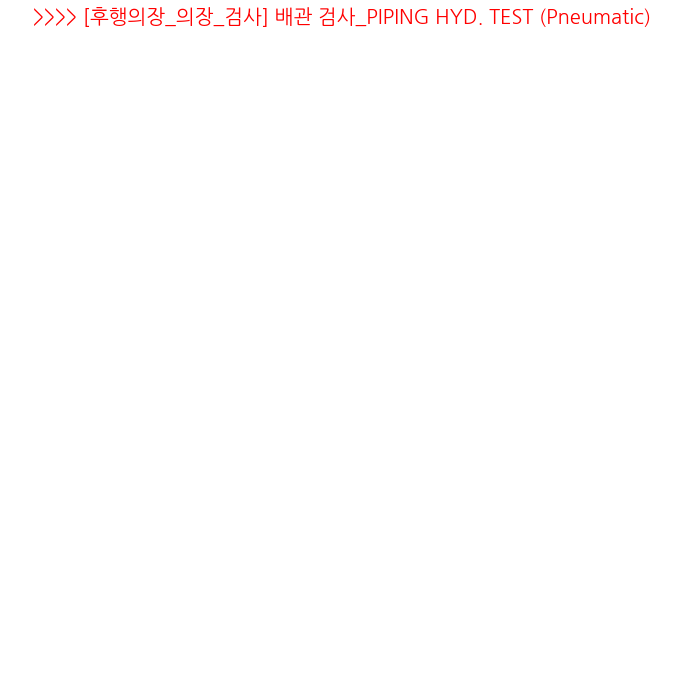

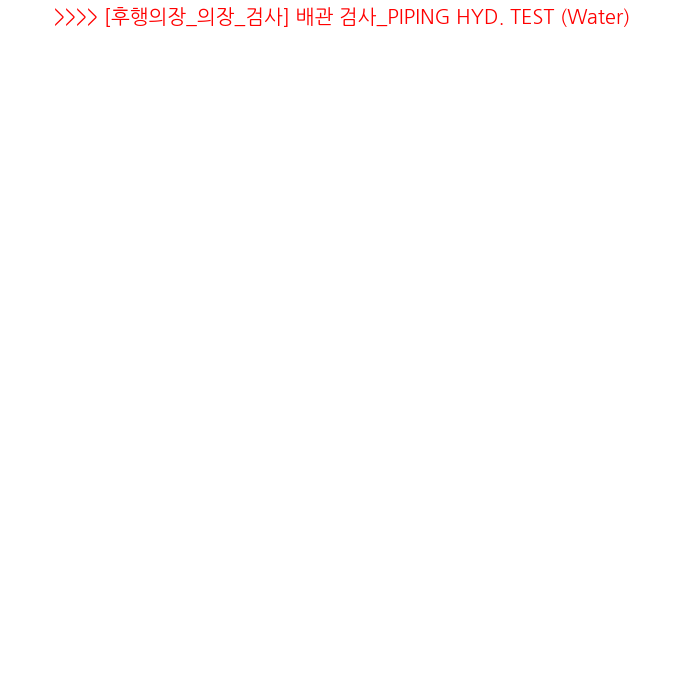

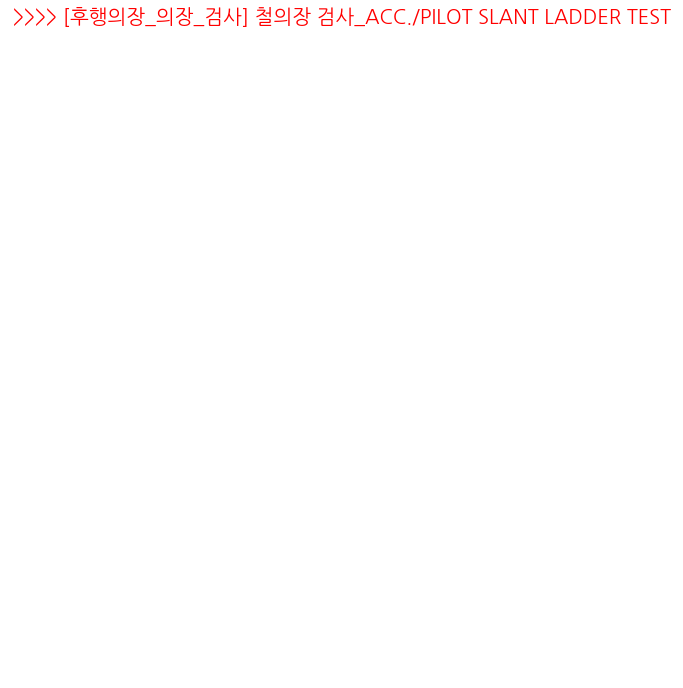

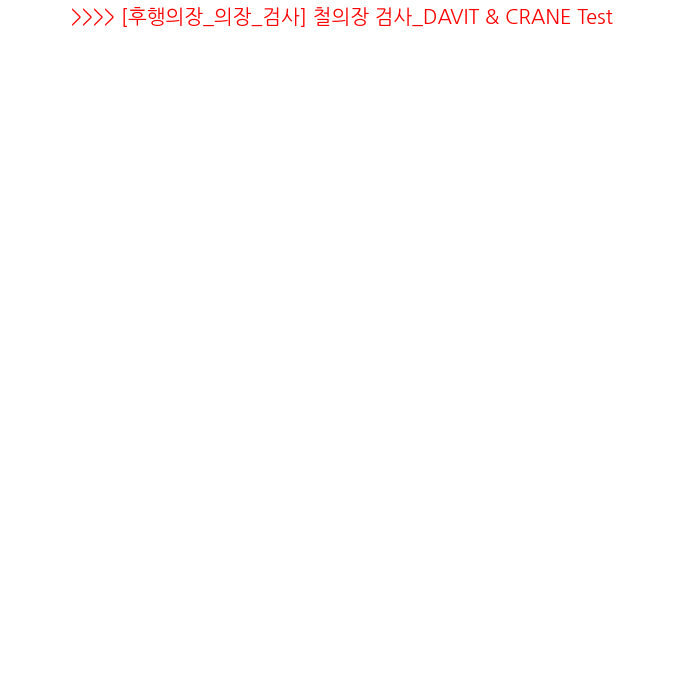

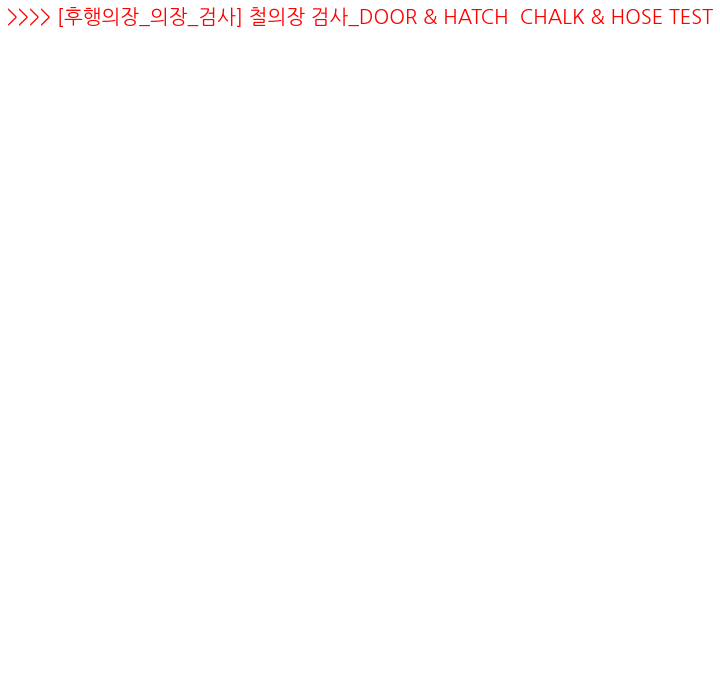

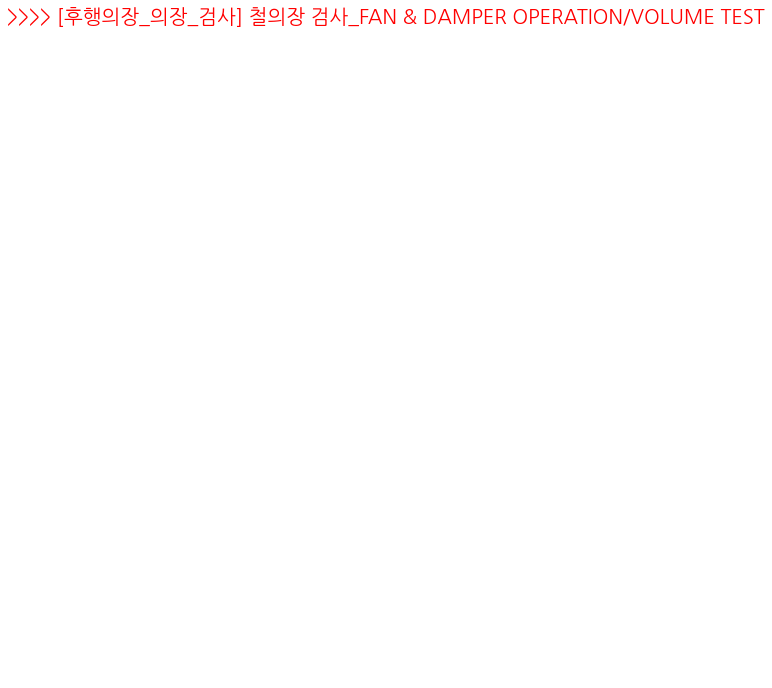

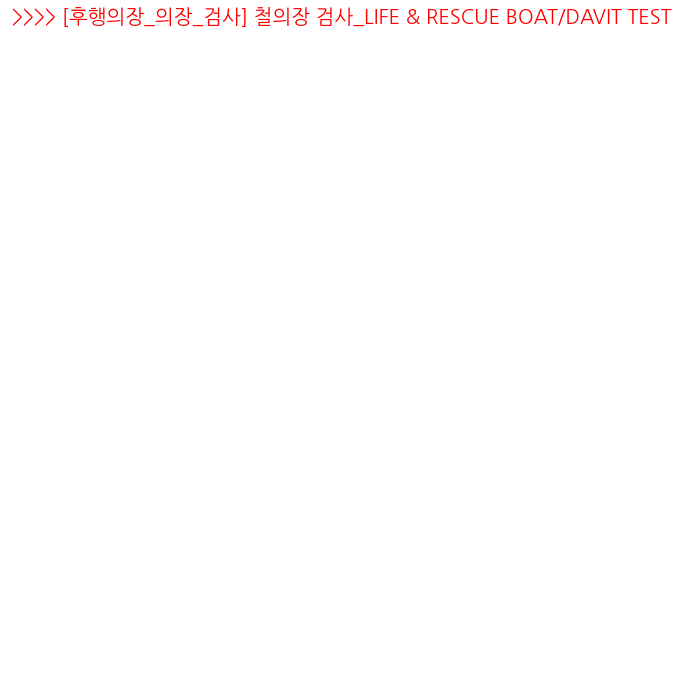

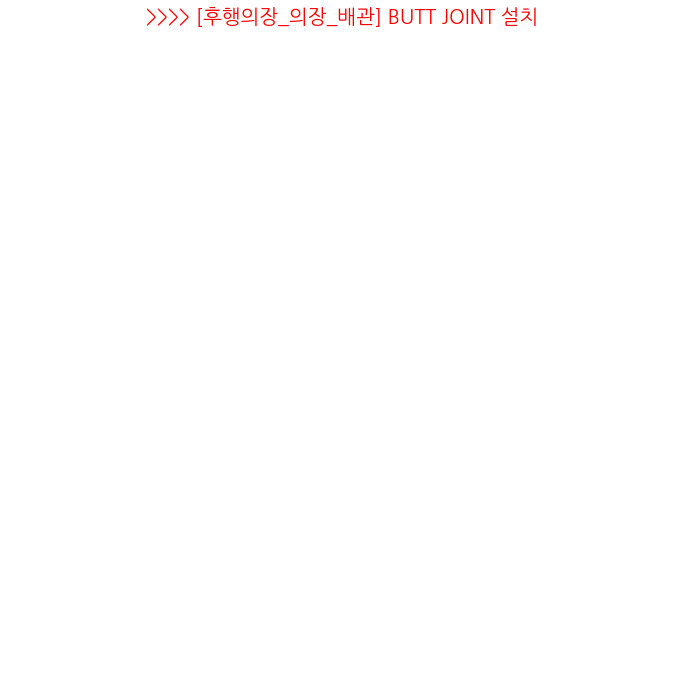

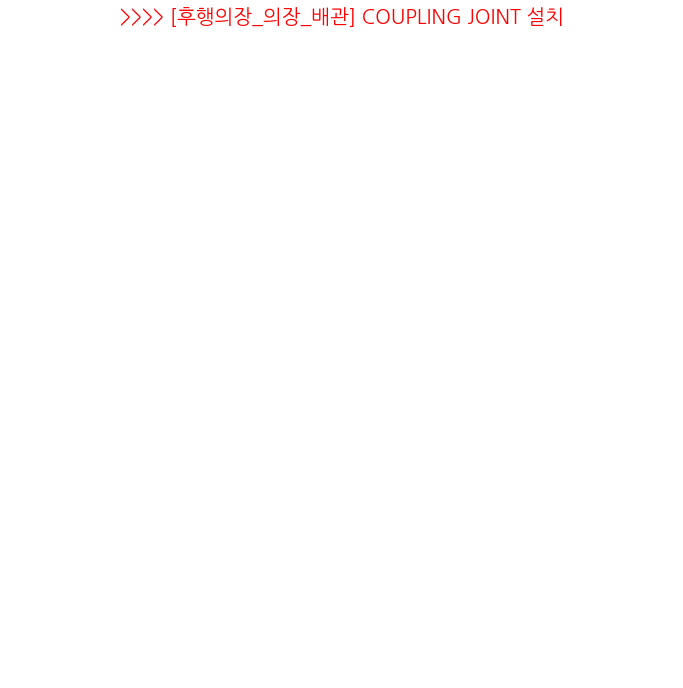

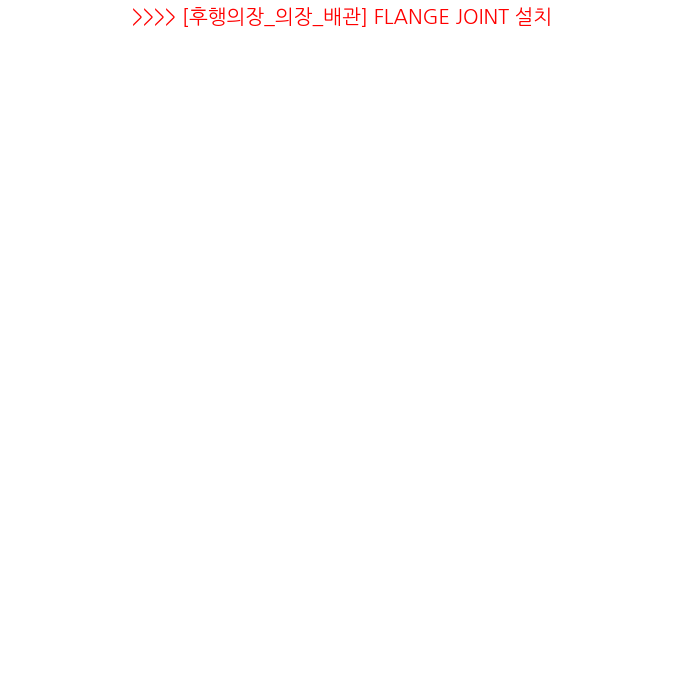

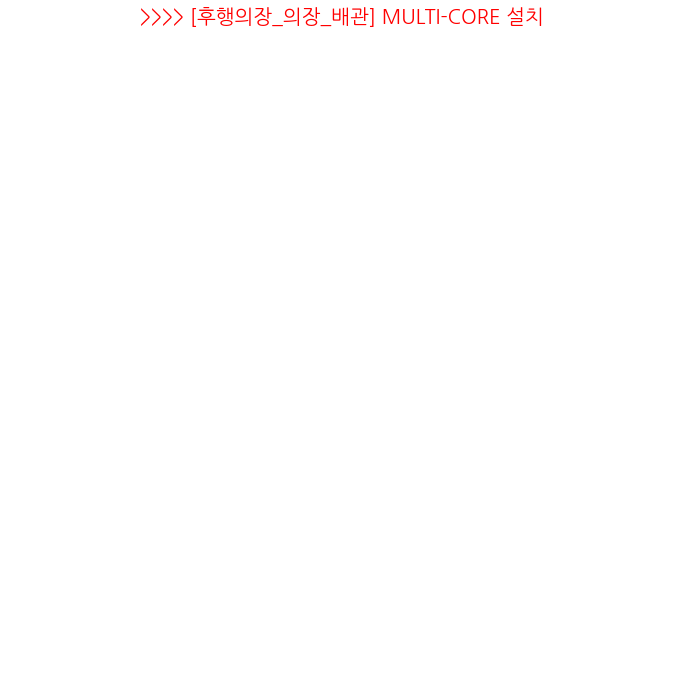

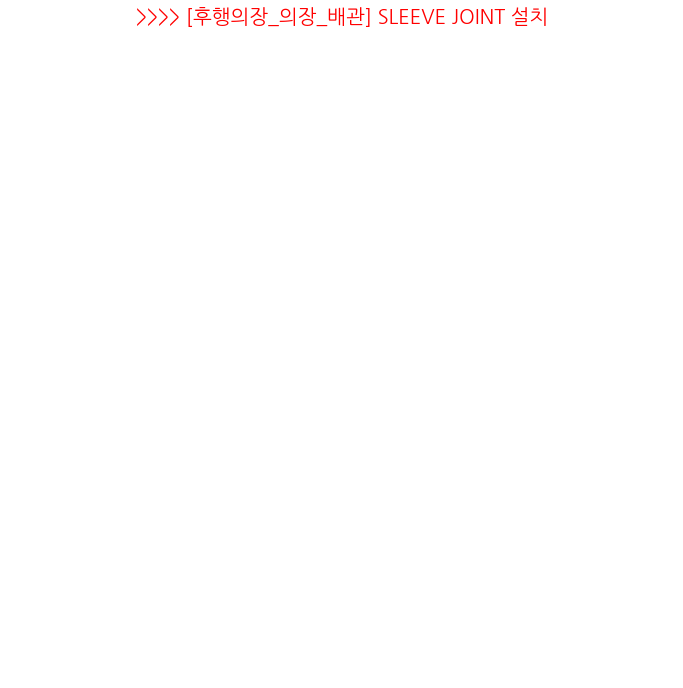

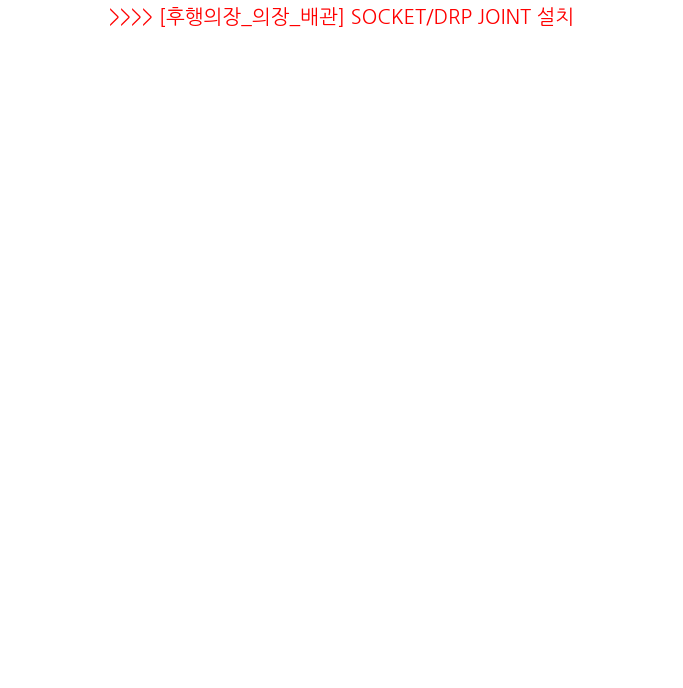

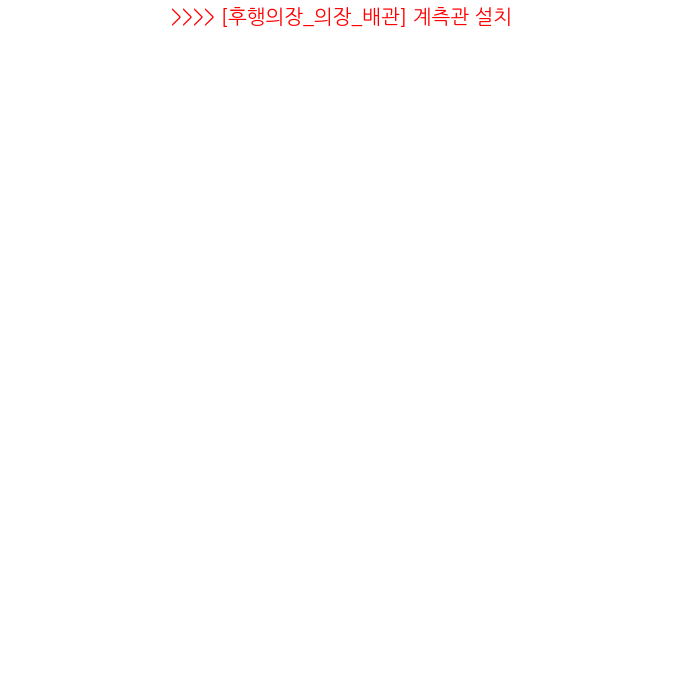

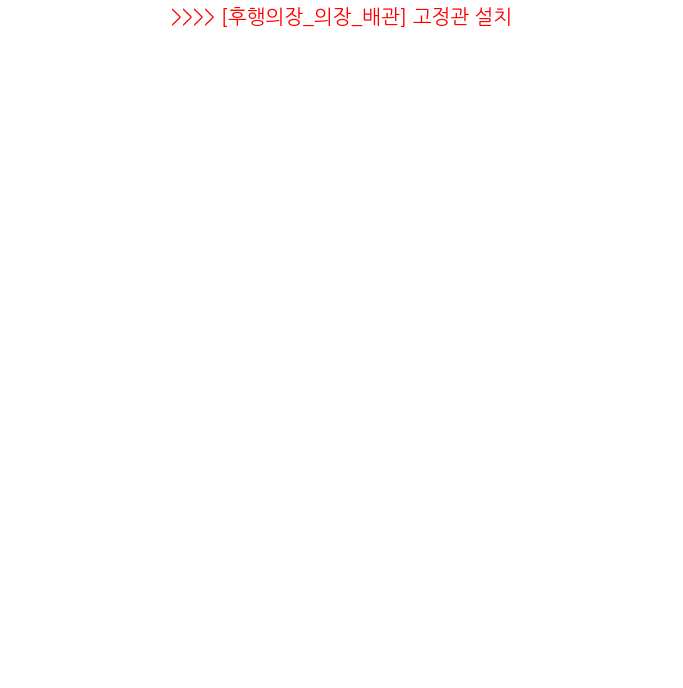

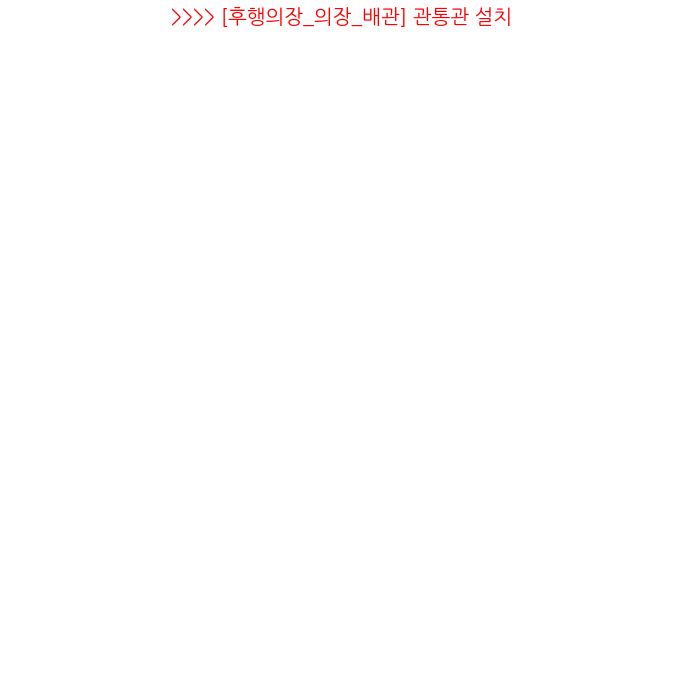

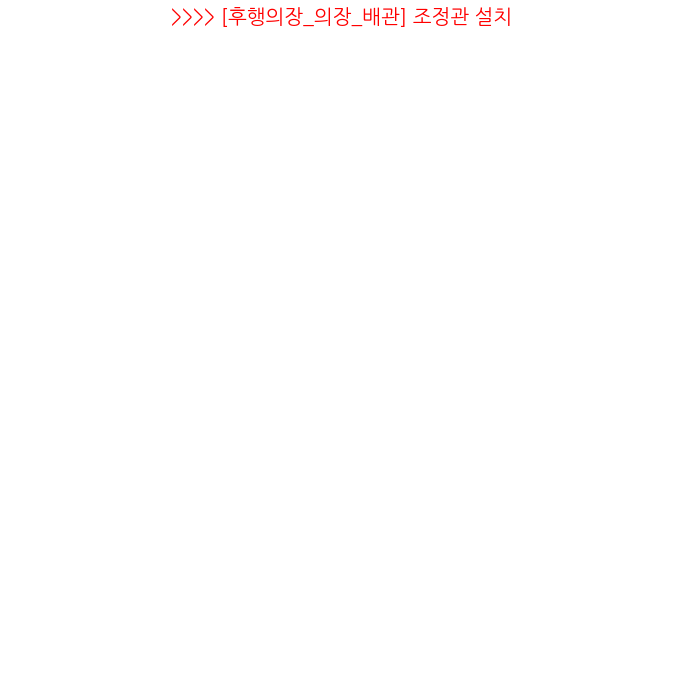

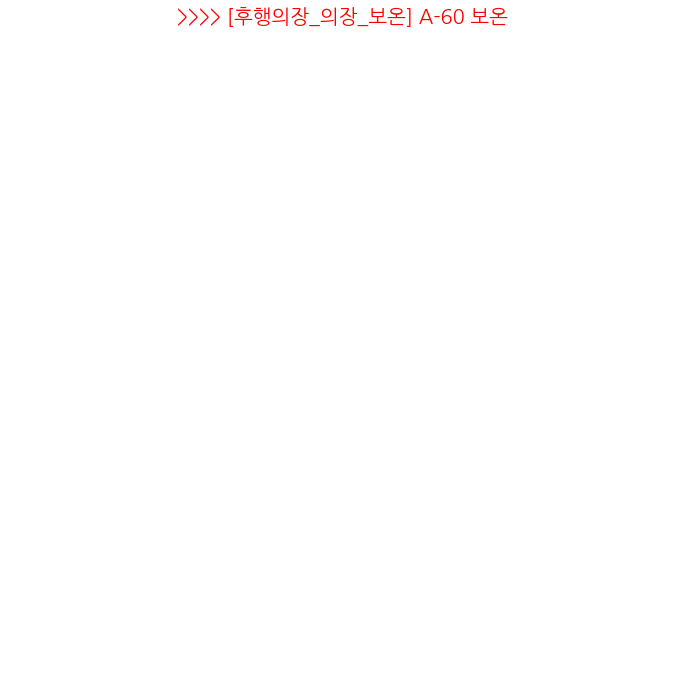

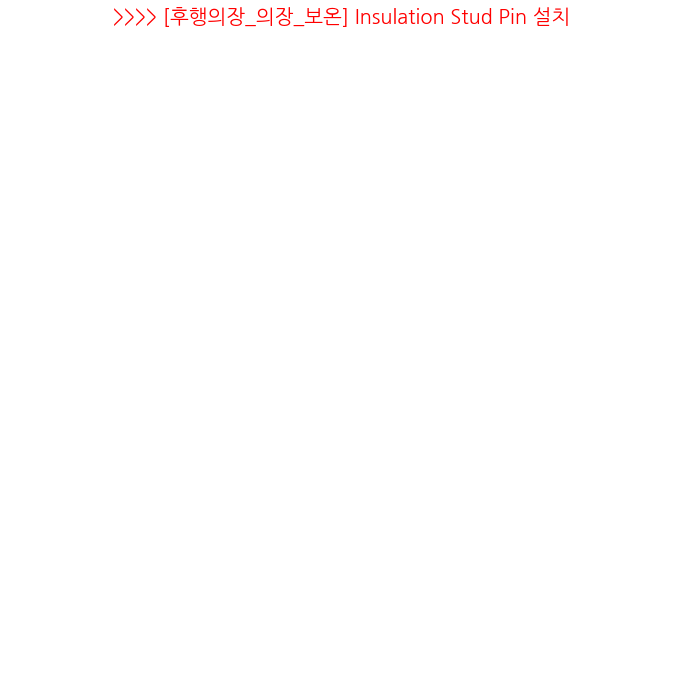

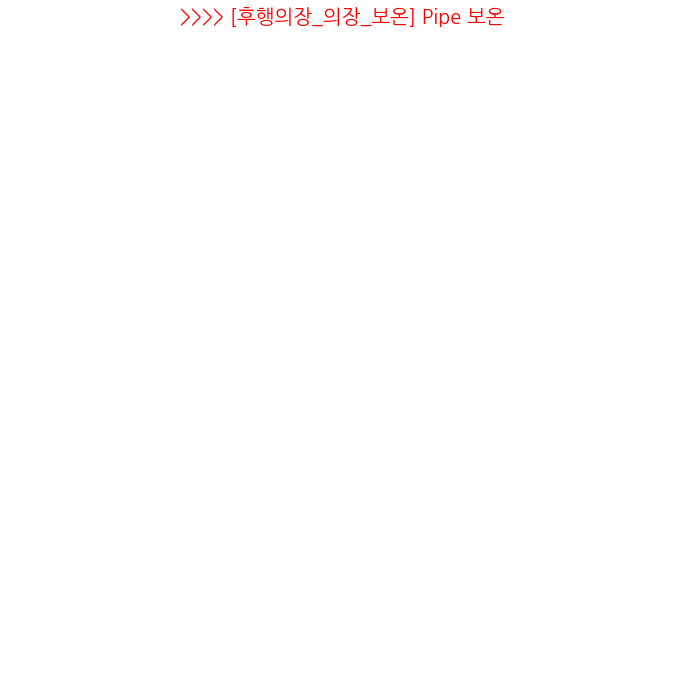

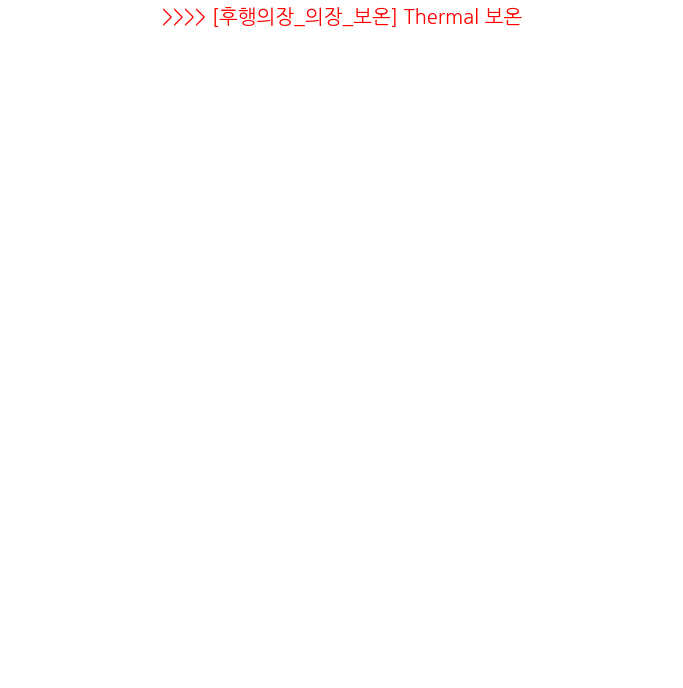

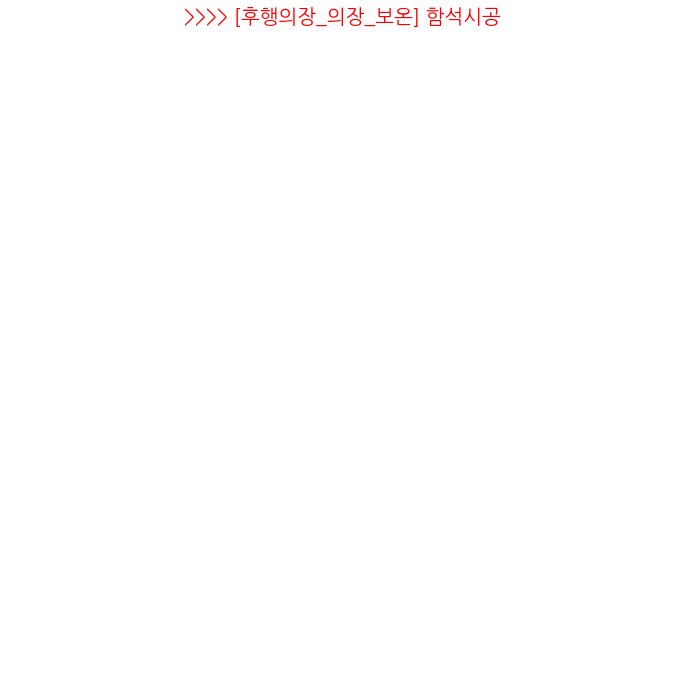

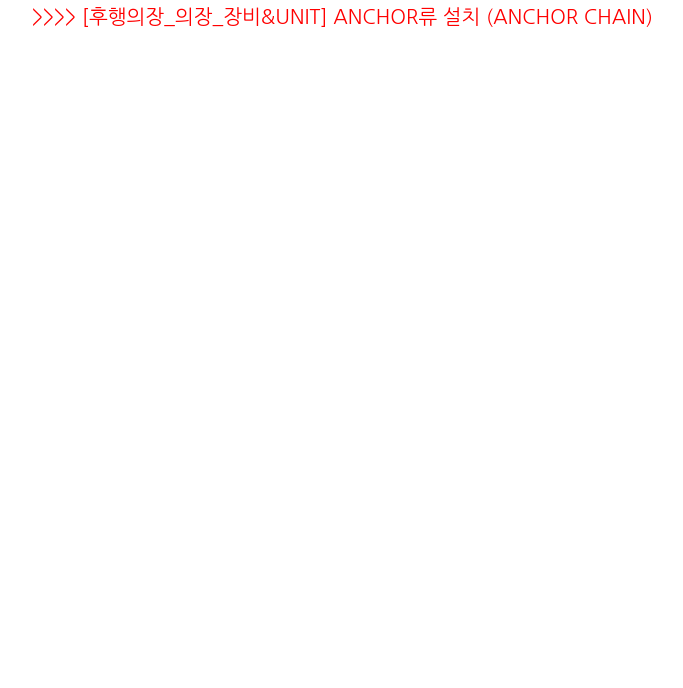

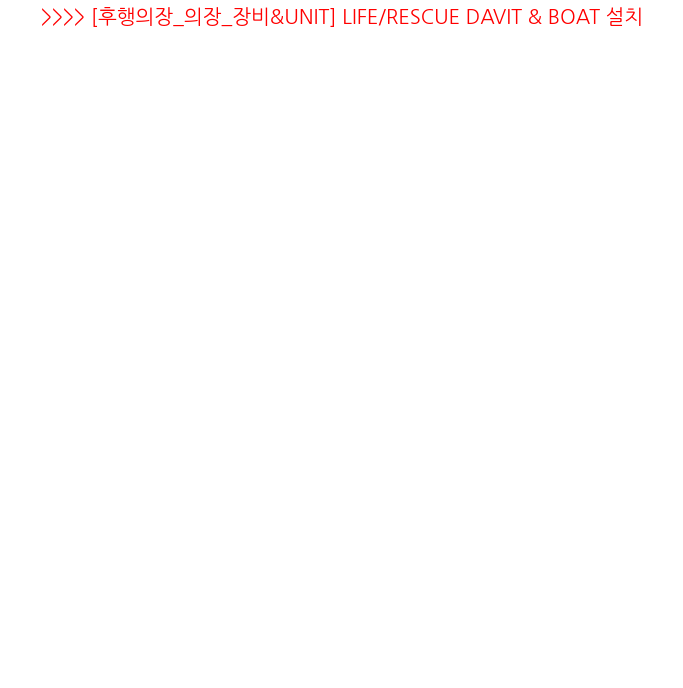

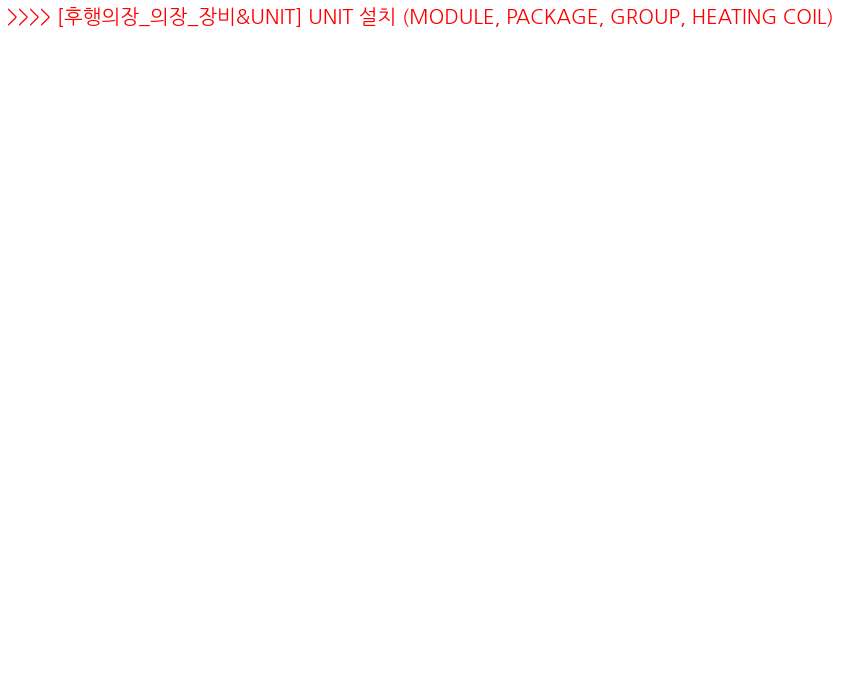

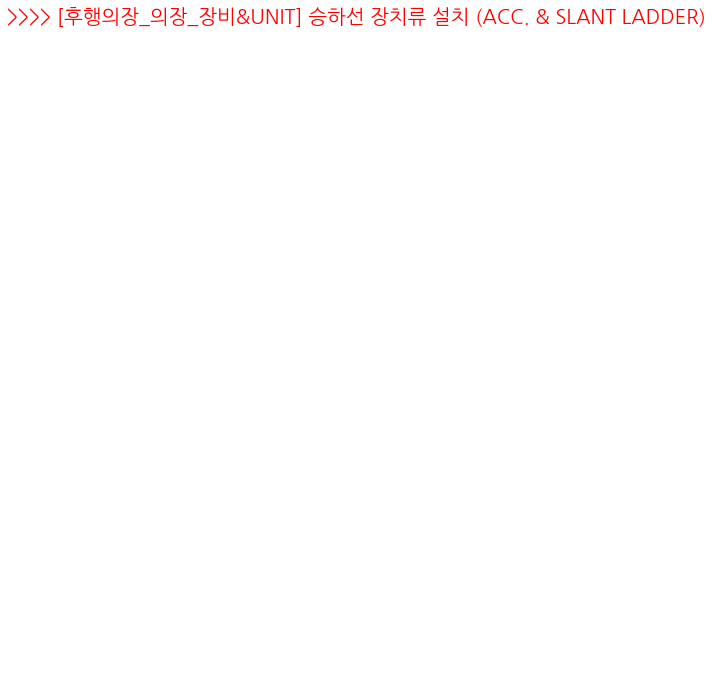

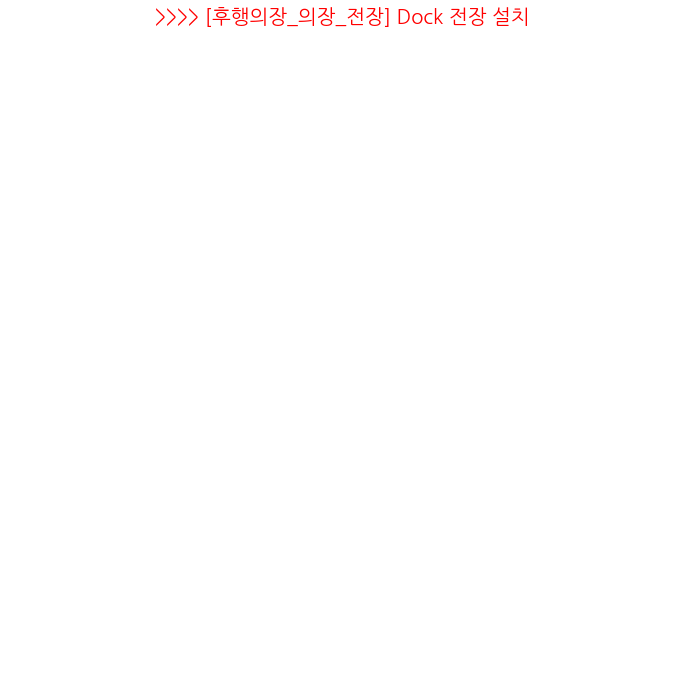

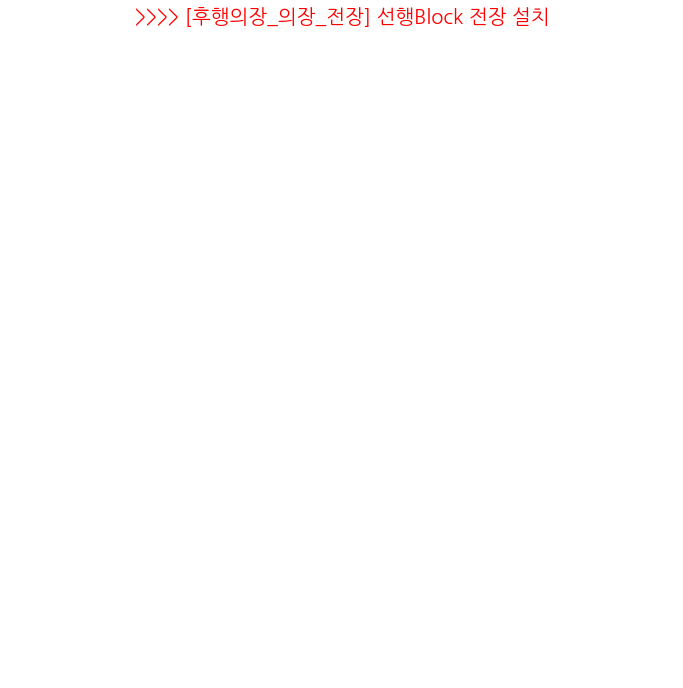

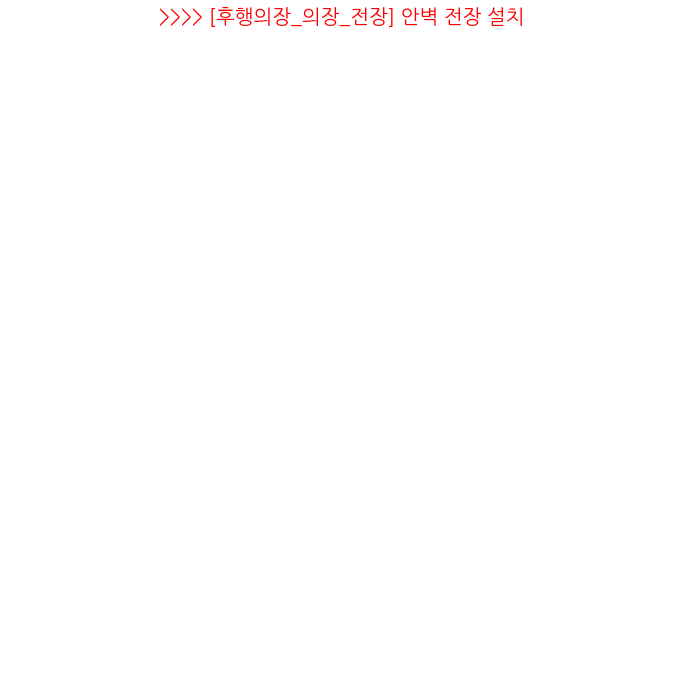

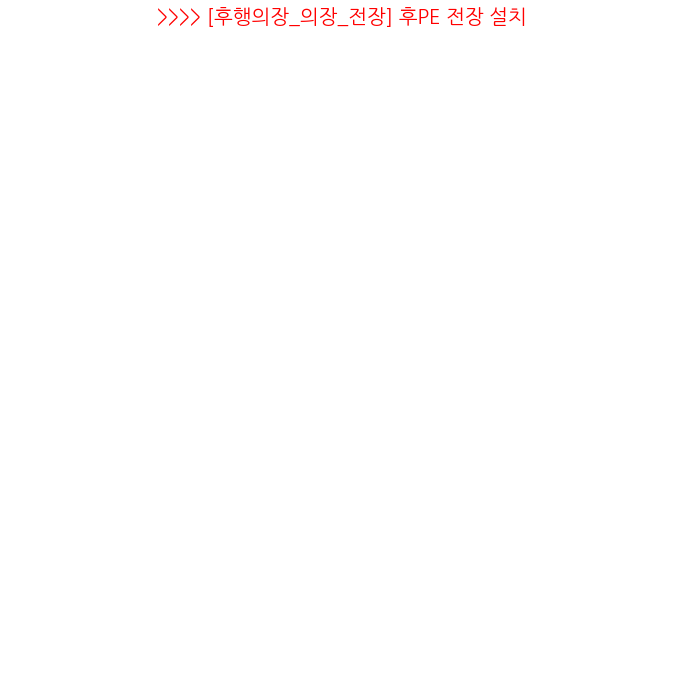

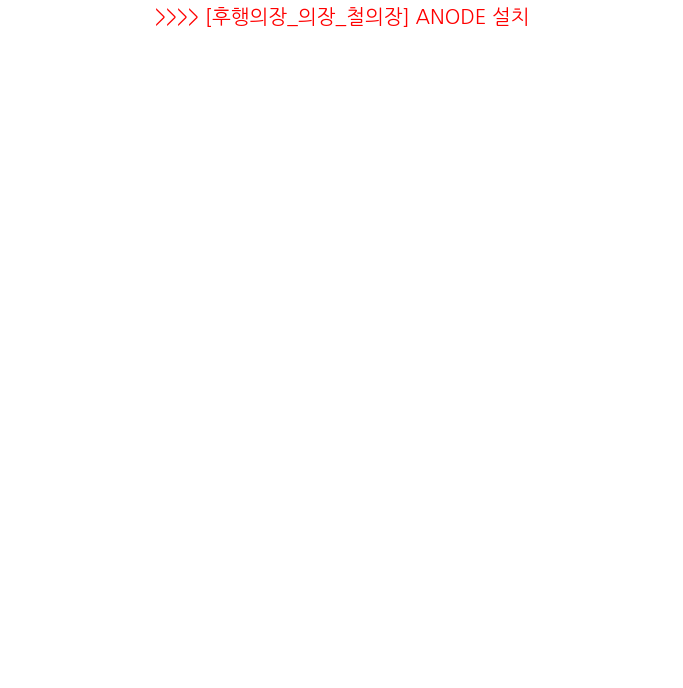

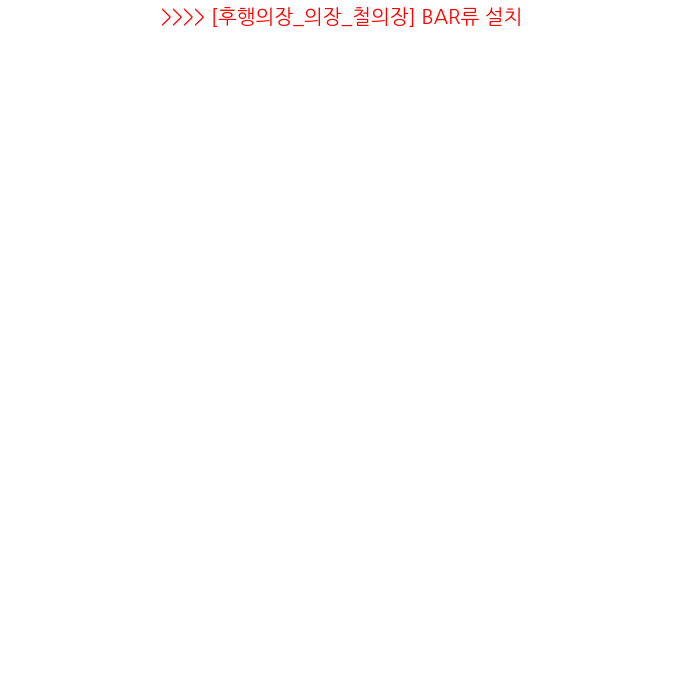

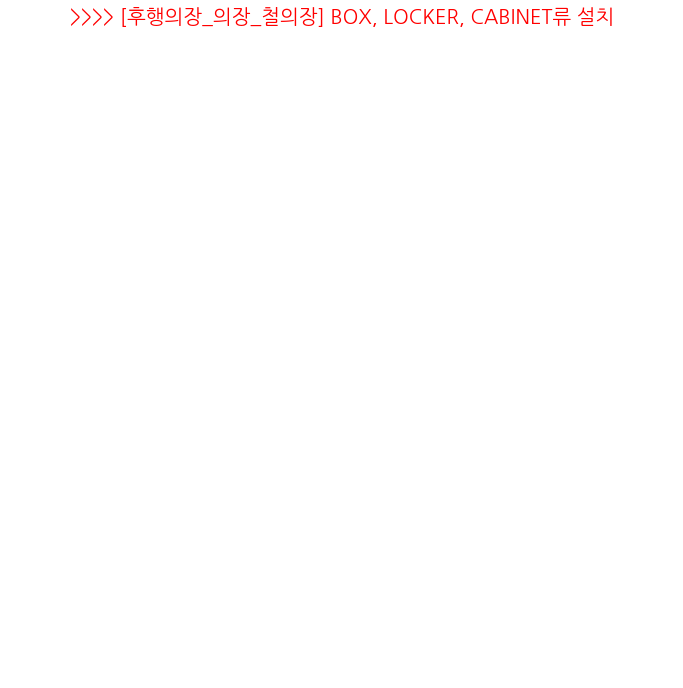

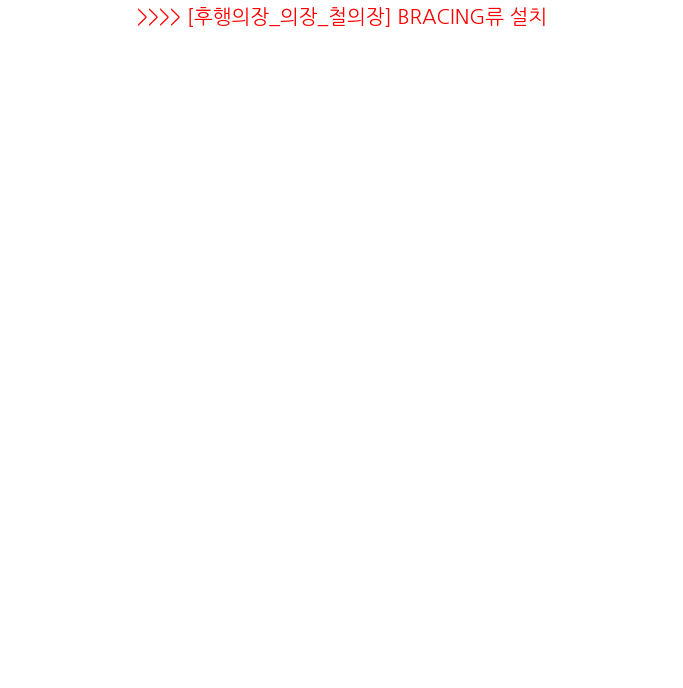

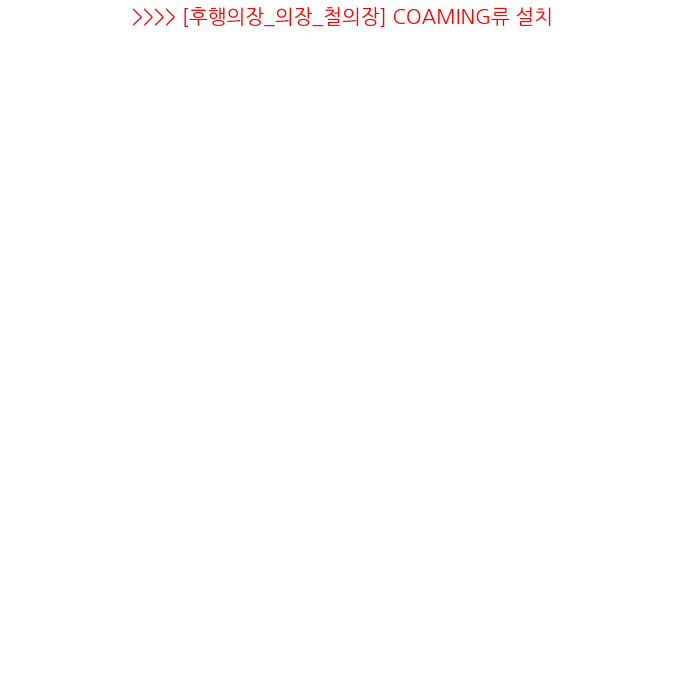

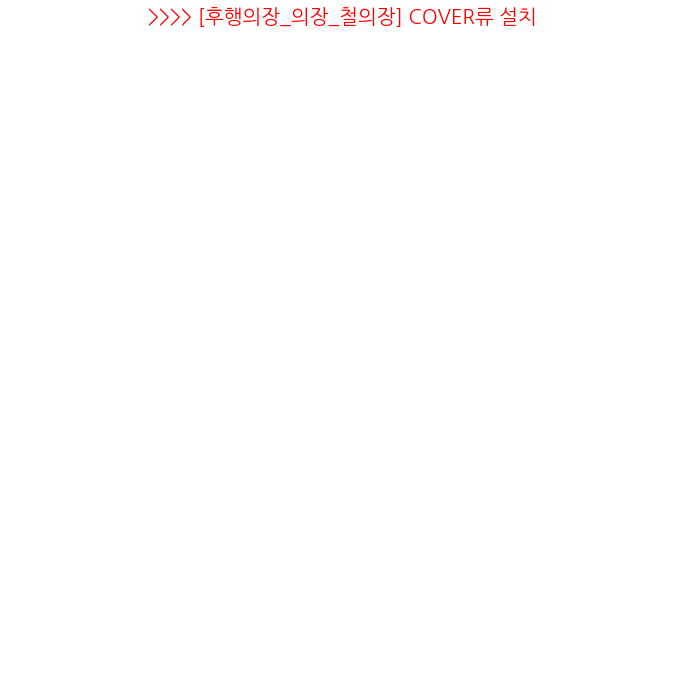

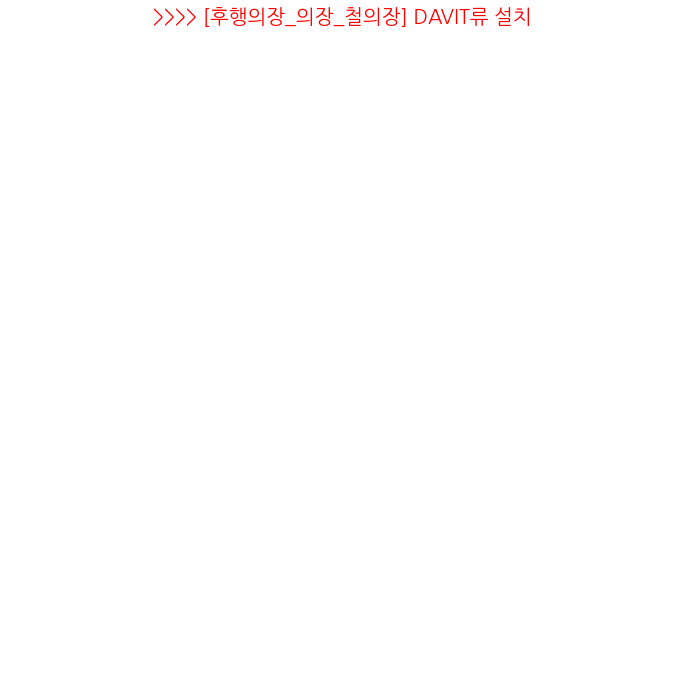

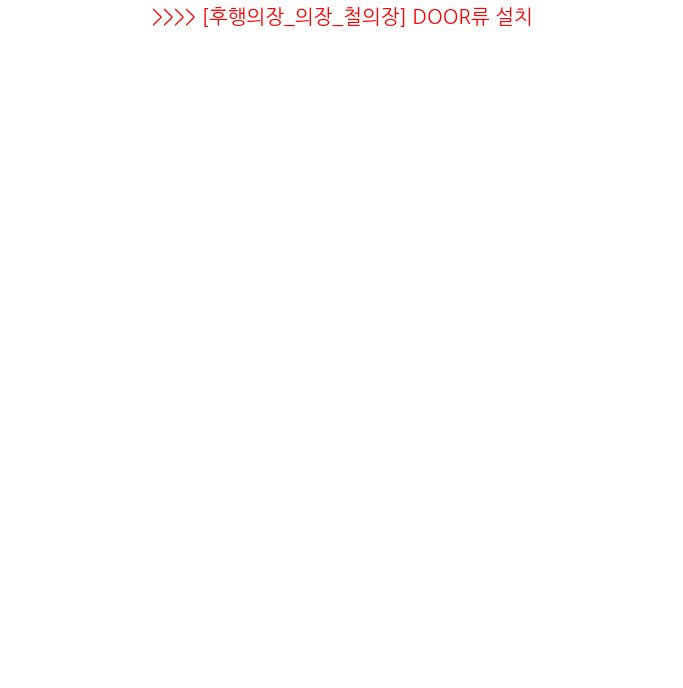

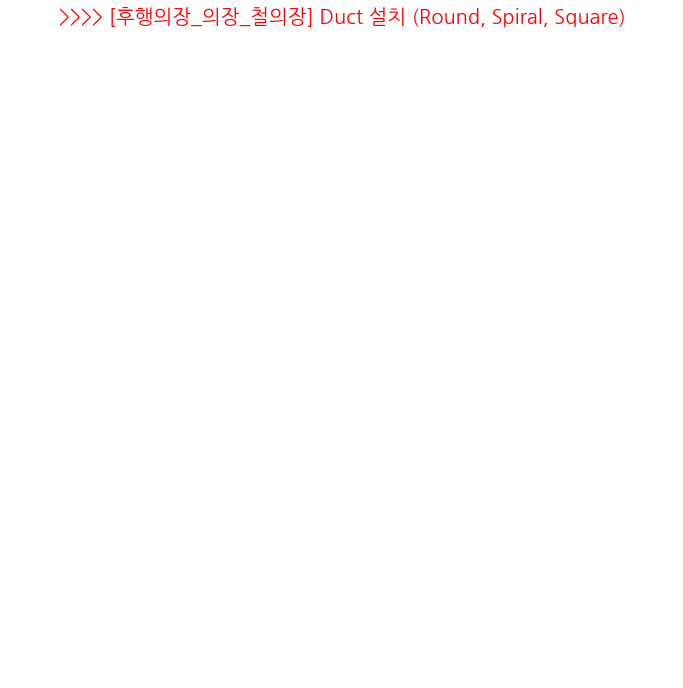

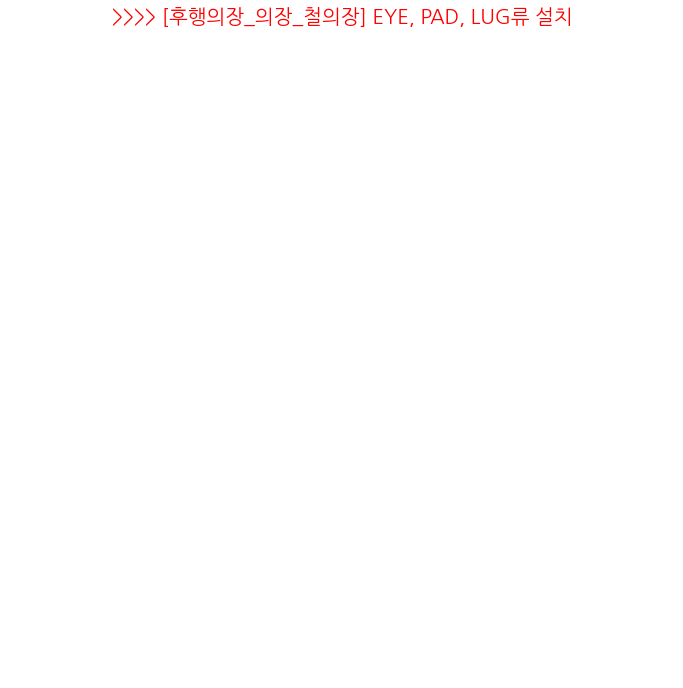

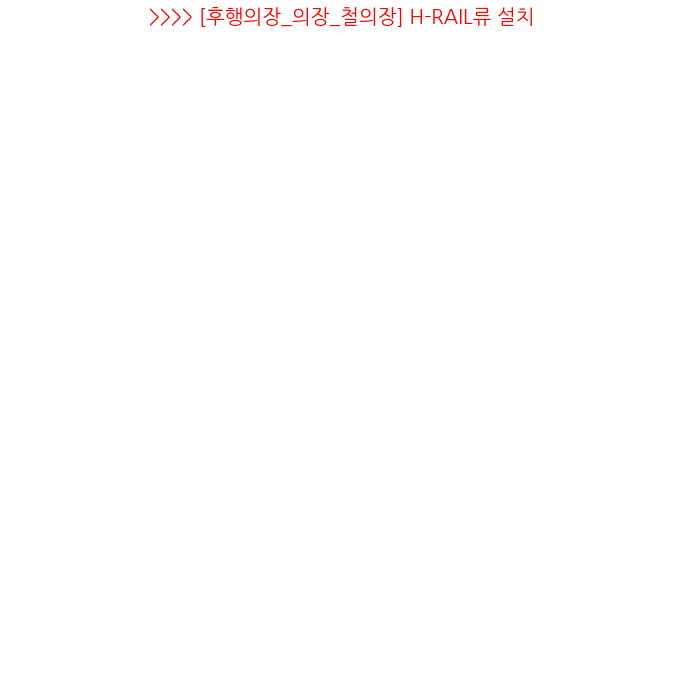

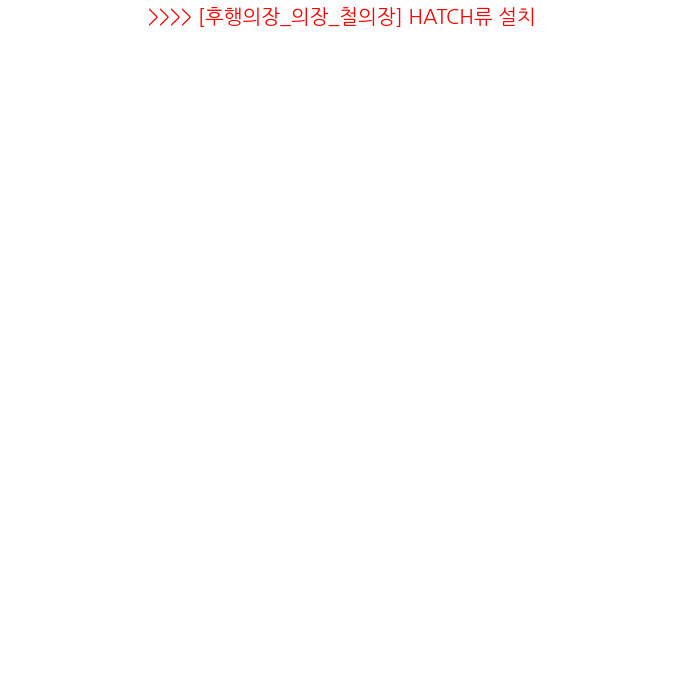

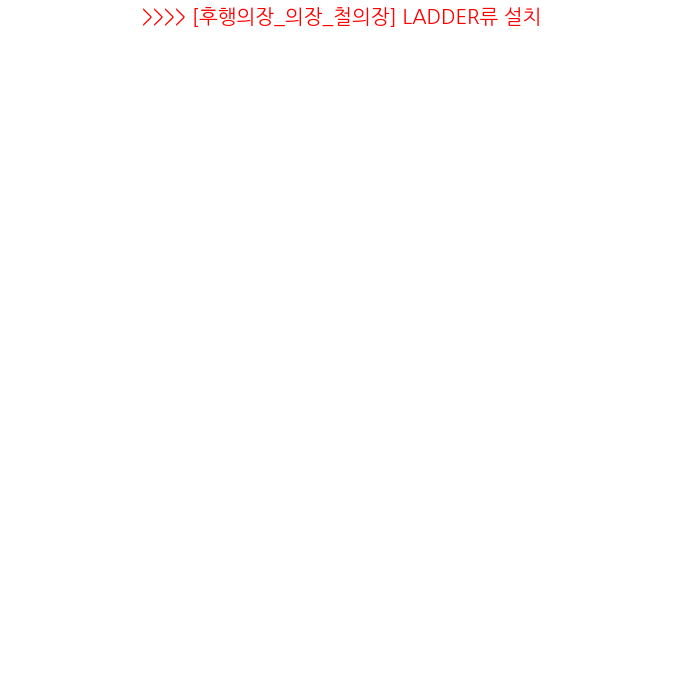

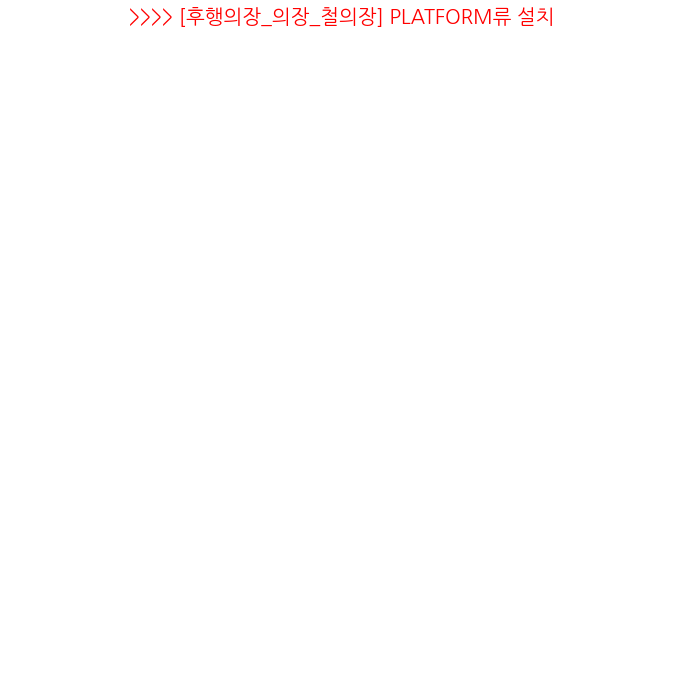

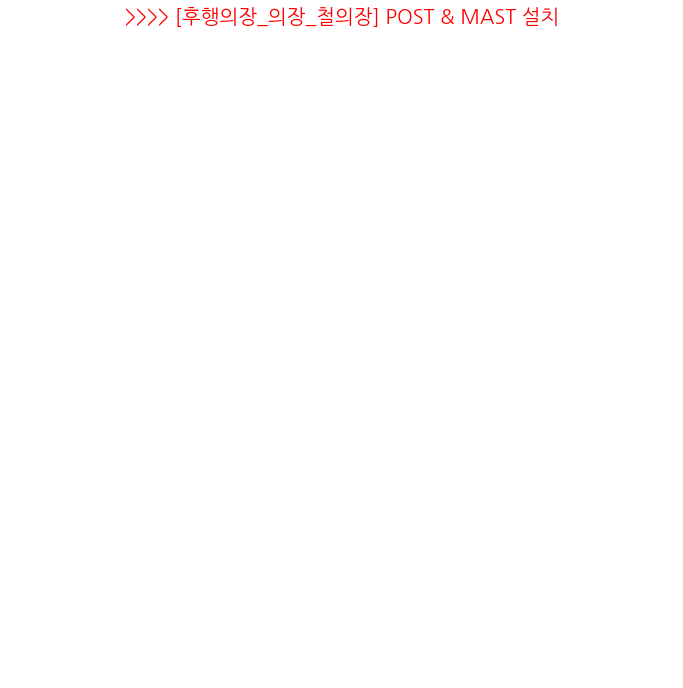

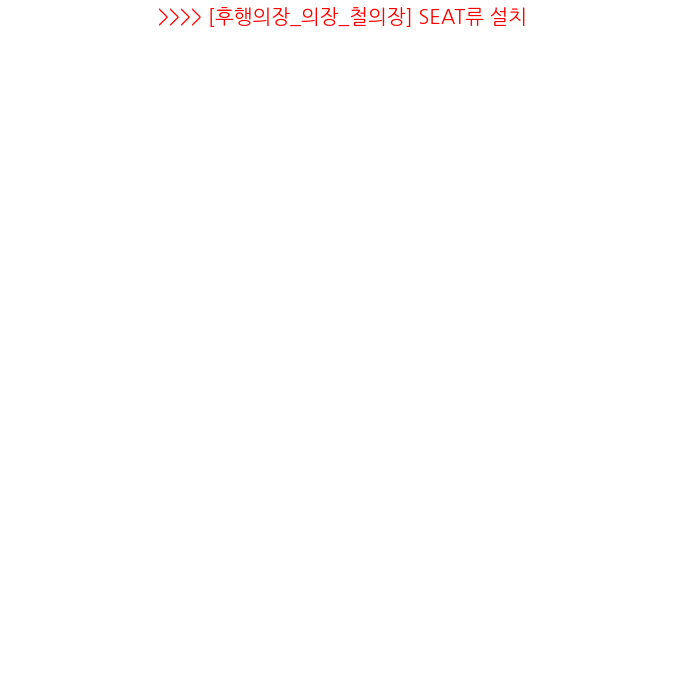

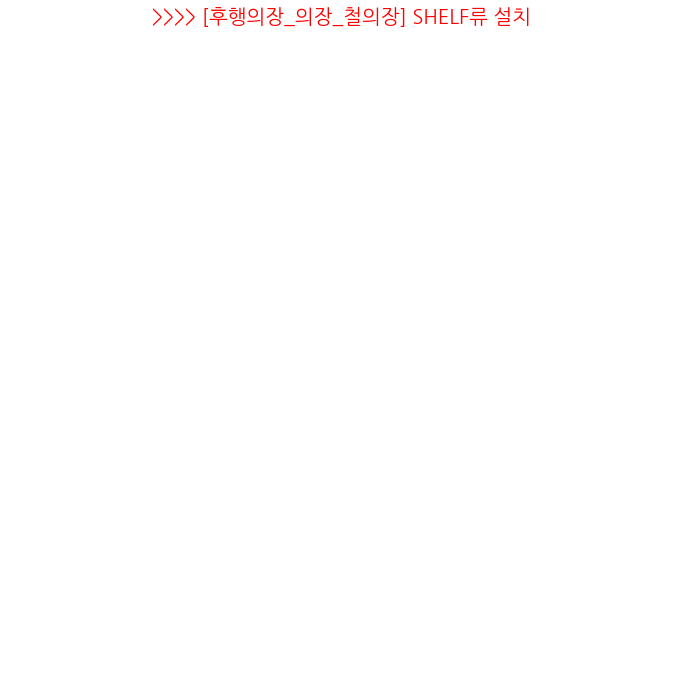

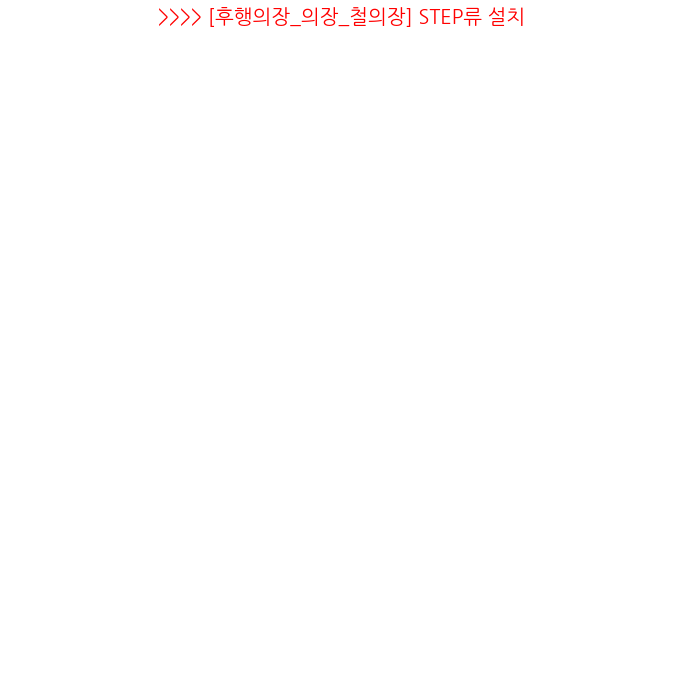

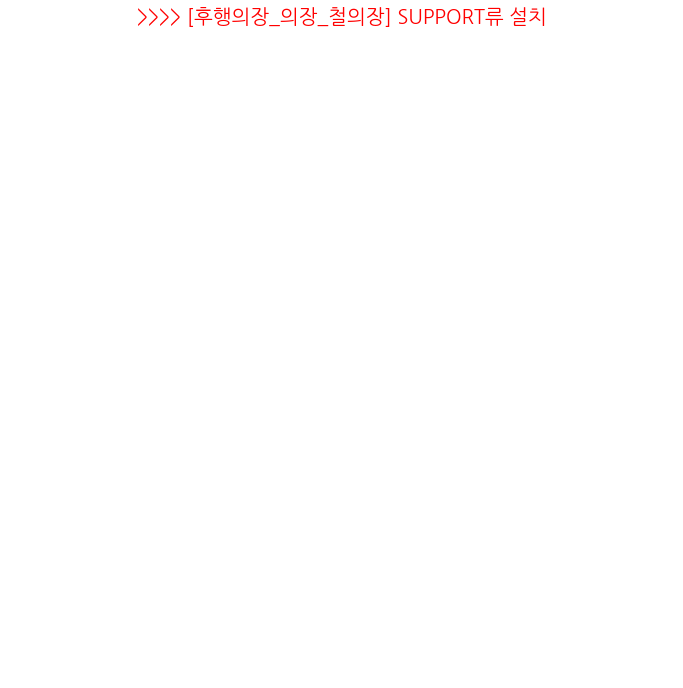

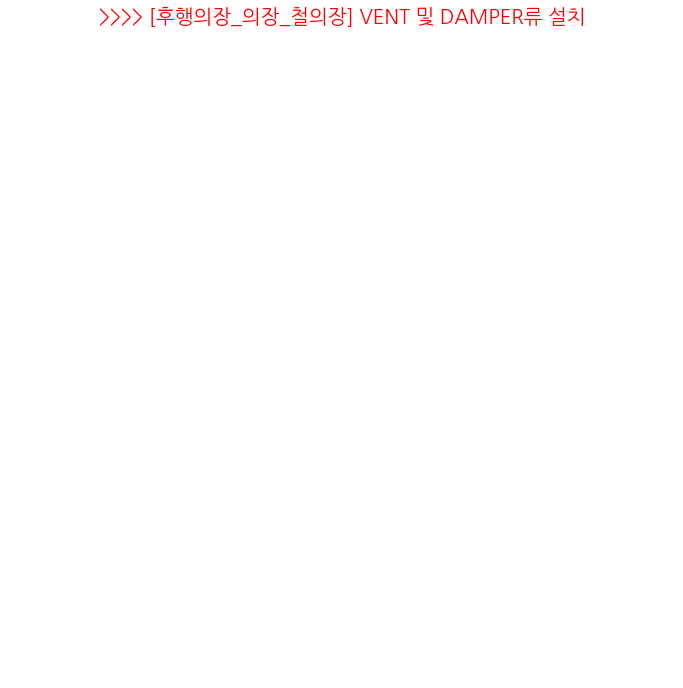

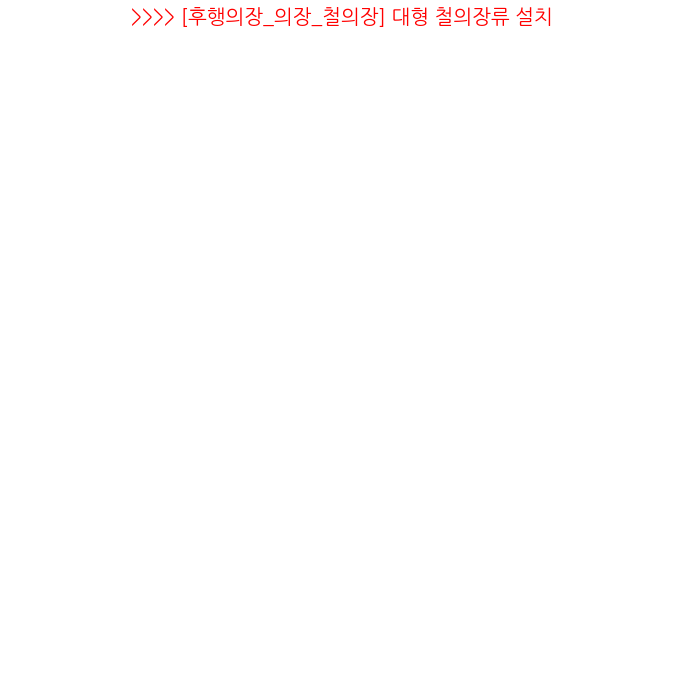

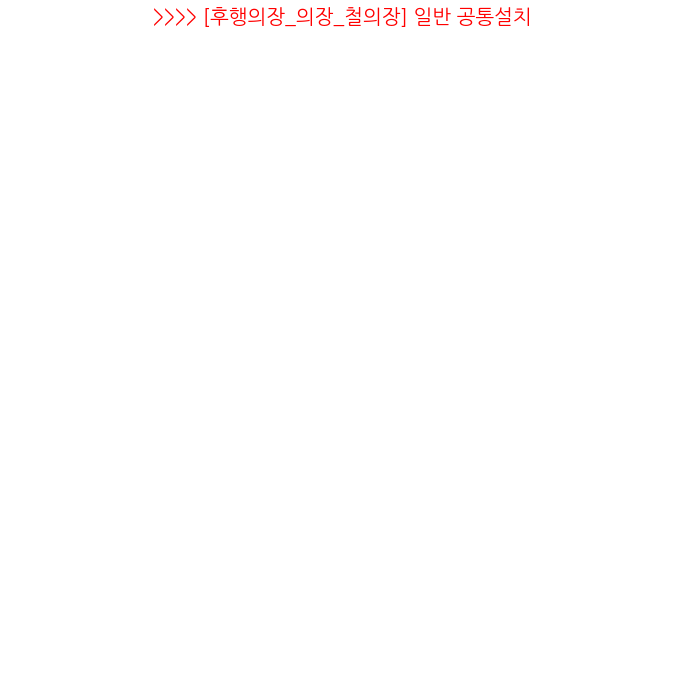

In [381]:
images = []
for n, i in enumerate(dff['작업표준']):
    basket = []
    for j in df.loc[df['작업표준'] == i, 'keyword']:
        for word in j:
            basket.append(word)
#     print(basket)

    nouns_counter = Counter(basket)
    cloud_data = dict(nouns_counter.most_common(50))
    
#     print(cloud_data)
    
    wc = WordCloud(background_color='white', font_path=fontpath)
    wc.generate_from_frequencies(cloud_data)
    figure = plt.figure(figsize=(12, 12))
    ax = figure.add_subplot(1, 1, 1)
    plt.title(">>>> {}".format(i), fontsize=20, color='red')
    ax.axis('off')
    ax.imshow(wc)
    plt.savefig('./wordcloud/{}.png'.format(n))
